In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import sys
import time
import math
import random as random
import copy
import warnings
warnings.filterwarnings('ignore')

In [2]:
acc0 = [[0.3546999990940094, 0.1973000019788742, 0.4196000099182129, 0.51419997215271, 0.11349999904632568, 0.20839999616146088, 0.25029999017715454, 0.5857999920845032, 0.30480000376701355, 0.3325999975204468, 0.20600000023841858, 0.4977000057697296, 0.3709999918937683, 0.26759999990463257, 0.5604000091552734, 0.4165000021457672, 0.5475000143051147, 0.1973000019788742, 0.5684000253677368, 0.3375999927520752, 0.38940000534057617, 0.11349999904632568, 0.35510000586509705, 0.4697999954223633, 0.4903999865055084, 0.4496000111103058, 0.6455000042915344, 0.21160000562667847, 0.5637999773025513, 0.5726000070571899], [0.6194999814033508, 0.5388000011444092, 0.1136000007390976, 0.1996999979019165, 0.4993000030517578, 0.4404999911785126, 0.34049999713897705, 0.6319000124931335, 0.3294000029563904, 0.5410000085830688, 0.36719998717308044, 0.2881999909877777, 0.5221999883651733, 0.6255999803543091, 0.5685999989509583, 0.5712000131607056, 0.4438999891281128, 0.5960000157356262, 0.20389999449253082, 0.5679000020027161, 0.5453000068664551, 0.7031999826431274, 0.27649998664855957, 0.4259999990463257, 0.20649999380111694, 0.28459998965263367, 0.5595999956130981, 0.33090001344680786, 0.11349999904632568, 0.33160001039505005], [0.20329999923706055, 0.37299999594688416, 0.2125999927520752, 0.5202000141143799, 0.31839999556541443, 0.6873999834060669, 0.478300005197525, 0.20389999449253082, 0.2125999927520752, 0.6291000247001648, 0.2070000022649765, 0.5421000123023987, 0.6172999739646912, 0.6765999794006348, 0.5511999726295471, 0.6445000171661377, 0.2712000012397766, 0.20810000598430634, 0.4909999966621399, 0.12359999865293503, 0.42340001463890076, 0.4535999894142151, 0.5918999910354614, 0.3163999915122986, 0.26570001244544983, 0.36899998784065247, 0.6392999887466431, 0.6128000020980835, 0.6412000060081482, 0.376800000667572], [0.22169999778270721, 0.4032999873161316, 0.526199996471405, 0.47859999537467957, 0.47850000858306885, 0.5562000274658203, 0.42399999499320984, 0.6484000086784363, 0.4885999858379364, 0.3580000102519989, 0.6759999990463257, 0.10100000351667404, 0.744700014591217, 0.10100000351667404, 0.6043999791145325, 0.48429998755455017, 0.18310000002384186, 0.7042999863624573, 0.5927000045776367, 0.5521000027656555, 0.3598000109195709, 0.5446000099182129, 0.7770000100135803, 0.15150000154972076, 0.521399974822998, 0.2387000024318695, 0.5385000109672546, 0.5284000039100647, 0.17520000040531158, 0.4555000066757202], [0.49219998717308044, 0.18790000677108765, 0.3686000108718872, 0.38510000705718994, 0.7336000204086304, 0.1860000044107437, 0.48969998955726624, 0.10100000351667404, 0.47519999742507935, 0.2856000065803528, 0.8009999990463257, 0.10100000351667404, 0.6162999868392944, 0.10100000351667404, 0.30000001192092896, 0.5117999911308289, 0.7573000192642212, 0.5188999772071838, 0.2957000136375427, 0.48730000853538513, 0.5640000104904175, 0.3801000118255615, 0.19349999725818634, 0.10100000351667404, 0.6317999958992004, 0.314300000667572, 0.597100019454956, 0.7408999800682068, 0.6090999841690063, 0.17409999668598175], [0.4422999918460846, 0.10970000177621841, 0.6157000064849854, 0.675599992275238, 0.30320000648498535, 0.4706000089645386, 0.7540000081062317, 0.3901999890804291, 0.5490000247955322, 0.3659999966621399, 0.34700000286102295, 0.7195000052452087, 0.7838000059127808, 0.520799994468689, 0.7627000212669373, 0.7864000201225281, 0.6274999976158142, 0.6912999749183655, 0.46619999408721924, 0.7639999985694885, 0.7646999955177307, 0.5597000122070312, 0.7763000130653381, 0.7559000253677368, 0.4724999964237213, 0.21559999883174896, 0.3515999913215637, 0.4447999894618988, 0.8044000267982483, 0.583899974822998], [0.21389999985694885, 0.7853000164031982, 0.20749999582767487, 0.7357000112533569, 0.28060001134872437, 0.5595999956130981, 0.3698999881744385, 0.8029000163078308, 0.5436000227928162, 0.3894999921321869, 0.714900016784668, 0.7896999716758728, 0.20520000159740448, 0.6438999772071838, 0.40849998593330383, 0.37929999828338623, 0.4959999918937683, 0.20069999992847443, 0.6758999824523926, 0.5529999732971191, 0.2079000025987625, 0.16949999332427979, 0.7921000123023987, 0.33709999918937683, 0.31130000948905945, 0.28850001096725464, 0.623199999332428, 0.57669997215271, 0.5623000264167786, 0.2870999872684479], [0.44020000100135803, 0.3831999897956848, 0.5649999976158142, 0.3061999976634979, 0.5888000130653381, 0.3296999931335449, 0.29019999504089355, 0.31049999594688416, 0.47130000591278076, 0.5485000014305115, 0.6988000273704529, 0.2816999852657318, 0.5611000061035156, 0.6116999983787537, 0.20579999685287476, 0.6873000264167786, 0.8181999921798706, 0.7978000044822693, 0.6208999752998352, 0.6585000157356262, 0.3109000027179718, 0.6571000218391418, 0.6473000049591064, 0.7885000109672546, 0.5196999907493591, 0.4462999999523163, 0.38659998774528503, 0.3522000014781952, 0.22609999775886536, 0.7728000283241272], [0.4957999885082245, 0.26919999718666077, 0.4702000021934509, 0.5626000165939331, 0.7864000201225281, 0.3118000030517578, 0.5896999835968018, 0.5860000252723694, 0.8234000205993652, 0.5231999754905701, 0.5680999755859375, 0.6624000072479248, 0.36010000109672546, 0.5698000192642212, 0.6344000101089478, 0.7142999768257141, 0.4779999852180481, 0.760200023651123, 0.27880001068115234, 0.5860999822616577, 0.5623999834060669, 0.29120001196861267, 0.3091000020503998, 0.7558000087738037, 0.7547000050544739, 0.805400013923645, 0.616100013256073, 0.6790000200271606, 0.722100019454956, 0.7724999785423279], [0.43380001187324524, 0.2736999988555908, 0.22910000383853912, 0.6222000122070312, 0.16539999842643738, 0.7720000147819519, 0.18979999423027039, 0.3296000063419342, 0.3296000063419342, 0.09740000218153, 0.09740000218153, 0.689300000667572, 0.8087999820709229, 0.513700008392334, 0.5618000030517578, 0.6327000260353088, 0.6373000144958496, 0.1899999976158142, 0.33559998869895935, 0.6141999959945679, 0.4763999879360199, 0.2556000053882599, 0.5692999958992004, 0.3479999899864197, 0.36880001425743103, 0.4000000059604645, 0.6316999793052673, 0.09740000218153, 0.4903999865055084, 0.72079998254776], [0.09960000216960907, 0.09870000183582306, 0.28220000863075256, 0.6983000040054321, 0.58160001039505, 0.1776999980211258, 0.7569000124931335, 0.10000000149011612, 0.09740000218153, 0.7519000172615051, 0.6437000036239624, 0.39079999923706055, 0.5220999717712402, 0.4345000088214874, 0.3165999948978424, 0.18279999494552612, 0.7864000201225281, 0.10189999639987946, 0.4812999963760376, 0.6913999915122986, 0.09870000183582306, 0.29330000281333923, 0.09749999642372131, 0.09950000047683716, 0.4075999855995178, 0.4359000027179718, 0.30300000309944153, 0.6233999729156494, 0.6966999769210815, 0.6001999974250793], [0.3294999897480011, 0.6453999876976013, 0.2709999978542328, 0.6668000221252441, 0.3409999907016754, 0.18770000338554382, 0.27469998598098755, 0.5378000140190125, 0.8213000297546387, 0.44670000672340393, 0.8027999997138977, 0.7968000173568726, 0.7111999988555908, 0.3131999969482422, 0.8223999738693237, 0.5253999829292297, 0.4415999948978424, 0.911899983882904, 0.59170001745224, 0.7026000022888184, 0.4643000066280365, 0.7441999912261963, 0.7254999876022339, 0.5393000245094299, 0.26649999618530273, 0.569100022315979, 0.8434000015258789, 0.4456999897956848, 0.8134999871253967, 0.4147000014781952], [0.4641000032424927, 0.45089998841285706, 0.10140000283718109, 0.7874000072479248, 0.5099999904632568, 0.6833999752998352, 0.12139999866485596, 0.6205000281333923, 0.7874000072479248, 0.18790000677108765, 0.6137999892234802, 0.567300021648407, 0.7702000141143799, 0.4074999988079071, 0.23280000686645508, 0.2273000031709671, 0.9034000039100647, 0.29089999198913574, 0.7893000245094299, 0.10050000250339508, 0.5368000268936157, 0.8471999764442444, 0.6949999928474426, 0.10220000147819519, 0.850600004196167, 0.7389000058174133, 0.6266000270843506, 0.5333999991416931, 0.82669997215271, 0.45669999718666077], [0.8482000231742859, 0.6068000197410583, 0.8310999870300293, 0.6186000108718872, 0.6398000121116638, 0.7106000185012817, 0.6488999724388123, 0.29910001158714294, 0.5291000008583069, 0.4636000096797943, 0.4196000099182129, 0.8476999998092651, 0.6722999811172485, 0.6191999912261963, 0.7710000276565552, 0.850600004196167, 0.4375, 0.6072999835014343, 0.47200000286102295, 0.671500027179718, 0.7968000173568726, 0.3278999924659729, 0.8101999759674072, 0.7035999894142151, 0.7688999772071838, 0.4041000008583069, 0.4595000147819519, 0.5688999891281128, 0.3547999858856201, 0.6816999912261963], [0.746999979019165, 0.7723000049591064, 0.8241000175476074, 0.5112000107765198, 0.8791000247001648, 0.7782999873161316, 0.786899983882904, 0.19689999520778656, 0.6949999928474426, 0.6330999732017517, 0.7121000289916992, 0.859000027179718, 0.8190000057220459, 0.5895000100135803, 0.6764000058174133, 0.5577999949455261, 0.5404999852180481, 0.5428000092506409, 0.8090999722480774, 0.8321999907493591, 0.5475999712944031, 0.8111000061035156, 0.569100022315979, 0.3357999920845032, 0.6668999791145325, 0.7897999882698059, 0.9072999954223633, 0.7587000131607056, 0.8001000285148621, 0.5831000208854675], [0.5726000070571899, 0.49230000376701355, 0.932699978351593, 0.8442000150680542, 0.375900000333786, 0.8604999780654907, 0.8946999907493591, 0.722100019454956, 0.8867999911308289, 0.73089998960495, 0.6784999966621399, 0.5649999976158142, 0.5138000249862671, 0.6543999910354614, 0.6942999958992004, 0.8321999907493591, 0.8650000095367432, 0.7145000100135803, 0.7311999797821045, 0.8705000281333923, 0.7657999992370605, 0.8930000066757202, 0.4918000102043152, 0.6283000111579895, 0.7166000008583069, 0.8392000198364258, 0.9065999984741211, 0.8073999881744385, 0.6984000205993652, 0.6223999857902527], [0.2240000069141388, 0.784600019454956, 0.9000999927520752, 0.6601999998092651, 0.5666999816894531, 0.5458999872207642, 0.8928999900817871, 0.45590001344680786, 0.8246999979019165, 0.858299970626831, 0.8256000280380249, 0.7764000296592712, 0.8136000037193298, 0.9121000170707703, 0.43959999084472656, 0.5752999782562256, 0.5407999753952026, 0.4018999934196472, 0.5633999705314636, 0.3100000023841858, 0.4325999915599823, 0.7904000282287598, 0.8062999844551086, 0.4341000020503998, 0.6662999987602234, 0.2736999988555908, 0.8195000290870667, 0.7032999992370605, 0.4242999851703644, 0.7900000214576721], [0.6398000121116638, 0.6191999912261963, 0.8931999802589417, 0.7791000008583069, 0.588100016117096, 0.6832000017166138, 0.4677000045776367, 0.6715999841690063, 0.38179999589920044, 0.5030999779701233, 0.7434999942779541, 0.7875000238418579, 0.3529999852180481, 0.8037999868392944, 0.8371000289916992, 0.7825999855995178, 0.8557999730110168, 0.8741000294685364, 0.7400000095367432, 0.8503999710083008, 0.5753999948501587, 0.8396999835968018, 0.8831999897956848, 0.7717000246047974, 0.7922000288963318, 0.8258000016212463, 0.7861999869346619, 0.8680999875068665, 0.7181000113487244, 0.8579000234603882], [0.7109000086784363, 0.6029000282287598, 0.8725000023841858, 0.6198999881744385, 0.7889999747276306, 0.8217999935150146, 0.8233000040054321, 0.8115000128746033, 0.7594000101089478, 0.4921000003814697, 0.7487000226974487, 0.6194000244140625, 0.6764000058174133, 0.42080000042915344, 0.7157999873161316, 0.5289000272750854, 0.8813999891281128, 0.47940000891685486, 0.5903000235557556, 0.794700026512146, 0.7434999942779541, 0.6154999732971191, 0.6064000129699707, 0.808899998664856, 0.6132000088691711, 0.7286999821662903, 0.5289000272750854, 0.4964999854564667, 0.9140999913215637, 0.7516000270843506], [0.7336999773979187, 0.5616999864578247, 0.8223999738693237, 0.8788999915122986, 0.8851000070571899, 0.8044999837875366, 0.7556999921798706, 0.7745000123977661, 0.7124000191688538, 0.8707000017166138, 0.7960000038146973, 0.8335999846458435, 0.7678999900817871, 0.8755999803543091, 0.8654999732971191, 0.8715000152587891, 0.8758000135421753, 0.6151000261306763, 0.7425000071525574, 0.618399977684021, 0.6208000183105469, 0.9129999876022339, 0.8044999837875366, 0.8080999851226807, 0.8924999833106995, 0.7405999898910522, 0.8648999929428101, 0.5494999885559082, 0.8737000226974487, 0.5985999703407288], [0.815500020980835, 0.8531000018119812, 0.9014999866485596, 0.8733999729156494, 0.7644000053405762, 0.9104999899864197, 0.849399983882904, 0.7459999918937683, 0.8522999882698059, 0.6646999716758728, 0.7799000144004822, 0.8409000039100647, 0.8511000275611877, 0.8955000042915344, 0.6710000038146973, 0.7493000030517578, 0.7994999885559082, 0.6589000225067139, 0.7562999725341797, 0.8754000067710876, 0.7985000014305115, 0.9014999866485596, 0.9053999781608582, 0.9332000017166138, 0.8450999855995178, 0.8356999754905701, 0.864799976348877, 0.8659999966621399, 0.8022000193595886, 0.857699990272522], [0.552299976348877, 0.8831999897956848, 0.5806000232696533, 0.8641999959945679, 0.5496000051498413, 0.8503000140190125, 0.8501999974250793, 0.7554000020027161, 0.7803000211715698, 0.6783999800682068, 0.7771000266075134, 0.5231000185012817, 0.5001000165939331, 0.3321000039577484, 0.4560000002384186, 0.7458000183105469, 0.7803000211715698, 0.7339000105857849, 0.7842000126838684, 0.9154999852180481, 0.7113999724388123, 0.5217999815940857, 0.7968000173568726, 0.8687000274658203, 0.5246000289916992, 0.9129999876022339, 0.7749000191688538, 0.8863999843597412, 0.708299994468689, 0.5024999976158142], [0.8325999975204468, 0.7775999903678894, 0.6952999830245972, 0.78329998254776, 0.32710000872612, 0.6463000178337097, 0.9021000266075134, 0.5551000237464905, 0.742900013923645, 0.7120000123977661, 0.7892000079154968, 0.79830002784729, 0.7386999726295471, 0.8597000241279602, 0.942300021648407, 0.7971000075340271, 0.916100025177002, 0.7684000134468079, 0.7447999715805054, 0.7432000041007996, 0.8876000046730042, 0.8704000115394592, 0.9067000150680542, 0.5989999771118164, 0.9153000116348267, 0.8420000076293945, 0.8889999985694885, 0.9447000026702881, 0.6572999954223633, 0.5723000168800354], [0.7651000022888184, 0.7208999991416931, 0.8514999747276306, 0.6837000250816345, 0.7141000032424927, 0.8978999853134155, 0.8425999879837036, 0.7993999719619751, 0.9064000248908997, 0.75, 0.9171000123023987, 0.5066999793052673, 0.800000011920929, 0.8245000243186951, 0.6287000179290771, 0.7896999716758728, 0.6887999773025513, 0.7049000263214111, 0.9126999974250793, 0.8870000243186951, 0.746999979019165, 0.9061999917030334, 0.8503000140190125, 0.9017999768257141, 0.6712999939918518, 0.9139000177383423, 0.6105999946594238, 0.4724000096321106, 0.8514999747276306, 0.5746999979019165], [0.9519000053405762, 0.5551999807357788, 0.8899000287055969, 0.5683000087738037, 0.5389000177383423, 0.7099000215530396, 0.8539000153541565, 0.8837000131607056, 0.760200023651123, 0.5008000135421753, 0.7333999872207642, 0.6582000255584717, 0.5403000116348267, 0.8093000054359436, 0.8335000276565552, 0.8284000158309937, 0.652999997138977, 0.8956999778747559, 0.8513000011444092, 0.7480999827384949, 0.8521000146865845, 0.8557000160217285, 0.6682000160217285, 0.879800021648407, 0.7249000072479248, 0.8422999978065491, 0.7006000280380249, 0.6730999946594238, 0.6025999784469604, 0.8500999808311462], [0.6773999929428101, 0.589900016784668, 0.6309999823570251, 0.883899986743927, 0.8608999848365784, 0.8671000003814697, 0.8064000010490417, 0.7759000062942505, 0.809499979019165, 0.8928999900817871, 0.6945000290870667, 0.8212000131607056, 0.9103999733924866, 0.8251000046730042, 0.7010999917984009, 0.7609999775886536, 0.7394000291824341, 0.5098000168800354, 0.5300999879837036, 0.7700999975204468, 0.32580000162124634, 0.8382999897003174, 0.742900013923645, 0.8955000042915344, 0.807200014591217, 0.809499979019165, 0.863099992275238, 0.8673999905586243, 0.745199978351593, 0.2890999913215637], [0.9185000061988831, 0.40130001306533813, 0.7893999814987183, 0.9060999751091003, 0.8016999959945679, 0.8787000179290771, 0.8949999809265137, 0.848800003528595, 0.7271999716758728, 0.8966000080108643, 0.5881999731063843, 0.6079000234603882, 0.8069999814033508, 0.546999990940094, 0.8274999856948853, 0.9139000177383423, 0.8238000273704529, 0.8068000078201294, 0.8237000107765198, 0.8955000042915344, 0.7556999921798706, 0.7494999766349792, 0.7491999864578247, 0.7652000188827515, 0.9016000032424927, 0.7811999917030334, 0.9054999947547913, 0.7347000241279602, 0.8205999732017517, 0.7095000147819519], [0.9124000072479248, 0.8894000053405762, 0.8962000012397766, 0.7527999877929688, 0.8557000160217285, 0.8526999950408936, 0.9318000078201294, 0.7117999792098999, 0.7426000237464905, 0.8284000158309937, 0.9083999991416931, 0.850600004196167, 0.854200005531311, 0.7075999975204468, 0.6638000011444092, 0.8191999793052673, 0.748199999332428, 0.8762000203132629, 0.6757000088691711, 0.7174000144004822, 0.8828999996185303, 0.8655999898910522, 0.9222999811172485, 0.9434999823570251, 0.8472999930381775, 0.6916999816894531, 0.7121999859809875, 0.7878000140190125, 0.9240000247955322, 0.7390999794006348], [0.8149999976158142, 0.9106000065803528, 0.675599992275238, 0.8446999788284302, 0.5547000169754028, 0.9246000051498413, 0.8022000193595886, 0.8763999938964844, 0.9261999726295471, 0.6721000075340271, 0.8981999754905701, 0.8064000010490417, 0.805899977684021, 0.9049000144004822, 0.7645000219345093, 0.6532999873161316, 0.9233999848365784, 0.7839999794960022, 0.6739000082015991, 0.8246999979019165, 0.9327999949455261, 0.8949999809265137, 0.6974999904632568, 0.7243000268936157, 0.7577999830245972, 0.8691999912261963, 0.8495000004768372, 0.7911999821662903, 0.7401999831199646, 0.4074999988079071], [0.8309000134468079, 0.8683000206947327, 0.7364000082015991, 0.8851000070571899, 0.6700000166893005, 0.7936000227928162, 0.5303999781608582, 0.8575000166893005, 0.8341000080108643, 0.8668000102043152, 0.9121000170707703, 0.9147999882698059, 0.5273000001907349, 0.932200014591217, 0.9154999852180481, 0.7870000004768372, 0.6830999851226807, 0.7764999866485596, 0.7493000030517578, 0.7961000204086304, 0.8974999785423279, 0.6865000128746033, 0.8723000288009644, 0.8783000111579895, 0.9110999703407288, 0.8578000068664551, 0.8876000046730042, 0.8356999754905701, 0.9193000197410583, 0.9323999881744385]]
loss0 = [[21.03575325012207, 11.844231605529785, 10.079866409301758, 10.577362060546875, 463.61883544921875, 35.405364990234375, 17.386747360229492, 7.238526344299316, 10.624030113220215, 12.812313079833984, 14.558137893676758, 4.646975994110107, 20.602615356445312, 22.940019607543945, 4.396733283996582, 11.271398544311523, 6.4689459800720215, 56.21855545043945, 4.53624153137207, 20.164587020874023, 11.59070110321045, 435.3682861328125, 5.981876373291016, 11.830798149108887, 5.8398823738098145, 12.024198532104492, 4.004300117492676, 84.33924865722656, 6.198697090148926, 6.399407863616943], [1.8213839530944824, 6.440091133117676, 11.07569694519043, 9.18691349029541, 6.2496843338012695, 6.78186559677124, 11.930998802185059, 3.2730138301849365, 11.927846908569336, 6.663631439208984, 19.707195281982422, 22.565593719482422, 5.532083511352539, 2.753431558609009, 5.697573661804199, 9.21041202545166, 9.132028579711914, 3.612508535385132, 20.867015838623047, 3.2781386375427246, 8.765512466430664, 1.4752297401428223, 17.654006958007812, 9.672253608703613, 33.39249038696289, 15.672590255737305, 3.747249126434326, 11.475289344787598, 92.09251403808594, 11.287338256835938], [9.457974433898926, 13.310196876525879, 10.040849685668945, 7.267632961273193, 4.139617443084717, 2.208906412124634, 7.304686069488525, 14.971508979797363, 7.30567741394043, 4.053611755371094, 18.025556564331055, 6.8596720695495605, 5.32932186126709, 4.112123012542725, 4.228928089141846, 3.868501663208008, 5.83396577835083, 7.707551002502441, 9.94982624053955, 14.0224027633667, 9.172715187072754, 12.292304992675781, 6.758326530456543, 11.89401912689209, 59.822025299072266, 2.9855732917785645, 4.2106218338012695, 3.5565733909606934, 3.110015392303467, 13.872659683227539], [5.317972660064697, 10.061952590942383, 5.8097333908081055, 7.346164226531982, 4.89440393447876, 3.7308504581451416, 5.408401966094971, 3.6535003185272217, 5.993523120880127, 9.575142860412598, 3.280524492263794, 23.316129684448242, 2.69221568107605, 28.929075241088867, 3.4464824199676514, 7.939390659332275, 9.172480583190918, 2.405374526977539, 6.980775833129883, 4.3389177322387695, 4.974095821380615, 4.763189315795898, 1.641082763671875, 8.988483428955078, 5.063792705535889, 8.849934577941895, 5.6073079109191895, 7.0312180519104, 23.71822166442871, 7.3353376388549805], [2.8907699584960938, 7.284739017486572, 5.020003318786621, 5.761577129364014, 1.4404964447021484, 10.3803129196167, 5.895236015319824, 57.526580810546875, 3.339059829711914, 4.721183776855469, 0.8050854802131653, 44.07196807861328, 3.9330241680145264, 35.44915771484375, 7.364802360534668, 4.128483772277832, 1.8918851613998413, 3.314044237136841, 8.765640258789062, 4.082438945770264, 5.730876922607422, 4.784684181213379, 10.290430068969727, 32.71278381347656, 2.03885555267334, 5.244289398193359, 3.562631368637085, 2.1925392150878906, 2.5564937591552734, 12.624868392944336], [4.790651798248291, 49.14254379272461, 3.6596899032592773, 2.0326554775238037, 10.664972305297852, 4.482161998748779, 1.2526081800460815, 6.0730204582214355, 2.6330220699310303, 6.64788293838501, 5.398118019104004, 1.825363039970398, 1.3694096803665161, 4.183445453643799, 1.4349446296691895, 1.307959794998169, 3.24686861038208, 2.1708505153656006, 5.28769588470459, 1.537121057510376, 1.326361894607544, 3.252814531326294, 1.8634861707687378, 1.9716118574142456, 5.535693645477295, 5.550451278686523, 4.854933738708496, 5.539676189422607, 1.1538028717041016, 2.4646520614624023], [8.845057487487793, 1.327427864074707, 6.752418041229248, 1.8235105276107788, 13.747978210449219, 2.3266334533691406, 5.641077518463135, 0.8269873261451721, 1.9970232248306274, 4.527055740356445, 2.1734063625335693, 1.0167052745819092, 11.135457038879395, 2.656351089477539, 3.757154703140259, 4.290089130401611, 2.1961207389831543, 3.8831534385681152, 2.1592533588409424, 2.599738121032715, 9.210209846496582, 18.79679298400879, 1.1180912256240845, 4.412001609802246, 12.268013954162598, 6.938879489898682, 1.6974565982818604, 2.2393572330474854, 3.0408153533935547, 8.254049301147461], [4.670655250549316, 3.4385311603546143, 3.7704639434814453, 5.235341548919678, 2.8807573318481445, 5.4129157066345215, 6.6741766929626465, 12.561992645263672, 4.033635139465332, 5.185357570648193, 1.9189679622650146, 17.102664947509766, 4.468184947967529, 3.435262441635132, 6.68171501159668, 2.6940689086914062, 1.2086185216903687, 1.6674580574035645, 2.056713819503784, 2.0350587368011475, 7.060238838195801, 2.1036174297332764, 1.8675072193145752, 1.7194894552230835, 3.0433897972106934, 3.200103521347046, 2.764355421066284, 8.731719017028809, 12.738880157470703, 1.502921223640442], [4.141115188598633, 9.225674629211426, 3.6807546615600586, 5.588660717010498, 1.4929955005645752, 4.754749298095703, 2.736739158630371, 3.838580369949341, 0.6524524688720703, 2.461165189743042, 5.525392532348633, 3.5171542167663574, 5.3812947273254395, 2.4189937114715576, 3.2286489009857178, 1.810545563697815, 4.055757999420166, 1.2330127954483032, 10.029927253723145, 3.949545383453369, 1.9722105264663696, 10.63882064819336, 9.913711547851562, 2.0421524047851562, 1.3043217658996582, 0.7811799645423889, 2.3755784034729004, 2.8051533699035645, 1.4884871244430542, 1.2925810813903809], [3.879485845565796, 8.768975257873535, 7.7486572265625, 3.5581398010253906, 9.166242599487305, 1.5153844356536865, 8.58255672454834, 4.901247501373291, 5.785384654998779, 21.266408920288086, 24.650127410888672, 1.5208889245986938, 0.8416648507118225, 3.793233871459961, 4.192237854003906, 2.0917344093322754, 3.281048536300659, 12.098457336425781, 7.040887355804443, 2.1427929401397705, 4.224878787994385, 5.626460075378418, 2.5244545936584473, 4.481856822967529, 5.033829689025879, 4.208195686340332, 2.376688241958618, 20.528873443603516, 2.2969367504119873, 2.2352054119110107], [41.76740646362305, 36.96199417114258, 7.21967887878418, 1.6944960355758667, 3.229461431503296, 21.284555435180664, 1.3720099925994873, 41.64057540893555, 54.622337341308594, 1.7864925861358643, 2.6075384616851807, 5.946213245391846, 5.270909309387207, 7.20870304107666, 6.716026782989502, 10.257174491882324, 1.1269620656967163, 39.79173278808594, 4.755856513977051, 1.7844011783599854, 51.1688232421875, 12.468148231506348, 50.21570587158203, 38.16614532470703, 5.654736518859863, 4.423666000366211, 10.237285614013672, 5.169098377227783, 2.2428550720214844, 4.511052131652832], [4.85548210144043, 2.2325172424316406, 5.401583671569824, 1.7826815843582153, 9.432238578796387, 21.337398529052734, 7.2278547286987305, 2.892498254776001, 1.047989845275879, 4.561853408813477, 1.2770932912826538, 0.8943923115730286, 1.3900041580200195, 6.02326774597168, 0.9640623927116394, 2.255401611328125, 3.871861696243286, 0.38182780146598816, 2.2145349979400635, 1.5556509494781494, 3.3991339206695557, 1.3279961347579956, 1.6140722036361694, 3.4802234172821045, 11.224472999572754, 4.806987762451172, 0.6931930780410767, 4.16086483001709, 0.7562304139137268, 4.878136157989502], [4.860610008239746, 5.040081024169922, 14.331761360168457, 1.253498911857605, 4.946305274963379, 2.433804512023926, 10.586952209472656, 2.1722798347473145, 1.1955182552337646, 13.775933265686035, 2.9465537071228027, 3.0267601013183594, 1.845715045928955, 3.2485175132751465, 5.621643543243408, 11.274263381958008, 0.5904935598373413, 5.454293727874756, 1.0333991050720215, 10.332667350769043, 3.0515084266662598, 0.6486115455627441, 1.7212629318237305, 15.837050437927246, 0.8890721797943115, 1.3281641006469727, 2.9590015411376953, 5.030689239501953, 0.6524353623390198, 3.925306558609009], [0.8528843522071838, 4.055384635925293, 0.6136554479598999, 4.611876010894775, 1.3615838289260864, 1.9990111589431763, 2.1047263145446777, 9.340105056762695, 4.281912326812744, 7.991795539855957, 5.983050346374512, 0.7501301169395447, 1.6978646516799927, 1.804598093032837, 1.5685523748397827, 0.6359355449676514, 4.824167728424072, 3.712799549102783, 5.782628536224365, 2.73962140083313, 0.828501284122467, 7.345174789428711, 1.5098956823349, 1.8382320404052734, 1.414224624633789, 5.704990386962891, 5.508819580078125, 2.0013670921325684, 6.935396194458008, 2.2732465267181396], [2.5530505180358887, 1.842649221420288, 0.9503262639045715, 5.958806991577148, 0.5459694266319275, 1.4538427591323853, 2.132913112640381, 15.75661563873291, 1.7953569889068604, 2.1148128509521484, 1.5843085050582886, 0.6388127207756042, 1.1465529203414917, 2.1193249225616455, 1.7718552350997925, 4.028788089752197, 3.683133125305176, 2.6839206218719482, 1.4140335321426392, 0.7097591757774353, 8.163679122924805, 1.1033411026000977, 5.717493057250977, 12.60030460357666, 2.0153796672821045, 0.888286828994751, 0.4242037236690521, 1.412746548652649, 0.7225599884986877, 4.0500006675720215], [2.0909409523010254, 3.9106836318969727, 0.25968804955482483, 0.6767817735671997, 4.580338001251221, 0.6359525322914124, 0.5652254223823547, 1.33583402633667, 0.5463512539863586, 1.0209672451019287, 1.4156947135925293, 3.472470760345459, 4.329906463623047, 1.8436486721038818, 2.2900514602661133, 0.7615909576416016, 0.7890447378158569, 1.4452905654907227, 2.0162100791931152, 0.7478973865509033, 1.3782366514205933, 0.4288707375526428, 3.4795141220092773, 1.8079193830490112, 1.8268948793411255, 0.7732741832733154, 0.36317604780197144, 1.061215877532959, 1.3498456478118896, 1.7972723245620728], [9.757627487182617, 1.7671480178833008, 0.4962337911128998, 2.064333915710449, 3.559478521347046, 3.9615707397460938, 0.43620967864990234, 9.265035629272461, 0.7720881700515747, 0.5916182994842529, 0.8370534181594849, 1.5269570350646973, 1.0237765312194824, 0.3080269396305084, 12.206050872802734, 3.051172971725464, 3.747791051864624, 12.417844772338867, 6.249409198760986, 17.74475860595703, 2.8577890396118164, 1.1778465509414673, 1.7330156564712524, 3.166663408279419, 1.4608632326126099, 17.339614868164062, 0.9884476661682129, 1.6777487993240356, 7.858554840087891, 1.3074126243591309], [2.6031301021575928, 5.7682671546936035, 0.5515465140342712, 0.997295618057251, 5.052196979522705, 3.9242918491363525, 7.330074787139893, 2.0464789867401123, 5.629490375518799, 5.525607585906982, 2.7974605560302734, 0.8027395009994507, 12.400918006896973, 0.9562803506851196, 0.869239330291748, 0.8960750102996826, 0.7000043392181396, 0.42378339171409607, 1.4312033653259277, 0.5948849320411682, 2.484553098678589, 0.683285653591156, 0.4998294413089752, 1.14583420753479, 0.9898618459701538, 0.9704144597053528, 1.0408599376678467, 0.5964874625205994, 1.6746187210083008, 0.6092497110366821], [1.8703882694244385, 2.6672117710113525, 0.4764397442340851, 2.52286434173584, 1.0397400856018066, 0.7733808159828186, 0.8722829222679138, 0.8869813680648804, 1.1572641134262085, 5.942800045013428, 1.1481250524520874, 4.7201080322265625, 2.0027475357055664, 7.003698348999023, 3.392178535461426, 5.740705966949463, 0.6867786645889282, 4.138115406036377, 3.3458807468414307, 1.108715295791626, 1.6325669288635254, 2.461474895477295, 3.0731446743011475, 1.056634545326233, 2.8279659748077393, 1.8019607067108154, 3.1386866569519043, 5.882366180419922, 0.3565770387649536, 1.7769843339920044], [1.0339857339859009, 4.726212024688721, 0.9890814423561096, 0.6342836022377014, 0.5932035446166992, 1.0441397428512573, 1.7597845792770386, 1.4543489217758179, 1.9058748483657837, 0.6066031455993652, 1.2317705154418945, 0.8202008008956909, 1.5706977844238281, 0.6850359439849854, 0.5241544246673584, 0.5498282313346863, 0.6320434808731079, 2.722921371459961, 1.255129337310791, 3.91105580329895, 2.715303421020508, 0.37069404125213623, 1.2103506326675415, 0.7756195068359375, 0.4576716423034668, 1.2013368606567383, 0.6361141204833984, 6.8141045570373535, 0.617806077003479, 5.262422561645508], [0.8537675738334656, 0.6097307801246643, 0.6232749223709106, 0.7746357917785645, 1.339216947555542, 0.5310953855514526, 0.5054813027381897, 1.921386957168579, 0.9069490432739258, 4.229084491729736, 2.3639888763427734, 0.6995836496353149, 0.827017068862915, 0.43626314401626587, 3.1565659046173096, 1.966649055480957, 1.222980260848999, 2.8884644508361816, 1.1028395891189575, 0.9404977560043335, 1.2447645664215088, 0.4499605894088745, 0.5106988549232483, 0.31962403655052185, 0.8407430648803711, 0.7035973072052002, 0.6407645344734192, 0.9570232629776001, 1.5924738645553589, 0.7608529329299927], [3.0095629692077637, 0.40255045890808105, 2.717794179916382, 0.7447227835655212, 6.389461994171143, 0.5679066181182861, 0.6210117936134338, 2.6413111686706543, 1.1088494062423706, 1.2269927263259888, 1.7981685400009155, 5.36735725402832, 5.760374069213867, 8.842384338378906, 9.597491264343262, 1.3540153503417969, 1.107390284538269, 1.3262699842453003, 1.2720885276794434, 0.34508371353149414, 1.3142296075820923, 4.0247111320495605, 1.4060585498809814, 0.5132338404655457, 5.607064247131348, 0.3344147801399231, 1.1540610790252686, 0.7314490675926208, 2.985539674758911, 2.586184501647949], [0.9958058595657349, 1.0679129362106323, 3.444344997406006, 1.8353091478347778, 10.796989440917969, 3.6366522312164307, 0.4621756970882416, 3.948369026184082, 1.0611358880996704, 1.2859303951263428, 1.226799488067627, 2.087556838989258, 1.8109781742095947, 0.5961863398551941, 0.284002423286438, 1.1723740100860596, 0.3826502561569214, 1.9386457204818726, 2.9047672748565674, 0.8509888648986816, 0.5322574973106384, 0.5350276231765747, 0.43938618898391724, 2.8478500843048096, 0.4631611704826355, 0.7712719440460205, 0.43999403715133667, 0.2362208515405655, 2.2856056690216064, 4.724238872528076], [1.4563994407653809, 2.243980884552002, 0.734422504901886, 1.8553457260131836, 2.1114723682403564, 0.5035943388938904, 0.7301523685455322, 0.9068313241004944, 0.47338253259658813, 1.4406960010528564, 0.36255207657814026, 5.429512023925781, 1.066567301750183, 1.1475999355316162, 4.849183559417725, 3.436472177505493, 2.231903314590454, 2.2188751697540283, 0.4740504026412964, 0.804702639579773, 2.0963165760040283, 0.4115721583366394, 1.1614432334899902, 0.4637153744697571, 3.1654913425445557, 0.4405195713043213, 7.335725784301758, 12.909518241882324, 0.6797179579734802, 3.9419684410095215], [0.17830796539783478, 4.751240253448486, 0.39826035499572754, 1.835981011390686, 4.530932426452637, 2.8446030616760254, 0.767769992351532, 0.4342937469482422, 0.9707959890365601, 4.74586296081543, 0.9586212038993835, 2.1993932723999023, 4.417958736419678, 0.7252352237701416, 0.8291581273078918, 0.6703459024429321, 3.3632969856262207, 0.3829130232334137, 0.5937193036079407, 2.459132671356201, 0.734915554523468, 0.9255048632621765, 2.667603015899658, 0.4734616279602051, 2.01495361328125, 0.8216817378997803, 3.0223708152770996, 2.4659674167633057, 6.7076945304870605, 0.7726022601127625], [4.039439678192139, 3.6403417587280273, 4.270763397216797, 0.7146216034889221, 0.7387583255767822, 0.7264620661735535, 0.9380007982254028, 0.9808863401412964, 1.728281021118164, 0.6584855318069458, 2.2015926837921143, 0.7012376189231873, 0.4895707964897156, 0.7384498715400696, 2.816740036010742, 0.8656430840492249, 2.57193922996521, 3.2524824142456055, 6.297839641571045, 1.4771881103515625, 10.919367790222168, 0.9823148250579834, 1.8562262058258057, 0.4237937927246094, 0.797105610370636, 0.8606061339378357, 0.7309518456459045, 0.7227738499641418, 2.286121368408203, 15.01235294342041], [0.44897711277008057, 11.848649024963379, 1.6755869388580322, 0.5681641101837158, 1.3147438764572144, 0.7080146074295044, 0.5523459315299988, 0.599242627620697, 2.183795690536499, 0.38265642523765564, 3.413869619369507, 3.9121339321136475, 0.7842885851860046, 8.833932876586914, 1.0249948501586914, 0.3326347768306732, 0.9288071393966675, 1.0323686599731445, 1.1201987266540527, 0.5232557058334351, 1.9471032619476318, 2.8547232151031494, 1.680666446685791, 1.3941868543624878, 0.4250418543815613, 1.192236304283142, 0.46435990929603577, 1.9656649827957153, 0.7213636040687561, 1.827574372291565], [0.4755776822566986, 0.6220263838768005, 0.4105779230594635, 1.616172194480896, 0.8326309323310852, 0.7424229979515076, 0.4119137227535248, 1.1880134344100952, 1.8358744382858276, 0.7786681056022644, 0.3087589740753174, 0.6747010946273804, 1.0467513799667358, 2.335170030593872, 3.6810781955718994, 0.9527826309204102, 2.5144708156585693, 0.5601539015769958, 2.3603157997131348, 1.5293867588043213, 0.6631173491477966, 0.747775673866272, 0.31824958324432373, 0.22701330482959747, 1.033628225326538, 1.7352423667907715, 2.62064790725708, 1.355461835861206, 0.27083441615104675, 2.5698513984680176], [1.5707792043685913, 0.3733982741832733, 3.2081146240234375, 0.7873362898826599, 6.828604698181152, 0.3760862946510315, 0.8873697519302368, 0.48869505524635315, 0.33247098326683044, 2.468007802963257, 0.5914356112480164, 0.8439418077468872, 0.9383586645126343, 0.44603094458580017, 1.3206300735473633, 6.412104606628418, 0.32271334528923035, 1.629743218421936, 5.213860034942627, 1.2511361837387085, 0.314151793718338, 0.5057560801506042, 2.3868353366851807, 3.711667537689209, 1.095199465751648, 0.5701485276222229, 0.7374104261398315, 0.9778199195861816, 1.266697645187378, 11.29171371459961], [1.0077811479568481, 0.5212592482566833, 1.4928234815597534, 0.42186933755874634, 4.2294793128967285, 1.192683219909668, 5.025967597961426, 0.969648540019989, 1.212233543395996, 0.7637935280799866, 0.5850968956947327, 0.3491942882537842, 6.048189163208008, 0.41635966300964355, 0.5878497362136841, 1.4731531143188477, 3.5797441005706787, 1.5117303133010864, 2.667524576187134, 1.4428168535232544, 0.4866337776184082, 1.5121148824691772, 0.998842179775238, 0.9452779293060303, 0.4144456088542938, 1.106849193572998, 1.1299175024032593, 0.9914145469665527, 0.42803841829299927, 0.3890793025493622]] 

acc1 = [[0.5708000063896179, 0.6417999863624573, 0.37290000915527344, 0.5825999975204468, 0.3154999911785126, 0.43220001459121704, 0.42239999771118164, 0.5679000020027161, 0.09799999743700027, 0.09799999743700027, 0.438400000333786, 0.09799999743700027, 0.522599995136261, 0.6603999733924866, 0.4794999957084656, 0.5802000164985657, 0.586899995803833, 0.09799999743700027, 0.45089998841285706, 0.578000009059906, 0.3165000081062317, 0.3603000044822693, 0.17059999704360962, 0.3100000023841858, 0.5062000155448914, 0.25699999928474426, 0.25619998574256897, 0.44190001487731934, 0.3425000011920929, 0.4481000006198883], [0.41659998893737793, 0.6797000169754028, 0.09799999743700027, 0.1670999974012375, 0.4593000113964081, 0.4424999952316284, 0.44920000433921814, 0.3425000011920929, 0.09799999743700027, 0.29679998755455017, 0.1923000067472458, 0.36640000343322754, 0.09799999743700027, 0.2955000102519989, 0.4244999885559082, 0.6850000023841858, 0.5677000284194946, 0.5044999718666077, 0.33180001378059387, 0.2816999852657318, 0.6481000185012817, 0.35569998621940613, 0.275299996137619, 0.6467999815940857, 0.6819000244140625, 0.2752000093460083, 0.3287999927997589, 0.15520000457763672, 0.09799999743700027, 0.6669999957084656], [0.49720001220703125, 0.09799999743700027, 0.5192999839782715, 0.5077000260353088, 0.5997999906539917, 0.5748000144958496, 0.2752000093460083, 0.41130000352859497, 0.09799999743700027, 0.5461000204086304, 0.21080000698566437, 0.4634000062942505, 0.2689000070095062, 0.48350000381469727, 0.46149998903274536, 0.37610000371932983, 0.3375999927520752, 0.567300021648407, 0.18639999628067017, 0.1899999976158142, 0.3682999908924103, 0.3294999897480011, 0.2393999993801117, 0.6089000105857849, 0.4221999943256378, 0.5939000248908997, 0.6204000115394592, 0.6812999844551086, 0.36980000138282776, 0.7224000096321106], [0.6686999797821045, 0.16030000150203705, 0.42010000348091125, 0.5224000215530396, 0.08919999748468399, 0.47209998965263367, 0.2362000048160553, 0.6064000129699707, 0.595300018787384, 0.6682999730110168, 0.08919999748468399, 0.35679998993873596, 0.5112000107765198, 0.4458000063896179, 0.14010000228881836, 0.48809999227523804, 0.2833999991416931, 0.5910000205039978, 0.25529998540878296, 0.4180000126361847, 0.7300000190734863, 0.3540000021457672, 0.4805999994277954, 0.3452000021934509, 0.47209998965263367, 0.678600013256073, 0.5016000270843506, 0.5870000123977661, 0.6772000193595886, 0.08919999748468399], [0.6050999760627747, 0.5361999869346619, 0.5270000100135803, 0.2632000148296356, 0.526199996471405, 0.3781000077724457, 0.7592999935150146, 0.2775000035762787, 0.25589999556541443, 0.7103999853134155, 0.08919999748468399, 0.5920000076293945, 0.459199994802475, 0.5843999981880188, 0.6086000204086304, 0.2745000123977661, 0.46059998869895935, 0.5920000076293945, 0.630299985408783, 0.5521000027656555, 0.08919999748468399, 0.27810001373291016, 0.6144999861717224, 0.6984000205993652, 0.19939999282360077, 0.7723000049591064, 0.5378000140190125, 0.7946000099182129, 0.703000009059906, 0.6791999936103821], [0.33329999446868896, 0.5569999814033508, 0.08919999748468399, 0.6960999965667725, 0.4641000032424927, 0.6990000009536743, 0.4366999864578247, 0.6888999938964844, 0.5946999788284302, 0.7163000106811523, 0.761900007724762, 0.2522999942302704, 0.6376000046730042, 0.6980999708175659, 0.2964000105857849, 0.5857999920845032, 0.7957000136375427, 0.35910001397132874, 0.6819000244140625, 0.08919999748468399, 0.44690001010894775, 0.33889999985694885, 0.44940000772476196, 0.35190001130104065, 0.08919999748468399, 0.29490000009536743, 0.6935999989509583, 0.08919999748468399, 0.7828999757766724, 0.34700000286102295], [0.2554999887943268, 0.8080000281333923, 0.459199994802475, 0.1670999974012375, 0.2847999930381775, 0.6276999711990356, 0.6086999773979187, 0.3370000123977661, 0.17910000681877136, 0.779699981212616, 0.38119998574256897, 0.6240000128746033, 0.28290000557899475, 0.2623000144958496, 0.7741000056266785, 0.35749998688697815, 0.46700000762939453, 0.6694999933242798, 0.45660001039505005, 0.5342000126838684, 0.1842000037431717, 0.7081999778747559, 0.7099000215530396, 0.09740000218153, 0.1923000067472458, 0.612500011920929, 0.3353999853134155, 0.7494000196456909, 0.09740000218153, 0.770799994468689], [0.3790000081062317, 0.1949000060558319, 0.6585000157356262, 0.7390000224113464, 0.803600013256073, 0.6435999870300293, 0.4361000061035156, 0.181099995970726, 0.5946999788284302, 0.4242999851703644, 0.8529999852180481, 0.6273000240325928, 0.16089999675750732, 0.36579999327659607, 0.2630000114440918, 0.5929999947547913, 0.7767999768257141, 0.2363000065088272, 0.7986999750137329, 0.6428999900817871, 0.513700008392334, 0.36070001125335693, 0.7202000021934509, 0.20160000026226044, 0.09740000218153, 0.6751999855041504, 0.4693000018596649, 0.28780001401901245, 0.7024000287055969, 0.8057000041007996], [0.7488999962806702, 0.3391000032424927, 0.6502000093460083, 0.5884000062942505, 0.5777000188827515, 0.8353999853134155, 0.75, 0.426800012588501, 0.36169999837875366, 0.7414000034332275, 0.39340001344680786, 0.6590999960899353, 0.3671000003814697, 0.6414999961853027, 0.7049999833106995, 0.7886999845504761, 0.8654000163078308, 0.09740000218153, 0.2842000126838684, 0.39570000767707825, 0.6862999796867371, 0.7031000256538391, 0.7419000267982483, 0.3122999966144562, 0.8174999952316284, 0.10159999877214432, 0.15150000154972076, 0.39010000228881836, 0.20419999957084656, 0.5497000217437744], [0.350600004196167, 0.3407000005245209, 0.7059000134468079, 0.5600000023841858, 0.7705000042915344, 0.8317999839782715, 0.8007000088691711, 0.6901999711990356, 0.8845000267028809, 0.7505000233650208, 0.16120000183582306, 0.5737000107765198, 0.6725999712944031, 0.299699991941452, 0.38909998536109924, 0.7764999866485596, 0.10100000351667404, 0.8353000283241272, 0.5810999870300293, 0.25999999046325684, 0.7587000131607056, 0.7552000284194946, 0.661300003528595, 0.30070000886917114, 0.19480000436306, 0.5723999738693237, 0.8032000064849854, 0.6779999732971191, 0.7588000297546387, 0.4056999981403351], [0.19460000097751617, 0.7807000279426575, 0.24130000174045563, 0.6680999994277954, 0.10109999775886536, 0.5924999713897705, 0.8007000088691711, 0.373199999332428, 0.8597000241279602, 0.6740999817848206, 0.6263999938964844, 0.3450999855995178, 0.5414999723434448, 0.4542999863624573, 0.39809998869895935, 0.43369999527931213, 0.20999999344348907, 0.802299976348877, 0.23960000276565552, 0.10100000351667404, 0.8654999732971191, 0.614300012588501, 0.3610000014305115, 0.6219000220298767, 0.32339999079704285, 0.45739999413490295, 0.41269999742507935, 0.3100999891757965, 0.48989999294281006, 0.39419999718666077], [0.5497000217437744, 0.32019999623298645, 0.6276000142097473, 0.6596999764442444, 0.548799991607666, 0.44110000133514404, 0.38510000705718994, 0.8277999758720398, 0.8030999898910522, 0.38119998574256897, 0.40610000491142273, 0.49230000376701355, 0.48840001225471497, 0.4244999885559082, 0.4189999997615814, 0.2678000032901764, 0.7024999856948853, 0.5099999904632568, 0.31779998540878296, 0.14710000157356262, 0.8075000047683716, 0.6312999725341797, 0.2736000120639801, 0.5690000057220459, 0.4927000105381012, 0.42500001192092896, 0.725600004196167, 0.3411000072956085, 0.9235000014305115, 0.9002000093460083], [0.7754999995231628, 0.8188999891281128, 0.43050000071525574, 0.6887000203132629, 0.6463000178337097, 0.5102999806404114, 0.5288000106811523, 0.30169999599456787, 0.1655000001192093, 0.43869999051094055, 0.26809999346733093, 0.2985000014305115, 0.4909999966621399, 0.7383999824523926, 0.8098000288009644, 0.2700999975204468, 0.8371000289916992, 0.7268999814987183, 0.3192000091075897, 0.7366999983787537, 0.8482999801635742, 0.6470000147819519, 0.3181000053882599, 0.149399995803833, 0.10570000112056732, 0.5722000002861023, 0.13050000369548798, 0.666100025177002, 0.8518999814987183, 0.8457000255584717], [0.4943999946117401, 0.20810000598430634, 0.6186000108718872, 0.696399986743927, 0.23720000684261322, 0.7914999723434448, 0.6730999946594238, 0.3984000086784363, 0.7459999918937683, 0.3402999937534332, 0.47269999980926514, 0.5982000231742859, 0.659500002861023, 0.46860000491142273, 0.5044999718666077, 0.8030999898910522, 0.8544999957084656, 0.620199978351593, 0.3928000032901764, 0.7991999983787537, 0.7251999974250793, 0.24279999732971191, 0.3707999885082245, 0.5867000222206116, 0.7318000197410583, 0.24699999392032623, 0.6991000175476074, 0.18889999389648438, 0.6380000114440918, 0.2734000086784363], [0.5544999837875366, 0.49939998984336853, 0.6381999850273132, 0.5824999809265137, 0.45660001039505005, 0.22200000286102295, 0.4927000105381012, 0.8734999895095825, 0.53329998254776, 0.24240000545978546, 0.6758000254631042, 0.7261000275611877, 0.40560001134872437, 0.5309000015258789, 0.5625, 0.5284000039100647, 0.6489999890327454, 0.7900999784469604, 0.8945000171661377, 0.47450000047683716, 0.525600016117096, 0.23520000278949738, 0.7857999801635742, 0.6169999837875366, 0.8219000101089478, 0.7498000264167786, 0.850600004196167, 0.8755000233650208, 0.8948000073432922, 0.9072999954223633], [0.5095000267028809, 0.09749999642372131, 0.7752000093460083, 0.36039999127388, 0.7425000071525574, 0.5388000011444092, 0.7685999870300293, 0.669700026512146, 0.7574999928474426, 0.09799999743700027, 0.59170001745224, 0.3280999958515167, 0.5674999952316284, 0.779699981212616, 0.8313000202178955, 0.09749999642372131, 0.23980000615119934, 0.5699999928474426, 0.7896000146865845, 0.8996999859809875, 0.10899999737739563, 0.8299000263214111, 0.36739999055862427, 0.19439999759197235, 0.6603000164031982, 0.09740000218153, 0.4325999915599823, 0.6323999762535095, 0.5027999877929688, 0.7685999870300293], [0.39809998869895935, 0.3813999891281128, 0.7081000208854675, 0.4377000033855438, 0.8284000158309937, 0.7681999802589417, 0.8377000093460083, 0.8479999899864197, 0.6388000249862671, 0.7407000064849854, 0.3483999967575073, 0.7591999769210815, 0.6754000186920166, 0.8011000156402588, 0.771399974822998, 0.5080999732017517, 0.511900007724762, 0.7912999987602234, 0.8952999711036682, 0.4794999957084656, 0.8820000290870667, 0.34529998898506165, 0.8075000047683716, 0.5845000147819519, 0.828000009059906, 0.6129999756813049, 0.6535999774932861, 0.19619999825954437, 0.8493000268936157, 0.36000001430511475], [0.644599974155426, 0.5472999811172485, 0.8299000263214111, 0.6807000041007996, 0.7035999894142151, 0.1826999932527542, 0.90829998254776, 0.7986000180244446, 0.6960999965667725, 0.7721999883651733, 0.40639999508857727, 0.6273999810218811, 0.849399983882904, 0.664900004863739, 0.729200005531311, 0.7694000005722046, 0.10320000350475311, 0.11590000241994858, 0.7124000191688538, 0.9106000065803528, 0.4747999906539917, 0.3346000015735626, 0.694599986076355, 0.8317999839782715, 0.7053999900817871, 0.885699987411499, 0.10209999978542328, 0.6834999918937683, 0.3018999993801117, 0.8881000280380249], [0.28540000319480896, 0.8113999962806702, 0.7771999835968018, 0.8822000026702881, 0.3887999951839447, 0.779699981212616, 0.7896999716758728, 0.7494000196456909, 0.6557999849319458, 0.8744999766349792, 0.762499988079071, 0.8960999846458435, 0.8560000061988831, 0.7213000059127808, 0.7896999716758728, 0.8055999875068665, 0.8370000123977661, 0.2451000064611435, 0.909500002861023, 0.10700000077486038, 0.8899000287055969, 0.16329999268054962, 0.3862999975681305, 0.3783000111579895, 0.6539000272750854, 0.3037000000476837, 0.17710000276565552, 0.9115999937057495, 0.30649998784065247, 0.45559999346733093], [0.6053000092506409, 0.7003999948501587, 0.7271999716758728, 0.2102999985218048, 0.8471999764442444, 0.8608999848365784, 0.6876000165939331, 0.7833999991416931, 0.8780999779701233, 0.6322000026702881, 0.7626000046730042, 0.8367999792098999, 0.6274999976158142, 0.8259999752044678, 0.8130999803543091, 0.8307999968528748, 0.736299991607666, 0.6658999919891357, 0.8377000093460083, 0.9196000099182129, 0.6801000237464905, 0.7099000215530396, 0.7117000222206116, 0.5045999884605408, 0.6455000042915344, 0.1826000064611435, 0.6583999991416931, 0.7685999870300293, 0.7032999992370605, 0.8755999803543091], [0.901199996471405, 0.6496000289916992, 0.6699000000953674, 0.8705999851226807, 0.31540000438690186, 0.5202999711036682, 0.7840999960899353, 0.7698000073432922, 0.501800000667572, 0.8385000228881836, 0.8513000011444092, 0.7440000176429749, 0.7386000156402588, 0.9333000183105469, 0.660099983215332, 0.5892000198364258, 0.757099986076355, 0.6606000065803528, 0.8170999884605408, 0.840499997138977, 0.667900025844574, 0.7146000266075134, 0.7836999893188477, 0.7491000294685364, 0.8950999975204468, 0.8792999982833862, 0.387800008058548, 0.5795000195503235, 0.7785999774932861, 0.8113999962806702], [0.8920999765396118, 0.7336999773979187, 0.36640000343322754, 0.8158000111579895, 0.36570000648498535, 0.9063000082969666, 0.6611999869346619, 0.45210000872612, 0.5810999870300293, 0.906499981880188, 0.7310000061988831, 0.1673000007867813, 0.6657000184059143, 0.6588000059127808, 0.24549999833106995, 0.2554999887943268, 0.9027000069618225, 0.3407000005245209, 0.4778999984264374, 0.4075999855995178, 0.8682000041007996, 0.3199999928474426, 0.2815000116825104, 0.8562999963760376, 0.857699990272522, 0.8529999852180481, 0.31220000982284546, 0.7635999917984009, 0.5339999794960022, 0.8858000040054321], [0.7264000177383423, 0.6011000275611877, 0.34220001101493835, 0.6097999811172485, 0.6771000027656555, 0.8054999709129333, 0.8335999846458435, 0.6503999829292297, 0.9312999844551086, 0.7897999882698059, 0.6129000186920166, 0.689300000667572, 0.8626000285148621, 0.6317999958992004, 0.48190000653266907, 0.9218000173568726, 0.7821000218391418, 0.8967000246047974, 0.44530001282691956, 0.7806000113487244, 0.8033000230789185, 0.807200014591217, 0.5582000017166138, 0.3467999994754791, 0.7178000211715698, 0.7357000112533569, 0.628600001335144, 0.8102999925613403, 0.9064000248908997, 0.8087000250816345], [0.7915999889373779, 0.8098000288009644, 0.8528000116348267, 0.3797000050544739, 0.5974000096321106, 0.6175000071525574, 0.6901000142097473, 0.8889999985694885, 0.5708000063896179, 0.8575000166893005, 0.3750999867916107, 0.8274999856948853, 0.45399999618530273, 0.23160000145435333, 0.7278000116348267, 0.6740000247955322, 0.413100004196167, 0.6596999764442444, 0.8111000061035156, 0.8720999956130981, 0.7458000183105469, 0.821399986743927, 0.5976999998092651, 0.8227999806404114, 0.7757999897003174, 0.4074999988079071, 0.7408000230789185, 0.5598999857902527, 0.4392000138759613, 0.7466999888420105], [0.8374999761581421, 0.9122999906539917, 0.5684000253677368, 0.21879999339580536, 0.9107000231742859, 0.503000020980835, 0.8504999876022339, 0.8658999800682068, 0.8398000001907349, 0.774399995803833, 0.6664999723434448, 0.5410000085830688, 0.829200029373169, 0.6647999882698059, 0.6516000032424927, 0.5870000123977661, 0.15109999477863312, 0.7156000137329102, 0.6506999731063843, 0.3555000126361847, 0.8355000019073486, 0.7653999924659729, 0.38670000433921814, 0.9194999933242798, 0.24150000512599945, 0.8765000104904175, 0.7742999792098999, 0.1444000005722046, 0.890999972820282, 0.8174999952316284], [0.3598000109195709, 0.16599999368190765, 0.16120000183582306, 0.855400025844574, 0.2223999947309494, 0.7871000170707703, 0.20730000734329224, 0.8677999973297119, 0.8090000152587891, 0.2849000096321106, 0.22429999709129333, 0.1898999959230423, 0.8450999855995178, 0.18289999663829803, 0.714900016784668, 0.7853999733924866, 0.7910000085830688, 0.6172000169754028, 0.13580000400543213, 0.781499981880188, 0.7146999835968018, 0.7921000123023987, 0.5866000056266785, 0.7609999775886536, 0.5659000277519226, 0.609000027179718, 0.7986000180244446, 0.7577999830245972, 0.3084000051021576, 0.5033000111579895], [0.9099000096321106, 0.7997999787330627, 0.878600001335144, 0.8705000281333923, 0.6470999717712402, 0.616100013256073, 0.7554000020027161, 0.49619999527931213, 0.7330999970436096, 0.7321000099182129, 0.7572000026702881, 0.546500027179718, 0.78329998254776, 0.6632999777793884, 0.8198999762535095, 0.7504000067710876, 0.8561999797821045, 0.41780000925064087, 0.8991000056266785, 0.801800012588501, 0.6531000137329102, 0.8428999781608582, 0.7860000133514404, 0.8863999843597412, 0.8381999731063843, 0.7149999737739563, 0.46299999952316284, 0.7627000212669373, 0.9083999991416931, 0.7986999750137329], [0.9021999835968018, 0.8917999863624573, 0.751800000667572, 0.1891999989748001, 0.5133000016212463, 0.8815000057220459, 0.868399977684021, 0.7524999976158142, 0.48730000853538513, 0.7487000226974487, 0.8956000208854675, 0.666100025177002, 0.5156999826431274, 0.9135000109672546, 0.8115000128746033, 0.6937000155448914, 0.9054999947547913, 0.6086000204086304, 0.9361000061035156, 0.8148999810218811, 0.6089000105857849, 0.9032999873161316, 0.7854999899864197, 0.8093000054359436, 0.8271999955177307, 0.8090999722480774, 0.8472999930381775, 0.6197999715805054, 0.4205000102519989, 0.3165999948978424], [0.3422999978065491, 0.6348999738693237, 0.7462999820709229, 0.4341999888420105, 0.552299976348877, 0.7027999758720398, 0.47600001096725464, 0.7235999703407288, 0.8804000020027161, 0.753000020980835, 0.4359000027179718, 0.7724000215530396, 0.6660000085830688, 0.8062999844551086, 0.7631999850273132, 0.8066999912261963, 0.9247999787330627, 0.8141000270843506, 0.9035999774932861, 0.6161999702453613, 0.6639999747276306, 0.5080999732017517, 0.8281000256538391, 0.8895999789237976, 0.9017999768257141, 0.6335999965667725, 0.8464000225067139, 0.8392000198364258, 0.8131999969482422, 0.8999999761581421], [0.6891000270843506, 0.38510000705718994, 0.8234999775886536, 0.7376000285148621, 0.3813999891281128, 0.9056000113487244, 0.9125000238418579, 0.8046000003814697, 0.7892000079154968, 0.9014000296592712, 0.6851999759674072, 0.7153000235557556, 0.7757999897003174, 0.8278999924659729, 0.5751000046730042, 0.7421000003814697, 0.7735000252723694, 0.8414999842643738, 0.4260999858379364, 0.8452000021934509, 0.7520999908447266, 0.6509000062942505, 0.8418999910354614, 0.8409000039100647, 0.6184999942779541, 0.6043000221252441, 0.7383999824523926, 0.8587999939918518, 0.3325999975204468, 0.5284000039100647]]
loss1 = [[4.266617298126221, 1.1391587257385254, 8.05223560333252, 5.125899314880371, 16.785472869873047, 8.95137882232666, 7.162196159362793, 4.118454456329346, 206.17616271972656, 216.50120544433594, 8.390795707702637, 220.26193237304688, 13.685847282409668, 2.4467966556549072, 9.563854217529297, 5.325973987579346, 6.045454502105713, 231.86114501953125, 11.71973705291748, 4.18888521194458, 11.709552764892578, 13.891557693481445, 11.473027229309082, 15.039231300354004, 4.154096603393555, 16.937776565551758, 10.464576721191406, 8.819998741149902, 7.625965595245361, 6.245961666107178], [7.672780513763428, 2.85900616645813, 85.12967681884766, 9.989441871643066, 7.986019611358643, 8.942448616027832, 4.482088088989258, 10.842325210571289, 26.866806030273438, 14.155577659606934, 15.51635456085205, 8.754975318908691, 77.36598205566406, 19.473447799682617, 9.254088401794434, 2.5064713954925537, 2.5291051864624023, 5.477401256561279, 10.283079147338867, 16.11968994140625, 4.178316593170166, 7.604905605316162, 11.777658462524414, 2.935872793197632, 3.418318748474121, 11.36265754699707, 9.026021957397461, 14.909402847290039, 45.382049560546875, 3.5498204231262207], [4.683980464935303, 18.191452026367188, 7.675217151641846, 5.776028156280518, 5.958082675933838, 8.297140121459961, 12.580439567565918, 10.60454273223877, 98.19961547851562, 4.682211875915527, 64.76514434814453, 9.680071830749512, 6.606975078582764, 5.751632213592529, 12.28434944152832, 18.62872886657715, 8.07545280456543, 5.808667182922363, 9.157718658447266, 13.717826843261719, 9.204474449157715, 13.062958717346191, 11.62976360321045, 5.347804069519043, 7.662560939788818, 4.381827354431152, 3.539875030517578, 5.508551597595215, 7.238515853881836, 2.1192009449005127], [3.5829899311065674, 5.106557369232178, 5.526109218597412, 7.1677446365356445, 26.36223030090332, 7.835313320159912, 10.010636329650879, 4.727085113525391, 3.885303020477295, 2.2946624755859375, 26.980602264404297, 6.098015785217285, 7.0325751304626465, 6.187872886657715, 10.471724510192871, 6.1394853591918945, 8.864592552185059, 5.235864639282227, 10.209739685058594, 6.103321552276611, 1.6195812225341797, 7.78292989730835, 8.884535789489746, 11.063350677490234, 5.864894390106201, 4.196881294250488, 8.312355995178223, 5.4213643074035645, 4.299410343170166, 26.744421005249023], [3.1554276943206787, 4.879037857055664, 2.316012382507324, 7.351245403289795, 5.136525630950928, 6.862424373626709, 1.5605093240737915, 8.6907377243042, 3.836512565612793, 1.2764201164245605, 64.98594665527344, 3.5497093200683594, 6.423552513122559, 2.5888774394989014, 4.302160739898682, 9.701363563537598, 4.6031365394592285, 3.1385936737060547, 1.8304589986801147, 4.476406097412109, 89.39787292480469, 9.231184959411621, 2.636887788772583, 3.1132168769836426, 10.460164070129395, 1.2569571733474731, 4.112096786499023, 0.9384456872940063, 2.2468931674957275, 2.7757701873779297], [7.402026653289795, 5.00893497467041, 31.78904151916504, 1.9883317947387695, 3.890446901321411, 2.544735908508301, 5.777462959289551, 2.0870659351348877, 2.7893600463867188, 1.6992433071136475, 1.2762593030929565, 10.297750473022461, 2.7129361629486084, 2.7380244731903076, 6.242433071136475, 4.038173198699951, 1.4472371339797974, 4.739590644836426, 3.0011651515960693, 53.378719329833984, 5.131959438323975, 4.144654273986816, 3.9459354877471924, 5.318793296813965, 58.76152038574219, 6.736416339874268, 2.3186252117156982, 63.84891128540039, 1.361175537109375, 3.2742738723754883], [12.768134117126465, 0.7703949213027954, 4.946591377258301, 11.554222106933594, 6.2227630615234375, 2.6828770637512207, 2.7643492221832275, 3.5550332069396973, 10.52483081817627, 1.3746882677078247, 6.702988147735596, 2.3071718215942383, 7.122743606567383, 6.370903968811035, 1.1514393091201782, 3.8820741176605225, 5.217719554901123, 2.4191246032714844, 4.056576728820801, 4.116137504577637, 13.930397987365723, 1.6808470487594604, 1.5698325634002686, 25.21474266052246, 7.765003681182861, 4.1954498291015625, 5.441153526306152, 2.520498275756836, 23.610084533691406, 0.9242660403251648], [4.662382125854492, 13.011357307434082, 2.5338926315307617, 1.6447736024856567, 1.5179648399353027, 1.9856489896774292, 5.7972822189331055, 17.091171264648438, 1.7724449634552002, 6.2960405349731445, 0.5886180400848389, 3.049391031265259, 11.802974700927734, 5.436217784881592, 11.90964412689209, 3.3281471729278564, 1.802944540977478, 10.003864288330078, 0.7909150123596191, 2.0858657360076904, 4.843944549560547, 9.762449264526367, 1.7142789363861084, 7.43818998336792, 56.81196975708008, 2.3241536617279053, 4.923426628112793, 8.250006675720215, 1.5413955450057983, 0.9840790033340454], [1.0626598596572876, 6.9084248542785645, 2.246927261352539, 3.9684135913848877, 2.5781660079956055, 0.9336798787117004, 1.200485348701477, 4.581496238708496, 3.1995818614959717, 1.4695693254470825, 5.613357067108154, 2.653625965118408, 5.608145236968994, 3.172386646270752, 2.4562788009643555, 1.3691484928131104, 0.6350261569023132, 39.82471466064453, 9.466828346252441, 6.479981422424316, 1.287003993988037, 2.5902414321899414, 1.4071400165557861, 8.114129066467285, 1.1839020252227783, 35.58732986450195, 16.582271575927734, 4.994394302368164, 10.263639450073242, 3.028726577758789], [5.120876312255859, 4.841037273406982, 1.378908634185791, 2.897873878479004, 1.016462802886963, 0.7434902787208557, 0.8069337606430054, 1.471137285232544, 0.41593873500823975, 1.1067267656326294, 6.8126349449157715, 1.6677677631378174, 1.839439034461975, 4.763936996459961, 3.5265285968780518, 1.109205722808838, 12.151228904724121, 0.6098030805587769, 2.7524492740631104, 4.789006233215332, 1.1587913036346436, 0.9387693405151367, 1.8136107921600342, 5.596080780029297, 8.576048851013184, 1.72233247756958, 0.9074705839157104, 1.812372088432312, 0.790244460105896, 3.2687151432037354], [20.583236694335938, 0.887443482875824, 13.386417388916016, 2.026414155960083, 25.22859764099121, 3.27738094329834, 0.8863883018493652, 5.216484546661377, 0.5906795263290405, 3.150312900543213, 3.215970754623413, 4.339111804962158, 4.542001724243164, 6.353958606719971, 2.7314982414245605, 5.878991603851318, 5.980313777923584, 1.4566203355789185, 29.315824508666992, 23.0174503326416, 0.6206074953079224, 4.523423671722412, 6.109020709991455, 2.1070337295532227, 9.049311637878418, 4.761934757232666, 6.123581886291504, 9.706033706665039, 3.7522614002227783, 7.850729465484619], [3.3403613567352295, 11.816089630126953, 2.158750295639038, 1.600874900817871, 2.7777717113494873, 3.7637195587158203, 4.485644340515137, 0.7283213138580322, 0.9296096563339233, 4.2894697189331055, 4.186732769012451, 3.690978527069092, 3.7235305309295654, 5.77280855178833, 6.072742938995361, 15.0109281539917, 1.601912021636963, 1.9084320068359375, 11.08963394165039, 29.537418365478516, 0.9783169627189636, 2.4014909267425537, 10.56695556640625, 1.87509024143219, 3.740055561065674, 8.153572082519531, 1.5097888708114624, 11.681007385253906, 0.3168376684188843, 0.40570440888404846], [0.9772648215293884, 0.8999052047729492, 5.04350471496582, 2.4457948207855225, 1.5230971574783325, 2.8918657302856445, 3.8483176231384277, 6.342138767242432, 14.024394035339355, 4.45513916015625, 7.127077579498291, 9.899949073791504, 3.9515304565429688, 1.604999303817749, 1.0087918043136597, 8.645737648010254, 0.5340469479560852, 1.6081738471984863, 6.405879020690918, 1.4721335172653198, 0.5925680994987488, 2.576920747756958, 6.51837158203125, 9.51745891571045, 13.376690864562988, 1.631471037864685, 13.81464958190918, 1.665819525718689, 0.6699557900428772, 0.807746410369873], [5.659422397613525, 23.17365074157715, 3.226355791091919, 1.5205285549163818, 9.034310340881348, 0.7950760722160339, 2.6266775131225586, 6.906538486480713, 1.1908680200576782, 11.177352905273438, 5.1099724769592285, 2.5984721183776855, 1.8158280849456787, 4.091726303100586, 4.061948299407959, 0.9258228540420532, 0.6054495573043823, 1.9703435897827148, 5.607040882110596, 1.0301916599273682, 1.2637505531311035, 14.133779525756836, 10.925113677978516, 3.5118374824523926, 1.126569390296936, 17.694002151489258, 1.7405993938446045, 23.73806381225586, 2.0403947830200195, 8.30517578125], [3.552473783493042, 5.688820838928223, 2.31356143951416, 3.0400173664093018, 3.5562827587127686, 16.113956451416016, 4.494969844818115, 0.5319753885269165, 7.3320817947387695, 11.479416847229004, 1.5501190423965454, 1.506631851196289, 8.392581939697266, 2.242894411087036, 4.750978946685791, 5.063008785247803, 2.710099220275879, 0.9580290913581848, 0.4327695369720459, 9.619112968444824, 3.495123863220215, 15.441771507263184, 0.8843057751655579, 2.1777989864349365, 0.7801260352134705, 1.164589762687683, 0.7439919710159302, 0.504093587398529, 0.5039017796516418, 0.38889724016189575], [2.015746831893921, 14.200309753417969, 0.9349302649497986, 3.9520885944366455, 1.1627004146575928, 2.348184108734131, 0.9207621812820435, 1.318256139755249, 1.1123958826065063, 12.278427124023438, 2.1528120040893555, 3.1819868087768555, 2.540416717529297, 0.9759469628334045, 0.699690043926239, 19.649139404296875, 4.536157608032227, 1.8685953617095947, 0.8606861233711243, 0.3965661823749542, 14.145747184753418, 0.7484850287437439, 3.438753604888916, 6.267489433288574, 1.7434865236282349, 13.786898612976074, 3.1989989280700684, 1.793656826019287, 2.2616517543792725, 1.1250087022781372], [5.177990436553955, 5.2188944816589355, 1.408456802368164, 4.058612823486328, 1.0517927408218384, 1.2709283828735352, 0.9149697422981262, 1.047690749168396, 2.661308526992798, 1.6512864828109741, 4.560001373291016, 1.1723299026489258, 2.1369848251342773, 0.7211938500404358, 1.464058518409729, 4.747279644012451, 2.85217547416687, 0.8677851557731628, 0.43453145027160645, 3.722276210784912, 0.5405609607696533, 4.655259132385254, 0.9291642308235168, 2.3071231842041016, 0.6325234770774841, 2.513608455657959, 1.6251291036605835, 5.349292278289795, 0.646594226360321, 3.745332717895508], [1.688645362854004, 3.1604232788085938, 0.8488994240760803, 2.0783350467681885, 2.066399335861206, 16.860687255859375, 0.3618013858795166, 0.820254385471344, 1.8424787521362305, 1.167177438735962, 3.4801807403564453, 2.284738779067993, 0.72633957862854, 1.5607094764709473, 1.1712300777435303, 1.1480070352554321, 21.673269271850586, 13.48052978515625, 1.5829548835754395, 0.4276004433631897, 3.5446581840515137, 6.382567882537842, 2.4627037048339844, 0.7213760018348694, 2.477829694747925, 0.503665566444397, 26.088449478149414, 1.5932937860488892, 8.563467979431152, 0.40089914202690125], [5.272097110748291, 0.7105271816253662, 1.1364352703094482, 0.42192456126213074, 2.7332217693328857, 0.9639814496040344, 0.7099831104278564, 1.1824908256530762, 1.187869668006897, 0.6237736344337463, 0.9464231729507446, 0.3748711943626404, 0.520348072052002, 0.8894981741905212, 0.876764178276062, 0.874879002571106, 0.6994767189025879, 7.382977485656738, 0.33048340678215027, 13.736832618713379, 0.4545442759990692, 10.332244873046875, 4.6100358963012695, 4.078713893890381, 1.0527112483978271, 6.065333843231201, 9.700156211853027, 0.31173765659332275, 4.503762245178223, 3.7797176837921143], [2.719971179962158, 1.5075968503952026, 1.640148401260376, 11.817317008972168, 0.6315929889678955, 0.565819263458252, 1.4547470808029175, 0.9575363993644714, 0.6934947967529297, 2.146740436553955, 1.6381028890609741, 0.8433963656425476, 2.177065849304199, 0.7462803721427917, 0.7929094433784485, 0.6753926873207092, 1.1804198026657104, 2.0336508750915527, 0.7969584465026855, 0.3406863510608673, 2.0080018043518066, 1.3190174102783203, 1.456700325012207, 1.7995586395263672, 1.5504848957061768, 14.668203353881836, 2.3085196018218994, 1.2841174602508545, 1.3432108163833618, 0.5508055686950684], [0.45145320892333984, 1.7269957065582275, 1.6431593894958496, 0.7010910511016846, 6.837666988372803, 5.555661201477051, 0.7390086650848389, 1.1996272802352905, 4.340172290802002, 0.7046253085136414, 0.5946723222732544, 1.3093981742858887, 1.4447579383850098, 0.30596640706062317, 1.6965160369873047, 2.3779540061950684, 1.1373218297958374, 1.9221371412277222, 0.7628053426742554, 0.6607743501663208, 1.9296516180038452, 2.7968437671661377, 1.0689700841903687, 1.2187957763671875, 0.45715034008026123, 0.5363426208496094, 6.487646579742432, 4.955141067504883, 1.0840518474578857, 0.7034353017807007], [0.45396435260772705, 1.6366199254989624, 4.916837215423584, 1.1605018377304077, 5.964043140411377, 0.38357213139533997, 1.5945026874542236, 4.443056106567383, 5.309377670288086, 0.37765640020370483, 1.5857821702957153, 5.712763786315918, 2.1061909198760986, 1.9093892574310303, 7.268208026885986, 10.628945350646973, 0.3702075779438019, 6.256893634796143, 5.517295837402344, 4.159064769744873, 0.5414707064628601, 7.845834255218506, 6.2671895027160645, 0.7387637495994568, 0.5743759870529175, 0.5904422402381897, 7.3238654136657715, 1.0591589212417603, 2.4808192253112793, 0.5291591882705688], [1.4366004467010498, 2.681373357772827, 13.329938888549805, 3.399188995361328, 2.4511685371398926, 1.2304022312164307, 1.0161519050598145, 2.580749273300171, 0.29802635312080383, 1.1909171342849731, 3.2623190879821777, 2.3340682983398438, 0.548099160194397, 1.991225004196167, 7.763238430023193, 0.3308151960372925, 1.6250253915786743, 0.39566531777381897, 6.908621311187744, 1.4943073987960815, 1.0091753005981445, 0.7999814748764038, 5.38701868057251, 6.443629264831543, 1.5427124500274658, 1.4252926111221313, 2.2841765880584717, 1.3554891347885132, 0.36214330792427063, 1.354753851890564], [1.3903590440750122, 0.8658962845802307, 0.8407559394836426, 7.4104485511779785, 1.7612289190292358, 1.9301029443740845, 2.238766670227051, 0.43169546127319336, 4.979700088500977, 0.6632643938064575, 7.342556476593018, 1.0542441606521606, 6.50050163269043, 13.052590370178223, 2.4290835857391357, 2.6908822059631348, 5.829647064208984, 2.388720989227295, 0.9634395241737366, 0.4820850193500519, 1.3433442115783691, 1.048673391342163, 2.669661045074463, 1.0274899005889893, 1.1418354511260986, 5.8095173835754395, 2.131890058517456, 4.348045349121094, 2.7281975746154785, 1.6146562099456787], [0.5907121300697327, 0.3023933172225952, 2.2269437313079834, 4.989474773406982, 0.3465617001056671, 3.110764503479004, 0.5629727840423584, 0.4822728931903839, 0.7641850113868713, 1.0354125499725342, 1.4766311645507812, 2.0546982288360596, 0.5955232381820679, 1.6549540758132935, 1.3597475290298462, 2.2814064025878906, 8.452788352966309, 1.4490169286727905, 1.4480582475662231, 5.475104808807373, 0.60249924659729, 0.8984481692314148, 3.6578116416931152, 0.34169572591781616, 6.23231840133667, 0.47473016381263733, 1.2950412034988403, 11.32868766784668, 0.40435877442359924, 0.6638221144676208], [5.1380767822265625, 15.402654647827148, 10.47346019744873, 0.7269540429115295, 11.073195457458496, 1.1625748872756958, 12.043895721435547, 0.6888341307640076, 0.8294010758399963, 10.551122665405273, 6.404566287994385, 10.760047912597656, 0.7249287366867065, 13.830559730529785, 1.2551898956298828, 1.013683557510376, 0.9854385852813721, 2.241644859313965, 14.895340919494629, 1.1574506759643555, 1.2412066459655762, 1.2172410488128662, 2.862546920776367, 1.275968313217163, 2.353621244430542, 2.231093645095825, 1.084294080734253, 1.2045924663543701, 4.354294300079346, 3.7643303871154785], [0.37296971678733826, 0.9240135550498962, 0.5137861371040344, 0.6147482991218567, 3.0145163536071777, 2.638580560684204, 1.1353740692138672, 3.4203875064849854, 1.3738263845443726, 1.159970998764038, 1.0567165613174438, 5.672209739685059, 1.1160306930541992, 1.9709349870681763, 0.8714795708656311, 1.173187255859375, 0.8169203996658325, 2.816331624984741, 0.436735063791275, 1.0727171897888184, 1.4922860860824585, 0.8226587176322937, 1.148749828338623, 0.3983725309371948, 0.8540050983428955, 1.4119532108306885, 4.366029739379883, 0.9268113970756531, 0.42483267188072205, 0.8823023438453674], [0.5185046195983887, 0.6160468459129333, 1.2959144115447998, 17.827232360839844, 5.342278480529785, 0.603739857673645, 0.5623873472213745, 1.4803999662399292, 4.097005367279053, 1.0526127815246582, 0.4261305630207062, 2.2660372257232666, 2.9265735149383545, 0.39239567518234253, 0.8345584273338318, 2.3371622562408447, 0.3763652443885803, 1.7761790752410889, 0.23665043711662292, 0.7738977670669556, 2.346226453781128, 0.4588433504104614, 1.3858259916305542, 1.1882975101470947, 0.8437541127204895, 1.324878215789795, 0.7386685013771057, 2.439056634902954, 5.336266994476318, 10.482291221618652], [3.345543384552002, 3.2488210201263428, 1.6459590196609497, 7.0661702156066895, 3.9171905517578125, 1.6910754442214966, 2.5879311561584473, 1.3002904653549194, 0.5403480529785156, 1.6500327587127686, 6.133617877960205, 1.383009433746338, 2.1083173751831055, 1.0005825757980347, 1.319159746170044, 0.9830971956253052, 0.3339490592479706, 0.7860404849052429, 0.4006864130496979, 2.7959799766540527, 1.9598519802093506, 5.165817737579346, 0.9931567311286926, 0.5121904015541077, 0.4835760295391083, 2.2153244018554688, 0.7167224884033203, 0.9319908022880554, 1.0607300996780396, 0.4282251000404358], [2.062213182449341, 7.021939754486084, 0.8678474426269531, 1.7427436113357544, 6.558534145355225, 0.5305547118186951, 0.3350850045681, 1.0110048055648804, 1.200161099433899, 0.422575980424881, 1.6522082090377808, 1.4345290660858154, 1.2912523746490479, 0.9350979328155518, 4.832113265991211, 1.8700343370437622, 0.9269240498542786, 0.804118812084198, 7.1300883293151855, 0.6850463151931763, 1.4824362993240356, 2.698577404022217, 0.9005053639411926, 0.6650395393371582, 2.1414923667907715, 2.4430594444274902, 1.5812453031539917, 0.759430468082428, 6.946135997772217, 2.5881741046905518]] 

acc2 = [[0.1615000069141388, 0.37709999084472656, 0.3305000066757202, 0.4293000102043152, 0.59579998254776, 0.2630999982357025, 0.6061000227928162, 0.5791000127792358, 0.559499979019165, 0.36880001425743103, 0.30090001225471497, 0.429500013589859, 0.12729999423027039, 0.0982000008225441, 0.4900999963283539, 0.2793999910354614, 0.41499999165534973, 0.5414999723434448, 0.22529999911785126, 0.40139999985694885, 0.6503999829292297, 0.22859999537467957, 0.1687999963760376, 0.4163999855518341, 0.690500020980835, 0.5171999931335449, 0.4302999973297119, 0.671500027179718, 0.37070000171661377, 0.48080000281333923], [0.19509999454021454, 0.4629000127315521, 0.6450999975204468, 0.6984000205993652, 0.35519999265670776, 0.18299999833106995, 0.6797999739646912, 0.6033999919891357, 0.5437999963760376, 0.604200005531311, 0.3635999858379364, 0.5663999915122986, 0.35249999165534973, 0.2540999948978424, 0.7024999856948853, 0.4772000014781952, 0.5523999929428101, 0.670199990272522, 0.24580000340938568, 0.746999979019165, 0.4408000111579895, 0.6870999932289124, 0.2840000092983246, 0.755299985408783, 0.602400004863739, 0.5807999968528748, 0.5460000038146973, 0.5356000065803528, 0.26930001378059387, 0.6338000297546387], [0.36149999499320984, 0.28060001134872437, 0.34450000524520874, 0.7368000149726868, 0.0982000008225441, 0.7548999786376953, 0.5138000249862671, 0.5356000065803528, 0.7685999870300293, 0.34200000762939453, 0.23849999904632568, 0.0982000008225441, 0.5315999984741211, 0.5712000131607056, 0.1965000033378601, 0.36970001459121704, 0.8245000243186951, 0.0982000008225441, 0.7059000134468079, 0.6647999882698059, 0.3707999885082245, 0.17710000276565552, 0.0982000008225441, 0.6180999875068665, 0.3172999918460846, 0.25839999318122864, 0.5645999908447266, 0.6704000234603882, 0.6608999967575073, 0.0982000008225441], [0.4449000060558319, 0.5579000115394592, 0.5964000225067139, 0.7967000007629395, 0.362199991941452, 0.44119998812675476, 0.6402999758720398, 0.17980000376701355, 0.25450000166893005, 0.267300009727478, 0.4226999878883362, 0.6068000197410583, 0.7872999906539917, 0.5458999872207642, 0.17649999260902405, 0.7991999983787537, 0.7505999803543091, 0.5803999900817871, 0.18520000576972961, 0.5965999960899353, 0.4957999885082245, 0.7146000266075134, 0.5443999767303467, 0.6868000030517578, 0.7336999773979187, 0.1941000074148178, 0.5256999731063843, 0.10320000350475311, 0.18889999389648438, 0.28130000829696655], [0.6455000042915344, 0.43619999289512634, 0.47600001096725464, 0.5447999835014343, 0.48080000281333923, 0.19699999690055847, 0.7797999978065491, 0.48240000009536743, 0.8968999981880188, 0.19499999284744263, 0.46799999475479126, 0.8277999758720398, 0.10320000350475311, 0.4453999996185303, 0.8079000115394592, 0.16850000619888306, 0.5149999856948853, 0.6209999918937683, 0.35249999165534973, 0.10320000350475311, 0.10320000350475311, 0.37130001187324524, 0.47620001435279846, 0.46369999647140503, 0.10320000350475311, 0.6570000052452087, 0.6747999787330627, 0.7156999707221985, 0.7979000210762024, 0.7950000166893005], [0.37720000743865967, 0.7889999747276306, 0.7398999929428101, 0.1298000067472458, 0.5562999844551086, 0.3862999975681305, 0.5878999829292297, 0.5609999895095825, 0.226500004529953, 0.6431999802589417, 0.2827000021934509, 0.3077000081539154, 0.41029998660087585, 0.5968999862670898, 0.8694000244140625, 0.37619999051094055, 0.6639999747276306, 0.5134999752044678, 0.10849999636411667, 0.6891000270843506, 0.21230000257492065, 0.6599000096321106, 0.5547000169754028, 0.2904999852180481, 0.5401999950408936, 0.3452000021934509, 0.5055000185966492, 0.7809000015258789, 0.43650001287460327, 0.3677000105381012], [0.23639999330043793, 0.8059999942779541, 0.328000009059906, 0.670199990272522, 0.7731999754905701, 0.459199994802475, 0.8137999773025513, 0.21469999849796295, 0.6628000140190125, 0.10279999673366547, 0.1039000004529953, 0.20520000159740448, 0.5659000277519226, 0.5013999938964844, 0.5788000226020813, 0.2854999899864197, 0.3237999975681305, 0.7972000241279602, 0.3431999981403351, 0.21469999849796295, 0.19939999282360077, 0.7612000107765198, 0.21799999475479126, 0.6980999708175659, 0.6547999978065491, 0.7177000045776367, 0.186599999666214, 0.10279999673366547, 0.7914999723434448, 0.527999997138977], [0.6916999816894531, 0.8034999966621399, 0.5083000063896179, 0.8586999773979187, 0.8208000063896179, 0.7189000248908997, 0.8317999839782715, 0.27149999141693115, 0.13910000026226044, 0.6682999730110168, 0.21369999647140503, 0.6952999830245972, 0.8345999717712402, 0.534600019454956, 0.7337999939918518, 0.21529999375343323, 0.5852000117301941, 0.8151999711990356, 0.8360999822616577, 0.6762999892234802, 0.6277999877929688, 0.34310001134872437, 0.11860000342130661, 0.10499999672174454, 0.26570001244544983, 0.6996999979019165, 0.4603999853134155, 0.7175999879837036, 0.619700014591217, 0.7616999745368958], [0.6437000036239624, 0.888700008392334, 0.5331000089645386, 0.8406999707221985, 0.45579999685287476, 0.5318999886512756, 0.7523999810218811, 0.8274999856948853, 0.7411999702453613, 0.5936999917030334, 0.7016000151634216, 0.7441999912261963, 0.4560999870300293, 0.6229000091552734, 0.692300021648407, 0.5318999886512756, 0.7753999829292297, 0.8134999871253967, 0.5996000170707703, 0.27720001339912415, 0.5983999967575073, 0.6114000082015991, 0.5001999735832214, 0.7756999731063843, 0.9061999917030334, 0.5788000226020813, 0.1062999963760376, 0.548799991607666, 0.6660000085830688, 0.5580000281333923], [0.6514999866485596, 0.6664000153541565, 0.4740999937057495, 0.39169999957084656, 0.861299991607666, 0.6935999989509583, 0.7857999801635742, 0.47049999237060547, 0.6653000116348267, 0.5254999995231628, 0.6922000050544739, 0.6917999982833862, 0.7486000061035156, 0.43459999561309814, 0.7644000053405762, 0.35749998688697815, 0.39250001311302185, 0.8772000074386597, 0.8540999889373779, 0.5019000172615051, 0.7339000105857849, 0.5613999962806702, 0.5275999903678894, 0.7383000254631042, 0.792900025844574, 0.6549999713897705, 0.5964000225067139, 0.5476999878883362, 0.4657000005245209, 0.6406999826431274], [0.621999979019165, 0.7612000107765198, 0.8456000089645386, 0.6244000196456909, 0.8884000182151794, 0.5022000074386597, 0.7836999893188477, 0.683899998664856, 0.8526999950408936, 0.7915999889373779, 0.6391000151634216, 0.733299970626831, 0.73089998960495, 0.8658000230789185, 0.7584999799728394, 0.46480000019073486, 0.8640000224113464, 0.71670001745224, 0.642300009727478, 0.4821999967098236, 0.8644000291824341, 0.6104999780654907, 0.7702999711036682, 0.6567000150680542, 0.7021999955177307, 0.7459999918937683, 0.9024999737739563, 0.7032999992370605, 0.6122000217437744, 0.40700000524520874], [0.5570999979972839, 0.5619000196456909, 0.6216999888420105, 0.6948999762535095, 0.3944999873638153, 0.8023999929428101, 0.6891000270843506, 0.7034000158309937, 0.847100019454956, 0.7757999897003174, 0.44209998846054077, 0.6586999893188477, 0.8637999892234802, 0.4916999936103821, 0.8597000241279602, 0.692300021648407, 0.7138000130653381, 0.3237999975681305, 0.8769000172615051, 0.8025000095367432, 0.6563000082969666, 0.8528000116348267, 0.5331000089645386, 0.771399974822998, 0.6877999901771545, 0.7766000032424927, 0.7651000022888184, 0.5928999781608582, 0.532800018787384, 0.5059999823570251], [0.23080000281333923, 0.42320001125335693, 0.8956000208854675, 0.6942999958992004, 0.6638000011444092, 0.21389999985694885, 0.9093999862670898, 0.3865000009536743, 0.6554999947547913, 0.6194000244140625, 0.739300012588501, 0.31540000438690186, 0.2840000092983246, 0.6962000131607056, 0.7901999950408936, 0.48410001397132874, 0.6712999939918518, 0.6973000168800354, 0.3077000081539154, 0.7803999781608582, 0.6862000226974487, 0.632099986076355, 0.5881999731063843, 0.7031999826431274, 0.8777999877929688, 0.44769999384880066, 0.6686999797821045, 0.29589998722076416, 0.7793999910354614, 0.4422000050544739], [0.8529999852180481, 0.585099995136261, 0.830299973487854, 0.84579998254776, 0.1145000010728836, 0.9176999926567078, 0.6456999778747559, 0.49729999899864197, 0.3391000032424927, 0.7394000291824341, 0.8371999859809875, 0.8898000121116638, 0.7497000098228455, 0.13850000500679016, 0.5950999855995178, 0.6212000250816345, 0.6486999988555908, 0.8436999917030334, 0.3720000088214874, 0.6912999749183655, 0.7440999746322632, 0.4661000072956085, 0.6952000260353088, 0.7178000211715698, 0.670199990272522, 0.6725999712944031, 0.5245000123977661, 0.3808000087738037, 0.29679998755455017, 0.48539999127388], [0.7325000166893005, 0.753000020980835, 0.5795999765396118, 0.805400013923645, 0.7530999779701233, 0.7103999853134155, 0.6067000031471252, 0.8654999732971191, 0.5224999785423279, 0.4244000017642975, 0.6161999702453613, 0.6531000137329102, 0.44350001215934753, 0.34689998626708984, 0.7142000198364258, 0.6919000148773193, 0.7185999751091003, 0.546999990940094, 0.9081000089645386, 0.6797000169754028, 0.5938000082969666, 0.6639000177383423, 0.5205000042915344, 0.7161999940872192, 0.7929999828338623, 0.8352000117301941, 0.3677000105381012, 0.7824000120162964, 0.7548999786376953, 0.8359000086784363], [0.17759999632835388, 0.8179000020027161, 0.657800018787384, 0.732699990272522, 0.18170000612735748, 0.9077000021934509, 0.6097999811172485, 0.6297000050544739, 0.5554999709129333, 0.699400007724762, 0.5752000212669373, 0.5299999713897705, 0.6335999965667725, 0.7483999729156494, 0.1818999946117401, 0.43140000104904175, 0.7376000285148621, 0.902400016784668, 0.5471000075340271, 0.4587000012397766, 0.6884999871253967, 0.7443000078201294, 0.32989999651908875, 0.67330002784729, 0.7506999969482422, 0.6789000034332275, 0.6991999745368958, 0.5895000100135803, 0.7990000247955322, 0.8895000219345093], [0.6866000294685364, 0.6549000144004822, 0.8389000296592712, 0.6523000001907349, 0.8780999779701233, 0.8629999756813049, 0.8600999712944031, 0.6061999797821045, 0.7087000012397766, 0.5968999862670898, 0.6291000247001648, 0.8792999982833862, 0.7142999768257141, 0.7954000234603882, 0.7781999707221985, 0.8203999996185303, 0.13349999487400055, 0.6362000107765198, 0.817799985408783, 0.6528000235557556, 0.7114999890327454, 0.4101000130176544, 0.7221999764442444, 0.4018000066280365, 0.6800000071525574, 0.5580000281333923, 0.8844000101089478, 0.36010000109672546, 0.5580999851226807, 0.6596999764442444], [0.8830000162124634, 0.6600000262260437, 0.8959000110626221, 0.6833000183105469, 0.6626999974250793, 0.8450000286102295, 0.879800021648407, 0.738099992275238, 0.6815999746322632, 0.5782999992370605, 0.7922000288963318, 0.8648999929428101, 0.863099992275238, 0.772599995136261, 0.9182999730110168, 0.6516000032424927, 0.6782000064849854, 0.7188000082969666, 0.8898000121116638, 0.8741999864578247, 0.6990000009536743, 0.7164999842643738, 0.33869999647140503, 0.862500011920929, 0.7228999733924866, 0.791700005531311, 0.8885999917984009, 0.7889999747276306, 0.4510999917984009, 0.4341000020503998], [0.7078999876976013, 0.8356000185012817, 0.4172999858856201, 0.8277999758720398, 0.8779000043869019, 0.9211999773979187, 0.6700999736785889, 0.7904000282287598, 0.34470000863075256, 0.6582000255584717, 0.79339998960495, 0.6722000241279602, 0.7968000173568726, 0.6764000058174133, 0.3837999999523163, 0.3402999937534332, 0.22949999570846558, 0.4839000105857849, 0.6866999864578247, 0.6825000047683716, 0.7840999960899353, 0.9218000173568726, 0.7495999932289124, 0.39590001106262207, 0.6679999828338623, 0.6690000295639038, 0.8248999714851379, 0.7965999841690063, 0.8955000042915344, 0.5271999835968018], [0.9096999764442444, 0.9326000213623047, 0.5870000123977661, 0.6675999760627747, 0.6370999813079834, 0.7451000213623047, 0.7901999950408936, 0.8718000054359436, 0.8859999775886536, 0.8105999827384949, 0.8847000002861023, 0.7791000008583069, 0.8167999982833862, 0.8740000128746033, 0.807200014591217, 0.8988999724388123, 0.9133999943733215, 0.6309000253677368, 0.7699999809265137, 0.7218000292778015, 0.5861999988555908, 0.7035999894142151, 0.7378000020980835, 0.7342000007629395, 0.8431000113487244, 0.7365999817848206, 0.9305999875068665, 0.6744999885559082, 0.7117999792098999, 0.6800000071525574], [0.597000002861023, 0.6442000269889832, 0.8256999850273132, 0.8531000018119812, 0.5479000210762024, 0.892300009727478, 0.8860999941825867, 0.7405999898910522, 0.8391000032424927, 0.7648000121116638, 0.8619999885559082, 0.9175999760627747, 0.9054999947547913, 0.7595999836921692, 0.9081000089645386, 0.9284999966621399, 0.9045000076293945, 0.9162999987602234, 0.9266999959945679, 0.8011999726295471, 0.8149999976158142, 0.8252000212669373, 0.9013000130653381, 0.5644999742507935, 0.7483000159263611, 0.6646000146865845, 0.8443999886512756, 0.7457000017166138, 0.8174999952316284, 0.8974000215530396], [0.5512999892234802, 0.9282000064849854, 0.6589999794960022, 0.9279000163078308, 0.8766000270843506, 0.7864000201225281, 0.4424999952316284, 0.3188999891281128, 0.8766000270843506, 0.9241999983787537, 0.8791999816894531, 0.8375999927520752, 0.6924999952316284, 0.8546000123023987, 0.7249000072479248, 0.921500027179718, 0.8083000183105469, 0.8913000226020813, 0.3294999897480011, 0.3968999981880188, 0.4715999960899353, 0.593999981880188, 0.7006999850273132, 0.19300000369548798, 0.9147999882698059, 0.902899980545044, 0.6032000184059143, 0.8787000179290771, 0.7167999744415283, 0.6029999852180481], [0.7990000247955322, 0.580299973487854, 0.6935999989509583, 0.3179999887943268, 0.5213000178337097, 0.9291999936103821, 0.7293999791145325, 0.7441999912261963, 0.6133999824523926, 0.8127999901771545, 0.4706999957561493, 0.8931000232696533, 0.7649000287055969, 0.7387999892234802, 0.8123999834060669, 0.8119999766349792, 0.7901999950408936, 0.39989998936653137, 0.512499988079071, 0.5717999935150146, 0.5437999963760376, 0.6804999709129333, 0.675000011920929, 0.48660001158714294, 0.6110000014305115, 0.8866000175476074, 0.6567000150680542, 0.7276999950408936, 0.7796000242233276, 0.5882999897003174], [0.895799994468689, 0.8995000123977661, 0.7616000175476074, 0.5289000272750854, 0.6607999801635742, 0.9024999737739563, 0.6919000148773193, 0.6085000038146973, 0.8133999705314636, 0.8828999996185303, 0.7351999878883362, 0.7103000283241272, 0.9010999798774719, 0.8722000122070312, 0.9128000140190125, 0.8910999894142151, 0.7591000199317932, 0.7552000284194946, 0.8033999800682068, 0.7646999955177307, 0.4523000121116638, 0.46950000524520874, 0.46480000019073486, 0.8300999999046326, 0.6103000044822693, 0.6769999861717224, 0.902899980545044, 0.8853999972343445, 0.6654999852180481, 0.8870000243186951], [0.6406999826431274, 0.7318000197410583, 0.754800021648407, 0.8039000034332275, 0.9010000228881836, 0.5863999724388123, 0.5730000138282776, 0.8051999807357788, 0.7071999907493591, 0.7803999781608582, 0.5648000240325928, 0.44920000433921814, 0.801800012588501, 0.7768999934196472, 0.8817999958992004, 0.5989000201225281, 0.5975000262260437, 0.4569999873638153, 0.49900001287460327, 0.8701000213623047, 0.6912000179290771, 0.8424000144004822, 0.7730000019073486, 0.8877000212669373, 0.7793999910354614, 0.8939999938011169, 0.7581999897956848, 0.8718000054359436, 0.8525000214576721, 0.8883000016212463], [0.6187000274658203, 0.7947999835014343, 0.5766000151634216, 0.8550000190734863, 0.8835999965667725, 0.6723999977111816, 0.7853000164031982, 0.8036999702453613, 0.8888999819755554, 0.7067000269889832, 0.6233999729156494, 0.7357000112533569, 0.9106000065803528, 0.855400025844574, 0.8718000054359436, 0.8718000054359436, 0.6255999803543091, 0.7541999816894531, 0.715399980545044, 0.8812999725341797, 0.6797999739646912, 0.7915999889373779, 0.8015000224113464, 0.8327000141143799, 0.3792000114917755, 0.824999988079071, 0.8131999969482422, 0.8762999773025513, 0.7998999953269958, 0.8902999758720398], [0.5552999973297119, 0.8367999792098999, 0.5472999811172485, 0.746999979019165, 0.8601999878883362, 0.8188999891281128, 0.761900007724762, 0.919700026512146, 0.8805000185966492, 0.8253999948501587, 0.8944000005722046, 0.769599974155426, 0.888700008392334, 0.866100013256073, 0.8794000148773193, 0.7716000080108643, 0.8568000197410583, 0.767799973487854, 0.8648999929428101, 0.9251000285148621, 0.7620999813079834, 0.6255000233650208, 0.7748000025749207, 0.8253999948501587, 0.8686000108718872, 0.8248999714851379, 0.4551999866962433, 0.8557000160217285, 0.870199978351593, 0.7329000234603882], [0.886900007724762, 0.815500020980835, 0.8579999804496765, 0.8765000104904175, 0.8312000036239624, 0.8012999892234802, 0.9156000018119812, 0.9276000261306763, 0.7495999932289124, 0.8378999829292297, 0.7870000004768372, 0.8105999827384949, 0.8327999711036682, 0.8948000073432922, 0.776199996471405, 0.8837000131607056, 0.6607999801635742, 0.8058000206947327, 0.8116000294685364, 0.8705000281333923, 0.7222999930381775, 0.771399974822998, 0.8123000264167786, 0.7782999873161316, 0.7577999830245972, 0.8770999908447266, 0.9035999774932861, 0.8483999967575073, 0.654699981212616, 0.7210000157356262], [0.8481000065803528, 0.9240999817848206, 0.8639000058174133, 0.8636999726295471, 0.9496999979019165, 0.8898000121116638, 0.8799999952316284, 0.8447999954223633, 0.90420001745224, 0.9223999977111816, 0.8108999729156494, 0.9506999850273132, 0.8327999711036682, 0.8284000158309937, 0.6355000138282776, 0.7699000239372253, 0.9147999882698059, 0.8409000039100647, 0.7663999795913696, 0.6715999841690063, 0.8797000050544739, 0.8751000165939331, 0.7397000193595886, 0.8553000092506409, 0.920799970626831, 0.8830000162124634, 0.8680999875068665, 0.9445000290870667, 0.8141000270843506, 0.8751999735832214], [0.6972000002861023, 0.8705000281333923, 0.8407999873161316, 0.7842000126838684, 0.8899000287055969, 0.8343999981880188, 0.8690999746322632, 0.7372000217437744, 0.8701000213623047, 0.9319000244140625, 0.8482999801635742, 0.699999988079071, 0.8963000178337097, 0.5637999773025513, 0.8276000022888184, 0.8658000230789185, 0.8378999829292297, 0.7946000099182129, 0.8781999945640564, 0.9369000196456909, 0.7972999811172485, 0.7944999933242798, 0.848800003528595, 0.8510000109672546, 0.8819000124931335, 0.7649000287055969, 0.7932999730110168, 0.7789999842643738, 0.8522999882698059, 0.828000009059906]]
loss2 = [[10.695374488830566, 8.949403762817383, 16.444164276123047, 13.601065635681152, 4.720241069793701, 19.474185943603516, 4.0568366050720215, 4.769739627838135, 9.804238319396973, 10.820794105529785, 12.027958869934082, 9.71818733215332, 10.028883934020996, 309.8197326660156, 7.7380828857421875, 20.338102340698242, 14.042068481445312, 6.536707878112793, 13.962295532226562, 9.63750171661377, 4.765781879425049, 17.627832412719727, 16.32621955871582, 14.214704513549805, 2.0422744750976562, 5.893104076385498, 15.996673583984375, 5.441096305847168, 12.726734161376953, 6.694552421569824], [26.114797592163086, 6.975802421569824, 5.628699779510498, 1.88496732711792, 21.610031127929688, 33.14193344116211, 1.879075050354004, 8.370532035827637, 4.777552127838135, 2.4638240337371826, 14.035650253295898, 8.379085540771484, 13.10539436340332, 16.739961624145508, 4.5529632568359375, 8.107661247253418, 8.223905563354492, 3.9178881645202637, 26.149362564086914, 3.024904251098633, 9.32042407989502, 1.7150804996490479, 29.181140899658203, 2.463419198989868, 3.8341588973999023, 4.701370716094971, 4.196434020996094, 7.355958461761475, 25.098451614379883, 3.160609245300293], [5.86220121383667, 17.852508544921875, 8.77896499633789, 1.4713232517242432, 66.58734130859375, 1.790624976158142, 3.8756117820739746, 3.5619401931762695, 1.5801188945770264, 6.417568206787109, 6.0340471267700195, 80.9409408569336, 5.407264232635498, 4.213091850280762, 12.214266777038574, 6.838656425476074, 0.9198611378669739, 84.86868286132812, 2.8426568508148193, 4.4433979988098145, 5.063063144683838, 21.354700088500977, 70.84978485107422, 2.5763444900512695, 7.994556427001953, 4.487975597381592, 4.525542259216309, 4.3955559730529785, 2.682582139968872, 60.7320671081543], [7.07300329208374, 4.004615306854248, 3.675506353378296, 1.5685811042785645, 6.30540657043457, 5.13001012802124, 2.1523656845092773, 5.875111103057861, 7.196538925170898, 8.367643356323242, 5.070624828338623, 3.3511624336242676, 0.955223560333252, 4.777532577514648, 14.832980155944824, 1.7426598072052002, 1.6680278778076172, 6.259745121002197, 10.332337379455566, 4.630438327789307, 5.9908576011657715, 2.3947641849517822, 2.992222309112549, 2.5824742317199707, 1.3914357423782349, 4.171980381011963, 4.2690324783325195, 13.96757698059082, 6.589900970458984, 10.469975471496582], [3.4342522621154785, 5.442235946655273, 3.618096113204956, 3.367511034011841, 6.112192153930664, 12.785478591918945, 2.1937379837036133, 3.67514967918396, 0.4454353451728821, 13.66533088684082, 2.9323322772979736, 0.719550371170044, 50.603416442871094, 9.329713821411133, 1.0478789806365967, 11.059333801269531, 3.7877159118652344, 3.61141300201416, 6.770785331726074, 44.79652786254883, 52.40209197998047, 6.476210594177246, 4.134601593017578, 4.857229709625244, 58.87893295288086, 1.907322645187378, 2.8044466972351074, 2.2043161392211914, 1.0929832458496094, 1.6715415716171265], [7.101485252380371, 0.9608101844787598, 1.738054633140564, 29.686840057373047, 2.0909922122955322, 6.390280246734619, 2.2357916831970215, 2.586679220199585, 15.424919128417969, 2.330075263977051, 4.016232013702393, 4.220354080200195, 6.125838756561279, 2.689220428466797, 0.5139553546905518, 3.941181182861328, 1.4014599323272705, 2.0610389709472656, 17.255720138549805, 1.5682271718978882, 12.172099113464355, 1.8643909692764282, 3.2607622146606445, 5.519245624542236, 2.429716110229492, 4.128066539764404, 2.837425470352173, 0.9559647440910339, 4.634179592132568, 4.882744312286377], [7.22571325302124, 1.0526812076568604, 5.122162818908691, 1.752172827720642, 1.204071044921875, 2.2508480548858643, 0.7782699465751648, 9.395499229431152, 1.6286747455596924, 30.071840286254883, 17.104839324951172, 9.268707275390625, 2.790203332901001, 2.1451022624969482, 2.9744551181793213, 3.8222460746765137, 4.884326934814453, 0.966424822807312, 3.7130813598632812, 20.686208724975586, 17.08396339416504, 1.278867244720459, 12.893753051757812, 1.596098780632019, 1.9335564374923706, 1.565955400466919, 10.719468116760254, 19.95102882385254, 0.8918631672859192, 4.44935417175293], [1.9193754196166992, 1.0341718196868896, 3.091844081878662, 0.5627286434173584, 0.7049351334571838, 1.9565175771713257, 0.6406095623970032, 8.529053688049316, 25.93364715576172, 1.6824703216552734, 12.31931209564209, 1.5595462322235107, 0.5897204875946045, 2.2744858264923096, 2.186563491821289, 9.926743507385254, 2.4772093296051025, 1.8850537538528442, 0.6431080102920532, 3.1696035861968994, 1.4976409673690796, 6.932281970977783, 25.08443832397461, 37.11378479003906, 16.068662643432617, 2.50350284576416, 3.6422054767608643, 1.107584834098816, 1.8149492740631104, 0.8915642499923706], [1.7143205404281616, 0.4123610258102417, 3.1634273529052734, 0.6034674048423767, 5.793532371520996, 2.491760492324829, 1.1130461692810059, 0.8226815462112427, 1.1486551761627197, 2.306626319885254, 1.9060105085372925, 1.5914355516433716, 12.81812858581543, 4.206647872924805, 1.3870798349380493, 2.568469524383545, 0.9417001008987427, 0.7320569157600403, 5.516621112823486, 10.295644760131836, 2.1080877780914307, 3.0334441661834717, 6.337076663970947, 0.958479106426239, 0.367078572511673, 3.189556360244751, 27.141191482543945, 4.641909599304199, 1.8815970420837402, 3.0790793895721436], [1.879254698753357, 1.4720683097839355, 6.130704879760742, 4.129688262939453, 0.6143321990966797, 2.770627737045288, 0.9032042026519775, 16.342456817626953, 1.8472322225570679, 4.2671613693237305, 1.3213163614273071, 1.7031216621398926, 2.3290367126464844, 9.43072509765625, 1.9063955545425415, 4.954374313354492, 5.9327392578125, 0.4935372471809387, 0.845252513885498, 2.5070371627807617, 1.9868577718734741, 2.7352662086486816, 4.631007194519043, 1.5732886791229248, 0.9316987991333008, 1.8124363422393799, 5.79929780960083, 2.780414342880249, 7.576596736907959, 2.118569850921631], [2.327765941619873, 1.7281588315963745, 0.691074013710022, 2.5137951374053955, 0.455367773771286, 4.426784992218018, 0.8812318444252014, 1.8367351293563843, 0.7761936783790588, 1.673079490661621, 2.072911500930786, 1.538422703742981, 1.309215784072876, 0.5293899178504944, 1.5892550945281982, 6.202178955078125, 0.44856885075569153, 1.360678791999817, 3.6097965240478516, 3.932267189025879, 0.5427368879318237, 1.723631501197815, 1.0023629665374756, 2.8488054275512695, 2.129955768585205, 1.5036406517028809, 0.4805763065814972, 2.656540870666504, 2.7651138305664062, 10.078786849975586], [2.7104098796844482, 4.159580230712891, 3.1961095333099365, 1.554593801498413, 11.088892936706543, 1.195514440536499, 1.6748995780944824, 1.6311651468276978, 0.624890923500061, 1.1121296882629395, 8.523994445800781, 2.996142864227295, 0.5741778612136841, 10.113164901733398, 0.6963760256767273, 1.7194609642028809, 1.6121405363082886, 10.933773040771484, 0.5098010897636414, 0.8357838988304138, 1.6615222692489624, 0.66875821352005, 5.300808906555176, 0.9015380144119263, 1.2782398462295532, 1.2237824201583862, 0.9190762639045715, 2.945456027984619, 2.968021869659424, 7.6365647315979], [5.758008003234863, 3.6052253246307373, 0.42174145579338074, 1.4226518869400024, 1.8415539264678955, 5.662472248077393, 0.412506103515625, 2.4747235774993896, 3.1294329166412354, 2.0321426391601562, 1.236236572265625, 6.360960483551025, 10.016490936279297, 1.7082439661026, 0.7696329355239868, 2.3005378246307373, 1.9651732444763184, 0.9137831330299377, 5.597465515136719, 0.9764562249183655, 1.2269829511642456, 1.8031580448150635, 2.4493720531463623, 1.4836939573287964, 0.5522589087486267, 2.457152843475342, 1.2924267053604126, 4.4355974197387695, 0.9010303616523743, 5.042487144470215], [0.6412438154220581, 3.022886276245117, 0.858016312122345, 0.7535588145256042, 23.2066707611084, 0.41746121644973755, 3.5027949810028076, 5.151930332183838, 14.419764518737793, 1.1775782108306885, 0.7565516233444214, 0.43087342381477356, 1.148682951927185, 23.037242889404297, 1.8884111642837524, 2.1583261489868164, 2.015258550643921, 0.7047984004020691, 9.646744728088379, 1.7785522937774658, 1.2532081604003906, 2.401026487350464, 2.022602081298828, 1.756687879562378, 1.7335575819015503, 2.0832715034484863, 4.022096157073975, 3.166904926300049, 4.185268402099609, 4.748079299926758], [2.0477020740509033, 1.7660435438156128, 2.881887435913086, 0.9823654294013977, 1.189667820930481, 1.3522377014160156, 1.6733665466308594, 0.6805166602134705, 3.464693307876587, 6.545073509216309, 3.1836564540863037, 2.7768478393554688, 6.104516506195068, 9.321562767028809, 1.486238956451416, 1.907732605934143, 1.2063876390457153, 3.07861590385437, 0.35234057903289795, 1.5344462394714355, 1.9700244665145874, 1.7752201557159424, 5.158204078674316, 1.2154927253723145, 0.9622388482093811, 0.9015004634857178, 10.308845520019531, 0.9030827283859253, 1.2381378412246704, 0.681984007358551], [15.07200813293457, 0.9046152234077454, 2.438693046569824, 1.3525704145431519, 17.7504940032959, 0.3978128731250763, 2.201570987701416, 1.8190443515777588, 2.247171401977539, 2.0609500408172607, 2.28177547454834, 3.1944615840911865, 2.319462299346924, 1.5072312355041504, 13.477709770202637, 4.001308441162109, 1.8875454664230347, 0.43806639313697815, 4.248688697814941, 5.356984615325928, 1.767091155052185, 0.9235361218452454, 9.032172203063965, 1.8214621543884277, 1.54807710647583, 1.2424345016479492, 1.477126121520996, 2.9951648712158203, 1.0205583572387695, 0.4793815314769745], [1.3724480867385864, 2.6520652770996094, 0.6962283849716187, 2.9784138202667236, 0.5605723857879639, 0.6169172525405884, 0.6879262328147888, 2.0691933631896973, 1.572256326675415, 4.837033748626709, 3.021577835083008, 0.4798595607280731, 1.979081630706787, 0.80909663438797, 1.0193921327590942, 0.7809637188911438, 36.75530242919922, 2.210285186767578, 0.8686832189559937, 2.1982452869415283, 2.5367918014526367, 7.453691482543945, 1.2995538711547852, 6.193042755126953, 2.727980375289917, 1.9118894338607788, 0.41331908106803894, 8.814125061035156, 3.0305774211883545, 2.994243860244751], [0.4618699848651886, 2.332064390182495, 0.4775133728981018, 1.9724555015563965, 1.7248904705047607, 0.707840621471405, 0.5898911952972412, 1.2568495273590088, 1.7078777551651, 4.377516746520996, 1.1075431108474731, 0.5904234647750854, 0.5348440408706665, 1.1502407789230347, 0.3518827557563782, 1.8748672008514404, 1.8940728902816772, 1.7426745891571045, 0.642231822013855, 0.5037611126899719, 1.6979665756225586, 2.401836395263672, 12.789196968078613, 0.5692889094352722, 0.9934430718421936, 1.0866810083389282, 0.4252879321575165, 0.9182552695274353, 6.530176639556885, 5.117778301239014], [2.2553598880767822, 0.5861393809318542, 8.749977111816406, 0.8254019618034363, 0.6219519972801208, 0.3523770868778229, 2.6901259422302246, 0.8845621943473816, 10.93149185180664, 1.8932454586029053, 1.4072366952896118, 1.5386371612548828, 1.0195311307907104, 2.6501121520996094, 7.053025722503662, 11.192755699157715, 14.409708976745605, 5.961910247802734, 2.21982741355896, 1.9528710842132568, 0.7644504308700562, 0.309302419424057, 1.3377703428268433, 5.814527988433838, 3.6874799728393555, 2.604095458984375, 0.7694441676139832, 1.7745097875595093, 0.40589943528175354, 2.401259183883667], [0.35775500535964966, 0.2626970112323761, 4.984142303466797, 1.7844645977020264, 3.0234413146972656, 1.0329161882400513, 1.02531099319458, 0.6174400448799133, 0.5072307586669922, 1.2869203090667725, 0.47767123579978943, 1.2955894470214844, 0.6358041763305664, 0.5475636124610901, 2.4016096591949463, 0.40183594822883606, 0.35965120792388916, 2.7718770503997803, 0.9735148549079895, 2.933318853378296, 3.7031261920928955, 2.470144748687744, 1.715742826461792, 1.2769173383712769, 0.5803069472312927, 1.0512930154800415, 0.41703301668167114, 2.6583690643310547, 1.836815595626831, 2.8321750164031982], [4.56013298034668, 3.333437919616699, 0.8572132587432861, 0.5927296280860901, 3.1536178588867188, 0.3923710286617279, 0.6229562759399414, 1.2747375965118408, 1.0704230070114136, 1.2617700099945068, 0.7621471881866455, 0.373471200466156, 0.45952099561691284, 1.215185284614563, 0.3766481876373291, 0.2939515709877014, 0.5124009847640991, 0.3791925013065338, 0.40083110332489014, 1.3016055822372437, 2.0966110229492188, 0.8377510905265808, 0.4957827031612396, 6.1527814865112305, 1.3953452110290527, 1.7126966714859009, 1.0354617834091187, 1.7978904247283936, 1.2943257093429565, 0.3861646354198456], [3.115058183670044, 0.3005366623401642, 1.1414108276367188, 0.36751630902290344, 0.49781596660614014, 0.9886148571968079, 3.7521514892578125, 5.395111560821533, 0.515506386756897, 0.2886527180671692, 0.6599521636962891, 0.8479282259941101, 1.308239459991455, 0.6510434150695801, 1.11092209815979, 0.2762703001499176, 0.7703505158424377, 0.4198501408100128, 6.080844402313232, 5.061539173126221, 4.446500301361084, 2.3724124431610107, 1.3929063081741333, 9.162118911743164, 0.33132266998291016, 0.38755670189857483, 2.1533844470977783, 0.5331876277923584, 1.6692558526992798, 2.439948797225952], [1.007684350013733, 2.681819438934326, 1.4807143211364746, 9.495071411132812, 3.43953013420105, 0.30793297290802, 1.4387810230255127, 1.6210386753082275, 2.4898152351379395, 0.9880837798118591, 4.064253330230713, 0.42100635170936584, 1.9637417793273926, 1.92448890209198, 1.245435118675232, 1.681166410446167, 1.3146872520446777, 4.981669902801514, 8.088383674621582, 4.927417755126953, 2.6248397827148438, 1.4659899473190308, 1.749623417854309, 9.065336227416992, 2.6954970359802246, 0.5064413547515869, 3.1804111003875732, 1.8077551126480103, 1.0696184635162354, 1.9966388940811157], [0.45335474610328674, 0.5002199411392212, 1.1805720329284668, 3.143718719482422, 2.7977771759033203, 0.3865651488304138, 1.2995197772979736, 3.8983213901519775, 0.9745752215385437, 0.47213032841682434, 1.3614892959594727, 1.742145299911499, 0.398671954870224, 0.6473329067230225, 0.44952821731567383, 0.5134719014167786, 2.005981683731079, 1.7646130323410034, 1.096200704574585, 1.3117122650146484, 8.557756423950195, 5.94396448135376, 5.743517875671387, 0.7201026678085327, 1.9153058528900146, 2.4301881790161133, 0.383340060710907, 0.5342046022415161, 2.104947090148926, 0.561406135559082], [1.3756017684936523, 1.3319096565246582, 0.8964775204658508, 0.8152258992195129, 0.3814351558685303, 2.6657235622406006, 2.5815937519073486, 0.7462592720985413, 1.221971869468689, 0.9016739130020142, 2.589552640914917, 3.4209890365600586, 0.7323014140129089, 1.2313483953475952, 0.5411907434463501, 2.8304238319396973, 2.5943350791931152, 2.7800354957580566, 2.6161391735076904, 0.517130434513092, 2.21657395362854, 0.5739156007766724, 1.1214752197265625, 0.525880753993988, 0.8690041303634644, 0.39434847235679626, 1.7191978693008423, 0.6445149183273315, 0.6221447587013245, 0.4124370217323303], [2.803436040878296, 1.4702645540237427, 2.202369213104248, 0.6058667302131653, 0.6355270147323608, 1.8589931726455688, 0.9256830215454102, 0.9001954197883606, 0.4572240710258484, 1.325518012046814, 2.063481330871582, 1.5285733938217163, 0.5241290330886841, 0.8217837810516357, 0.5885162353515625, 0.6421350836753845, 3.2796976566314697, 0.8894273638725281, 3.149710178375244, 0.46306195855140686, 1.5653071403503418, 1.1383986473083496, 1.3314584493637085, 0.7669958472251892, 7.890796661376953, 0.6275640726089478, 0.7549582719802856, 0.732606828212738, 0.9321752190589905, 0.3810206353664398], [5.732619762420654, 0.6599351167678833, 3.884354591369629, 1.530895709991455, 0.6449723839759827, 1.5756876468658447, 1.938258171081543, 0.41255801916122437, 0.5015762448310852, 1.1295220851898193, 0.6648744940757751, 1.9501351118087769, 0.5290723443031311, 0.854970395565033, 0.5124831795692444, 2.055345296859741, 0.7455010414123535, 1.1604410409927368, 1.1987695693969727, 0.3500248193740845, 1.7664140462875366, 2.5475358963012695, 1.2437163591384888, 0.8841231465339661, 0.6093475818634033, 0.9317613244056702, 2.872936487197876, 0.5055648684501648, 0.6627479195594788, 1.5382542610168457], [0.6349962949752808, 1.1964964866638184, 0.8383225798606873, 0.48917222023010254, 0.8090491890907288, 0.9859660267829895, 0.40072181820869446, 0.3009907901287079, 1.8063939809799194, 0.8410459160804749, 0.9385889768600464, 1.392652988433838, 0.8623115420341492, 0.3888002932071686, 1.6357924938201904, 0.7226139903068542, 3.207400321960449, 1.2565070390701294, 0.9979915022850037, 0.5082617402076721, 2.2878217697143555, 1.3084583282470703, 0.7596941590309143, 1.2067947387695312, 1.1771632432937622, 0.4974379539489746, 0.3383687138557434, 0.7710444331169128, 3.086925983428955, 2.3811187744140625], [1.0733765363693237, 0.3331291675567627, 0.826276957988739, 1.0058157444000244, 0.20474641025066376, 0.5390012264251709, 0.6059325337409973, 0.77459716796875, 0.5377941727638245, 0.350372314453125, 0.8470052480697632, 0.20413509011268616, 0.9954254031181335, 0.8739078044891357, 3.6483867168426514, 0.7784484624862671, 0.3790091276168823, 0.7211928963661194, 1.448419451713562, 2.221323013305664, 0.8262535929679871, 0.5149394869804382, 2.217197895050049, 0.7061055302619934, 0.4983222186565399, 0.6865649819374084, 0.5496333241462708, 0.26411086320877075, 0.8181431889533997, 0.8340206742286682], [2.5941576957702637, 0.49582725763320923, 1.1940988302230835, 1.293492078781128, 0.5530926585197449, 0.776335597038269, 0.6879081726074219, 1.0734363794326782, 0.9315431714057922, 0.3429506719112396, 1.2980600595474243, 3.3802695274353027, 0.8070500493049622, 5.800937175750732, 0.8441842794418335, 0.6475045680999756, 1.2942492961883545, 0.8063032031059265, 0.41537895798683167, 0.34958818554878235, 1.5242154598236084, 1.853335976600647, 0.7599587440490723, 0.8112323880195618, 0.6333450078964233, 1.806365966796875, 2.0817062854766846, 1.0270934104919434, 1.123702883720398, 1.3532733917236328]] 

acc3 = [[0.534600019454956, 0.3799999952316284, 0.2653000056743622, 0.2728999853134155, 0.5446000099182129, 0.19979999959468842, 0.24950000643730164, 0.4401000142097473, 0.34709998965263367, 0.3675000071525574, 0.597599983215332, 0.28119999170303345, 0.26910001039505005, 0.31439998745918274, 0.09740000218153, 0.47029998898506165, 0.09740000218153, 0.45329999923706055, 0.6152999997138977, 0.5751000046730042, 0.6524999737739563, 0.30630001425743103, 0.17720000445842743, 0.33570000529289246, 0.09740000218153, 0.1834000051021576, 0.35030001401901245, 0.4187000095844269, 0.61080002784729, 0.6808000206947327], [0.47920000553131104, 0.34369999170303345, 0.6904000043869019, 0.635200023651123, 0.6121000051498413, 0.5109999775886536, 0.5741999745368958, 0.16410000622272491, 0.17949999868869781, 0.5080000162124634, 0.5083000063896179, 0.6013000011444092, 0.2874000072479248, 0.09740000218153, 0.4447999894618988, 0.4837999939918518, 0.40290001034736633, 0.37779998779296875, 0.5778999924659729, 0.09740000218153, 0.5289000272750854, 0.4708000123500824, 0.09740000218153, 0.40689998865127563, 0.6728000044822693, 0.39959999918937683, 0.6287000179290771, 0.09740000218153, 0.4302999973297119, 0.5677000284194946], [0.09740000218153, 0.34389999508857727, 0.7111999988555908, 0.5699999928474426, 0.7480000257492065, 0.16130000352859497, 0.09740000218153, 0.5849999785423279, 0.43369999527931213, 0.367900013923645, 0.17299999296665192, 0.3855000138282776, 0.18950000405311584, 0.7346000075340271, 0.09740000218153, 0.7236999869346619, 0.181099995970726, 0.4260999858379364, 0.4023999869823456, 0.09740000218153, 0.7261999845504761, 0.49639999866485596, 0.09740000218153, 0.1873999983072281, 0.09740000218153, 0.2590999901294708, 0.8065999746322632, 0.5799000263214111, 0.7760999798774719, 0.09740000218153], [0.5770000219345093, 0.10100000351667404, 0.49239999055862427, 0.6583999991416931, 0.1875, 0.29170000553131104, 0.10100000351667404, 0.6011999845504761, 0.37720000743865967, 0.7343999743461609, 0.25769999623298645, 0.1737000048160553, 0.18459999561309814, 0.10100000351667404, 0.4498000144958496, 0.35030001401901245, 0.38119998574256897, 0.2295999974012375, 0.2500999867916107, 0.6662999987602234, 0.10100000351667404, 0.19449999928474426, 0.41119998693466187, 0.5763999819755554, 0.26899999380111694, 0.7630000114440918, 0.4749999940395355, 0.5051000118255615, 0.29989999532699585, 0.5512999892234802], [0.538100004196167, 0.10100000351667404, 0.42649999260902405, 0.6155999898910522, 0.10100000351667404, 0.24789999425411224, 0.678600013256073, 0.5411999821662903, 0.10100000351667404, 0.6693999767303467, 0.692799985408783, 0.3246999979019165, 0.6696000099182129, 0.6814000010490417, 0.4999000132083893, 0.40950000286102295, 0.678600013256073, 0.3614000082015991, 0.6708999872207642, 0.524399995803833, 0.42739999294281006, 0.5800999999046326, 0.49070000648498535, 0.2978000044822693, 0.10100000351667404, 0.36890000104904175, 0.4578999876976013, 0.7635999917984009, 0.17810000479221344, 0.49630001187324524], [0.4648999869823456, 0.7059000134468079, 0.7067999839782715, 0.6392999887466431, 0.8090000152587891, 0.7019000053405762, 0.27639999985694885, 0.7001000046730042, 0.4814000129699707, 0.1266999989748001, 0.20999999344348907, 0.20900000631809235, 0.38179999589920044, 0.7113999724388123, 0.8011000156402588, 0.12330000102519989, 0.5360000133514404, 0.8508999943733215, 0.2558000087738037, 0.8003000020980835, 0.48649999499320984, 0.39010000228881836, 0.10100000351667404, 0.5756999850273132, 0.36480000615119934, 0.10189999639987946, 0.3328000009059906, 0.7631000280380249, 0.31189998984336853, 0.4228000044822693], [0.0982000008225441, 0.7289000153541565, 0.70660001039505, 0.8758000135421753, 0.0982000008225441, 0.3467999994754791, 0.6335999965667725, 0.5307999849319458, 0.30799999833106995, 0.7371000051498413, 0.2948000133037567, 0.7946000099182129, 0.20180000364780426, 0.48240000009536743, 0.4521999955177307, 0.724399983882904, 0.41850000619888306, 0.5781999826431274, 0.7369999885559082, 0.6848999857902527, 0.2782000005245209, 0.5708000063896179, 0.8562999963760376, 0.34299999475479126, 0.0982000008225441, 0.5855000019073486, 0.7786999940872192, 0.7031999826431274, 0.49540001153945923, 0.5159000158309937], [0.1200999990105629, 0.7577999830245972, 0.19300000369548798, 0.6672000288963318, 0.512499988079071, 0.5066999793052673, 0.43209999799728394, 0.5267999768257141, 0.7260000109672546, 0.5821999907493591, 0.2079000025987625, 0.4740999937057495, 0.6499000191688538, 0.0982000008225441, 0.5090000033378601, 0.4433000087738037, 0.3628999888896942, 0.6536999940872192, 0.1428000032901764, 0.5946999788284302, 0.4447999894618988, 0.6920999884605408, 0.38850000500679016, 0.10580000281333923, 0.8169000148773193, 0.10540000349283218, 0.5874999761581421, 0.22190000116825104, 0.40470001101493835, 0.4846999943256378], [0.6539999842643738, 0.6628999710083008, 0.654699981212616, 0.5138000249862671, 0.3693000078201294, 0.3352000117301941, 0.7311999797821045, 0.4018000066280365, 0.6488000154495239, 0.4300000071525574, 0.4300000071525574, 0.4943999946117401, 0.489300012588501, 0.20589999854564667, 0.7775999903678894, 0.49779999256134033, 0.49079999327659607, 0.46880000829696655, 0.6998000144958496, 0.6395000219345093, 0.4323999881744385, 0.21930000185966492, 0.3718999922275543, 0.8392000198364258, 0.7627999782562256, 0.7630000114440918, 0.4072999954223633, 0.512499988079071, 0.3621000051498413, 0.20409999787807465], [0.7466999888420105, 0.8123999834060669, 0.6111000180244446, 0.4602999985218048, 0.45809999108314514, 0.819100022315979, 0.8641999959945679, 0.10320000350475311, 0.7350000143051147, 0.8302000164985657, 0.47940000891685486, 0.727400004863739, 0.8671000003814697, 0.6018000245094299, 0.8295999765396118, 0.36579999327659607, 0.14730000495910645, 0.1858000010251999, 0.8105999827384949, 0.4271000027656555, 0.5666000247001648, 0.45719999074935913, 0.10379999876022339, 0.1039000004529953, 0.746399998664856, 0.3050999939441681, 0.2087000012397766, 0.8284000158309937, 0.6161999702453613, 0.661899983882904], [0.7702000141143799, 0.1096000000834465, 0.7706000208854675, 0.11069999635219574, 0.5483999848365784, 0.6973999738693237, 0.423799991607666, 0.5733000040054321, 0.6330999732017517, 0.3675999939441681, 0.8090000152587891, 0.816100001335144, 0.38670000433921814, 0.7063000202178955, 0.2533999979496002, 0.12839999794960022, 0.2320999950170517, 0.10329999774694443, 0.754800021648407, 0.7329000234603882, 0.7218999862670898, 0.44179999828338623, 0.5236999988555908, 0.6209999918937683, 0.10320000350475311, 0.2087000012397766, 0.7526000142097473, 0.8389000296592712, 0.6826000213623047, 0.3075000047683716], [0.5508000254631042, 0.8762999773025513, 0.635699987411499, 0.3686999976634979, 0.35440000891685486, 0.7519000172615051, 0.26440000534057617, 0.37369999289512634, 0.6514000296592712, 0.8396999835968018, 0.48539999127388, 0.6766999959945679, 0.10840000212192535, 0.4140999913215637, 0.3425000011920929, 0.4399000108242035, 0.7623999714851379, 0.6814000010490417, 0.4129999876022339, 0.6093999743461609, 0.7883999943733215, 0.7116000056266785, 0.2816999852657318, 0.807200014591217, 0.7371000051498413, 0.24740000069141388, 0.6413999795913696, 0.7544000148773193, 0.6894999742507935, 0.3131999969482422], [0.6477000117301941, 0.7657999992370605, 0.6074000000953674, 0.574400007724762, 0.8806999921798706, 0.5856999754905701, 0.8105000257492065, 0.22339999675750732, 0.3935000002384186, 0.6316999793052673, 0.730400025844574, 0.3336000144481659, 0.878600001335144, 0.7462999820709229, 0.33899998664855957, 0.41269999742507935, 0.6089000105857849, 0.7307000160217285, 0.10520000010728836, 0.10100000351667404, 0.5914000272750854, 0.38609999418258667, 0.8123000264167786, 0.8033000230789185, 0.7577999830245972, 0.766700029373169, 0.19699999690055847, 0.830299973487854, 0.8549000024795532, 0.10660000145435333], [0.8227999806404114, 0.765999972820282, 0.8842999935150146, 0.6069999933242798, 0.10109999775886536, 0.44209998846054077, 0.5056999921798706, 0.7888000011444092, 0.8615000247955322, 0.8684999942779541, 0.6480000019073486, 0.8104000091552734, 0.6657999753952026, 0.7498999834060669, 0.1014999970793724, 0.45159998536109924, 0.7802000045776367, 0.8205000162124634, 0.15309999883174896, 0.8004999756813049, 0.5756000280380249, 0.5408999919891357, 0.7605000138282776, 0.5835999846458435, 0.492000013589859, 0.8399999737739563, 0.8716999888420105, 0.6876999735832214, 0.5595999956130981, 0.491100013256073], [0.574400007724762, 0.14030000567436218, 0.24690000712871552, 0.6079999804496765, 0.6913999915122986, 0.6682000160217285, 0.522599995136261, 0.7832000255584717, 0.23199999332427979, 0.5663999915122986, 0.8485999703407288, 0.7750999927520752, 0.6304000020027161, 0.7430999875068665, 0.8877000212669373, 0.8633000254631042, 0.4505000114440918, 0.7163000106811523, 0.9024999737739563, 0.7871999740600586, 0.927299976348877, 0.8672999739646912, 0.8421000242233276, 0.9115999937057495, 0.6912999749183655, 0.4542999863624573, 0.8317000269889832, 0.6880000233650208, 0.8521000146865845, 0.8709999918937683], [0.39660000801086426, 0.9179999828338623, 0.8242999911308289, 0.8396000266075134, 0.5038999915122986, 0.7045000195503235, 0.41830000281333923, 0.9244999885559082, 0.5616000294685364, 0.7336999773979187, 0.8188999891281128, 0.7404999732971191, 0.46790000796318054, 0.8113999962806702, 0.636900007724762, 0.9009000062942505, 0.8878999948501587, 0.8004000186920166, 0.5285000205039978, 0.7560999989509583, 0.6830999851226807, 0.7167999744415283, 0.785099983215332, 0.640999972820282, 0.6212999820709229, 0.6335999965667725, 0.9361000061035156, 0.5967000126838684, 0.8810999989509583, 0.42309999465942383], [0.8928999900817871, 0.5349000096321106, 0.8238000273704529, 0.8521000146865845, 0.6887999773025513, 0.5794000029563904, 0.47909998893737793, 0.7613999843597412, 0.6172999739646912, 0.7251999974250793, 0.8141999840736389, 0.6428999900817871, 0.7263000011444092, 0.5705000162124634, 0.6762999892234802, 0.7419000267982483, 0.8240000009536743, 0.6413999795913696, 0.8777999877929688, 0.697700023651123, 0.7770000100135803, 0.9006999731063843, 0.5720999836921692, 0.8134999871253967, 0.7328000068664551, 0.4620000123977661, 0.7803000211715698, 0.8359000086784363, 0.8303999900817871, 0.6046000123023987], [0.7516000270843506, 0.6985999941825867, 0.38769999146461487, 0.878000020980835, 0.8712000250816345, 0.8543000221252441, 0.8335999846458435, 0.7534999847412109, 0.5920000076293945, 0.9108999967575073, 0.8834999799728394, 0.7290999889373779, 0.9039999842643738, 0.7778000235557556, 0.6650000214576721, 0.5612000226974487, 0.6704999804496765, 0.8597999811172485, 0.5898000001907349, 0.8044999837875366, 0.7882999777793884, 0.7160000205039978, 0.5360000133514404, 0.7443000078201294, 0.7800999879837036, 0.5943999886512756, 0.9138000011444092, 0.8535000085830688, 0.8438000082969666, 0.7775999903678894], [0.8330000042915344, 0.6912999749183655, 0.748199999332428, 0.46059998869895935, 0.7900000214576721, 0.7210999727249146, 0.9284999966621399, 0.8535000085830688, 0.16140000522136688, 0.7210000157356262, 0.7613999843597412, 0.8190000057220459, 0.19689999520778656, 0.46639999747276306, 0.8691999912261963, 0.736299991607666, 0.9301999807357788, 0.8932999968528748, 0.9122999906539917, 0.6937999725341797, 0.8712999820709229, 0.7477999925613403, 0.8737000226974487, 0.784500002861023, 0.7282000184059143, 0.804099977016449, 0.10040000081062317, 0.7828999757766724, 0.786300003528595, 0.26980000734329224], [0.6341999769210815, 0.5015000104904175, 0.8679999709129333, 0.7961999773979187, 0.7760000228881836, 0.7757999897003174, 0.9168000221252441, 0.6991999745368958, 0.7623000144958496, 0.12880000472068787, 0.917900025844574, 0.7879999876022339, 0.8838000297546387, 0.8715000152587891, 0.6654000282287598, 0.765999972820282, 0.8330000042915344, 0.6492000222206116, 0.6664000153541565, 0.8551999926567078, 0.6798999905586243, 0.8210999965667725, 0.7926999926567078, 0.7073000073432922, 0.7926999926567078, 0.8312000036239624, 0.8896999955177307, 0.7383999824523926, 0.9021000266075134, 0.6330999732017517], [0.8356999754905701, 0.8009999990463257, 0.8820000290870667, 0.7991999983787537, 0.8537999987602234, 0.7968000173568726, 0.9366000294685364, 0.7912999987602234, 0.4074999988079071, 0.5809999704360962, 0.44359999895095825, 0.8963000178337097, 0.7768999934196472, 0.6159999966621399, 0.6460999846458435, 0.7731000185012817, 0.9122999906539917, 0.7113999724388123, 0.8438000082969666, 0.6940000057220459, 0.8482999801635742, 0.8151999711990356, 0.2476000040769577, 0.9139999747276306, 0.4772999882698059, 0.7993000149726868, 0.9054999947547913, 0.5526999831199646, 0.8873999714851379, 0.8878999948501587], [0.7957000136375427, 0.8367000222206116, 0.9077000021934509, 0.9214000105857849, 0.6868000030517578, 0.6754999756813049, 0.9262999892234802, 0.8122000098228455, 0.8916000127792358, 0.8278999924659729, 0.8432000279426575, 0.7523000240325928, 0.8805999755859375, 0.6456999778747559, 0.6262000203132629, 0.7472000122070312, 0.8496999740600586, 0.7134000062942505, 0.9078999757766724, 0.8992000222206116, 0.7912999987602234, 0.8720999956130981, 0.5121999979019165, 0.9007999897003174, 0.8867999911308289, 0.8718000054359436, 0.8881999850273132, 0.689300000667572, 0.8252000212669373, 0.7480000257492065], [0.8410999774932861, 0.859499990940094, 0.8396999835968018, 0.5685999989509583, 0.6043000221252441, 0.7472000122070312, 0.8855000138282776, 0.8751000165939331, 0.7756999731063843, 0.5601999759674072, 0.7279000282287598, 0.7749999761581421, 0.8421000242233276, 0.5110999941825867, 0.5378999710083008, 0.8902999758720398, 0.8180000185966492, 0.6866000294685364, 0.5519000291824341, 0.8131999969482422, 0.8996999859809875, 0.7337999939918518, 0.746399998664856, 0.8029999732971191, 0.6674000024795532, 0.8022000193595886, 0.8884999752044678, 0.8795999884605408, 0.6812999844551086, 0.6215999722480774], [0.887499988079071, 0.7376999855041504, 0.9365000128746033, 0.7799000144004822, 0.9261000156402588, 0.8672999739646912, 0.871999979019165, 0.8421000242233276, 0.8689000010490417, 0.9465000033378601, 0.7166000008583069, 0.8109999895095825, 0.8697999715805054, 0.7836999893188477, 0.9115999937057495, 0.8051000237464905, 0.8763999938964844, 0.5371999740600586, 0.7602999806404114, 0.7838000059127808, 0.805400013923645, 0.9038000106811523, 0.640999972820282, 0.6381000280380249, 0.8603000044822693, 0.8963000178337097, 0.6477000117301941, 0.8533999919891357, 0.8504999876022339, 0.7120000123977661], [0.8388000130653381, 0.6057999730110168, 0.7815999984741211, 0.7839000225067139, 0.9042999744415283, 0.8888000249862671, 0.7872999906539917, 0.741599977016449, 0.8191999793052673, 0.4675999879837036, 0.8772000074386597, 0.9128999710083008, 0.9027000069618225, 0.8162000179290771, 0.8396000266075134, 0.8116999864578247, 0.7885000109672546, 0.8683000206947327, 0.9110999703407288, 0.9261000156402588, 0.8499000072479248, 0.8927000164985657, 0.8754000067710876, 0.5351999998092651, 0.5834000110626221, 0.8500000238418579, 0.20800000429153442, 0.5949000120162964, 0.8413000106811523, 0.8521000146865845], [0.715399980545044, 0.7836999893188477, 0.8607000112533569, 0.9110999703407288, 0.15219999849796295, 0.8356000185012817, 0.5676000118255615, 0.8755000233650208, 0.9193999767303467, 0.8485000133514404, 0.4104999899864197, 0.24410000443458557, 0.746399998664856, 0.7767000198364258, 0.9120000004768372, 0.8165000081062317, 0.8726999759674072, 0.8447999954223633, 0.8359000086784363, 0.8931000232696533, 0.6958000063896179, 0.5965999960899353, 0.8436999917030334, 0.8669000267982483, 0.8762999773025513, 0.602400004863739, 0.8838000297546387, 0.6845999956130981, 0.9265000224113464, 0.8561999797821045], [0.8097000122070312, 0.9077000021934509, 0.6998999714851379, 0.5809000134468079, 0.720300018787384, 0.7997000217437744, 0.8129000067710876, 0.7480999827384949, 0.82669997215271, 0.35600000619888306, 0.8723999857902527, 0.7574999928474426, 0.9014000296592712, 0.6567000150680542, 0.8136000037193298, 0.7907000184059143, 0.8712000250816345, 0.8988000154495239, 0.9247999787330627, 0.791100025177002, 0.8916000127792358, 0.8877000212669373, 0.9398999810218811, 0.9283000230789185, 0.3601999878883362, 0.871399998664856, 0.9381999969482422, 0.8328999876976013, 0.7953000068664551, 0.8471999764442444], [0.897599995136261, 0.9218000173568726, 0.9059000015258789, 0.9016000032424927, 0.8485000133514404, 0.7980999946594238, 0.8831999897956848, 0.9276999831199646, 0.9415000081062317, 0.9375, 0.48730000853538513, 0.5726000070571899, 0.6040999889373779, 0.9143000245094299, 0.7803000211715698, 0.95169997215271, 0.8991000056266785, 0.4880000054836273, 0.9290000200271606, 0.5037999749183655, 0.7210000157356262, 0.6988999843597412, 0.4478999972343445, 0.9312999844551086, 0.6628999710083008, 0.4961000084877014, 0.9391999840736389, 0.911300003528595, 0.8934999704360962, 0.9139999747276306], [0.9379000067710876, 0.6276000142097473, 0.8942999839782715, 0.8792999982833862, 0.9279999732971191, 0.9301999807357788, 0.8508999943733215, 0.9182000160217285, 0.7253000140190125, 0.8853999972343445, 0.8866000175476074, 0.8981000185012817, 0.9301000237464905, 0.885699987411499, 0.7444999814033508, 0.8870000243186951, 0.7723000049591064, 0.7759000062942505, 0.7892000079154968, 0.7181000113487244, 0.79339998960495, 0.9025999903678894, 0.7372999787330627, 0.8964999914169312, 0.9144999980926514, 0.8931999802589417, 0.855400025844574, 0.7641000151634216, 0.7141000032424927, 0.949999988079071], [0.9326000213623047, 0.8931000232696533, 0.9251000285148621, 0.8870999813079834, 0.7700999975204468, 0.9168000221252441, 0.809499979019165, 0.8633999824523926, 0.7900999784469604, 0.8561000227928162, 0.847000002861023, 0.8410999774932861, 0.9171000123023987, 0.8626000285148621, 0.8877000212669373, 0.9072999954223633, 0.9089000225067139, 0.8550000190734863, 0.9013000130653381, 0.8490999937057495, 0.9391999840736389, 0.757099986076355, 0.5489000082015991, 0.911300003528595, 0.9460999965667725, 0.8026000261306763, 0.7078999876976013, 0.8349999785423279, 0.8113999962806702, 0.8166999816894531]]
loss3 = [[8.505840301513672, 14.769181251525879, 20.269655227661133, 11.708195686340332, 4.896894931793213, 11.677823066711426, 12.248720169067383, 6.527651309967041, 11.47159481048584, 9.716695785522461, 2.5862293243408203, 11.234257698059082, 16.388822555541992, 12.007749557495117, 4.442075252532959, 5.834229469299316, 245.94007873535156, 6.331478595733643, 6.673290729522705, 5.084388732910156, 4.62230110168457, 21.46126937866211, 5.248081684112549, 22.80299186706543, 250.19114685058594, 31.684669494628906, 12.500229835510254, 8.654450416564941, 4.054686546325684, 1.2348891496658325], [8.62307071685791, 13.281818389892578, 2.927239179611206, 3.5548949241638184, 5.070319175720215, 6.137657642364502, 4.826608657836914, 27.925640106201172, 34.262142181396484, 6.355713844299316, 6.86501932144165, 3.865337610244751, 16.500593185424805, 93.78781127929688, 13.273094177246094, 9.322070121765137, 12.590282440185547, 14.875815391540527, 3.91223406791687, 120.17717742919922, 5.490805625915527, 8.418782234191895, 98.92472839355469, 8.653120994567871, 2.914016008377075, 9.933245658874512, 2.5100929737091064, 86.03223419189453, 7.420997619628906, 3.90732741355896], [33.95174026489258, 7.1661810874938965, 3.2064383029937744, 5.5540361404418945, 1.9391423463821411, 10.888495445251465, 29.93849754333496, 3.8594956398010254, 9.507598876953125, 11.349220275878906, 11.573387145996094, 8.12878704071045, 13.722742080688477, 2.6876168251037598, 74.02742767333984, 1.3497710227966309, 7.094685077667236, 6.447242259979248, 7.554599285125732, 69.95384216308594, 2.913832664489746, 6.5173139572143555, 51.331302642822266, 9.773180961608887, 48.756046295166016, 6.637877941131592, 0.8433184623718262, 4.824713230133057, 1.1422263383865356, 60.731300354003906], [1.9475164413452148, 18.10834312438965, 4.850565433502197, 2.3042356967926025, 9.928250312805176, 7.85815954208374, 20.963342666625977, 2.1653356552124023, 6.5589141845703125, 1.4553096294403076, 4.812870502471924, 9.255878448486328, 4.070720195770264, 17.60151481628418, 3.666498899459839, 7.402105331420898, 7.14832878112793, 3.2279210090637207, 6.604075908660889, 2.539026975631714, 16.786123275756836, 8.146604537963867, 5.455537796020508, 1.6402541399002075, 8.021862030029297, 0.7085655331611633, 2.899791717529297, 3.1732330322265625, 7.73729944229126, 4.336825370788574], [5.682091236114502, 75.68463897705078, 6.948121070861816, 3.521134376525879, 79.74102783203125, 7.795375823974609, 2.9121413230895996, 5.264958381652832, 102.9094467163086, 2.922274351119995, 3.4596874713897705, 6.332651615142822, 3.3605363368988037, 2.4052937030792236, 4.720095157623291, 9.56775188446045, 3.3966166973114014, 11.700642585754395, 3.895639181137085, 4.577733039855957, 8.449481964111328, 5.77832555770874, 5.352537155151367, 22.303403854370117, 79.49405670166016, 8.299423217773438, 6.131568908691406, 1.6816238164901733, 23.586416244506836, 5.967738151550293], [3.5270440578460693, 1.7714186906814575, 2.513688564300537, 2.7812490463256836, 1.2415482997894287, 1.9261984825134277, 5.046463489532471, 1.6595804691314697, 4.446017265319824, 30.03072738647461, 7.45731258392334, 6.0995330810546875, 3.4483823776245117, 1.6916528940200806, 0.744697630405426, 27.578018188476562, 3.7115426063537598, 0.6349443197250366, 7.765420436859131, 1.0827291011810303, 2.551469564437866, 3.202132225036621, 40.49605178833008, 2.848151445388794, 5.251153469085693, 38.83555603027344, 7.9304609298706055, 1.5160951614379883, 5.639693737030029, 4.392826080322266], [41.4355583190918, 1.5595459938049316, 1.6345793008804321, 0.4540920853614807, 60.01279830932617, 5.847856521606445, 2.3578414916992188, 3.470263957977295, 4.149661064147949, 1.7008124589920044, 4.786002159118652, 0.8756944537162781, 8.571752548217773, 3.144702672958374, 2.7157576084136963, 1.6018346548080444, 3.644543409347534, 2.9526593685150146, 1.8105955123901367, 2.1723923683166504, 5.726118087768555, 4.0573601722717285, 0.5252986550331116, 4.374274730682373, 30.841541290283203, 2.193871259689331, 0.9498673677444458, 1.8000845909118652, 2.954524040222168, 2.7279253005981445], [31.585893630981445, 1.2918596267700195, 6.327051639556885, 2.485536575317383, 4.807746410369873, 3.369877338409424, 3.078806161880493, 2.8874635696411133, 1.328629970550537, 2.288059711456299, 14.199531555175781, 3.0949196815490723, 1.811267614364624, 63.86211395263672, 2.678360939025879, 3.8425183296203613, 5.418232440948486, 2.737208127975464, 25.995704650878906, 2.13016676902771, 3.480189561843872, 2.6489672660827637, 3.8758578300476074, 37.27086639404297, 0.7730525135993958, 27.374494552612305, 3.2727253437042236, 7.016808032989502, 4.093616008758545, 5.362539291381836], [2.3290114402770996, 2.523087739944458, 1.5835460424423218, 3.1849629878997803, 8.92479419708252, 4.383963108062744, 1.5971920490264893, 4.062623500823975, 1.366090178489685, 3.2363319396972656, 4.0428547859191895, 4.014941215515137, 3.7591514587402344, 15.592148780822754, 1.19441556930542, 2.5348565578460693, 3.240537405014038, 4.545259952545166, 1.6702684164047241, 2.0092179775238037, 11.322381019592285, 8.711447715759277, 6.688231945037842, 0.881483793258667, 1.1579866409301758, 1.369435429573059, 5.609144687652588, 3.930650472640991, 7.468472003936768, 6.496166706085205], [1.726820707321167, 1.1844451427459717, 1.769132375717163, 2.8119351863861084, 2.126927375793457, 0.7958178520202637, 0.5717406868934631, 6.176693916320801, 1.1483688354492188, 0.9549226760864258, 3.956648826599121, 1.6690083742141724, 0.49576514959335327, 3.126225471496582, 0.9119868874549866, 3.584768056869507, 17.708738327026367, 5.633620262145996, 1.0724890232086182, 3.8465378284454346, 2.6387648582458496, 3.3703367710113525, 18.47251319885254, 12.615008354187012, 1.156833291053772, 4.736941337585449, 5.986392021179199, 0.7998208999633789, 2.931778907775879, 1.7799776792526245], [0.9227122068405151, 30.60731315612793, 1.026336669921875, 20.89556312561035, 2.8816945552825928, 1.410690426826477, 3.264021635055542, 1.634629487991333, 1.5178501605987549, 4.8118085861206055, 0.9012718796730042, 0.9790810346603394, 4.348098278045654, 2.0985965728759766, 3.3659985065460205, 18.314855575561523, 11.121583938598633, 41.233909606933594, 0.8553032279014587, 2.064096689224243, 1.562179684638977, 5.416524410247803, 3.8081605434417725, 2.446800947189331, 44.9483528137207, 8.535811424255371, 1.046979546546936, 0.6527419090270996, 1.9124943017959595, 7.9803032875061035], [3.152398109436035, 0.49748945236206055, 1.8629884719848633, 6.690019607543945, 4.087913513183594, 1.1255559921264648, 8.330816268920898, 3.7426364421844482, 1.7070034742355347, 0.7229419946670532, 3.721280574798584, 1.9904265403747559, 15.584003448486328, 3.413787841796875, 4.04007625579834, 6.893980503082275, 1.2352237701416016, 1.9954496622085571, 5.6715216636657715, 2.696765184402466, 1.161481499671936, 1.49967622756958, 9.693671226501465, 0.9125733375549316, 1.2802351713180542, 13.075175285339355, 2.0556445121765137, 1.1581953763961792, 1.6204626560211182, 8.6854248046875], [1.7510123252868652, 1.5062652826309204, 2.1112120151519775, 2.5744898319244385, 0.3889828026294708, 1.7021187543869019, 0.9304608106613159, 6.901614189147949, 3.4757468700408936, 2.1212234497070312, 1.188580870628357, 2.5547969341278076, 0.43534019589424133, 1.2105294466018677, 3.686720609664917, 3.7436647415161133, 1.7429722547531128, 1.3297615051269531, 9.403928756713867, 12.163037300109863, 3.757711410522461, 2.7541306018829346, 0.8748975396156311, 0.7254883050918579, 1.0102145671844482, 0.9713044166564941, 8.73938274383545, 0.7051570415496826, 0.57478928565979, 12.356718063354492], [1.190473198890686, 1.0785655975341797, 0.44028428196907043, 2.0011398792266846, 22.0831241607666, 2.7309274673461914, 3.128603458404541, 1.1557313203811646, 0.8968799114227295, 0.5469653606414795, 2.388808250427246, 1.3334044218063354, 2.4807846546173096, 1.4817090034484863, 26.02748680114746, 4.251468181610107, 1.0225112438201904, 0.9210445284843445, 25.299386978149414, 1.2655010223388672, 3.0601179599761963, 3.3351550102233887, 1.945114254951477, 3.0793018341064453, 4.104351043701172, 0.7525730133056641, 0.5118235945701599, 2.290329933166504, 3.105844497680664, 3.715557336807251], [2.500936269760132, 8.893866539001465, 10.555060386657715, 1.9619823694229126, 1.1381542682647705, 1.6829861402511597, 4.321800231933594, 1.5207765102386475, 12.148855209350586, 4.339258193969727, 0.6794832944869995, 0.9846060276031494, 1.8349519968032837, 1.9659115076065063, 0.3927859365940094, 0.639144778251648, 3.6951448917388916, 1.5070619583129883, 0.3568243086338043, 0.7913934588432312, 0.2987019121646881, 0.8104466199874878, 0.8294199109077454, 0.3023262023925781, 1.771998405456543, 4.112309455871582, 0.7357555627822876, 1.566908836364746, 0.6017341017723083, 0.48721498250961304], [11.456583976745605, 0.34048762917518616, 0.7242835164070129, 0.6247219443321228, 3.085982084274292, 1.6425716876983643, 9.80960750579834, 0.2845684289932251, 2.57250714302063, 1.5830392837524414, 0.6288988590240479, 1.337995171546936, 6.194443225860596, 0.8705036044120789, 1.9825533628463745, 0.31959012150764465, 0.48806336522102356, 0.7704225778579712, 4.007992744445801, 1.1073578596115112, 2.259544610977173, 1.9368435144424438, 1.2745893001556396, 3.115854024887085, 2.9212565422058105, 2.463085174560547, 0.2669014036655426, 1.960996150970459, 0.6402348279953003, 5.766121864318848], [0.4417048692703247, 3.563265323638916, 0.8768018484115601, 0.8633826375007629, 1.8123892545700073, 2.511329412460327, 3.292452335357666, 1.8528783321380615, 5.159143447875977, 1.2725359201431274, 0.7545642256736755, 4.644958019256592, 1.235667109489441, 6.6895647048950195, 2.3296031951904297, 1.1645888090133667, 0.918854296207428, 2.0126254558563232, 0.6035153269767761, 1.5230315923690796, 0.9413765668869019, 0.4473625123500824, 2.1178359985351562, 0.9247017502784729, 1.1595499515533447, 6.8267822265625, 1.3517377376556396, 0.9694663882255554, 0.7544009685516357, 2.872340202331543], [1.0686551332473755, 1.2793488502502441, 7.272200584411621, 0.3820481300354004, 0.7379776239395142, 0.7298476099967957, 0.8999662399291992, 1.5619778633117676, 3.6177239418029785, 0.42785581946372986, 0.4663633406162262, 2.676778793334961, 0.3499756455421448, 1.646772027015686, 2.3610336780548096, 4.778393268585205, 3.427183151245117, 0.8328800797462463, 6.0012736320495605, 0.9458908438682556, 1.2194117307662964, 2.581850051879883, 5.594381809234619, 1.7066394090652466, 1.1842700242996216, 2.7032690048217773, 0.54411780834198, 0.6551868319511414, 0.7864412665367126, 1.495036244392395], [0.6156877875328064, 1.4651095867156982, 1.3859879970550537, 2.879319667816162, 0.8349413275718689, 1.6206836700439453, 0.2715306282043457, 1.066677451133728, 27.24506187438965, 1.162345290184021, 1.6074714660644531, 0.7130650877952576, 13.86422348022461, 9.661208152770996, 0.6070234179496765, 1.5552434921264648, 0.2405671626329422, 0.48205381631851196, 0.3771519958972931, 1.9085582494735718, 0.5183382034301758, 1.0696818828582764, 0.5862679481506348, 0.8196415901184082, 1.4929842948913574, 1.4430053234100342, 16.025930404663086, 1.3482916355133057, 1.0304454565048218, 7.731444358825684], [4.513222694396973, 5.772042274475098, 0.5925068259239197, 0.8999446034431458, 1.9838329553604126, 1.109235405921936, 0.36188557744026184, 1.6876271963119507, 1.6120535135269165, 26.551393508911133, 0.3619464039802551, 1.4573068618774414, 0.496867299079895, 0.5212052464485168, 1.5260670185089111, 1.3669487237930298, 0.8841617107391357, 3.4287238121032715, 2.568492889404297, 0.5822250843048096, 1.296390175819397, 0.8043603301048279, 1.6582196950912476, 1.9255732297897339, 1.850606083869934, 0.6719639897346497, 0.509786069393158, 1.1019278764724731, 0.43419867753982544, 1.6103664636611938], [0.7660715579986572, 0.9233124256134033, 0.5499066114425659, 0.7948710322380066, 0.8615294694900513, 0.7880393862724304, 0.26124808192253113, 0.9462757110595703, 2.6186530590057373, 2.5811944007873535, 7.837189197540283, 0.3610479533672333, 1.367755651473999, 2.8976969718933105, 2.415844440460205, 1.8936820030212402, 0.45337656140327454, 2.6805050373077393, 0.6716093420982361, 1.3273478746414185, 0.8835123777389526, 1.4282649755477905, 11.569035530090332, 0.3260883092880249, 6.911922454833984, 1.0475472211837769, 0.46429961919784546, 2.296447277069092, 0.5570479035377502, 0.556067705154419], [0.8656776547431946, 0.6890611052513123, 0.41948819160461426, 0.3136788606643677, 1.5314427614212036, 1.2090630531311035, 0.33395370841026306, 0.9011170864105225, 0.3378434479236603, 0.5712824463844299, 0.5241515040397644, 1.5672969818115234, 0.8831014633178711, 1.6334693431854248, 1.670199990272522, 1.2215666770935059, 0.7190448641777039, 1.208450198173523, 0.32923516631126404, 0.4203406274318695, 1.1522175073623657, 0.7403209209442139, 3.8719027042388916, 0.48724067211151123, 0.4559108316898346, 0.4421035647392273, 0.5143771767616272, 1.2913215160369873, 0.8262810707092285, 1.8133487701416016], [1.23099946975708, 0.5434910655021667, 0.6460840106010437, 5.473751544952393, 5.436524391174316, 2.219886541366577, 0.5286709070205688, 0.8660835027694702, 1.0823177099227905, 5.663434982299805, 1.9215216636657715, 1.2008061408996582, 0.7231345772743225, 2.0384938716888428, 3.339348793029785, 0.46333831548690796, 1.347287893295288, 2.9390201568603516, 3.9755053520202637, 1.0453014373779297, 0.41106006503105164, 1.5346299409866333, 1.1026285886764526, 0.8535912036895752, 1.7238702774047852, 1.060238003730774, 0.5811433792114258, 0.4897336959838867, 3.2032530307769775, 4.028658866882324], [0.5670631527900696, 0.9761011600494385, 0.2719203531742096, 1.2051182985305786, 0.3327309787273407, 0.5918821096420288, 0.6717780232429504, 0.8461358547210693, 0.8472923040390015, 0.2138029783964157, 1.163545846939087, 1.1957505941390991, 0.8220782279968262, 1.4452555179595947, 0.3929223418235779, 1.1346335411071777, 0.5981890559196472, 4.971277236938477, 0.9250364303588867, 0.8318135738372803, 0.8074381351470947, 0.45859673619270325, 1.8670843839645386, 1.794257402420044, 0.7841770648956299, 0.43359580636024475, 2.010146141052246, 0.8445820212364197, 0.8571442365646362, 1.4184685945510864], [0.6533300876617432, 2.0540077686309814, 1.5650794506072998, 0.8192571997642517, 0.3861546516418457, 0.4855138659477234, 1.0270856618881226, 1.3332035541534424, 0.7772621512413025, 5.356004238128662, 0.499513179063797, 0.3748635947704315, 0.459947794675827, 0.7614944577217102, 0.808998703956604, 1.1732261180877686, 1.0503184795379639, 0.4438655376434326, 0.3600718080997467, 0.28897857666015625, 0.859226644039154, 0.5735597610473633, 0.5720404386520386, 3.2946696281433105, 3.6715145111083984, 0.8084719777107239, 8.619858741760254, 1.6537023782730103, 0.6072826385498047, 0.9334489107131958], [1.737829327583313, 1.0049465894699097, 0.9667338728904724, 0.3043517768383026, 14.763769149780273, 0.9345475435256958, 4.062787055969238, 0.6054224371910095, 0.31195327639579773, 0.7352685928344727, 7.317858695983887, 8.829075813293457, 1.481682538986206, 1.921014666557312, 0.36866211891174316, 0.8488727807998657, 0.7568981051445007, 1.1852878332138062, 1.3575183153152466, 0.47050657868385315, 3.377408504486084, 2.6602890491485596, 0.8168118596076965, 0.6109302043914795, 0.531515896320343, 3.061251163482666, 0.7970595955848694, 1.8509674072265625, 0.39539337158203125, 0.7045615911483765], [0.5813932418823242, 0.43717584013938904, 1.6258134841918945, 5.212988376617432, 1.6726362705230713, 1.3444750308990479, 1.1934703588485718, 1.261478066444397, 0.5684642791748047, 7.597161769866943, 0.7223756313323975, 2.0064940452575684, 0.3646242618560791, 3.6377241611480713, 0.8465930819511414, 0.9649644494056702, 0.5374499559402466, 0.511237382888794, 0.271939218044281, 1.3012752532958984, 0.4508674740791321, 0.4446440041065216, 0.2766932249069214, 0.2753458023071289, 7.5031867027282715, 0.5005993843078613, 0.2777917981147766, 0.9649888873100281, 1.7035698890686035, 1.114512324333191], [0.3548826277256012, 0.33659228682518005, 0.43643179535865784, 0.4728812873363495, 0.6155653595924377, 1.1116605997085571, 0.4146851599216461, 0.28054073452949524, 0.27939173579216003, 0.23226121068000793, 5.9623212814331055, 5.323918342590332, 3.0637621879577637, 0.30294957756996155, 2.3553786277770996, 0.164488285779953, 0.3512744605541229, 7.1890869140625, 0.3504837453365326, 7.290233612060547, 2.455057382583618, 1.9575437307357788, 9.002467155456543, 0.23321740329265594, 2.4241251945495605, 7.617720127105713, 0.2484307587146759, 0.4345718324184418, 0.4068716764450073, 0.29533353447914124], [0.35966363549232483, 3.2391459941864014, 0.4467308223247528, 0.5119827389717102, 0.31189993023872375, 0.5162429809570312, 0.6995460391044617, 0.3448213040828705, 2.3686938285827637, 0.5446396470069885, 0.4217390716075897, 0.7094972133636475, 0.25686410069465637, 0.45611572265625, 1.114919662475586, 0.6186965703964233, 1.4526400566101074, 1.0662543773651123, 1.3770360946655273, 1.0862799882888794, 1.244387149810791, 0.3581162095069885, 2.2442524433135986, 0.3636709451675415, 0.2953232526779175, 0.4004412293434143, 0.5811269879341125, 1.7991842031478882, 1.9115256071090698, 0.2234538346529007], [0.288792222738266, 0.6736398339271545, 0.3795376121997833, 0.40458202362060547, 1.2988650798797607, 0.34454113245010376, 0.8205991983413696, 0.6764916777610779, 0.7527953386306763, 0.5641626715660095, 0.7432186603546143, 0.6678117513656616, 0.2942363917827606, 1.0242302417755127, 0.4702755808830261, 0.4158365726470947, 0.30105337500572205, 1.0112967491149902, 0.33290669322013855, 0.7567633390426636, 0.2409784495830536, 2.0285537242889404, 4.760700225830078, 0.38364285230636597, 0.2484195977449417, 1.8550994396209717, 3.501485586166382, 0.6856626272201538, 1.015560507774353, 0.6771175265312195]] 

acc4 = [[0.602400004863739, 0.10279999673366547, 0.25519999861717224, 0.19760000705718994, 0.26759999990463257, 0.680899977684021, 0.7261000275611877, 0.37119999527931213, 0.5692999958992004, 0.6243000030517578, 0.6729000210762024, 0.1770000010728836, 0.47699999809265137, 0.47999998927116394, 0.5964999794960022, 0.10279999673366547, 0.5748000144958496, 0.5436999797821045, 0.3027999997138977, 0.30320000648498535, 0.738099992275238, 0.10279999673366547, 0.10279999673366547, 0.6262000203132629, 0.5198000073432922, 0.6463000178337097, 0.5428000092506409, 0.10279999673366547, 0.7348999977111816, 0.2223999947309494], [0.6567999720573425, 0.4909999966621399, 0.7741000056266785, 0.2531999945640564, 0.656000018119812, 0.10279999673366547, 0.27399998903274536, 0.3228999972343445, 0.7193999886512756, 0.6611999869346619, 0.10279999673366547, 0.6711999773979187, 0.5084999799728394, 0.48010000586509705, 0.4925000071525574, 0.19130000472068787, 0.28360000252723694, 0.6862000226974487, 0.43939998745918274, 0.34880000352859497, 0.4212000072002411, 0.6492999792098999, 0.7545999884605408, 0.6010000109672546, 0.4140999913215637, 0.526199996471405, 0.5853000283241272, 0.6261000037193298, 0.5098000168800354, 0.1835000067949295], [0.351500004529953, 0.17659999430179596, 0.18610000610351562, 0.1031000018119812, 0.37959998846054077, 0.5340999960899353, 0.5392000079154968, 0.5715000033378601, 0.7113999724388123, 0.7616999745368958, 0.10279999673366547, 0.7408999800682068, 0.1770000010728836, 0.5335999727249146, 0.6353999972343445, 0.28459998965263367, 0.3752000033855438, 0.24289999902248383, 0.5023000240325928, 0.10279999673366547, 0.4478999972343445, 0.6564000248908997, 0.10279999673366547, 0.46939998865127563, 0.25619998574256897, 0.3677999973297119, 0.7023000121116638, 0.10279999673366547, 0.6313999891281128, 0.35929998755455017], [0.5336999893188477, 0.17139999568462372, 0.2727999985218048, 0.3334999978542328, 0.49559998512268066, 0.713100016117096, 0.2605000138282776, 0.3804999887943268, 0.09740000218153, 0.6348999738693237, 0.18160000443458557, 0.4352000057697296, 0.48089998960494995, 0.1842000037431717, 0.23739999532699585, 0.3499999940395355, 0.1843000054359436, 0.11429999768733978, 0.16110000014305115, 0.7202000021934509, 0.3393999934196472, 0.6794000267982483, 0.6018999814987183, 0.6053000092506409, 0.6333000063896179, 0.4381999969482422, 0.42899999022483826, 0.3693000078201294, 0.6575999855995178, 0.5493000149726868], [0.16500000655651093, 0.45559999346733093, 0.17679999768733978, 0.5501000285148621, 0.629800021648407, 0.6811000108718872, 0.4650999903678894, 0.3278000056743622, 0.6148999929428101, 0.1873999983072281, 0.679099977016449, 0.4401000142097473, 0.6434999704360962, 0.628600001335144, 0.7746999859809875, 0.7552000284194946, 0.28290000557899475, 0.3716999888420105, 0.5360000133514404, 0.09740000218153, 0.18979999423027039, 0.3684000074863434, 0.29910001158714294, 0.09740000218153, 0.359499990940094, 0.6420999765396118, 0.5407999753952026, 0.4343999922275543, 0.19269999861717224, 0.09740000218153], [0.5641000270843506, 0.5148000121116638, 0.29330000281333923, 0.2554999887943268, 0.73580002784729, 0.7458999752998352, 0.7102000117301941, 0.42410001158714294, 0.8715000152587891, 0.5465999841690063, 0.602400004863739, 0.7042999863624573, 0.6819000244140625, 0.12549999356269836, 0.4043999910354614, 0.23090000450611115, 0.7883999943733215, 0.2176000028848648, 0.791100025177002, 0.2678999900817871, 0.4595000147819519, 0.8080000281333923, 0.49790000915527344, 0.6031000018119812, 0.7092999815940857, 0.1881999969482422, 0.16419999301433563, 0.4788999855518341, 0.5853999853134155, 0.6920999884605408], [0.11959999799728394, 0.11720000207424164, 0.11129999905824661, 0.4361000061035156, 0.7247999906539917, 0.7074000239372253, 0.7099999785423279, 0.6075000166893005, 0.09040000289678574, 0.3174999952316284, 0.39649999141693115, 0.565500020980835, 0.09610000252723694, 0.2289000004529953, 0.7032999992370605, 0.18160000443458557, 0.5476999878883362, 0.7193999886512756, 0.733299970626831, 0.3986000120639801, 0.7038000226020813, 0.5120000243186951, 0.5974000096321106, 0.4950999915599823, 0.6240000128746033, 0.3091999888420105, 0.6079999804496765, 0.730400025844574, 0.595300018787384, 0.5231000185012817], [0.7777000069618225, 0.6157000064849854, 0.11919999867677689, 0.5759000182151794, 0.8015999794006348, 0.09399999678134918, 0.689300000667572, 0.61080002784729, 0.6650000214576721, 0.2623000144958496, 0.616100013256073, 0.7555999755859375, 0.6499000191688538, 0.38119998574256897, 0.771399974822998, 0.28119999170303345, 0.734499990940094, 0.5142999887466431, 0.3003000020980835, 0.6571000218391418, 0.2978000044822693, 0.7480999827384949, 0.5830000042915344, 0.8664000034332275, 0.8032000064849854, 0.6687999963760376, 0.5322999954223633, 0.7659000158309937, 0.31189998984336853, 0.22130000591278076], [0.18039999902248383, 0.29330000281333923, 0.8741000294685364, 0.8140000104904175, 0.6804999709129333, 0.4977000057697296, 0.4837000072002411, 0.7782999873161316, 0.6732000112533569, 0.13600000739097595, 0.4999000132083893, 0.5496000051498413, 0.8360999822616577, 0.5931000113487244, 0.5943999886512756, 0.6262999773025513, 0.24240000545978546, 0.5956000089645386, 0.843500018119812, 0.491100013256073, 0.14000000059604645, 0.4050999879837036, 0.7242000102996826, 0.8482000231742859, 0.30059999227523804, 0.21289999783039093, 0.39469999074935913, 0.6554999947547913, 0.19169999659061432, 0.5764999985694885], [0.4684000015258789, 0.6772000193595886, 0.5896999835968018, 0.808899998664856, 0.704800009727478, 0.7653999924659729, 0.19380000233650208, 0.6940000057220459, 0.7106999754905701, 0.48559999465942383, 0.8985999822616577, 0.5224000215530396, 0.6255999803543091, 0.7107999920845032, 0.5803999900817871, 0.7243000268936157, 0.7414000034332275, 0.19290000200271606, 0.5354999899864197, 0.7253999710083008, 0.8263999819755554, 0.43619999289512634, 0.4456000030040741, 0.13650000095367432, 0.4106000065803528, 0.10890000313520432, 0.5076000094413757, 0.6751000285148621, 0.7491999864578247, 0.7921000123023987], [0.4388999938964844, 0.8622999787330627, 0.8230999708175659, 0.2282000035047531, 0.7598000168800354, 0.25929999351501465, 0.7416999936103821, 0.8827000260353088, 0.6769000291824341, 0.8072999715805054, 0.4772000014781952, 0.19580000638961792, 0.23149999976158142, 0.4593999981880188, 0.44679999351501465, 0.423799991607666, 0.7369999885559082, 0.31529998779296875, 0.8399999737739563, 0.5674999952316284, 0.616599977016449, 0.5999000072479248, 0.7943000197410583, 0.3183000087738037, 0.7513999938964844, 0.8543999791145325, 0.8615000247955322, 0.3190000057220459, 0.5698999762535095, 0.3154999911785126], [0.7397000193595886, 0.421999990940094, 0.8212000131607056, 0.5871000289916992, 0.390500009059906, 0.8222000002861023, 0.8259999752044678, 0.8779000043869019, 0.6126000285148621, 0.5097000002861023, 0.5690000057220459, 0.5781000256538391, 0.6521000266075134, 0.7250999808311462, 0.876800000667572, 0.7537000179290771, 0.7578999996185303, 0.7188000082969666, 0.5113000273704529, 0.8082000017166138, 0.8136000037193298, 0.7196999788284302, 0.645799994468689, 0.7621999979019165, 0.692300021648407, 0.8626000285148621, 0.5817999839782715, 0.8238999843597412, 0.8483999967575073, 0.8762000203132629], [0.4498000144958496, 0.37400001287460327, 0.7279999852180481, 0.6478999853134155, 0.4341000020503998, 0.9169999957084656, 0.6261000037193298, 0.9136999845504761, 0.5101000070571899, 0.5218999981880188, 0.33559998869895935, 0.8108999729156494, 0.620199978351593, 0.25270000100135803, 0.39320001006126404, 0.8489000201225281, 0.2612000107765198, 0.6668000221252441, 0.7728999853134155, 0.24819999933242798, 0.6381000280380249, 0.8672999739646912, 0.2750000059604645, 0.766700029373169, 0.753600001335144, 0.3626999855041504, 0.8587999939918518, 0.7139999866485596, 0.4560999870300293, 0.4796000123023987], [0.854200005531311, 0.736299991607666, 0.8023999929428101, 0.699999988079071, 0.691100001335144, 0.789900004863739, 0.867900013923645, 0.8172000050544739, 0.5952000021934509, 0.6322000026702881, 0.7501999735832214, 0.7042999863624573, 0.8690000176429749, 0.6597999930381775, 0.6438999772071838, 0.8461999893188477, 0.7366999983787537, 0.6337000131607056, 0.8571000099182129, 0.6836000084877014, 0.5759000182151794, 0.76419997215271, 0.782800018787384, 0.8427000045776367, 0.7815999984741211, 0.527999997138977, 0.6128000020980835, 0.5924000144004822, 0.906000018119812, 0.8465999960899353], [0.8658999800682068, 0.7371000051498413, 0.8801000118255615, 0.6050000190734863, 0.7645999789237976, 0.501800000667572, 0.7775999903678894, 0.7253000140190125, 0.6248999834060669, 0.8658999800682068, 0.5938000082969666, 0.5372999906539917, 0.8242999911308289, 0.8300999999046326, 0.7099000215530396, 0.48240000009536743, 0.5181000232696533, 0.73089998960495, 0.859499990940094, 0.8011999726295471, 0.676800012588501, 0.8061000108718872, 0.6740999817848206, 0.9129999876022339, 0.38370001316070557, 0.669700026512146, 0.7786999940872192, 0.5924999713897705, 0.7343999743461609, 0.6305999755859375], [0.8442999720573425, 0.3077000081539154, 0.11840000003576279, 0.6157000064849854, 0.8719000220298767, 0.59579998254776, 0.8537999987602234, 0.5903000235557556, 0.8248000144958496, 0.23559999465942383, 0.8080999851226807, 0.6367999911308289, 0.3587999939918518, 0.7968000173568726, 0.8008000254631042, 0.21870000660419464, 0.2483000010251999, 0.7656000256538391, 0.33559998869895935, 0.7462999820709229, 0.8360999822616577, 0.6723999977111816, 0.8098999857902527, 0.8733000159263611, 0.5702000260353088, 0.7955999970436096, 0.0982000008225441, 0.906000018119812, 0.5864999890327454, 0.8105000257492065], [0.7109000086784363, 0.4262000024318695, 0.7245000004768372, 0.7520999908447266, 0.49549999833106995, 0.5203999876976013, 0.7982000112533569, 0.7775999903678894, 0.6797000169754028, 0.675000011920929, 0.8374999761581421, 0.8718000054359436, 0.1915999948978424, 0.1623000055551529, 0.44620001316070557, 0.7225000262260437, 0.8901000022888184, 0.7511000037193298, 0.6816999912261963, 0.7418000102043152, 0.7246999740600586, 0.7825000286102295, 0.5303999781608582, 0.8865000009536743, 0.4537999927997589, 0.8604000210762024, 0.8208000063896179, 0.6442000269889832, 0.8371999859809875, 0.9345999956130981], [0.8152999877929688, 0.9096999764442444, 0.5722000002861023, 0.7800999879837036, 0.8705999851226807, 0.6399999856948853, 0.7497000098228455, 0.5388000011444092, 0.6347000002861023, 0.8824999928474426, 0.8402000069618225, 0.6029999852180481, 0.7211999893188477, 0.1745000034570694, 0.6848999857902527, 0.6463000178337097, 0.7373999953269958, 0.22280000150203705, 0.9053000211715698, 0.46630001068115234, 0.8960999846458435, 0.3813000023365021, 0.44350001215934753, 0.5333999991416931, 0.9157000184059143, 0.4860000014305115, 0.801800012588501, 0.76419997215271, 0.7002000212669373, 0.6715999841690063], [0.5979999899864197, 0.7723000049591064, 0.314300000667572, 0.9158999919891357, 0.5253999829292297, 0.786899983882904, 0.32679998874664307, 0.9262999892234802, 0.8177000284194946, 0.3853999972343445, 0.7958999872207642, 0.305400013923645, 0.8149999976158142, 0.8648999929428101, 0.6977999806404114, 0.14720000326633453, 0.597599983215332, 0.6582000255584717, 0.8065999746322632, 0.8737999796867371, 0.2840000092983246, 0.7982000112533569, 0.6467000246047974, 0.7601000070571899, 0.8964999914169312, 0.8145999908447266, 0.10249999910593033, 0.43130001425743103, 0.10239999741315842, 0.24660000205039978], [0.906499981880188, 0.8252000212669373, 0.670199990272522, 0.8586000204086304, 0.6628999710083008, 0.7430999875068665, 0.7465000152587891, 0.15039999783039093, 0.6158999800682068, 0.9049999713897705, 0.6916000247001648, 0.6255999803543091, 0.9236999750137329, 0.850600004196167, 0.8079000115394592, 0.8051999807357788, 0.15559999644756317, 0.708299994468689, 0.7071999907493591, 0.20579999685287476, 0.6884999871253967, 0.6409000158309937, 0.7250999808311462, 0.718999981880188, 0.6340000033378601, 0.7257000207901001, 0.6678000092506409, 0.5115000009536743, 0.8414999842643738, 0.7580000162124634], [0.7387999892234802, 0.41019999980926514, 0.9246000051498413, 0.6097999811172485, 0.8561999797821045, 0.7541000247001648, 0.8547999858856201, 0.6819000244140625, 0.7423999905586243, 0.7070000171661377, 0.8517000079154968, 0.4650000035762787, 0.7371000051498413, 0.8820000290870667, 0.6438999772071838, 0.5785999894142151, 0.8841000199317932, 0.666700005531311, 0.895799994468689, 0.7641000151634216, 0.7146000266075134, 0.694599986076355, 0.7522000074386597, 0.7714999914169312, 0.8083000183105469, 0.8346999883651733, 0.6800000071525574, 0.7111999988555908, 0.35749998688697815, 0.7827000021934509], [0.4212999939918518, 0.7552000284194946, 0.5746999979019165, 0.5015000104904175, 0.8687999844551086, 0.4203999936580658, 0.8806999921798706, 0.8036999702453613, 0.5785999894142151, 0.6952000260353088, 0.3529999852180481, 0.47369998693466187, 0.29809999465942383, 0.7904000282287598, 0.6514999866485596, 0.6783999800682068, 0.8791000247001648, 0.47119998931884766, 0.41819998621940613, 0.26809999346733093, 0.31299999356269836, 0.881600022315979, 0.8116000294685364, 0.5997999906539917, 0.9128000140190125, 0.3028999865055084, 0.8765000104904175, 0.934499979019165, 0.9192000031471252, 0.8343999981880188], [0.9157000184059143, 0.6054999828338623, 0.6298999786376953, 0.6234999895095825, 0.8596000075340271, 0.6086999773979187, 0.6660000085830688, 0.619700014591217, 0.899399995803833, 0.8849999904632568, 0.5562999844551086, 0.8513000011444092, 0.9085999727249146, 0.8859000205993652, 0.7820000052452087, 0.820900022983551, 0.43560001254081726, 0.5422999858856201, 0.6680999994277954, 0.6693000197410583, 0.3463999927043915, 0.5990999937057495, 0.6845999956130981, 0.6385999917984009, 0.7958999872207642, 0.43070000410079956, 0.7042999863624573, 0.9283999800682068, 0.7660999894142151, 0.3262999951839447], [0.8514999747276306, 0.5040000081062317, 0.444599986076355, 0.934499979019165, 0.7502999901771545, 0.46709999442100525, 0.7854999899864197, 0.5547999739646912, 0.9108999967575073, 0.70169997215271, 0.6836000084877014, 0.5778999924659729, 0.7932000160217285, 0.8888999819755554, 0.5570999979972839, 0.7569000124931335, 0.4697999954223633, 0.8021000027656555, 0.5523999929428101, 0.9053999781608582, 0.5019000172615051, 0.8411999940872192, 0.6317999958992004, 0.6428999900817871, 0.6151999831199646, 0.7684999704360962, 0.6909000277519226, 0.7781000137329102, 0.5950000286102295, 0.7563999891281128], [0.7721999883651733, 0.8827000260353088, 0.9125000238418579, 0.7544000148773193, 0.32919999957084656, 0.7721999883651733, 0.5440999865531921, 0.3822000026702881, 0.8858000040054321, 0.9068999886512756, 0.78329998254776, 0.30469998717308044, 0.8080999851226807, 0.6758000254631042, 0.8797000050544739, 0.6309999823570251, 0.5121999979019165, 0.5523999929428101, 0.8644999861717224, 0.3248000144958496, 0.7960000038146973, 0.8026000261306763, 0.8809999823570251, 0.7299000024795532, 0.8546000123023987, 0.710099995136261, 0.9070000052452087, 0.6309999823570251, 0.519599974155426, 0.6721000075340271], [0.5408999919891357, 0.9018999934196472, 0.8076000213623047, 0.9052000045776367, 0.7142000198364258, 0.6378999948501587, 0.6309000253677368, 0.9171000123023987, 0.4657000005245209, 0.7886999845504761, 0.31690001487731934, 0.776199996471405, 0.5842000246047974, 0.8281999826431274, 0.8051999807357788, 0.6328999996185303, 0.8148000240325928, 0.8880000114440918, 0.6992999911308289, 0.7727000117301941, 0.8942000269889832, 0.7052000164985657, 0.7882999777793884, 0.9200999736785889, 0.2678999900817871, 0.7839999794960022, 0.47290000319480896, 0.36550000309944153, 0.694100022315979, 0.24889999628067017], [0.8971999883651733, 0.6448000073432922, 0.7782999873161316, 0.6721000075340271, 0.8012999892234802, 0.7181000113487244, 0.7595000267028809, 0.863099992275238, 0.6240000128746033, 0.847100019454956, 0.7391999959945679, 0.9223999977111816, 0.8877999782562256, 0.8546000123023987, 0.9315999746322632, 0.6723999977111816, 0.8105999827384949, 0.8895999789237976, 0.6223999857902527, 0.8465999960899353, 0.8762000203132629, 0.7739999890327454, 0.8169999718666077, 0.9101999998092651, 0.7903000116348267, 0.8920999765396118, 0.8568000197410583, 0.8443999886512756, 0.6797999739646912, 0.9085000157356262], [0.8098000288009644, 0.6583999991416931, 0.8841999769210815, 0.6542999744415283, 0.9412000179290771, 0.8939999938011169, 0.8784000277519226, 0.9503999948501587, 0.9289000034332275, 0.8740000128746033, 0.421099990606308, 0.8233000040054321, 0.5199999809265137, 0.7598000168800354, 0.9455999732017517, 0.9090999960899353, 0.8030999898910522, 0.9431999921798706, 0.902899980545044, 0.824999988079071, 0.9212999939918518, 0.8442999720573425, 0.23499999940395355, 0.8671000003814697, 0.9010999798774719, 0.6291999816894531, 0.7698000073432922, 0.823199987411499, 0.7134000062942505, 0.9082000255584717], [0.8134999871253967, 0.36880001425743103, 0.888700008392334, 0.845300018787384, 0.8543999791145325, 0.670799970626831, 0.732699990272522, 0.4074000120162964, 0.892300009727478, 0.649399995803833, 0.8299999833106995, 0.5103999972343445, 0.8668000102043152, 0.6044999957084656, 0.5422999858856201, 0.5658000111579895, 0.7254999876022339, 0.8489000201225281, 0.45249998569488525, 0.8967000246047974, 0.7770000100135803, 0.8860999941825867, 0.8136000037193298, 0.9287999868392944, 0.9343000054359436, 0.732699990272522, 0.9067999720573425, 0.9330000281333923, 0.885699987411499, 0.4415000081062317], [0.8050000071525574, 0.8934999704360962, 0.814300000667572, 0.9401000142097473, 0.8937000036239624, 0.7641000151634216, 0.34360000491142273, 0.8172000050544739, 0.566100001335144, 0.7177000045776367, 0.734499990940094, 0.8998000025749207, 0.8500999808311462, 0.9192000031471252, 0.8574000000953674, 0.8964999914169312, 0.7526000142097473, 0.9283999800682068, 0.7768999934196472, 0.8805999755859375, 0.890999972820282, 0.7882000207901001, 0.5979999899864197, 0.9591000080108643, 0.906000018119812, 0.9373000264167786, 0.9125000238418579, 0.9126999974250793, 0.9007999897003174, 0.8827999830245972]]
loss4 = [[3.2404887676239014, 310.0650634765625, 10.507155418395996, 8.736541748046875, 15.097320556640625, 3.570190668106079, 2.6512351036071777, 19.601612091064453, 1.9363502264022827, 2.14453387260437, 3.231834650039673, 46.28704833984375, 9.921770095825195, 7.26101016998291, 4.00529670715332, 351.9530334472656, 4.4615044593811035, 8.268637657165527, 13.057143211364746, 14.335545539855957, 0.8092622756958008, 327.7142028808594, 343.26611328125, 2.3064420223236084, 5.15479040145874, 2.024228096008301, 5.491963863372803, 344.0201721191406, 3.0690722465515137, 15.644301414489746], [1.325742483139038, 3.249722957611084, 0.7677969932556152, 11.379608154296875, 1.5371588468551636, 15.312665939331055, 14.170401573181152, 11.798422813415527, 1.8687835931777954, 3.9366085529327393, 21.015249252319336, 2.6402766704559326, 6.112763404846191, 10.541834831237793, 5.798250198364258, 16.302608489990234, 27.279829025268555, 1.8093485832214355, 8.435479164123535, 6.659327983856201, 2.9521431922912598, 4.614071369171143, 2.054335832595825, 5.249406337738037, 8.278923034667969, 8.189682960510254, 3.649448871612549, 2.1769020557403564, 4.106948375701904, 28.39928436279297], [11.27392864227295, 8.656332015991211, 10.240133285522461, 29.583765029907227, 6.206486701965332, 9.217486381530762, 5.6202521324157715, 3.3271090984344482, 2.271369457244873, 3.568546772003174, 43.93231201171875, 1.123747706413269, 11.360858917236328, 3.433159351348877, 5.448062896728516, 8.977581977844238, 5.864495754241943, 12.790726661682129, 7.396510124206543, 76.75140380859375, 13.032111167907715, 2.79457426071167, 76.39859008789062, 5.753145694732666, 8.78341293334961, 6.555056095123291, 3.428023338317871, 49.18312454223633, 4.247206211090088, 11.670787811279297], [2.533719062805176, 9.699104309082031, 9.058423042297363, 5.149867057800293, 3.7680864334106445, 2.3488900661468506, 6.659642219543457, 6.152648448944092, 24.738994598388672, 3.5834944248199463, 12.152908325195312, 6.855104923248291, 4.680312156677246, 6.936886787414551, 6.125422477722168, 10.988396644592285, 8.008785247802734, 12.670039176940918, 11.215938568115234, 2.7142162322998047, 7.2962517738342285, 2.1693758964538574, 4.716962814331055, 3.567439556121826, 2.929894208908081, 4.382327079772949, 6.911001682281494, 8.121047019958496, 1.7708455324172974, 5.218999862670898], [21.608705520629883, 5.688197135925293, 13.912884712219238, 6.143320560455322, 3.6560518741607666, 2.8950374126434326, 9.319999694824219, 6.060412406921387, 4.657351970672607, 16.277339935302734, 2.6758904457092285, 9.309934616088867, 3.2542006969451904, 3.9230804443359375, 1.6799650192260742, 1.3399534225463867, 14.8300199508667, 14.049543380737305, 3.973743438720703, 90.7603530883789, 8.58223819732666, 6.409451961517334, 10.43789005279541, 69.89498138427734, 7.639529705047607, 2.3111374378204346, 2.7416934967041016, 6.548424243927002, 16.120941162109375, 98.92469024658203], [2.8575706481933594, 3.3119022846221924, 6.78571891784668, 6.283367156982422, 1.8763357400894165, 1.4188532829284668, 1.8893009424209595, 5.995633125305176, 0.5513505339622498, 3.4705562591552734, 3.801257848739624, 2.6450893878936768, 1.594983458518982, 29.4014835357666, 3.6362953186035156, 9.576120376586914, 0.819445788860321, 16.577835083007812, 0.9063243865966797, 5.473848342895508, 3.287036657333374, 1.5860706567764282, 2.8484647274017334, 2.9134302139282227, 2.526390790939331, 9.290471076965332, 8.267537117004395, 3.738419532775879, 2.4789602756500244, 1.9728138446807861], [16.78729248046875, 18.158357620239258, 14.015264511108398, 2.4367551803588867, 1.7188550233840942, 2.677884578704834, 1.297621250152588, 1.6010712385177612, 20.829364776611328, 4.968807220458984, 4.512203216552734, 2.2694411277770996, 22.334339141845703, 16.489551544189453, 1.3836346864700317, 17.3266658782959, 2.290663719177246, 1.7453089952468872, 1.0397764444351196, 2.6075360774993896, 2.0464255809783936, 2.532285213470459, 1.8317996263504028, 2.016869068145752, 2.692483425140381, 6.789931297302246, 3.382314920425415, 1.1660646200180054, 2.0440807342529297, 4.848544120788574], [1.5251221656799316, 2.39329195022583, 26.08075714111328, 3.177799701690674, 1.6917601823806763, 46.33175277709961, 2.4224469661712646, 3.2388899326324463, 2.1366868019104004, 10.314428329467773, 3.95611834526062, 1.128791093826294, 2.3563194274902344, 5.825775623321533, 1.0210304260253906, 7.938978672027588, 1.6812994480133057, 3.5883071422576904, 4.829460620880127, 2.714182138442993, 6.883820533752441, 1.3019057512283325, 2.4871530532836914, 0.6949766874313354, 1.7095599174499512, 2.5701868534088135, 3.2175145149230957, 1.1170092821121216, 18.82379150390625, 11.486807823181152], [10.26857852935791, 21.15366554260254, 0.5077183246612549, 1.0619817972183228, 2.3066160678863525, 4.711764812469482, 3.1690711975097656, 0.9318229556083679, 1.6214489936828613, 15.805790901184082, 3.140486240386963, 3.747910261154175, 0.7431131601333618, 2.6547794342041016, 1.7533938884735107, 2.207115411758423, 18.2861270904541, 1.8616102933883667, 0.7047218084335327, 3.1184799671173096, 27.66946792602539, 3.614895820617676, 1.314849853515625, 0.6132108569145203, 5.624520778656006, 14.674854278564453, 4.490714073181152, 2.814136028289795, 20.2696475982666, 2.364194393157959], [4.760617733001709, 1.329595685005188, 1.291955828666687, 0.7468809485435486, 1.2337313890457153, 1.0244779586791992, 19.404571533203125, 1.147896409034729, 0.9840534925460815, 2.796602249145508, 0.36045655608177185, 2.125016689300537, 1.6332119703292847, 1.121046781539917, 3.418444871902466, 1.234022617340088, 0.9432527422904968, 13.139223098754883, 2.2470719814300537, 0.9253309369087219, 0.7518349289894104, 3.2593350410461426, 3.887712001800537, 11.408490180969238, 5.183711051940918, 22.95887565612793, 3.4474706649780273, 1.4358004331588745, 0.9995103478431702, 0.8324591517448425], [3.5168492794036865, 0.7016364932060242, 0.9191921949386597, 9.96099853515625, 0.9316160082817078, 6.536410331726074, 1.7053452730178833, 0.7262374758720398, 1.8062351942062378, 1.3067251443862915, 2.859502077102661, 16.295392990112305, 17.103330612182617, 3.667874336242676, 3.2611639499664307, 6.011752128601074, 1.6276363134384155, 10.6535005569458, 1.3743926286697388, 2.710503101348877, 2.1167702674865723, 1.774855613708496, 1.0151324272155762, 7.024629592895508, 1.2373157739639282, 0.8422585129737854, 0.5908148288726807, 11.873617172241211, 3.0572726726531982, 13.365462303161621], [1.0211416482925415, 4.535647869110107, 0.9730482697486877, 2.3065104484558105, 5.2688493728637695, 0.9330340623855591, 0.9302360415458679, 0.6806516647338867, 1.8997735977172852, 4.546773910522461, 2.0020411014556885, 2.3198115825653076, 4.743572235107422, 1.2422311305999756, 0.6374306678771973, 0.9346668124198914, 1.8962405920028687, 1.178828477859497, 5.930261135101318, 1.1866527795791626, 0.8059034943580627, 1.4468003511428833, 3.1395046710968018, 1.2469234466552734, 2.6363155841827393, 0.6797226071357727, 2.136608362197876, 0.727332592010498, 0.6719967126846313, 0.4893850088119507], [6.445194244384766, 5.052581310272217, 1.7864638566970825, 1.6051514148712158, 4.935006618499756, 0.3460178077220917, 1.9024618864059448, 0.314911425113678, 4.984419345855713, 2.8316493034362793, 8.333064079284668, 0.8764573335647583, 1.4095746278762817, 15.614323616027832, 4.791252136230469, 0.5680627822875977, 7.602819442749023, 2.080507516860962, 0.9739454388618469, 11.181184768676758, 1.728394865989685, 0.6273582577705383, 8.109258651733398, 1.2601779699325562, 1.067269206047058, 6.770864963531494, 0.5488935112953186, 1.459149718284607, 4.6174163818359375, 3.772951602935791], [0.5107566118240356, 1.3463819026947021, 1.0871801376342773, 2.027665138244629, 1.242487907409668, 0.9926551580429077, 0.6014873385429382, 1.1265469789505005, 1.5598303079605103, 1.7693421840667725, 1.0755574703216553, 1.9485068321228027, 0.5322034358978271, 1.5977299213409424, 2.149048328399658, 0.6873086094856262, 1.59794020652771, 2.6017651557922363, 0.62791907787323, 2.0762133598327637, 3.3959338665008545, 1.2892855405807495, 0.9954604506492615, 0.8122541308403015, 1.031191349029541, 5.552007675170898, 4.501729965209961, 2.7340126037597656, 0.4703129529953003, 0.7680779099464417], [0.5705551505088806, 1.7318081855773926, 0.5041329264640808, 2.2200868129730225, 1.1653871536254883, 4.960677146911621, 1.2921639680862427, 1.24118173122406, 2.778245449066162, 0.6389696598052979, 3.695094108581543, 7.419853687286377, 1.0136923789978027, 1.2837190628051758, 3.226133108139038, 4.953793048858643, 3.566127061843872, 1.319091558456421, 0.6341763138771057, 0.8250845670700073, 2.2444727420806885, 1.18770170211792, 3.6437952518463135, 0.46552392840385437, 11.447687149047852, 1.8282136917114258, 0.8357851505279541, 5.283510684967041, 1.1793086528778076, 4.632856369018555], [0.6635092496871948, 3.656372308731079, 10.57008171081543, 4.03436803817749, 0.737811803817749, 2.1195859909057617, 0.6464523077011108, 3.020381212234497, 1.089326024055481, 9.354703903198242, 1.0229917764663696, 2.351978302001953, 5.444516181945801, 1.2547556161880493, 2.1225905418395996, 6.569851398468018, 7.014774322509766, 1.277663230895996, 5.77109956741333, 1.2021547555923462, 1.0020259618759155, 2.395806312561035, 0.9541217684745789, 0.602559506893158, 3.2417171001434326, 0.9465959072113037, 20.507381439208984, 0.4767322242259979, 5.996081352233887, 1.203842043876648], [1.9816508293151855, 6.79053258895874, 1.189895749092102, 2.3230650424957275, 5.926220893859863, 2.896599054336548, 0.9761473536491394, 1.5406395196914673, 1.7376189231872559, 1.9177980422973633, 0.80197674036026, 0.6140645742416382, 13.241600036621094, 19.52326011657715, 6.887513160705566, 2.3680739402770996, 0.5436994433403015, 1.1023491621017456, 2.5360965728759766, 1.0407183170318604, 1.3411532640457153, 1.7720448970794678, 1.752397060394287, 0.5010725855827332, 3.5622663497924805, 0.6697661876678467, 0.9498003721237183, 2.707925319671631, 0.6111056804656982, 0.27736493945121765], [0.9963308572769165, 0.37727537751197815, 5.290292739868164, 1.13149094581604, 0.5128268003463745, 3.1896135807037354, 1.6483474969863892, 2.4053046703338623, 3.6257691383361816, 0.44983622431755066, 0.9328052997589111, 2.506265640258789, 2.3754446506500244, 16.946378707885742, 1.8165384531021118, 2.217851161956787, 1.5344754457473755, 9.215641975402832, 0.4196026921272278, 6.327796936035156, 0.3695125877857208, 8.472524642944336, 9.514222145080566, 2.590648889541626, 0.46264320611953735, 4.270063877105713, 1.1276217699050903, 0.8950632810592651, 4.171191692352295, 3.883559465408325], [1.8339647054672241, 1.1251312494277954, 6.662716388702393, 0.3446025252342224, 4.469842910766602, 0.9718149304389954, 7.452478885650635, 0.30405667424201965, 0.6736159920692444, 6.272320747375488, 0.9965248107910156, 6.12116003036499, 0.7297399044036865, 0.49402129650115967, 1.8977718353271484, 14.334931373596191, 2.2175357341766357, 1.9803550243377686, 0.8817514777183533, 0.5239121317863464, 5.845946311950684, 1.0995469093322754, 4.014365196228027, 1.1321078538894653, 0.36615413427352905, 0.8017486333847046, 15.206930160522461, 5.768637180328369, 24.547027587890625, 6.766338348388672], [0.4191659688949585, 1.1482230424880981, 2.173482656478882, 0.5195481777191162, 1.911537528038025, 1.5764286518096924, 1.2768350839614868, 20.541614532470703, 2.857558012008667, 0.4251967668533325, 1.5124883651733398, 3.0590367317199707, 0.29184389114379883, 0.5800143480300903, 1.5443507432937622, 0.8046987056732178, 11.259995460510254, 1.7165762186050415, 1.9685710668563843, 13.342162132263184, 2.006540060043335, 2.1825952529907227, 1.8118559122085571, 1.7054409980773926, 2.881166696548462, 1.2062647342681885, 2.3411319255828857, 4.016909122467041, 0.6920121312141418, 1.233918309211731], [1.0775796175003052, 9.816427230834961, 0.2768377959728241, 2.895841598510742, 0.6330428123474121, 1.498718500137329, 0.5967889428138733, 2.855137586593628, 1.1726577281951904, 1.3580964803695679, 0.7694135308265686, 3.9007394313812256, 2.163726329803467, 0.6165475845336914, 3.3706226348876953, 4.2317986488342285, 0.48936742544174194, 1.9266932010650635, 0.5307781100273132, 1.3003026247024536, 1.6695277690887451, 1.7858788967132568, 1.6396735906600952, 1.3019850254058838, 0.9214443564414978, 0.6295511722564697, 1.9577640295028687, 1.4538655281066895, 11.131312370300293, 1.445356011390686], [4.917703151702881, 1.7747304439544678, 2.9512975215911865, 3.1686270236968994, 0.6541023254394531, 2.5202369689941406, 0.5472540259361267, 0.7469279170036316, 3.3023054599761963, 1.5311005115509033, 5.539737701416016, 4.720212459564209, 5.806761264801025, 1.0861166715621948, 1.675020456314087, 3.3587589263916016, 0.46978965401649475, 3.7761948108673096, 5.733720779418945, 5.017909049987793, 6.7497053146362305, 0.5325362086296082, 1.3948194980621338, 1.7573734521865845, 0.38376080989837646, 6.009129524230957, 0.4582391083240509, 0.24669817090034485, 0.32400834560394287, 0.9982001185417175], [0.39246058464050293, 2.841573476791382, 2.4185991287231445, 2.031493663787842, 0.7123983502388, 1.4259544610977173, 2.4189412593841553, 2.308438777923584, 0.45747044682502747, 0.5277172327041626, 2.469221591949463, 0.7424705624580383, 0.4066716134548187, 0.46928516030311584, 1.1107425689697266, 0.7712951898574829, 8.914156913757324, 2.3294243812561035, 1.5664175748825073, 2.0914642810821533, 7.1873016357421875, 2.2195165157318115, 1.5347208976745605, 2.215311288833618, 0.9074159264564514, 8.297062873840332, 1.7762919664382935, 0.28931811451911926, 1.4468607902526855, 9.956740379333496], [0.5914424061775208, 7.532291412353516, 4.64935302734375, 0.37590643763542175, 1.3533432483673096, 6.614400863647461, 1.1281605958938599, 3.6701598167419434, 0.3976472020149231, 1.9744529724121094, 2.635681629180908, 3.8577828407287598, 1.0227383375167847, 0.5270965099334717, 2.483858585357666, 2.540398120880127, 8.13796615600586, 1.03937828540802, 3.5466725826263428, 0.5734751224517822, 3.356142282485962, 0.8983604311943054, 3.1605076789855957, 5.213019371032715, 3.2223358154296875, 1.361507534980774, 1.7342474460601807, 0.9730685353279114, 5.165189266204834, 1.4773876667022705], [0.7393916249275208, 0.48473525047302246, 0.33244991302490234, 1.1636074781417847, 7.171072483062744, 0.8642809391021729, 2.275667667388916, 4.141358375549316, 0.43590688705444336, 0.32424575090408325, 0.7401426434516907, 4.485394477844238, 1.0476576089859009, 1.5032379627227783, 0.5381115674972534, 1.486393928527832, 2.317284345626831, 2.1889469623565674, 0.4887397587299347, 4.164560317993164, 0.6681933999061584, 0.8544180393218994, 0.5131146311759949, 1.087844729423523, 0.5453398823738098, 1.195492148399353, 0.43469566106796265, 1.8820843696594238, 2.9214160442352295, 1.4317259788513184], [2.6757781505584717, 0.37196046113967896, 1.512341022491455, 0.5991899967193604, 2.318023443222046, 2.4090964794158936, 4.103447437286377, 0.40440064668655396, 5.225950241088867, 1.1751772165298462, 7.087724208831787, 0.867442786693573, 2.032400369644165, 0.654499888420105, 1.6146280765533447, 2.4054222106933594, 0.8107636570930481, 0.47548553347587585, 1.9556257724761963, 1.2644003629684448, 0.538972795009613, 1.6144670248031616, 1.4184032678604126, 0.36386632919311523, 9.220820426940918, 1.0341154336929321, 4.973932266235352, 6.823750972747803, 2.2052242755889893, 7.377921104431152], [0.4933518171310425, 3.5728352069854736, 1.2064381837844849, 2.6274032592773438, 2.2653045654296875, 1.7258358001708984, 2.1137948036193848, 0.576646089553833, 3.8914921283721924, 0.6052374243736267, 1.3669856786727905, 0.3485146462917328, 0.6294997930526733, 0.5649470090866089, 0.25256112217903137, 3.901174306869507, 1.004990577697754, 0.44706952571868896, 3.8020412921905518, 1.1508979797363281, 0.8446326851844788, 1.2556617259979248, 0.7948942184448242, 0.44307461380958557, 0.8947997093200684, 0.49734029173851013, 0.7744806408882141, 0.7045062184333801, 2.0821986198425293, 0.3870057761669159], [0.7587963938713074, 2.3051276206970215, 0.48725762963294983, 1.579564094543457, 0.31804803013801575, 0.5051999688148499, 0.5235544443130493, 0.19585533440113068, 0.2678667902946472, 0.431867390871048, 6.2104973793029785, 0.6919589638710022, 2.3176724910736084, 1.5590147972106934, 0.1948271244764328, 0.28754734992980957, 1.2605361938476562, 0.19638240337371826, 0.33577173948287964, 0.6795599460601807, 0.29395830631256104, 0.5740183591842651, 10.506319999694824, 0.6066272258758545, 0.4357956647872925, 2.1340959072113037, 0.8040217757225037, 0.6196796894073486, 1.0571409463882446, 0.3287023603916168], [0.9941756725311279, 10.433319091796875, 0.5459799766540527, 0.8014789819717407, 0.684666097164154, 2.8188319206237793, 1.3865704536437988, 7.472609519958496, 0.49645623564720154, 3.0497488975524902, 0.7912064790725708, 4.422342300415039, 0.5277151465415955, 2.5973644256591797, 2.91963529586792, 2.1943957805633545, 1.9112956523895264, 0.7251793146133423, 6.2372283935546875, 0.678489089012146, 2.050630569458008, 0.45136845111846924, 1.2007685899734497, 0.266664057970047, 0.37735679745674133, 1.744141936302185, 0.3560749590396881, 0.2973232865333557, 0.628000795841217, 5.694713115692139], [1.2385201454162598, 0.43209922313690186, 0.8461687564849854, 0.2543792426586151, 0.5420228242874146, 2.135633945465088, 10.698519706726074, 0.8229244351387024, 4.770208835601807, 1.8455538749694824, 1.316779613494873, 0.48634180426597595, 1.3250349760055542, 0.31227385997772217, 0.8888835906982422, 0.5963475108146667, 0.9882259964942932, 0.34120482206344604, 1.9768435955047607, 0.43969014286994934, 0.5017422437667847, 1.4986345767974854, 3.677746057510376, 0.16249704360961914, 0.323972225189209, 0.3471781611442566, 0.3875902593135834, 0.36681947112083435, 0.4600304663181305, 0.425754189491272]] 

acc5 = [[0.5564000010490417, 0.6884999871253967, 0.6855999827384949, 0.45890000462532043, 0.47589999437332153, 0.10100000351667404, 0.6079999804496765, 0.19259999692440033, 0.10100000351667404, 0.6265000104904175, 0.25540000200271606, 0.40529999136924744, 0.5339000225067139, 0.2870999872684479, 0.34610000252723694, 0.5791000127792358, 0.6108999848365784, 0.10100000351667404, 0.2558000087738037, 0.12489999830722809, 0.10100000351667404, 0.1738000065088272, 0.3499000072479248, 0.603600025177002, 0.23240000009536743, 0.3343999981880188, 0.19220000505447388, 0.5978000164031982, 0.26840001344680786, 0.2750999927520752], [0.5541999936103821, 0.5133000016212463, 0.48260000348091125, 0.2939999997615814, 0.19589999318122864, 0.4235999882221222, 0.4124000072479248, 0.3163999915122986, 0.2754000127315521, 0.6915000081062317, 0.38100001215934753, 0.3336000144481659, 0.2978000044822693, 0.6503999829292297, 0.10100000351667404, 0.35190001130104065, 0.36149999499320984, 0.5480999946594238, 0.6642000079154968, 0.18780000507831573, 0.26109999418258667, 0.5482000112533569, 0.5095999836921692, 0.2362000048160553, 0.5268999934196472, 0.10100000351667404, 0.6380000114440918, 0.15690000355243683, 0.5317999720573425, 0.10100000351667404], [0.414000004529953, 0.33709999918937683, 0.28630000352859497, 0.10100000351667404, 0.6103000044822693, 0.20350000262260437, 0.6866000294685364, 0.7039999961853027, 0.32170000672340393, 0.6115000247955322, 0.5141000151634216, 0.7186999917030334, 0.5885000228881836, 0.8166999816894531, 0.6373999714851379, 0.40959998965263367, 0.5151000022888184, 0.1868000030517578, 0.2581999897956848, 0.10100000351667404, 0.10100000351667404, 0.6741999983787537, 0.42320001125335693, 0.49239999055862427, 0.19200000166893005, 0.18240000307559967, 0.6362000107765198, 0.7211999893188477, 0.5353000164031982, 0.18970000743865967], [0.6912999749183655, 0.4577000141143799, 0.14480000734329224, 0.7458000183105469, 0.6280999779701233, 0.4909000098705292, 0.10090000182390213, 0.6509000062942505, 0.26019999384880066, 0.539900004863739, 0.58160001039505, 0.6967999935150146, 0.4740000069141388, 0.18619999289512634, 0.18449999392032623, 0.34850001335144043, 0.4194999933242798, 0.6661999821662903, 0.2653999924659729, 0.7383999824523926, 0.19130000472068787, 0.4887999892234802, 0.10090000182390213, 0.28459998965263367, 0.527999997138977, 0.5116999745368958, 0.2612999975681305, 0.10090000182390213, 0.5235000252723694, 0.7174000144004822], [0.33970001339912415, 0.5260999798774719, 0.2630000114440918, 0.722100019454956, 0.24819999933242798, 0.6744999885559082, 0.6107000112533569, 0.6370999813079834, 0.30399999022483826, 0.3734999895095825, 0.7552000284194946, 0.28130000829696655, 0.41110000014305115, 0.38749998807907104, 0.19329999387264252, 0.19609999656677246, 0.6053000092506409, 0.5113999843597412, 0.10090000182390213, 0.7677000164985657, 0.38109999895095825, 0.5989000201225281, 0.42829999327659607, 0.6564000248908997, 0.10090000182390213, 0.5874999761581421, 0.5127999782562256, 0.45170000195503235, 0.18440000712871552, 0.35679998993873596], [0.11240000277757645, 0.1444000005722046, 0.49079999327659607, 0.5874999761581421, 0.635699987411499, 0.544700026512146, 0.6588000059127808, 0.4749999940395355, 0.33889999985694885, 0.7692999839782715, 0.28119999170303345, 0.3034000098705292, 0.33739998936653137, 0.7893999814987183, 0.5202999711036682, 0.3901999890804291, 0.557200014591217, 0.7009000182151794, 0.6191999912261963, 0.24199999868869781, 0.10090000182390213, 0.46059998869895935, 0.6302000284194946, 0.21070000529289246, 0.39899998903274536, 0.5738000273704529, 0.5314000248908997, 0.3862999975681305, 0.3068999946117401, 0.10180000215768814], [0.5180000066757202, 0.23929999768733978, 0.18400000035762787, 0.7232000231742859, 0.10100000351667404, 0.4984000027179718, 0.694100022315979, 0.6679999828338623, 0.23770000040531158, 0.8456000089645386, 0.1867000013589859, 0.6312000155448914, 0.1907999962568283, 0.10100000351667404, 0.459199994802475, 0.31139999628067017, 0.10100000351667404, 0.7760999798774719, 0.8165000081062317, 0.7944999933242798, 0.25110000371932983, 0.7809000015258789, 0.19939999282360077, 0.43689998984336853, 0.4106999933719635, 0.28949999809265137, 0.18359999358654022, 0.7050999999046326, 0.29249998927116394, 0.2046000063419342], [0.35370001196861267, 0.7129999995231628, 0.890999972820282, 0.8032000064849854, 0.7967000007629395, 0.5192000269889832, 0.7897999882698059, 0.5385000109672546, 0.45399999618530273, 0.46000000834465027, 0.552299976348877, 0.4104999899864197, 0.3962000012397766, 0.795199990272522, 0.27149999141693115, 0.582099974155426, 0.47279998660087585, 0.6432999968528748, 0.5020999908447266, 0.4032000005245209, 0.4489000141620636, 0.8379999995231628, 0.10350000113248825, 0.6452000141143799, 0.8101999759674072, 0.7681999802589417, 0.36390000581741333, 0.7465999722480774, 0.6960999965667725, 0.7968000173568726], [0.8359000086784363, 0.26759999990463257, 0.10109999775886536, 0.27639999985694885, 0.3747999966144562, 0.28189998865127563, 0.5339000225067139, 0.10100000351667404, 0.43380001187324524, 0.43070000410079956, 0.2985000014305115, 0.46230000257492065, 0.8431000113487244, 0.3905999958515167, 0.8059999942779541, 0.44839999079704285, 0.7454000115394592, 0.10300000011920929, 0.8371999859809875, 0.3718999922275543, 0.31520000100135803, 0.7505000233650208, 0.44279998540878296, 0.1290999948978424, 0.7677000164985657, 0.6596999764442444, 0.6335999965667725, 0.559499979019165, 0.5365999937057495, 0.6222000122070312], [0.3684000074863434, 0.29760000109672546, 0.7850000262260437, 0.8047999739646912, 0.21410000324249268, 0.2070000022649765, 0.8180000185966492, 0.8269000053405762, 0.478300005197525, 0.18880000710487366, 0.70660001039505, 0.25589999556541443, 0.5144000053405762, 0.21240000426769257, 0.19529999792575836, 0.6292999982833862, 0.824999988079071, 0.7915999889373779, 0.7490000128746033, 0.6919000148773193, 0.211899995803833, 0.8162000179290771, 0.5038999915122986, 0.20579999685287476, 0.25279998779296875, 0.1784999966621399, 0.4812000095844269, 0.6485000252723694, 0.6222000122070312, 0.6534000039100647], [0.8845000267028809, 0.19040000438690186, 0.8266000151634216, 0.22709999978542328, 0.3345000147819519, 0.390500009059906, 0.6743000149726868, 0.5091999769210815, 0.7570000290870667, 0.784500002861023, 0.8080000281333923, 0.8439000248908997, 0.75, 0.7635999917984009, 0.6241000294685364, 0.34130001068115234, 0.3702000081539154, 0.41990000009536743, 0.6384000182151794, 0.660099983215332, 0.6237999796867371, 0.4652000069618225, 0.6082000136375427, 0.8820000290870667, 0.6437000036239624, 0.8382999897003174, 0.810699999332428, 0.7968999743461609, 0.5792999863624573, 0.5760999917984009], [0.42669999599456787, 0.6897000074386597, 0.6669999957084656, 0.6230000257492065, 0.3400000035762787, 0.6111999750137329, 0.559499979019165, 0.6026999950408936, 0.835099995136261, 0.4984000027179718, 0.8091999888420105, 0.7749999761581421, 0.6687999963760376, 0.7067999839782715, 0.7437000274658203, 0.8101999759674072, 0.4945000112056732, 0.6277999877929688, 0.8618000149726868, 0.6082000136375427, 0.829200029373169, 0.786899983882904, 0.6704999804496765, 0.362199991941452, 0.5178999900817871, 0.6672999858856201, 0.8600999712944031, 0.7113000154495239, 0.8632000088691711, 0.8616999983787537], [0.7904000282287598, 0.7608000040054321, 0.6539000272750854, 0.583899974822998, 0.6007000207901001, 0.7897999882698059, 0.8011000156402588, 0.8574000000953674, 0.6887999773025513, 0.8809000253677368, 0.583299994468689, 0.83160001039505, 0.4490000009536743, 0.5740000009536743, 0.09229999780654907, 0.9031000137329102, 0.35899999737739563, 0.6453999876976013, 0.9093999862670898, 0.6606000065803528, 0.8878999948501587, 0.636900007724762, 0.84579998254776, 0.7922000288963318, 0.7979999780654907, 0.796999990940094, 0.8398000001907349, 0.7099000215530396, 0.8705000281333923, 0.30250000953674316], [0.815500020980835, 0.5321000218391418, 0.4142000079154968, 0.5389999747276306, 0.8180000185966492, 0.426800012588501, 0.7085999846458435, 0.8799999952316284, 0.6129999756813049, 0.7469000220298767, 0.83160001039505, 0.7597000002861023, 0.3495999872684479, 0.6840999722480774, 0.7671999931335449, 0.7651000022888184, 0.9021000266075134, 0.4855000078678131, 0.8892999887466431, 0.5473999977111816, 0.20280000567436218, 0.7797999978065491, 0.5134000182151794, 0.8783000111579895, 0.852400004863739, 0.8817999958992004, 0.7321000099182129, 0.5088000297546387, 0.5216000080108643, 0.8690000176429749], [0.7932999730110168, 0.6934999823570251, 0.7919999957084656, 0.6909000277519226, 0.6834999918937683, 0.6064000129699707, 0.8575000166893005, 0.4722000062465668, 0.31700000166893005, 0.5633999705314636, 0.4002000093460083, 0.4948999881744385, 0.8003000020980835, 0.6588000059127808, 0.5372999906539917, 0.8140000104904175, 0.6995999813079834, 0.45649999380111694, 0.4578999876976013, 0.49720001220703125, 0.7842000126838684, 0.8799999952316284, 0.8278999924659729, 0.8058000206947327, 0.7174000144004822, 0.7953000068664551, 0.9039000272750854, 0.7574999928474426, 0.7925000190734863, 0.31779998540878296], [0.7408000230789185, 0.2985999882221222, 0.7846999764442444, 0.39899998903274536, 0.5482000112533569, 0.7516000270843506, 0.8191999793052673, 0.4318999946117401, 0.6829000115394592, 0.7289999723434448, 0.35850000381469727, 0.8521000146865845, 0.8808000087738037, 0.8885999917984009, 0.156700000166893, 0.8464999794960022, 0.12099999934434891, 0.27149999141693115, 0.21199999749660492, 0.6590999960899353, 0.8741000294685364, 0.784600019454956, 0.36649999022483826, 0.4426000118255615, 0.7080000042915344, 0.767799973487854, 0.5751000046730042, 0.1615000069141388, 0.576200008392334, 0.8420000076293945], [0.79830002784729, 0.5684999823570251, 0.8363999724388123, 0.3702999949455261, 0.659500002861023, 0.11159999668598175, 0.32710000872612, 0.8756999969482422, 0.12020000070333481, 0.8934000134468079, 0.614799976348877, 0.6948999762535095, 0.33090001344680786, 0.611299991607666, 0.7465999722480774, 0.7210999727249146, 0.3224000036716461, 0.553600013256073, 0.15039999783039093, 0.21930000185966492, 0.14159999787807465, 0.5630000233650208, 0.3481999933719635, 0.6226999759674072, 0.7361000180244446, 0.573199987411499, 0.8511000275611877, 0.3395000100135803, 0.3352999985218048, 0.290800005197525], [0.8683000206947327, 0.6711999773979187, 0.6384999752044678, 0.5999000072479248, 0.65829998254776, 0.7520999908447266, 0.8765000104904175, 0.3626999855041504, 0.8508999943733215, 0.8615999817848206, 0.796500027179718, 0.1485999971628189, 0.6177999973297119, 0.4832000136375427, 0.8111000061035156, 0.6071000099182129, 0.7674000263214111, 0.8876000046730042, 0.6633999943733215, 0.3779999911785126, 0.8896999955177307, 0.6531999707221985, 0.29159998893737793, 0.7186999917030334, 0.5307000279426575, 0.7996000051498413, 0.589900016784668, 0.9097999930381775, 0.3596000075340271, 0.657800018787384], [0.2955000102519989, 0.7554000020027161, 0.29910001158714294, 0.7475000023841858, 0.7329000234603882, 0.428600013256073, 0.2554999887943268, 0.8934000134468079, 0.8903999924659729, 0.41200000047683716, 0.4140999913215637, 0.5891000032424927, 0.5425999760627747, 0.6341999769210815, 0.7712000012397766, 0.27619999647140503, 0.6330000162124634, 0.3772999942302704, 0.8090999722480774, 0.9157000184059143, 0.6198999881744385, 0.7645000219345093, 0.7940000295639038, 0.2867000102996826, 0.8623999953269958, 0.3686000108718872, 0.3625999987125397, 0.12870000302791595, 0.8770999908447266, 0.7735999822616577], [0.5878999829292297, 0.7961000204086304, 0.7908999919891357, 0.8129000067710876, 0.8410999774932861, 0.7748000025749207, 0.9054999947547913, 0.4129999876022339, 0.9014999866485596, 0.8449000120162964, 0.8508999943733215, 0.9332000017166138, 0.8518000245094299, 0.7656999826431274, 0.34439998865127563, 0.7757999897003174, 0.9083999991416931, 0.7932000160217285, 0.7383000254631042, 0.941100001335144, 0.3172999918460846, 0.781000018119812, 0.7631000280380249, 0.8421000242233276, 0.8547999858856201, 0.4424999952316284, 0.866599977016449, 0.8944000005722046, 0.6115999817848206, 0.8783000111579895], [0.8885999917984009, 0.6080999970436096, 0.845300018787384, 0.9362999796867371, 0.8335000276565552, 0.8870999813079834, 0.8055999875068665, 0.5997999906539917, 0.8593000173568726, 0.5522000193595886, 0.8288000226020813, 0.8736000061035156, 0.7208999991416931, 0.40779998898506165, 0.7465999722480774, 0.8009999990463257, 0.5410000085830688, 0.8012999892234802, 0.7889000177383423, 0.8999999761581421, 0.661899983882904, 0.8274000287055969, 0.8015999794006348, 0.8125, 0.6238999962806702, 0.9217000007629395, 0.8986999988555908, 0.26600000262260437, 0.8361999988555908, 0.8622000217437744], [0.7131999731063843, 0.6205000281333923, 0.20180000364780426, 0.8258000016212463, 0.8608999848365784, 0.26649999618530273, 0.21979999542236328, 0.8510000109672546, 0.906499981880188, 0.5679000020027161, 0.7538999915122986, 0.8968999981880188, 0.23149999976158142, 0.9380999803543091, 0.7870000004768372, 0.5175999999046326, 0.9269000291824341, 0.8712000250816345, 0.8490999937057495, 0.7623000144958496, 0.7674999833106995, 0.5640000104904175, 0.8977000117301941, 0.15770000219345093, 0.35499998927116394, 0.8375999927520752, 0.9047999978065491, 0.6074000000953674, 0.3878999948501587, 0.7365999817848206], [0.8651000261306763, 0.3059000074863434, 0.7829999923706055, 0.8027999997138977, 0.8851000070571899, 0.847000002861023, 0.8129000067710876, 0.794700026512146, 0.8693000078201294, 0.840399980545044, 0.8962000012397766, 0.901199996471405, 0.6945000290870667, 0.19030000269412994, 0.9031999707221985, 0.859000027179718, 0.6341000199317932, 0.9157999753952026, 0.7925000190734863, 0.7109000086784363, 0.7817999720573425, 0.8540999889373779, 0.6139000058174133, 0.7906000018119812, 0.5719000101089478, 0.7146000266075134, 0.7788000106811523, 0.6672999858856201, 0.6862000226974487, 0.9007999897003174], [0.7193999886512756, 0.7264000177383423, 0.9118000268936157, 0.8194000124931335, 0.8614000082015991, 0.7699000239372253, 0.2492000013589859, 0.24950000643730164, 0.8216000199317932, 0.828499972820282, 0.7529000043869019, 0.6970999836921692, 0.13269999623298645, 0.781000018119812, 0.8177000284194946, 0.5820000171661377, 0.6963000297546387, 0.9246000051498413, 0.33250001072883606, 0.8633000254631042, 0.8215000033378601, 0.5961999893188477, 0.7296000123023987, 0.4684000015258789, 0.8288000226020813, 0.6873999834060669, 0.7788000106811523, 0.7893000245094299, 0.8944000005722046, 0.6119999885559082], [0.9327999949455261, 0.9017999768257141, 0.42170000076293945, 0.8213000297546387, 0.4052000045776367, 0.7480000257492065, 0.7426000237464905, 0.6626999974250793, 0.7652000188827515, 0.8289999961853027, 0.2856999933719635, 0.8876000046730042, 0.879800021648407, 0.7804999947547913, 0.7286999821662903, 0.8535000085830688, 0.7005000114440918, 0.9081000089645386, 0.6751000285148621, 0.4300999939441681, 0.47589999437332153, 0.8270000219345093, 0.7059999704360962, 0.8932999968528748, 0.8781999945640564, 0.9470000267028809, 0.8919000029563904, 0.9412999749183655, 0.8988000154495239, 0.7940000295639038], [0.6051999926567078, 0.8299999833106995, 0.914900004863739, 0.8970000147819519, 0.7717999815940857, 0.7156000137329102, 0.79339998960495, 0.8201000094413757, 0.7397000193595886, 0.7908999919891357, 0.5925999879837036, 0.8740000128746033, 0.8822000026702881, 0.6868000030517578, 0.8407999873161316, 0.7235999703407288, 0.8694999814033508, 0.9165999889373779, 0.9083999991416931, 0.8568000197410583, 0.6740999817848206, 0.9120000004768372, 0.5072000026702881, 0.6425999999046326, 0.8008999824523926, 0.727400004863739, 0.8870000243186951, 0.6600000262260437, 0.9362000226974487, 0.42989999055862427], [0.8102999925613403, 0.8299999833106995, 0.9210000038146973, 0.6992999911308289, 0.6712999939918518, 0.8011999726295471, 0.8881999850273132, 0.6959999799728394, 0.9125000238418579, 0.9193000197410583, 0.7422999739646912, 0.6416000127792358, 0.9376999735832214, 0.9236000180244446, 0.7904000282287598, 0.8978000283241272, 0.9107000231742859, 0.5806000232696533, 0.8618000149726868, 0.9089999794960022, 0.8252000212669373, 0.8601999878883362, 0.7294999957084656, 0.795799970626831, 0.910099983215332, 0.8700000047683716, 0.7922000288963318, 0.9458000063896179, 0.8027999997138977, 0.8389000296592712], [0.923799991607666, 0.9232000112533569, 0.5685999989509583, 0.6699000000953674, 0.8939999938011169, 0.48890000581741333, 0.415800005197525, 0.8385999798774719, 0.7555999755859375, 0.8373000025749207, 0.8052999973297119, 0.8069000244140625, 0.6935999989509583, 0.9075000286102295, 0.47850000858306885, 0.4675999879837036, 0.8924000263214111, 0.7107999920845032, 0.9369000196456909, 0.8967000246047974, 0.6714000105857849, 0.8881999850273132, 0.5519999861717224, 0.7993999719619751, 0.8791999816894531, 0.9314000010490417, 0.3887999951839447, 0.3431999981403351, 0.7537000179290771, 0.8689000010490417], [0.47429999709129333, 0.8655999898910522, 0.7515000104904175, 0.5120000243186951, 0.41530001163482666, 0.4049000144004822, 0.7171000242233276, 0.9193000197410583, 0.6726999878883362, 0.2800999879837036, 0.8568999767303467, 0.777899980545044, 0.8043000102043152, 0.8259999752044678, 0.7932999730110168, 0.5392000079154968, 0.7890999913215637, 0.732200026512146, 0.5440000295639038, 0.8016999959945679, 0.8446000218391418, 0.8946999907493591, 0.7454000115394592, 0.48240000009536743, 0.8618999719619751, 0.8862000107765198, 0.6732000112533569, 0.8830000162124634, 0.8320000171661377, 0.9309999942779541], [0.7878000140190125, 0.7770000100135803, 0.8384000062942505, 0.840399980545044, 0.8133999705314636, 0.7724000215530396, 0.7246000170707703, 0.6133000254631042, 0.7074000239372253, 0.7714999914169312, 0.9164000153541565, 0.8514999747276306, 0.8695999979972839, 0.8686000108718872, 0.7057999968528748, 0.7886000275611877, 0.9369999766349792, 0.8633999824523926, 0.7669000029563904, 0.7907000184059143, 0.866599977016449, 0.6601999998092651, 0.8998000025749207, 0.939300000667572, 0.7638000249862671, 0.9124000072479248, 0.657800018787384, 0.89410001039505, 0.8004999756813049, 0.894599974155426]]
loss5 = [[6.667304515838623, 2.072165012359619, 2.5325238704681396, 12.753925323486328, 11.740068435668945, 242.55020141601562, 3.399118423461914, 19.31190299987793, 242.02325439453125, 3.9724278450012207, 16.02065086364746, 10.03175163269043, 6.526247501373291, 13.065180778503418, 16.03068733215332, 4.046115875244141, 7.064146995544434, 252.77549743652344, 16.477346420288086, 14.140920639038086, 266.02032470703125, 29.5301570892334, 12.526086807250977, 3.6844747066497803, 15.781036376953125, 15.159903526306152, 16.41777229309082, 7.241089820861816, 9.769442558288574, 10.217049598693848], [6.043349742889404, 1.6538845300674438, 8.892924308776855, 26.67599105834961, 18.56229591369629, 8.302677154541016, 7.855128765106201, 10.799725532531738, 17.202880859375, 1.113862156867981, 21.35939598083496, 9.552512168884277, 6.2886481285095215, 1.458644151687622, 17.49720001220703, 7.47229528427124, 11.97852611541748, 1.8655543327331543, 1.8578397035598755, 44.13617706298828, 17.476551055908203, 2.27205228805542, 3.8695225715637207, 8.229653358459473, 1.4724277257919312, 18.192461013793945, 1.4541547298431396, 16.670202255249023, 2.8159141540527344, 24.24712562561035], [6.567591190338135, 6.1627068519592285, 18.84514808654785, 96.56346893310547, 7.141656398773193, 20.8255558013916, 3.615687131881714, 2.212007761001587, 10.603652954101562, 3.3280210494995117, 4.505545616149902, 2.2837026119232178, 9.027832984924316, 0.7004088163375854, 4.1342453956604, 6.588311672210693, 9.851537704467773, 41.14191436767578, 11.508559226989746, 119.80838775634766, 110.51271057128906, 2.5121753215789795, 11.36141300201416, 8.557869911193848, 10.909385681152344, 9.694612503051758, 5.233148097991943, 5.016993999481201, 9.051047325134277, 9.172616958618164], [1.3869662284851074, 8.825373649597168, 12.712700843811035, 1.5487675666809082, 2.9579508304595947, 5.412506580352783, 33.5532112121582, 1.4813202619552612, 10.979340553283691, 3.749826192855835, 3.943498134613037, 2.040781259536743, 6.373706817626953, 17.341232299804688, 18.53927993774414, 5.25112771987915, 3.012347936630249, 4.565568923950195, 12.531064987182617, 1.8493191003799438, 18.4725399017334, 3.819563388824463, 34.46749496459961, 5.100146293640137, 2.343578815460205, 5.194843769073486, 8.897921562194824, 32.7343864440918, 2.3986291885375977, 2.074495553970337], [6.8318400382995605, 6.789639949798584, 6.251906871795654, 1.6378663778305054, 9.777412414550781, 2.679208993911743, 5.896816730499268, 3.321829319000244, 15.0147066116333, 11.379775047302246, 1.1211549043655396, 13.382041931152344, 6.316953659057617, 10.496362686157227, 8.222360610961914, 9.283294677734375, 4.2579522132873535, 6.434186935424805, 82.3281021118164, 1.543616771697998, 9.191866874694824, 4.389348983764648, 8.041363716125488, 3.879396915435791, 77.10263061523438, 2.8966400623321533, 5.349009990692139, 5.022042751312256, 6.156907081604004, 8.18768310546875], [31.59992218017578, 22.232389450073242, 4.009607791900635, 3.7243192195892334, 2.1500627994537354, 3.8865206241607666, 2.9412996768951416, 4.352728366851807, 5.245962142944336, 1.0153518915176392, 7.790657997131348, 14.872751235961914, 4.341123104095459, 1.1089370250701904, 4.869624137878418, 4.406743049621582, 3.0751140117645264, 2.797938346862793, 3.7131965160369873, 9.299312591552734, 36.24128723144531, 4.7692551612854, 2.1747193336486816, 7.720036029815674, 3.4948058128356934, 2.236590623855591, 3.6747348308563232, 14.200145721435547, 6.354971885681152, 54.42573928833008], [3.421003580093384, 4.0833048820495605, 6.11101770401001, 1.5516613721847534, 8.081411361694336, 3.097482442855835, 2.153346061706543, 2.929478168487549, 4.248039245605469, 0.65621417760849, 5.3323774337768555, 2.6409857273101807, 5.930347919464111, 10.67794132232666, 3.3822855949401855, 3.885550022125244, 14.053116798400879, 1.0226905345916748, 0.709006130695343, 1.65908944606781, 5.22557258605957, 2.8542182445526123, 4.694398403167725, 2.7426726818084717, 4.007555961608887, 3.8508565425872803, 7.359650135040283, 1.5171126127243042, 7.164157867431641, 4.380290508270264], [8.508126258850098, 2.8712828159332275, 0.5729362964630127, 1.057618498802185, 1.8425910472869873, 2.8415045738220215, 1.7586504220962524, 4.174503326416016, 7.327937602996826, 5.17006254196167, 4.855208873748779, 7.049932956695557, 5.311275482177734, 1.7605347633361816, 8.952424049377441, 3.6995649337768555, 7.046409606933594, 2.817655324935913, 5.724109172821045, 6.286736011505127, 4.4498090744018555, 0.9775648713111877, 25.292757034301758, 2.2325053215026855, 0.88228839635849, 2.141427516937256, 7.839417934417725, 1.965393304824829, 1.6911259889602661, 1.0849978923797607], [0.8291771411895752, 4.793905735015869, 26.307525634765625, 15.2300386428833, 4.000314712524414, 14.490657806396484, 5.122086524963379, 53.40914535522461, 10.853253364562988, 3.3846707344055176, 11.365318298339844, 3.856902837753296, 0.765850305557251, 9.307833671569824, 0.8921927809715271, 3.66131591796875, 0.9938489198684692, 17.026735305786133, 0.9426771402359009, 3.835087776184082, 6.304046154022217, 1.2555019855499268, 3.385498523712158, 20.592811584472656, 1.2701365947723389, 2.279545307159424, 2.231914520263672, 3.4144651889801025, 3.1981875896453857, 2.022799015045166], [3.836599111557007, 9.333112716674805, 1.0898444652557373, 0.9084739089012146, 13.439403533935547, 14.12578296661377, 1.10561203956604, 0.9179046154022217, 3.6992852687835693, 14.652799606323242, 1.6058298349380493, 8.8827543258667, 4.642717361450195, 14.496376991271973, 25.413537979125977, 2.090087413787842, 0.9105319380760193, 1.0179738998413086, 1.5959302186965942, 1.5324100255966187, 22.8077449798584, 0.9838316440582275, 2.903172492980957, 17.261499404907227, 9.13227653503418, 18.533140182495117, 2.1139817237854004, 1.7046693563461304, 2.212559461593628, 1.7472856044769287], [0.5207064151763916, 34.859439849853516, 0.9136760830879211, 23.13899803161621, 6.792574405670166, 3.160247802734375, 2.054793119430542, 3.0111887454986572, 1.4718992710113525, 1.0684033632278442, 0.9042167067527771, 0.7846056222915649, 1.7080546617507935, 1.277086615562439, 1.8199414014816284, 8.887686729431152, 4.521975994110107, 6.050099849700928, 1.9388669729232788, 3.431649923324585, 1.6644363403320312, 3.8542401790618896, 3.1186928749084473, 0.4969492554664612, 1.8602973222732544, 0.855755090713501, 1.4793437719345093, 0.8512747287750244, 2.1830310821533203, 2.0793721675872803], [6.733395099639893, 3.2031612396240234, 3.5914156436920166, 1.9712886810302734, 8.734488487243652, 2.1794204711914062, 4.856301784515381, 3.1176092624664307, 0.7749391794204712, 3.8061742782592773, 0.9424617290496826, 1.3038545846939087, 2.34359073638916, 1.5662599802017212, 1.5916699171066284, 0.851629376411438, 4.789640426635742, 3.4293582439422607, 0.6801549196243286, 4.797055244445801, 0.9946907162666321, 1.248750925064087, 1.3927992582321167, 14.372180938720703, 3.2834508419036865, 2.86541485786438, 1.0195538997650146, 2.5496363639831543, 0.5732940435409546, 0.785803496837616], [0.8810520768165588, 1.5395407676696777, 1.298109531402588, 2.2715516090393066, 2.5074522495269775, 1.1110237836837769, 1.0513824224472046, 0.5269628167152405, 1.5527957677841187, 0.5278119444847107, 1.9676746129989624, 0.6143940687179565, 4.30831241607666, 1.5772145986557007, 21.63145637512207, 0.4346654713153839, 10.476340293884277, 1.8340877294540405, 0.3498383164405823, 1.701583743095398, 0.3561357259750366, 2.060523748397827, 0.5446027517318726, 1.3422285318374634, 0.9367536902427673, 0.8395229578018188, 0.6999988555908203, 1.590938925743103, 0.5761255025863647, 7.383594512939453], [0.8014948964118958, 3.42972731590271, 7.647304534912109, 3.996399164199829, 0.8141063451766968, 7.291450023651123, 1.3684989213943481, 0.6296592950820923, 2.169779062271118, 1.2767906188964844, 0.9045292139053345, 1.406766414642334, 11.25206470489502, 1.927443504333496, 1.3984183073043823, 1.0166499614715576, 0.5116180181503296, 2.5953292846679688, 0.48102471232414246, 2.831990957260132, 18.685155868530273, 1.1865631341934204, 3.373201847076416, 0.49712952971458435, 0.5618285536766052, 0.6144677400588989, 1.1045753955841064, 4.588440895080566, 5.098625659942627, 0.6906229853630066], [0.8219786286354065, 2.1176505088806152, 1.2484538555145264, 1.405377984046936, 2.330324172973633, 3.8784871101379395, 0.6365177035331726, 7.935498237609863, 12.744726181030273, 2.434680461883545, 7.039574146270752, 4.422111511230469, 1.0700678825378418, 1.7485193014144897, 2.646649122238159, 1.0654456615447998, 2.2393295764923096, 5.471158981323242, 6.647038459777832, 2.913759469985962, 0.9338681697845459, 0.561256468296051, 0.8865587711334229, 1.032390832901001, 1.7834802865982056, 1.0288429260253906, 0.42053309082984924, 1.3818281888961792, 1.180587649345398, 11.93558406829834], [1.2980002164840698, 6.831731796264648, 1.124728798866272, 3.030162811279297, 2.1306068897247314, 1.016679286956787, 0.8123277425765991, 5.557128429412842, 1.778380036354065, 1.1765644550323486, 6.025310039520264, 0.6506209373474121, 0.506869375705719, 0.4318106472492218, 12.415322303771973, 0.6291345953941345, 13.276671409606934, 13.353716850280762, 9.306302070617676, 2.9194021224975586, 0.5804992914199829, 0.8656447529792786, 5.0022783279418945, 3.378591775894165, 1.2279690504074097, 1.361885666847229, 2.035217761993408, 7.073273658752441, 1.7834389209747314, 0.6393383741378784], [1.237821102142334, 3.3800113201141357, 0.9509696364402771, 7.251956462860107, 2.532827138900757, 17.618860244750977, 4.022779941558838, 0.5219300985336304, 30.07857894897461, 0.3869655728340149, 2.1378912925720215, 1.5831615924835205, 6.455064296722412, 2.8146145343780518, 1.7621878385543823, 1.9124771356582642, 5.394853115081787, 2.9532923698425293, 13.432695388793945, 7.361171722412109, 20.641502380371094, 2.882467746734619, 4.970134735107422, 2.124911308288574, 1.2073731422424316, 2.7818210124969482, 0.6875879168510437, 4.372989177703857, 5.415416240692139, 8.349358558654785], [0.5594969987869263, 1.743140459060669, 1.8202369213104248, 2.091897964477539, 1.711698055267334, 1.0792415142059326, 0.4473457932472229, 8.71243953704834, 0.6979473233222961, 0.7011027336120605, 0.9762741923332214, 15.207948684692383, 2.3281447887420654, 3.705471992492676, 1.0787609815597534, 3.031745195388794, 1.4221912622451782, 0.492780864238739, 1.895432472229004, 7.8365373611450195, 0.470196008682251, 1.7938464879989624, 10.004743576049805, 1.2996855974197388, 4.613829135894775, 1.1740778684616089, 2.30538272857666, 0.39672860503196716, 5.37695837020874, 2.0070369243621826], [3.7046191692352295, 1.1890623569488525, 9.266656875610352, 1.4553982019424438, 1.260180950164795, 5.589513301849365, 8.67264461517334, 0.6135773658752441, 0.49502816796302795, 4.0940327644348145, 6.493984699249268, 1.9168564081192017, 3.0002760887145996, 2.3440585136413574, 0.9206786155700684, 11.485950469970703, 2.1483194828033447, 5.702578067779541, 1.1131467819213867, 0.34768250584602356, 2.2730047702789307, 0.8362471461296082, 1.1221091747283936, 7.02268123626709, 0.59140944480896, 6.838465690612793, 6.362194061279297, 12.0890474319458, 0.7475090026855469, 1.2193708419799805], [2.5088231563568115, 1.3773115873336792, 1.0904897451400757, 0.8280147314071655, 0.6683114171028137, 1.7250584363937378, 0.33956003189086914, 9.05770206451416, 0.3923071324825287, 0.650102972984314, 0.6243768334388733, 0.2942105829715729, 0.6210700869560242, 2.007801055908203, 9.63179874420166, 0.9962164759635925, 0.31040069460868835, 1.0581670999526978, 1.3337653875350952, 0.2067881077528, 9.898605346679688, 1.2289310693740845, 0.9437307715415955, 0.7118148803710938, 0.5967254638671875, 4.635595798492432, 0.7636589407920837, 0.421490877866745, 3.940150022506714, 0.5185062289237976], [0.7343339920043945, 2.7700934410095215, 1.3340669870376587, 0.2514899969100952, 1.0369651317596436, 0.5913569331169128, 1.0971035957336426, 4.23468542098999, 0.8890457153320312, 4.984747886657715, 0.8965874910354614, 0.45661434531211853, 1.2369370460510254, 9.17240047454834, 1.135307788848877, 1.0975384712219238, 3.2258121967315674, 0.9297748804092407, 0.9788292050361633, 0.40194830298423767, 2.330059766769409, 0.9076362252235413, 1.244461178779602, 1.0908000469207764, 3.060729503631592, 0.33136895298957825, 0.48849400877952576, 14.902759552001953, 0.8639893531799316, 0.7747998833656311], [1.2941150665283203, 1.9547767639160156, 10.723761558532715, 0.7182267308235168, 0.47553080320358276, 5.730616092681885, 7.509207248687744, 0.5581801533699036, 0.3237013518810272, 2.403427839279175, 1.033382773399353, 0.43611669540405273, 4.750158786773682, 0.20953311026096344, 0.8622004985809326, 2.5226588249206543, 0.3167804777622223, 0.4644937515258789, 0.9182257056236267, 1.2386047840118408, 0.944564938545227, 3.143491268157959, 0.35412275791168213, 5.317092418670654, 5.9042463302612305, 0.5898779630661011, 0.4579082131385803, 1.8668631315231323, 3.2865445613861084, 1.151263952255249], [0.8913617134094238, 8.215521812438965, 1.0386532545089722, 1.0620757341384888, 0.4506189823150635, 0.6294261813163757, 0.9777960777282715, 0.8633205890655518, 0.5975643396377563, 0.7636809349060059, 0.5400583148002625, 0.3945543169975281, 1.6880971193313599, 14.800416946411133, 0.4231950342655182, 0.5642644166946411, 2.276872158050537, 0.4235575199127197, 1.2479543685913086, 1.701204538345337, 1.3278988599777222, 0.6084458827972412, 3.8438844680786133, 0.8626967072486877, 5.440317630767822, 1.6922343969345093, 1.0770989656448364, 3.8958840370178223, 1.3564412593841553, 0.4317389130592346], [1.4278881549835205, 1.3231565952301025, 0.585729718208313, 1.3226228952407837, 0.8492820262908936, 1.3881065845489502, 6.7137556076049805, 7.23423433303833, 0.9664402604103088, 0.8630986213684082, 1.340838074684143, 1.3857417106628418, 12.520333290100098, 1.3007944822311401, 1.0067572593688965, 1.8367013931274414, 2.0264294147491455, 0.43658724427223206, 9.289825439453125, 0.5363338589668274, 1.1128900051116943, 2.8596205711364746, 1.7290583848953247, 5.918281078338623, 0.7279781103134155, 2.1225228309631348, 0.8572110533714294, 0.9474016427993774, 0.48394471406936646, 2.5176472663879395], [0.2944130599498749, 0.37534844875335693, 8.046432495117188, 1.5466700792312622, 7.616717338562012, 1.5381196737289429, 1.2351837158203125, 1.2757542133331299, 1.4329167604446411, 0.712848961353302, 6.247616291046143, 0.48648911714553833, 0.5978203415870667, 1.024795651435852, 1.3006638288497925, 0.6415835618972778, 2.5650336742401123, 0.4811510741710663, 2.7206013202667236, 7.207907199859619, 4.485566139221191, 0.898875892162323, 1.3808403015136719, 0.5030572414398193, 0.46134915947914124, 0.237060546875, 0.5076671242713928, 0.3558684289455414, 0.37592679262161255, 1.3522849082946777], [5.619987487792969, 0.7845452427864075, 0.3424757421016693, 0.36293500661849976, 1.8756366968154907, 1.2500348091125488, 1.067199468612671, 0.8576918244361877, 1.0888222455978394, 1.5748512744903564, 2.4593913555145264, 1.0403122901916504, 0.48607972264289856, 1.7108386754989624, 0.6852455139160156, 2.1787426471710205, 0.5752550959587097, 0.43228062987327576, 0.42633724212646484, 0.6618719696998596, 1.5229958295822144, 0.38325032591819763, 4.675393104553223, 3.1178483963012695, 1.1443743705749512, 1.8785306215286255, 0.45732563734054565, 4.318545341491699, 0.27451467514038086, 2.4091856479644775], [1.6436306238174438, 0.9406511783599854, 0.3710551857948303, 2.389899253845215, 2.3487207889556885, 1.6224342584609985, 0.49476727843284607, 2.964076042175293, 0.4280025362968445, 0.3615901470184326, 1.347062587738037, 6.169670104980469, 0.2665441930294037, 0.2685093879699707, 1.2834593057632446, 0.5572146773338318, 0.5014587640762329, 2.223710060119629, 0.6325017213821411, 0.4117889702320099, 1.2323858737945557, 0.5672638416290283, 1.3389204740524292, 1.421935796737671, 0.4230136275291443, 0.6894853115081787, 1.5749644041061401, 0.2513836920261383, 1.3256340026855469, 1.0303137302398682], [0.2608863413333893, 0.2920953035354614, 2.388202428817749, 2.150891065597534, 0.3708747923374176, 3.176004409790039, 3.9586825370788574, 0.5723633170127869, 1.1336369514465332, 0.838674783706665, 0.7640482783317566, 0.9420772194862366, 1.8645864725112915, 0.33487674593925476, 3.860989809036255, 4.256798267364502, 0.4615272879600525, 1.3194024562835693, 0.298220694065094, 0.4911826550960541, 1.7707855701446533, 0.535146951675415, 2.3137290477752686, 1.103129506111145, 0.38744428753852844, 0.3590429425239563, 5.346662998199463, 5.635706424713135, 1.0886707305908203, 0.5133937001228333], [3.2760772705078125, 0.6439940929412842, 1.8734976053237915, 6.233884334564209, 8.28445053100586, 5.889997959136963, 1.2599895000457764, 0.29764947295188904, 2.8595991134643555, 11.457964897155762, 0.6033034920692444, 1.163598895072937, 0.8625944256782532, 0.8323558568954468, 0.9554603695869446, 5.493895530700684, 0.7914353013038635, 1.6621711254119873, 3.321606159210205, 1.011360764503479, 0.7783389687538147, 0.49078091979026794, 1.6747734546661377, 7.308409214019775, 0.625853955745697, 0.5631394386291504, 1.7259188890457153, 0.458712637424469, 0.6531264185905457, 0.23615112900733948], [1.3098514080047607, 1.8655338287353516, 0.701134443283081, 0.6815962195396423, 1.6585689783096313, 1.352043867111206, 1.3762868642807007, 3.1208770275115967, 2.3530545234680176, 1.5911502838134766, 0.29391658306121826, 0.5435497164726257, 0.5739445090293884, 0.6431590914726257, 1.3246440887451172, 0.9123324155807495, 0.23971381783485413, 0.8797778487205505, 1.0801262855529785, 1.231978178024292, 0.6113349795341492, 2.297121047973633, 0.47157543897628784, 0.2726769745349884, 1.4169477224349976, 0.41046959161758423, 3.032313585281372, 0.6339508295059204, 1.280456781387329, 0.436978280544281]] 

acc6 = [[0.5084999799728394, 0.31839999556541443, 0.2770000100135803, 0.3476000130176544, 0.3041999936103821, 0.41659998893737793, 0.35120001435279846, 0.1703999936580658, 0.08919999748468399, 0.4440000057220459, 0.23190000653266907, 0.43560001254081726, 0.337799996137619, 0.08919999748468399, 0.3472000062465668, 0.2621999979019165, 0.20229999721050262, 0.23989999294281006, 0.3822000026702881, 0.08919999748468399, 0.6104000210762024, 0.5083000063896179, 0.3294000029563904, 0.2892000079154968, 0.6144999861717224, 0.3776000142097473, 0.08919999748468399, 0.6134999990463257, 0.08919999748468399, 0.3880000114440918], [0.33070001006126404, 0.31929999589920044, 0.08919999748468399, 0.4058000147342682, 0.5907999873161316, 0.41920000314712524, 0.1850000023841858, 0.5964999794960022, 0.40470001101493835, 0.47029998898506165, 0.40619999170303345, 0.08919999748468399, 0.5113999843597412, 0.08919999748468399, 0.5196999907493591, 0.4848000109195709, 0.08919999748468399, 0.5414999723434448, 0.620199978351593, 0.5367000102996826, 0.5343999862670898, 0.20999999344348907, 0.08919999748468399, 0.23319999873638153, 0.3434999883174896, 0.505299985408783, 0.5483999848365784, 0.2694999873638153, 0.6040999889373779, 0.36160001158714294], [0.5307999849319458, 0.6187000274658203, 0.5192000269889832, 0.6011999845504761, 0.5767999887466431, 0.20239999890327454, 0.08919999748468399, 0.5551000237464905, 0.08919999748468399, 0.41600000858306885, 0.3278999924659729, 0.08919999748468399, 0.14720000326633453, 0.29109999537467957, 0.510699987411499, 0.7537000179290771, 0.6563000082969666, 0.43700000643730164, 0.08919999748468399, 0.5083000063896179, 0.34130001068115234, 0.5472000241279602, 0.30570000410079956, 0.4684000015258789, 0.35580000281333923, 0.33379998803138733, 0.41499999165534973, 0.453000009059906, 0.5845000147819519, 0.267300009727478], [0.19259999692440033, 0.734499990940094, 0.4936999976634979, 0.22020000219345093, 0.265500009059906, 0.4453999996185303, 0.7123000025749207, 0.6000999808311462, 0.4860999882221222, 0.3621000051498413, 0.7099000215530396, 0.5454999804496765, 0.521399974822998, 0.36809998750686646, 0.5827000141143799, 0.2605000138282776, 0.7544999718666077, 0.10320000350475311, 0.7423999905586243, 0.5134000182151794, 0.34060001373291016, 0.36309999227523804, 0.10320000350475311, 0.7470999956130981, 0.2646999955177307, 0.19220000505447388, 0.5056999921798706, 0.4007999897003174, 0.642799973487854, 0.7071999907493591], [0.8061000108718872, 0.10320000350475311, 0.10320000350475311, 0.3982999920845032, 0.3898000121116638, 0.7369999885559082, 0.10320000350475311, 0.2847000062465668, 0.25850000977516174, 0.37779998779296875, 0.7268000245094299, 0.19269999861717224, 0.1931000053882599, 0.3456999957561493, 0.10320000350475311, 0.39149999618530273, 0.2741999924182892, 0.35929998755455017, 0.3880000114440918, 0.2653000056743622, 0.5875999927520752, 0.25870001316070557, 0.46380001306533813, 0.5751000046730042, 0.10320000350475311, 0.7174999713897705, 0.6036999821662903, 0.37599998712539673, 0.2800000011920929, 0.2985000014305115], [0.6622999906539917, 0.4975000023841858, 0.7793999910354614, 0.6326000094413757, 0.5788000226020813, 0.17790000140666962, 0.3634999990463257, 0.6790000200271606, 0.2363000065088272, 0.28060001134872437, 0.45980000495910645, 0.7307000160217285, 0.39239999651908875, 0.7888000011444092, 0.48669999837875366, 0.35740000009536743, 0.4575999975204468, 0.28859999775886536, 0.20239999890327454, 0.3905999958515167, 0.10320000350475311, 0.6990000009536743, 0.2303999960422516, 0.4050000011920929, 0.4643999934196472, 0.6245999932289124, 0.3840000033378601, 0.15139999985694885, 0.6510000228881836, 0.39890000224113464], [0.10090000182390213, 0.39570000767707825, 0.20679999887943268, 0.7768999934196472, 0.10570000112056732, 0.3840999901294708, 0.34630000591278076, 0.10100000351667404, 0.7085000276565552, 0.7706999778747559, 0.2924000024795532, 0.22499999403953552, 0.5202999711036682, 0.7989000082015991, 0.30649998784065247, 0.3499000072479248, 0.10350000113248825, 0.28279998898506165, 0.7752000093460083, 0.5572999715805054, 0.5113999843597412, 0.5212000012397766, 0.6051999926567078, 0.2069000005722046, 0.3165999948978424, 0.5830000042915344, 0.7293999791145325, 0.5396999716758728, 0.19789999723434448, 0.6571999788284302], [0.47690001130104065, 0.6406999826431274, 0.697700023651123, 0.4156000018119812, 0.7569000124931335, 0.3199000060558319, 0.6794000267982483, 0.7211999893188477, 0.4830999970436096, 0.20419999957084656, 0.1469999998807907, 0.44780001044273376, 0.6912000179290771, 0.8274999856948853, 0.7997000217437744, 0.7827000021934509, 0.5741999745368958, 0.4235000014305115, 0.47279998660087585, 0.35690000653266907, 0.8981999754905701, 0.800000011920929, 0.48080000281333923, 0.8199999928474426, 0.7355999946594238, 0.600600004196167, 0.41620001196861267, 0.23690000176429749, 0.492000013589859, 0.5983999967575073], [0.5062000155448914, 0.8539000153541565, 0.17630000412464142, 0.5504999756813049, 0.6085000038146973, 0.5716999769210815, 0.711899995803833, 0.47940000891685486, 0.6240000128746033, 0.6452000141143799, 0.18160000443458557, 0.7802000045776367, 0.6743000149726868, 0.8026999831199646, 0.36649999022483826, 0.14190000295639038, 0.7128999829292297, 0.5623999834060669, 0.4065999984741211, 0.5156999826431274, 0.8999000191688538, 0.6092000007629395, 0.5651000142097473, 0.8485999703407288, 0.7416999936103821, 0.3140000104904175, 0.6546000242233276, 0.5792999863624573, 0.626800000667572, 0.7996000051498413], [0.8090000152587891, 0.635200023651123, 0.7793999910354614, 0.6784999966621399, 0.28209999203681946, 0.7390999794006348, 0.557699978351593, 0.8004999756813049, 0.38530001044273376, 0.7329999804496765, 0.8697999715805054, 0.39489999413490295, 0.8500999808311462, 0.7365000247955322, 0.5544000267982483, 0.3571000099182129, 0.6403999924659729, 0.2750999927520752, 0.32030001282691956, 0.8270999789237976, 0.28220000863075256, 0.3578999936580658, 0.9056000113487244, 0.5203999876976013, 0.5767999887466431, 0.3046000003814697, 0.6819000244140625, 0.4154999852180481, 0.628600001335144, 0.29649999737739563], [0.8141000270843506, 0.7954999804496765, 0.7894999980926514, 0.8353999853134155, 0.8066999912261963, 0.7085999846458435, 0.7666000127792358, 0.7932000160217285, 0.6730999946594238, 0.8536999821662903, 0.671500027179718, 0.5860999822616577, 0.5705000162124634, 0.6506999731063843, 0.6026999950408936, 0.7838000059127808, 0.8420000076293945, 0.38429999351501465, 0.5199999809265137, 0.7440999746322632, 0.9039000272750854, 0.5171999931335449, 0.7407000064849854, 0.756600022315979, 0.650600016117096, 0.6039999723434448, 0.6011000275611877, 0.2793999910354614, 0.8913000226020813, 0.7459999918937683], [0.42829999327659607, 0.7263000011444092, 0.8996000289916992, 0.6478999853134155, 0.5282999873161316, 0.7152000069618225, 0.7152000069618225, 0.7633000016212463, 0.5999000072479248, 0.8626000285148621, 0.9053999781608582, 0.7116000056266785, 0.7386999726295471, 0.6467999815940857, 0.3564999997615814, 0.47380000352859497, 0.9085000157356262, 0.6689000129699707, 0.7060999870300293, 0.635699987411499, 0.7904999852180481, 0.2791000008583069, 0.6521999835968018, 0.890999972820282, 0.8779000043869019, 0.866100013256073, 0.707099974155426, 0.6815000176429749, 0.5945000052452087, 0.6578999757766724], [0.31130000948905945, 0.6360999941825867, 0.6255999803543091, 0.6459000110626221, 0.9003000259399414, 0.6464999914169312, 0.47909998893737793, 0.42989999055862427, 0.5720000267028809, 0.43299999833106995, 0.41990000009536743, 0.19009999930858612, 0.689300000667572, 0.31679999828338623, 0.7204999923706055, 0.7294999957084656, 0.8335000276565552, 0.7272999882698059, 0.9003999829292297, 0.7904999852180481, 0.6288999915122986, 0.5085999965667725, 0.762499988079071, 0.7914000153541565, 0.6236000061035156, 0.5758000016212463, 0.9063000082969666, 0.3628999888896942, 0.6087999939918518, 0.3822000026702881], [0.8191999793052673, 0.8759999871253967, 0.7849000096321106, 0.8515999913215637, 0.8248999714851379, 0.84579998254776, 0.5030999779701233, 0.3531000018119812, 0.8500999808311462, 0.48829999566078186, 0.6017000079154968, 0.6970000267028809, 0.5874000191688538, 0.6212999820709229, 0.49380001425743103, 0.7491000294685364, 0.8228999972343445, 0.8371999859809875, 0.5990999937057495, 0.4927000105381012, 0.48559999465942383, 0.7396000027656555, 0.7731000185012817, 0.7160999774932861, 0.578000009059906, 0.8557000160217285, 0.4805999994277954, 0.5911999940872192, 0.4077000021934509, 0.5748000144958496], [0.7188000082969666, 0.7542999982833862, 0.36230000853538513, 0.5501000285148621, 0.7128999829292297, 0.49320000410079956, 0.6395999789237976, 0.7436000108718872, 0.59170001745224, 0.6347000002861023, 0.8514000177383423, 0.8910999894142151, 0.7042999863624573, 0.5525000095367432, 0.6049000024795532, 0.6449000239372253, 0.43529999256134033, 0.7721999883651733, 0.7638999819755554, 0.7239000201225281, 0.7473999857902527, 0.853600025177002, 0.6341000199317932, 0.8252000212669373, 0.5968000292778015, 0.7106000185012817, 0.8112000226974487, 0.36809998750686646, 0.7293999791145325, 0.6564000248908997], [0.7850000262260437, 0.3935999870300293, 0.45350000262260437, 0.7221999764442444, 0.8705000281333923, 0.7843000292778015, 0.21930000185966492, 0.8547000288963318, 0.39570000767707825, 0.661899983882904, 0.6721000075340271, 0.3528999984264374, 0.8593999743461609, 0.8072999715805054, 0.8011999726295471, 0.7117000222206116, 0.6402999758720398, 0.6358000040054321, 0.8860999941825867, 0.13840000331401825, 0.8478999733924866, 0.5803999900817871, 0.6150000095367432, 0.7267000079154968, 0.3928000032901764, 0.8766999840736389, 0.7692000269889832, 0.5108000040054321, 0.8001000285148621, 0.5127000212669373], [0.72079998254776, 0.864799976348877, 0.7731999754905701, 0.8246999979019165, 0.7361999750137329, 0.6107000112533569, 0.8938000202178955, 0.6554999947547913, 0.724399983882904, 0.850600004196167, 0.7756999731063843, 0.777999997138977, 0.8669000267982483, 0.8618999719619751, 0.4961000084877014, 0.4844000041484833, 0.6802999973297119, 0.9078999757766724, 0.6941999793052673, 0.7692000269889832, 0.8105999827384949, 0.90829998254776, 0.7824000120162964, 0.78329998254776, 0.8646000027656555, 0.7005000114440918, 0.847599983215332, 0.8248000144958496, 0.8474000096321106, 0.9053999781608582], [0.2802000045776367, 0.8228999972343445, 0.671999990940094, 0.6557999849319458, 0.7842000126838684, 0.8830999732017517, 0.7599999904632568, 0.8409000039100647, 0.9178000092506409, 0.7120000123977661, 0.30399999022483826, 0.8393999934196472, 0.8644000291824341, 0.8806999921798706, 0.8812999725341797, 0.4544999897480011, 0.8858000040054321, 0.6567000150680542, 0.8550999760627747, 0.7700999975204468, 0.7170000076293945, 0.8360000252723694, 0.9157999753952026, 0.8623999953269958, 0.45750001072883606, 0.8140000104904175, 0.4586000144481659, 0.5022000074386597, 0.7828999757766724, 0.490200012922287], [0.9072999954223633, 0.7145000100135803, 0.6966000199317932, 0.8622999787330627, 0.7519000172615051, 0.7034000158309937, 0.7778000235557556, 0.6809999942779541, 0.8281000256538391, 0.5824999809265137, 0.7221999764442444, 0.447299987077713, 0.828499972820282, 0.8181999921798706, 0.8125, 0.5608000159263611, 0.5378999710083008, 0.7454000115394592, 0.544700026512146, 0.21639999747276306, 0.8199999928474426, 0.5353000164031982, 0.5271999835968018, 0.8683000206947327, 0.8758000135421753, 0.4162999987602234, 0.38530001044273376, 0.9150000214576721, 0.875, 0.7926999926567078], [0.7836999893188477, 0.8737999796867371, 0.2685000002384186, 0.7930999994277954, 0.26829999685287476, 0.6833000183105469, 0.5450000166893005, 0.8709999918937683, 0.2732999920845032, 0.6450999975204468, 0.6510000228881836, 0.5630999803543091, 0.7901999950408936, 0.8267999887466431, 0.8931999802589417, 0.8888000249862671, 0.7738000154495239, 0.6128000020980835, 0.6308000087738037, 0.7888000011444092, 0.7975000143051147, 0.7132999897003174, 0.9035999774932861, 0.6385999917984009, 0.7013000249862671, 0.652899980545044, 0.5561000108718872, 0.8996000289916992, 0.8004000186920166, 0.4932999908924103], [0.6439999938011169, 0.8810999989509583, 0.7962999939918518, 0.5134999752044678, 0.8537999987602234, 0.7664999961853027, 0.6367999911308289, 0.6085000038146973, 0.4489000141620636, 0.4092000126838684, 0.7671999931335449, 0.76419997215271, 0.8011000156402588, 0.7358999848365784, 0.5982999801635742, 0.8672000169754028, 0.6811000108718872, 0.7739999890327454, 0.5698000192642212, 0.9225999712944031, 0.7865999937057495, 0.7121999859809875, 0.42739999294281006, 0.8205000162124634, 0.871999979019165, 0.694599986076355, 0.6617000102996826, 0.9275000095367432, 0.7484999895095825, 0.9042999744415283], [0.9358999729156494, 0.22769999504089355, 0.374099999666214, 0.5428000092506409, 0.8446000218391418, 0.8916000127792358, 0.7490000128746033, 0.7644000053405762, 0.5764999985694885, 0.873199999332428, 0.46320000290870667, 0.678600013256073, 0.7574999928474426, 0.43160000443458557, 0.8514999747276306, 0.8736000061035156, 0.7835000157356262, 0.6956999897956848, 0.8970000147819519, 0.560699999332428, 0.5455999970436096, 0.7021999955177307, 0.6769000291824341, 0.2337999939918518, 0.7936999797821045, 0.10329999774694443, 0.8044999837875366, 0.33880001306533813, 0.8014000058174133, 0.9296000003814697], [0.8769000172615051, 0.6328999996185303, 0.2502000033855438, 0.729200005531311, 0.8601999878883362, 0.2689000070095062, 0.9071999788284302, 0.6434000134468079, 0.9366999864578247, 0.5174999833106995, 0.7102000117301941, 0.8779000043869019, 0.7710999846458435, 0.8751999735832214, 0.7567999958992004, 0.12729999423027039, 0.7598000168800354, 0.6553999781608582, 0.9052000045776367, 0.680400013923645, 0.5372999906539917, 0.607699990272522, 0.808899998664856, 0.6065999865531921, 0.7311000227928162, 0.7904999852180481, 0.8008000254631042, 0.8677999973297119, 0.6553999781608582, 0.8998000025749207], [0.7149999737739563, 0.8431000113487244, 0.4677000045776367, 0.8895999789237976, 0.7445999979972839, 0.8996999859809875, 0.9264000058174133, 0.5612999796867371, 0.6015999913215637, 0.8549000024795532, 0.8431000113487244, 0.8598999977111816, 0.7781000137329102, 0.6420999765396118, 0.8278999924659729, 0.17440000176429749, 0.9222999811172485, 0.7728000283241272, 0.2337000072002411, 0.8393999934196472, 0.7936999797821045, 0.7861999869346619, 0.392300009727478, 0.8285999894142151, 0.542900025844574, 0.6118000149726868, 0.7997999787330627, 0.8393999934196472, 0.8535000085830688, 0.49709999561309814], [0.7073000073432922, 0.7760000228881836, 0.44780001044273376, 0.9117000102996826, 0.6108999848365784, 0.44179999828338623, 0.387800008058548, 0.9103000164031982, 0.8946999907493591, 0.8510000109672546, 0.8865000009536743, 0.742900013923645, 0.6844000220298767, 0.47769999504089355, 0.9128999710083008, 0.6833999752998352, 0.8673999905586243, 0.9067999720573425, 0.7271999716758728, 0.6693999767303467, 0.9322999715805054, 0.5659999847412109, 0.748199999332428, 0.7217000126838684, 0.7534999847412109, 0.7680000066757202, 0.892799973487854, 0.738099992275238, 0.6502000093460083, 0.8824999928474426], [0.757099986076355, 0.5009999871253967, 0.7775999903678894, 0.8234999775886536, 0.8650000095367432, 0.6241999864578247, 0.7184000015258789, 0.7631999850273132, 0.7574999928474426, 0.9010000228881836, 0.6815000176429749, 0.8041999936103821, 0.9132999777793884, 0.7350999712944031, 0.8147000074386597, 0.8201000094413757, 0.36419999599456787, 0.6514000296592712, 0.8216000199317932, 0.6438000202178955, 0.852400004863739, 0.7422000169754028, 0.9047999978065491, 0.9334999918937683, 0.6140000224113464, 0.7199000120162964, 0.8414999842643738, 0.6632000207901001, 0.9192000031471252, 0.7849000096321106], [0.8712000250816345, 0.705299973487854, 0.9207000136375427, 0.7544999718666077, 0.7127000093460083, 0.8396999835968018, 0.850600004196167, 0.9391999840736389, 0.8668000102043152, 0.7703999876976013, 0.8131999969482422, 0.9348999857902527, 0.8565000295639038, 0.8551999926567078, 0.9323999881744385, 0.7831000089645386, 0.8242999911308289, 0.4993000030517578, 0.6897000074386597, 0.6894999742507935, 0.8668000102043152, 0.8203999996185303, 0.6948000192642212, 0.7890999913215637, 0.8101000189781189, 0.8784999847412109, 0.9319000244140625, 0.7807999849319458, 0.7170000076293945, 0.9083999991416931], [0.8043000102043152, 0.9369999766349792, 0.883899986743927, 0.8730999827384949, 0.9035999774932861, 0.4113999903202057, 0.895799994468689, 0.9319000244140625, 0.9394999742507935, 0.8385000228881836, 0.9211999773979187, 0.8458999991416931, 0.8416000008583069, 0.7617999911308289, 0.7426000237464905, 0.8934000134468079, 0.9315999746322632, 0.9039000272750854, 0.7394000291824341, 0.6966999769210815, 0.8938999772071838, 0.8237000107765198, 0.795799970626831, 0.7303000092506409, 0.6875, 0.7148000001907349, 0.8616999983787537, 0.9067000150680542, 0.8593999743461609, 0.9236000180244446], [0.8312000036239624, 0.8166999816894531, 0.6625000238418579, 0.942300021648407, 0.923799991607666, 0.8727999925613403, 0.8608999848365784, 0.6789000034332275, 0.7784000039100647, 0.916100025177002, 0.6353999972343445, 0.8427000045776367, 0.6000999808311462, 0.9230999946594238, 0.868399977684021, 0.8289999961853027, 0.46299999952316284, 0.7401999831199646, 0.6083999872207642, 0.8751999735832214, 0.5672000050544739, 0.8632000088691711, 0.6966999769210815, 0.7545999884605408, 0.7343999743461609, 0.6977999806404114, 0.8571000099182129, 0.8414999842643738, 0.8496999740600586, 0.8172000050544739], [0.8996000289916992, 0.8503000140190125, 0.89410001039505, 0.8682000041007996, 0.9075999855995178, 0.9096999764442444, 0.7461000084877014, 0.8733999729156494, 0.8743000030517578, 0.8682000041007996, 0.6351000070571899, 0.8962000012397766, 0.8772000074386597, 0.8084999918937683, 0.8769000172615051, 0.8985000252723694, 0.7279999852180481, 0.7634000182151794, 0.9207000136375427, 0.8600999712944031, 0.5931000113487244, 0.8626000285148621, 0.7444000244140625, 0.8920999765396118, 0.8388000130653381, 0.8899000287055969, 0.7570000290870667, 0.9212999939918518, 0.9142000079154968, 0.8281000256538391]]
loss6 = [[3.700084686279297, 22.302732467651367, 8.73575210571289, 14.771183013916016, 19.169757843017578, 9.008098602294922, 13.196059226989746, 25.824901580810547, 263.8349304199219, 12.714430809020996, 17.445322036743164, 9.575643539428711, 12.804296493530273, 263.67523193359375, 18.902711868286133, 11.542719841003418, 24.181766510009766, 15.584821701049805, 10.777716636657715, 284.4171142578125, 5.011322498321533, 8.477934837341309, 19.539749145507812, 12.115364074707031, 2.497954845428467, 5.537648677825928, 273.4472961425781, 5.584259986877441, 283.35687255859375, 13.412349700927734], [4.151758670806885, 2.024181365966797, 56.44829559326172, 1.7067198753356934, 3.2291572093963623, 5.43369722366333, 23.56300163269043, 1.9664119482040405, 7.36118221282959, 4.861988544464111, 1.8555480241775513, 38.04095458984375, 2.432342767715454, 46.602516174316406, 3.1533010005950928, 3.4029905796051025, 68.3697280883789, 2.475451946258545, 2.342822551727295, 4.568767547607422, 3.1547372341156006, 7.385246753692627, 25.737947463989258, 14.657535552978516, 1.903992772102356, 8.1818208694458, 2.190021276473999, 13.765889167785645, 2.4037513732910156, 13.642695426940918], [7.01159143447876, 6.202423095703125, 7.866335868835449, 4.51753568649292, 8.948265075683594, 11.61027717590332, 155.68829345703125, 7.463809967041016, 135.340576171875, 7.948666572570801, 12.992358207702637, 108.37508392333984, 18.40606117248535, 28.449003219604492, 15.788702964782715, 2.419606924057007, 3.224777936935425, 10.910579681396484, 117.62777709960938, 17.12828826904297, 14.51952838897705, 12.231608390808105, 10.738715171813965, 11.434097290039062, 16.220157623291016, 27.63987159729004, 11.71497631072998, 8.401723861694336, 5.487860202789307, 30.582717895507812], [10.3629732131958, 1.872044563293457, 5.625428676605225, 4.433376789093018, 7.744561672210693, 7.88503885269165, 1.4665892124176025, 3.52288818359375, 4.04500150680542, 8.277717590332031, 2.5512688159942627, 6.2483930587768555, 5.073838233947754, 8.066507339477539, 2.29978084564209, 10.102532386779785, 1.481380581855774, 12.616311073303223, 1.9878367185592651, 5.347929954528809, 4.733870506286621, 7.292093753814697, 12.578164100646973, 2.5224266052246094, 9.23568344116211, 9.863607406616211, 6.053313255310059, 6.085617542266846, 3.7729711532592773, 2.1056246757507324], [1.6560146808624268, 72.70128631591797, 63.294944763183594, 6.445132255554199, 9.060847282409668, 2.221834659576416, 81.29940032958984, 7.606568813323975, 12.051432609558105, 6.2392988204956055, 2.49277400970459, 13.09412956237793, 12.996624946594238, 8.73934555053711, 56.84569549560547, 6.37852668762207, 11.03768253326416, 14.00878620147705, 7.152398586273193, 13.090508460998535, 5.688933372497559, 12.23434066772461, 6.403878688812256, 5.150721549987793, 59.83345031738281, 3.4932196140289307, 7.166938304901123, 9.24232006072998, 7.944199085235596, 11.897431373596191], [2.1384410858154297, 3.520322322845459, 1.1391279697418213, 1.7124972343444824, 2.6418111324310303, 5.889875888824463, 3.883221387863159, 2.248729705810547, 5.509331226348877, 4.3753533363342285, 4.095228672027588, 1.3078628778457642, 4.533586025238037, 1.3161519765853882, 3.630354642868042, 2.4392991065979004, 3.5248398780822754, 6.395546913146973, 5.151406288146973, 3.7958157062530518, 45.7492561340332, 1.7602232694625854, 6.097179889678955, 5.738982677459717, 3.003004789352417, 3.675492286682129, 3.9297046661376953, 15.387654304504395, 1.9954383373260498, 2.819019317626953], [29.48088836669922, 5.678484916687012, 14.848337173461914, 1.6770745515823364, 34.857208251953125, 4.400802135467529, 7.4208984375, 30.348325729370117, 1.7986935377120972, 1.22720468044281, 6.333835124969482, 6.9007344245910645, 4.566112995147705, 1.1358996629714966, 4.188539505004883, 11.891891479492188, 28.073196411132812, 6.555753231048584, 1.8446561098098755, 3.394855499267578, 3.4488320350646973, 4.168812274932861, 4.180274963378906, 16.862945556640625, 4.662787914276123, 2.615710973739624, 1.5486544370651245, 4.556569576263428, 19.224340438842773, 1.7319917678833008], [3.885040521621704, 2.31252384185791, 1.7074179649353027, 7.190534591674805, 1.0316851139068604, 6.586349964141846, 2.3188374042510986, 2.0526485443115234, 3.1793458461761475, 6.324493885040283, 21.558177947998047, 4.165121555328369, 2.0495059490203857, 0.7206341624259949, 0.9287887811660767, 0.9126764535903931, 3.8513219356536865, 2.8819215297698975, 3.587308168411255, 5.002792835235596, 0.36933958530426025, 0.9683300852775574, 2.7881479263305664, 0.7001674175262451, 1.5214684009552002, 2.7609381675720215, 2.705939769744873, 4.441316604614258, 3.518775463104248, 1.7828072309494019], [3.7106964588165283, 0.8083711266517639, 25.536203384399414, 4.5515875816345215, 2.6790950298309326, 3.5746426582336426, 1.7571656703948975, 3.5021839141845703, 2.1902918815612793, 3.185622215270996, 23.724090576171875, 1.3052648305892944, 2.2105743885040283, 1.0455480813980103, 5.1960625648498535, 27.954383850097656, 1.1890937089920044, 3.3038387298583984, 5.095859527587891, 4.397086143493652, 0.4928983747959137, 1.780203104019165, 2.610684871673584, 0.8714789748191833, 1.9586713314056396, 9.565959930419922, 1.889502763748169, 3.4132730960845947, 2.3949241638183594, 1.2605845928192139], [0.7823638916015625, 1.983296513557434, 0.8174613118171692, 1.710420846939087, 13.283506393432617, 1.2709299325942993, 1.8555431365966797, 0.8441409468650818, 6.058553695678711, 1.7768476009368896, 0.5579586029052734, 6.961165428161621, 0.6592116355895996, 1.2535908222198486, 2.4963059425354004, 8.026515007019043, 2.415893077850342, 10.266901969909668, 6.056125640869141, 1.1481841802597046, 8.52723503112793, 8.51006031036377, 0.36815816164016724, 2.8696043491363525, 3.880673885345459, 5.591493606567383, 1.501643419265747, 3.2566423416137695, 1.9430238008499146, 8.603633880615234], [0.872028112411499, 0.8587533235549927, 0.8809089660644531, 1.1086766719818115, 1.5017235279083252, 1.4945852756500244, 0.8858616352081299, 1.1661176681518555, 1.7741215229034424, 0.6317335367202759, 2.3810131549835205, 1.6653947830200195, 1.780134916305542, 1.8999873399734497, 1.5629780292510986, 0.8244224786758423, 1.0092486143112183, 10.710423469543457, 2.384443521499634, 1.1795172691345215, 0.38533055782318115, 3.1015801429748535, 1.3167102336883545, 0.832691490650177, 2.547393798828125, 3.4176156520843506, 3.8330278396606445, 5.377597808837891, 0.4422719180583954, 1.6373106241226196], [12.896069526672363, 1.8927183151245117, 0.5157299041748047, 2.158770799636841, 9.423186302185059, 2.7002980709075928, 2.684993267059326, 1.0746760368347168, 5.614101409912109, 0.6545112133026123, 0.43706533312797546, 1.4929190874099731, 1.470025897026062, 1.9431204795837402, 7.999329090118408, 8.823179244995117, 0.35553669929504395, 2.0226736068725586, 2.7300100326538086, 3.1337406635284424, 1.5003960132598877, 9.475592613220215, 2.6020188331604004, 0.5233927965164185, 0.5368115305900574, 0.7281609177589417, 1.0626804828643799, 2.831399440765381, 5.457743167877197, 1.741465449333191], [6.891401767730713, 2.421133041381836, 3.0111918449401855, 2.1465883255004883, 0.3625648319721222, 2.2006735801696777, 5.738759994506836, 5.585231781005859, 2.2457821369171143, 5.364513874053955, 5.73762321472168, 15.104443550109863, 1.384867787361145, 5.779501914978027, 1.5868369340896606, 1.9570304155349731, 1.509623646736145, 2.0426557064056396, 0.3910845220088959, 0.9668501019477844, 2.7520523071289062, 2.6705756187438965, 1.3072394132614136, 1.2196727991104126, 1.7039960622787476, 3.291149616241455, 0.3750151991844177, 4.111787796020508, 3.015475273132324, 3.5941758155822754], [0.9679357409477234, 0.5854171514511108, 1.4792002439498901, 0.5950669050216675, 0.9887961745262146, 0.7347761988639832, 3.9346230030059814, 11.985922813415527, 0.840508222579956, 3.4008445739746094, 2.921480655670166, 2.820399761199951, 2.3406307697296143, 3.0905604362487793, 3.1137895584106445, 1.6911174058914185, 0.9590194225311279, 0.8583767414093018, 2.2823028564453125, 5.1999101638793945, 2.6159489154815674, 2.1458983421325684, 1.363539695739746, 1.8837230205535889, 2.7708590030670166, 0.7529862523078918, 5.112178802490234, 2.8025665283203125, 11.029745101928711, 2.2144904136657715], [1.3145945072174072, 1.4015439748764038, 6.2170257568359375, 6.114818572998047, 1.3122366666793823, 2.8229053020477295, 1.9743396043777466, 1.353531837463379, 2.896594524383545, 3.023533582687378, 0.7681286334991455, 0.45604220032691956, 1.6907947063446045, 4.476412773132324, 4.898857593536377, 2.178741216659546, 8.977020263671875, 1.6112393140792847, 1.3336336612701416, 1.4070593118667603, 1.6710866689682007, 0.7130853533744812, 3.2219159603118896, 0.9329562783241272, 2.607816457748413, 1.8323824405670166, 1.0139238834381104, 9.807099342346191, 1.432405710220337, 1.9955862760543823], [0.9498719573020935, 5.8610944747924805, 2.1700596809387207, 1.3249369859695435, 0.6723182201385498, 0.9637966752052307, 14.634946823120117, 0.5389609932899475, 9.59476375579834, 2.0439579486846924, 1.3402756452560425, 6.846831798553467, 0.7560936808586121, 0.9646029472351074, 0.881553590297699, 1.5603041648864746, 2.6974620819091797, 2.7467050552368164, 0.5211811661720276, 24.671125411987305, 0.7119867205619812, 2.079533100128174, 1.4310194253921509, 1.3113393783569336, 10.928165435791016, 0.44406795501708984, 1.1869179010391235, 2.899728775024414, 0.9975122809410095, 3.912217617034912], [1.2878129482269287, 0.5336740016937256, 0.7740588188171387, 0.8431798815727234, 1.2630220651626587, 1.6105905771255493, 0.4663240611553192, 1.3845139741897583, 1.8834702968597412, 0.6486172080039978, 1.1939377784729004, 1.1740906238555908, 0.6836802363395691, 0.41597676277160645, 4.760406017303467, 2.5786819458007812, 1.4603208303451538, 0.3951719105243683, 1.7709722518920898, 1.0950734615325928, 1.1128708124160767, 0.3806622624397278, 1.060805320739746, 1.078920841217041, 0.5924665331840515, 2.0248606204986572, 0.6769823431968689, 0.7028530836105347, 0.5140825510025024, 0.4993126094341278], [11.851363182067871, 0.6998116970062256, 2.312091112136841, 3.391627788543701, 1.0843651294708252, 0.5855624675750732, 1.7634544372558594, 1.172012448310852, 0.4539564847946167, 2.9318764209747314, 10.083683967590332, 0.6393411755561829, 0.6745366454124451, 0.5418181419372559, 0.6285638213157654, 3.9142143726348877, 0.5680732131004333, 1.5867727994918823, 0.838225781917572, 1.5542070865631104, 2.0725455284118652, 0.8094858527183533, 0.35514765977859497, 0.6327230930328369, 7.9818243980407715, 1.06423819065094, 6.85077428817749, 8.10963249206543, 0.7899593114852905, 4.779725074768066], [0.4399164915084839, 1.3600620031356812, 2.5151140689849854, 0.9497424960136414, 1.0719434022903442, 1.883981466293335, 1.1991817951202393, 1.564271330833435, 0.597928524017334, 2.8150296211242676, 1.7747918367385864, 4.504753112792969, 0.7763875126838684, 1.7391048669815063, 2.0275168418884277, 4.09382438659668, 5.757707595825195, 1.5436776876449585, 3.4942104816436768, 6.3764824867248535, 0.8273933529853821, 5.143848419189453, 3.332228183746338, 0.6804997324943542, 0.49883243441581726, 6.653295993804932, 5.201300621032715, 0.3331685960292816, 0.6641453504562378, 0.9275139570236206], [1.0208988189697266, 0.758189857006073, 4.159780979156494, 1.2705574035644531, 15.1887845993042, 2.411306381225586, 5.605880260467529, 0.5476129651069641, 9.751222610473633, 4.615057468414307, 3.793794631958008, 3.3194637298583984, 1.3393924236297607, 1.0093138217926025, 0.4464947283267975, 0.44680196046829224, 1.1939343214035034, 2.46991229057312, 4.065974235534668, 1.2464953660964966, 0.857759952545166, 1.3142120838165283, 0.4084590971469879, 2.2101123332977295, 1.9950569868087769, 4.850137233734131, 3.0090739727020264, 0.4479481875896454, 1.0825916528701782, 3.708718776702881], [2.623853921890259, 0.49529320001602173, 2.3949012756347656, 4.068756103515625, 0.6918025612831116, 1.061140775680542, 2.2152342796325684, 3.4070000648498535, 5.68687105178833, 8.348618507385254, 1.7022839784622192, 1.3627500534057617, 0.8914912939071655, 1.8185551166534424, 4.4184250831604, 0.662224531173706, 1.4672244787216187, 1.365999698638916, 4.513713359832764, 0.3598971962928772, 1.185359001159668, 1.98506760597229, 2.9011058807373047, 0.9241770505905151, 0.6800006628036499, 2.0536673069000244, 3.6174066066741943, 0.3168875277042389, 1.5369967222213745, 0.4599214494228363], [0.22744105756282806, 10.347107887268066, 5.999443531036377, 3.7431819438934326, 0.6598677635192871, 0.3868132531642914, 1.3813220262527466, 1.1537542343139648, 2.137192487716675, 0.6745046973228455, 6.807308673858643, 1.9967032670974731, 0.9432833194732666, 5.820564270019531, 0.7553470730781555, 0.4810427725315094, 1.1524549722671509, 1.7040150165557861, 0.4334719777107239, 2.239715337753296, 3.4340898990631104, 1.541215181350708, 1.2681952714920044, 10.983256340026855, 1.2611953020095825, 19.04458236694336, 0.7671475410461426, 8.9779052734375, 0.838036298751831, 0.2652440369129181], [0.5051209926605225, 4.117308139801025, 14.358481407165527, 3.1185688972473145, 0.5361496806144714, 12.638282775878906, 0.4146710932254791, 2.0772416591644287, 0.31485897302627563, 3.9507758617401123, 2.1971328258514404, 0.49738970398902893, 1.6209087371826172, 0.599385678768158, 1.4037655591964722, 25.62245750427246, 1.3361784219741821, 1.958311915397644, 0.3803586959838867, 1.4752154350280762, 4.346390724182129, 3.791050672531128, 0.9695145487785339, 5.919948577880859, 1.2355402708053589, 1.2436443567276, 0.9631348848342896, 0.6884807348251343, 3.3132030963897705, 0.4606083631515503], [1.3618874549865723, 0.6175708174705505, 4.39771032333374, 0.5623871684074402, 1.4231492280960083, 0.3864728808403015, 0.3314021825790405, 3.906712055206299, 2.4518628120422363, 0.9095776081085205, 0.6829151511192322, 0.6022172570228577, 1.1446295976638794, 2.2473037242889404, 1.035677194595337, 20.818756103515625, 0.26146066188812256, 1.2965507507324219, 16.13316535949707, 0.5976812243461609, 0.9310777187347412, 0.924858033657074, 9.772672653198242, 0.6800790429115295, 3.8941261768341064, 3.347655773162842, 1.0489120483398438, 0.5789111256599426, 0.48113691806793213, 2.5833568572998047], [1.7842075824737549, 0.9504281282424927, 4.705140113830566, 0.3332132399082184, 2.9504470825195312, 4.277094841003418, 6.835371971130371, 0.38121527433395386, 0.6224319934844971, 0.6264693737030029, 0.4296647608280182, 1.328168272972107, 3.587904214859009, 3.968599319458008, 0.39010855555534363, 1.7320667505264282, 0.6194189786911011, 0.384371280670166, 1.9579017162322998, 3.518705129623413, 0.27131515741348267, 3.8677289485931396, 1.837314486503601, 1.1454521417617798, 1.4164683818817139, 1.264837622642517, 0.4570174217224121, 1.1826255321502686, 3.8478221893310547, 0.43173256516456604], [1.831919550895691, 2.4981162548065186, 1.1618211269378662, 1.0571167469024658, 0.7370433211326599, 2.655156135559082, 3.197354793548584, 1.0769113302230835, 1.0910933017730713, 0.4073878526687622, 3.4158191680908203, 0.7331509590148926, 0.43258002400398254, 1.848046898841858, 0.7712607383728027, 0.8078638911247253, 10.301937103271484, 1.8745925426483154, 1.0843275785446167, 2.035149574279785, 0.47765210270881653, 1.4685282707214355, 0.3543813228607178, 0.2912980616092682, 4.342872619628906, 2.1905405521392822, 0.850548267364502, 2.22927188873291, 0.44472983479499817, 1.1444065570831299], [0.8331266641616821, 2.7431178092956543, 0.371383398771286, 2.5309014320373535, 1.3325468301773071, 0.9971152544021606, 0.6259442567825317, 0.2320740669965744, 0.7148825526237488, 0.947622537612915, 1.182582974433899, 0.2955407500267029, 0.738878607749939, 0.5830749273300171, 0.25245097279548645, 1.8333675861358643, 1.4211020469665527, 5.117333889007568, 3.8863766193389893, 3.7608602046966553, 0.6195862889289856, 0.9038611054420471, 3.1543610095977783, 2.931305408477783, 0.7656147480010986, 0.5239508748054504, 0.3733280897140503, 1.920654535293579, 2.9707813262939453, 0.39490723609924316], [1.5525305271148682, 0.3310694396495819, 0.5520582795143127, 1.001116394996643, 0.44862306118011475, 9.604866027832031, 0.554528534412384, 0.3254178464412689, 0.28963762521743774, 1.0562489032745361, 0.3067986071109772, 0.6090884804725647, 1.1133533716201782, 1.1664458513259888, 0.9795328974723816, 0.7060614228248596, 0.25678539276123047, 0.5257204174995422, 1.7326165437698364, 3.049670934677124, 0.4708251953125, 1.1962965726852417, 1.3956366777420044, 1.721253752708435, 1.8155180215835571, 1.6952674388885498, 0.5200415849685669, 0.40812912583351135, 0.6387060880661011, 0.3538295030593872], [0.6890904307365417, 1.6355923414230347, 3.9954288005828857, 0.2611534297466278, 0.5803846716880798, 0.630557656288147, 0.7169569134712219, 3.0794711112976074, 1.0415500402450562, 0.6182518005371094, 4.539120674133301, 0.8395975828170776, 3.513078451156616, 0.3703032433986664, 0.9504575133323669, 1.8047196865081787, 8.41658878326416, 1.527714490890503, 4.072147846221924, 0.6515638828277588, 3.6480777263641357, 0.6220458745956421, 3.2230019569396973, 1.5901942253112793, 2.676194667816162, 2.915886640548706, 0.6660302877426147, 0.8303266763687134, 0.9292100667953491, 1.692838430404663], [0.39070042967796326, 0.6708639860153198, 0.5390403866767883, 1.149599552154541, 0.5890756249427795, 0.5652163028717041, 2.238269567489624, 0.6904144287109375, 0.5563380122184753, 0.6159940958023071, 3.6842057704925537, 0.5943371653556824, 0.7001776695251465, 1.4055795669555664, 0.5700179934501648, 0.5132216215133667, 1.5637143850326538, 1.957763433456421, 0.6130259037017822, 0.7966738343238831, 4.807616233825684, 1.1259560585021973, 2.2807490825653076, 0.7495115399360657, 1.375097393989563, 0.5507370233535767, 2.162815809249878, 0.36189889907836914, 0.4641086459159851, 1.4595428705215454]] 

acc7 = [[0.36489999294281006, 0.39579999446868896, 0.2476000040769577, 0.6406999826431274, 0.7073000073432922, 0.09740000218153, 0.4472000002861023, 0.22769999504089355, 0.40799999237060547, 0.35429999232292175, 0.36010000109672546, 0.6543999910354614, 0.5486000180244446, 0.4943000078201294, 0.17180000245571136, 0.35929998755455017, 0.24969999492168427, 0.3847000002861023, 0.6248999834060669, 0.31779998540878296, 0.13809999823570251, 0.1606999933719635, 0.4334999918937683, 0.09740000218153, 0.49709999561309814, 0.5742999911308289, 0.18790000677108765, 0.30559998750686646, 0.31529998779296875, 0.43529999256134033], [0.30399999022483826, 0.6909999847412109, 0.09740000218153, 0.1876000016927719, 0.4424999952316284, 0.43549999594688416, 0.35359999537467957, 0.4083000123500824, 0.5073999762535095, 0.5595999956130981, 0.42890000343322754, 0.45010000467300415, 0.35679998993873596, 0.7139000296592712, 0.09740000218153, 0.186599999666214, 0.6757000088691711, 0.36550000309944153, 0.09740000218153, 0.4156999886035919, 0.7336000204086304, 0.49000000953674316, 0.18320000171661377, 0.5848000049591064, 0.2802000045776367, 0.3255999982357025, 0.41589999198913574, 0.4212000072002411, 0.15399999916553497, 0.397599995136261], [0.7346000075340271, 0.26589998602867126, 0.460099995136261, 0.1923000067472458, 0.6614000201225281, 0.1858000010251999, 0.2791000008583069, 0.43709999322891235, 0.7342000007629395, 0.38989999890327454, 0.5982999801635742, 0.6873000264167786, 0.6089000105857849, 0.6875, 0.16930000483989716, 0.25949999690055847, 0.18700000643730164, 0.40720000863075256, 0.6399999856948853, 0.7286999821662903, 0.613099992275238, 0.4706999957561493, 0.5539000034332275, 0.42419999837875366, 0.7164000272750854, 0.7102000117301941, 0.09740000218153, 0.6413000226020813, 0.5435000061988831, 0.6348000168800354], [0.5910999774932861, 0.43779999017715454, 0.18930000066757202, 0.6976000070571899, 0.3488999903202057, 0.2809999883174896, 0.4374000132083893, 0.20759999752044678, 0.3944000005722046, 0.6320000290870667, 0.35510000586509705, 0.4221999943256378, 0.29899999499320984, 0.7010999917984009, 0.0957999974489212, 0.18379999697208405, 0.7712000012397766, 0.5684000253677368, 0.35740000009536743, 0.43459999561309814, 0.6935999989509583, 0.460999995470047, 0.6998000144958496, 0.6848000288009644, 0.4936999976634979, 0.45100000500679016, 0.25769999623298645, 0.5299999713897705, 0.6398000121116638, 0.657800018787384], [0.7210000157356262, 0.6256999969482422, 0.3449999988079071, 0.376800000667572, 0.17309999465942383, 0.16040000319480896, 0.6230999827384949, 0.1120000034570694, 0.5605999827384949, 0.5546000003814697, 0.2012999951839447, 0.1340000033378601, 0.5523999929428101, 0.5597000122070312, 0.7688999772071838, 0.6894000172615051, 0.4706999957561493, 0.273499995470047, 0.45190000534057617, 0.26460000872612, 0.37220001220703125, 0.20100000500679016, 0.5077999830245972, 0.38530001044273376, 0.5309000015258789, 0.4228000044822693, 0.6741999983787537, 0.15299999713897705, 0.09610000252723694, 0.46000000834465027], [0.651199996471405, 0.38519999384880066, 0.3474999964237213, 0.6424000263214111, 0.3109999895095825, 0.7746999859809875, 0.4837000072002411, 0.7206000089645386, 0.24420000612735748, 0.7037000060081482, 0.4262999892234802, 0.6865000128746033, 0.6833000183105469, 0.31850001215934753, 0.545799970626831, 0.39100000262260437, 0.8080999851226807, 0.4510999917984009, 0.5649999976158142, 0.8550999760627747, 0.7925999760627747, 0.5964000225067139, 0.8503000140190125, 0.38100001215934753, 0.38269999623298645, 0.7858999967575073, 0.37599998712539673, 0.6352999806404114, 0.7756999731063843, 0.5852000117301941], [0.8284000158309937, 0.5220000147819519, 0.4925000071525574, 0.7497000098228455, 0.6941999793052673, 0.6202999949455261, 0.0982000008225441, 0.645799994468689, 0.6080999970436096, 0.666700005531311, 0.3118000030517578, 0.6007999777793884, 0.11819999665021896, 0.3887999951839447, 0.20640000700950623, 0.7006000280380249, 0.7867000102996826, 0.2054000049829483, 0.4521999955177307, 0.2092999964952469, 0.4323999881744385, 0.3783999979496002, 0.5613999962806702, 0.5893999934196472, 0.8500999808311462, 0.8220000267028809, 0.32350000739097595, 0.7910000085830688, 0.5631999969482422, 0.7645999789237976], [0.8173999786376953, 0.7802000045776367, 0.7509999871253967, 0.6287000179290771, 0.7024999856948853, 0.5722000002861023, 0.5720000267028809, 0.46880000829696655, 0.0982000008225441, 0.6100999712944031, 0.40720000863075256, 0.45089998841285706, 0.28850001096725464, 0.2345000058412552, 0.3199999928474426, 0.16060000658035278, 0.7537999749183655, 0.5519000291824341, 0.8235999941825867, 0.6674000024795532, 0.7659000158309937, 0.5827999711036682, 0.7080000042915344, 0.6378999948501587, 0.5774000287055969, 0.36039999127388, 0.3864000141620636, 0.839900016784668, 0.763700008392334, 0.11940000206232071], [0.7954999804496765, 0.2175000011920929, 0.5730000138282776, 0.7107999920845032, 0.6111000180244446, 0.7350999712944031, 0.7039999961853027, 0.5638999938964844, 0.5615000128746033, 0.6344000101089478, 0.6829000115394592, 0.8014000058174133, 0.7486000061035156, 0.7402999997138977, 0.7689999938011169, 0.8201000094413757, 0.11969999969005585, 0.4684999883174896, 0.23330000042915344, 0.19709999859333038, 0.7548999786376953, 0.10140000283718109, 0.7616999745368958, 0.40779998898506165, 0.8744000196456909, 0.5041999816894531, 0.9099000096321106, 0.6973000168800354, 0.8598999977111816, 0.6416000127792358], [0.4041000008583069, 0.7225000262260437, 0.19750000536441803, 0.7462999820709229, 0.5304999947547913, 0.453900009393692, 0.661300003528595, 0.2061000019311905, 0.32519999146461487, 0.6575000286102295, 0.10090000182390213, 0.5175999999046326, 0.38179999589920044, 0.6417999863624573, 0.10689999908208847, 0.1868000030517578, 0.6600000262260437, 0.42730000615119934, 0.20280000567436218, 0.8253999948501587, 0.8288999795913696, 0.20149999856948853, 0.6875, 0.7078999876976013, 0.3034999966621399, 0.2766999900341034, 0.9006999731063843, 0.40389999747276306, 0.6039000153541565, 0.5401999950408936], [0.8535000085830688, 0.8227999806404114, 0.4675000011920929, 0.7526000142097473, 0.7383000254631042, 0.4390000104904175, 0.24609999358654022, 0.4697999954223633, 0.7781999707221985, 0.16189999878406525, 0.7064999938011169, 0.8651000261306763, 0.694100022315979, 0.8022000193595886, 0.650600016117096, 0.6111999750137329, 0.7335000038146973, 0.7763000130653381, 0.3352000117301941, 0.6468999981880188, 0.3052000105381012, 0.6539000272750854, 0.5493999719619751, 0.6406000256538391, 0.16380000114440918, 0.8549000024795532, 0.30169999599456787, 0.20739999413490295, 0.7249000072479248, 0.6491000056266785], [0.5321000218391418, 0.1324000060558319, 0.5291000008583069, 0.5464000105857849, 0.21619999408721924, 0.6664999723434448, 0.682699978351593, 0.44850000739097595, 0.26840001344680786, 0.3086000084877014, 0.32120001316070557, 0.6534000039100647, 0.5170000195503235, 0.6333000063896179, 0.4779999852180481, 0.7875999808311462, 0.7944999933242798, 0.8066999912261963, 0.13920000195503235, 0.46619999408721924, 0.6150000095367432, 0.7868000268936157, 0.6747999787330627, 0.7002999782562256, 0.5004000067710876, 0.5436999797821045, 0.6906999945640564, 0.7960000038146973, 0.7839000225067139, 0.6859999895095825], [0.8105000257492065, 0.3294000029563904, 0.7631999850273132, 0.7861999869346619, 0.09849999845027924, 0.7329000234603882, 0.5819000005722046, 0.6172000169754028, 0.5210999846458435, 0.09929999709129333, 0.8475000262260437, 0.6075000166893005, 0.5587999820709229, 0.47450000047683716, 0.7045999765396118, 0.43309998512268066, 0.8119000196456909, 0.8472999930381775, 0.2621000111103058, 0.30869999527931213, 0.6413999795913696, 0.5422000288963318, 0.46950000524520874, 0.1704999953508377, 0.5828999876976013, 0.5794000029563904, 0.6796000003814697, 0.5637000203132629, 0.23360000550746918, 0.4047999978065491], [0.855400025844574, 0.8026000261306763, 0.6847000122070312, 0.5013999938964844, 0.7210999727249146, 0.8518999814987183, 0.6754000186920166, 0.6741999983787537, 0.10760000348091125, 0.7760000228881836, 0.8694999814033508, 0.7215999960899353, 0.4887999892234802, 0.6553000211715698, 0.3296000063419342, 0.48080000281333923, 0.6467000246047974, 0.385699987411499, 0.37950000166893005, 0.6704999804496765, 0.5196999907493591, 0.37450000643730164, 0.8102999925613403, 0.10379999876022339, 0.7516000270843506, 0.7817000150680542, 0.6636999845504761, 0.8191999793052673, 0.6787999868392944, 0.8363999724388123], [0.5942000150680542, 0.6614999771118164, 0.8456000089645386, 0.1518000066280365, 0.5590999722480774, 0.557200014591217, 0.5985999703407288, 0.7990000247955322, 0.8712000250816345, 0.8948000073432922, 0.6646000146865845, 0.6233000159263611, 0.20890000462532043, 0.42649999260902405, 0.6996999979019165, 0.853600025177002, 0.7476000189781189, 0.5392000079154968, 0.7815999984741211, 0.6146000027656555, 0.5728999972343445, 0.5695000290870667, 0.7968999743461609, 0.7616000175476074, 0.4674000144004822, 0.6811000108718872, 0.7839000225067139, 0.421099990606308, 0.8289999961853027, 0.6784999966621399], [0.2809999883174896, 0.7369999885559082, 0.9118000268936157, 0.5932999849319458, 0.8671000003814697, 0.8450000286102295, 0.5842000246047974, 0.6011999845504761, 0.8019999861717224, 0.7092999815940857, 0.6430000066757202, 0.6926000118255615, 0.8744999766349792, 0.7645000219345093, 0.7809000015258789, 0.602400004863739, 0.7662000060081482, 0.5277000069618225, 0.6442000269889832, 0.6597999930381775, 0.657800018787384, 0.5351999998092651, 0.4546999931335449, 0.751800000667572, 0.7998999953269958, 0.5353000164031982, 0.7009999752044678, 0.7976999878883362, 0.8070999979972839, 0.6194999814033508], [0.807699978351593, 0.7062000036239624, 0.8770999908447266, 0.6068000197410583, 0.6844000220298767, 0.5924999713897705, 0.597599983215332, 0.621999979019165, 0.6092000007629395, 0.5180000066757202, 0.760200023651123, 0.878000020980835, 0.7282999753952026, 0.8650000095367432, 0.6604999899864197, 0.6014000177383423, 0.6764000058174133, 0.8299000263214111, 0.7152000069618225, 0.7975000143051147, 0.7164000272750854, 0.8334000110626221, 0.7117999792098999, 0.6818000078201294, 0.7922999858856201, 0.8876000046730042, 0.7096999883651733, 0.47189998626708984, 0.5149999856948853, 0.8133999705314636], [0.7947999835014343, 0.7681999802589417, 0.6413000226020813, 0.38929998874664307, 0.7089999914169312, 0.7943000197410583, 0.652999997138977, 0.3531999886035919, 0.836899995803833, 0.852400004863739, 0.630299985408783, 0.7889000177383423, 0.7964000105857849, 0.7746999859809875, 0.5580000281333923, 0.7649999856948853, 0.6542999744415283, 0.7878999710083008, 0.886900007724762, 0.9239000082015991, 0.920799970626831, 0.7781999707221985, 0.8565999865531921, 0.6078000068664551, 0.6460000276565552, 0.8720999956130981, 0.7555999755859375, 0.6887000203132629, 0.7074000239372253, 0.8574000000953674], [0.8456000089645386, 0.40779998898506165, 0.8880000114440918, 0.42899999022483826, 0.4569999873638153, 0.8323000073432922, 0.3043999969959259, 0.8278999924659729, 0.6050999760627747, 0.8682000041007996, 0.7626000046730042, 0.2906000018119812, 0.4327000081539154, 0.8145999908447266, 0.8116000294685364, 0.8784999847412109, 0.3528999984264374, 0.8463000059127808, 0.6389999985694885, 0.8853999972343445, 0.7121999859809875, 0.8583999872207642, 0.673799991607666, 0.3677000105381012, 0.3188000023365021, 0.21950000524520874, 0.7795000076293945, 0.5163999795913696, 0.8833000063896179, 0.6855000257492065], [0.8169000148773193, 0.7239999771118164, 0.8305000066757202, 0.7416999936103821, 0.6570000052452087, 0.5892999768257141, 0.41440001130104065, 0.8950999975204468, 0.5939000248908997, 0.9016000032424927, 0.597599983215332, 0.4571000039577484, 0.5586000084877014, 0.6743999719619751, 0.6877999901771545, 0.7583000063896179, 0.5989000201225281, 0.6247000098228455, 0.7235000133514404, 0.8902999758720398, 0.6891999840736389, 0.8831999897956848, 0.8248000144958496, 0.8654999732971191, 0.9182999730110168, 0.7103999853134155, 0.7178999781608582, 0.8335000276565552, 0.9233999848365784, 0.6757000088691711], [0.9395999908447266, 0.8809000253677368, 0.6373000144958496, 0.830299973487854, 0.8216000199317932, 0.586899995803833, 0.6730999946594238, 0.8410000205039978, 0.8575000166893005, 0.8529999852180481, 0.7245000004768372, 0.8138999938964844, 0.9077000021934509, 0.7731000185012817, 0.835099995136261, 0.8701000213623047, 0.6229000091552734, 0.8271999955177307, 0.5551999807357788, 0.9319000244140625, 0.9083999991416931, 0.8403000235557556, 0.8600999712944031, 0.8378000259399414, 0.5662999749183655, 0.8252000212669373, 0.8636000156402588, 0.7396000027656555, 0.7275000214576721, 0.7649000287055969], [0.5633999705314636, 0.5327000021934509, 0.7983999848365784, 0.9031000137329102, 0.2313999980688095, 0.4779999852180481, 0.763700008392334, 0.6389999985694885, 0.18379999697208405, 0.7473000288009644, 0.3215999901294708, 0.8399999737739563, 0.7932999730110168, 0.664900004863739, 0.7684999704360962, 0.5008999705314636, 0.2556000053882599, 0.14659999310970306, 0.6633999943733215, 0.8823999762535095, 0.6668000221252441, 0.2524000108242035, 0.8690000176429749, 0.8611999750137329, 0.6656000018119812, 0.6315000057220459, 0.4957999885082245, 0.18930000066757202, 0.7728999853134155, 0.6718999743461609], [0.9146000146865845, 0.4174000024795532, 0.8715999722480774, 0.8026999831199646, 0.8930000066757202, 0.35089999437332153, 0.4740999937057495, 0.7768999934196472, 0.8694000244140625, 0.661300003528595, 0.8693000078201294, 0.29589998722076416, 0.8769000172615051, 0.7166000008583069, 0.20749999582767487, 0.6176000237464905, 0.640999972820282, 0.7049999833106995, 0.7185999751091003, 0.7851999998092651, 0.8363000154495239, 0.7997999787330627, 0.47589999437332153, 0.6193000078201294, 0.5303000211715698, 0.8302000164985657, 0.7208999991416931, 0.8294000029563904, 0.21770000457763672, 0.8787999749183655], [0.7372000217437744, 0.6984000205993652, 0.819100022315979, 0.8888999819755554, 0.7714999914169312, 0.8503000140190125, 0.8012999892234802, 0.26350000500679016, 0.8004999756813049, 0.41530001163482666, 0.49790000915527344, 0.5967000126838684, 0.6984000205993652, 0.6047000288963318, 0.6233999729156494, 0.8942999839782715, 0.8253999948501587, 0.5307999849319458, 0.6748999953269958, 0.9208999872207642, 0.3596000075340271, 0.8187000155448914, 0.9262999892234802, 0.5881999731063843, 0.8888999819755554, 0.7885000109672546, 0.39239999651908875, 0.3831999897956848, 0.8353999853134155, 0.8532999753952026], [0.9366999864578247, 0.641700029373169, 0.7645999789237976, 0.8723999857902527, 0.9013000130653381, 0.9251000285148621, 0.875, 0.6794000267982483, 0.6097000241279602, 0.7081000208854675, 0.8091999888420105, 0.756600022315979, 0.6779000163078308, 0.8815000057220459, 0.7918000221252441, 0.8263999819755554, 0.8533999919891357, 0.730400025844574, 0.8831999897956848, 0.8628000020980835, 0.6840000152587891, 0.7085999846458435, 0.8047999739646912, 0.8924999833106995, 0.6455000042915344, 0.796999990940094, 0.8223000168800354, 0.4941999912261963, 0.9157999753952026, 0.9101999998092651], [0.7756999731063843, 0.7441999912261963, 0.7089999914169312, 0.8012999892234802, 0.8535000085830688, 0.7462000250816345, 0.8460999727249146, 0.8937000036239624, 0.7439000010490417, 0.8729000091552734, 0.9154999852180481, 0.8998000025749207, 0.7675999999046326, 0.9187999963760376, 0.6154999732971191, 0.7268999814987183, 0.8465999960899353, 0.9056000113487244, 0.9089999794960022, 0.9280999898910522, 0.7626000046730042, 0.7293000221252441, 0.9089000225067139, 0.7423999905586243, 0.8819000124931335, 0.8981000185012817, 0.7957000136375427, 0.7911999821662903, 0.9056000113487244, 0.9071999788284302], [0.6916999816894531, 0.6552000045776367, 0.7558000087738037, 0.804099977016449, 0.9035000205039978, 0.8967999815940857, 0.8274000287055969, 0.9383000135421753, 0.8682000041007996, 0.9168999791145325, 0.8755999803543091, 0.8855999708175659, 0.7141000032424927, 0.8668000102043152, 0.767300009727478, 0.9045000076293945, 0.8417999744415283, 0.8047000169754028, 0.6894999742507935, 0.6726999878883362, 0.9217000007629395, 0.9323999881744385, 0.9071999788284302, 0.8309000134468079, 0.5740000009536743, 0.8446000218391418, 0.6801000237464905, 0.7878999710083008, 0.8543999791145325, 0.7081999778747559], [0.8346999883651733, 0.8737999796867371, 0.866599977016449, 0.8084999918937683, 0.6945000290870667, 0.8464999794960022, 0.565500020980835, 0.6219000220298767, 0.8769999742507935, 0.5730000138282776, 0.6150000095367432, 0.8686000108718872, 0.9193999767303467, 0.6541000008583069, 0.6383000016212463, 0.5705000162124634, 0.8769000172615051, 0.8046000003814697, 0.6692000031471252, 0.7961999773979187, 0.8651000261306763, 0.9154999852180481, 0.7414000034332275, 0.7319999933242798, 0.7099000215530396, 0.6171000003814697, 0.9187999963760376, 0.921500027179718, 0.43459999561309814, 0.8876000046730042], [0.7833999991416931, 0.6176000237464905, 0.8980000019073486, 0.8634999990463257, 0.9226999878883362, 0.8104000091552734, 0.8532999753952026, 0.8885999917984009, 0.7983999848365784, 0.7947999835014343, 0.9068999886512756, 0.8537999987602234, 0.8526999950408936, 0.8564000129699707, 0.9484000205993652, 0.9286999702453613, 0.784600019454956, 0.7797999978065491, 0.7576000094413757, 0.7408999800682068, 0.8702999949455261, 0.847100019454956, 0.8652999997138977, 0.7156999707221985, 0.9319999814033508, 0.79830002784729, 0.9427000284194946, 0.6929000020027161, 0.9401999711990356, 0.8672000169754028], [0.6105999946594238, 0.8411999940872192, 0.949999988079071, 0.7139999866485596, 0.847100019454956, 0.830299973487854, 0.9308000206947327, 0.9368000030517578, 0.6678000092506409, 0.8962000012397766, 0.7717000246047974, 0.8669000267982483, 0.9139999747276306, 0.8927000164985657, 0.8413000106811523, 0.7850000262260437, 0.5759999752044678, 0.8131999969482422, 0.8184999823570251, 0.8176000118255615, 0.9320999979972839, 0.5371000170707703, 0.7918000221252441, 0.909500002861023, 0.8910999894142151, 0.9322999715805054, 0.9405999779701233, 0.9172000288963318, 0.8561999797821045, 0.8902000188827515]]
loss7 = [[16.771162033081055, 18.032411575317383, 9.141572952270508, 3.1414151191711426, 1.1432435512542725, 254.55264282226562, 10.720158576965332, 12.360021591186523, 13.277985572814941, 9.640922546386719, 14.167985916137695, 3.7500722408294678, 5.165285110473633, 15.088115692138672, 22.397802352905273, 11.287775993347168, 13.823898315429688, 9.754172325134277, 2.331895589828491, 9.906527519226074, 18.433019638061523, 20.40960693359375, 18.425647735595703, 275.1886291503906, 5.411777019500732, 9.916121482849121, 40.210205078125, 12.534235954284668, 18.276281356811523, 7.629288196563721], [12.081962585449219, 3.092644453048706, 48.501380920410156, 18.82007598876953, 10.10240650177002, 7.782376766204834, 13.197128295898438, 16.703025817871094, 8.863661766052246, 5.6601643562316895, 8.711313247680664, 6.193423271179199, 11.025725364685059, 2.428248643875122, 27.754825592041016, 16.766170501708984, 2.156348705291748, 11.636003494262695, 25.511777877807617, 10.117236137390137, 3.151174306869507, 7.45498514175415, 22.816272735595703, 6.56878662109375, 25.19605827331543, 8.295305252075195, 8.278641700744629, 10.463615417480469, 10.606331825256348, 11.309391021728516], [3.3197031021118164, 10.722273826599121, 9.128171920776367, 14.413321495056152, 4.0297698974609375, 36.08404541015625, 16.067703247070312, 12.577101707458496, 2.5701379776000977, 11.780196189880371, 6.637313365936279, 2.6354219913482666, 3.6149632930755615, 2.6271286010742188, 17.87360382080078, 18.051010131835938, 20.117721557617188, 8.176159858703613, 3.9638891220092773, 2.5043821334838867, 4.512965679168701, 13.61117172241211, 4.663268089294434, 12.637365341186523, 3.390070676803589, 2.498121976852417, 80.69861602783203, 4.14321231842041, 7.615221977233887, 5.828973293304443], [4.6502509117126465, 4.030033588409424, 10.595776557922363, 2.0625553131103516, 10.296036720275879, 8.149592399597168, 6.331955909729004, 15.763842582702637, 5.014612674713135, 3.164989709854126, 4.579005241394043, 5.961533069610596, 10.099528312683105, 2.8636794090270996, 20.25420379638672, 9.709199905395508, 1.7367771863937378, 3.62001371383667, 6.447489261627197, 4.123756408691406, 2.6962687969207764, 4.965828895568848, 1.9961966276168823, 1.5683029890060425, 4.669077396392822, 4.84968376159668, 5.585111141204834, 5.896459102630615, 3.2527964115142822, 1.9908697605133057], [2.0793282985687256, 2.5880892276763916, 5.225077152252197, 6.25759744644165, 11.481146812438965, 26.24850082397461, 2.399472951889038, 31.494340896606445, 3.981736421585083, 3.431669235229492, 6.554271221160889, 34.10052490234375, 3.4759714603424072, 5.145756721496582, 1.6334134340286255, 2.92008638381958, 3.8739030361175537, 9.942256927490234, 5.703577041625977, 8.242313385009766, 4.210231781005859, 13.722090721130371, 3.368734359741211, 5.607436180114746, 5.004114627838135, 3.742401123046875, 1.9460079669952393, 27.309656143188477, 42.85389709472656, 4.243315696716309], [2.4750053882598877, 4.033915996551514, 9.652320861816406, 1.6391494274139404, 6.564663887023926, 1.6294399499893188, 3.5392417907714844, 1.6938896179199219, 10.836978912353516, 1.7421232461929321, 3.443636417388916, 2.7659733295440674, 2.0783252716064453, 4.669430255889893, 3.2168047428131104, 4.886427402496338, 1.0392966270446777, 3.236642837524414, 3.9713640213012695, 0.6066980361938477, 1.4394972324371338, 2.2217659950256348, 0.6652161478996277, 4.152718544006348, 4.164453983306885, 1.576732873916626, 5.170334815979004, 2.726868152618408, 0.8995943069458008, 3.059432029724121], [0.9320842623710632, 2.4525489807128906, 3.9239132404327393, 1.385523796081543, 1.645311713218689, 3.560983657836914, 33.72364044189453, 2.3284356594085693, 4.580755233764648, 1.5820388793945312, 6.280289649963379, 2.2331318855285645, 19.016448974609375, 8.77627182006836, 17.58983039855957, 2.5254688262939453, 0.9592331051826477, 6.090550899505615, 3.5838534832000732, 10.131982803344727, 4.007875442504883, 5.616306781768799, 3.867001533508301, 2.2809696197509766, 0.8094326853752136, 0.8578001260757446, 7.204577445983887, 1.405212163925171, 2.661388397216797, 1.2565163373947144], [0.7490077018737793, 0.8125115036964417, 1.561965823173523, 3.7961628437042236, 1.7732661962509155, 2.0311386585235596, 3.3618550300598145, 3.7177772521972656, 36.86831283569336, 3.1050000190734863, 5.765820503234863, 3.49092960357666, 11.002050399780273, 6.14754056930542, 6.744959354400635, 20.81221580505371, 1.1194809675216675, 2.965132236480713, 0.8112759590148926, 1.8973774909973145, 1.1228563785552979, 2.7194631099700928, 1.561752200126648, 2.0785481929779053, 2.6672677993774414, 7.88528299331665, 3.063408851623535, 0.8982660174369812, 1.7210283279418945, 29.280447006225586], [0.993808388710022, 5.708498477935791, 2.3105862140655518, 2.4316678047180176, 2.3672842979431152, 1.3906971216201782, 1.551236867904663, 4.361744403839111, 2.9105188846588135, 2.2601194381713867, 1.4118069410324097, 1.1557493209838867, 1.0696406364440918, 1.0160629749298096, 1.0682034492492676, 0.9101031422615051, 12.962478637695312, 6.281233787536621, 13.09322738647461, 9.487051963806152, 1.1440935134887695, 21.070606231689453, 1.2452740669250488, 9.57515811920166, 0.5300135016441345, 3.4130375385284424, 0.3305480182170868, 1.579471230506897, 0.5576368570327759, 3.3024234771728516], [4.642807483673096, 1.830802321434021, 12.734381675720215, 1.167864203453064, 2.4385063648223877, 3.115602731704712, 1.5848515033721924, 7.775807857513428, 5.081886291503906, 1.2115739583969116, 20.584375381469727, 2.1233327388763428, 4.631147861480713, 1.8094754219055176, 16.96265983581543, 8.411806106567383, 1.5963478088378906, 2.909229278564453, 7.64571475982666, 0.6912303566932678, 0.6890767812728882, 10.927023887634277, 1.4967561960220337, 1.3789318799972534, 8.478434562683105, 12.171637535095215, 0.37177950143814087, 5.581278324127197, 1.539795160293579, 2.865377426147461], [0.6482914090156555, 1.0510116815567017, 4.141406059265137, 1.3124699592590332, 1.6868082284927368, 5.600955963134766, 12.173894882202148, 5.9099931716918945, 1.1863389015197754, 13.562201499938965, 1.9053550958633423, 0.6110267639160156, 2.2248730659484863, 1.2279573678970337, 2.0687406063079834, 2.3613088130950928, 1.7030349969863892, 1.1732579469680786, 4.648706436157227, 2.960655927658081, 5.828062057495117, 2.353545665740967, 3.639430046081543, 1.9233087301254272, 27.91289710998535, 0.7598537802696228, 6.61265230178833, 9.69704818725586, 2.2894396781921387, 2.472714900970459], [2.954282522201538, 21.303911209106445, 2.7188336849212646, 5.405433177947998, 26.590503692626953, 2.404146909713745, 2.4204487800598145, 3.655622720718384, 5.326541900634766, 14.677845001220703, 15.498974800109863, 2.6450860500335693, 3.208735227584839, 3.5400550365448, 3.6656434535980225, 1.4613702297210693, 1.0050591230392456, 0.9359020590782166, 18.64043426513672, 3.6730704307556152, 2.427248001098633, 1.1761645078659058, 1.4400713443756104, 1.884833812713623, 3.9165449142456055, 3.0870463848114014, 1.8279536962509155, 1.1104931831359863, 1.096644401550293, 1.1814544200897217], [0.8214593529701233, 3.131239414215088, 0.8427064418792725, 0.837263286113739, 11.28406810760498, 1.0887585878372192, 2.001084566116333, 1.8658618927001953, 2.0358359813690186, 12.826199531555176, 0.5681913495063782, 2.0009262561798096, 2.0162036418914795, 4.9574384689331055, 1.6056941747665405, 3.8325679302215576, 0.6887864470481873, 0.6804619431495667, 5.5458478927612305, 4.120737552642822, 1.5523468255996704, 2.6904499530792236, 3.534611225128174, 13.400583267211914, 1.7805699110031128, 2.2182445526123047, 1.5336037874221802, 1.5648036003112793, 5.314129829406738, 5.063090801239014], [0.5677233934402466, 1.2283214330673218, 1.7317637205123901, 4.256267070770264, 1.3576884269714355, 0.6541500687599182, 2.4601550102233887, 1.7907726764678955, 22.470916748046875, 1.2104313373565674, 0.6955317258834839, 1.7621835470199585, 2.117030143737793, 1.8064075708389282, 9.626606941223145, 3.3833725452423096, 1.816556692123413, 5.9386210441589355, 5.099740505218506, 2.6118881702423096, 2.6515822410583496, 6.946699142456055, 0.8243074417114258, 18.922353744506836, 1.9560538530349731, 1.121772050857544, 2.3105521202087402, 0.7345824837684631, 1.9204683303833008, 0.6087487936019897], [4.485732078552246, 1.6798033714294434, 0.662161111831665, 12.492862701416016, 2.0653700828552246, 3.4514002799987793, 2.0659499168395996, 1.2668598890304565, 0.6039947867393494, 0.4624089002609253, 1.6696628332138062, 4.9755635261535645, 17.82121467590332, 6.149058818817139, 1.7957980632781982, 0.5785858631134033, 1.4285506010055542, 3.1067519187927246, 1.165314793586731, 4.809199333190918, 5.298362731933594, 2.988018035888672, 1.0834648609161377, 1.1897209882736206, 2.3481743335723877, 1.3910595178604126, 1.2373089790344238, 4.559029579162598, 0.7279318571090698, 1.9588302373886108], [10.738525390625, 2.0329055786132812, 0.31401327252388, 2.6351466178894043, 0.5685859322547913, 0.6733080148696899, 3.371457099914551, 1.8346550464630127, 0.8889514803886414, 2.0931084156036377, 2.563417911529541, 2.809837579727173, 0.5091766119003296, 1.0682885646820068, 0.884981632232666, 2.270463705062866, 1.1110478639602661, 5.7722649574279785, 2.5438687801361084, 1.9860135316848755, 2.0855281352996826, 3.2719545364379883, 7.673969745635986, 1.0879552364349365, 0.8493577837944031, 2.187723159790039, 1.7721396684646606, 1.0771403312683105, 0.7578943967819214, 4.552370548248291], [1.0930407047271729, 2.122529983520508, 0.512532651424408, 2.051809310913086, 1.2918850183486938, 2.3222532272338867, 3.1199328899383545, 4.238307952880859, 2.1704580783843994, 3.6623096466064453, 1.8495129346847534, 0.5057858824729919, 1.7112951278686523, 0.593738317489624, 2.7451956272125244, 1.7189005613327026, 2.146841287612915, 0.8869986534118652, 1.4656065702438354, 0.785076916217804, 1.2529748678207397, 0.7708156704902649, 1.6641350984573364, 3.3465096950531006, 0.9785265922546387, 0.4931875467300415, 1.4485547542572021, 4.1352410316467285, 5.729043960571289, 0.7282732129096985], [1.2575464248657227, 1.0277279615402222, 3.338003158569336, 3.4035582542419434, 2.2395050525665283, 0.9203694462776184, 1.3497447967529297, 7.372488975524902, 0.7674344182014465, 0.6250436305999756, 5.186824798583984, 1.9693642854690552, 0.8133474588394165, 1.2553867101669312, 2.202253580093384, 1.62827467918396, 1.8169841766357422, 1.0474339723587036, 0.37810400128364563, 0.32762306928634644, 0.3677777051925659, 0.998505175113678, 0.5954662561416626, 2.3002498149871826, 1.9512990713119507, 0.6575445532798767, 0.9516029357910156, 1.9124352931976318, 1.964881420135498, 0.4935193955898285], [0.7115347385406494, 6.037595748901367, 0.4393341839313507, 6.2478437423706055, 6.471343517303467, 0.8245978355407715, 10.319952011108398, 1.0037440061569214, 2.2335476875305176, 0.7916474938392639, 0.8205488324165344, 9.326387405395508, 5.124152183532715, 0.7479344606399536, 0.8957905173301697, 0.6048949956893921, 6.223372459411621, 0.651924729347229, 1.747726321220398, 0.5424588322639465, 0.9776496887207031, 0.742320716381073, 1.9541687965393066, 6.3234028816223145, 8.989858627319336, 12.61316967010498, 0.7833401560783386, 4.099014759063721, 0.5256919264793396, 2.196503162384033], [0.6845421195030212, 1.6345293521881104, 0.7699642777442932, 1.238173484802246, 2.20003604888916, 3.387860059738159, 6.132508277893066, 0.42040008306503296, 3.458803415298462, 0.44629424810409546, 2.83512806892395, 2.817732095718384, 2.969517946243286, 1.2991918325424194, 1.9553910493850708, 1.2660934925079346, 2.4963860511779785, 1.6336427927017212, 1.3050562143325806, 0.5431588292121887, 1.3010988235473633, 0.49070316553115845, 0.7345081567764282, 0.6242770552635193, 0.3348386287689209, 1.1548593044281006, 1.3938071727752686, 0.919938862323761, 0.28347307443618774, 1.4199243783950806], [0.2595888376235962, 0.5210186243057251, 4.200540542602539, 0.8822006583213806, 0.7651870250701904, 3.3985416889190674, 2.9421439170837402, 0.6447268724441528, 0.5885322093963623, 0.6965316534042358, 2.3436317443847656, 1.7405668497085571, 0.5259721875190735, 0.9739385843276978, 0.717365026473999, 0.5174194574356079, 4.116969108581543, 0.8809170722961426, 3.712200880050659, 0.2858344614505768, 0.38013723492622375, 0.88039231300354, 0.7936546206474304, 1.1559828519821167, 2.7566826343536377, 1.4001251459121704, 0.7447087168693542, 2.1868293285369873, 2.0953245162963867, 1.2565195560455322], [3.20915150642395, 3.110081434249878, 0.8529840111732483, 0.37640824913978577, 8.042478561401367, 2.9101626873016357, 1.0890942811965942, 2.3191561698913574, 6.615805625915527, 1.4439581632614136, 7.641978740692139, 0.5931000709533691, 1.2190132141113281, 2.3504600524902344, 1.1047619581222534, 2.913944721221924, 6.589804649353027, 11.960100173950195, 1.6182663440704346, 0.5044803023338318, 1.4231605529785156, 7.93756103515625, 0.45191308856010437, 0.7066202163696289, 3.6718344688415527, 1.6563206911087036, 2.8071541786193848, 9.332566261291504, 0.9293084144592285, 1.3692545890808105], [0.40972602367401123, 5.793686389923096, 0.6256974339485168, 1.084550380706787, 0.5108647346496582, 4.777966022491455, 3.869138717651367, 0.9979884624481201, 0.5890098214149475, 1.5122267007827759, 0.676209568977356, 9.370139122009277, 0.6032940149307251, 1.3705204725265503, 11.410724639892578, 1.8012558221817017, 1.984269142150879, 1.7206878662109375, 2.1499977111816406, 0.9460806846618652, 0.9003583192825317, 1.3369040489196777, 5.315642356872559, 2.9220774173736572, 3.145781993865967, 0.8998485207557678, 1.7610502243041992, 1.0497990846633911, 14.392446517944336, 0.5772762298583984], [1.347816824913025, 1.5748698711395264, 0.8267024159431458, 0.5025677680969238, 1.5963386297225952, 0.9073695540428162, 0.8453884720802307, 10.071605682373047, 1.5264657735824585, 4.463867664337158, 7.12647819519043, 4.744915008544922, 1.9361883401870728, 2.499419689178467, 2.1772964000701904, 0.46030884981155396, 0.9798112511634827, 2.6284000873565674, 3.3031632900238037, 0.39377909898757935, 10.394481658935547, 0.9114771485328674, 0.3467642068862915, 2.2348062992095947, 0.5225536227226257, 1.1674704551696777, 7.082977294921875, 5.2486572265625, 0.6952434182167053, 0.9476776123046875], [0.23741692304611206, 3.4746711254119873, 0.8390063643455505, 0.6395823359489441, 0.357054740190506, 0.3430319130420685, 0.4269199073314667, 1.2051185369491577, 2.0948567390441895, 1.4912651777267456, 1.3177353143692017, 0.9821566343307495, 1.6493748426437378, 0.504388689994812, 1.1569104194641113, 0.8529912829399109, 0.9257290959358215, 1.5715922117233276, 0.47271260619163513, 0.8000410795211792, 1.510827660560608, 1.4264200925827026, 1.158769130706787, 0.37317413091659546, 2.4715540409088135, 0.7923198938369751, 0.6471787095069885, 6.058833122253418, 0.3265215754508972, 0.4380306601524353], [1.3610199689865112, 1.9004013538360596, 2.1312174797058105, 0.9170798063278198, 0.7260869145393372, 1.2328823804855347, 1.1615173816680908, 0.5691061615943909, 1.0843994617462158, 0.6861564517021179, 0.431438684463501, 0.36722612380981445, 0.8674454092979431, 0.3464353084564209, 4.210052013397217, 2.120936632156372, 1.04607093334198, 0.5061690807342529, 0.377126544713974, 0.3138025999069214, 1.8093849420547485, 1.9645506143569946, 0.5154426693916321, 2.27563738822937, 0.48770782351493835, 0.5488074421882629, 0.9664771556854248, 1.0177308320999146, 0.3312295377254486, 0.4011002779006958], [2.1221237182617188, 3.2595698833465576, 2.6547350883483887, 0.9574320316314697, 0.45607757568359375, 0.6013284921646118, 0.9556999206542969, 0.28532159328460693, 0.972338080406189, 0.37132635712623596, 0.5138583183288574, 0.646018922328949, 1.3578940629959106, 0.868076741695404, 1.1359660625457764, 0.5190085172653198, 0.7947593331336975, 1.4784797430038452, 3.542457103729248, 2.640393018722534, 0.32756713032722473, 0.36917245388031006, 0.41993799805641174, 1.0951673984527588, 3.5553598403930664, 0.5672699213027954, 1.4374040365219116, 1.207912564277649, 0.9935790300369263, 2.1992931365966797], [0.7526454925537109, 0.5737981200218201, 0.4554639756679535, 1.331665277481079, 2.177875280380249, 0.7465554475784302, 4.207661151885986, 2.4152698516845703, 0.7183052897453308, 3.6196510791778564, 2.749021053314209, 0.4470345079898834, 0.29637768864631653, 2.745619058609009, 5.037932872772217, 5.023576736450195, 0.5035447478294373, 1.5694663524627686, 2.856201648712158, 1.1739879846572876, 0.45836934447288513, 0.2631607949733734, 1.218369483947754, 1.9090468883514404, 2.1711387634277344, 3.4826653003692627, 0.3648219108581543, 0.3343059718608856, 10.126692771911621, 0.5494272112846375], [1.2250919342041016, 3.7414512634277344, 0.43383628129959106, 0.8007450103759766, 0.39736634492874146, 1.2873996496200562, 0.8930708169937134, 0.5354881882667542, 0.9433387517929077, 1.0217134952545166, 0.42412275075912476, 0.7061758041381836, 0.6670881509780884, 0.5667932033538818, 0.19291190803050995, 0.42796558141708374, 1.0581413507461548, 1.7494679689407349, 1.5487157106399536, 2.2879514694213867, 0.5619567632675171, 0.8469716906547546, 0.9277299642562866, 2.038078784942627, 0.29197102785110474, 0.7642216682434082, 0.25797203183174133, 2.4265005588531494, 0.2801808714866638, 0.7664889693260193], [5.249790191650391, 0.8964393734931946, 0.1886068731546402, 3.247346878051758, 0.9406582117080688, 1.0079401731491089, 0.31723156571388245, 0.2874424159526825, 2.9000751972198486, 0.42589515447616577, 1.128206729888916, 0.765863299369812, 0.43649205565452576, 0.44192633032798767, 0.8641167879104614, 1.6344976425170898, 5.8702073097229, 1.9060648679733276, 0.9813740253448486, 1.8911349773406982, 0.30547189712524414, 8.075577735900879, 2.057387590408325, 0.4728724956512451, 0.5967692136764526, 0.2901240587234497, 0.3354596495628357, 0.35837703943252563, 0.6440209150314331, 0.7791367769241333]] 

acc8 = [[0.18250000476837158, 0.10279999673366547, 0.2037999927997589, 0.257099986076355, 0.7060999870300293, 0.4846000075340271, 0.23579999804496765, 0.5587999820709229, 0.5601999759674072, 0.7146000266075134, 0.10279999673366547, 0.37220001220703125, 0.6528000235557556, 0.36550000309944153, 0.48660001158714294, 0.49790000915527344, 0.19220000505447388, 0.2240999937057495, 0.19689999520778656, 0.10279999673366547, 0.40389999747276306, 0.4174000024795532, 0.2888999879360199, 0.4684000015258789, 0.2734000086784363, 0.7166000008583069, 0.6468999981880188, 0.1371999979019165, 0.10279999673366547, 0.3840999901294708], [0.2815000116825104, 0.7479000091552734, 0.18379999697208405, 0.4050000011920929, 0.19670000672340393, 0.19449999928474426, 0.10279999673366547, 0.4115999937057495, 0.35920000076293945, 0.3499000072479248, 0.2685000002384186, 0.10279999673366547, 0.5192999839782715, 0.4341000020503998, 0.28459998965263367, 0.10279999673366547, 0.6661999821662903, 0.5110999941825867, 0.4124999940395355, 0.10279999673366547, 0.4074999988079071, 0.5440000295639038, 0.7013999819755554, 0.19589999318122864, 0.6115999817848206, 0.6815999746322632, 0.31540000438690186, 0.3643999993801117, 0.6686999797821045, 0.18790000677108765], [0.10279999673366547, 0.2718999981880188, 0.5965999960899353, 0.3871000111103058, 0.10279999673366547, 0.10279999673366547, 0.5073000192642212, 0.5338000059127808, 0.34540000557899475, 0.7495999932289124, 0.19460000097751617, 0.4528000056743622, 0.19779999554157257, 0.2741999924182892, 0.5521000027656555, 0.3813999891281128, 0.19580000638961792, 0.10279999673366547, 0.7208999991416931, 0.8302000164985657, 0.2851000130176544, 0.6000999808311462, 0.19050000607967377, 0.28760001063346863, 0.1876000016927719, 0.5751000046730042, 0.17649999260902405, 0.32850000262260437, 0.5920000076293945, 0.6759999990463257], [0.4796000123023987, 0.09740000218153, 0.45590001344680786, 0.6000999808311462, 0.2957000136375427, 0.09740000218153, 0.4422999918460846, 0.6757000088691711, 0.49540001153945923, 0.4790000021457672, 0.366100013256073, 0.6208000183105469, 0.14959999918937683, 0.4320000112056732, 0.7240999937057495, 0.7290999889373779, 0.6424000263214111, 0.755299985408783, 0.6126999855041504, 0.243599995970726, 0.5052000284194946, 0.16419999301433563, 0.33719998598098755, 0.09740000218153, 0.5254999995231628, 0.5648999810218811, 0.6543999910354614, 0.1817999929189682, 0.11400000005960464, 0.3075999915599823], [0.6067000031471252, 0.09740000218153, 0.7107999920845032, 0.6908000111579895, 0.26910001039505005, 0.8086000084877014, 0.2295999974012375, 0.45210000872612, 0.20200000703334808, 0.44609999656677246, 0.34389999508857727, 0.6834999918937683, 0.7609000205993652, 0.7300999760627747, 0.25920000672340393, 0.17489999532699585, 0.1777999997138977, 0.49630001187324524, 0.20340000092983246, 0.6585999727249146, 0.48330000042915344, 0.09740000218153, 0.32850000262260437, 0.4790000021457672, 0.09740000218153, 0.6800000071525574, 0.3538999855518341, 0.5981000065803528, 0.1890999972820282, 0.2669999897480011], [0.17479999363422394, 0.09749999642372131, 0.8476999998092651, 0.4925000071525574, 0.7961999773979187, 0.30160000920295715, 0.7789000272750854, 0.5863000154495239, 0.460099995136261, 0.27869999408721924, 0.5685999989509583, 0.09740000218153, 0.1216999962925911, 0.7922999858856201, 0.8600999712944031, 0.5123000144958496, 0.7815999984741211, 0.5216000080108643, 0.2632000148296356, 0.4999000132083893, 0.4059000015258789, 0.5637000203132629, 0.46239998936653137, 0.09910000115633011, 0.3986999988555908, 0.5717999935150146, 0.3418999910354614, 0.09740000218153, 0.43970000743865967, 0.6711999773979187], [0.4830000102519989, 0.6647999882698059, 0.2363000065088272, 0.12269999831914902, 0.1437000036239624, 0.7196999788284302, 0.26010000705718994, 0.38850000500679016, 0.30059999227523804, 0.131400004029274, 0.3479999899864197, 0.49939998984336853, 0.11389999836683273, 0.7534999847412109, 0.1137000024318695, 0.859499990940094, 0.7598000168800354, 0.11349999904632568, 0.6435999870300293, 0.7990999817848206, 0.5593000054359436, 0.5292999744415283, 0.6427000164985657, 0.38339999318122864, 0.51910001039505, 0.6096000075340271, 0.21150000393390656, 0.5099999904632568, 0.3319999873638153, 0.7468000054359436], [0.7700999975204468, 0.3880999982357025, 0.4244000017642975, 0.8859999775886536, 0.7423999905586243, 0.12970000505447388, 0.3179999887943268, 0.5821999907493591, 0.8076000213623047, 0.3488999903202057, 0.7932999730110168, 0.5709999799728394, 0.7476000189781189, 0.5630999803543091, 0.24420000612735748, 0.4918000102043152, 0.7986999750137329, 0.6747999787330627, 0.16249999403953552, 0.6410999894142151, 0.6725000143051147, 0.8039000034332275, 0.3230000138282776, 0.7533000111579895, 0.6779999732971191, 0.3720000088214874, 0.5418000221252441, 0.5370000004768372, 0.3874000012874603, 0.1168999969959259], [0.8762999773025513, 0.8190000057220459, 0.6144000291824341, 0.8266000151634216, 0.5011000037193298, 0.4984000027179718, 0.40860000252723694, 0.8226000070571899, 0.5013999938964844, 0.629800021648407, 0.6829000115394592, 0.22689999639987946, 0.4131999909877777, 0.5945000052452087, 0.7354999780654907, 0.6320000290870667, 0.6632999777793884, 0.8317999839782715, 0.3928000032901764, 0.7024000287055969, 0.802299976348877, 0.7028999924659729, 0.785099983215332, 0.539900004863739, 0.43470001220703125, 0.73089998960495, 0.5491999983787537, 0.4830000102519989, 0.7078999876976013, 0.6432999968528748], [0.6154999732971191, 0.1891999989748001, 0.2305999994277954, 0.8669999837875366, 0.5767999887466431, 0.7674000263214111, 0.4909000098705292, 0.6820999979972839, 0.697700023651123, 0.5863000154495239, 0.4918999969959259, 0.8673999905586243, 0.5062999725341797, 0.8942000269889832, 0.5943999886512756, 0.612500011920929, 0.48089998960494995, 0.6590999960899353, 0.4480000138282776, 0.751800000667572, 0.17839999496936798, 0.10419999808073044, 0.36910000443458557, 0.19419999420642853, 0.8664000034332275, 0.8367000222206116, 0.5351999998092651, 0.10320000350475311, 0.21729999780654907, 0.3889000117778778], [0.1151999980211258, 0.14740000665187836, 0.819100022315979, 0.3321000039577484, 0.8482000231742859, 0.11919999867677689, 0.5690000057220459, 0.5651999711990356, 0.545199990272522, 0.2176000028848648, 0.8059999942779541, 0.6085000038146973, 0.7174000144004822, 0.5795999765396118, 0.6017000079154968, 0.4749999940395355, 0.5169000029563904, 0.8345000147819519, 0.1704999953508377, 0.593999981880188, 0.1363999992609024, 0.3856000006198883, 0.4117000102996826, 0.5597000122070312, 0.7348999977111816, 0.5717999935150146, 0.8101999759674072, 0.8077999949455261, 0.3695000112056732, 0.8428999781608582], [0.6407999992370605, 0.4814999997615814, 0.8639000058174133, 0.8136000037193298, 0.6467999815940857, 0.42170000076293945, 0.1907999962568283, 0.8047999739646912, 0.7096999883651733, 0.41999998688697815, 0.4268999993801117, 0.6833999752998352, 0.40220001339912415, 0.4047999978065491, 0.40369999408721924, 0.8159999847412109, 0.5942999720573425, 0.8090999722480774, 0.4643000066280365, 0.37470000982284546, 0.5245000123977661, 0.7888000011444092, 0.8425999879837036, 0.6992999911308289, 0.35580000281333923, 0.6685000061988831, 0.7470999956130981, 0.7620999813079834, 0.7430999875068665, 0.8668000102043152], [0.2298000007867813, 0.5475999712944031, 0.666700005531311, 0.6360999941825867, 0.7261999845504761, 0.7667999863624573, 0.23880000412464142, 0.8600000143051147, 0.8220999836921692, 0.6948000192642212, 0.7027999758720398, 0.7896000146865845, 0.8379999995231628, 0.7739999890327454, 0.5756000280380249, 0.6011999845504761, 0.7551000118255615, 0.36579999327659607, 0.7853000164031982, 0.8465999960899353, 0.5242999792098999, 0.34549999237060547, 0.5615000128746033, 0.6155999898910522, 0.3562000095844269, 0.7843000292778015, 0.19930000603199005, 0.6510999798774719, 0.5271000266075134, 0.21619999408721924], [0.743399977684021, 0.29109999537467957, 0.6133999824523926, 0.8241000175476074, 0.42250001430511475, 0.6078000068664551, 0.8866000175476074, 0.6798999905586243, 0.7807000279426575, 0.6520000100135803, 0.4214000105857849, 0.8251000046730042, 0.8334000110626221, 0.8059999942779541, 0.6395999789237976, 0.37450000643730164, 0.6818000078201294, 0.7232000231742859, 0.5953999757766724, 0.8337000012397766, 0.4375999867916107, 0.5231999754905701, 0.6586999893188477, 0.670799970626831, 0.7591999769210815, 0.574400007724762, 0.8518000245094299, 0.6973999738693237, 0.6567000150680542, 0.600600004196167], [0.7674999833106995, 0.6759999990463257, 0.809499979019165, 0.8217999935150146, 0.5702999830245972, 0.6929000020027161, 0.34470000863075256, 0.6855999827384949, 0.8398000001907349, 0.5460000038146973, 0.6953999996185303, 0.7174000144004822, 0.6812000274658203, 0.49140000343322754, 0.7942000031471252, 0.5570999979972839, 0.8011000156402588, 0.39989998936653137, 0.6866000294685364, 0.7851999998092651, 0.39500001072883606, 0.39660000801086426, 0.5835000276565552, 0.7091000080108643, 0.7603999972343445, 0.7861999869346619, 0.7001000046730042, 0.7441999912261963, 0.7648000121116638, 0.49559998512268066], [0.22059999406337738, 0.11060000211000443, 0.40230000019073486, 0.7882999777793884, 0.3264000117778778, 0.34299999475479126, 0.09839999675750732, 0.5529999732971191, 0.8729000091552734, 0.24060000479221344, 0.8680999875068665, 0.19210000336170197, 0.7817999720573425, 0.5187000036239624, 0.6236000061035156, 0.34869998693466187, 0.7023000121116638, 0.7924000024795532, 0.45339998602867126, 0.4708000123500824, 0.7459999918937683, 0.6589999794960022, 0.6930999755859375, 0.40299999713897705, 0.4115000069141388, 0.3831999897956848, 0.5152000188827515, 0.10090000182390213, 0.7156999707221985, 0.6937999725341797], [0.8267999887466431, 0.4422999918460846, 0.30300000309944153, 0.6811000108718872, 0.11559999734163284, 0.6567000150680542, 0.1395999938249588, 0.7706999778747559, 0.5299999713897705, 0.44209998846054077, 0.8263999819755554, 0.2370000034570694, 0.8788999915122986, 0.8032000064849854, 0.723800003528595, 0.8054999709129333, 0.12530000507831573, 0.39329999685287476, 0.1395999938249588, 0.3269999921321869, 0.6471999883651733, 0.3450999855995178, 0.5016999840736389, 0.8062000274658203, 0.17170000076293945, 0.7516999840736389, 0.7906000018119812, 0.6662999987602234, 0.775600016117096, 0.8359000086784363], [0.6836000084877014, 0.7285000085830688, 0.7049000263214111, 0.32100000977516174, 0.19660000503063202, 0.3483999967575073, 0.7896000146865845, 0.871399998664856, 0.6438999772071838, 0.8652999997138977, 0.8833000063896179, 0.13199999928474426, 0.4896000027656555, 0.7778000235557556, 0.4796999990940094, 0.7835999727249146, 0.840499997138977, 0.5755000114440918, 0.7577999830245972, 0.3490000069141388, 0.767300009727478, 0.8551999926567078, 0.8657000064849854, 0.8414000272750854, 0.8223000168800354, 0.4577000141143799, 0.7573000192642212, 0.6276000142097473, 0.510200023651123, 0.8026000261306763], [0.6510999798774719, 0.8274999856948853, 0.42089998722076416, 0.8090999722480774, 0.656000018119812, 0.29670000076293945, 0.4122999906539917, 0.8205999732017517, 0.5896999835968018, 0.8914999961853027, 0.4027999937534332, 0.6801000237464905, 0.4309000074863434, 0.5077000260353088, 0.6798999905586243, 0.8240000009536743, 0.7386000156402588, 0.6262000203132629, 0.5817999839782715, 0.47940000891685486, 0.8999999761581421, 0.6050000190734863, 0.8449000120162964, 0.7674999833106995, 0.7576000094413757, 0.6244000196456909, 0.7973999977111816, 0.8422999978065491, 0.6074000000953674, 0.9085999727249146], [0.45840001106262207, 0.6262999773025513, 0.7616000175476074, 0.828000009059906, 0.8270000219345093, 0.4584999978542328, 0.786899983882904, 0.7716000080108643, 0.8450999855995178, 0.788100004196167, 0.7692999839782715, 0.27250000834465027, 0.5110999941825867, 0.7412999868392944, 0.8758999705314636, 0.8722000122070312, 0.6244000196456909, 0.583899974822998, 0.8884000182151794, 0.7300999760627747, 0.897599995136261, 0.6987000107765198, 0.6315000057220459, 0.7523999810218811, 0.8156999945640564, 0.48179998993873596, 0.7013000249862671, 0.5776000022888184, 0.6958000063896179, 0.753600001335144], [0.5309000015258789, 0.809499979019165, 0.6111000180244446, 0.6859999895095825, 0.7799999713897705, 0.6355000138282776, 0.8597000241279602, 0.5705000162124634, 0.621399998664856, 0.6276999711990356, 0.6373999714851379, 0.6607999801635742, 0.7749000191688538, 0.6385999917984009, 0.8299999833106995, 0.48890000581741333, 0.5870000123977661, 0.8288999795913696, 0.5769000053405762, 0.9031000137329102, 0.8258000016212463, 0.7197999954223633, 0.5454000234603882, 0.7822999954223633, 0.7882999777793884, 0.7730000019073486, 0.7080000042915344, 0.7696999907493591, 0.864799976348877, 0.7602999806404114], [0.3849000036716461, 0.916100025177002, 0.2232999950647354, 0.7552000284194946, 0.2689000070095062, 0.8543999791145325, 0.6703000068664551, 0.6797000169754028, 0.6987000107765198, 0.8913999795913696, 0.3149000108242035, 0.8561999797821045, 0.8554999828338623, 0.8834999799728394, 0.876800000667572, 0.8871999979019165, 0.8152999877929688, 0.901199996471405, 0.9280999898910522, 0.6001999974250793, 0.7886000275611877, 0.6241999864578247, 0.9067999720573425, 0.8033999800682068, 0.7702000141143799, 0.8953999876976013, 0.882099986076355, 0.32820001244544983, 0.9089000225067139, 0.840399980545044], [0.15790000557899475, 0.7721999883651733, 0.9199000000953674, 0.12030000239610672, 0.26429998874664307, 0.21549999713897705, 0.7997999787330627, 0.5679000020027161, 0.6575000286102295, 0.9071999788284302, 0.8784000277519226, 0.6826000213623047, 0.6589000225067139, 0.20669999718666077, 0.8759999871253967, 0.8388000130653381, 0.7110000252723694, 0.7091000080108643, 0.9046000242233276, 0.6924999952316284, 0.883899986743927, 0.8730999827384949, 0.7843000292778015, 0.7084000110626221, 0.164900004863739, 0.6991000175476074, 0.663100004196167, 0.6122999787330627, 0.7653999924659729, 0.20350000262260437], [0.7857000231742859, 0.9351000189781189, 0.4205999970436096, 0.8932999968528748, 0.6140999794006348, 0.18780000507831573, 0.8115000128746033, 0.8195000290870667, 0.6366999745368958, 0.3479999899864197, 0.7706999778747559, 0.8518999814987183, 0.8514999747276306, 0.7322999835014343, 0.6424999833106995, 0.48330000042915344, 0.8087000250816345, 0.8499000072479248, 0.29580000042915344, 0.8159999847412109, 0.9229000210762024, 0.32589998841285706, 0.8938999772071838, 0.3716999888420105, 0.6110000014305115, 0.6962000131607056, 0.7508000135421753, 0.667900025844574, 0.8199999928474426, 0.24549999833106995], [0.8779000043869019, 0.5742999911308289, 0.5995000004768372, 0.6338000297546387, 0.3012000024318695, 0.8848000168800354, 0.8895000219345093, 0.8360000252723694, 0.8529000282287598, 0.9079999923706055, 0.461899995803833, 0.8928999900817871, 0.3215999901294708, 0.4339999854564667, 0.492900013923645, 0.8373000025749207, 0.40959998965263367, 0.9007999897003174, 0.7199000120162964, 0.49320000410079956, 0.6851999759674072, 0.8687000274658203, 0.7705000042915344, 0.6488000154495239, 0.7897999882698059, 0.7893000245094299, 0.7734000086784363, 0.8751999735832214, 0.7433000206947327, 0.635200023651123], [0.8726999759674072, 0.8299999833106995, 0.8521000146865845, 0.8906999826431274, 0.7565000057220459, 0.7652999758720398, 0.722100019454956, 0.7752000093460083, 0.85589998960495, 0.8389000296592712, 0.8763999938964844, 0.7853999733924866, 0.7440999746322632, 0.656499981880188, 0.8292999863624573, 0.6212000250816345, 0.7405999898910522, 0.7730000019073486, 0.5076000094413757, 0.7576000094413757, 0.7839000225067139, 0.6039000153541565, 0.6363000273704529, 0.7738000154495239, 0.8992999792098999, 0.7418000102043152, 0.8101000189781189, 0.9341999888420105, 0.8592000007629395, 0.7443000078201294], [0.4763000011444092, 0.6097000241279602, 0.8783000111579895, 0.3905999958515167, 0.8144999742507935, 0.9330999851226807, 0.8205000162124634, 0.8090000152587891, 0.8263999819755554, 0.8483999967575073, 0.9172000288963318, 0.8752999901771545, 0.9038000106811523, 0.859499990940094, 0.7538999915122986, 0.9128000140190125, 0.7573000192642212, 0.8774999976158142, 0.7221999764442444, 0.9207000136375427, 0.8596000075340271, 0.8406000137329102, 0.8295999765396118, 0.8500000238418579, 0.8859000205993652, 0.8593999743461609, 0.9136999845504761, 0.8454999923706055, 0.8291000127792358, 0.5128999948501587], [0.8571000099182129, 0.8255000114440918, 0.878000020980835, 0.6205000281333923, 0.8510000109672546, 0.8112999796867371, 0.847100019454956, 0.6992999911308289, 0.8052999973297119, 0.39469999074935913, 0.531000018119812, 0.6079999804496765, 0.8615000247955322, 0.8737000226974487, 0.7813000082969666, 0.933899998664856, 0.8188999891281128, 0.7336000204086304, 0.48350000381469727, 0.7990000247955322, 0.8439000248908997, 0.7038000226020813, 0.6973000168800354, 0.7572000026702881, 0.9473999738693237, 0.5616000294685364, 0.8446000218391418, 0.9010000228881836, 0.3970000147819519, 0.8339999914169312], [0.6136999726295471, 0.9435999989509583, 0.8057000041007996, 0.8517000079154968, 0.7750999927520752, 0.896399974822998, 0.9325000047683716, 0.6430000066757202, 0.6373000144958496, 0.8888000249862671, 0.9168999791145325, 0.8593000173568726, 0.7918999791145325, 0.5853999853134155, 0.8618000149726868, 0.8701000213623047, 0.8454999923706055, 0.9003000259399414, 0.9298999905586243, 0.8054999709129333, 0.6065000295639038, 0.8299000263214111, 0.7032999992370605, 0.7160000205039978, 0.8255000114440918, 0.7297000288963318, 0.942799985408783, 0.7949000000953674, 0.8914999961853027, 0.7318000197410583], [0.8690000176429749, 0.885200023651123, 0.9204000234603882, 0.9269999861717224, 0.9039999842643738, 0.9505000114440918, 0.8738999962806702, 0.6791999936103821, 0.7827000021934509, 0.9352999925613403, 0.8888000249862671, 0.8761000037193298, 0.8956000208854675, 0.9398999810218811, 0.9146999716758728, 0.9229000210762024, 0.801800012588501, 0.8026000261306763, 0.7706000208854675, 0.652899980545044, 0.8758000135421753, 0.8824999928474426, 0.6539999842643738, 0.8445000052452087, 0.8452000021934509, 0.9284999966621399, 0.9251999855041504, 0.902899980545044, 0.5888000130653381, 0.8924999833106995]]
loss8 = [[24.423446655273438, 284.0398864746094, 21.15721321105957, 18.691177368164062, 1.3564790487289429, 6.7300310134887695, 19.294137954711914, 3.1816279888153076, 4.2369608879089355, 2.0795905590057373, 297.3495178222656, 9.719344139099121, 2.506143093109131, 16.089319229125977, 4.550497055053711, 7.30308198928833, 12.59352970123291, 15.057090759277344, 15.542295455932617, 288.97821044921875, 7.720123291015625, 4.559571266174316, 16.115612030029297, 4.826908111572266, 17.374195098876953, 2.3271584510803223, 3.479740619659424, 12.504066467285156, 281.16107177734375, 10.773427963256836], [18.934825897216797, 1.1833516359329224, 16.692550659179688, 6.265580654144287, 21.72559928894043, 17.460163116455078, 55.939632415771484, 5.496781826019287, 13.969148635864258, 8.186729431152344, 13.292340278625488, 43.08205032348633, 6.455822944641113, 10.027471542358398, 17.571670532226562, 25.55884552001953, 1.6407008171081543, 4.408710479736328, 8.428726196289062, 40.417518615722656, 7.758840560913086, 2.6610851287841797, 1.4533817768096924, 10.539509773254395, 3.8216941356658936, 2.1556050777435303, 10.391633987426758, 15.163793563842773, 1.8881217241287231, 31.542675018310547], [104.55404663085938, 22.182743072509766, 6.665700912475586, 11.214372634887695, 70.51189422607422, 158.10581970214844, 9.43178939819336, 10.176105499267578, 23.34029197692871, 1.357769250869751, 20.106876373291016, 13.825520515441895, 12.243956565856934, 11.063267707824707, 9.13674259185791, 12.851922988891602, 7.572249889373779, 69.85755920410156, 2.689058780670166, 0.9202810525894165, 15.633316040039062, 6.368964672088623, 5.494137763977051, 17.827587127685547, 12.788742065429688, 6.170257568359375, 28.77153968811035, 4.632543087005615, 5.160334587097168, 7.110432147979736], [5.925387859344482, 28.122650146484375, 7.301527500152588, 4.967513084411621, 9.057698249816895, 31.315105438232422, 8.708191871643066, 2.6635849475860596, 3.746206283569336, 4.256326675415039, 4.134339809417725, 4.202296257019043, 10.831469535827637, 9.494017601013184, 2.459502696990967, 1.4662977457046509, 3.184866428375244, 2.2476627826690674, 3.8594143390655518, 11.054113388061523, 6.063989639282227, 14.584388732910156, 9.55586051940918, 30.390918731689453, 5.027881145477295, 4.537734508514404, 3.0238382816314697, 6.396248817443848, 9.074410438537598, 5.076205730438232], [3.621817111968994, 81.86524200439453, 1.633785605430603, 3.309119462966919, 12.772720336914062, 1.4606751203536987, 8.08972454071045, 4.060253620147705, 7.757537364959717, 7.3534064292907715, 11.665704727172852, 2.5976476669311523, 1.1268788576126099, 1.9538240432739258, 11.266432762145996, 18.269479751586914, 24.063486099243164, 4.041685581207275, 7.159395217895508, 1.6016604900360107, 5.322752952575684, 96.93848419189453, 6.457831859588623, 7.286863327026367, 95.14059448242188, 3.407073736190796, 7.106271743774414, 5.117705821990967, 15.509405136108398, 16.323732376098633], [7.988529682159424, 43.009464263916016, 0.6074802875518799, 2.9156429767608643, 1.1522268056869507, 8.50942611694336, 1.0911203622817993, 2.475146770477295, 3.9613847732543945, 6.849724769592285, 4.1850690841674805, 45.64272689819336, 17.542686462402344, 0.956943154335022, 0.6438047885894775, 4.114994525909424, 1.7717576026916504, 3.5872671604156494, 10.130658149719238, 4.391964435577393, 5.072249889373779, 3.461740732192993, 5.163415431976318, 35.97041702270508, 4.6564459800720215, 3.5227229595184326, 4.003732204437256, 52.210235595703125, 4.117015838623047, 1.908172607421875], [1.692817211151123, 1.9912629127502441, 5.605111598968506, 18.209753036499023, 17.82634735107422, 2.291623830795288, 5.220326900482178, 3.1409125328063965, 5.340856075286865, 14.31132698059082, 3.671142101287842, 3.6325151920318604, 28.51421546936035, 1.3339645862579346, 25.6752872467041, 0.5885980129241943, 1.2577720880508423, 34.304908752441406, 1.6799595355987549, 0.8470370173454285, 1.9131008386611938, 1.6611968278884888, 1.6147315502166748, 3.890272378921509, 2.360867500305176, 3.5959203243255615, 4.6226935386657715, 2.5751914978027344, 5.890611171722412, 1.052111268043518], [1.6175295114517212, 7.17514705657959, 5.602048397064209, 0.5443927645683289, 1.5682481527328491, 42.92138671875, 9.045344352722168, 3.503302812576294, 0.8615032434463501, 5.924234867095947, 1.6360031366348267, 2.764096736907959, 3.010124683380127, 3.729832410812378, 6.136144161224365, 2.3593971729278564, 0.7528479099273682, 2.506303071975708, 29.089500427246094, 2.749051809310913, 2.4845595359802246, 0.846468448638916, 11.419631004333496, 1.9850482940673828, 1.762039303779602, 6.478867053985596, 3.6868293285369873, 3.7054460048675537, 8.810619354248047, 41.322505950927734], [0.6052584052085876, 0.6868820786476135, 1.903376579284668, 0.7532069683074951, 8.941935539245605, 3.43483829498291, 5.442284107208252, 0.8622865080833435, 3.964816093444824, 2.421109199523926, 1.3304295539855957, 19.286941528320312, 10.350590705871582, 4.000516891479492, 1.6274094581604004, 1.477316975593567, 1.468349575996399, 0.7532085180282593, 4.182333946228027, 1.2782375812530518, 0.7027291059494019, 1.3908644914627075, 0.8113980889320374, 2.8640425205230713, 4.733828544616699, 1.7760257720947266, 7.286042213439941, 2.2177155017852783, 1.6954501867294312, 1.9763165712356567], [2.8184216022491455, 13.574581146240234, 7.581785202026367, 0.6240853071212769, 1.8986763954162598, 0.7636721730232239, 2.5537819862365723, 1.2977300882339478, 1.368468999862671, 1.9270484447479248, 2.5954015254974365, 0.5588162541389465, 2.2543561458587646, 0.5379789471626282, 2.038731336593628, 2.0874295234680176, 2.0299065113067627, 1.5697526931762695, 2.345996856689453, 1.0122401714324951, 10.7310209274292, 20.27931785583496, 3.057739734649658, 11.814785957336426, 0.6178047060966492, 0.6874696016311646, 2.2977688312530518, 37.14323425292969, 6.716935157775879, 5.804545879364014], [14.308059692382812, 18.13717269897461, 1.417719841003418, 6.152841567993164, 0.5380077958106995, 24.117685317993164, 2.285576105117798, 3.706289768218994, 1.806154489517212, 7.65925407409668, 1.0733736753463745, 2.072082757949829, 1.294917345046997, 2.7069036960601807, 1.9963436126708984, 5.539514064788818, 2.753293514251709, 0.8675552010536194, 15.765443801879883, 2.4965147972106934, 17.343679428100586, 3.8457839488983154, 5.79394006729126, 2.5547034740448, 1.2173840999603271, 2.6371171474456787, 0.7760420441627502, 1.1888257265090942, 4.244147300720215, 0.6076558828353882], [1.7752150297164917, 3.4744043350219727, 0.7057515382766724, 0.7645704746246338, 1.9808536767959595, 5.915487289428711, 11.676763534545898, 1.0332579612731934, 1.3919223546981812, 4.775659084320068, 4.030429840087891, 1.7207478284835815, 8.806357383728027, 8.248394012451172, 2.8074233531951904, 0.8260828256607056, 1.7302416563034058, 1.241588830947876, 2.5375490188598633, 6.184084892272949, 2.1457574367523193, 1.0995967388153076, 0.762237012386322, 1.455001711845398, 4.949450969696045, 1.4880610704421997, 1.4386447668075562, 1.393630027770996, 1.0886081457138062, 0.7791114449501038], [14.713226318359375, 2.1749889850616455, 1.1869460344314575, 1.752037525177002, 1.4901301860809326, 1.2428823709487915, 13.382231712341309, 0.49195247888565063, 0.8955052495002747, 1.4751355648040771, 1.5524895191192627, 1.178565263748169, 0.7375946044921875, 1.0465500354766846, 1.6428029537200928, 1.6490861177444458, 1.0054658651351929, 5.398013591766357, 0.8465842604637146, 0.5507609844207764, 3.3022639751434326, 6.301453113555908, 3.176635503768921, 1.4641966819763184, 3.9846901893615723, 1.0923738479614258, 12.634743690490723, 1.2979028224945068, 2.274919271469116, 19.64211082458496], [1.3804888725280762, 11.820723533630371, 1.8969205617904663, 0.892717182636261, 5.915349960327148, 4.429239273071289, 0.5262630581855774, 1.7681519985198975, 1.224316954612732, 2.170030355453491, 10.205527305603027, 0.756341278553009, 0.899664044380188, 0.9566833972930908, 1.7324610948562622, 4.521812438964844, 1.9730427265167236, 1.2026993036270142, 2.2659075260162354, 0.7988879680633545, 4.434967041015625, 2.224383592605591, 1.5802384614944458, 1.7770695686340332, 1.1185343265533447, 2.2830278873443604, 0.7044140696525574, 1.3122565746307373, 2.1933367252349854, 2.508913993835449], [1.0821027755737305, 1.568467140197754, 0.7253051996231079, 0.7373422980308533, 4.866394519805908, 3.3291285037994385, 5.936257839202881, 2.0367112159729004, 1.1087714433670044, 6.71189546585083, 2.052342176437378, 1.1457265615463257, 1.726166844367981, 5.222050666809082, 1.354995846748352, 4.188464641571045, 1.4594197273254395, 5.408174514770508, 1.8430075645446777, 1.0586777925491333, 7.863102912902832, 6.149428844451904, 2.7744452953338623, 2.0706522464752197, 1.196852684020996, 0.9274622797966003, 1.4264718294143677, 1.8600958585739136, 1.1320363283157349, 8.559925079345703], [8.637104988098145, 13.132768630981445, 4.400457859039307, 1.2011151313781738, 8.308880805969238, 7.040765762329102, 22.855817794799805, 2.7447595596313477, 0.5714961290359497, 9.914690971374512, 0.6065970063209534, 19.93284034729004, 1.0456959009170532, 2.819230318069458, 2.2204315662384033, 6.311898231506348, 1.47227144241333, 1.053861379623413, 4.531511306762695, 2.560333490371704, 1.6241449117660522, 2.0836949348449707, 1.6643093824386597, 3.697463274002075, 4.139627933502197, 5.280799388885498, 2.491252899169922, 16.736570358276367, 1.3155865669250488, 1.6962333917617798], [0.8671401143074036, 4.450406074523926, 11.484392166137695, 2.2064261436462402, 34.99214172363281, 2.187044620513916, 23.312484741210938, 1.351454257965088, 2.5089430809020996, 5.2649006843566895, 0.9658223390579224, 16.81046485900879, 0.6198833584785461, 0.9399594664573669, 2.542397975921631, 1.34148108959198, 26.88296890258789, 4.704012393951416, 24.907766342163086, 5.370004177093506, 2.011054039001465, 8.105608940124512, 3.1520419120788574, 0.7873336672782898, 21.29378318786621, 1.2579379081726074, 1.3896905183792114, 2.9822511672973633, 1.025059461593628, 1.037602424621582], [2.058516263961792, 1.3160018920898438, 2.274278402328491, 6.681527137756348, 14.22869873046875, 10.70828628540039, 1.0064955949783325, 0.5624909400939941, 2.584306240081787, 0.5407446622848511, 0.44419556856155396, 18.808670043945312, 4.474081993103027, 1.1826668977737427, 3.3784780502319336, 1.3784140348434448, 0.7728028893470764, 2.6635847091674805, 1.0502231121063232, 11.425576210021973, 0.9491865038871765, 0.9947181344032288, 0.71602463722229, 0.8208324313163757, 0.9242904186248779, 3.4912097454071045, 1.6298822164535522, 2.1890199184417725, 3.218662738800049, 1.0001304149627686], [1.9282755851745605, 1.2939109802246094, 7.334674835205078, 1.4154080152511597, 1.6098133325576782, 11.156601905822754, 6.866039276123047, 1.1180164813995361, 1.9507238864898682, 0.3863133490085602, 4.803757190704346, 2.1812708377838135, 3.5345919132232666, 3.819310188293457, 3.311147689819336, 0.7851545214653015, 1.0983240604400635, 2.5385921001434326, 3.4564383029937744, 3.6903328895568848, 0.3969813883304596, 3.6871187686920166, 0.7424538731575012, 1.2253307104110718, 1.1681067943572998, 1.804382085800171, 0.6853112578392029, 0.5019152164459229, 3.033895254135132, 0.4014740586280823], [4.747801780700684, 2.0422916412353516, 1.9940564632415771, 0.7565087676048279, 0.5964180827140808, 8.416502952575684, 1.4849684238433838, 1.5900360345840454, 0.6036235690116882, 2.2036664485931396, 1.18204665184021, 9.849376678466797, 2.7880032062530518, 1.4963396787643433, 0.45823243260383606, 0.7308672666549683, 2.398390531539917, 1.9780417680740356, 0.4347825050354004, 3.681445360183716, 0.40793126821517944, 1.6239409446716309, 2.4704434871673584, 1.493139386177063, 0.8413420915603638, 3.092298984527588, 3.1753294467926025, 2.428199529647827, 2.3951215744018555, 2.0378530025482178], [3.601011276245117, 1.2268567085266113, 3.3608686923980713, 2.7290267944335938, 1.3905361890792847, 4.359216213226318, 0.8141334056854248, 5.582658767700195, 2.8522160053253174, 4.304163455963135, 3.4158811569213867, 2.347195625305176, 1.8327217102050781, 2.3541016578674316, 1.118754267692566, 3.692967653274536, 3.3775715827941895, 0.8773806691169739, 2.0426690578460693, 0.4926961362361908, 0.8274415731430054, 1.1973910331726074, 4.725519180297852, 1.0924036502838135, 1.3804893493652344, 2.6755433082580566, 2.6231939792633057, 1.5245903730392456, 0.8778430819511414, 1.1595224142074585], [6.307219505310059, 0.5684975385665894, 14.13077163696289, 1.0408427715301514, 10.922270774841309, 0.8771165013313293, 2.0461199283599854, 1.7847622632980347, 1.3493996858596802, 0.4184383153915405, 8.628924369812012, 0.5841728448867798, 0.591767430305481, 0.3978577256202698, 0.5741821527481079, 0.6003462076187134, 0.9773778319358826, 0.41181665658950806, 0.2867042124271393, 3.3501691818237305, 0.9304359555244446, 3.9420695304870605, 0.3555101156234741, 0.9175453186035156, 0.9745293259620667, 0.3933475911617279, 0.4556296765804291, 7.762836933135986, 0.3650111258029938, 0.6220675110816956], [20.04770278930664, 1.0424596071243286, 0.44486454129219055, 23.727251052856445, 12.158651351928711, 10.36394214630127, 1.251330852508545, 3.7333855628967285, 2.0523269176483154, 0.49640825390815735, 0.6206468343734741, 1.8978865146636963, 2.4558045864105225, 14.550951957702637, 0.5927748680114746, 0.9221944212913513, 1.744747519493103, 1.5565849542617798, 0.46306028962135315, 1.812786340713501, 0.5481423139572144, 0.49161919951438904, 0.9545152187347412, 1.7573930025100708, 10.360758781433105, 2.1315975189208984, 2.6139309406280518, 2.353278875350952, 1.3428789377212524, 18.637649536132812], [1.4676899909973145, 0.25855305790901184, 7.764001369476318, 0.4348108470439911, 2.6225569248199463, 18.462791442871094, 1.1282508373260498, 0.8205813765525818, 2.535738468170166, 8.878271102905273, 1.1035709381103516, 0.6334928870201111, 0.6131879091262817, 1.6499894857406616, 4.135398864746094, 6.11455774307251, 1.3118828535079956, 0.805501401424408, 13.198944091796875, 0.7934749722480774, 0.3155093789100647, 11.07083511352539, 0.5053517818450928, 9.957526206970215, 2.723557710647583, 2.12033748626709, 1.252167820930481, 2.0545108318328857, 0.8650490045547485, 12.197182655334473], [0.4402812123298645, 6.051749229431152, 3.6765522956848145, 2.402355909347534, 11.195499420166016, 0.5379005074501038, 0.5782636404037476, 0.8794795870780945, 0.5816527605056763, 0.37899652123451233, 6.043039798736572, 0.3727906048297882, 9.376346588134766, 8.745296478271484, 5.249084949493408, 0.6940870881080627, 7.580724239349365, 0.3872678577899933, 2.1896557807922363, 3.984631299972534, 3.848620653152466, 0.5296800136566162, 1.366939902305603, 2.1536808013916016, 0.9452234506607056, 1.3733434677124023, 1.1787700653076172, 0.5383486151695251, 2.761810541152954, 2.7836108207702637], [0.5683857798576355, 1.0239084959030151, 0.8708814382553101, 0.576689600944519, 1.5654957294464111, 1.8080816268920898, 1.5005841255187988, 1.5266289710998535, 0.8885706067085266, 0.9416730403900146, 0.734013557434082, 1.0981221199035645, 1.3040460348129272, 3.5066616535186768, 0.8714334964752197, 3.4712579250335693, 1.5815362930297852, 1.5087788105010986, 4.251070022583008, 1.703949213027954, 1.7248783111572266, 2.2967798709869385, 3.1676201820373535, 1.3493596315383911, 0.4627571702003479, 1.288224458694458, 0.9738171100616455, 0.26459836959838867, 0.7106195688247681, 1.1269673109054565], [5.912466049194336, 4.944295883178711, 0.5155222415924072, 10.896196365356445, 1.2954161167144775, 0.32081249356269836, 0.9444916248321533, 1.4275836944580078, 0.829822838306427, 1.0377098321914673, 0.6060481071472168, 0.7068260312080383, 0.3613104522228241, 0.5960476398468018, 3.890244483947754, 0.41342538595199585, 1.0930744409561157, 0.5989202857017517, 2.182168960571289, 0.3088471293449402, 0.9046208262443542, 0.652367115020752, 0.7051761150360107, 0.8111498951911926, 0.6858131885528564, 0.6648672819137573, 0.3024887442588806, 0.8898757696151733, 0.662103533744812, 4.273561954498291], [0.506905198097229, 1.4240787029266357, 0.8350790143013, 2.562185287475586, 0.6415430903434753, 1.1237208843231201, 0.7942637801170349, 1.0749834775924683, 1.0313823223114014, 4.506053447723389, 4.918261528015137, 3.9183590412139893, 0.6146479249000549, 0.5715810060501099, 0.8759942650794983, 0.3049543797969818, 0.8927825093269348, 4.001693248748779, 3.4565446376800537, 1.2363001108169556, 0.9932903051376343, 1.5577542781829834, 1.8366138935089111, 1.247653841972351, 0.2516742944717407, 5.279254913330078, 0.7503921389579773, 0.4561276435852051, 6.398664951324463, 0.6943909525871277], [3.794527053833008, 0.2910941541194916, 0.8462275266647339, 0.9990465641021729, 1.3131613731384277, 0.5360575914382935, 0.24717816710472107, 5.1326704025268555, 3.330861806869507, 0.7839108109474182, 0.3505600392818451, 0.8514430522918701, 0.930512011051178, 3.9379336833953857, 0.5108753442764282, 0.9217448234558105, 0.8466510772705078, 0.45188242197036743, 0.40038421750068665, 1.3370952606201172, 3.060688018798828, 1.1498039960861206, 3.328310966491699, 3.7860305309295654, 0.7774419188499451, 2.922788619995117, 0.26722919940948486, 1.1737942695617676, 0.44440674781799316, 2.3698973655700684], [0.698035717010498, 0.809819221496582, 0.36602839827537537, 0.277240514755249, 0.4843409061431885, 0.18844656646251678, 0.46523216366767883, 1.5562055110931396, 0.9163154363632202, 0.3027137219905853, 0.5043023824691772, 1.107381820678711, 0.4815625548362732, 0.2098640650510788, 0.3720744252204895, 0.42723628878593445, 1.5621154308319092, 1.9827613830566406, 1.321727991104126, 4.317364692687988, 0.842124342918396, 0.6346662640571594, 2.9848289489746094, 0.943855881690979, 0.6317350268363953, 0.3186659514904022, 0.3029962182044983, 0.5622361302375793, 2.779823064804077, 0.37469685077667236]] 

acc9 = [[0.5241000056266785, 0.6015999913215637, 0.6449999809265137, 0.10440000146627426, 0.6312999725341797, 0.4050999879837036, 0.3409000039100647, 0.10320000350475311, 0.5347999930381775, 0.26969999074935913, 0.10320000350475311, 0.2653999924659729, 0.10320000350475311, 0.4799000024795532, 0.10320000350475311, 0.4790000021457672, 0.5595999956130981, 0.19509999454021454, 0.3917999863624573, 0.3677000105381012, 0.1923999935388565, 0.328000009059906, 0.4406999945640564, 0.34360000491142273, 0.3230000138282776, 0.4334000051021576, 0.3946000039577484, 0.4059999883174896, 0.5763000249862671, 0.5674999952316284], [0.3666999936103821, 0.2248000055551529, 0.548799991607666, 0.4332999885082245, 0.18199999630451202, 0.18320000171661377, 0.4401000142097473, 0.428600013256073, 0.3508000075817108, 0.4108000099658966, 0.19660000503063202, 0.6967999935150146, 0.2768999934196472, 0.42340001463890076, 0.10320000350475311, 0.18930000066757202, 0.5418999791145325, 0.5864999890327454, 0.6014000177383423, 0.5436000227928162, 0.257099986076355, 0.39430001378059387, 0.2720000147819519, 0.6055999994277954, 0.5577999949455261, 0.10320000350475311, 0.7193999886512756, 0.41350001096725464, 0.10320000350475311, 0.6190999746322632], [0.1898999959230423, 0.19820000231266022, 0.19280000030994415, 0.7243000268936157, 0.29249998927116394, 0.2079000025987625, 0.4564000070095062, 0.2768999934196472, 0.4083999991416931, 0.6948000192642212, 0.43299999833106995, 0.10320000350475311, 0.2362000048160553, 0.10320000350475311, 0.3991999924182892, 0.10320000350475311, 0.675000011920929, 0.6973999738693237, 0.5478000044822693, 0.19050000607967377, 0.10339999943971634, 0.10320000350475311, 0.6050000190734863, 0.7142000198364258, 0.47749999165534973, 0.758899986743927, 0.10320000350475311, 0.4779999852180481, 0.10320000350475311, 0.6288999915122986], [0.7527999877929688, 0.26510000228881836, 0.565500020980835, 0.3788999915122986, 0.30790001153945923, 0.2793999910354614, 0.46470001339912415, 0.6471999883651733, 0.5289999842643738, 0.5580999851226807, 0.3718000054359436, 0.3594000041484833, 0.7009000182151794, 0.7670000195503235, 0.193900004029274, 0.595300018787384, 0.4560000002384186, 0.6883999705314636, 0.10320000350475311, 0.1973000019788742, 0.461899995803833, 0.6055999994277954, 0.3864000141620636, 0.6360999941825867, 0.18529999256134033, 0.1679999977350235, 0.7465000152587891, 0.29919999837875366, 0.6498000025749207, 0.6757000088691711], [0.5945000052452087, 0.10429999977350235, 0.3034999966621399, 0.49810001254081726, 0.7208999991416931, 0.6899999976158142, 0.3806999921798706, 0.7897999882698059, 0.19939999282360077, 0.6442000269889832, 0.10320000350475311, 0.6365000009536743, 0.7781000137329102, 0.538100004196167, 0.5220000147819519, 0.766700029373169, 0.23639999330043793, 0.4925000071525574, 0.5429999828338623, 0.10320000350475311, 0.6292999982833862, 0.7906000018119812, 0.2079000025987625, 0.6333000063896179, 0.6952000260353088, 0.4041999876499176, 0.19419999420642853, 0.10329999774694443, 0.19689999520778656, 0.10320000350475311], [0.5519999861717224, 0.16500000655651093, 0.5612999796867371, 0.6492000222206116, 0.39730000495910645, 0.19689999520778656, 0.49630001187324524, 0.796999990940094, 0.5537999868392944, 0.5336999893188477, 0.45509999990463257, 0.39570000767707825, 0.5073000192642212, 0.38040000200271606, 0.5555999875068665, 0.3693999946117401, 0.48159998655319214, 0.6470999717712402, 0.35040000081062317, 0.7432000041007996, 0.10509999841451645, 0.1429000049829483, 0.3630000054836273, 0.4068000018596649, 0.7084000110626221, 0.7103000283241272, 0.4546999931335449, 0.6775000095367432, 0.11969999969005585, 0.5073000192642212], [0.3880000114440918, 0.40630000829696655, 0.7973999977111816, 0.7232000231742859, 0.10480000078678131, 0.8511999845504761, 0.6287000179290771, 0.650600016117096, 0.48429998755455017, 0.7332000136375427, 0.4957999885082245, 0.18320000171661377, 0.7263000011444092, 0.30219998955726624, 0.37940001487731934, 0.8666999936103821, 0.11400000005960464, 0.28540000319480896, 0.8076000213623047, 0.7239000201225281, 0.7263000011444092, 0.4763000011444092, 0.8245000243186951, 0.5716999769210815, 0.7671999931335449, 0.6198999881744385, 0.3785000145435333, 0.0917000025510788, 0.08919999748468399, 0.8697999715805054], [0.859499990940094, 0.09139999747276306, 0.2578999996185303, 0.7071999907493591, 0.7635999917984009, 0.7547000050544739, 0.8140000104904175, 0.5637000203132629, 0.6223999857902527, 0.6518999934196472, 0.8148000240325928, 0.24060000479221344, 0.8061000108718872, 0.7110000252723694, 0.5151000022888184, 0.8597999811172485, 0.6773999929428101, 0.4722000062465668, 0.4918999969959259, 0.7993999719619751, 0.7378000020980835, 0.6546000242233276, 0.4350000023841858, 0.8258000016212463, 0.6207000017166138, 0.3188000023365021, 0.5698000192642212, 0.44530001282691956, 0.8180000185966492, 0.5012000203132629], [0.3928000032901764, 0.8669000267982483, 0.7781999707221985, 0.17190000414848328, 0.5527999997138977, 0.7049999833106995, 0.6593999862670898, 0.7488999962806702, 0.8421000242233276, 0.6854000091552734, 0.7250000238418579, 0.5935999751091003, 0.723800003528595, 0.14020000398159027, 0.47429999709129333, 0.7666000127792358, 0.6625999808311462, 0.6575999855995178, 0.6521999835968018, 0.48429998755455017, 0.28679999709129333, 0.902400016784668, 0.20569999516010284, 0.7932000160217285, 0.6284000277519226, 0.5458999872207642, 0.37299999594688416, 0.6333000063896179, 0.8697999715805054, 0.40869998931884766], [0.14949999749660492, 0.7687000036239624, 0.7444000244140625, 0.3880000114440918, 0.3538999855518341, 0.5796999931335449, 0.5666999816894531, 0.3400999903678894, 0.8180999755859375, 0.18729999661445618, 0.5238000154495239, 0.7838000059127808, 0.7305999994277954, 0.30869999527931213, 0.4837000072002411, 0.24740000069141388, 0.5898000001907349, 0.6571999788284302, 0.6916000247001648, 0.32670000195503235, 0.5091000199317932, 0.6158000230789185, 0.39469999074935913, 0.6603000164031982, 0.6722000241279602, 0.6467999815940857, 0.8123000264167786, 0.8266000151634216, 0.742900013923645, 0.5015000104904175], [0.8539999723434448, 0.8115000128746033, 0.28049999475479126, 0.8140000104904175, 0.8435999751091003, 0.5932000279426575, 0.5133000016212463, 0.8303999900817871, 0.8621000051498413, 0.6762999892234802, 0.8833000063896179, 0.5157999992370605, 0.3093999922275543, 0.5942999720573425, 0.7317000031471252, 0.5996000170707703, 0.670799970626831, 0.744700014591217, 0.6898000240325928, 0.5051000118255615, 0.6060000061988831, 0.6926000118255615, 0.6589000225067139, 0.7603999972343445, 0.7074000239372253, 0.7430999875068665, 0.44679999351501465, 0.6190000176429749, 0.6446999907493591, 0.7452999949455261], [0.8432000279426575, 0.77920001745224, 0.8098999857902527, 0.8309999704360962, 0.3431999981403351, 0.44350001215934753, 0.6948000192642212, 0.6089000105857849, 0.8676000237464905, 0.7555000185966492, 0.5317999720573425, 0.8946999907493591, 0.9182000160217285, 0.39800000190734863, 0.8080999851226807, 0.906000018119812, 0.5202999711036682, 0.6360999941825867, 0.9010000228881836, 0.4691999852657318, 0.6746000051498413, 0.73089998960495, 0.438400000333786, 0.6503999829292297, 0.680899977684021, 0.7305999994277954, 0.7822999954223633, 0.713699996471405, 0.8172000050544739, 0.6644999980926514], [0.6898000240325928, 0.6916999816894531, 0.6276000142097473, 0.7286999821662903, 0.6837000250816345, 0.7935000061988831, 0.6886000037193298, 0.8449000120162964, 0.8543000221252441, 0.453900009393692, 0.6013000011444092, 0.6845999956130981, 0.33899998664855957, 0.41780000925064087, 0.9053000211715698, 0.7215999960899353, 0.614799976348877, 0.7199000120162964, 0.7023000121116638, 0.7975000143051147, 0.7825999855995178, 0.6682000160217285, 0.7940999865531921, 0.8276000022888184, 0.2393999993801117, 0.6205000281333923, 0.7914000153541565, 0.4846999943256378, 0.414000004529953, 0.7354000210762024], [0.6980999708175659, 0.8471999764442444, 0.5637000203132629, 0.3515999913215637, 0.6628000140190125, 0.6934999823570251, 0.7930999994277954, 0.8610000014305115, 0.5986999869346619, 0.5437999963760376, 0.5990999937057495, 0.670199990272522, 0.7434999942779541, 0.6459000110626221, 0.2590000033378601, 0.6417999863624573, 0.5519000291824341, 0.7991999983787537, 0.6675999760627747, 0.21279999613761902, 0.2651999890804291, 0.47099998593330383, 0.505299985408783, 0.6525999903678894, 0.7735999822616577, 0.760200023651123, 0.5307000279426575, 0.3287999927997589, 0.47429999709129333, 0.6089000105857849], [0.7526999711990356, 0.7382000088691711, 0.7803000211715698, 0.7879999876022339, 0.5681999921798706, 0.7759000062942505, 0.49070000648498535, 0.5809999704360962, 0.8546000123023987, 0.349700003862381, 0.722100019454956, 0.8844000101089478, 0.8482000231742859, 0.6474999785423279, 0.8314999938011169, 0.6877999901771545, 0.7236999869346619, 0.8633000254631042, 0.6456000208854675, 0.8578000068664551, 0.5705000162124634, 0.6133000254631042, 0.6104000210762024, 0.7199000120162964, 0.5863999724388123, 0.7461000084877014, 0.9246000051498413, 0.65829998254776, 0.7720999717712402, 0.8197000026702881], [0.4032999873161316, 0.8528000116348267, 0.3434000015258789, 0.7009000182151794, 0.7875000238418579, 0.47119998931884766, 0.6830000281333923, 0.8924000263214111, 0.21719999611377716, 0.30169999599456787, 0.3147999942302704, 0.5401999950408936, 0.8834999799728394, 0.4771000146865845, 0.6854000091552734, 0.8398000001907349, 0.8162999749183655, 0.7574999928474426, 0.7919999957084656, 0.44190001487731934, 0.8539999723434448, 0.6552000045776367, 0.513700008392334, 0.833299994468689, 0.6474000215530396, 0.8611000180244446, 0.5737000107765198, 0.7577000260353088, 0.847599983215332, 0.32670000195503235], [0.5002999901771545, 0.6761000156402588, 0.9111999869346619, 0.7145000100135803, 0.1339000016450882, 0.9286999702453613, 0.3700999915599823, 0.6535000205039978, 0.8733999729156494, 0.6207000017166138, 0.6151999831199646, 0.28029999136924744, 0.5537999868392944, 0.8723999857902527, 0.29589998722076416, 0.8472999930381775, 0.8842999935150146, 0.8705000281333923, 0.529699981212616, 0.6459000110626221, 0.19599999487400055, 0.8084999918937683, 0.8044000267982483, 0.6642000079154968, 0.4902999997138977, 0.7246000170707703, 0.5831999778747559, 0.2685000002384186, 0.4092999994754791, 0.4860999882221222], [0.6499999761581421, 0.49390000104904175, 0.42419999837875366, 0.7720999717712402, 0.6082000136375427, 0.6748999953269958, 0.8966000080108643, 0.8334000110626221, 0.7608000040054321, 0.7483999729156494, 0.7233999967575073, 0.5957000255584717, 0.7127000093460083, 0.5648999810218811, 0.7168999910354614, 0.7928000092506409, 0.7678999900817871, 0.7075999975204468, 0.8808000087738037, 0.699999988079071, 0.608299970626831, 0.7148000001907349, 0.5238000154495239, 0.5623999834060669, 0.8899999856948853, 0.7109000086784363, 0.8058000206947327, 0.33730000257492065, 0.7710999846458435, 0.6403999924659729], [0.49320000410079956, 0.6790000200271606, 0.20029999315738678, 0.47510001063346863, 0.22599999606609344, 0.09920000284910202, 0.3319000005722046, 0.326200008392334, 0.633400022983551, 0.7312999963760376, 0.09749999642372131, 0.2134999930858612, 0.843500018119812, 0.7078999876976013, 0.7712000012397766, 0.22789999842643738, 0.4424999952316284, 0.7644000053405762, 0.48730000853538513, 0.09960000216960907, 0.28290000557899475, 0.1193000003695488, 0.24729999899864197, 0.7263000011444092, 0.6413999795913696, 0.7786999940872192, 0.3483000099658966, 0.5817999839782715, 0.7706999778747559, 0.3005000054836273], [0.7786999940872192, 0.8413000106811523, 0.24940000474452972, 0.1573999971151352, 0.6597999930381775, 0.5914999842643738, 0.1647000014781952, 0.24740000069141388, 0.8763999938964844, 0.14419999718666077, 0.5327000021934509, 0.3402000069618225, 0.7773000001907349, 0.3264999985694885, 0.8378000259399414, 0.13079999387264252, 0.6409000158309937, 0.1542000025510788, 0.763700008392334, 0.15850000083446503, 0.3912000060081482, 0.8173999786376953, 0.6959999799728394, 0.679099977016449, 0.7864000201225281, 0.6259999871253967, 0.4636000096797943, 0.6700000166893005, 0.5874000191688538, 0.29600000381469727], [0.5655999779701233, 0.6962000131607056, 0.5408999919891357, 0.8870000243186951, 0.49050000309944153, 0.8500000238418579, 0.7671999931335449, 0.6585000157356262, 0.5931000113487244, 0.23729999363422394, 0.3073999881744385, 0.37689998745918274, 0.8129000067710876, 0.35670000314712524, 0.7233999967575073, 0.8357999920845032, 0.8378999829292297, 0.7258999943733215, 0.6166999936103821, 0.8209999799728394, 0.6729999780654907, 0.8343999981880188, 0.8047000169754028, 0.4074000120162964, 0.6263999938964844, 0.7813000082969666, 0.9043999910354614, 0.503600001335144, 0.1914999932050705, 0.5148000121116638], [0.836899995803833, 0.6898000240325928, 0.823199987411499, 0.7756999731063843, 0.8341000080108643, 0.7321000099182129, 0.2773999869823456, 0.8632000088691711, 0.35690000653266907, 0.6560999751091003, 0.7299000024795532, 0.8183000087738037, 0.5479000210762024, 0.37299999594688416, 0.19290000200271606, 0.8809999823570251, 0.8453999757766724, 0.4846999943256378, 0.5327000021934509, 0.9247000217437744, 0.807699978351593, 0.570900022983551, 0.43950000405311584, 0.697700023651123, 0.7867000102996826, 0.8712999820709229, 0.5608000159263611, 0.1818999946117401, 0.5741000175476074, 0.5756000280380249], [0.8949999809265137, 0.5855000019073486, 0.8521999716758728, 0.8840000033378601, 0.259799987077713, 0.3921999931335449, 0.9340999722480774, 0.44850000739097595, 0.20149999856948853, 0.5716999769210815, 0.5253000259399414, 0.6430000066757202, 0.565500020980835, 0.9251000285148621, 0.9028000235557556, 0.5993000268936157, 0.31380000710487366, 0.9345999956130981, 0.4984999895095825, 0.5993000268936157, 0.2402999997138977, 0.8461999893188477, 0.4643999934196472, 0.49630001187324524, 0.8787000179290771, 0.19120000302791595, 0.722100019454956, 0.38190001249313354, 0.656000018119812, 0.4887999892234802], [0.6967999935150146, 0.6328999996185303, 0.6352999806404114, 0.817300021648407, 0.4634000062942505, 0.7408999800682068, 0.6669999957084656, 0.7656000256538391, 0.6453999876976013, 0.9200999736785889, 0.7684000134468079, 0.6557000279426575, 0.7932999730110168, 0.8338000178337097, 0.5412999987602234, 0.9118000268936157, 0.833899974822998, 0.9197999835014343, 0.2272000014781952, 0.7386999726295471, 0.815500020980835, 0.5922999978065491, 0.43959999084472656, 0.3962000012397766, 0.7953000068664551, 0.3271999955177307, 0.33489999175071716, 0.5004000067710876, 0.3337000012397766, 0.8791999816894531], [0.5357000231742859, 0.8708000183105469, 0.7527999877929688, 0.8841000199317932, 0.7418000102043152, 0.5250999927520752, 0.8913999795913696, 0.5807999968528748, 0.8712000250816345, 0.7831000089645386, 0.8144000172615051, 0.8084999918937683, 0.8700000047683716, 0.871399998664856, 0.8040000200271606, 0.7454000115394592, 0.8755999803543091, 0.6672000288963318, 0.8629000186920166, 0.5069000124931335, 0.6424999833106995, 0.7736999988555908, 0.7265999913215637, 0.5565000176429749, 0.41200000047683716, 0.504800021648407, 0.8180999755859375, 0.8360000252723694, 0.6129999756813049, 0.8184000253677368], [0.921999990940094, 0.8497999906539917, 0.7890999913215637, 0.7562999725341797, 0.7587000131607056, 0.7368999719619751, 0.40380001068115234, 0.7170000076293945, 0.7975999712944031, 0.8565999865531921, 0.4147999882698059, 0.447299987077713, 0.9057000279426575, 0.6955999732017517, 0.8578000068664551, 0.3603000044822693, 0.8342999815940857, 0.76910001039505, 0.4514000117778778, 0.9032999873161316, 0.3824999928474426, 0.37290000915527344, 0.4918000102043152, 0.880299985408783, 0.8873999714851379, 0.5332000255584717, 0.8791000247001648, 0.888700008392334, 0.7024999856948853, 0.8633999824523926], [0.26019999384880066, 0.8794999718666077, 0.8137000203132629, 0.45509999990463257, 0.8683000206947327, 0.41589999198913574, 0.5210000276565552, 0.8282999992370605, 0.8842999935150146, 0.9254999756813049, 0.8077999949455261, 0.4731999933719635, 0.7034000158309937, 0.9039999842643738, 0.8205999732017517, 0.7491000294685364, 0.8274999856948853, 0.8852999806404114, 0.6243000030517578, 0.5311999917030334, 0.777400016784668, 0.8492000102996826, 0.6858000159263611, 0.7005000114440918, 0.7522000074386597, 0.916700005531311, 0.7954999804496765, 0.6898000240325928, 0.3140999972820282, 0.6085000038146973], [0.25619998574256897, 0.8165000081062317, 0.9136000275611877, 0.9488000273704529, 0.8784000277519226, 0.8241000175476074, 0.8985000252723694, 0.8598999977111816, 0.6391000151634216, 0.9132999777793884, 0.4625000059604645, 0.42910000681877136, 0.8438000082969666, 0.7828999757766724, 0.9110999703407288, 0.6355000138282776, 0.8215000033378601, 0.8884000182151794, 0.19449999928474426, 0.8902999758720398, 0.3343999981880188, 0.9390000104904175, 0.7754999995231628, 0.6862999796867371, 0.6890000104904175, 0.7759000062942505, 0.8787999749183655, 0.855400025844574, 0.8355000019073486, 0.23149999976158142], [0.7807999849319458, 0.8499000072479248, 0.47369998693466187, 0.5860000252723694, 0.7630000114440918, 0.8571000099182129, 0.9161999821662903, 0.9225999712944031, 0.8912000060081482, 0.8928999900817871, 0.8447999954223633, 0.6272000074386597, 0.4156000018119812, 0.8385999798774719, 0.8001000285148621, 0.9204999804496765, 0.9244999885559082, 0.6812999844551086, 0.7936999797821045, 0.4620000123977661, 0.7689999938011169, 0.9036999940872192, 0.7509999871253967, 0.8654999732971191, 0.7712000012397766, 0.6608999967575073, 0.8428000211715698, 0.8939999938011169, 0.6759999990463257, 0.8258000016212463], [0.8665000200271606, 0.8353999853134155, 0.8967000246047974, 0.8066999912261963, 0.7827000021934509, 0.37459999322891235, 0.8892999887466431, 0.7656000256538391, 0.9420999884605408, 0.48669999837875366, 0.6536999940872192, 0.8783000111579895, 0.7627999782562256, 0.8095999956130981, 0.6238999962806702, 0.945900022983551, 0.9258999824523926, 0.8970000147819519, 0.7117000222206116, 0.7821999788284302, 0.9099000096321106, 0.8356000185012817, 0.7696999907493591, 0.8761000037193298, 0.8375999927520752, 0.9039000272750854, 0.2915000021457672, 0.8661999702453613, 0.8733000159263611, 0.7864999771118164]]
loss9 = [[7.975793838500977, 4.342049598693848, 2.3563625812530518, 11.10515022277832, 2.5218825340270996, 16.763015747070312, 10.801141738891602, 239.72450256347656, 6.115694999694824, 12.310500144958496, 237.6405487060547, 19.650924682617188, 244.301025390625, 8.412375450134277, 251.77098083496094, 5.211061000823975, 8.658621788024902, 13.369039535522461, 15.25739574432373, 18.281970977783203, 11.916474342346191, 9.076566696166992, 8.198806762695312, 15.677579879760742, 10.015213012695312, 10.182156562805176, 16.159313201904297, 11.430054664611816, 4.836339473724365, 7.564359188079834], [19.822538375854492, 23.234153747558594, 2.5980048179626465, 11.70324420928955, 17.179174423217773, 14.845176696777344, 9.502702713012695, 5.304764747619629, 14.092612266540527, 4.676067352294922, 27.73284912109375, 1.2181708812713623, 13.533792495727539, 10.49781608581543, 40.28784942626953, 8.034570693969727, 4.542332172393799, 4.223423957824707, 9.40583324432373, 6.41652774810791, 15.728508949279785, 18.959421157836914, 18.799108505249023, 4.470359802246094, 3.3001651763916016, 23.10423469543457, 1.704379677772522, 9.792160987854004, 207.3843231201172, 1.651363492012024], [42.29280471801758, 26.41963768005371, 53.21501922607422, 3.758091688156128, 13.149565696716309, 24.537464141845703, 11.770326614379883, 13.999089241027832, 13.708996772766113, 4.8390984535217285, 6.681803226470947, 33.47838592529297, 10.529655456542969, 77.77890014648438, 13.670364379882812, 44.03081512451172, 3.4843194484710693, 5.720735549926758, 8.813325881958008, 9.968873977661133, 23.595672607421875, 74.88106536865234, 5.063051223754883, 1.9097435474395752, 9.906037330627441, 3.1100656986236572, 80.17298889160156, 5.3799614906311035, 40.685340881347656, 7.611886501312256], [2.371215343475342, 12.11933708190918, 5.229292392730713, 5.553232192993164, 10.325336456298828, 5.628775596618652, 10.321343421936035, 2.576084852218628, 6.7571306228637695, 5.2953290939331055, 6.25498104095459, 7.53926420211792, 2.1685972213745117, 2.2987329959869385, 6.9516096115112305, 10.056504249572754, 4.8723297119140625, 3.5856993198394775, 57.01279830932617, 16.934621810913086, 4.000898361206055, 3.8822667598724365, 11.777475357055664, 4.581841468811035, 20.110519409179688, 10.691987037658691, 1.870954155921936, 13.041985511779785, 2.9057013988494873, 3.6049835681915283], [4.53165864944458, 26.946258544921875, 11.340444564819336, 3.2642741203308105, 3.9571547508239746, 2.7480757236480713, 5.880781173706055, 1.4384325742721558, 5.189392566680908, 3.7791690826416016, 53.305538177490234, 3.532151937484741, 1.7382433414459229, 5.574759483337402, 8.960989952087402, 1.847068190574646, 10.852165222167969, 3.7958781719207764, 3.7660410404205322, 35.89351272583008, 4.5287628173828125, 1.9590779542922974, 7.206848621368408, 2.536041736602783, 2.671860456466675, 4.870672225952148, 11.896391868591309, 38.72157669067383, 6.273092269897461, 30.36581802368164], [5.289459705352783, 16.869943618774414, 6.373577117919922, 2.516206979751587, 5.130537033081055, 14.333247184753418, 3.1696624755859375, 1.7717552185058594, 3.300199508666992, 4.780564785003662, 3.3738369941711426, 7.673785209655762, 3.9982144832611084, 7.253372669219971, 4.599780082702637, 5.112049102783203, 3.121994972229004, 3.1732537746429443, 5.111987113952637, 2.031489372253418, 41.87736129760742, 21.330474853515625, 7.785042762756348, 4.365450382232666, 3.7640678882598877, 2.0878844261169434, 4.636147499084473, 2.329444646835327, 47.11457443237305, 4.604082107543945], [10.370856285095215, 5.3618693351745605, 1.5262303352355957, 2.7659153938293457, 84.04652404785156, 0.7208657264709473, 2.6078295707702637, 4.869070529937744, 5.088447570800781, 3.0382232666015625, 9.363422393798828, 25.21345329284668, 1.7807708978652954, 13.669143676757812, 4.823784351348877, 0.70833420753479, 28.317888259887695, 5.063478469848633, 1.9221956729888916, 1.6289407014846802, 1.8454537391662598, 6.141941547393799, 1.3175498247146606, 6.254812717437744, 2.9920835494995117, 2.193909168243408, 8.77833080291748, 73.82439422607422, 18.740001678466797, 0.6792518496513367], [0.708158552646637, 53.23661422729492, 9.197842597961426, 1.6285321712493896, 2.3649182319641113, 1.9743049144744873, 1.3720020055770874, 3.4939417839050293, 2.749417304992676, 3.4989054203033447, 1.6980619430541992, 11.486123085021973, 1.376764178276062, 1.9873125553131104, 2.7661712169647217, 0.6342922449111938, 2.4666097164154053, 4.572917461395264, 2.714474678039551, 0.855938196182251, 1.4813764095306396, 2.910033702850342, 4.924768924713135, 1.5431580543518066, 2.085930347442627, 6.518610954284668, 2.733078956604004, 4.670069694519043, 1.0036436319351196, 5.635658264160156], [5.412611961364746, 0.8338586688041687, 1.2302173376083374, 17.14459991455078, 3.1589877605438232, 1.7415146827697754, 2.9403271675109863, 1.9091203212738037, 0.8968152403831482, 2.281351089477539, 1.6070393323898315, 4.622117519378662, 1.657944679260254, 29.85110855102539, 3.1823906898498535, 1.1478173732757568, 1.4053504467010498, 2.409489393234253, 2.045785903930664, 4.3817138671875, 18.15602684020996, 0.47986888885498047, 27.882444381713867, 1.2621484994888306, 2.3714561462402344, 4.105757236480713, 13.208744049072266, 2.215458393096924, 0.6329236030578613, 5.039177417755127], [14.555020332336426, 1.012624740600586, 1.7537992000579834, 4.515583038330078, 7.892149448394775, 2.8585598468780518, 1.7012128829956055, 9.521162033081055, 0.8517745137214661, 6.744776725769043, 1.9383049011230469, 1.0757076740264893, 1.2102209329605103, 11.094316482543945, 3.38175630569458, 12.863693237304688, 1.3070279359817505, 1.9624587297439575, 2.003408432006836, 8.880158424377441, 2.300870418548584, 2.3020615577697754, 4.077461242675781, 2.187458038330078, 2.270068883895874, 2.2381179332733154, 0.8781158328056335, 0.519081711769104, 0.94696044921875, 2.657940626144409], [0.8247324228286743, 1.3657660484313965, 6.876418113708496, 1.0437058210372925, 0.8265887498855591, 3.088564157485962, 5.852761745452881, 1.0433558225631714, 0.7147260308265686, 1.7026342153549194, 0.5270937085151672, 2.754915952682495, 6.294156551361084, 3.6336750984191895, 1.8800866603851318, 1.8473109006881714, 1.9143882989883423, 1.5404424667358398, 2.0647714138031006, 4.590220928192139, 2.906949520111084, 1.8248835802078247, 2.5038883686065674, 1.2018674612045288, 2.8320765495300293, 2.1200685501098633, 3.0467166900634766, 2.058176279067993, 2.951824903488159, 1.8363337516784668], [1.4485584497451782, 1.0928412675857544, 0.9202021360397339, 1.1058270931243896, 12.703563690185547, 13.765603065490723, 3.528120994567871, 2.241351842880249, 0.6148092150688171, 1.1209368705749512, 7.860173225402832, 0.548255205154419, 0.3053167760372162, 10.485926628112793, 1.3063292503356934, 0.48216742277145386, 3.2711684703826904, 2.141780376434326, 0.35027873516082764, 7.673737525939941, 1.9871822595596313, 1.9421318769454956, 5.978023052215576, 3.2147903442382812, 2.6402974128723145, 1.5523347854614258, 1.2875018119812012, 1.4979397058486938, 1.1658058166503906, 1.4605389833450317], [1.3572384119033813, 1.6983271837234497, 3.6481733322143555, 1.2202136516571045, 1.816674828529358, 0.9289495348930359, 1.5593056678771973, 0.5918691754341125, 0.6411834359169006, 4.17567253112793, 1.9841128587722778, 2.5489702224731445, 7.614086627960205, 4.824015140533447, 0.4278949797153473, 2.0519237518310547, 3.7475523948669434, 3.1524760723114014, 1.7729434967041016, 1.1765398979187012, 1.2463942766189575, 2.1229937076568604, 1.1680630445480347, 0.8849568367004395, 14.152021408081055, 2.162998914718628, 1.1014294624328613, 3.3850114345550537, 5.802560329437256, 1.5475324392318726], [1.8539677858352661, 0.8389121890068054, 4.26438570022583, 10.891664505004883, 2.397580862045288, 1.992275357246399, 0.9232808351516724, 0.6143882274627686, 4.659372806549072, 5.108211517333984, 4.598100185394287, 2.010230779647827, 2.1623387336730957, 1.9120402336120605, 18.88880157470703, 1.967285394668579, 4.403977394104004, 1.5772970914840698, 2.5816903114318848, 17.03902244567871, 19.002199172973633, 5.26647424697876, 4.185755252838135, 4.033912658691406, 1.0724804401397705, 1.2542684078216553, 3.364741802215576, 10.651814460754395, 2.79203724861145, 3.4802210330963135], [0.9748350381851196, 1.4321417808532715, 1.190596103668213, 2.06600284576416, 3.4253053665161133, 1.4575989246368408, 5.841256618499756, 6.925212383270264, 0.7049910426139832, 10.832456588745117, 2.0384931564331055, 0.5812151432037354, 0.5732444524765015, 3.8106942176818848, 0.8196510672569275, 1.58584463596344, 1.8792797327041626, 0.5679121017456055, 1.8461697101593018, 0.672569751739502, 4.112104892730713, 3.8202288150787354, 2.5974888801574707, 1.9712718725204468, 3.5963308811187744, 1.3794398307800293, 0.2937968373298645, 2.197300672531128, 1.0066044330596924, 1.1758313179016113], [4.0984930992126465, 0.7907744646072388, 3.480907917022705, 2.071455240249634, 1.5357060432434082, 6.600662708282471, 2.323136806488037, 0.4878765642642975, 8.256786346435547, 6.802316188812256, 6.894162654876709, 6.899632930755615, 0.5337650775909424, 3.260885000228882, 1.734639286994934, 0.8014645576477051, 0.8170737028121948, 1.6491506099700928, 1.0078020095825195, 5.222074031829834, 0.6500650644302368, 2.0169053077697754, 2.7460813522338867, 0.9565017819404602, 2.1941452026367188, 0.4839915931224823, 2.788637399673462, 1.6618070602416992, 0.6463908553123474, 4.564266204833984], [4.200803279876709, 2.652926445007324, 0.569206953048706, 1.552192211151123, 21.214447021484375, 0.341919481754303, 15.038188934326172, 2.1983864307403564, 0.5964217782020569, 4.810348033905029, 4.664920330047607, 12.414031982421875, 3.816803216934204, 0.8048661351203918, 6.544523239135742, 0.813856840133667, 0.7034104466438293, 0.6523535251617432, 2.4643301963806152, 2.5863819122314453, 13.61315631866455, 1.434323787689209, 1.394469141960144, 3.2595040798187256, 5.704157829284668, 1.3843121528625488, 4.411628246307373, 20.93039894104004, 7.203149795532227, 4.261918544769287], [1.6611992120742798, 2.7631869316101074, 10.385130882263184, 1.4021351337432861, 2.2704758644104004, 1.8678920269012451, 0.6778008341789246, 0.8252005577087402, 1.442724585533142, 1.2173882722854614, 1.4310861825942993, 3.8489184379577637, 1.6856579780578613, 3.1080565452575684, 1.3166087865829468, 1.253549337387085, 1.5006531476974487, 1.4296234846115112, 0.430224746465683, 1.7976771593093872, 2.4907071590423584, 1.5510354042053223, 3.710926055908203, 2.946406364440918, 0.5516720414161682, 1.7190889120101929, 0.9878578186035156, 20.95334815979004, 1.0542188882827759, 2.9641904830932617], [2.9864501953125, 2.338709592819214, 12.879914283752441, 3.0491700172424316, 11.472347259521484, 12.334306716918945, 7.592221736907959, 8.292484283447266, 1.6360427141189575, 1.4347769021987915, 22.279733657836914, 6.580582141876221, 0.7352813482284546, 1.8879461288452148, 0.9373874068260193, 8.980371475219727, 3.978455066680908, 1.328083872795105, 2.468334436416626, 23.1536808013916, 7.806379795074463, 17.901622772216797, 11.280067443847656, 1.2549073696136475, 1.7784831523895264, 1.0627011060714722, 5.49485445022583, 3.31504225730896, 1.1600974798202515, 6.092827796936035], [0.8568071126937866, 1.0563607215881348, 6.147480487823486, 15.05267333984375, 1.6981408596038818, 2.7031242847442627, 15.114701271057129, 9.036527633666992, 0.4424256980419159, 19.880146026611328, 2.980161428451538, 6.059779167175293, 1.009811282157898, 4.476579189300537, 0.5168846845626831, 20.603309631347656, 2.332552909851074, 15.81120777130127, 1.04743230342865, 16.294754028320312, 4.390424728393555, 1.0971559286117554, 1.228589415550232, 1.7350844144821167, 1.0764559507369995, 2.609799861907959, 4.924860000610352, 1.9562267065048218, 3.001519203186035, 7.003586769104004], [3.586097240447998, 1.6172772645950317, 4.460959434509277, 0.5436486601829529, 3.6235411167144775, 0.5536893606185913, 1.272229552268982, 1.685799241065979, 3.275078773498535, 14.697562217712402, 12.702311515808105, 7.583035945892334, 0.8036743402481079, 5.3265790939331055, 1.8386560678482056, 0.7348188757896423, 1.0666879415512085, 1.8012490272521973, 2.1369681358337402, 1.1282265186309814, 2.173510789871216, 0.6825276613235474, 0.9928832054138184, 5.107515335083008, 1.787734031677246, 1.1977639198303223, 0.4197019040584564, 3.934251546859741, 18.879680633544922, 5.267240524291992], [0.7112435102462769, 1.3365318775177002, 0.8968510031700134, 0.9999585747718811, 1.028106451034546, 1.6211224794387817, 8.67834186553955, 0.6131307482719421, 5.4276909828186035, 2.7413816452026367, 1.4473010301589966, 0.7615552544593811, 2.4434189796447754, 7.860049247741699, 14.674650192260742, 0.5206397175788879, 0.8392855525016785, 4.252460956573486, 2.7517693042755127, 0.31311866641044617, 1.4484331607818604, 2.5307672023773193, 5.302102088928223, 1.4189025163650513, 1.0806363821029663, 0.7170703411102295, 2.8044543266296387, 15.778486251831055, 2.572249174118042, 1.941570520401001], [0.47681230306625366, 3.045847177505493, 0.5773164629936218, 0.4914371967315674, 5.28754186630249, 7.126648426055908, 0.27247369289398193, 4.545227527618408, 13.656580924987793, 3.8486766815185547, 2.352979898452759, 2.1050069332122803, 2.8541579246520996, 0.4288899004459381, 0.45571744441986084, 2.4117729663848877, 11.782172203063965, 0.30847418308258057, 4.151358127593994, 4.254687309265137, 14.610743522644043, 0.6633884310722351, 4.122262001037598, 5.047329902648926, 0.6688598990440369, 14.860273361206055, 1.767509937286377, 8.712936401367188, 1.7971738576889038, 6.131178379058838], [1.688370704650879, 1.9602222442626953, 2.043832302093506, 0.917107343673706, 4.6836771965026855, 1.641287088394165, 3.24582576751709, 1.1380505561828613, 1.5924679040908813, 0.32925930619239807, 1.194242238998413, 2.8694329261779785, 1.840458631515503, 0.8781329989433289, 5.43961763381958, 0.3689071834087372, 0.666285514831543, 0.3925284445285797, 11.52016830444336, 1.8631316423416138, 1.084004282951355, 3.544203996658325, 5.599468231201172, 10.590997695922852, 1.1379494667053223, 6.428421497344971, 10.11757755279541, 8.859261512756348, 10.09939193725586, 0.7195701599121094], [3.2717323303222656, 0.5653796195983887, 1.1603779792785645, 0.5527346730232239, 2.148404598236084, 5.409414291381836, 0.538002610206604, 2.7588539123535156, 0.6714318990707397, 1.5740723609924316, 1.079637050628662, 1.0006446838378906, 0.53322833776474, 0.6088188290596008, 1.4161789417266846, 1.7878788709640503, 0.7768052220344543, 3.18934965133667, 0.705198347568512, 3.8624823093414307, 2.3479764461517334, 1.1024373769760132, 1.1343332529067993, 3.3800787925720215, 5.0995965003967285, 3.60591983795166, 1.0394468307495117, 0.9955927729606628, 2.6548006534576416, 0.9360249042510986], [0.4451121687889099, 0.7954736948013306, 0.8825250267982483, 1.1535000801086426, 2.246005058288574, 3.14400577545166, 9.707757949829102, 1.98934805393219, 1.1679211854934692, 0.819890022277832, 5.921164512634277, 6.819354057312012, 0.43409159779548645, 2.2274208068847656, 0.601684033870697, 9.071755409240723, 0.8142642378807068, 1.4892250299453735, 6.453824996948242, 0.4257736802101135, 11.205245018005371, 11.02017879486084, 7.592374324798584, 0.5708543658256531, 0.5810712575912476, 3.512709856033325, 0.7845432758331299, 0.85542893409729, 2.58762264251709, 0.7693101763725281], [5.485726833343506, 0.9868335723876953, 0.8234137892723083, 7.554878234863281, 0.5516736507415771, 10.054003715515137, 3.3125953674316406, 1.0497875213623047, 0.6149190664291382, 0.393038809299469, 1.6339361667633057, 4.584427356719971, 1.606788158416748, 0.5345456600189209, 0.9605986475944519, 1.5229954719543457, 1.0356810092926025, 0.6856077909469604, 3.2166309356689453, 4.70678186416626, 1.1719138622283936, 0.7537262439727783, 1.6023701429367065, 1.7306773662567139, 0.8661615252494812, 0.338480681180954, 1.401515007019043, 2.0422356128692627, 15.77341365814209, 4.074164867401123], [7.7694244384765625, 0.9406911134719849, 0.33927667140960693, 0.19589129090309143, 0.5036945343017578, 1.1593087911605835, 0.4393848180770874, 0.7715364694595337, 2.3288958072662354, 0.44824132323265076, 3.3104465007781982, 4.942475318908691, 0.6666345000267029, 1.4618779420852661, 0.45117783546447754, 2.013760566711426, 0.7029094696044922, 0.5664786696434021, 10.480637550354004, 0.4794839918613434, 4.31301736831665, 0.32067716121673584, 0.8899799585342407, 2.456134080886841, 1.7685458660125732, 0.8430759906768799, 0.4218091666698456, 0.7609236240386963, 0.6504048705101013, 9.418485641479492], [1.115615725517273, 0.8194026350975037, 4.8022332191467285, 3.5943198204040527, 1.534021258354187, 0.607986330986023, 0.27243682742118835, 0.43666523694992065, 0.4437623620033264, 0.5251989364624023, 1.1136250495910645, 2.377751350402832, 3.0441787242889404, 0.791576623916626, 1.3614726066589355, 0.36375653743743896, 0.31489768624305725, 2.8429675102233887, 1.1822091341018677, 5.804098606109619, 2.940953016281128, 0.38106831908226013, 2.399930238723755, 0.8212435841560364, 1.467958688735962, 1.6642345190048218, 0.7184993028640747, 0.44801464676856995, 2.8064308166503906, 1.1193777322769165], [0.7952688932418823, 1.1208901405334473, 0.795741617679596, 0.7944449186325073, 1.745483636856079, 8.044047355651855, 0.9335862398147583, 1.410234808921814, 0.20947644114494324, 7.334499359130859, 1.6057617664337158, 0.5266271233558655, 1.8407955169677734, 1.4315727949142456, 3.3675320148468018, 0.20004327595233917, 0.31627020239830017, 0.441927045583725, 2.7327370643615723, 1.2590932846069336, 0.4079109728336334, 0.9366732239723206, 1.354704737663269, 0.6249760389328003, 1.2066305875778198, 0.897968053817749, 16.11065101623535, 0.9686227440834045, 0.5434567332267761, 1.091055989265442]] 


In [3]:
acc10 = [[0.2612999975681305, 0.3628000020980835, 0.34060001373291016, 0.5360000133514404, 0.28839999437332153, 0.6586999893188477, 0.37130001187324524, 0.5526999831199646, 0.30640000104904175, 0.5223000049591064, 0.6086000204086304, 0.19339999556541443, 0.5343000292778015, 0.5895000100135803, 0.6108999848365784, 0.7001000046730042, 0.578499972820282, 0.5960000157356262, 0.644599974155426, 0.550599992275238, 0.506600022315979, 0.36730000376701355, 0.2603999972343445, 0.5145999789237976, 0.5117999911308289, 0.32829999923706055, 0.0957999974489212, 0.19429999589920044, 0.5277000069618225, 0.5672000050544739], [0.2809000015258789, 0.5600000023841858, 0.16249999403953552, 0.734499990940094, 0.23559999465942383, 0.4056999981403351, 0.682699978351593, 0.5257999897003174, 0.41499999165534973, 0.26669999957084656, 0.6948999762535095, 0.2667999863624573, 0.0957999974489212, 0.36730000376701355, 0.3377000093460083, 0.7307000160217285, 0.0957999974489212, 0.6437000036239624, 0.0957999974489212, 0.19429999589920044, 0.0957999974489212, 0.16580000519752502, 0.5715000033378601, 0.4668999910354614, 0.46399998664855957, 0.3402999937534332, 0.3305000066757202, 0.19120000302791595, 0.2554999887943268, 0.5813999772071838], [0.28690001368522644, 0.699999988079071, 0.5960999727249146, 0.5680999755859375, 0.2854999899864197, 0.2362000048160553, 0.5414000153541565, 0.5976999998092651, 0.5838000178337097, 0.25380000472068787, 0.5127000212669373, 0.7497000098228455, 0.2727000117301941, 0.375900000333786, 0.2304999977350235, 0.7235999703407288, 0.6771000027656555, 0.36149999499320984, 0.4812000095844269, 0.4447000026702881, 0.7444999814033508, 0.1615000069141388, 0.0957999974489212, 0.3555000126361847, 0.1509999930858612, 0.4302999973297119, 0.6069999933242798, 0.1826999932527542, 0.7110999822616577, 0.0957999974489212], [0.0982000008225441, 0.771399974822998, 0.3531000018119812, 0.4984999895095825, 0.17159999907016754, 0.45840001106262207, 0.0982000008225441, 0.17710000276565552, 0.5503000020980835, 0.37139999866485596, 0.0982000008225441, 0.6258000135421753, 0.6504999995231628, 0.2320999950170517, 0.26899999380111694, 0.7103000283241272, 0.26030001044273376, 0.37540000677108765, 0.0982000008225441, 0.24539999663829803, 0.5479999780654907, 0.4097999930381775, 0.382099986076355, 0.6262999773025513, 0.4837999939918518, 0.0982000008225441, 0.0982000008225441, 0.3481000065803528, 0.35089999437332153, 0.2752000093460083], [0.2870999872684479, 0.5134999752044678, 0.2919999957084656, 0.6851000189781189, 0.5178999900817871, 0.5561000108718872, 0.19189999997615814, 0.3057999908924103, 0.6432999968528748, 0.20890000462532043, 0.6432999968528748, 0.3885999917984009, 0.7034000158309937, 0.4438999891281128, 0.6935999989509583, 0.3490000069141388, 0.0982000008225441, 0.13449999690055847, 0.30640000104904175, 0.7817999720573425, 0.27639999985694885, 0.2750999927520752, 0.47769999504089355, 0.5406000018119812, 0.16410000622272491, 0.38580000400543213, 0.0982000008225441, 0.7031000256538391, 0.2831999957561493, 0.40149998664855957], [0.5389000177383423, 0.7597000002861023, 0.5318999886512756, 0.1777999997138977, 0.7839999794960022, 0.2815000116825104, 0.7084000110626221, 0.3684000074863434, 0.3483000099658966, 0.830299973487854, 0.4575999975204468, 0.6669999957084656, 0.46369999647140503, 0.5324000120162964, 0.8066999912261963, 0.09839999675750732, 0.6485000252723694, 0.20260000228881836, 0.7595000267028809, 0.7110000252723694, 0.795199990272522, 0.7261999845504761, 0.30300000309944153, 0.7049999833106995, 0.5066999793052673, 0.7132999897003174, 0.22750000655651093, 0.5891000032424927, 0.0982000008225441, 0.6129000186920166], [0.3529999852180481, 0.39879998564720154, 0.2296999990940094, 0.0989999994635582, 0.3312999904155731, 0.5777999758720398, 0.690500020980835, 0.7224000096321106, 0.5817000269889832, 0.11710000038146973, 0.16189999878406525, 0.3273000121116638, 0.4320000112056732, 0.7968000173568726, 0.8129000067710876, 0.4797999858856201, 0.37299999594688416, 0.5282999873161316, 0.6029999852180481, 0.6704000234603882, 0.5828999876976013, 0.44699999690055847, 0.3176000118255615, 0.5794000029563904, 0.7016000151634216, 0.8725000023841858, 0.669700026512146, 0.48159998655319214, 0.4593999981880188, 0.10329999774694443], [0.5861999988555908, 0.8718000054359436, 0.7882999777793884, 0.4077000021934509, 0.8011000156402588, 0.7250000238418579, 0.42890000343322754, 0.26409998536109924, 0.7329000234603882, 0.8205999732017517, 0.6151999831199646, 0.7444999814033508, 0.15950000286102295, 0.5349000096321106, 0.576200008392334, 0.4442000091075897, 0.5278000235557556, 0.5856000185012817, 0.3758000135421753, 0.4790000021457672, 0.7195000052452087, 0.26489999890327454, 0.5396000146865845, 0.6980999708175659, 0.4708000123500824, 0.28929999470710754, 0.6588000059127808, 0.7609999775886536, 0.58160001039505, 0.7268999814987183], [0.6399000287055969, 0.39730000495910645, 0.8069000244140625, 0.89410001039505, 0.27959999442100525, 0.2321999967098236, 0.5234000086784363, 0.6488000154495239, 0.7590000033378601, 0.5443000197410583, 0.8357999920845032, 0.35339999198913574, 0.6452000141143799, 0.6937000155448914, 0.5547000169754028, 0.3698999881744385, 0.8098999857902527, 0.7721999883651733, 0.6970000267028809, 0.534500002861023, 0.33160001039505005, 0.513700008392334, 0.675599992275238, 0.5892000198364258, 0.5260999798774719, 0.27079999446868896, 0.4867999851703644, 0.37700000405311584, 0.5260000228881836, 0.8195000290870667], [0.5774000287055969, 0.20640000700950623, 0.38499999046325684, 0.5418000221252441, 0.7210000157356262, 0.8550999760627747, 0.8059999942779541, 0.7128000259399414, 0.8835999965667725, 0.5138000249862671, 0.6128000020980835, 0.8129000067710876, 0.41119998693466187, 0.6524999737739563, 0.4966000020503998, 0.5069000124931335, 0.5328999757766724, 0.722100019454956, 0.6942999958992004, 0.49140000343322754, 0.7663999795913696, 0.5597000122070312, 0.6283000111579895, 0.29809999465942383, 0.5202000141143799, 0.3944999873638153, 0.09839999675750732, 0.12380000203847885, 0.3531999886035919, 0.8310999870300293], [0.5982999801635742, 0.6158999800682068, 0.24719999730587006, 0.35690000653266907, 0.26980000734329224, 0.47540000081062317, 0.8582000136375427, 0.30709999799728394, 0.33390000462532043, 0.477400004863739, 0.7247999906539917, 0.7652999758720398, 0.824999988079071, 0.7087000012397766, 0.746999979019165, 0.4580000042915344, 0.3093000054359436, 0.5145000219345093, 0.22930000722408295, 0.8694000244140625, 0.6448000073432922, 0.6394000053405762, 0.3601999878883362, 0.626800000667572, 0.3522000014781952, 0.5530999898910522, 0.382999986410141, 0.8641999959945679, 0.7214000225067139, 0.5253000259399414], [0.3725000023841858, 0.8529000282287598, 0.4724000096321106, 0.5756000280380249, 0.11969999969005585, 0.6589000225067139, 0.9146000146865845, 0.7615000009536743, 0.7603999972343445, 0.3278000056743622, 0.4950999915599823, 0.4066999852657318, 0.8894000053405762, 0.4259999990463257, 0.5074999928474426, 0.7559999823570251, 0.4424000084400177, 0.5745999813079834, 0.6305000185966492, 0.857699990272522, 0.7134000062942505, 0.29649999737739563, 0.6535999774932861, 0.448199987411499, 0.17249999940395355, 0.421999990940094, 0.550599992275238, 0.4862000048160553, 0.41519999504089355, 0.7166000008583069], [0.5534999966621399, 0.6680999994277954, 0.7617999911308289, 0.5205000042915344, 0.10249999910593033, 0.46970000863075256, 0.5069000124931335, 0.8449000120162964, 0.2451999932527542, 0.7646999955177307, 0.10419999808073044, 0.8162000179290771, 0.6241999864578247, 0.49320000410079956, 0.6071000099182129, 0.9031999707221985, 0.6819000244140625, 0.10419999808073044, 0.5827999711036682, 0.7290999889373779, 0.5149999856948853, 0.7968000173568726, 0.5763999819755554, 0.8440999984741211, 0.8740000128746033, 0.6575999855995178, 0.7300999760627747, 0.10199999809265137, 0.6452000141143799, 0.19789999723434448], [0.7010999917984009, 0.5806999802589417, 0.10119999945163727, 0.7099000215530396, 0.7472000122070312, 0.5866000056266785, 0.8816999793052673, 0.6474000215530396, 0.49320000410079956, 0.7318999767303467, 0.7896999716758728, 0.5953999757766724, 0.8184000253677368, 0.7527999877929688, 0.10100000351667404, 0.1054999977350235, 0.11670000106096268, 0.4496999979019165, 0.7443000078201294, 0.8148000240325928, 0.5163999795913696, 0.5181999802589417, 0.6403999924659729, 0.10100000351667404, 0.35040000081062317, 0.8277999758720398, 0.857200026512146, 0.510699987411499, 0.820900022983551, 0.7143999934196472], [0.9142000079154968, 0.7932999730110168, 0.6822999715805054, 0.5256999731063843, 0.8363999724388123, 0.5971999764442444, 0.7445999979972839, 0.7245000004768372, 0.5097000002861023, 0.7483999729156494, 0.88919997215271, 0.7228999733924866, 0.722100019454956, 0.8489000201225281, 0.6848000288009644, 0.448199987411499, 0.5735999941825867, 0.5863999724388123, 0.6013000011444092, 0.3181000053882599, 0.32850000262260437, 0.6274999976158142, 0.6912000179290771, 0.7235000133514404, 0.8360000252723694, 0.8151999711990356, 0.7972999811172485, 0.7200000286102295, 0.7315999865531921, 0.3271999955177307], [0.843999981880188, 0.48739999532699585, 0.9144999980926514, 0.597000002861023, 0.48030000925064087, 0.8946999907493591, 0.9214000105857849, 0.32589998841285706, 0.5038999915122986, 0.5817000269889832, 0.8616999983787537, 0.6480000019073486, 0.5525000095367432, 0.7498000264167786, 0.914900004863739, 0.5285999774932861, 0.7060999870300293, 0.4871000051498413, 0.24369999766349792, 0.4691999852657318, 0.8962000012397766, 0.27950000762939453, 0.2190999984741211, 0.7132999897003174, 0.67330002784729, 0.8328999876976013, 0.14740000665187836, 0.5022000074386597, 0.5742999911308289, 0.5774999856948853], [0.6705999970436096, 0.6420000195503235, 0.19619999825954437, 0.48570001125335693, 0.5892000198364258, 0.3248000144958496, 0.24619999527931213, 0.8567000031471252, 0.7612000107765198, 0.7235999703407288, 0.2849999964237213, 0.5091999769210815, 0.6873000264167786, 0.7932000160217285, 0.8251000046730042, 0.9068999886512756, 0.5852000117301941, 0.525600016117096, 0.7476999759674072, 0.620199978351593, 0.7944999933242798, 0.3619000017642975, 0.8183000087738037, 0.48399999737739563, 0.8888999819755554, 0.7113999724388123, 0.8733999729156494, 0.44029998779296875, 0.49309998750686646, 0.7023000121116638], [0.8101000189781189, 0.8406000137329102, 0.4810999929904938, 0.7469000220298767, 0.4984000027179718, 0.5769000053405762, 0.8694000244140625, 0.7752000093460083, 0.7786999940872192, 0.8289999961853027, 0.748199999332428, 0.7803000211715698, 0.5695000290870667, 0.7829999923706055, 0.7498999834060669, 0.4124000072479248, 0.6985999941825867, 0.4839000105857849, 0.3930000066757202, 0.9251999855041504, 0.8346999883651733, 0.7526999711990356, 0.34689998626708984, 0.7296000123023987, 0.3197999894618988, 0.784500002861023, 0.6758000254631042, 0.7717999815940857, 0.925599992275238, 0.8241999745368958], [0.7947999835014343, 0.9257000088691711, 0.7588000297546387, 0.5777999758720398, 0.763700008392334, 0.8407999873161316, 0.7980999946594238, 0.6474000215530396, 0.8353000283241272, 0.8698999881744385, 0.6687999963760376, 0.3082999885082245, 0.7336999773979187, 0.6675000190734863, 0.6937000155448914, 0.3160000145435333, 0.6229000091552734, 0.6916999816894531, 0.7113999724388123, 0.6895999908447266, 0.28529998660087585, 0.6122999787330627, 0.5990999937057495, 0.510699987411499, 0.5325000286102295, 0.7885000109672546, 0.15719999372959137, 0.6978999972343445, 0.6891999840736389, 0.695900022983551], [0.8858000040054321, 0.8895999789237976, 0.7396000027656555, 0.7294999957084656, 0.2676999866962433, 0.25360000133514404, 0.8460000157356262, 0.5616999864578247, 0.7850000262260437, 0.8425999879837036, 0.9115999937057495, 0.210999995470047, 0.18459999561309814, 0.8273000121116638, 0.7156999707221985, 0.5931000113487244, 0.5602999925613403, 0.5788000226020813, 0.6474000215530396, 0.6692000031471252, 0.8083000183105469, 0.6590999960899353, 0.789900004863739, 0.645799994468689, 0.8583999872207642, 0.6980000138282776, 0.6043999791145325, 0.6858000159263611, 0.8396000266075134, 0.8177000284194946], [0.7271999716758728, 0.8274999856948853, 0.786899983882904, 0.9075999855995178, 0.8654999732971191, 0.8198000192642212, 0.8162999749183655, 0.7071999907493591, 0.8377000093460083, 0.6692000031471252, 0.552299976348877, 0.9246000051498413, 0.7978000044822693, 0.7325000166893005, 0.7642999887466431, 0.6477000117301941, 0.8065999746322632, 0.8736000061035156, 0.753600001335144, 0.7569000124931335, 0.7480000257492065, 0.7315000295639038, 0.8300999999046326, 0.5353000164031982, 0.8835999965667725, 0.8228999972343445, 0.7609999775886536, 0.8698999881744385, 0.5705999732017517, 0.8033000230789185], [0.9085999727249146, 0.7074999809265137, 0.7461000084877014, 0.8481000065803528, 0.869700014591217, 0.8051999807357788, 0.6570000052452087, 0.8248000144958496, 0.6664999723434448, 0.5763999819755554, 0.8093000054359436, 0.9208999872207642, 0.7480000257492065, 0.776199996471405, 0.4194999933242798, 0.28929999470710754, 0.45239999890327454, 0.9297000169754028, 0.8690000176429749, 0.8998000025749207, 0.7150999903678894, 0.8432999849319458, 0.5717999935150146, 0.7475000023841858, 0.8270000219345093, 0.8712999820709229, 0.6995999813079834, 0.8317000269889832, 0.868399977684021, 0.24070000648498535], [0.6717000007629395, 0.4862000048160553, 0.8141000270843506, 0.8521000146865845, 0.8561000227928162, 0.5195000171661377, 0.593999981880188, 0.6258000135421753, 0.8324000239372253, 0.9420999884605408, 0.6482999920845032, 0.3197999894618988, 0.7660999894142151, 0.7472000122070312, 0.7684000134468079, 0.9235000014305115, 0.7121000289916992, 0.8359000086784363, 0.7365999817848206, 0.7501000165939331, 0.7197999954223633, 0.5733000040054321, 0.8014000058174133, 0.9075999855995178, 0.7802000045776367, 0.8119999766349792, 0.6899999976158142, 0.6965000033378601, 0.5078999996185303, 0.7346000075340271], [0.9212999939918518, 0.776199996471405, 0.8794999718666077, 0.8934000134468079, 0.9010999798774719, 0.8917999863624573, 0.8899000287055969, 0.8083000183105469, 0.5958999991416931, 0.8963000178337097, 0.8501999974250793, 0.8547000288963318, 0.781499981880188, 0.8633000254631042, 0.6341999769210815, 0.6592000126838684, 0.8481000065803528, 0.8008999824523926, 0.8770999908447266, 0.855400025844574, 0.7656999826431274, 0.8414999842643738, 0.8091999888420105, 0.8253999948501587, 0.8715999722480774, 0.8127999901771545, 0.7774999737739563, 0.9010999798774719, 0.9279000163078308, 0.713699996471405], [0.5548999905586243, 0.6830999851226807, 0.3783999979496002, 0.4496000111103058, 0.8906000256538391, 0.9544000029563904, 0.8519999980926514, 0.6589999794960022, 0.7196000218391418, 0.9319000244140625, 0.4991999864578247, 0.9230999946594238, 0.5978999733924866, 0.4618000090122223, 0.49059998989105225, 0.8414999842643738, 0.7182999849319458, 0.7777000069618225, 0.24420000612735748, 0.8567000031471252, 0.2379000037908554, 0.7792999744415283, 0.7026000022888184, 0.8906999826431274, 0.9190999865531921, 0.8738999962806702, 0.6937999725341797, 0.8952000141143799, 0.9140999913215637, 0.7013999819755554], [0.7613000273704529, 0.703499972820282, 0.8805999755859375, 0.7591999769210815, 0.779699981212616, 0.9253000020980835, 0.7663999795913696, 0.9117000102996826, 0.4684000015258789, 0.7355999946594238, 0.7986000180244446, 0.909500002861023, 0.7641000151634216, 0.9182000160217285, 0.8722000122070312, 0.8337000012397766, 0.4415999948978424, 0.6069999933242798, 0.6252999901771545, 0.8863000273704529, 0.8673999905586243, 0.5960000157356262, 0.8657000064849854, 0.6406000256538391, 0.6223999857902527, 0.690500020980835, 0.6661999821662903, 0.9258999824523926, 0.7918999791145325, 0.6847000122070312], [0.6741999983787537, 0.6729999780654907, 0.7642999887466431, 0.9002000093460083, 0.4966999888420105, 0.9426000118255615, 0.8651000261306763, 0.49810001254081726, 0.6748999953269958, 0.7416999936103821, 0.8169000148773193, 0.8126999735832214, 0.7221999764442444, 0.7954999804496765, 0.6611999869346619, 0.4810999929904938, 0.6692000031471252, 0.8661999702453613, 0.92330002784729, 0.4575999975204468, 0.9028000235557556, 0.6154999732971191, 0.5081999897956848, 0.9104999899864197, 0.8733000159263611, 0.5637000203132629, 0.6718999743461609, 0.9060999751091003, 0.7789000272750854, 0.9061999917030334], [0.7723000049591064, 0.8025000095367432, 0.7214999794960022, 0.8894000053405762, 0.4797999858856201, 0.8956000208854675, 0.928600013256073, 0.8762999773025513, 0.902400016784668, 0.6796000003814697, 0.8242999911308289, 0.6777999997138977, 0.9366999864578247, 0.9075000286102295, 0.8586999773979187, 0.7793999910354614, 0.6807000041007996, 0.8515999913215637, 0.8894000053405762, 0.9189000129699707, 0.9047999978065491, 0.7894999980926514, 0.9010999798774719, 0.881600022315979, 0.796999990940094, 0.6870999932289124, 0.5871999859809875, 0.7994999885559082, 0.8698999881744385, 0.7469000220298767], [0.9438999891281128, 0.8165000081062317, 0.8537999987602234, 0.9047999978065491, 0.741100013256073, 0.9527999758720398, 0.9050999879837036, 0.881600022315979, 0.896399974822998, 0.9054999947547913, 0.6805999875068665, 0.9003999829292297, 0.7483999729156494, 0.7882000207901001, 0.8877999782562256, 0.8223000168800354, 0.8317999839782715, 0.881600022315979, 0.9447000026702881, 0.8877000212669373, 0.9021000266075134, 0.9222000241279602, 0.8776999711990356, 0.864300012588501, 0.9207000136375427, 0.7937999963760376, 0.9372000098228455, 0.8529000282287598, 0.7468000054359436, 0.8382999897003174], [0.8907999992370605, 0.7760999798774719, 0.8373000025749207, 0.9387999773025513, 0.9366999864578247, 0.9006999731063843, 0.9156000018119812, 0.882099986076355, 0.8086000084877014, 0.777999997138977, 0.766700029373169, 0.9381999969482422, 0.8810999989509583, 0.9138000011444092, 0.8859999775886536, 0.8123000264167786, 0.9412999749183655, 0.8823000192642212, 0.7989000082015991, 0.6991999745368958, 0.9351999759674072, 0.8690000176429749, 0.8382999897003174, 0.9021000266075134, 0.8585000038146973, 0.8496000170707703, 0.9032999873161316, 0.91839998960495, 0.920799970626831, 0.7003999948501587]]
loss10 = [[29.070650100708008, 21.567222595214844, 15.373213768005371, 10.000003814697266, 14.803013801574707, 3.066138982772827, 17.6003475189209, 6.104376792907715, 9.496247291564941, 7.151559352874756, 4.939209938049316, 15.056828498840332, 5.937208652496338, 3.3985610008239746, 2.5439274311065674, 2.708024501800537, 5.843028545379639, 5.435647487640381, 3.050229072570801, 8.692002296447754, 15.13892936706543, 15.77252197265625, 15.289373397827148, 7.872790813446045, 6.65371036529541, 13.899778366088867, 250.0, 24.781803131103516, 6.409750938415527, 3.3982598781585693], [10.765495300292969, 6.671429634094238, 11.264951705932617, 2.81062912940979, 9.382102012634277, 11.783487319946289, 2.857562303543091, 10.886701583862305, 8.246697425842285, 12.888026237487793, 2.700528621673584, 13.216387748718262, 36.376129150390625, 13.257973670959473, 8.108072280883789, 3.1819963455200195, 30.958778381347656, 4.063723087310791, 28.708322525024414, 16.2071475982666, 44.189422607421875, 17.381162643432617, 9.018112182617188, 9.279480934143066, 13.060850143432617, 10.932676315307617, 21.66956329345703, 10.132233619689941, 28.880643844604492, 3.5187604427337646], [8.236459732055664, 3.441330909729004, 3.895928144454956, 4.807173252105713, 7.711967945098877, 11.378335952758789, 5.271966457366943, 5.198754787445068, 5.884700298309326, 8.28760814666748, 6.839600086212158, 2.334597110748291, 5.895744800567627, 8.226194381713867, 7.511636734008789, 1.3307552337646484, 3.464564800262451, 6.293630123138428, 10.257719993591309, 5.294285297393799, 1.5247400999069214, 13.065264701843262, 66.64556121826172, 11.045022964477539, 14.287243843078613, 5.476821422576904, 3.9777050018310547, 8.303390502929688, 1.7775933742523193, 79.69782257080078], [41.487640380859375, 2.163938283920288, 7.0124287605285645, 3.9068565368652344, 14.093907356262207, 6.1353583335876465, 40.12763977050781, 16.500791549682617, 5.016571998596191, 9.570204734802246, 31.134599685668945, 3.555171489715576, 2.625513792037964, 7.334395885467529, 7.352163314819336, 2.8556389808654785, 12.521947860717773, 7.935643196105957, 39.59721374511719, 7.319738864898682, 7.654484272003174, 7.417825698852539, 3.6439805030822754, 2.96661639213562, 3.252408504486084, 40.21732711791992, 37.84378433227539, 11.831493377685547, 7.503504753112793, 9.993788719177246], [11.853550910949707, 5.502092361450195, 9.14061450958252, 3.439998149871826, 3.5625133514404297, 5.746725082397461, 13.809892654418945, 12.46175479888916, 4.875025749206543, 33.0009765625, 2.57242488861084, 5.6744842529296875, 2.0331716537475586, 6.243257522583008, 1.4449470043182373, 7.050660133361816, 40.290470123291016, 8.073684692382812, 11.060726165771484, 1.3411133289337158, 8.3318452835083, 10.147886276245117, 7.959289073944092, 5.9738287925720215, 6.3042311668396, 9.372881889343262, 71.98711395263672, 2.1555447578430176, 11.11446475982666, 4.901377201080322], [4.388053894042969, 1.0770241022109985, 4.379821300506592, 19.7429256439209, 1.7835177183151245, 7.3439412117004395, 1.962050199508667, 8.506487846374512, 4.155331611633301, 0.709606409072876, 4.407584190368652, 2.3500468730926514, 3.3345019817352295, 2.7122321128845215, 1.1139241456985474, 40.863792419433594, 1.8888310194015503, 15.093998908996582, 2.0000665187835693, 3.2475411891937256, 0.9009451270103455, 2.2743122577667236, 8.20714282989502, 2.9324374198913574, 3.5749871730804443, 3.618567943572998, 6.245643138885498, 3.645698070526123, 52.178462982177734, 2.1060285568237305], [5.308050155639648, 3.6733434200286865, 8.316110610961914, 11.602952003479004, 9.375531196594238, 2.3814990520477295, 2.5019521713256836, 1.5781179666519165, 2.400512933731079, 24.111984252929688, 10.625388145446777, 7.839587688446045, 4.7592644691467285, 1.6402218341827393, 1.393377661705017, 5.380239486694336, 7.4420013427734375, 3.5692832469940186, 2.408268451690674, 1.7719956636428833, 2.7149627208709717, 4.1701483726501465, 5.077848434448242, 2.6115167140960693, 1.725983738899231, 0.5438793897628784, 2.123015880584717, 4.79429817199707, 4.245637893676758, 19.331180572509766], [3.1008846759796143, 0.6174407005310059, 1.4077694416046143, 6.5799431800842285, 1.2582446336746216, 1.711973786354065, 4.268431663513184, 8.484285354614258, 1.8803037405014038, 1.35128915309906, 4.040485382080078, 1.8357726335525513, 31.684833526611328, 4.8794403076171875, 2.2948241233825684, 4.337608814239502, 3.5810844898223877, 3.663062810897827, 7.0645341873168945, 3.0097601413726807, 2.572194814682007, 8.130986213684082, 3.2473905086517334, 1.5606732368469238, 2.6169369220733643, 15.993874549865723, 3.0785019397735596, 1.4087262153625488, 3.518617630004883, 1.8073430061340332], [1.9747974872589111, 8.21835708618164, 0.9922600388526917, 0.4657001495361328, 10.784586906433105, 25.817960739135742, 2.8319497108459473, 1.7604297399520874, 1.91045081615448, 5.592370510101318, 1.0005438327789307, 6.8107099533081055, 2.4148473739624023, 1.8327045440673828, 3.09840726852417, 12.060901641845703, 1.2227305173873901, 1.4526387453079224, 2.131883382797241, 2.6860268115997314, 9.302894592285156, 3.615288734436035, 2.5502755641937256, 4.952915191650391, 5.7210307121276855, 8.672346115112305, 3.278961658477783, 7.2809624671936035, 3.5401175022125244, 0.8185749650001526], [4.898003578186035, 6.693780422210693, 11.934690475463867, 1.7919751405715942, 2.005934715270996, 0.529438853263855, 0.7396754622459412, 2.358980655670166, 0.5633029937744141, 3.038022994995117, 1.8756515979766846, 1.0277851819992065, 3.629267930984497, 2.29268217086792, 2.29903244972229, 2.5309107303619385, 3.0120251178741455, 1.0942471027374268, 1.8844033479690552, 2.5576977729797363, 1.663352370262146, 2.9357926845550537, 2.097381353378296, 3.715888738632202, 3.5566117763519287, 3.670985221862793, 17.145118713378906, 13.080236434936523, 3.444624185562134, 1.054401159286499], [2.175518035888672, 2.571056842803955, 11.009355545043945, 9.78213882446289, 15.103590965270996, 4.815298557281494, 0.8025719523429871, 4.793101787567139, 4.627310752868652, 3.678999185562134, 1.854259729385376, 1.2216415405273438, 1.3557288646697998, 1.589613914489746, 2.1866040229797363, 5.601870536804199, 10.48471450805664, 5.17649507522583, 6.742035865783691, 0.5630901455879211, 3.9853296279907227, 2.437004327774048, 5.584616184234619, 2.584549903869629, 7.173803329467773, 4.799421310424805, 4.114002704620361, 0.6637524366378784, 2.7631542682647705, 4.162985324859619], [7.224411487579346, 0.5447438359260559, 3.309018850326538, 2.4045662879943848, 25.833389282226562, 1.3813165426254272, 0.3339238464832306, 1.7148947715759277, 1.0646311044692993, 17.264766693115234, 3.77005934715271, 4.792237281799316, 0.446593701839447, 3.046191692352295, 6.212371349334717, 1.20078706741333, 2.776348829269409, 2.8909993171691895, 2.468397617340088, 0.7476591467857361, 2.131709098815918, 15.530840873718262, 1.4753490686416626, 10.814756393432617, 19.362394332885742, 4.507517337799072, 6.579538345336914, 6.660118579864502, 4.028294563293457, 1.5784554481506348], [4.468074321746826, 1.560668706893921, 1.1377577781677246, 4.393991947174072, 27.51900291442871, 2.762465715408325, 2.651249408721924, 0.6069986820220947, 16.64936065673828, 1.4240989685058594, 11.973135948181152, 0.9642542004585266, 2.239112377166748, 3.6711344718933105, 1.9685726165771484, 0.4478893578052521, 1.2740018367767334, 19.716344833374023, 2.5491397380828857, 1.3491082191467285, 3.697460651397705, 0.9701282978057861, 2.4866409301757812, 0.7225660085678101, 0.5508472919464111, 1.6900447607040405, 1.9844892024993896, 24.34010124206543, 2.3290889263153076, 17.344730377197266], [1.7413281202316284, 5.047501087188721, 27.65740394592285, 2.4722509384155273, 1.5530173778533936, 5.53354549407959, 0.5541345477104187, 2.465921401977539, 4.843926429748535, 1.9544724225997925, 1.033629059791565, 3.565439462661743, 1.1743625402450562, 1.5375282764434814, 35.725772857666016, 33.95735168457031, 28.458141326904297, 4.154203414916992, 1.6880357265472412, 1.0188443660736084, 3.4717354774475098, 8.292180061340332, 1.825747013092041, 21.455890655517578, 7.206969738006592, 0.9039413332939148, 0.6942950487136841, 4.6035475730896, 1.0508898496627808, 2.314457893371582], [0.38389721512794495, 1.4363600015640259, 2.6045119762420654, 3.322622299194336, 0.7819259762763977, 2.7961928844451904, 1.3182586431503296, 1.552293062210083, 2.808412551879883, 1.3069157600402832, 0.4182295799255371, 1.27329683303833, 1.643458366394043, 0.7628257274627686, 2.271050214767456, 6.56260871887207, 2.3998122215270996, 3.5528409481048584, 1.92716646194458, 13.184920310974121, 13.523070335388184, 3.265523910522461, 1.773316740989685, 1.4978233575820923, 0.8477755784988403, 0.8882833123207092, 0.9537390470504761, 1.5186847448349, 1.685102105140686, 5.572087287902832], [0.7677286863327026, 3.5154504776000977, 0.3425901532173157, 2.1167092323303223, 7.103900909423828, 0.3790963888168335, 0.29297271370887756, 12.55332088470459, 3.0319440364837646, 3.139505624771118, 0.5705371499061584, 1.4841651916503906, 3.8484230041503906, 1.1396217346191406, 0.3040364682674408, 2.8617122173309326, 1.3321112394332886, 3.2534866333007812, 7.023399353027344, 5.896968841552734, 0.5199483633041382, 9.673362731933594, 9.68689250946045, 1.6292132139205933, 1.3105494976043701, 0.7242367267608643, 10.898350715637207, 4.1226277351379395, 2.9567723274230957, 2.9279673099517822], [1.751645565032959, 2.7876646518707275, 13.4902925491333, 1.7395658493041992, 3.2080276012420654, 10.534717559814453, 13.786507606506348, 0.6750219464302063, 1.4808546304702759, 1.7063544988632202, 15.525635719299316, 3.0534486770629883, 1.3086577653884888, 1.188731074333191, 0.9087980389595032, 0.2930406928062439, 2.4917447566986084, 3.403616428375244, 1.767592191696167, 2.1110315322875977, 1.0125107765197754, 11.592491149902344, 1.0057121515274048, 4.366029739379883, 0.4722813367843628, 2.0263495445251465, 0.511756956577301, 7.177492141723633, 7.191557884216309, 1.739075779914856], [0.7892128825187683, 0.7564822435379028, 7.286689281463623, 1.5712302923202515, 6.25161075592041, 4.285851955413818, 0.4977228045463562, 0.9601787328720093, 0.75724196434021, 1.1318022012710571, 1.2450448274612427, 0.9872503876686096, 2.5366787910461426, 1.2932260036468506, 1.7143789529800415, 10.388643264770508, 3.5082383155822754, 4.437623500823975, 6.186944961547852, 0.30941110849380493, 0.7130380868911743, 2.001389741897583, 9.982268333435059, 2.6588194370269775, 11.19666862487793, 1.3969659805297852, 3.8759422302246094, 1.226555585861206, 0.40135693550109863, 1.054500937461853], [1.0522663593292236, 0.3089551627635956, 0.7828440070152283, 2.043809413909912, 1.1298986673355103, 1.066251277923584, 0.9659154415130615, 1.3610600233078003, 0.8979801535606384, 0.505364716053009, 1.2933772802352905, 5.003310680389404, 1.1422181129455566, 1.2799969911575317, 1.5719619989395142, 5.293057441711426, 1.3852733373641968, 1.2320400476455688, 1.1982901096343994, 1.2083475589752197, 4.481612682342529, 1.346817135810852, 2.1358890533447266, 1.9222549200057983, 1.4603883028030396, 0.7573226094245911, 5.835569858551025, 1.2278143167495728, 1.2322545051574707, 1.4041508436203003], [0.5651339292526245, 0.4726315438747406, 1.5593175888061523, 1.713808536529541, 5.230929851531982, 15.513776779174805, 0.9158808588981628, 2.439476251602173, 1.5964438915252686, 1.0195555686950684, 0.4206697642803192, 15.957357406616211, 16.07834243774414, 0.9406291842460632, 1.3965907096862793, 2.266113758087158, 2.4203126430511475, 3.0739479064941406, 3.1362242698669434, 1.619103193283081, 1.3184430599212646, 2.454118013381958, 1.1362708806991577, 2.404775857925415, 0.6438040137290955, 2.6384639739990234, 2.525305986404419, 1.859924554824829, 0.9891250133514404, 0.8562326431274414], [1.1059551239013672, 1.0104796886444092, 1.171800136566162, 0.3333418369293213, 0.6851538419723511, 0.7314342260360718, 0.7338581085205078, 3.7682085037231445, 0.7322463989257812, 1.3055243492126465, 3.2400333881378174, 0.38080838322639465, 0.7905811071395874, 1.9129177331924438, 1.0253169536590576, 2.0448601245880127, 0.7146210670471191, 0.52577805519104, 1.1333390474319458, 1.0842455625534058, 0.9949657917022705, 1.7029427289962769, 0.9820948243141174, 6.969753265380859, 0.43240952491760254, 0.7231631278991699, 1.570929765701294, 0.5058112144470215, 2.2775373458862305, 0.9486809372901917], [0.4238812029361725, 1.430935263633728, 1.0701037645339966, 0.5920654535293579, 0.5075147747993469, 0.9313498139381409, 2.7544004917144775, 0.861519455909729, 2.4023549556732178, 2.5260393619537354, 0.9556702375411987, 0.28455835580825806, 1.0114424228668213, 0.988899827003479, 4.6693525314331055, 7.626558780670166, 5.315208435058594, 0.2681974470615387, 0.5636364817619324, 0.39168137311935425, 1.7867251634597778, 0.9329990148544312, 3.2990832328796387, 2.030547618865967, 0.9411050081253052, 0.5276123881340027, 3.374119520187378, 0.6878281235694885, 0.5436004996299744, 13.06668472290039], [1.4627254009246826, 8.041708946228027, 0.8687854409217834, 0.6894500255584717, 0.8564615249633789, 7.202816963195801, 1.9025285243988037, 4.293179035186768, 0.7423153519630432, 0.2515581250190735, 2.076402425765991, 14.540971755981445, 0.9928065538406372, 2.312228202819824, 1.9136755466461182, 0.4334239363670349, 2.515019655227661, 0.7227225303649902, 1.1067328453063965, 1.6080297231674194, 1.3581403493881226, 2.188520908355713, 2.075716495513916, 0.3672252297401428, 0.9846838116645813, 1.2345068454742432, 4.117556571960449, 2.3002705574035645, 8.108030319213867, 1.570626974105835], [0.30869007110595703, 1.0852935314178467, 0.5898468494415283, 0.5640894770622253, 0.59671550989151, 0.4817391633987427, 0.5377560257911682, 1.5474845170974731, 2.5450680255889893, 0.35720640420913696, 1.0277080535888672, 0.5717958211898804, 0.9980292916297913, 1.1220587491989136, 4.026459217071533, 1.623603343963623, 0.614648699760437, 1.224777340888977, 0.6621344089508057, 0.6024738550186157, 1.5276706218719482, 1.094877004623413, 0.9446981549263, 0.9106746912002563, 0.4818761348724365, 1.6686087846755981, 2.7649028301239014, 0.4652928113937378, 0.2959033250808716, 1.7128539085388184], [2.5183165073394775, 3.039065361022949, 7.978112697601318, 2.0650153160095215, 0.40618956089019775, 0.17262163758277893, 0.6447004079818726, 2.63448429107666, 1.6725045442581177, 0.31539663672447205, 3.042281150817871, 0.4640541076660156, 1.4451630115509033, 3.9522433280944824, 3.618666410446167, 0.731436014175415, 2.741805076599121, 1.26251220703125, 8.497032165527344, 0.5743779540061951, 14.325101852416992, 1.2944976091384888, 1.5492076873779297, 0.5821091532707214, 0.2939879894256592, 0.56697016954422, 1.9740898609161377, 0.5345322489738464, 0.38418319821357727, 1.307765245437622], [1.307142734527588, 2.045558214187622, 0.5250226855278015, 1.2805289030075073, 1.1763042211532593, 0.32635498046875, 0.953880786895752, 0.3671939969062805, 6.130130290985107, 1.0876777172088623, 1.1287999153137207, 0.36211687326431274, 1.130846381187439, 0.393465131521225, 0.8219724893569946, 1.076633095741272, 4.8387861251831055, 3.671149492263794, 2.082519054412842, 0.5717612504959106, 0.6521013975143433, 3.0572829246520996, 0.830954372882843, 5.359227657318115, 2.286710262298584, 1.704225778579712, 2.1046664714813232, 0.2964476943016052, 1.2094523906707764, 2.927426338195801], [3.5055174827575684, 1.672945499420166, 1.3669203519821167, 0.3608323037624359, 4.490054130554199, 0.19895753264427185, 0.849582314491272, 9.8401460647583, 3.4180588722229004, 1.0265980958938599, 0.8530701398849487, 0.7492035627365112, 1.7270078659057617, 1.1542015075683594, 4.411865234375, 3.5433895587921143, 1.8649357557296753, 0.47293931245803833, 0.2940331697463989, 8.390898704528809, 0.5475100874900818, 4.255053520202637, 7.944860935211182, 0.473084032535553, 0.5036651492118835, 4.401479721069336, 4.1528425216674805, 0.42560458183288574, 1.851584553718567, 0.5242752432823181], [1.223887324333191, 1.4874274730682373, 2.5473103523254395, 0.6630917191505432, 9.095459938049316, 0.537219226360321, 0.29548630118370056, 0.6443910598754883, 0.5187247395515442, 2.594517230987549, 0.8131235837936401, 2.985368251800537, 0.23969174921512604, 0.3470558524131775, 0.7384005188941956, 1.3251715898513794, 2.982546329498291, 0.89602130651474, 0.41150200366973877, 0.3418925404548645, 0.4132513701915741, 1.0331592559814453, 0.33796143531799316, 0.5975244641304016, 1.2424664497375488, 3.0797359943389893, 5.544890403747559, 1.5199350118637085, 0.6030646562576294, 1.4584280252456665], [0.25650662183761597, 0.8674472570419312, 1.1764154434204102, 0.5019075870513916, 2.1764883995056152, 0.22168026864528656, 0.45998021960258484, 0.7931209206581116, 0.44173872470855713, 0.3829355835914612, 1.5439343452453613, 0.5493560433387756, 2.3937485218048096, 1.257362723350525, 0.46176934242248535, 0.7462732195854187, 1.410125970840454, 0.4222056567668915, 0.2654041647911072, 0.7327626943588257, 0.4146643579006195, 0.6121936440467834, 0.8064758777618408, 0.7175971865653992, 0.31888872385025024, 1.0215998888015747, 0.2819831967353821, 1.1202600002288818, 2.6585705280303955, 1.000108003616333], [1.0243257284164429, 1.3974357843399048, 0.9818848371505737, 0.28266045451164246, 0.736046552658081, 0.666633665561676, 0.3190111517906189, 0.8454697132110596, 1.5564850568771362, 1.3778986930847168, 1.7413623332977295, 0.32419469952583313, 0.656201183795929, 0.40420791506767273, 0.7579061388969421, 1.207702875137329, 0.21540407836437225, 0.5970038771629333, 1.191375732421875, 1.6424795389175415, 0.28692930936813354, 0.5540922284126282, 1.0749142169952393, 0.7139701247215271, 0.5723549127578735, 0.7493817806243896, 0.4044964015483856, 0.5783866047859192, 0.34800171852111816, 3.812687873840332]] 

acc11 = [[0.1574999988079071, 0.366100013256073, 0.3474999964237213, 0.2711000144481659, 0.6895999908447266, 0.48570001125335693, 0.6794000267982483, 0.0982000008225441, 0.40310001373291016, 0.0982000008225441, 0.20469999313354492, 0.37470000982284546, 0.3578000068664551, 0.578499972820282, 0.4253999888896942, 0.41440001130104065, 0.0982000008225441, 0.17599999904632568, 0.48649999499320984, 0.4844000041484833, 0.7016000151634216, 0.6348999738693237, 0.698199987411499, 0.32409998774528503, 0.6029999852180481, 0.22300000488758087, 0.1949000060558319, 0.0982000008225441, 0.6258000135421753, 0.4171000123023987], [0.3817000091075897, 0.0982000008225441, 0.0982000008225441, 0.36730000376701355, 0.5629000067710876, 0.4212999939918518, 0.2567000091075897, 0.42669999599456787, 0.6134999990463257, 0.19679999351501465, 0.0982000008225441, 0.5329999923706055, 0.19359999895095825, 0.25940001010894775, 0.26330000162124634, 0.43709999322891235, 0.26420000195503235, 0.6484000086784363, 0.3221000134944916, 0.5673999786376953, 0.28349998593330383, 0.4198000133037567, 0.3330000042915344, 0.24050000309944153, 0.0982000008225441, 0.47279998660087585, 0.6324999928474426, 0.4632999897003174, 0.5720999836921692, 0.47699999809265137], [0.09860000014305115, 0.43689998984336853, 0.19460000097751617, 0.4498000144958496, 0.5534999966621399, 0.5047000050544739, 0.7156000137329102, 0.33329999446868896, 0.19539999961853027, 0.5902000069618225, 0.1817999929189682, 0.18310000002384186, 0.43560001254081726, 0.6341000199317932, 0.2858999967575073, 0.6481999754905701, 0.5178999900817871, 0.6718999743461609, 0.35120001435279846, 0.6861000061035156, 0.7982000112533569, 0.7391999959945679, 0.6937000155448914, 0.19009999930858612, 0.6471999883651733, 0.6190000176429749, 0.18469999730587006, 0.7233999967575073, 0.6110000014305115, 0.0982000008225441], [0.18070000410079956, 0.18799999356269836, 0.0982000008225441, 0.4244999885559082, 0.1898999959230423, 0.35249999165534973, 0.7648000121116638, 0.27140000462532043, 0.7021999955177307, 0.36800000071525574, 0.42239999771118164, 0.45239999890327454, 0.29499998688697815, 0.0982000008225441, 0.19480000436306, 0.18860000371932983, 0.0982000008225441, 0.736299991607666, 0.6019999980926514, 0.4189999997615814, 0.4422999918460846, 0.5640000104904175, 0.767300009727478, 0.529699981212616, 0.7961000204086304, 0.5303000211715698, 0.34060001373291016, 0.0982000008225441, 0.22050000727176666, 0.6164000034332275], [0.5974000096321106, 0.6078000068664551, 0.7824000120162964, 0.41499999165534973, 0.2822999954223633, 0.5949000120162964, 0.09860000014305115, 0.0982000008225441, 0.6809999942779541, 0.739799976348877, 0.3946000039577484, 0.6428999900817871, 0.35929998755455017, 0.4706000089645386, 0.4569000005722046, 0.38029998540878296, 0.10159999877214432, 0.7106999754905701, 0.0982000008225441, 0.8070999979972839, 0.7760000228881836, 0.1882999986410141, 0.35740000009536743, 0.7001000046730042, 0.5059999823570251, 0.7063999772071838, 0.6963000297546387, 0.48010000586509705, 0.23240000009536743, 0.19290000200271606], [0.6323999762535095, 0.5529000163078308, 0.6514000296592712, 0.5210000276565552, 0.39719998836517334, 0.2815999984741211, 0.2696000039577484, 0.7143999934196472, 0.3840999901294708, 0.1859000027179718, 0.0982000008225441, 0.6132000088691711, 0.7850000262260437, 0.805899977684021, 0.7922999858856201, 0.8086000084877014, 0.44040000438690186, 0.7809000015258789, 0.09880000352859497, 0.5024999976158142, 0.5231000185012817, 0.20180000364780426, 0.5825999975204468, 0.19220000505447388, 0.6876999735832214, 0.5496000051498413, 0.17090000212192535, 0.32249999046325684, 0.447299987077713, 0.2363000065088272], [0.3260999917984009, 0.7731000185012817, 0.6725000143051147, 0.26179999113082886, 0.19990000128746033, 0.5839999914169312, 0.36489999294281006, 0.805400013923645, 0.7894999980926514, 0.739300012588501, 0.527899980545044, 0.10100000351667404, 0.7709000110626221, 0.391400009393692, 0.6786999702453613, 0.7350999712944031, 0.2924000024795532, 0.7771000266075134, 0.2563999891281128, 0.870199978351593, 0.612500011920929, 0.7085000276565552, 0.7430999875068665, 0.4426000118255615, 0.7645999789237976, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.6496999859809875, 0.7754999995231628], [0.7947999835014343, 0.9178000092506409, 0.7245000004768372, 0.47589999437332153, 0.6657999753952026, 0.5821999907493591, 0.5837000012397766, 0.2782000005245209, 0.5446000099182129, 0.807200014591217, 0.4970000088214874, 0.486299991607666, 0.7315999865531921, 0.2354000061750412, 0.5303000211715698, 0.644599974155426, 0.45809999108314514, 0.7021999955177307, 0.23569999635219574, 0.40209999680519104, 0.10100000351667404, 0.8892999887466431, 0.8126000165939331, 0.219200000166893, 0.10100000351667404, 0.2782000005245209, 0.10109999775886536, 0.7419000267982483, 0.7526999711990356, 0.579200029373169], [0.7371000051498413, 0.7681000232696533, 0.3296000063419342, 0.3098999857902527, 0.423799991607666, 0.7009000182151794, 0.7907000184059143, 0.742900013923645, 0.8996000289916992, 0.274399995803833, 0.11550000309944153, 0.7304999828338623, 0.33169999718666077, 0.652999997138977, 0.400299996137619, 0.4007999897003174, 0.45649999380111694, 0.8155999779701233, 0.7045999765396118, 0.48019999265670776, 0.6669999957084656, 0.10189999639987946, 0.7767000198364258, 0.9093999862670898, 0.11150000244379044, 0.8152999877929688, 0.527400016784668, 0.6729000210762024, 0.4000000059604645, 0.5432000160217285], [0.7077000141143799, 0.31540000438690186, 0.7179999947547913, 0.5121999979019165, 0.8328999876976013, 0.8615999817848206, 0.2606000006198883, 0.33889999985694885, 0.11249999701976776, 0.8719000220298767, 0.5830000042915344, 0.0982000008225441, 0.334199994802475, 0.7621999979019165, 0.8015000224113464, 0.5705999732017517, 0.8151999711990356, 0.800599992275238, 0.7059000134468079, 0.5034000277519226, 0.621399998664856, 0.8367000222206116, 0.46129998564720154, 0.6686000227928162, 0.753600001335144, 0.7516000270843506, 0.7631000280380249, 0.6079000234603882, 0.5152999758720398, 0.19670000672340393], [0.7304999828338623, 0.7815999984741211, 0.7750999927520752, 0.10029999911785126, 0.8151999711990356, 0.7300000190734863, 0.5235000252723694, 0.7910000085830688, 0.8468000292778015, 0.618399977684021, 0.6618000268936157, 0.7893000245094299, 0.8503000140190125, 0.6068999767303467, 0.6389999985694885, 0.7825999855995178, 0.6940000057220459, 0.6639000177383423, 0.44920000433921814, 0.7131999731063843, 0.8984000086784363, 0.8503000140190125, 0.8759999871253967, 0.364300012588501, 0.6976000070571899, 0.791100025177002, 0.6869999766349792, 0.5054000020027161, 0.42730000615119934, 0.7240999937057495], [0.8180000185966492, 0.5881999731063843, 0.8892999887466431, 0.7576000094413757, 0.7023000121116638, 0.5054000020027161, 0.8317999839782715, 0.6589999794960022, 0.861299991607666, 0.2741999924182892, 0.24809999763965607, 0.6122999787330627, 0.37369999289512634, 0.3718000054359436, 0.6543999910354614, 0.777999997138977, 0.6708999872207642, 0.5115000009536743, 0.6955999732017517, 0.8428999781608582, 0.7922000288963318, 0.271699994802475, 0.7623999714851379, 0.800000011920929, 0.8722000122070312, 0.8407999873161316, 0.5430999994277954, 0.29600000381469727, 0.5690000057220459, 0.8030999898910522], [0.845300018787384, 0.8587999939918518, 0.5900999903678894, 0.7825000286102295, 0.5446000099182129, 0.7918999791145325, 0.6740000247955322, 0.6212000250816345, 0.603600025177002, 0.6740999817848206, 0.6043999791145325, 0.76910001039505, 0.8756999969482422, 0.711899995803833, 0.3418999910354614, 0.5669999718666077, 0.8693000078201294, 0.6348000168800354, 0.7093999981880188, 0.5889999866485596, 0.6862000226974487, 0.5383999943733215, 0.8616999983787537, 0.7003999948501587, 0.7669000029563904, 0.7081999778747559, 0.7473999857902527, 0.7918000221252441, 0.6636000275611877, 0.7810999751091003], [0.6764000058174133, 0.5637999773025513, 0.5817000269889832, 0.25380000472068787, 0.7671999931335449, 0.6011000275611877, 0.8652999997138977, 0.8116000294685364, 0.5551999807357788, 0.3181999921798706, 0.5268999934196472, 0.8282999992370605, 0.859499990940094, 0.5773000121116638, 0.4790000021457672, 0.7426000237464905, 0.8655999898910522, 0.6758999824523926, 0.8198999762535095, 0.7372999787330627, 0.8705999851226807, 0.5512999892234802, 0.8131999969482422, 0.43380001187324524, 0.9103000164031982, 0.689300000667572, 0.697700023651123, 0.89410001039505, 0.7703999876976013, 0.6582000255584717], [0.5115000009536743, 0.7511000037193298, 0.7789000272750854, 0.7502999901771545, 0.7330999970436096, 0.6353999972343445, 0.5753999948501587, 0.8187999725341797, 0.6395999789237976, 0.7753000259399414, 0.8384000062942505, 0.6345999836921692, 0.6898000240325928, 0.7752000093460083, 0.37290000915527344, 0.859499990940094, 0.8794000148773193, 0.862500011920929, 0.5680000185966492, 0.7411999702453613, 0.7355999946594238, 0.8353000283241272, 0.7544000148773193, 0.6934000253677368, 0.6743999719619751, 0.4925999939441681, 0.8185999989509583, 0.84170001745224, 0.6430000066757202, 0.9049000144004822], [0.7717000246047974, 0.8069999814033508, 0.5454000234603882, 0.7240999937057495, 0.7310000061988831, 0.10849999636411667, 0.8352000117301941, 0.6976000070571899, 0.7037000060081482, 0.19619999825954437, 0.33899998664855957, 0.6265000104904175, 0.7821999788284302, 0.7857999801635742, 0.8745999932289124, 0.3747999966144562, 0.5325000286102295, 0.14669999480247498, 0.2563999891281128, 0.8808000087738037, 0.6233000159263611, 0.8151000142097473, 0.11680000275373459, 0.32589998841285706, 0.6021000146865845, 0.46939998865127563, 0.7289000153541565, 0.6743999719619751, 0.15369999408721924, 0.8166000247001648], [0.25850000977516174, 0.4851999878883362, 0.28220000863075256, 0.46129998564720154, 0.19169999659061432, 0.8454999923706055, 0.6363999843597412, 0.30790001153945923, 0.7825999855995178, 0.42590001225471497, 0.7035999894142151, 0.31349998712539673, 0.7455999851226807, 0.44670000672340393, 0.32350000739097595, 0.8398000001907349, 0.6657999753952026, 0.7745000123977661, 0.4934000074863434, 0.3578000068664551, 0.8418999910354614, 0.5608999729156494, 0.7799999713897705, 0.8529000282287598, 0.8418999910354614, 0.7523999810218811, 0.5995000004768372, 0.8553000092506409, 0.8755000233650208, 0.6585000157356262], [0.671999990940094, 0.7337999939918518, 0.8626999855041504, 0.916700005531311, 0.7383000254631042, 0.8097000122070312, 0.3589000105857849, 0.7116000056266785, 0.7870000004768372, 0.5698999762535095, 0.635200023651123, 0.427700012922287, 0.7939000129699707, 0.7918000221252441, 0.5447999835014343, 0.6075999736785889, 0.7807000279426575, 0.6234999895095825, 0.5720000267028809, 0.48019999265670776, 0.6122999787330627, 0.8723000288009644, 0.3513000011444092, 0.3474000096321106, 0.7893000245094299, 0.8046000003814697, 0.7156000137329102, 0.23899999260902405, 0.47540000081062317, 0.6567999720573425], [0.2565000057220459, 0.8445000052452087, 0.12160000205039978, 0.44940000772476196, 0.6327999830245972, 0.8669999837875366, 0.7979999780654907, 0.48249998688697815, 0.7900999784469604, 0.8140000104904175, 0.5231000185012817, 0.3544999957084656, 0.44530001282691956, 0.7800999879837036, 0.6869999766349792, 0.828499972820282, 0.19050000607967377, 0.42089998722076416, 0.7590000033378601, 0.6991999745368958, 0.17180000245571136, 0.5001000165939331, 0.7157999873161316, 0.321399986743927, 0.4372999966144562, 0.8791000247001648, 0.1573999971151352, 0.8849999904632568, 0.8702999949455261, 0.6757000088691711], [0.15539999306201935, 0.6247000098228455, 0.8837000131607056, 0.25519999861717224, 0.5461000204086304, 0.696399986743927, 0.3677999973297119, 0.38499999046325684, 0.2538999915122986, 0.7570000290870667, 0.6309000253677368, 0.20550000667572021, 0.6644999980926514, 0.8903999924659729, 0.8411999940872192, 0.5443999767303467, 0.8389999866485596, 0.38530001044273376, 0.6502000093460083, 0.7447999715805054, 0.8748000264167786, 0.8519999980926514, 0.4325999915599823, 0.8529000282287598, 0.7498999834060669, 0.7282999753952026, 0.4007999897003174, 0.4634000062942505, 0.8130999803543091, 0.8871999979019165], [0.6506999731063843, 0.868399977684021, 0.6425999999046326, 0.5429999828338623, 0.7788000106811523, 0.4496000111103058, 0.8016999959945679, 0.6075000166893005, 0.5389999747276306, 0.7613000273704529, 0.7936999797821045, 0.4537000060081482, 0.48840001225471497, 0.8637999892234802, 0.8799999952316284, 0.8701000213623047, 0.8026000261306763, 0.7649000287055969, 0.675599992275238, 0.6559000015258789, 0.6780999898910522, 0.873199999332428, 0.5625, 0.6827999949455261, 0.8037999868392944, 0.7044000029563904, 0.7092000246047974, 0.8820000290870667, 0.7468000054359436, 0.7892000079154968], [0.9168000221252441, 0.862500011920929, 0.7422000169754028, 0.5149999856948853, 0.6642000079154968, 0.8776999711990356, 0.39590001106262207, 0.5957000255584717, 0.8901000022888184, 0.6254000067710876, 0.7480999827384949, 0.8389999866485596, 0.29660001397132874, 0.8248999714851379, 0.8367000222206116, 0.9006999731063843, 0.8913999795913696, 0.8446999788284302, 0.7250999808311462, 0.885699987411499, 0.8623999953269958, 0.4887999892234802, 0.8202000260353088, 0.7077999711036682, 0.30320000648498535, 0.8651999831199646, 0.8425999879837036, 0.6765000224113464, 0.9223999977111816, 0.7570000290870667], [0.8751999735832214, 0.8098000288009644, 0.8698999881744385, 0.8797000050544739, 0.7576000094413757, 0.7903000116348267, 0.7483000159263611, 0.8137000203132629, 0.7398999929428101, 0.7594000101089478, 0.7045999765396118, 0.7652999758720398, 0.7394000291824341, 0.6394000053405762, 0.807699978351593, 0.9054999947547913, 0.6097999811172485, 0.8580999970436096, 0.9154000282287598, 0.8495000004768372, 0.8889999985694885, 0.8755999803543091, 0.7684000134468079, 0.9212999939918518, 0.8210999965667725, 0.7182000279426575, 0.8712999820709229, 0.8457000255584717, 0.6761999726295471, 0.7689999938011169], [0.8406000137329102, 0.6238999962806702, 0.8105000257492065, 0.9232000112533569, 0.621399998664856, 0.7317000031471252, 0.6524999737739563, 0.8224999904632568, 0.8945000171661377, 0.8367999792098999, 0.8241999745368958, 0.8715000152587891, 0.9143000245094299, 0.41600000858306885, 0.7911999821662903, 0.8108999729156494, 0.9154000282287598, 0.5702999830245972, 0.8172000050544739, 0.8065000176429749, 0.8127999901771545, 0.8324999809265137, 0.7530999779701233, 0.7124000191688538, 0.6938999891281128, 0.8903999924659729, 0.7827000021934509, 0.6013000011444092, 0.9114999771118164, 0.599399983882904], [0.8447999954223633, 0.9190999865531921, 0.9363999962806702, 0.424699991941452, 0.8984000086784363, 0.5188999772071838, 0.8828999996185303, 0.5769000053405762, 0.7196000218391418, 0.6183000206947327, 0.5778999924659729, 0.8898000121116638, 0.8578000068664551, 0.5418000221252441, 0.8550999760627747, 0.8567000031471252, 0.5388000011444092, 0.8102999925613403, 0.8041999936103821, 0.8014000058174133, 0.633400022983551, 0.8804000020027161, 0.8384000062942505, 0.7717000246047974, 0.8798999786376953, 0.5443000197410583, 0.8762000203132629, 0.8223999738693237, 0.40299999713897705, 0.6410999894142151], [0.8809000253677368, 0.8434000015258789, 0.7876999974250793, 0.8677999973297119, 0.9430000185966492, 0.7602999806404114, 0.2851000130176544, 0.6177999973297119, 0.9096999764442444, 0.3856000006198883, 0.8245999813079834, 0.8968999981880188, 0.6473000049591064, 0.5095999836921692, 0.7919999957084656, 0.8418999910354614, 0.7229999899864197, 0.8457000255584717, 0.7415000200271606, 0.7929999828338623, 0.8051999807357788, 0.7793999910354614, 0.6711000204086304, 0.6370999813079834, 0.8048999905586243, 0.8356999754905701, 0.8084999918937683, 0.38269999623298645, 0.7301999926567078, 0.9053999781608582], [0.7297999858856201, 0.9190999865531921, 0.7876999974250793, 0.7574999928474426, 0.8673999905586243, 0.810699999332428, 0.8779000043869019, 0.7853000164031982, 0.8551999926567078, 0.8798999786376953, 0.862500011920929, 0.722100019454956, 0.8737000226974487, 0.7357000112533569, 0.7372000217437744, 0.6305000185966492, 0.9243999719619751, 0.7335000038146973, 0.9279000163078308, 0.91839998960495, 0.7032999992370605, 0.35920000076293945, 0.786300003528595, 0.6833999752998352, 0.8877999782562256, 0.9108999967575073, 0.8069000244140625, 0.8217999935150146, 0.9189000129699707, 0.9185000061988831], [0.8051000237464905, 0.829200029373169, 0.7718999981880188, 0.8942999839782715, 0.7991999983787537, 0.8727999925613403, 0.748199999332428, 0.8547999858856201, 0.8115000128746033, 0.8686000108718872, 0.8944000005722046, 0.9176999926567078, 0.6869000196456909, 0.8170999884605408, 0.833899974822998, 0.9023000001907349, 0.8955000042915344, 0.6556000113487244, 0.9524999856948853, 0.8934999704360962, 0.9024999737739563, 0.8180999755859375, 0.8294000029563904, 0.9205999970436096, 0.9254000186920166, 0.9050999879837036, 0.8988000154495239, 0.757099986076355, 0.8709999918937683, 0.9139000177383423], [0.7455000281333923, 0.7415000200271606, 0.8259999752044678, 0.616599977016449, 0.8050000071525574, 0.8600999712944031, 0.8971999883651733, 0.9158999919891357, 0.9294999837875366, 0.894599974155426, 0.6784999966621399, 0.9185000061988831, 0.6574000120162964, 0.7224000096321106, 0.8015999794006348, 0.9240000247955322, 0.4961000084877014, 0.5315999984741211, 0.763700008392334, 0.914900004863739, 0.7742000222206116, 0.5364999771118164, 0.8634999990463257, 0.9520000219345093, 0.9179999828338623, 0.9261000156402588, 0.8962000012397766, 0.6150000095367432, 0.6098999977111816, 0.9388999938964844], [0.7943999767303467, 0.791700005531311, 0.8633000254631042, 0.8220999836921692, 0.5422999858856201, 0.8460000157356262, 0.7573000192642212, 0.8389999866485596, 0.6248999834060669, 0.8137000203132629, 0.8844000101089478, 0.9132999777793884, 0.8833000063896179, 0.7968000173568726, 0.7246999740600586, 0.7006000280380249, 0.8500999808311462, 0.7997999787330627, 0.8014000058174133, 0.832099974155426, 0.7822999954223633, 0.8860999941825867, 0.8683000206947327, 0.8133000135421753, 0.8273000121116638, 0.8134999871253967, 0.8503000140190125, 0.8184000253677368, 0.9122999906539917, 0.9190999865531921]]
loss11 = [[15.490209579467773, 4.783268451690674, 16.282596588134766, 13.734259605407715, 4.98314094543457, 8.06824016571045, 1.5478516817092896, 242.1741485595703, 11.622420310974121, 255.12884521484375, 27.274446487426758, 16.54127311706543, 19.11676597595215, 8.63231372833252, 15.476408004760742, 8.16971492767334, 237.49542236328125, 12.039155006408691, 5.89173698425293, 7.096797466278076, 2.866128444671631, 5.030416965484619, 2.1994378566741943, 16.631540298461914, 8.694025993347168, 22.110475540161133, 13.945106506347656, 259.6371154785156, 7.707497596740723, 9.892533302307129], [17.5059757232666, 26.389028549194336, 61.18709945678711, 14.192532539367676, 4.297344207763672, 8.472025871276855, 7.663336753845215, 7.362182140350342, 7.606653690338135, 21.909757614135742, 77.20848846435547, 4.713353157043457, 23.46819305419922, 11.346247673034668, 22.924020767211914, 8.50316047668457, 13.556829452514648, 2.4785096645355225, 8.460865020751953, 6.568792343139648, 11.840204238891602, 16.599519729614258, 10.063237190246582, 17.05858039855957, 22.459213256835938, 5.010970115661621, 2.8468520641326904, 10.012205123901367, 6.288551330566406, 7.0114593505859375], [19.47682762145996, 6.938535213470459, 53.11440658569336, 6.7307562828063965, 8.137589454650879, 5.954109191894531, 4.022584915161133, 10.178833961486816, 30.921707153320312, 4.389779090881348, 8.062605857849121, 36.526851654052734, 10.91064739227295, 3.14207124710083, 13.738868713378906, 3.7802140712738037, 11.025498390197754, 4.5419793128967285, 6.021520137786865, 4.7321953773498535, 0.9455397725105286, 1.562043309211731, 3.4984934329986572, 21.705686569213867, 3.830705165863037, 7.721339225769043, 13.508331298828125, 2.4621338844299316, 6.487196445465088, 82.70054626464844], [9.89285659790039, 3.197277069091797, 53.48457336425781, 4.303008556365967, 25.429147720336914, 8.873912811279297, 1.6072924137115479, 6.651515483856201, 3.6467785835266113, 4.2080888748168945, 5.917718410491943, 9.460439682006836, 6.4788689613342285, 81.52696228027344, 30.390565872192383, 7.186375141143799, 74.83888244628906, 2.377108573913574, 3.2396788597106934, 4.5226969718933105, 3.9618988037109375, 4.66460657119751, 1.991907000541687, 4.280492782592773, 1.602082371711731, 4.039357662200928, 7.947253704071045, 65.2049789428711, 11.614871978759766, 2.4145147800445557], [3.434028148651123, 3.463107109069824, 1.619844913482666, 4.41198205947876, 6.282620906829834, 3.063469648361206, 32.31460952758789, 42.88071823120117, 2.673630714416504, 1.6362451314926147, 4.4871039390563965, 2.539203405380249, 9.02157211303711, 4.650964260101318, 3.0882210731506348, 2.837538003921509, 20.843555450439453, 2.4380123615264893, 78.34647369384766, 1.4956552982330322, 1.991763710975647, 8.03868293762207, 11.626524925231934, 2.61140775680542, 4.675017356872559, 1.8869580030441284, 2.778381824493408, 3.7702813148498535, 10.397209167480469, 18.901885986328125], [3.070566415786743, 7.03152322769165, 2.240605354309082, 4.852560997009277, 3.4152886867523193, 3.5939433574676514, 11.809826850891113, 1.9871045351028442, 5.689286231994629, 53.13640594482422, 50.25296401977539, 3.237274646759033, 1.2212296724319458, 1.6708430051803589, 1.5356202125549316, 1.1657946109771729, 4.283349990844727, 1.5458612442016602, 28.008724212646484, 3.2742204666137695, 2.7462379932403564, 6.771716594696045, 4.161774635314941, 15.487777709960938, 3.8007493019104004, 7.389926433563232, 9.970959663391113, 29.93096923828125, 4.877465724945068, 8.332752227783203], [5.96182918548584, 1.383315920829773, 2.359729766845703, 7.06797981262207, 14.330832481384277, 3.9552996158599854, 6.56035852432251, 0.8563058376312256, 1.293962001800537, 1.591457486152649, 2.632066249847412, 20.282987594604492, 1.093557596206665, 4.127286911010742, 1.7038167715072632, 2.5540454387664795, 5.204375267028809, 1.571169376373291, 7.427419662475586, 0.5036460161209106, 2.643648386001587, 1.6859726905822754, 1.593991994857788, 4.49708366394043, 2.003265619277954, 52.05356216430664, 31.241256713867188, 18.81368637084961, 3.383352756500244, 1.171535849571228], [1.100190281867981, 0.38638973236083984, 1.9976365566253662, 6.883206844329834, 3.5609843730926514, 2.7924585342407227, 3.3207836151123047, 7.4515509605407715, 4.435240268707275, 1.579930067062378, 5.606943607330322, 4.3332109451293945, 1.8294934034347534, 9.156393051147461, 6.519000053405762, 3.832717180252075, 3.040888786315918, 1.4211617708206177, 11.397220611572266, 6.175021171569824, 78.82649230957031, 0.47255489230155945, 1.3866252899169922, 5.363156795501709, 105.82917785644531, 8.529376983642578, 47.905311584472656, 1.2634636163711548, 1.9655511379241943, 2.6852221488952637], [1.5445019006729126, 0.9779362082481384, 11.35670280456543, 19.429346084594727, 5.435148239135742, 1.8764581680297852, 1.0411968231201172, 1.22878098487854, 0.36609870195388794, 11.477396011352539, 25.231428146362305, 1.6167258024215698, 11.59530258178711, 1.87798011302948, 5.731482982635498, 5.799219608306885, 3.0576846599578857, 0.7960100769996643, 1.4894821643829346, 2.4322237968444824, 2.4746358394622803, 54.66788864135742, 1.6615161895751953, 0.40262454748153687, 25.184249877929688, 0.9563915133476257, 3.625192165374756, 2.049777030944824, 3.786799669265747, 3.0676965713500977], [2.052900552749634, 5.728564262390137, 1.4195390939712524, 2.1857008934020996, 0.7770330309867859, 0.5366325974464417, 9.238760948181152, 4.51906681060791, 36.1478157043457, 0.5759384036064148, 2.514063596725464, 32.096290588378906, 11.676620483398438, 1.1637279987335205, 0.8507744073867798, 3.939923048019409, 1.4153674840927124, 1.9755207300186157, 1.3887375593185425, 3.7202117443084717, 2.1715214252471924, 0.8501753807067871, 5.143799781799316, 1.665511131286621, 1.3668570518493652, 1.0826928615570068, 1.589596152305603, 2.280219316482544, 2.713557481765747, 26.11726188659668], [1.3345154523849487, 1.095613956451416, 0.8780559301376343, 34.74711990356445, 1.193954586982727, 1.9949829578399658, 2.5345559120178223, 1.0253503322601318, 0.8921456336975098, 5.725695610046387, 2.0276596546173096, 1.642638921737671, 0.6839343905448914, 3.293656587600708, 2.1121699810028076, 1.0183696746826172, 1.3224714994430542, 3.9378106594085693, 6.950453758239746, 1.6952123641967773, 0.4123534560203552, 0.6735371351242065, 0.476410448551178, 4.63104772567749, 2.5046072006225586, 0.8074895739555359, 1.4344799518585205, 4.405409812927246, 8.296120643615723, 1.0978288650512695], [1.4955165386199951, 4.636134624481201, 0.4636780321598053, 1.4167184829711914, 1.767716646194458, 4.096317291259766, 1.0188759565353394, 2.746438980102539, 0.6052511930465698, 9.53842830657959, 9.22885799407959, 2.0310592651367188, 7.950596809387207, 9.700210571289062, 2.411771774291992, 1.1174336671829224, 3.9867630004882812, 2.9243459701538086, 2.865800619125366, 0.7347248792648315, 1.347080945968628, 2.6838812828063965, 1.7476203441619873, 1.3952451944351196, 0.7664552330970764, 0.929438591003418, 2.462514877319336, 15.360993385314941, 3.2842133045196533, 0.9077464938163757], [0.8450977802276611, 0.6045031547546387, 2.754610300064087, 1.0327585935592651, 3.151583194732666, 0.8774221539497375, 2.6411619186401367, 4.336999416351318, 2.17736554145813, 3.054352045059204, 3.9544661045074463, 1.7437314987182617, 0.8078974485397339, 2.937591314315796, 10.989155769348145, 3.026315212249756, 0.5703936815261841, 3.5516324043273926, 2.7659170627593994, 2.50675368309021, 1.8236656188964844, 4.8918256759643555, 0.5854805707931519, 2.5635323524475098, 2.086543560028076, 2.6897664070129395, 2.1004748344421387, 0.8927505016326904, 2.179196834564209, 1.1097842454910278], [3.132171392440796, 2.7324953079223633, 8.842815399169922, 18.85057258605957, 1.1125622987747192, 4.018141746520996, 0.7608386278152466, 1.1546876430511475, 5.611819267272949, 15.74713134765625, 6.8781657218933105, 0.6805165410041809, 0.636066198348999, 1.757836103439331, 3.337453842163086, 5.727474689483643, 0.6441180109977722, 2.2504987716674805, 0.8019996285438538, 2.1050050258636475, 0.6174283623695374, 2.399096965789795, 1.0624165534973145, 7.549373626708984, 0.3271358907222748, 2.9369020462036133, 2.393207550048828, 0.6901233196258545, 1.2163268327713013, 2.162066698074341], [5.795546531677246, 1.1967036724090576, 1.2023285627365112, 1.29145348072052, 1.0699949264526367, 1.801514983177185, 3.3526508808135986, 1.3964613676071167, 4.018490791320801, 1.1338967084884644, 0.7293289303779602, 1.9610484838485718, 3.4786698818206787, 1.512848973274231, 6.856046676635742, 0.8069688677787781, 0.5941816568374634, 0.7427560091018677, 4.3003034591674805, 1.438334584236145, 1.831477165222168, 0.7073602080345154, 1.1568433046340942, 2.05257511138916, 2.1665499210357666, 6.314212322235107, 0.6567018628120422, 0.7698049545288086, 2.1741783618927, 0.4470955431461334], [0.9820753931999207, 1.1844727993011475, 2.25081467628479, 2.0727922916412354, 0.9817572236061096, 13.609512329101562, 0.5811471939086914, 1.7331699132919312, 1.6294081211090088, 8.193914413452148, 4.491509914398193, 3.078411102294922, 0.9755196571350098, 0.8821160197257996, 0.743255615234375, 4.4566969871521, 3.2916886806488037, 9.73068904876709, 5.793874263763428, 0.5556832551956177, 2.3219246864318848, 1.2467681169509888, 15.412376403808594, 7.3557939529418945, 2.2206270694732666, 2.7685577869415283, 1.9776878356933594, 1.9653840065002441, 11.340381622314453, 0.9571275115013123], [10.56942367553711, 3.299741506576538, 8.249791145324707, 6.857764720916748, 23.10978126525879, 1.0941919088363647, 5.233099460601807, 8.54485034942627, 1.5088202953338623, 5.734267711639404, 2.4715027809143066, 15.3974027633667, 1.882718563079834, 6.050326347351074, 6.338233470916748, 0.7433416843414307, 2.098170757293701, 1.3272075653076172, 6.346942901611328, 4.846531391143799, 0.7824284434318542, 5.235472679138184, 1.7842400074005127, 0.5587648749351501, 1.0524322986602783, 1.1573312282562256, 2.689077615737915, 0.7662600874900818, 0.6153698563575745, 2.396242380142212], [1.7541420459747314, 1.7899976968765259, 0.771590530872345, 0.3696087598800659, 2.003495454788208, 0.8971499800682068, 6.334775447845459, 1.7155002355575562, 1.2320504188537598, 2.6627495288848877, 2.137774705886841, 11.071440696716309, 1.2800166606903076, 1.147945761680603, 2.876659631729126, 2.6316885948181152, 1.125091552734375, 2.004744052886963, 2.0885348320007324, 10.127602577209473, 2.7447409629821777, 0.557583749294281, 11.22146224975586, 9.478327751159668, 1.3274582624435425, 1.1268054246902466, 1.8134087324142456, 21.157617568969727, 3.9309699535369873, 2.197895050048828], [9.990718841552734, 0.6426992416381836, 7.610143184661865, 2.9010977745056152, 3.0099360942840576, 0.5471062660217285, 0.7642920613288879, 1.791718602180481, 0.8425378799438477, 1.0573937892913818, 2.9144837856292725, 5.379194259643555, 2.0334665775299072, 1.0280588865280151, 1.228310227394104, 0.930945873260498, 11.508009910583496, 3.020625114440918, 1.2301280498504639, 1.5645272731781006, 5.325690269470215, 2.4294774532318115, 1.671539068222046, 4.839256286621094, 2.892202615737915, 0.4947877824306488, 9.260113716125488, 0.48596835136413574, 0.5122411251068115, 1.1721477508544922], [20.398942947387695, 3.2968859672546387, 0.6977294087409973, 13.172325134277344, 2.7613279819488525, 1.4311643838882446, 8.870832443237305, 6.694915771484375, 12.989227294921875, 1.342375636100769, 1.9948396682739258, 14.531184196472168, 2.427060842514038, 0.6227690577507019, 0.7200957536697388, 2.539518356323242, 0.6174820065498352, 8.888805389404297, 2.78708815574646, 1.6873486042022705, 0.584793210029602, 0.6009008288383484, 5.264563083648682, 0.8558974862098694, 1.531522512435913, 2.828740358352661, 7.0624680519104, 6.309266090393066, 1.0297105312347412, 0.4999326765537262], [2.9614789485931396, 0.5785681009292603, 1.7149784564971924, 2.840501070022583, 1.5243732929229736, 8.776803970336914, 1.22341787815094, 3.1169168949127197, 4.169379711151123, 1.951094150543213, 1.0402134656906128, 7.222096920013428, 3.1113297939300537, 0.6002050042152405, 0.956598162651062, 0.48759156465530396, 1.1337790489196777, 1.9917470216751099, 1.4228554964065552, 2.121279716491699, 3.1920571327209473, 0.5765330195426941, 3.2231733798980713, 1.599228858947754, 0.7882510423660278, 1.5314909219741821, 2.079852819442749, 0.5165718197822571, 1.3171507120132446, 1.1079148054122925], [0.3313572406768799, 0.6932267546653748, 1.506007432937622, 4.677119731903076, 1.826870322227478, 0.46540898084640503, 8.837530136108398, 1.5465635061264038, 0.41716328263282776, 2.8403480052948, 1.1765084266662598, 0.5789374709129333, 10.640087127685547, 0.9612346887588501, 0.6977283954620361, 0.4350494146347046, 0.519866943359375, 0.9801302552223206, 1.4145177602767944, 0.6543446183204651, 0.48060962557792664, 5.340897083282471, 0.8159502148628235, 1.4761347770690918, 11.887014389038086, 0.5319749712944031, 0.6399081349372864, 1.4850432872772217, 0.3179174065589905, 1.903947114944458], [0.44702965021133423, 2.0286378860473633, 1.0276447534561157, 0.5195620059967041, 1.6013180017471313, 1.0323539972305298, 1.585892915725708, 1.993726134300232, 1.5269678831100464, 1.608866810798645, 1.788800597190857, 1.562647819519043, 2.699367046356201, 4.504050254821777, 1.0504359006881714, 0.38465601205825806, 6.119520664215088, 0.7347255349159241, 0.41803038120269775, 0.6597358584403992, 0.599266767501831, 0.5114566683769226, 1.6825759410858154, 0.44696754217147827, 1.2870675325393677, 1.474474310874939, 0.6250552535057068, 1.1245930194854736, 2.4606435298919678, 0.8857632875442505], [0.7200947999954224, 3.469644069671631, 1.029661774635315, 0.30751940608024597, 3.564148426055908, 1.4020986557006836, 2.2079591751098633, 0.9071450233459473, 0.7755525708198547, 1.1892262697219849, 1.0038373470306396, 0.672394335269928, 0.5424438714981079, 5.866678714752197, 1.2061049938201904, 1.0410902500152588, 0.3094734847545624, 5.5137128829956055, 0.8427692651748657, 1.686326503753662, 0.7851126194000244, 0.9629563689231873, 1.6437095403671265, 2.755615711212158, 2.021585464477539, 1.0280221700668335, 1.030575156211853, 4.583870887756348, 0.6614975333213806, 5.446643829345703], [0.7010512948036194, 0.43795743584632874, 0.2580421566963196, 6.9817609786987305, 0.35647210478782654, 5.509002685546875, 0.48682525753974915, 3.1580164432525635, 1.6110371351242065, 1.9391943216323853, 3.055936813354492, 0.46603575348854065, 0.9725579023361206, 4.098568916320801, 0.5955560207366943, 0.8024387955665588, 4.814896106719971, 1.0124752521514893, 1.1449278593063354, 0.8212614059448242, 2.4629712104797363, 0.48718681931495667, 0.8165851831436157, 1.044369101524353, 0.47349023818969727, 3.66544246673584, 0.9164323210716248, 0.7429171204566956, 8.681493759155273, 1.887979507446289], [0.7497813701629639, 0.7100061774253845, 1.4742813110351562, 0.6283511519432068, 0.2300008237361908, 1.4407601356506348, 14.873455047607422, 3.324782133102417, 0.47396039962768555, 9.000256538391113, 1.0929962396621704, 0.4923810064792633, 5.226027965545654, 6.044658660888672, 1.537290334701538, 1.093461275100708, 1.8251540660858154, 0.7433986067771912, 1.0735214948654175, 0.7745217084884644, 0.8979092836380005, 1.14873206615448, 2.255687713623047, 3.42354416847229, 0.8131999969482422, 0.6924827098846436, 1.2813210487365723, 6.184618949890137, 2.593277931213379, 0.5242449045181274], [2.4548146724700928, 0.4005374014377594, 1.1518992185592651, 1.500919222831726, 1.0021170377731323, 1.4577099084854126, 0.5325800776481628, 0.8881429433822632, 0.9479066133499146, 0.5266546010971069, 0.7101140022277832, 1.234009027481079, 0.7668987512588501, 1.4611517190933228, 2.1518466472625732, 4.4356770515441895, 0.24765002727508545, 1.1526734828948975, 0.4065110981464386, 0.4541410207748413, 3.393228530883789, 8.558924674987793, 0.935172975063324, 2.1095738410949707, 0.5382491946220398, 0.3992711305618286, 1.6848914623260498, 1.459952473640442, 0.32498979568481445, 0.3390518128871918], [0.9968057870864868, 0.7428181767463684, 1.1752980947494507, 0.6059319972991943, 2.3140060901641846, 0.48741114139556885, 1.1555637121200562, 0.901347279548645, 1.5392189025878906, 0.6612345576286316, 0.4945838451385498, 0.4732075333595276, 3.009019613265991, 1.2114343643188477, 0.8409930467605591, 0.4898526966571808, 0.3769168555736542, 2.8318727016448975, 0.18757754564285278, 0.40742459893226624, 0.5689486265182495, 1.0817160606384277, 0.6411012411117554, 0.5103994607925415, 0.42280253767967224, 0.3847879469394684, 0.5429468750953674, 1.0205104351043701, 0.5627037882804871, 0.5816817283630371], [4.041353702545166, 2.200758695602417, 0.8936235308647156, 5.897470474243164, 1.221450924873352, 0.7410182356834412, 0.527682363986969, 0.3882025480270386, 0.32811594009399414, 0.6599258780479431, 3.3653323650360107, 0.5292301774024963, 2.0432064533233643, 1.9034264087677002, 1.4844778776168823, 0.4446743130683899, 5.609931945800781, 4.075343132019043, 1.6512084007263184, 0.666253387928009, 1.6654804944992065, 4.4878249168396, 0.7600246071815491, 0.210723876953125, 0.4128931760787964, 0.27735114097595215, 0.6578555107116699, 4.291498184204102, 2.697801113128662, 0.23849992454051971], [1.0999414920806885, 1.1817007064819336, 0.7132537364959717, 0.7334458231925964, 6.412964344024658, 0.683678388595581, 2.178774833679199, 0.688629150390625, 3.839228630065918, 1.3136845827102661, 0.7442400455474854, 0.34735238552093506, 0.5089413523674011, 2.5046608448028564, 3.385195732116699, 2.558943033218384, 0.7856497168540955, 1.0148675441741943, 1.3738654851913452, 1.0184112787246704, 1.1833925247192383, 0.4892771542072296, 0.4898809492588043, 0.7674570083618164, 1.2838244438171387, 1.0327104330062866, 1.1147387027740479, 1.1460843086242676, 0.4996640980243683, 0.5007086396217346]] 

acc12 = [[0.6173999905586243, 0.657800018787384, 0.6832000017166138, 0.10279999673366547, 0.5468999743461609, 0.19439999759197235, 0.5521000027656555, 0.6489999890327454, 0.19130000472068787, 0.5457000136375427, 0.5741000175476074, 0.20409999787807465, 0.4643000066280365, 0.28029999136924744, 0.5195000171661377, 0.6097000241279602, 0.10279999673366547, 0.3037000000476837, 0.28200000524520874, 0.6104999780654907, 0.1859000027179718, 0.6729999780654907, 0.35179999470710754, 0.6017000079154968, 0.45969998836517334, 0.7279999852180481, 0.10279999673366547, 0.5637000203132629, 0.10279999673366547, 0.10279999673366547], [0.5874000191688538, 0.7103999853134155, 0.4138000011444092, 0.6883000135421753, 0.3637000024318695, 0.2870999872684479, 0.20149999856948853, 0.4481000006198883, 0.35370001196861267, 0.3596000075340271, 0.27970001101493835, 0.28290000557899475, 0.6945000290870667, 0.5497999787330627, 0.645799994468689, 0.4595000147819519, 0.6177999973297119, 0.5047000050544739, 0.6815000176429749, 0.10279999673366547, 0.3330000042915344, 0.21320000290870667, 0.6789000034332275, 0.5199000239372253, 0.24650000035762787, 0.5235000252723694, 0.19599999487400055, 0.10279999673366547, 0.28949999809265137, 0.260699987411499], [0.2126999944448471, 0.44350001215934753, 0.6733999848365784, 0.3375000059604645, 0.723800003528595, 0.25, 0.7275000214576721, 0.10279999673366547, 0.1776999980211258, 0.3815000057220459, 0.5256999731063843, 0.4474000036716461, 0.7124999761581421, 0.19589999318122864, 0.3885999917984009, 0.5142999887466431, 0.6707000136375427, 0.5993000268936157, 0.4675999879837036, 0.4641000032424927, 0.32919999957084656, 0.16200000047683716, 0.29820001125335693, 0.10279999673366547, 0.3546999990940094, 0.574999988079071, 0.5644999742507935, 0.4081999957561493, 0.1949000060558319, 0.35600000619888306], [0.7731000185012817, 0.592199981212616, 0.7400000095367432, 0.21150000393390656, 0.11349999904632568, 0.4032999873161316, 0.535099983215332, 0.4593000113964081, 0.6535999774932861, 0.19499999284744263, 0.6029000282287598, 0.5347999930381775, 0.20900000631809235, 0.6972000002861023, 0.23240000009536743, 0.7494999766349792, 0.58160001039505, 0.3693000078201294, 0.6261000037193298, 0.37790000438690186, 0.2102999985218048, 0.44690001010894775, 0.46950000524520874, 0.6129999756813049, 0.11349999904632568, 0.3409999907016754, 0.6973000168800354, 0.453000009059906, 0.1996999979019165, 0.4498000144958496], [0.4821000099182129, 0.2207999974489212, 0.46149998903274536, 0.4643000066280365, 0.2973000109195709, 0.11379999667406082, 0.8327000141143799, 0.7077000141143799, 0.4496000111103058, 0.36070001125335693, 0.7832000255584717, 0.28139999508857727, 0.45500001311302185, 0.7408999800682068, 0.34389999508857727, 0.3806999921798706, 0.7642999887466431, 0.748199999332428, 0.5669000148773193, 0.7419999837875366, 0.33059999346733093, 0.7831000089645386, 0.5048999786376953, 0.6733999848365784, 0.30300000309944153, 0.8095999956130981, 0.1307000070810318, 0.5414000153541565, 0.37689998745918274, 0.21770000457763672], [0.4691999852657318, 0.5575000047683716, 0.3125, 0.24160000681877136, 0.7368999719619751, 0.6492999792098999, 0.7930999994277954, 0.6291999816894531, 0.7738000154495239, 0.34619998931884766, 0.4936000108718872, 0.722100019454956, 0.6283000111579895, 0.536300003528595, 0.2671999931335449, 0.6542999744415283, 0.2667999863624573, 0.6186000108718872, 0.44179999828338623, 0.4650000035762787, 0.7145000100135803, 0.5314000248908997, 0.6345000267028809, 0.6531000137329102, 0.320499986410141, 0.5715000033378601, 0.6883999705314636, 0.7168999910354614, 0.6802999973297119, 0.3797000050544739], [0.3630000054836273, 0.7400000095367432, 0.5005999803543091, 0.5042999982833862, 0.8434000015258789, 0.7218999862670898, 0.8292999863624573, 0.5916000008583069, 0.45840001106262207, 0.5088000297546387, 0.6240000128746033, 0.8080000281333923, 0.3984000086784363, 0.7458999752998352, 0.3596999943256378, 0.8065000176429749, 0.7336999773979187, 0.30640000104904175, 0.42730000615119934, 0.5059999823570251, 0.666100025177002, 0.48570001125335693, 0.7254999876022339, 0.6432999968528748, 0.7523999810218811, 0.677299976348877, 0.6366000175476074, 0.2085999995470047, 0.5508000254631042, 0.808899998664856], [0.6150000095367432, 0.289000004529953, 0.8773000240325928, 0.7563999891281128, 0.8798999786376953, 0.6596999764442444, 0.4027999937534332, 0.8090999722480774, 0.7105000019073486, 0.39160001277923584, 0.3653999865055084, 0.7967000007629395, 0.8256999850273132, 0.5569000244140625, 0.6399999856948853, 0.8004999756813049, 0.6502000093460083, 0.8452000021934509, 0.5694000124931335, 0.484499990940094, 0.3255000114440918, 0.660099983215332, 0.6638000011444092, 0.6342999935150146, 0.3452000021934509, 0.3151000142097473, 0.6097000241279602, 0.7214000225067139, 0.4691999852657318, 0.3239000141620636], [0.31369999051094055, 0.8126000165939331, 0.6071000099182129, 0.7239999771118164, 0.573199987411499, 0.8493000268936157, 0.7595999836921692, 0.31200000643730164, 0.7111999988555908, 0.7960000038146973, 0.822700023651123, 0.6998000144958496, 0.40149998664855957, 0.8026000261306763, 0.4074999988079071, 0.7764000296592712, 0.5672000050544739, 0.337799996137619, 0.7502999901771545, 0.7353000044822693, 0.6514999866485596, 0.6686000227928162, 0.8167999982833862, 0.25690001249313354, 0.578499972820282, 0.5205000042915344, 0.5342000126838684, 0.8726999759674072, 0.7828999757766724, 0.6409000158309937], [0.7570000290870667, 0.8119000196456909, 0.7347999811172485, 0.10100000351667404, 0.4564000070095062, 0.7856000065803528, 0.6183000206947327, 0.34779998660087585, 0.6772000193595886, 0.682200014591217, 0.22759999334812164, 0.6000999808311462, 0.6657999753952026, 0.1088000014424324, 0.573199987411499, 0.5648999810218811, 0.14350000023841858, 0.6025000214576721, 0.7957000136375427, 0.2531999945640564, 0.5789999961853027, 0.7946000099182129, 0.7993999719619751, 0.6195999979972839, 0.2784000039100647, 0.6209999918937683, 0.12919999659061432, 0.8727999925613403, 0.777999997138977, 0.6834999918937683], [0.8041999936103821, 0.8349000215530396, 0.6851000189781189, 0.23739999532699585, 0.6740999817848206, 0.8521999716758728, 0.6435999870300293, 0.8130000233650208, 0.5462999939918518, 0.5895000100135803, 0.7621999979019165, 0.8137000203132629, 0.6707000136375427, 0.6859999895095825, 0.5401999950408936, 0.699999988079071, 0.6664999723434448, 0.10869999974966049, 0.10119999945163727, 0.2353000044822693, 0.28139999508857727, 0.4212999939918518, 0.8920000195503235, 0.45179998874664307, 0.5274999737739563, 0.6815000176429749, 0.49970000982284546, 0.652999997138977, 0.7516999840736389, 0.9236999750137329], [0.3767000138759613, 0.5745999813079834, 0.8646000027656555, 0.758899986743927, 0.42750000953674316, 0.6510999798774719, 0.5863000154495239, 0.7052000164985657, 0.8528000116348267, 0.6549999713897705, 0.5891000032424927, 0.659500002861023, 0.8364999890327454, 0.13109999895095825, 0.388700008392334, 0.6949999928474426, 0.4952000081539154, 0.257099986076355, 0.42989999055862427, 0.43939998745918274, 0.7533000111579895, 0.5623999834060669, 0.6460999846458435, 0.18619999289512634, 0.5637000203132629, 0.5855000019073486, 0.49129998683929443, 0.444599986076355, 0.7336000204086304, 0.6172000169754028], [0.8478000164031982, 0.4871000051498413, 0.6173999905586243, 0.29280000925064087, 0.1298999935388565, 0.3366999924182892, 0.4553999900817871, 0.6337000131607056, 0.7129999995231628, 0.839900016784668, 0.15049999952316284, 0.6603000164031982, 0.8194000124931335, 0.6978999972343445, 0.7498999834060669, 0.1421000063419342, 0.7328000068664551, 0.7139999866485596, 0.41449999809265137, 0.796999990940094, 0.4399000108242035, 0.8931999802589417, 0.5845999717712402, 0.8629999756813049, 0.8051999807357788, 0.12549999356269836, 0.22130000591278076, 0.32339999079704285, 0.6207000017166138, 0.20890000462532043], [0.10159999877214432, 0.5512999892234802, 0.2711000144481659, 0.1429000049829483, 0.2337999939918518, 0.6902999877929688, 0.7775999903678894, 0.7088000178337097, 0.6650000214576721, 0.7211999893188477, 0.7699000239372253, 0.1046999990940094, 0.4068000018596649, 0.13490000367164612, 0.8055999875068665, 0.11429999768733978, 0.11789999902248383, 0.249099999666214, 0.8093000054359436, 0.267300009727478, 0.13619999587535858, 0.5928000211715698, 0.10610000044107437, 0.4291999936103821, 0.44940000772476196, 0.732699990272522, 0.6065999865531921, 0.5654000043869019, 0.5328999757766724, 0.7008000016212463], [0.8055999875068665, 0.219200000166893, 0.6843000054359436, 0.7354000210762024, 0.8041999936103821, 0.49219998717308044, 0.7057999968528748, 0.5483999848365784, 0.49970000982284546, 0.767799973487854, 0.4697999954223633, 0.8396000266075134, 0.30469998717308044, 0.6320000290870667, 0.5313000082969666, 0.4104999899864197, 0.5060999989509583, 0.4749000072479248, 0.3093000054359436, 0.7797999978065491, 0.6779999732971191, 0.4530999958515167, 0.7294999957084656, 0.48249998688697815, 0.8812999725341797, 0.35429999232292175, 0.48840001225471497, 0.44679999351501465, 0.7513999938964844, 0.4458000063896179], [0.5521000027656555, 0.8831999897956848, 0.4629000127315521, 0.8016999959945679, 0.6757000088691711, 0.1023000031709671, 0.10520000010728836, 0.5837000012397766, 0.8906000256538391, 0.817300021648407, 0.10109999775886536, 0.7318999767303467, 0.5947999954223633, 0.6603999733924866, 0.1882999986410141, 0.4544999897480011, 0.10100000351667404, 0.6987000107765198, 0.833899974822998, 0.6589999794960022, 0.33799999952316284, 0.932200014591217, 0.6794000267982483, 0.7522000074386597, 0.7128000259399414, 0.6963000297546387, 0.8299999833106995, 0.6969000101089478, 0.9047999978065491, 0.7472000122070312], [0.6309000253677368, 0.4180999994277954, 0.6622999906539917, 0.7741000056266785, 0.8715999722480774, 0.1031000018119812, 0.5946999788284302, 0.511900007724762, 0.6065000295639038, 0.10260000079870224, 0.5990999937057495, 0.7731999754905701, 0.7128000259399414, 0.8802000284194946, 0.8429999947547913, 0.4803999960422516, 0.7597000002861023, 0.6819999814033508, 0.8794000148773193, 0.6126999855041504, 0.879800021648407, 0.7006999850273132, 0.4611999988555908, 0.8144999742507935, 0.6947000026702881, 0.3813000023365021, 0.6571000218391418, 0.47279998660087585, 0.37040001153945923, 0.44209998846054077], [0.34689998626708984, 0.5325999855995178, 0.3467999994754791, 0.8023999929428101, 0.8393999934196472, 0.2727999985218048, 0.5929999947547913, 0.8508999943733215, 0.6575999855995178, 0.7746999859809875, 0.33469998836517334, 0.8025000095367432, 0.5364000201225281, 0.2054000049829483, 0.8485000133514404, 0.4262000024318695, 0.7821999788284302, 0.590399980545044, 0.7716000080108643, 0.39239999651908875, 0.7325999736785889, 0.8709999918937683, 0.47749999165534973, 0.8629999756813049, 0.5016000270843506, 0.7062000036239624, 0.6168000102043152, 0.8033000230789185, 0.6848000288009644, 0.2976999878883362], [0.798799991607666, 0.37709999084472656, 0.5551000237464905, 0.758400022983551, 0.4767000079154968, 0.5971999764442444, 0.9114000201225281, 0.8575000166893005, 0.31520000100135803, 0.3833000063896179, 0.7263000011444092, 0.8921999931335449, 0.4372999966144562, 0.7803999781608582, 0.4745999872684479, 0.8198000192642212, 0.8216000199317932, 0.8026999831199646, 0.8679999709129333, 0.5105999708175659, 0.305400013923645, 0.9057999849319458, 0.718500018119812, 0.7592999935150146, 0.6128000020980835, 0.6316999793052673, 0.7634999752044678, 0.4562999904155731, 0.8296999931335449, 0.9150000214576721], [0.41999998688697815, 0.2612000107765198, 0.2565000057220459, 0.7835999727249146, 0.42879998683929443, 0.7847999930381775, 0.8388000130653381, 0.513700008392334, 0.4016999900341034, 0.8062999844551086, 0.7063000202178955, 0.45910000801086426, 0.48080000281333923, 0.4291999936103821, 0.8021000027656555, 0.6075999736785889, 0.6995000243186951, 0.5142999887466431, 0.8234999775886536, 0.29190000891685486, 0.4837999939918518, 0.9217000007629395, 0.6237000226974487, 0.6690999865531921, 0.8797000050544739, 0.7903000116348267, 0.16750000417232513, 0.6069999933242798, 0.5432999730110168, 0.857200026512146], [0.8687999844551086, 0.5713000297546387, 0.6764000058174133, 0.8991000056266785, 0.7404999732971191, 0.6362000107765198, 0.8223999738693237, 0.8618999719619751, 0.4645000100135803, 0.8798999786376953, 0.5795999765396118, 0.6712999939918518, 0.8287000060081482, 0.7742000222206116, 0.6442999839782715, 0.8966000080108643, 0.8867999911308289, 0.8747000098228455, 0.5024999976158142, 0.545199990272522, 0.8131999969482422, 0.6935999989509583, 0.6879000067710876, 0.9266999959945679, 0.714900016784668, 0.8306000232696533, 0.7493000030517578, 0.8960999846458435, 0.6607999801635742, 0.8633999824523926], [0.858299970626831, 0.6146000027656555, 0.10130000114440918, 0.8058000206947327, 0.7347000241279602, 0.3806999921798706, 0.3937000036239624, 0.683899998664856, 0.4490000009536743, 0.33980000019073486, 0.7254999876022339, 0.8762000203132629, 0.8974000215530396, 0.3783999979496002, 0.13429999351501465, 0.13269999623298645, 0.12430000305175781, 0.8780999779701233, 0.8600999712944031, 0.8659999966621399, 0.6586999893188477, 0.7583000063896179, 0.15360000729560852, 0.8237000107765198, 0.8651000261306763, 0.8489000201225281, 0.8640000224113464, 0.8489999771118164, 0.46470001339912415, 0.7709000110626221], [0.656000018119812, 0.848800003528595, 0.8553000092506409, 0.30959999561309814, 0.5151000022888184, 0.6412000060081482, 0.6840999722480774, 0.6894999742507935, 0.7567999958992004, 0.12759999930858612, 0.8392999768257141, 0.8343999981880188, 0.263700008392334, 0.7461000084877014, 0.8711000084877014, 0.30410000681877136, 0.5202999711036682, 0.5648000240325928, 0.7269999980926514, 0.8884999752044678, 0.6287999749183655, 0.8177000284194946, 0.23019999265670776, 0.5875999927520752, 0.8707000017166138, 0.1673000007867813, 0.792900025844574, 0.25760000944137573, 0.6164000034332275, 0.15150000154972076], [0.524399995803833, 0.7106999754905701, 0.362199991941452, 0.8964999914169312, 0.6046000123023987, 0.23100000619888306, 0.7583000063896179, 0.8306999802589417, 0.8920999765396118, 0.8453999757766724, 0.6814000010490417, 0.7286999821662903, 0.26759999990463257, 0.349700003862381, 0.8467000126838684, 0.8787000179290771, 0.8547999858856201, 0.7803999781608582, 0.7843999862670898, 0.7598000168800354, 0.3905999958515167, 0.7044000029563904, 0.5917999744415283, 0.6793000102043152, 0.7347999811172485, 0.7932999730110168, 0.5857999920845032, 0.19910000264644623, 0.6863999962806702, 0.7109000086784363], [0.720300018787384, 0.8776999711990356, 0.7098000049591064, 0.5888000130653381, 0.7612000107765198, 0.8296999931335449, 0.9054999947547913, 0.8765000104904175, 0.31619998812675476, 0.8901000022888184, 0.41200000047683716, 0.8876000046730042, 0.6136000156402588, 0.4255000054836273, 0.9196000099182129, 0.2709999978542328, 0.8353000283241272, 0.7818999886512756, 0.7906000018119812, 0.5284000039100647, 0.7694000005722046, 0.6003000140190125, 0.669700026512146, 0.5386999845504761, 0.714900016784668, 0.744700014591217, 0.911899983882904, 0.7060999870300293, 0.350600004196167, 0.5149000287055969], [0.21979999542236328, 0.8167999982833862, 0.7716000080108643, 0.8064000010490417, 0.6514000296592712, 0.7529000043869019, 0.8970000147819519, 0.8507000207901001, 0.4724000096321106, 0.8453999757766724, 0.6029999852180481, 0.8086000084877014, 0.8748000264167786, 0.6601999998092651, 0.8389999866485596, 0.7835999727249146, 0.6043000221252441, 0.8263000249862671, 0.8389000296592712, 0.6277999877929688, 0.8317000269889832, 0.3912000060081482, 0.7979999780654907, 0.6974999904632568, 0.4253999888896942, 0.8065000176429749, 0.5860000252723694, 0.7473999857902527, 0.8360000252723694, 0.7910000085830688], [0.7325999736785889, 0.8300999999046326, 0.310699999332428, 0.7742999792098999, 0.7878000140190125, 0.8116999864578247, 0.5656999945640564, 0.6769000291824341, 0.8694000244140625, 0.9125000238418579, 0.8294000029563904, 0.8831999897956848, 0.8906999826431274, 0.7092000246047974, 0.6937999725341797, 0.5705000162124634, 0.5054000020027161, 0.8896999955177307, 0.8938999772071838, 0.536899983882904, 0.8952999711036682, 0.7728999853134155, 0.8981999754905701, 0.8188999891281128, 0.8519999980926514, 0.6208000183105469, 0.72079998254776, 0.710099995136261, 0.43369999527931213, 0.9031999707221985], [0.43140000104904175, 0.7469000220298767, 0.9088000059127808, 0.8819000124931335, 0.760200023651123, 0.9115999937057495, 0.9059000015258789, 0.7994999885559082, 0.8607000112533569, 0.7875999808311462, 0.9089999794960022, 0.839900016784668, 0.8015000224113464, 0.7710000276565552, 0.8260999917984009, 0.6470999717712402, 0.823199987411499, 0.6205999851226807, 0.8586999773979187, 0.8399999737739563, 0.7319999933242798, 0.8151000142097473, 0.9388999938964844, 0.8015999794006348, 0.8934999704360962, 0.8799999952316284, 0.8122000098228455, 0.8726000189781189, 0.7534999847412109, 0.7775999903678894], [0.8622999787330627, 0.8712999820709229, 0.8838000297546387, 0.8600000143051147, 0.8932999968528748, 0.8593999743461609, 0.8772000074386597, 0.8271999955177307, 0.90420001745224, 0.6086000204086304, 0.7903000116348267, 0.8144999742507935, 0.7390999794006348, 0.7680000066757202, 0.9126999974250793, 0.8439000248908997, 0.8701000213623047, 0.916700005531311, 0.8751000165939331, 0.7032999992370605, 0.9258999824523926, 0.7397000193595886, 0.8137999773025513, 0.7784000039100647, 0.604200005531311, 0.7452999949455261, 0.7153000235557556, 0.8791000247001648, 0.8237000107765198, 0.9233999848365784], [0.7159000039100647, 0.8467000126838684, 0.876800000667572, 0.8647000193595886, 0.7961999773979187, 0.9207000136375427, 0.795199990272522, 0.8830000162124634, 0.8478000164031982, 0.8461999893188477, 0.8281999826431274, 0.8313000202178955, 0.5400999784469604, 0.6610999703407288, 0.8937000036239624, 0.8427000045776367, 0.835099995136261, 0.9190999865531921, 0.9039000272750854, 0.8192999958992004, 0.7591999769210815, 0.9122999906539917, 0.8504999876022339, 0.9083999991416931, 0.9053000211715698, 0.9179999828338623, 0.9021999835968018, 0.8281999826431274, 0.7731000185012817, 0.8446000218391418]]
loss12 = [[4.505740165710449, 5.835065841674805, 2.6991729736328125, 301.857666015625, 12.220928192138672, 11.42529010772705, 6.006344795227051, 4.18189001083374, 20.1306209564209, 3.9441442489624023, 7.890148639678955, 14.822279930114746, 8.981832504272461, 9.924208641052246, 8.05728530883789, 5.23738431930542, 307.5122375488281, 10.597259521484375, 17.810611724853516, 5.512141227722168, 17.662656784057617, 2.5902955532073975, 15.797043800354004, 3.559201240539551, 9.734670639038086, 3.634258985519409, 303.8544616699219, 2.877408981323242, 319.7008972167969, 307.0558166503906], [5.774337291717529, 1.5453821420669556, 8.64421558380127, 1.40403413772583, 19.121131896972656, 12.61618709564209, 39.43901062011719, 7.4153523445129395, 9.268051147460938, 11.039924621582031, 9.033090591430664, 16.584362030029297, 1.9684501886367798, 3.8777272701263428, 3.972074270248413, 9.10996150970459, 7.400066375732422, 5.215001106262207, 3.4069347381591797, 34.039188385009766, 11.36767578125, 31.56361198425293, 2.4385008811950684, 3.7561285495758057, 13.0494966506958, 6.0565361976623535, 15.188737869262695, 15.74599838256836, 15.034393310546875, 8.437509536743164], [11.87548828125, 12.869805335998535, 2.4761388301849365, 8.991780281066895, 1.6857848167419434, 9.613823890686035, 3.7557694911956787, 40.629737854003906, 8.831647872924805, 8.778582572937012, 8.971457481384277, 5.26453971862793, 5.123525142669678, 3.937809705734253, 10.517592430114746, 5.713528633117676, 4.204789638519287, 5.8133368492126465, 8.559916496276855, 6.552496910095215, 16.865367889404297, 7.422872066497803, 14.676600456237793, 132.57826232910156, 12.085912704467773, 4.142047882080078, 6.8550920486450195, 7.6443772315979, 13.248382568359375, 11.901654243469238], [1.8794829845428467, 4.243375778198242, 2.315854787826538, 16.924909591674805, 65.03946685791016, 5.088041305541992, 5.382370948791504, 4.362886905670166, 2.5201399326324463, 9.433725357055664, 3.657684087753296, 6.819388389587402, 19.545896530151367, 3.961031675338745, 18.547216415405273, 1.6618248224258423, 3.0243680477142334, 6.38796854019165, 4.034717559814453, 9.910578727722168, 17.197460174560547, 6.171511173248291, 7.744800567626953, 2.2091128826141357, 55.87138748168945, 6.617737293243408, 3.4909350872039795, 5.462205410003662, 22.999513626098633, 4.114781856536865], [7.746125221252441, 7.034029006958008, 7.35249137878418, 8.416596412658691, 6.495079517364502, 49.350799560546875, 0.9099517464637756, 1.634594440460205, 6.18044900894165, 5.770334720611572, 1.6076059341430664, 18.581233978271484, 5.409921169281006, 1.6094149351119995, 6.309908390045166, 10.15814208984375, 1.9760117530822754, 1.890639066696167, 5.847978591918945, 2.4275524616241455, 4.326358795166016, 1.6109462976455688, 5.834919452667236, 1.7153106927871704, 16.89404296875, 1.6626160144805908, 45.9638671875, 6.6754069328308105, 14.68012809753418, 16.066341400146484], [4.526549816131592, 6.302194118499756, 5.99539852142334, 25.91211700439453, 1.8303687572479248, 2.8656466007232666, 1.1129449605941772, 3.9878766536712646, 1.104259729385376, 15.01602840423584, 2.811727523803711, 2.357774496078491, 3.05183744430542, 4.818778991699219, 9.813313484191895, 3.3584659099578857, 32.8937873840332, 4.295661449432373, 6.386979579925537, 4.956603527069092, 1.691690444946289, 2.177173137664795, 2.8738596439361572, 3.1824214458465576, 9.874568939208984, 3.9086620807647705, 1.9983091354370117, 2.286663055419922, 1.358292818069458, 13.961246490478516], [4.249408721923828, 1.6436636447906494, 3.120360851287842, 3.72914457321167, 0.9002024531364441, 2.123018503189087, 0.8651803731918335, 1.9342236518859863, 6.1507439613342285, 2.4967567920684814, 2.3866522312164307, 1.3680424690246582, 6.669973373413086, 1.2626006603240967, 3.516242265701294, 1.0963340997695923, 1.6423490047454834, 9.049128532409668, 6.7044148445129395, 5.030357360839844, 2.0346717834472656, 4.117748260498047, 1.5590850114822388, 2.3913731575012207, 1.0380239486694336, 2.1315033435821533, 3.458805561065674, 31.472518920898438, 2.4430959224700928, 1.1538288593292236], [4.342207908630371, 7.903418064117432, 0.639534056186676, 1.4902079105377197, 0.45894888043403625, 2.26370906829834, 4.984488487243652, 0.9234352707862854, 2.0696747303009033, 3.7844457626342773, 6.614140510559082, 0.8878520727157593, 0.8773080110549927, 2.0516881942749023, 1.8942797183990479, 0.9695360064506531, 2.931436777114868, 0.729928731918335, 2.7302424907684326, 6.937983512878418, 15.719056129455566, 2.448986053466797, 2.998819589614868, 2.1538236141204834, 16.42439079284668, 16.44935417175293, 3.277764081954956, 1.2575875520706177, 4.0843071937561035, 11.20578670501709], [15.11915111541748, 1.4536913633346558, 2.4570155143737793, 1.8497804403305054, 2.1083080768585205, 0.6802034378051758, 2.0301270484924316, 9.897537231445312, 1.3192410469055176, 1.2691727876663208, 1.0743882656097412, 1.5301458835601807, 10.736297607421875, 1.0858241319656372, 4.519414901733398, 1.103463888168335, 3.2328310012817383, 8.008951187133789, 1.9827311038970947, 1.895476222038269, 1.6192667484283447, 4.510456562042236, 1.0557550191879272, 16.07741355895996, 4.093478679656982, 7.032320499420166, 3.6912729740142822, 0.6425387859344482, 1.8554853200912476, 2.435516595840454], [1.3094350099563599, 0.9804153442382812, 1.7938332557678223, 14.647636413574219, 6.005714416503906, 1.286493182182312, 2.3026366233825684, 4.249968528747559, 1.8546794652938843, 1.4415323734283447, 12.33459758758545, 2.5478532314300537, 2.466531991958618, 35.27878952026367, 4.257514476776123, 2.2799222469329834, 20.96599578857422, 3.7416913509368896, 1.1409283876419067, 4.946030616760254, 2.853177070617676, 1.3537706136703491, 1.1627601385116577, 3.591510534286499, 8.163557052612305, 2.9756340980529785, 23.272396087646484, 0.5673326849937439, 1.0322299003601074, 1.9430433511734009], [1.2741080522537231, 0.9408403038978577, 1.4387106895446777, 28.912181854248047, 2.0852489471435547, 0.7754243016242981, 2.267568349838257, 1.2703300714492798, 4.641738414764404, 2.9807066917419434, 1.9079464673995972, 1.3299669027328491, 2.18630051612854, 1.5935286283493042, 2.850160598754883, 1.538232684135437, 2.7305707931518555, 32.040401458740234, 45.821022033691406, 9.603164672851562, 10.23045539855957, 6.065146446228027, 0.5173826813697815, 4.146739959716797, 3.953118085861206, 2.6045851707458496, 5.853733062744141, 2.0149142742156982, 1.673047661781311, 0.39020031690597534], [6.1381402015686035, 2.2993063926696777, 0.6466516852378845, 1.1464667320251465, 3.8134422302246094, 3.329310178756714, 3.543059825897217, 1.9479316473007202, 0.7190811038017273, 2.389944553375244, 2.0581412315368652, 2.418595790863037, 0.9373953342437744, 34.567710876464844, 7.885123252868652, 2.13769268989563, 5.243532657623291, 19.143890380859375, 6.960461616516113, 2.2463088035583496, 1.2963064908981323, 3.9589433670043945, 2.2994511127471924, 10.672771453857422, 3.0714666843414307, 3.081146001815796, 3.030965805053711, 3.5249691009521484, 1.6943570375442505, 2.5305893421173096], [0.590688943862915, 2.1654725074768066, 1.549239993095398, 3.5129499435424805, 14.294811248779297, 4.745431423187256, 2.0395777225494385, 1.9395062923431396, 1.2983911037445068, 0.7259324789047241, 11.288662910461426, 2.185441732406616, 0.7208153605461121, 1.2404193878173828, 1.6595275402069092, 17.22675132751465, 1.158185601234436, 2.010782241821289, 2.375181198120117, 1.0344055891036987, 4.221959590911865, 0.43343082070350647, 1.9609874486923218, 0.5056377649307251, 0.9902698397636414, 17.618715286254883, 8.0287446975708, 4.698791980743408, 2.255673408508301, 8.46131706237793], [50.97389602661133, 3.1346993446350098, 19.672508239746094, 35.24174118041992, 16.091798782348633, 2.867722749710083, 1.2805685997009277, 1.9120595455169678, 2.609745740890503, 1.7892427444458008, 1.1124485731124878, 46.564754486083984, 9.171055793762207, 32.88691329956055, 1.4098329544067383, 30.743974685668945, 40.504310607910156, 5.7029500007629395, 1.3765709400177002, 9.956513404846191, 34.852718353271484, 4.347549915313721, 41.66537094116211, 3.4298436641693115, 5.920577526092529, 1.7986819744110107, 2.4770543575286865, 5.884655475616455, 4.496465682983398, 2.6391100883483887], [0.9930343627929688, 15.795412063598633, 1.8615915775299072, 1.3243961334228516, 1.0978362560272217, 4.593007564544678, 1.657264232635498, 2.264346122741699, 3.432576894760132, 1.171371340751648, 3.5727179050445557, 0.8974936604499817, 6.116901874542236, 1.518875002861023, 2.850804090499878, 5.224860668182373, 2.552549362182617, 3.499394178390503, 9.443816184997559, 1.121244192123413, 1.9043911695480347, 4.4326958656311035, 1.3741306066513062, 2.7262444496154785, 0.4991932511329651, 6.852246284484863, 3.4171574115753174, 2.565732717514038, 1.270033597946167, 4.021686553955078], [2.115138530731201, 0.6187811493873596, 3.24747896194458, 1.3163195848464966, 1.6903306245803833, 14.013439178466797, 10.252873420715332, 2.511913776397705, 0.5664809346199036, 1.1217589378356934, 10.444331169128418, 1.7100059986114502, 2.7428927421569824, 2.2035164833068848, 10.682146072387695, 3.108391284942627, 16.986591339111328, 1.7149088382720947, 0.7519189715385437, 1.249184250831604, 4.219480037689209, 0.2578926980495453, 1.161415696144104, 1.3293613195419312, 2.117464303970337, 1.70476233959198, 0.8119430541992188, 1.4428757429122925, 0.48903265595436096, 1.0458393096923828], [2.811969757080078, 4.618070125579834, 2.548440933227539, 1.2248886823654175, 0.5231941938400269, 26.521455764770508, 1.9496225118637085, 3.534945011138916, 1.9311984777450562, 19.51889991760254, 1.761398434638977, 1.3926500082015991, 1.473413109779358, 0.6271361112594604, 0.9331659078598022, 4.926764011383057, 1.5451020002365112, 1.7221269607543945, 0.6452195048332214, 2.0325658321380615, 0.7487102746963501, 1.7786765098571777, 3.163605213165283, 1.3222465515136719, 1.2592260837554932, 4.442037105560303, 2.765977621078491, 3.885124921798706, 5.780566692352295, 5.519812107086182], [7.871047496795654, 3.653820037841797, 6.632593631744385, 0.9893900156021118, 0.7012177109718323, 10.195902824401855, 2.444647789001465, 0.6363745331764221, 3.0066237449645996, 1.0623304843902588, 8.822819709777832, 0.9473395347595215, 2.749009847640991, 18.33369255065918, 0.6590726375579834, 7.9461140632629395, 1.3506816625595093, 2.784705400466919, 1.2630575895309448, 5.711109161376953, 1.7354562282562256, 0.721801221370697, 4.689627647399902, 0.7897202372550964, 4.481197357177734, 1.5434023141860962, 2.5350656509399414, 1.3349274396896362, 2.162116050720215, 14.172127723693848], [0.8267936706542969, 4.049347877502441, 2.7265305519104004, 1.164608359336853, 1.8405667543411255, 2.2476887702941895, 0.3696751594543457, 0.5626309514045715, 4.257450580596924, 3.061324119567871, 1.2686861753463745, 0.3717612028121948, 3.4427311420440674, 0.7868961691856384, 2.413612127304077, 0.5795936584472656, 0.763759434223175, 0.8390294909477234, 0.5241396427154541, 2.550366163253784, 4.512922286987305, 0.454086571931839, 1.8898136615753174, 0.9519423842430115, 1.9901342391967773, 1.6107466220855713, 1.37263822555542, 3.2756690979003906, 0.7499334216117859, 0.3017050325870514], [11.62647533416748, 15.530162811279297, 19.23016357421875, 0.9721991419792175, 4.133910655975342, 0.8586460947990417, 0.7934837341308594, 3.0367627143859863, 6.082023620605469, 0.996023416519165, 1.2567411661148071, 5.795530796051025, 4.476609230041504, 5.443091869354248, 1.1626474857330322, 3.5024523735046387, 1.673419713973999, 3.472154378890991, 0.815819263458252, 14.909343719482422, 3.849210262298584, 0.346469521522522, 2.0158774852752686, 1.6476359367370605, 0.6470929980278015, 1.3862621784210205, 16.41344451904297, 2.148555040359497, 4.403073310852051, 0.6017792224884033], [0.5837434530258179, 2.6095781326293945, 1.7309141159057617, 0.4400405287742615, 1.4254417419433594, 2.2842812538146973, 0.8420454263687134, 0.6748031377792358, 4.158997535705566, 0.42678824067115784, 1.705089807510376, 1.4557275772094727, 0.8026132583618164, 0.8282710909843445, 1.7345417737960815, 0.4578304588794708, 0.3800046741962433, 0.6861439347267151, 4.325815677642822, 4.4563775062561035, 0.7415896654129028, 1.4139606952667236, 1.7740659713745117, 0.3046272099018097, 1.8571900129318237, 0.6794917583465576, 1.133952021598816, 0.5100858807563782, 2.431776285171509, 0.5857620239257812], [0.5556169748306274, 1.5747202634811401, 16.370546340942383, 0.8104027509689331, 1.3803069591522217, 9.218825340270996, 3.9861268997192383, 1.9274425506591797, 3.4409098625183105, 3.470093011856079, 1.277718424797058, 0.4858621656894684, 0.5290968418121338, 4.4701080322265625, 19.533010482788086, 15.147231101989746, 12.457345008850098, 0.5986634492874146, 0.5620332360267639, 0.7560174465179443, 2.169586420059204, 1.2420519590377808, 19.262142181396484, 0.7000488638877869, 0.5820459723472595, 0.7640047073364258, 0.7525600790977478, 0.6645529866218567, 4.204425811767578, 0.9470731616020203], [1.7101361751556396, 0.9554738402366638, 0.6623445153236389, 13.638092041015625, 3.362974166870117, 2.0364792346954346, 2.035707712173462, 1.8755255937576294, 1.232326865196228, 30.323945999145508, 0.8328069448471069, 0.9939055442810059, 6.750730514526367, 1.0978151559829712, 0.5269644260406494, 9.248849868774414, 3.041548728942871, 2.3579583168029785, 1.6408921480178833, 0.5557816028594971, 2.076457977294922, 0.9362849593162537, 12.562213897705078, 2.033966541290283, 0.6257674694061279, 19.41983413696289, 1.4704980850219727, 11.698257446289062, 2.2239768505096436, 25.07733154296875], [2.4687860012054443, 1.3667696714401245, 13.661468505859375, 0.46280694007873535, 2.409257650375366, 17.79732322692871, 1.4104489088058472, 0.8573850393295288, 0.5220310688018799, 0.7330715656280518, 1.8091466426849365, 1.6551932096481323, 9.089807510375977, 9.4771728515625, 0.8035857677459717, 0.6985102891921997, 0.7031787037849426, 1.2394071817398071, 1.906613826751709, 1.6723073720932007, 8.63634967803955, 2.28696608543396, 3.816528558731079, 1.3554939031600952, 1.4735186100006104, 1.0325971841812134, 2.4534409046173096, 18.954538345336914, 3.2612149715423584, 1.2446078062057495], [1.670890212059021, 0.47165897488594055, 1.3975410461425781, 1.787545084953308, 1.2524752616882324, 0.909997284412384, 0.4544580578804016, 0.4067172408103943, 6.359106063842773, 0.3813771605491638, 3.6237401962280273, 0.49686816334724426, 2.669928789138794, 4.6482110023498535, 0.30857786536216736, 5.436313152313232, 0.7427759170532227, 1.1245735883712769, 1.1296004056930542, 3.992999315261841, 0.9385755062103271, 4.543569564819336, 1.6371333599090576, 2.7668521404266357, 1.7608410120010376, 1.606406807899475, 0.3371639549732208, 2.229989767074585, 4.134036064147949, 4.190255641937256], [16.049972534179688, 1.1927075386047363, 1.6375200748443604, 0.9327033162117004, 1.8646316528320312, 2.146613597869873, 0.40008455514907837, 0.6621463298797607, 8.021525382995605, 0.7177430391311646, 2.893688201904297, 1.0641355514526367, 0.6591237783432007, 2.576122999191284, 0.8309507966041565, 1.0977667570114136, 3.3198602199554443, 1.051140546798706, 0.8632525205612183, 3.8640339374542236, 0.9929619431495667, 13.087620735168457, 1.145005702972412, 2.4884867668151855, 12.95748233795166, 1.1410657167434692, 4.196957111358643, 2.122070789337158, 0.6906726360321045, 1.0624442100524902], [2.080265760421753, 1.0721467733383179, 16.530864715576172, 1.4627348184585571, 1.0950713157653809, 1.2030199766159058, 4.9499125480651855, 3.014033317565918, 0.769087553024292, 0.3437543213367462, 1.1177372932434082, 0.5187345147132874, 0.780519962310791, 2.359733819961548, 2.7595999240875244, 3.8848512172698975, 7.239391326904297, 0.5419304966926575, 0.403575599193573, 4.564881324768066, 0.45319750905036926, 1.3252220153808594, 0.5448612570762634, 0.9169262647628784, 0.837023138999939, 3.054194450378418, 1.8561662435531616, 1.3409541845321655, 9.910055160522461, 0.500816285610199], [9.052391052246094, 1.4738372564315796, 0.4187943935394287, 0.47886377573013306, 1.2931852340698242, 0.49412962794303894, 0.3786500096321106, 1.0781128406524658, 0.698739230632782, 0.86635422706604, 0.406277596950531, 0.6612836122512817, 0.8828998804092407, 1.3629558086395264, 1.0771458148956299, 2.01540470123291, 0.85146164894104, 2.5648374557495117, 0.5815441608428955, 0.8340729475021362, 1.5399763584136963, 0.9023722410202026, 0.28795671463012695, 0.7551753520965576, 0.4932493567466736, 0.6709756255149841, 1.0245698690414429, 0.7288854122161865, 1.3194291591644287, 1.577365756034851], [0.6819997429847717, 0.5923717617988586, 0.5663459897041321, 0.9072678685188293, 0.47043290734291077, 0.7757212519645691, 0.6347811818122864, 1.336272120475769, 0.463191956281662, 2.0603811740875244, 2.2184109687805176, 1.513758659362793, 3.1633880138397217, 1.029593586921692, 0.32911068201065063, 0.94820237159729, 0.8311886787414551, 0.41274788975715637, 0.5063345432281494, 2.295142889022827, 0.3470679521560669, 1.9541395902633667, 1.2305148839950562, 1.1709083318710327, 2.7860772609710693, 2.5270817279815674, 1.8471325635910034, 0.8571428656578064, 0.9994922876358032, 0.35757261514663696], [2.002490282058716, 0.7390648722648621, 0.8015486001968384, 1.1816694736480713, 1.0849716663360596, 0.39059242606163025, 1.7950913906097412, 0.515277624130249, 0.7257862091064453, 0.9075774550437927, 1.483312726020813, 1.6086591482162476, 7.699047565460205, 1.8797318935394287, 0.5416813492774963, 0.9013769626617432, 1.008402705192566, 0.539601743221283, 0.3398960530757904, 1.586620569229126, 1.5273381471633911, 0.822029173374176, 0.6553729772567749, 0.3859016001224518, 0.5251350402832031, 0.6286768317222595, 0.6043584942817688, 0.7706521153450012, 1.4078190326690674, 0.6987115740776062]] 

acc13 = [[0.0982000008225441, 0.6092000007629395, 0.6872000098228455, 0.0982000008225441, 0.15800000727176666, 0.723800003528595, 0.4180999994277954, 0.4634999930858612, 0.6317999958992004, 0.3109000027179718, 0.2533999979496002, 0.19220000505447388, 0.0982000008225441, 0.6650999784469604, 0.6902999877929688, 0.357699990272522, 0.2784999907016754, 0.37630000710487366, 0.48840001225471497, 0.2558000087738037, 0.45739999413490295, 0.6141999959945679, 0.1542000025510788, 0.6743000149726868, 0.35269999504089355, 0.3815000057220459, 0.2757999897003174, 0.4851999878883362, 0.53329998254776, 0.0982000008225441], [0.3458000123500824, 0.5898000001907349, 0.0982000008225441, 0.5127000212669373, 0.5041000247001648, 0.2061000019311905, 0.7229999899864197, 0.28540000319480896, 0.7052000164985657, 0.6531999707221985, 0.19789999723434448, 0.6589000225067139, 0.48330000042915344, 0.18629999458789825, 0.35100001096725464, 0.21150000393390656, 0.5609999895095825, 0.41130000352859497, 0.4490000009536743, 0.47209998965263367, 0.6660000085830688, 0.46230000257492065, 0.5163999795913696, 0.3637999892234802, 0.0982000008225441, 0.4973999857902527, 0.573199987411499, 0.3822000026702881, 0.5205000042915344, 0.4244999885559082], [0.6876000165939331, 0.5946000218391418, 0.4138000011444092, 0.6802999973297119, 0.7204999923706055, 0.2079000025987625, 0.4185999929904938, 0.6033999919891357, 0.3538999855518341, 0.7307000160217285, 0.4602999985218048, 0.4569999873638153, 0.7498999834060669, 0.7491999864578247, 0.5052000284194946, 0.24120000004768372, 0.3693999946117401, 0.29089999198913574, 0.27390000224113464, 0.09839999675750732, 0.29269999265670776, 0.48350000381469727, 0.3587000072002411, 0.2003999948501587, 0.26980000734329224, 0.7487000226974487, 0.0982000008225441, 0.6553999781608582, 0.6938999891281128, 0.7764000296592712], [0.580299973487854, 0.4666999876499176, 0.6725999712944031, 0.241799995303154, 0.2563999891281128, 0.25760000944137573, 0.08919999748468399, 0.4027999937534332, 0.18330000340938568, 0.08919999748468399, 0.3716999888420105, 0.2524999976158142, 0.24889999628067017, 0.08919999748468399, 0.2540999948978424, 0.43700000643730164, 0.7423999905586243, 0.210999995470047, 0.2517000138759613, 0.8011999726295471, 0.179299995303154, 0.7810999751091003, 0.3206000030040741, 0.3831000030040741, 0.28040000796318054, 0.6175000071525574, 0.73089998960495, 0.3098999857902527, 0.42320001125335693, 0.6661999821662903], [0.08919999748468399, 0.3124000132083893, 0.6152999997138977, 0.08919999748468399, 0.7006999850273132, 0.623199999332428, 0.7949000000953674, 0.3433000147342682, 0.6747999787330627, 0.34540000557899475, 0.7847999930381775, 0.7802000045776367, 0.777999997138977, 0.29190000891685486, 0.4950000047683716, 0.17829999327659607, 0.6419000029563904, 0.5351999998092651, 0.7702000141143799, 0.6510999798774719, 0.31679999828338623, 0.6187000274658203, 0.08919999748468399, 0.7857000231742859, 0.26429998874664307, 0.5672000050544739, 0.37950000166893005, 0.47189998626708984, 0.8025000095367432, 0.6809999942779541], [0.18610000610351562, 0.6377999782562256, 0.08919999748468399, 0.5803999900817871, 0.6010000109672546, 0.6000000238418579, 0.7222999930381775, 0.6535000205039978, 0.5485000014305115, 0.8043000102043152, 0.7445999979972839, 0.20649999380111694, 0.7788000106811523, 0.2858000099658966, 0.5902000069618225, 0.732200026512146, 0.6302000284194946, 0.8496000170707703, 0.5394999980926514, 0.47859999537467957, 0.23759999871253967, 0.1899999976158142, 0.6401000022888184, 0.6614999771118164, 0.6478999853134155, 0.6409000158309937, 0.5579000115394592, 0.7354000210762024, 0.39980000257492065, 0.7857000231742859], [0.8112000226974487, 0.4099000096321106, 0.6845999956130981, 0.0982000008225441, 0.2987000048160553, 0.20720000565052032, 0.45809999108314514, 0.7491000294685364, 0.7294999957084656, 0.32330000400543213, 0.5493000149726868, 0.715499997138977, 0.5917999744415283, 0.39309999346733093, 0.31850001215934753, 0.6324999928474426, 0.6316999793052673, 0.796999990940094, 0.805400013923645, 0.5794000029563904, 0.37299999594688416, 0.3853999972343445, 0.2433999925851822, 0.3833000063896179, 0.7875000238418579, 0.8349000215530396, 0.0982000008225441, 0.6870999932289124, 0.4921000003814697, 0.7346000075340271], [0.8770999908447266, 0.8098000288009644, 0.21140000224113464, 0.2597000002861023, 0.5128999948501587, 0.5813000202178955, 0.6976000070571899, 0.7168999910354614, 0.7455000281333923, 0.7437999844551086, 0.5782999992370605, 0.23600000143051147, 0.4778999984264374, 0.7490000128746033, 0.48919999599456787, 0.5134000182151794, 0.5978000164031982, 0.44830000400543213, 0.6481000185012817, 0.2700999975204468, 0.4869000017642975, 0.8565999865531921, 0.47369998693466187, 0.6373000144958496, 0.6779999732971191, 0.5950000286102295, 0.7447999715805054, 0.6118000149726868, 0.4523000121116638, 0.7170000076293945], [0.3384000062942505, 0.8230000138282776, 0.14949999749660492, 0.817799985408783, 0.4077000021934509, 0.33379998803138733, 0.5927000045776367, 0.6703000068664551, 0.15489999949932098, 0.2928999960422516, 0.6098999977111816, 0.6152999997138977, 0.7915999889373779, 0.5116999745368958, 0.6480000019073486, 0.5322999954223633, 0.4871000051498413, 0.833299994468689, 0.650600016117096, 0.7937999963760376, 0.6136999726295471, 0.7422999739646912, 0.4433000087738037, 0.6431000232696533, 0.8187999725341797, 0.8126000165939331, 0.2029999941587448, 0.8077999949455261, 0.5333999991416931, 0.25440001487731934], [0.6776000261306763, 0.8970999717712402, 0.656000018119812, 0.8209999799728394, 0.374099999666214, 0.4984000027179718, 0.737500011920929, 0.4505999982357025, 0.43070000410079956, 0.6373000144958496, 0.732200026512146, 0.27619999647140503, 0.5088000297546387, 0.8734999895095825, 0.3677000105381012, 0.6039000153541565, 0.8097000122070312, 0.48730000853538513, 0.10409999638795853, 0.7347999811172485, 0.5264000296592712, 0.4260999858379364, 0.30329999327659607, 0.5379999876022339, 0.5131999850273132, 0.8489999771118164, 0.3864000141620636, 0.8616999983787537, 0.349700003862381, 0.5805000066757202], [0.2685999870300293, 0.49639999866485596, 0.8241000175476074, 0.5673999786376953, 0.10459999740123749, 0.28700000047683716, 0.7021999955177307, 0.11420000344514847, 0.8335999846458435, 0.5770000219345093, 0.7889999747276306, 0.5788999795913696, 0.6855000257492065, 0.3310000002384186, 0.8540999889373779, 0.5788999795913696, 0.7089999914169312, 0.7996000051498413, 0.7559000253677368, 0.2554999887943268, 0.590399980545044, 0.17980000376701355, 0.3269999921321869, 0.8557000160217285, 0.8033999800682068, 0.7646999955177307, 0.7883999943733215, 0.794700026512146, 0.4077000021934509, 0.3808000087738037], [0.7465000152587891, 0.45239999890327454, 0.685699999332428, 0.4025000035762787, 0.32089999318122864, 0.864799976348877, 0.8014000058174133, 0.6718999743461609, 0.2939999997615814, 0.5084999799728394, 0.7519999742507935, 0.888700008392334, 0.4627000093460083, 0.7833999991416931, 0.5960999727249146, 0.829800009727478, 0.45159998536109924, 0.5444999933242798, 0.3587000072002411, 0.44690001010894775, 0.475600004196167, 0.5616000294685364, 0.6491000056266785, 0.6244000196456909, 0.47679999470710754, 0.579800009727478, 0.7057999968528748, 0.5602999925613403, 0.7163000106811523, 0.15729999542236328], [0.11630000174045563, 0.6065000295639038, 0.5199999809265137, 0.43290001153945923, 0.8694999814033508, 0.5267000198364258, 0.51419997215271, 0.8184999823570251, 0.17499999701976776, 0.4869000017642975, 0.7336999773979187, 0.8016999959945679, 0.21770000457763672, 0.5303999781608582, 0.39980000257492065, 0.8385999798774719, 0.742900013923645, 0.6485000252723694, 0.13850000500679016, 0.5378000140190125, 0.7958999872207642, 0.4300999939441681, 0.13050000369548798, 0.5511999726295471, 0.4065999984741211, 0.8600999712944031, 0.7792999744415283, 0.5325000286102295, 0.548799991607666, 0.833899974822998], [0.7498000264167786, 0.609499990940094, 0.7760000228881836, 0.6876000165939331, 0.8154000043869019, 0.43970000743865967, 0.3443000018596649, 0.7879999876022339, 0.7016000151634216, 0.38989999890327454, 0.6330000162124634, 0.8942000269889832, 0.4212999939918518, 0.5691999793052673, 0.40849998593330383, 0.5982999801635742, 0.8521999716758728, 0.5547000169754028, 0.2630000114440918, 0.6703000068664551, 0.656000018119812, 0.4422000050544739, 0.6324999928474426, 0.7831000089645386, 0.6277999877929688, 0.7559000253677368, 0.6140000224113464, 0.777400016784668, 0.47110000252723694, 0.8370000123977661], [0.6330000162124634, 0.2418999969959259, 0.7731999754905701, 0.5194000005722046, 0.4952999949455261, 0.8658999800682068, 0.5983999967575073, 0.4706000089645386, 0.8755000233650208, 0.7231000065803528, 0.7616000175476074, 0.7839999794960022, 0.545799970626831, 0.335999995470047, 0.8457000255584717, 0.5587999820709229, 0.5504000186920166, 0.6923999786376953, 0.36559998989105225, 0.3492000102996826, 0.531000018119812, 0.6904000043869019, 0.4997999966144562, 0.7404000163078308, 0.6492000222206116, 0.4099999964237213, 0.4790000021457672, 0.8159000277519226, 0.6912999749183655, 0.9304999709129333], [0.770799994468689, 0.3481999933719635, 0.5496000051498413, 0.8640000224113464, 0.4287000000476837, 0.8478000164031982, 0.8604999780654907, 0.39419999718666077, 0.8222000002861023, 0.6730999946594238, 0.843500018119812, 0.8141000270843506, 0.8629000186920166, 0.652999997138977, 0.8518999814987183, 0.7031000256538391, 0.7470999956130981, 0.8621000051498413, 0.763700008392334, 0.7240999937057495, 0.4577000141143799, 0.734000027179718, 0.741100013256073, 0.8723000288009644, 0.8062999844551086, 0.3571000099182129, 0.6270999908447266, 0.597000002861023, 0.8734999895095825, 0.8913999795913696], [0.7329000234603882, 0.7289999723434448, 0.8127999901771545, 0.9000999927520752, 0.8579999804496765, 0.6876000165939331, 0.7419000267982483, 0.6355000138282776, 0.8607000112533569, 0.48809999227523804, 0.7445999979972839, 0.8210999965667725, 0.33230000734329224, 0.4316999912261963, 0.8015999794006348, 0.5609999895095825, 0.7436000108718872, 0.7042999863624573, 0.807699978351593, 0.7429999709129333, 0.608299970626831, 0.8590999841690063, 0.6815999746322632, 0.7760000228881836, 0.7433000206947327, 0.8385999798774719, 0.9003999829292297, 0.5533000230789185, 0.9034000039100647, 0.2168000042438507], [0.6362000107765198, 0.7077000141143799, 0.7912999987602234, 0.7297000288963318, 0.7408999800682068, 0.8766999840736389, 0.6930999755859375, 0.7445999979972839, 0.6419000029563904, 0.878600001335144, 0.4885999858379364, 0.9031000137329102, 0.7281000018119812, 0.3382999897003174, 0.7002999782562256, 0.48829999566078186, 0.8644999861717224, 0.6269999742507935, 0.6863999962806702, 0.8075000047683716, 0.7348999977111816, 0.90829998254776, 0.8125, 0.8873999714851379, 0.2809000015258789, 0.8841000199317932, 0.9316999912261963, 0.7493000030517578, 0.7764000296592712, 0.641700029373169], [0.7332000136375427, 0.8866000175476074, 0.8794000148773193, 0.9355999827384949, 0.2793999910354614, 0.4616999924182892, 0.743399977684021, 0.5758000016212463, 0.718999981880188, 0.8144999742507935, 0.9269000291824341, 0.926800012588501, 0.8027999997138977, 0.4196999967098236, 0.46209999918937683, 0.5026999711990356, 0.7976999878883362, 0.5042999982833862, 0.7042999863624573, 0.6751000285148621, 0.7414000034332275, 0.32989999651908875, 0.8234000205993652, 0.5990999937057495, 0.7369999885559082, 0.8866999745368958, 0.6136999726295471, 0.816100001335144, 0.8288000226020813, 0.4634000062942505], [0.7554000020027161, 0.8575000166893005, 0.602400004863739, 0.7049000263214111, 0.9146000146865845, 0.5967000126838684, 0.866100013256073, 0.6557999849319458, 0.31209999322891235, 0.835099995136261, 0.6410999894142151, 0.8659999966621399, 0.7339000105857849, 0.6736999750137329, 0.8986999988555908, 0.8281000256538391, 0.7592999935150146, 0.8305000066757202, 0.8597999811172485, 0.8410000205039978, 0.871999979019165, 0.7039999961853027, 0.794700026512146, 0.5755000114440918, 0.7092000246047974, 0.5228999853134155, 0.4975000023841858, 0.779699981212616, 0.8493000268936157, 0.5450000166893005], [0.7258999943733215, 0.8881999850273132, 0.5098999738693237, 0.6859999895095825, 0.7864000201225281, 0.7652999758720398, 0.6804999709129333, 0.8668000102043152, 0.9082000255584717, 0.8935999870300293, 0.47780001163482666, 0.8500000238418579, 0.8181999921798706, 0.8521000146865845, 0.9359999895095825, 0.3926999866962433, 0.8672999739646912, 0.7803999781608582, 0.7663999795913696, 0.8306000232696533, 0.7111999988555908, 0.7479000091552734, 0.5303999781608582, 0.840399980545044, 0.7035999894142151, 0.7968000173568726, 0.754800021648407, 0.9286999702453613, 0.7592999935150146, 0.6549999713897705], [0.225600004196167, 0.8269000053405762, 0.866100013256073, 0.669700026512146, 0.7416999936103821, 0.4560000002384186, 0.6468999981880188, 0.350600004196167, 0.6254000067710876, 0.86080002784729, 0.31790000200271606, 0.9276999831199646, 0.8640999794006348, 0.5037999749183655, 0.774399995803833, 0.8571000099182129, 0.29809999465942383, 0.666700005531311, 0.8043000102043152, 0.7684000134468079, 0.9039999842643738, 0.3982999920845032, 0.788100004196167, 0.8276000022888184, 0.6560999751091003, 0.843999981880188, 0.3287000060081482, 0.6697999835014343, 0.6721000075340271, 0.906000018119812], [0.7667999863624573, 0.36399999260902405, 0.8866999745368958, 0.894599974155426, 0.7574999928474426, 0.9003000259399414, 0.5954999923706055, 0.5896999835968018, 0.6776999831199646, 0.7520999908447266, 0.8859999775886536, 0.5098999738693237, 0.8895999789237976, 0.9143000245094299, 0.7620999813079834, 0.33230000734329224, 0.9355999827384949, 0.792900025844574, 0.9204000234603882, 0.9043999910354614, 0.8230999708175659, 0.7742000222206116, 0.6485999822616577, 0.7635999917984009, 0.5212000012397766, 0.6402000188827515, 0.6919000148773193, 0.6162999868392944, 0.8791000247001648, 0.9036999940872192], [0.8557000160217285, 0.8968999981880188, 0.7509999871253967, 0.8708999752998352, 0.23720000684261322, 0.767300009727478, 0.8440999984741211, 0.7753000259399414, 0.8026999831199646, 0.7491999864578247, 0.9277999997138977, 0.8762000203132629, 0.6078000068664551, 0.8718000054359436, 0.3716000020503998, 0.8687999844551086, 0.7868000268936157, 0.8776000142097473, 0.8704000115394592, 0.8521999716758728, 0.8783000111579895, 0.9063000082969666, 0.656499981880188, 0.707099974155426, 0.8050000071525574, 0.8023999929428101, 0.8938000202178955, 0.781000018119812, 0.47749999165534973, 0.7803999781608582], [0.7716000080108643, 0.8567000031471252, 0.6086999773979187, 0.684499979019165, 0.7383000254631042, 0.7944999933242798, 0.7540000081062317, 0.7197999954223633, 0.20469999313354492, 0.8169000148773193, 0.7407000064849854, 0.8392000198364258, 0.7073000073432922, 0.3059000074863434, 0.22360000014305115, 0.6236000061035156, 0.8274999856948853, 0.8835999965667725, 0.654699981212616, 0.54339998960495, 0.690500020980835, 0.8355000019073486, 0.8823999762535095, 0.8255000114440918, 0.7950000166893005, 0.7914000153541565, 0.23180000483989716, 0.1898999959230423, 0.6222000122070312, 0.59579998254776], [0.5256999731063843, 0.14339999854564667, 0.4803999960422516, 0.8253999948501587, 0.8690999746322632, 0.8371999859809875, 0.7148000001907349, 0.2671999931335449, 0.8360000252723694, 0.8690999746322632, 0.9077000021934509, 0.5113999843597412, 0.8820000290870667, 0.5249000191688538, 0.8535000085830688, 0.7677000164985657, 0.817799985408783, 0.6682999730110168, 0.6748999953269958, 0.48910000920295715, 0.7161999940872192, 0.29030001163482666, 0.45559999346733093, 0.5309000015258789, 0.8618999719619751, 0.7182999849319458, 0.5393999814987183, 0.4032000005245209, 0.7468000054359436, 0.2596000134944916], [0.8622000217437744, 0.4521999955177307, 0.46149998903274536, 0.6212999820709229, 0.8640999794006348, 0.6951000094413757, 0.919700026512146, 0.635699987411499, 0.3939000070095062, 0.585099995136261, 0.8343999981880188, 0.8751999735832214, 0.8812000155448914, 0.8238000273704529, 0.5141000151634216, 0.8003000020980835, 0.5383999943733215, 0.8046000003814697, 0.3853999972343445, 0.8202000260353088, 0.7099000215530396, 0.9068999886512756, 0.5720000267028809, 0.5891000032424927, 0.8009999990463257, 0.8644000291824341, 0.8841999769210815, 0.7289000153541565, 0.5217000246047974, 0.48910000920295715], [0.7437999844551086, 0.7228000164031982, 0.8614000082015991, 0.8770999908447266, 0.6809999942779541, 0.6783999800682068, 0.9259999990463257, 0.9291999936103821, 0.7778000235557556, 0.7628999948501587, 0.8626999855041504, 0.928600013256073, 0.8722000122070312, 0.9204999804496765, 0.8700000047683716, 0.3303999900817871, 0.7875999808311462, 0.8579999804496765, 0.2827000021934509, 0.7235999703407288, 0.9350000023841858, 0.8095999956130981, 0.5755000114440918, 0.3163999915122986, 0.8966000080108643, 0.8687999844551086, 0.741599977016449, 0.7972000241279602, 0.8515999913215637, 0.832099974155426], [0.8425999879837036, 0.9086999893188477, 0.7483999729156494, 0.45179998874664307, 0.6992999911308289, 0.916700005531311, 0.8422999978065491, 0.3555999994277954, 0.49889999628067017, 0.8783000111579895, 0.49630001187324524, 0.8967000246047974, 0.7922000288963318, 0.7572000026702881, 0.7486000061035156, 0.5105999708175659, 0.9092000126838684, 0.781499981880188, 0.6571999788284302, 0.824999988079071, 0.35659998655319214, 0.9103000164031982, 0.7324000000953674, 0.6251000165939331, 0.9279000163078308, 0.920799970626831, 0.8305000066757202, 0.2946000099182129, 0.6929000020027161, 0.8328999876976013], [0.8428000211715698, 0.7858999967575073, 0.21070000529289246, 0.8273000121116638, 0.8942999839782715, 0.8521000146865845, 0.8733999729156494, 0.5814999938011169, 0.7502999901771545, 0.8514000177383423, 0.9347000122070312, 0.8798999786376953, 0.6628999710083008, 0.703000009059906, 0.6948999762535095, 0.9232000112533569, 0.7057999968528748, 0.9039999842643738, 0.840499997138977, 0.7901999950408936, 0.8582000136375427, 0.8514000177383423, 0.7501999735832214, 0.9143000245094299, 0.879800021648407, 0.6496999859809875, 0.6316999793052673, 0.7912999987602234, 0.505299985408783, 0.6107000112533569]]
loss13 = [[365.7169189453125, 4.433785915374756, 2.50093936920166, 372.9734802246094, 6.342416763305664, 2.7706644535064697, 9.737427711486816, 5.879317283630371, 5.0116400718688965, 9.589973449707031, 18.517902374267578, 8.914438247680664, 369.0067138671875, 3.4174554347991943, 2.568666696548462, 16.12810707092285, 15.624689102172852, 17.98961639404297, 6.193220138549805, 8.4196195602417, 10.375335693359375, 4.031548500061035, 21.707796096801758, 1.3630387783050537, 11.441723823547363, 12.495072364807129, 17.582773208618164, 6.511350154876709, 7.046633720397949, 358.449462890625], [12.468594551086426, 9.575958251953125, 25.25127410888672, 7.7649827003479, 6.832868576049805, 22.51251983642578, 1.1450310945510864, 11.92962646484375, 3.1818008422851562, 5.611311912536621, 15.668396949768066, 3.1821131706237793, 10.631662368774414, 19.43540382385254, 14.096755027770996, 10.205784797668457, 3.009780168533325, 8.493979454040527, 10.473751068115234, 7.650655269622803, 2.0747642517089844, 4.8134260177612305, 5.1961870193481445, 16.560110092163086, 19.683982849121094, 9.849952697753906, 2.6692864894866943, 8.413400650024414, 9.918416023254395, 10.096254348754883], [1.8850421905517578, 3.0189638137817383, 8.478103637695312, 4.654995441436768, 3.010601282119751, 15.39083480834961, 7.541104793548584, 3.849137544631958, 6.7910990715026855, 2.333869218826294, 8.932401657104492, 6.424119472503662, 2.662503719329834, 2.1622610092163086, 6.630477428436279, 8.78465747833252, 7.299726486206055, 9.246849060058594, 9.731359481811523, 29.0140380859375, 6.368176460266113, 7.217249870300293, 6.899476528167725, 11.134076118469238, 9.228920936584473, 2.659695863723755, 41.68995666503906, 2.9966328144073486, 4.231499671936035, 2.1158053874969482], [3.8518505096435547, 5.829645156860352, 1.8626708984375, 5.462023735046387, 8.762999534606934, 7.9338531494140625, 29.135759353637695, 7.42244291305542, 9.074851989746094, 12.144105911254883, 4.835875988006592, 7.462113380432129, 5.956634998321533, 20.990367889404297, 6.931581020355225, 6.807530403137207, 1.3709255456924438, 4.594198226928711, 5.425325393676758, 1.027494192123413, 13.126959800720215, 1.8312654495239258, 7.659186840057373, 9.274447441101074, 5.466737270355225, 3.694009304046631, 1.4958184957504272, 4.3098955154418945, 3.3268356323242188, 3.0965189933776855], [69.43374633789062, 5.182931423187256, 2.8157668113708496, 63.72124481201172, 2.7248470783233643, 4.570377349853516, 1.7584396600723267, 9.502784729003906, 3.269535541534424, 7.082476615905762, 1.2741528749465942, 1.7551413774490356, 1.218340277671814, 5.877487659454346, 4.242847442626953, 12.264881134033203, 3.9266536235809326, 5.932281970977783, 2.211473226547241, 2.83294677734375, 10.53818130493164, 3.0355923175811768, 95.03812408447266, 1.8869787454605103, 9.520689964294434, 4.2047119140625, 6.1317853927612305, 6.7574028968811035, 1.4858806133270264, 2.569279193878174], [10.794404983520508, 2.5273396968841553, 40.76954650878906, 3.25262188911438, 3.5656206607818604, 2.60402774810791, 1.527879238128662, 2.1457247734069824, 2.4225940704345703, 0.7144572138786316, 1.4514400959014893, 10.540274620056152, 0.9568493962287903, 4.671696186065674, 2.4690935611724854, 2.0951409339904785, 1.6825817823410034, 0.5879824757575989, 2.606001853942871, 4.133528709411621, 13.058294296264648, 11.522892951965332, 1.5268772840499878, 1.7475974559783936, 2.1477603912353516, 1.8426846265792847, 2.412583112716675, 1.527958869934082, 6.763308048248291, 1.2469698190689087], [0.9448283910751343, 3.741691827774048, 1.4789422750473022, 42.80939483642578, 5.758199691772461, 10.259175300598145, 3.297840118408203, 1.6575685739517212, 1.2321120500564575, 4.826229572296143, 2.200082778930664, 2.315250873565674, 2.5064401626586914, 5.21753454208374, 4.029524326324463, 1.63833749294281, 2.8822901248931885, 0.8635221719741821, 1.1521986722946167, 1.8202316761016846, 5.7415289878845215, 4.321721076965332, 8.465082168579102, 4.41519021987915, 1.0259655714035034, 0.6765732765197754, 32.442176818847656, 1.6854095458984375, 3.339733123779297, 1.7645882368087769], [0.5842446088790894, 1.323830246925354, 15.335665702819824, 8.555919647216797, 2.4174723625183105, 3.832298755645752, 2.3801000118255615, 1.296735405921936, 1.1408166885375977, 1.3268643617630005, 2.80313777923584, 13.208921432495117, 2.703592538833618, 1.2552146911621094, 2.5318336486816406, 3.4116928577423096, 3.894322156906128, 5.414673805236816, 1.5829349756240845, 7.870101451873779, 6.800083637237549, 0.635315477848053, 6.591298580169678, 2.314504623413086, 3.2394704818725586, 3.4659922122955322, 1.9038581848144531, 1.9493720531463623, 5.211059093475342, 2.2976598739624023], [5.361731052398682, 1.1880213022232056, 28.322181701660156, 0.7925928235054016, 2.9540648460388184, 6.102099418640137, 1.5221647024154663, 2.815558671951294, 25.553436279296875, 21.916126251220703, 2.8728854656219482, 1.9403300285339355, 0.9544059634208679, 5.15756368637085, 5.156001567840576, 2.903170585632324, 3.857678174972534, 0.9112308621406555, 3.260221004486084, 1.084136724472046, 3.347461223602295, 1.2984567880630493, 4.26278018951416, 1.8641256093978882, 1.0900728702545166, 1.022377848625183, 16.45763397216797, 1.0305358171463013, 3.896683692932129, 10.060604095458984], [1.3823212385177612, 0.43671441078186035, 1.7941111326217651, 0.7503388524055481, 3.2408065795898438, 2.3961892127990723, 1.4768527746200562, 3.1788265705108643, 2.4074578285217285, 1.8743746280670166, 1.3227465152740479, 4.524225234985352, 2.4613890647888184, 0.503517746925354, 2.7993061542510986, 1.9472497701644897, 0.8902376890182495, 2.392120599746704, 4.726261138916016, 0.8936790227890015, 2.1164801120758057, 3.3406269550323486, 4.6512227058410645, 2.587256908416748, 1.9715183973312378, 0.734525203704834, 2.6905899047851562, 0.5270838737487793, 2.9019081592559814, 1.7281173467636108], [6.484338283538818, 4.368760585784912, 0.898094892501831, 2.3424267768859863, 25.555688858032227, 8.598219871520996, 1.6496703624725342, 23.030031204223633, 0.9561762809753418, 2.1862268447875977, 1.1488748788833618, 2.799678325653076, 2.3511440753936768, 5.255793571472168, 0.8104446530342102, 2.8493669033050537, 1.3762702941894531, 1.2325589656829834, 1.358866810798645, 4.997377395629883, 4.252169609069824, 14.27678394317627, 8.6659517288208, 0.8614681363105774, 1.0127350091934204, 1.3354445695877075, 1.0409753322601318, 1.318469524383545, 4.680820465087891, 5.081986427307129], [1.7470976114273071, 2.4957046508789062, 1.5871386528015137, 9.19118881225586, 4.027164459228516, 0.5918638706207275, 0.6820697784423828, 1.5181198120117188, 13.514961242675781, 5.913424015045166, 1.4941893815994263, 0.4536353051662445, 5.884010314941406, 1.1994166374206543, 2.2778422832489014, 0.8485330939292908, 3.5766258239746094, 1.997384786605835, 6.491721153259277, 3.8377063274383545, 5.822566032409668, 3.9104321002960205, 1.8790265321731567, 1.7249400615692139, 5.023937702178955, 1.9949963092803955, 1.9239603281021118, 1.936561107635498, 2.2031149864196777, 21.972360610961914], [21.798263549804688, 2.435167074203491, 2.6677474975585938, 5.7629570960998535, 0.5920518636703491, 3.033184051513672, 2.8736908435821533, 0.9928497076034546, 9.094559669494629, 2.700244426727295, 1.0713707208633423, 1.463670015335083, 11.233845710754395, 3.0501182079315186, 4.870450496673584, 0.7459955215454102, 1.4061883687973022, 2.4073994159698486, 10.915299415588379, 2.4554030895233154, 1.0535389184951782, 5.047452926635742, 12.137479782104492, 2.775745391845703, 4.1627349853515625, 0.6241559386253357, 1.0165332555770874, 3.0685391426086426, 2.2648937702178955, 0.8874176740646362], [1.6155871152877808, 2.3942432403564453, 0.930073618888855, 1.3981313705444336, 0.854682207107544, 5.0047454833984375, 4.6939287185668945, 1.17578125, 1.2994338274002075, 4.643355369567871, 2.4395315647125244, 0.468539297580719, 3.902104616165161, 4.289322853088379, 7.518701553344727, 2.894679546356201, 0.8212806582450867, 2.9387190341949463, 17.55321502685547, 2.1415209770202637, 2.6725234985351562, 5.369030952453613, 3.0199384689331055, 1.4969168901443481, 2.052861213684082, 1.3422508239746094, 3.2069013118743896, 1.3222975730895996, 2.987277030944824, 0.8511711955070496], [2.5833022594451904, 12.097818374633789, 1.3306002616882324, 3.7560198307037354, 6.48220682144165, 0.5989848971366882, 2.94476318359375, 9.076740264892578, 0.7094739675521851, 1.8499850034713745, 1.2757457494735718, 1.6265084743499756, 2.3329079151153564, 12.575193405151367, 0.9411984086036682, 6.601928234100342, 3.935591459274292, 1.947622299194336, 15.704876899719238, 11.385695457458496, 2.828152894973755, 2.389500856399536, 4.049493312835693, 1.4164206981658936, 2.049245595932007, 4.025811195373535, 4.578641414642334, 1.501160979270935, 2.1847760677337646, 0.2715257704257965], [1.0145596265792847, 5.559453964233398, 3.478364944458008, 0.6006917953491211, 10.485034942626953, 0.8459968566894531, 0.6361989378929138, 9.804853439331055, 1.0328598022460938, 2.1307942867279053, 0.6889352798461914, 1.2205686569213867, 0.5261369347572327, 3.991506338119507, 0.7027601599693298, 1.7767202854156494, 1.7125941514968872, 0.7084654569625854, 1.2138313055038452, 1.3132688999176025, 4.433224201202393, 1.7369134426116943, 1.9414983987808228, 0.5081188678741455, 0.8465946316719055, 15.757462501525879, 4.186148166656494, 3.3356480598449707, 0.7122270464897156, 0.42434629797935486], [1.9651931524276733, 1.9080415964126587, 1.0896949768066406, 0.5738415718078613, 0.6560975313186646, 2.8317089080810547, 1.3353996276855469, 2.1964271068573, 0.7718158960342407, 6.878722667694092, 1.1830319166183472, 0.8598048686981201, 6.78162956237793, 8.329238891601562, 1.0357398986816406, 2.5142810344696045, 1.7898659706115723, 1.7875734567642212, 0.9707791805267334, 1.344583511352539, 2.4740405082702637, 0.7851492166519165, 2.8598575592041016, 1.6039735078811646, 1.7490968704223633, 0.6626855731010437, 0.3855615556240082, 4.900545120239258, 0.38863250613212585, 11.264808654785156], [3.1103992462158203, 1.313981056213379, 0.9494098424911499, 1.965201735496521, 2.3059070110321045, 0.6787230968475342, 1.4377745389938354, 1.420318603515625, 3.9496190547943115, 0.4889541566371918, 4.261894226074219, 0.3805187940597534, 1.8932679891586304, 4.376554489135742, 1.6053054332733154, 2.3529446125030518, 0.5588451623916626, 1.7430778741836548, 2.0185370445251465, 1.3268823623657227, 1.3522340059280396, 0.39472901821136475, 1.0088220834732056, 0.6165760159492493, 11.603137969970703, 0.4920360743999481, 0.28137916326522827, 1.5238980054855347, 1.4787873029708862, 2.190002202987671], [1.8592089414596558, 0.4290348291397095, 0.4903416633605957, 0.2933567464351654, 4.20589017868042, 4.019490718841553, 1.6283024549484253, 2.5575270652770996, 1.0075016021728516, 0.8686715960502625, 0.3160236179828644, 0.34714144468307495, 0.9321309328079224, 2.5866401195526123, 3.5258519649505615, 5.808644771575928, 1.16804838180542, 3.9284019470214844, 2.104526996612549, 1.762802004814148, 1.0652923583984375, 3.431950330734253, 0.7457754611968994, 1.7799478769302368, 2.0211074352264404, 0.45914438366889954, 2.269521951675415, 1.5375550985336304, 0.6987241506576538, 3.162433624267578], [1.5460387468338013, 0.49556583166122437, 1.7390421628952026, 3.1734094619750977, 0.4539192020893097, 4.274257659912109, 0.6145954132080078, 2.9662411212921143, 11.266960144042969, 0.6669299006462097, 1.685632586479187, 0.9345381855964661, 1.7046458721160889, 1.546643853187561, 0.5276952981948853, 1.0386731624603271, 1.6235806941986084, 0.7057197690010071, 0.7335106730461121, 0.6759721040725708, 0.5178906321525574, 1.5501298904418945, 1.7276968955993652, 3.069516897201538, 1.8597311973571777, 3.73030948638916, 2.4660885334014893, 1.3338528871536255, 1.090225338935852, 2.5979342460632324], [1.8936210870742798, 0.5247199535369873, 3.4151387214660645, 1.2878518104553223, 1.0155097246170044, 1.7130974531173706, 2.25251841545105, 0.5428259968757629, 0.5041560530662537, 0.5625169277191162, 2.2326126098632812, 0.9261037111282349, 1.6990089416503906, 1.5284218788146973, 0.32892635464668274, 8.749791145324707, 0.6369999647140503, 1.116590142250061, 1.3550808429718018, 1.773057460784912, 2.3120946884155273, 1.0611566305160522, 3.063710927963257, 0.8075917959213257, 1.4744641780853271, 1.2389075756072998, 1.2728768587112427, 0.41467490792274475, 1.257928490638733, 1.539534568786621], [6.22144079208374, 0.7341361045837402, 0.5533669590950012, 2.0511460304260254, 1.2553952932357788, 6.1898884773254395, 2.704988956451416, 4.316628932952881, 2.400197744369507, 0.6269586086273193, 14.269685745239258, 0.3064194321632385, 0.481293648481369, 2.474299192428589, 1.2674089670181274, 0.7711661458015442, 7.999270915985107, 1.6074113845825195, 0.8175272345542908, 1.176167368888855, 0.5706275105476379, 7.72812032699585, 1.257630705833435, 0.8336576223373413, 2.1025731563568115, 0.6529736518859863, 10.389212608337402, 2.290064573287964, 1.4182285070419312, 0.37961673736572266], [1.3903213739395142, 9.178750038146973, 0.48895224928855896, 0.5628178119659424, 1.2491382360458374, 0.5906354784965515, 3.9611475467681885, 3.6124606132507324, 2.1208834648132324, 1.529954433441162, 0.5293337106704712, 9.838781356811523, 0.5368469953536987, 0.3591170310974121, 1.457726001739502, 7.3998188972473145, 0.23151488602161407, 0.7925266623497009, 0.436326801776886, 0.44956260919570923, 1.1625683307647705, 1.5782878398895264, 2.45782470703125, 1.0200462341308594, 4.492607593536377, 2.924220085144043, 2.0625438690185547, 2.368293285369873, 0.5987154841423035, 0.5081515312194824], [0.9100465774536133, 0.38555052876472473, 3.253488302230835, 1.1854957342147827, 6.960371017456055, 1.3423594236373901, 0.7218716144561768, 1.2216756343841553, 1.42702054977417, 2.223109483718872, 0.33099037408828735, 0.6166148781776428, 2.154247999191284, 1.1240556240081787, 12.926445007324219, 0.8112723231315613, 1.192600965499878, 0.519888699054718, 0.7983518838882446, 1.48794686794281, 0.5757359862327576, 0.4749070405960083, 2.605356216430664, 1.6764947175979614, 1.3961241245269775, 0.9071932435035706, 0.3862253427505493, 1.4727603197097778, 7.392974853515625, 1.2607336044311523], [0.9042519330978394, 0.7203866839408875, 2.260493278503418, 1.8160521984100342, 1.255250334739685, 1.2172520160675049, 1.082016944885254, 1.4894506931304932, 7.4430389404296875, 0.7274945974349976, 1.7127267122268677, 0.8524988293647766, 1.3723872900009155, 5.890442371368408, 7.4665327072143555, 1.8414984941482544, 0.6218903064727783, 0.4704121947288513, 1.7193546295166016, 2.2595105171203613, 1.566985845565796, 0.8910179734230042, 0.4020545482635498, 0.9645943641662598, 0.9141948223114014, 1.451461672782898, 5.595707893371582, 5.871571063995361, 1.8489806652069092, 3.175274133682251], [3.2527482509613037, 14.650755882263184, 3.9655022621154785, 0.9350916743278503, 0.616657018661499, 0.9784743189811707, 2.6993932723999023, 13.45302677154541, 0.7848303914070129, 0.7887471914291382, 0.4357704520225525, 4.597951412200928, 0.45533451437950134, 3.9615893363952637, 0.7218923568725586, 1.350363850593567, 1.0624793767929077, 2.3515849113464355, 1.7609208822250366, 3.798642873764038, 1.4524977207183838, 8.15158748626709, 5.000359058380127, 4.143937587738037, 0.5122879147529602, 2.190203905105591, 3.867802619934082, 7.012938499450684, 1.6208876371383667, 10.803250312805176], [0.6445287466049194, 7.668033599853516, 10.635823249816895, 2.9947726726531982, 0.7729350924491882, 1.8413043022155762, 0.33791449666023254, 2.5856781005859375, 12.846504211425781, 3.063063144683838, 0.910230278968811, 0.5393873453140259, 0.5370447039604187, 0.6571240425109863, 6.147391319274902, 1.0390647649765015, 2.330684185028076, 1.216755747795105, 12.591897964477539, 1.2202022075653076, 2.1684558391571045, 0.6316729784011841, 5.220178604125977, 4.083512783050537, 0.7921108603477478, 0.8352375030517578, 0.5814876556396484, 1.7828480005264282, 6.1949639320373535, 4.457996368408203], [1.6347627639770508, 1.2019526958465576, 0.8192452192306519, 0.639978289604187, 2.483161211013794, 3.253732919692993, 0.3039647340774536, 0.41340693831443787, 1.2762728929519653, 1.830203890800476, 0.5962626934051514, 0.3022790551185608, 0.7186774611473083, 0.365763396024704, 0.7233228087425232, 5.88503360748291, 1.3738600015640259, 0.7308385968208313, 12.851381301879883, 2.707019805908203, 0.268928587436676, 1.4326037168502808, 2.3943681716918945, 8.203739166259766, 0.5629441142082214, 0.828170895576477, 1.521284818649292, 1.3195436000823975, 0.6731398105621338, 0.853830873966217], [1.1209708452224731, 0.5334321856498718, 1.179839015007019, 9.164610862731934, 1.6811444759368896, 0.39079445600509644, 1.080790638923645, 6.843592166900635, 6.718217372894287, 0.6626560091972351, 2.4072463512420654, 0.8108605146408081, 1.1100661754608154, 1.3979487419128418, 2.546274423599243, 2.8496131896972656, 0.40087538957595825, 0.9520364999771118, 2.9849891662597656, 0.8162556886672974, 6.3751935958862305, 0.4067559540271759, 1.4325863122940063, 1.7467907667160034, 0.285112202167511, 0.36473968625068665, 1.0279666185379028, 7.828640460968018, 2.7611725330352783, 1.074218988418579], [0.8465579152107239, 1.123545527458191, 10.346097946166992, 1.0298445224761963, 0.553488552570343, 0.9358737468719482, 0.5506055951118469, 3.791855573654175, 1.6102933883666992, 0.8197634816169739, 0.33908313512802124, 0.4912530183792114, 1.8561800718307495, 2.1806414127349854, 2.223884105682373, 0.34930649399757385, 2.842918634414673, 0.3561738133430481, 1.2594537734985352, 1.5804553031921387, 0.8885478377342224, 0.7876607179641724, 1.1536307334899902, 0.3689739406108856, 0.7195373773574829, 3.5678722858428955, 2.006221055984497, 0.8420096635818481, 5.179972171783447, 3.720858097076416]] 

acc14 = [[0.15780000388622284, 0.28780001401901245, 0.4431000053882599, 0.6480000019073486, 0.6177999973297119, 0.48190000653266907, 0.5958999991416931, 0.42489999532699585, 0.6883999705314636, 0.5293999910354614, 0.4819999933242798, 0.5748999714851379, 0.38420000672340393, 0.10100000351667404, 0.4607999920845032, 0.5091999769210815, 0.30300000309944153, 0.28540000319480896, 0.5989000201225281, 0.10100000351667404, 0.2924000024795532, 0.5992000102996826, 0.17520000040531158, 0.5702999830245972, 0.6128000020980835, 0.6233000159263611, 0.3758000135421753, 0.5508999824523926, 0.2485000044107437, 0.18299999833106995], [0.4189999997615814, 0.4869999885559082, 0.10100000351667404, 0.7372999787330627, 0.6880000233650208, 0.24050000309944153, 0.26489999890327454, 0.6327999830245972, 0.5142999887466431, 0.6294999718666077, 0.2865999937057495, 0.259799987077713, 0.6255999803543091, 0.4666999876499176, 0.5184000134468079, 0.5842999815940857, 0.3449999988079071, 0.6728000044822693, 0.19979999959468842, 0.6468999981880188, 0.2700999975204468, 0.16429999470710754, 0.46860000491142273, 0.4927000105381012, 0.676800012588501, 0.18080000579357147, 0.20520000159740448, 0.5023000240325928, 0.3986000120639801, 0.32440000772476196], [0.5695000290870667, 0.10100000351667404, 0.6383000016212463, 0.7196000218391418, 0.5575000047683716, 0.5264999866485596, 0.3472999930381775, 0.5842000246047974, 0.10100000351667404, 0.3675000071525574, 0.259799987077713, 0.5117999911308289, 0.6780999898910522, 0.17489999532699585, 0.32510000467300415, 0.10100000351667404, 0.40639999508857727, 0.5235999822616577, 0.2563000023365021, 0.5322999954223633, 0.5979999899864197, 0.2603999972343445, 0.3955000042915344, 0.6726999878883362, 0.4250999987125397, 0.400299996137619, 0.4320000112056732, 0.5694000124931335, 0.6171000003814697, 0.18050000071525574], [0.34779998660087585, 0.1899999976158142, 0.2094999998807907, 0.3449999988079071, 0.6428999900817871, 0.6079999804496765, 0.09799999743700027, 0.7674999833106995, 0.09799999743700027, 0.4278999865055084, 0.5967000126838684, 0.44690001010894775, 0.3621000051498413, 0.09799999743700027, 0.1826999932527542, 0.5055999755859375, 0.09799999743700027, 0.5666000247001648, 0.7245000004768372, 0.5295000076293945, 0.5379999876022339, 0.1485999971628189, 0.09799999743700027, 0.5698000192642212, 0.09799999743700027, 0.7700999975204468, 0.3264000117778778, 0.579800009727478, 0.18449999392032623, 0.18960000574588776], [0.09799999743700027, 0.30399999022483826, 0.09799999743700027, 0.4523000121116638, 0.5496000051498413, 0.5764999985694885, 0.7074999809265137, 0.14579999446868896, 0.7336000204086304, 0.4643999934196472, 0.13089999556541443, 0.6164000034332275, 0.25760000944137573, 0.5710999965667725, 0.19179999828338623, 0.3549000024795532, 0.54339998960495, 0.7871000170707703, 0.6060000061988831, 0.519599974155426, 0.6632999777793884, 0.12680000066757202, 0.8651999831199646, 0.09799999743700027, 0.09799999743700027, 0.20149999856948853, 0.6642000079154968, 0.7620000243186951, 0.7888000011444092, 0.3790000081062317], [0.4602000117301941, 0.3797999918460846, 0.7275000214576721, 0.2142000049352646, 0.6523000001907349, 0.5138999819755554, 0.5360000133514404, 0.4350999891757965, 0.6402000188827515, 0.3375999927520752, 0.45399999618530273, 0.6399000287055969, 0.7853999733924866, 0.5304999947547913, 0.5539000034332275, 0.8424000144004822, 0.7724000215530396, 0.7193999886512756, 0.8517000079154968, 0.7055000066757202, 0.5565000176429749, 0.23340000212192535, 0.33489999175071716, 0.4948999881744385, 0.5914000272750854, 0.7754999995231628, 0.6894000172615051, 0.767300009727478, 0.2825999855995178, 0.6320000290870667], [0.6187000274658203, 0.5198000073432922, 0.10320000350475311, 0.7257000207901001, 0.5720999836921692, 0.7484999895095825, 0.10320000350475311, 0.38040000200271606, 0.36550000309944153, 0.8754000067710876, 0.8047000169754028, 0.4189000129699707, 0.10329999774694443, 0.6503000259399414, 0.29589998722076416, 0.10320000350475311, 0.7771999835968018, 0.725600004196167, 0.526199996471405, 0.47920000553131104, 0.3411000072956085, 0.6157000064849854, 0.8450000286102295, 0.10329999774694443, 0.4993000030517578, 0.3248000144958496, 0.7864999771118164, 0.19939999282360077, 0.7993000149726868, 0.3292999863624573], [0.5565999746322632, 0.5121999979019165, 0.746399998664856, 0.459199994802475, 0.6870999932289124, 0.7214000225067139, 0.720300018787384, 0.7718999981880188, 0.8648999929428101, 0.8682000041007996, 0.4837999939918518, 0.2281000018119812, 0.17720000445842743, 0.5544999837875366, 0.5001000165939331, 0.7821999788284302, 0.10459999740123749, 0.44999998807907104, 0.49889999628067017, 0.8471999764442444, 0.8410000205039978, 0.19460000097751617, 0.1777999997138977, 0.659500002861023, 0.4440000057220459, 0.7167999744415283, 0.583299994468689, 0.1932000070810318, 0.5598000288009644, 0.1500999927520752], [0.2021999955177307, 0.10379999876022339, 0.8108999729156494, 0.48660001158714294, 0.5504999756813049, 0.5892999768257141, 0.5321000218391418, 0.11900000274181366, 0.7077999711036682, 0.7840999960899353, 0.424699991941452, 0.5024999976158142, 0.7785000205039978, 0.4339999854564667, 0.7283999919891357, 0.6554999947547913, 0.5378000140190125, 0.6708999872207642, 0.4521999955177307, 0.5615000128746033, 0.6956999897956848, 0.22849999368190765, 0.453000009059906, 0.7728999853134155, 0.2727999985218048, 0.7111999988555908, 0.73580002784729, 0.7840999960899353, 0.8073999881744385, 0.5181000232696533], [0.5483999848365784, 0.7566999793052673, 0.10339999943971634, 0.10429999977350235, 0.4862000048160553, 0.6812000274658203, 0.1559000015258789, 0.8356999754905701, 0.5274999737739563, 0.6392999887466431, 0.8314999938011169, 0.15940000116825104, 0.652999997138977, 0.746399998664856, 0.26489999890327454, 0.6906999945640564, 0.8122000098228455, 0.7760000228881836, 0.5612000226974487, 0.5709999799728394, 0.7307000160217285, 0.8593999743461609, 0.6057000160217285, 0.12770000100135803, 0.5058000087738037, 0.4244999885559082, 0.22859999537467957, 0.73580002784729, 0.5670999884605408, 0.5415999889373779], [0.7207000255584717, 0.781499981880188, 0.9168999791145325, 0.5278000235557556, 0.3797000050544739, 0.8152999877929688, 0.8224999904632568, 0.5627999901771545, 0.6255000233650208, 0.6812999844551086, 0.5321999788284302, 0.7127000093460083, 0.5552999973297119, 0.7185999751091003, 0.7857999801635742, 0.5604000091552734, 0.8355000019073486, 0.8230999708175659, 0.7875999808311462, 0.579800009727478, 0.8253999948501587, 0.8174999952316284, 0.7835999727249146, 0.7746999859809875, 0.3880000114440918, 0.8087000250816345, 0.5902000069618225, 0.8266000151634216, 0.3497999906539917, 0.5911999940872192], [0.6696000099182129, 0.491100013256073, 0.821399986743927, 0.7088000178337097, 0.795799970626831, 0.8960000276565552, 0.5234000086784363, 0.6567999720573425, 0.1876000016927719, 0.8659999966621399, 0.512499988079071, 0.6937000155448914, 0.7928000092506409, 0.7777000069618225, 0.4722999930381775, 0.6766999959945679, 0.7925999760627747, 0.5895000100135803, 0.5163000226020813, 0.7296000123023987, 0.6991000175476074, 0.5224999785423279, 0.7139000296592712, 0.8572999835014343, 0.8671000003814697, 0.6751000285148621, 0.33880001306533813, 0.6334999799728394, 0.39419999718666077, 0.5871000289916992], [0.5598999857902527, 0.7257999777793884, 0.18960000574588776, 0.6539000272750854, 0.10109999775886536, 0.5210999846458435, 0.26759999990463257, 0.7773000001907349, 0.5426999926567078, 0.8985000252723694, 0.20479999482631683, 0.9154000282287598, 0.7980999946594238, 0.849399983882904, 0.5587000250816345, 0.6226000189781189, 0.8526999950408936, 0.63919997215271, 0.8999999761581421, 0.8920000195503235, 0.2329999953508377, 0.6740999817848206, 0.6962000131607056, 0.9003000259399414, 0.6985999941825867, 0.8289999961853027, 0.6389999985694885, 0.15080000460147858, 0.10159999877214432, 0.5708000063896179], [0.7469000220298767, 0.5425000190734863, 0.5759999752044678, 0.8282999992370605, 0.7639999985694885, 0.10740000009536743, 0.8026000261306763, 0.4659999907016754, 0.7885000109672546, 0.4643000066280365, 0.6437000036239624, 0.4542999863624573, 0.6812999844551086, 0.6154000163078308, 0.3621000051498413, 0.5584999918937683, 0.164000004529953, 0.47749999165534973, 0.4916999936103821, 0.8833000063896179, 0.7653999924659729, 0.6154999732971191, 0.19740000367164612, 0.5210999846458435, 0.8461999893188477, 0.7786999940872192, 0.6381000280380249, 0.7163000106811523, 0.6008999943733215, 0.5964000225067139], [0.6342999935150146, 0.8716999888420105, 0.22040000557899475, 0.7735999822616577, 0.10980000346899033, 0.7608000040054321, 0.5753999948501587, 0.6628999710083008, 0.4514999985694885, 0.8500000238418579, 0.22759999334812164, 0.7888000011444092, 0.8626000285148621, 0.6184999942779541, 0.46810001134872437, 0.7281000018119812, 0.4016000032424927, 0.5178999900817871, 0.45719999074935913, 0.7684999704360962, 0.5870000123977661, 0.17839999496936798, 0.4706999957561493, 0.5611000061035156, 0.5611000061035156, 0.5203999876976013, 0.7409999966621399, 0.5055000185966492, 0.6432999968528748, 0.6340000033378601], [0.564300000667572, 0.46480000019073486, 0.16140000522136688, 0.8999999761581421, 0.8515999913215637, 0.5795000195503235, 0.8295999765396118, 0.6869999766349792, 0.3538999855518341, 0.7861999869346619, 0.8198000192642212, 0.8044999837875366, 0.8410999774932861, 0.8932999968528748, 0.9004999995231628, 0.7124999761581421, 0.727400004863739, 0.413100004196167, 0.16990000009536743, 0.7034000158309937, 0.6305999755859375, 0.7257999777793884, 0.5163000226020813, 0.7605000138282776, 0.6654999852180481, 0.8222000002861023, 0.6732000112533569, 0.858299970626831, 0.5131999850273132, 0.85589998960495], [0.5644999742507935, 0.13740000128746033, 0.6101999878883362, 0.671500027179718, 0.4869000017642975, 0.5547999739646912, 0.8445000052452087, 0.49070000648498535, 0.6959999799728394, 0.8460999727249146, 0.8974999785423279, 0.6894999742507935, 0.5353999733924866, 0.8815000057220459, 0.5372999906539917, 0.545199990272522, 0.836899995803833, 0.7838000059127808, 0.49140000343322754, 0.886900007724762, 0.701200008392334, 0.3504999876022339, 0.32030001282691956, 0.38589999079704285, 0.5476999878883362, 0.620199978351593, 0.31119999289512634, 0.3215000033378601, 0.8914999961853027, 0.3296000063419342], [0.7109000086784363, 0.8388000130653381, 0.8165000081062317, 0.37529999017715454, 0.49239999055862427, 0.5365999937057495, 0.8952999711036682, 0.4648999869823456, 0.6434000134468079, 0.6793000102043152, 0.670199990272522, 0.6414999961853027, 0.5694000124931335, 0.26409998536109924, 0.3806999921798706, 0.5375000238418579, 0.7488999962806702, 0.8050000071525574, 0.6995000243186951, 0.7839000225067139, 0.8203999996185303, 0.6227999925613403, 0.21199999749660492, 0.557200014591217, 0.5333999991416931, 0.7070000171661377, 0.9103000164031982, 0.5856000185012817, 0.7378000020980835, 0.7738999724388123], [0.6560999751091003, 0.6280999779701233, 0.8420000076293945, 0.5134000182151794, 0.8472999930381775, 0.8352000117301941, 0.9320999979972839, 0.6741999983787537, 0.796500027179718, 0.8241999745368958, 0.9253000020980835, 0.3287999927997589, 0.6398000121116638, 0.777899980545044, 0.637499988079071, 0.8693000078201294, 0.17800000309944153, 0.17309999465942383, 0.41119998693466187, 0.8392999768257141, 0.5188000202178955, 0.22619999945163727, 0.84579998254776, 0.6953999996185303, 0.7674999833106995, 0.7559999823570251, 0.367900013923645, 0.3151000142097473, 0.8442999720573425, 0.6937000155448914], [0.5839999914169312, 0.31690001487731934, 0.6876000165939331, 0.5895000100135803, 0.5234000086784363, 0.6549999713897705, 0.3249000012874603, 0.7646999955177307, 0.5893999934196472, 0.883400022983551, 0.5181000232696533, 0.7502999901771545, 0.7946000099182129, 0.8730999827384949, 0.9111999869346619, 0.7663000226020813, 0.5300999879837036, 0.4887999892234802, 0.6796000003814697, 0.6216999888420105, 0.18080000579357147, 0.4147999882698059, 0.7127000093460083, 0.47510001063346863, 0.16429999470710754, 0.8701000213623047, 0.8174999952316284, 0.6818000078201294, 0.8870000243186951, 0.8514999747276306], [0.682699978351593, 0.6261000037193298, 0.7631000280380249, 0.7336999773979187, 0.8154000043869019, 0.35749998688697815, 0.5521000027656555, 0.5616999864578247, 0.7178999781608582, 0.8324999809265137, 0.7598999738693237, 0.7378000020980835, 0.7584999799728394, 0.7314000129699707, 0.7944999933242798, 0.7509999871253967, 0.5561000108718872, 0.7366999983787537, 0.7854999899864197, 0.21559999883174896, 0.8956999778747559, 0.4496000111103058, 0.9035999774932861, 0.7028999924659729, 0.8406000137329102, 0.6624000072479248, 0.6047000288963318, 0.8751000165939331, 0.47110000252723694, 0.8840000033378601], [0.7738000154495239, 0.7396000027656555, 0.8281999826431274, 0.1281999945640564, 0.8432000279426575, 0.7858999967575073, 0.6151000261306763, 0.9039999842643738, 0.6739000082015991, 0.5649999976158142, 0.910099983215332, 0.18559999763965607, 0.8561999797821045, 0.9045000076293945, 0.9351999759674072, 0.3467000126838684, 0.8924000263214111, 0.9025999903678894, 0.8977000117301941, 0.8025000095367432, 0.5080999732017517, 0.9057999849319458, 0.8305000066757202, 0.9330999851226807, 0.5184999704360962, 0.5503000020980835, 0.21549999713897705, 0.718999981880188, 0.6579999923706055, 0.8162999749183655], [0.7591999769210815, 0.7950000166893005, 0.7258999943733215, 0.7922000288963318, 0.8468999862670898, 0.8950999975204468, 0.9221000075340271, 0.8291000127792358, 0.8258000016212463, 0.47859999537467957, 0.7009999752044678, 0.695900022983551, 0.8568999767303467, 0.23250000178813934, 0.7268999814987183, 0.8694000244140625, 0.7235999703407288, 0.7150999903678894, 0.7795000076293945, 0.7006000280380249, 0.840399980545044, 0.6970999836921692, 0.18850000202655792, 0.4309000074863434, 0.8077999949455261, 0.2786000072956085, 0.8270000219345093, 0.7350999712944031, 0.2786000072956085, 0.6557999849319458], [0.656499981880188, 0.8518999814987183, 0.8450999855995178, 0.8478000164031982, 0.6607999801635742, 0.8866000175476074, 0.8884999752044678, 0.733299970626831, 0.9140999913215637, 0.9217000007629395, 0.8118000030517578, 0.6890000104904175, 0.7727000117301941, 0.8536999821662903, 0.2903999984264374, 0.7666000127792358, 0.6273000240325928, 0.6868000030517578, 0.604200005531311, 0.5266000032424927, 0.843999981880188, 0.6976000070571899, 0.7749000191688538, 0.7436000108718872, 0.7228000164031982, 0.7703999876976013, 0.7389000058174133, 0.8795999884605408, 0.8346999883651733, 0.43810001015663147], [0.9078999757766724, 0.6812999844551086, 0.855400025844574, 0.5687000155448914, 0.9104999899864197, 0.8787999749183655, 0.8476999998092651, 0.6597999930381775, 0.9050999879837036, 0.8126999735832214, 0.7150999903678894, 0.7608000040054321, 0.9204000234603882, 0.8773000240325928, 0.9077000021934509, 0.491100013256073, 0.5957000255584717, 0.8091999888420105, 0.4056999981403351, 0.8180999755859375, 0.4871000051498413, 0.921999990940094, 0.8245000243186951, 0.9294000267982483, 0.7506999969482422, 0.8802000284194946, 0.8065999746322632, 0.63919997215271, 0.4837999939918518, 0.8952999711036682], [0.8691999912261963, 0.9323999881744385, 0.7868000268936157, 0.5823000073432922, 0.8453999757766724, 0.853600025177002, 0.4180999994277954, 0.6331999897956848, 0.7964000105857849, 0.8934999704360962, 0.795799970626831, 0.5853000283241272, 0.920799970626831, 0.9337000250816345, 0.8745999932289124, 0.6331999897956848, 0.7429999709129333, 0.9276000261306763, 0.8758000135421753, 0.5649999976158142, 0.9229999780654907, 0.722000002861023, 0.8978999853134155, 0.8622999787330627, 0.8611999750137329, 0.8827000260353088, 0.7231000065803528, 0.8471999764442444, 0.8518000245094299, 0.9266999959945679], [0.8105000257492065, 0.8964999914169312, 0.8481000065803528, 0.8974000215530396, 0.8317000269889832, 0.9257000088691711, 0.885699987411499, 0.7878999710083008, 0.8339999914169312, 0.9065999984741211, 0.8259999752044678, 0.9258999824523926, 0.8374000191688538, 0.9269999861717224, 0.8281000256538391, 0.9205999970436096, 0.8185999989509583, 0.7968000173568726, 0.7846999764442444, 0.5892000198364258, 0.8343999981880188, 0.8754000067710876, 0.8615000247955322, 0.7738000154495239, 0.8615999817848206, 0.9240999817848206, 0.8640000224113464, 0.9079999923706055, 0.9261000156402588, 0.9125999808311462], [0.8805000185966492, 0.42820000648498535, 0.8258000016212463, 0.8797000050544739, 0.8149999976158142, 0.8291000127792358, 0.7310000061988831, 0.7253000140190125, 0.7914999723434448, 0.9139999747276306, 0.9117000102996826, 0.8048999905586243, 0.7623999714851379, 0.6348000168800354, 0.9312999844551086, 0.7124000191688538, 0.8549000024795532, 0.9153000116348267, 0.32109999656677246, 0.7908999919891357, 0.9286999702453613, 0.46230000257492065, 0.823199987411499, 0.8752999901771545, 0.7297999858856201, 0.9000999927520752, 0.8378000259399414, 0.7296000123023987, 0.8597000241279602, 0.7294999957084656], [0.8931999802589417, 0.7997999787330627, 0.7035999894142151, 0.8309999704360962, 0.522599995136261, 0.7796000242233276, 0.6315000057220459, 0.8942999839782715, 0.8840000033378601, 0.9072999954223633, 0.8504999876022339, 0.5180000066757202, 0.2809000015258789, 0.7089999914169312, 0.7724000215530396, 0.8568000197410583, 0.9294999837875366, 0.8093000054359436, 0.8295000195503235, 0.8360999822616577, 0.919700026512146, 0.45590001344680786, 0.8826000094413757, 0.8371999859809875, 0.8848999738693237, 0.8672999739646912, 0.7944999933242798, 0.8152999877929688, 0.8543000221252441, 0.9204000234603882], [0.9218000173568726, 0.7904000282287598, 0.9110999703407288, 0.8783000111579895, 0.7523999810218811, 0.8560000061988831, 0.8213000297546387, 0.9110000133514404, 0.8795999884605408, 0.8988999724388123, 0.8356000185012817, 0.670799970626831, 0.887499988079071, 0.944599986076355, 0.9480000138282776, 0.8747000098228455, 0.7010999917984009, 0.9017000198364258, 0.7559000253677368, 0.6748999953269958, 0.914900004863739, 0.296999990940094, 0.9121000170707703, 0.8636000156402588, 0.926800012588501, 0.8774999976158142, 0.7957000136375427, 0.9302999973297119, 0.8478999733924866, 0.8907999992370605]]
loss14 = [[12.461905479431152, 12.739089965820312, 10.52966594696045, 2.268644094467163, 5.33702278137207, 5.487446308135986, 6.229066848754883, 6.589945316314697, 2.665933847427368, 7.275086879730225, 10.196878433227539, 7.426632881164551, 10.476887702941895, 235.3257293701172, 8.452616691589355, 5.082474708557129, 12.131756782531738, 9.310237884521484, 2.4744973182678223, 251.8468780517578, 17.94588279724121, 1.868391990661621, 21.278949737548828, 3.791146993637085, 3.468721866607666, 2.7917919158935547, 8.944769859313965, 7.048710823059082, 14.82103443145752, 18.67426872253418], [9.037094116210938, 9.697181701660156, 106.50493621826172, 1.4415159225463867, 2.1364781856536865, 15.873710632324219, 16.149871826171875, 3.457888603210449, 5.757542610168457, 4.68074369430542, 9.919946670532227, 12.022980690002441, 3.7429211139678955, 7.786069393157959, 5.58026123046875, 7.96460485458374, 12.459884643554688, 3.3580331802368164, 11.915970802307129, 2.712306261062622, 13.218938827514648, 11.897207260131836, 6.978903770446777, 7.948545455932617, 1.641751766204834, 9.371267318725586, 40.458984375, 7.473006248474121, 6.345388889312744, 8.65255069732666], [6.008362293243408, 100.8620376586914, 2.9793734550476074, 1.6428492069244385, 7.2769622802734375, 5.623685359954834, 8.722185134887695, 4.2734174728393555, 62.62644958496094, 9.282719612121582, 9.121129035949707, 5.195419788360596, 1.5304715633392334, 11.490348815917969, 8.302684783935547, 59.836769104003906, 8.686309814453125, 7.000980377197266, 8.104730606079102, 7.4300127029418945, 4.927455902099609, 7.157078742980957, 10.977670669555664, 4.284478664398193, 8.742517471313477, 6.928871154785156, 8.027750968933105, 4.35447883605957, 6.500258922576904, 9.985677719116211], [5.293826580047607, 6.712701797485352, 11.826958656311035, 11.906438827514648, 3.950286388397217, 4.165829658508301, 27.28675079345703, 1.4964959621429443, 20.134521484375, 2.8727195262908936, 4.628812789916992, 4.339710235595703, 6.4654388427734375, 27.675771713256836, 16.364341735839844, 6.279722690582275, 27.915369033813477, 3.5408692359924316, 1.8358049392700195, 4.761234760284424, 6.608048439025879, 13.769560813903809, 24.887956619262695, 4.758183002471924, 20.152189254760742, 1.3573704957962036, 6.139354705810547, 5.506684303283691, 13.550299644470215, 9.030957221984863], [48.259578704833984, 7.621589183807373, 43.599273681640625, 4.76116943359375, 5.265277862548828, 3.636371374130249, 2.9701452255249023, 16.474132537841797, 2.1852221488952637, 6.317630290985107, 20.962631225585938, 3.5103800296783447, 11.978559494018555, 5.3782734870910645, 10.074346542358398, 7.640481948852539, 4.009763240814209, 1.5172139406204224, 5.194324970245361, 4.604274749755859, 4.402872085571289, 27.012449264526367, 0.751761257648468, 42.86722946166992, 48.90854263305664, 9.106980323791504, 2.8265292644500732, 1.0570430755615234, 1.702999234199524, 4.993387699127197], [3.0497663021087646, 3.7174527645111084, 1.5155694484710693, 9.217405319213867, 2.482666254043579, 2.8082361221313477, 1.8446894884109497, 5.850253582000732, 2.345695972442627, 3.890040159225464, 3.1589090824127197, 1.9377249479293823, 1.1009889841079712, 3.3339054584503174, 5.97575569152832, 0.8136398196220398, 1.2969425916671753, 2.75990629196167, 0.6923513412475586, 1.6263922452926636, 2.3167099952697754, 9.705480575561523, 4.413071155548096, 4.830373287200928, 3.0844979286193848, 1.013874888420105, 1.7772679328918457, 1.7804930210113525, 5.884156227111816, 2.151578426361084], [2.5961811542510986, 2.308013439178467, 38.644012451171875, 1.5997940301895142, 3.384169816970825, 1.7937051057815552, 37.417076110839844, 3.3382909297943115, 7.243280410766602, 0.5529218316078186, 1.1249940395355225, 4.740687847137451, 14.003657341003418, 2.0610222816467285, 5.7845587730407715, 20.81928253173828, 1.11124849319458, 1.619985580444336, 2.433539867401123, 5.464157581329346, 4.611354351043701, 1.7013392448425293, 0.5682811737060547, 24.33020782470703, 3.5477347373962402, 3.907876491546631, 1.1147621870040894, 12.419596672058105, 2.149418830871582, 4.580876350402832], [3.2062745094299316, 3.229459047317505, 1.7873926162719727, 5.086215019226074, 2.972280740737915, 1.6114014387130737, 1.390940546989441, 1.267487645149231, 0.6119301319122314, 0.5214821100234985, 4.0779595375061035, 4.105410099029541, 7.305945873260498, 2.6673409938812256, 3.455007791519165, 1.1944972276687622, 31.713415145874023, 3.937206745147705, 4.871889591217041, 0.6185663342475891, 0.7703405618667603, 7.636188507080078, 12.55990982055664, 2.1397831439971924, 4.67232084274292, 2.2754404544830322, 2.493170976638794, 13.922745704650879, 2.7725350856781006, 18.79002571105957], [15.029139518737793, 21.402063369750977, 0.9296757578849792, 2.9846997261047363, 2.874940872192383, 5.558102130889893, 3.421095371246338, 13.815042495727539, 2.0785036087036133, 1.4693251848220825, 3.3194735050201416, 4.303156852722168, 1.0855411291122437, 5.861713886260986, 1.1620010137557983, 1.8827966451644897, 2.00772762298584, 1.5553494691848755, 2.863253593444824, 2.5638301372528076, 1.95430326461792, 13.296579360961914, 3.896956205368042, 0.959800660610199, 5.243847846984863, 1.7924343347549438, 1.2702538967132568, 0.9958483576774597, 1.0678811073303223, 2.7634010314941406], [2.2901389598846436, 1.1661291122436523, 15.188445091247559, 12.015946388244629, 3.1614530086517334, 1.6294218301773071, 7.97503662109375, 0.9338409304618835, 3.7503621578216553, 2.6434996128082275, 0.9478316307067871, 8.839008331298828, 1.5646297931671143, 1.3340768814086914, 7.306272506713867, 1.8223620653152466, 1.1153247356414795, 0.9480965733528137, 3.5354866981506348, 2.546873092651367, 1.430730938911438, 0.5842438340187073, 1.9693564176559448, 14.215046882629395, 2.1530163288116455, 3.259206533432007, 7.229984283447266, 1.8620036840438843, 2.100571632385254, 2.8032913208007812], [1.8709802627563477, 1.1828562021255493, 0.32696014642715454, 6.738920211791992, 4.6154704093933105, 0.9065617918968201, 1.2031922340393066, 2.4882843494415283, 1.967573881149292, 1.7850818634033203, 2.262204885482788, 1.2858140468597412, 2.4589481353759766, 1.9419437646865845, 0.9752984642982483, 4.115323066711426, 0.9213873147964478, 1.4330841302871704, 0.9739110469818115, 1.8627657890319824, 0.8975342512130737, 0.9368030428886414, 1.3907464742660522, 0.7611563801765442, 7.243649959564209, 1.2410420179367065, 2.6799871921539307, 0.9238510727882385, 5.798380374908447, 2.1744930744171143], [1.3549821376800537, 3.676067590713501, 1.0743136405944824, 1.6236966848373413, 1.2469241619110107, 0.42947447299957275, 2.378950357437134, 2.0816702842712402, 12.866859436035156, 0.5933243036270142, 5.444483757019043, 1.9540984630584717, 1.4160858392715454, 0.9359205961227417, 11.801718711853027, 3.66262149810791, 1.1480985879898071, 3.2687137126922607, 3.7324843406677246, 1.697640061378479, 1.5803059339523315, 7.144460201263428, 1.6329230070114136, 0.651040256023407, 0.6037594079971313, 2.0421180725097656, 12.03032112121582, 1.499632477760315, 7.797132968902588, 1.816956877708435], [1.9588334560394287, 0.8921302556991577, 9.838181495666504, 1.6083533763885498, 18.464820861816406, 3.0011379718780518, 4.081379413604736, 0.8964123129844666, 3.392848491668701, 0.44471195340156555, 9.231201171875, 0.3151078224182129, 1.2147889137268066, 0.5969034433364868, 3.3075156211853027, 1.7755041122436523, 0.5670373439788818, 2.0984044075012207, 0.3405563235282898, 0.37897467613220215, 7.054200649261475, 1.6549500226974487, 1.6865441799163818, 0.4752182960510254, 1.4412964582443237, 0.8431384563446045, 1.7257740497589111, 9.965888977050781, 23.009571075439453, 2.3137366771698], [1.38919997215271, 2.9633169174194336, 1.9671517610549927, 1.0006002187728882, 1.1787000894546509, 37.05783462524414, 0.8280235528945923, 3.1349036693573, 0.823570966720581, 3.3876242637634277, 2.2413487434387207, 4.2467169761657715, 2.889704704284668, 4.581501007080078, 4.767177581787109, 2.0959630012512207, 17.449926376342773, 5.7387871742248535, 5.273690223693848, 0.5264577865600586, 1.155295491218567, 2.1323554515838623, 10.383818626403809, 4.451632976531982, 0.7868396639823914, 0.9923193454742432, 2.390415668487549, 1.9575831890106201, 1.9134916067123413, 2.4274520874023438], [3.415794849395752, 0.6655831336975098, 17.038379669189453, 1.0373693704605103, 26.764617919921875, 1.669042944908142, 1.9230895042419434, 2.800121784210205, 5.204487323760986, 0.6438562273979187, 10.320832252502441, 0.8759703040122986, 0.6979337930679321, 2.4141223430633545, 3.2771952152252197, 1.7926892042160034, 8.05968952178955, 2.951734781265259, 3.2006711959838867, 1.835795521736145, 1.7194615602493286, 16.44334602355957, 5.76140022277832, 5.090261459350586, 3.381122350692749, 3.8852784633636475, 2.0156774520874023, 3.5382702350616455, 1.8457006216049194, 2.1673412322998047], [2.2524096965789795, 3.7213962078094482, 7.142914295196533, 0.33977457880973816, 0.5686323046684265, 2.1478769779205322, 0.6686393618583679, 1.6722084283828735, 5.882908821105957, 1.0218454599380493, 1.1269874572753906, 0.77829909324646, 0.6347391605377197, 0.41781288385391235, 0.39937108755111694, 1.3041564226150513, 1.1884899139404297, 5.6151604652404785, 6.824946880340576, 1.5482861995697021, 1.9564263820648193, 1.1557952165603638, 3.6765995025634766, 0.9012519717216492, 1.4644790887832642, 0.7193599343299866, 1.3785101175308228, 0.6095317602157593, 2.3453164100646973, 0.5974719524383545], [2.9080967903137207, 18.36557960510254, 3.938093423843384, 1.966314673423767, 5.520528793334961, 3.215294122695923, 0.62233567237854, 3.0175423622131348, 1.751460313796997, 0.6741706728935242, 0.49652186036109924, 1.6119630336761475, 2.895500898361206, 0.67347651720047, 3.2662928104400635, 6.882593631744385, 1.1807873249053955, 1.0049303770065308, 2.6063232421875, 0.3717897832393646, 2.0165834426879883, 11.396746635437012, 6.270491600036621, 11.753409385681152, 2.1744325160980225, 1.9695323705673218, 14.667222023010254, 8.108864784240723, 0.4596706032752991, 12.031913757324219], [2.2094058990478516, 0.645517110824585, 0.7360305786132812, 12.698349952697754, 6.353776931762695, 6.533044338226318, 0.3883402347564697, 5.025954723358154, 2.0203909873962402, 1.9864917993545532, 2.680938720703125, 2.1439757347106934, 4.509993076324463, 7.944699287414551, 10.70896053314209, 2.466115951538086, 1.097145915031433, 1.322054147720337, 1.8067681789398193, 1.0343685150146484, 1.0853140354156494, 2.017193555831909, 19.114412307739258, 2.7108092308044434, 3.080949068069458, 2.0073952674865723, 0.34234923124313354, 2.5453600883483887, 1.19343900680542, 1.346690058708191], [1.37177312374115, 1.3988450765609741, 0.8820040822029114, 2.4770405292510986, 0.5904800891876221, 0.5649535655975342, 0.2645139992237091, 1.6663662195205688, 0.6501225233078003, 0.8181530833244324, 0.3538420498371124, 5.065856456756592, 1.3837189674377441, 0.9884170889854431, 2.6638450622558594, 0.47201913595199585, 14.823956489562988, 6.71366024017334, 3.831026554107666, 0.5526658296585083, 2.9431633949279785, 9.784575462341309, 0.623577356338501, 1.248297095298767, 0.7933909893035889, 1.3563472032546997, 3.7777788639068604, 7.699285984039307, 0.5701422095298767, 1.3380686044692993], [4.2362799644470215, 12.562031745910645, 1.4491868019104004, 3.5233805179595947, 4.0503129959106445, 1.8705122470855713, 8.496047973632812, 1.2584967613220215, 2.831866502761841, 0.3738071918487549, 2.506631851196289, 1.144418716430664, 1.1203358173370361, 0.6581066846847534, 0.45888999104499817, 1.0994714498519897, 2.5817601680755615, 5.023569107055664, 2.1308887004852295, 1.8338494300842285, 13.517868995666504, 3.568408489227295, 1.2885843515396118, 3.5466902256011963, 11.83613395690918, 0.6033405065536499, 0.7296011447906494, 1.7509582042694092, 0.528205394744873, 0.7202653288841248], [2.2922537326812744, 1.5893515348434448, 1.4752286672592163, 1.035738229751587, 1.0609372854232788, 3.541137218475342, 2.825126886367798, 4.919657230377197, 1.6124860048294067, 0.8941271305084229, 1.2519243955612183, 1.3388937711715698, 1.3381294012069702, 2.0638678073883057, 1.9385457038879395, 1.9867750406265259, 4.080298900604248, 1.101575255393982, 1.3948718309402466, 12.032220840454102, 0.42686402797698975, 7.655890464782715, 0.44563373923301697, 1.5946104526519775, 0.7919152975082397, 3.6361587047576904, 1.643094778060913, 0.4277304708957672, 5.238138198852539, 0.5782099962234497], [1.0422312021255493, 1.8148835897445679, 0.7561209201812744, 23.544946670532227, 0.5013864040374756, 0.841941237449646, 1.731343150138855, 0.43872275948524475, 1.9085274934768677, 1.9283558130264282, 0.38991209864616394, 11.178894996643066, 0.6333106160163879, 0.43731689453125, 0.26771220564842224, 8.082001686096191, 0.39765915274620056, 0.3242109715938568, 0.47773417830467224, 0.7397935390472412, 2.5032663345336914, 0.42211246490478516, 0.7112200856208801, 0.26553064584732056, 2.7087342739105225, 2.871084213256836, 15.078837394714355, 1.5612261295318604, 1.954171895980835, 1.1198219060897827], [1.6523398160934448, 0.8948149681091309, 1.2722402811050415, 1.0340157747268677, 0.6333450078964233, 0.5055526494979858, 0.3614116311073303, 0.7072104811668396, 0.7828453183174133, 6.341768741607666, 2.2536582946777344, 1.3636807203292847, 0.6603660583496094, 11.72556209564209, 1.1785634756088257, 0.6457776427268982, 1.2566298246383667, 1.686835765838623, 1.164420247077942, 1.8870677947998047, 1.0852771997451782, 2.0411252975463867, 23.6331787109375, 6.937857151031494, 0.9199074506759644, 10.402565956115723, 0.9610811471939087, 2.1027016639709473, 12.60397720336914, 2.208432912826538], [2.329414129257202, 0.7152531147003174, 0.7424525618553162, 0.612831711769104, 1.684210181236267, 0.45949703454971313, 0.4330298900604248, 1.3259166479110718, 0.42944619059562683, 0.3646279573440552, 0.9196393489837646, 1.9067596197128296, 1.6116465330123901, 0.7095662355422974, 11.181089401245117, 1.451524019241333, 2.009248971939087, 2.1232588291168213, 3.0290491580963135, 4.059170722961426, 0.6941390633583069, 1.864621877670288, 1.8716552257537842, 1.6462469100952148, 1.803542971611023, 1.7375047206878662, 2.136277437210083, 0.5421274900436401, 1.2301205396652222, 2.8038957118988037], [0.40623214840888977, 2.025125026702881, 0.7119587659835815, 4.490667819976807, 0.3402969539165497, 0.5028051137924194, 0.7493669390678406, 3.814546585083008, 0.39259302616119385, 1.3530999422073364, 1.602327585220337, 0.8975034356117249, 0.394442081451416, 0.48786962032318115, 0.47357913851737976, 5.9458184242248535, 4.359187126159668, 0.9131829142570496, 9.401956558227539, 0.936217188835144, 4.728577613830566, 0.391865611076355, 1.2472009658813477, 0.26030871272087097, 1.5775809288024902, 0.6238234043121338, 0.9242131114006042, 3.671868085861206, 6.8501296043396, 0.6068001985549927], [0.6813898682594299, 0.3706633746623993, 1.4262211322784424, 3.4727234840393066, 0.9176112413406372, 0.714896023273468, 6.491335868835449, 4.434802055358887, 1.5332489013671875, 0.548588752746582, 1.6849726438522339, 3.593935489654541, 0.47021567821502686, 0.39747899770736694, 0.4877856373786926, 3.6855475902557373, 2.1916329860687256, 0.2793351411819458, 0.937064528465271, 7.025779724121094, 0.34766125679016113, 1.7251662015914917, 0.34957486391067505, 0.5770411491394043, 0.7101879715919495, 0.5271273851394653, 2.830227851867676, 1.081935167312622, 0.7337935566902161, 0.34183043241500854], [1.171063780784607, 0.8765716552734375, 1.1425062417984009, 0.6411795616149902, 0.7194418907165527, 0.38700705766677856, 0.7707472443580627, 1.6061921119689941, 1.2115888595581055, 0.3861652910709381, 1.3570455312728882, 0.34599700570106506, 0.7734995484352112, 0.3176090717315674, 1.1276657581329346, 0.47603651881217957, 0.8938078880310059, 2.0318009853363037, 1.7496747970581055, 3.784228563308716, 0.8712175488471985, 0.5056008696556091, 0.6570883989334106, 1.0586085319519043, 0.7770556807518005, 0.39604008197784424, 0.8005009889602661, 0.8303470611572266, 0.2920624017715454, 0.3352993428707123], [0.5985090732574463, 4.044210433959961, 0.7187068462371826, 0.5339947938919067, 0.9586808681488037, 0.5905629992485046, 1.4460489749908447, 1.7732795476913452, 1.5464354753494263, 0.4372927248477936, 0.47437334060668945, 1.0882238149642944, 1.2550493478775024, 2.174137830734253, 0.25636526942253113, 1.904198408126831, 0.9804295897483826, 0.3530760705471039, 7.36077880859375, 1.0863487720489502, 0.28214406967163086, 3.841646194458008, 0.8836096525192261, 0.42180097103118896, 1.3384743928909302, 0.44436684250831604, 0.7190641760826111, 1.056095004081726, 0.5145085453987122, 1.6192132234573364], [0.7232785224914551, 1.3498543500900269, 1.960923671722412, 0.8480368256568909, 4.367784023284912, 1.0020302534103394, 2.5898871421813965, 0.5819058418273926, 0.6385654211044312, 0.3337204158306122, 0.5420380234718323, 3.9746768474578857, 9.598603248596191, 2.0184848308563232, 1.5729693174362183, 0.8176237940788269, 0.27715492248535156, 0.9663234353065491, 0.8690035343170166, 0.7402945756912231, 0.4071975350379944, 5.834085464477539, 0.9578223824501038, 0.7742370963096619, 0.7102164626121521, 0.5592637062072754, 1.3551955223083496, 1.302233338356018, 1.0117573738098145, 0.320308119058609], [0.4263297915458679, 1.4627782106399536, 0.5035037398338318, 0.4932324290275574, 1.130232334136963, 0.6781439781188965, 1.3770363330841064, 0.3544818162918091, 0.5542571544647217, 0.37367284297943115, 0.7115380167961121, 3.7447690963745117, 0.4628490209579468, 0.25652462244033813, 0.2568321228027344, 0.9799538254737854, 2.3871052265167236, 0.4782174229621887, 1.7977919578552246, 2.614870071411133, 0.5069459676742554, 11.15388298034668, 0.37357574701309204, 0.7674412727355957, 0.3573578894138336, 0.6563208699226379, 0.8358227610588074, 0.40962129831314087, 0.7473241686820984, 0.5249519944190979]] 

acc15 = [[0.2946000099182129, 0.10100000351667404, 0.3458000123500824, 0.3481999933719635, 0.47769999504089355, 0.6173999905586243, 0.319599986076355, 0.6442999839782715, 0.5309000015258789, 0.22679999470710754, 0.2800999879837036, 0.29280000925064087, 0.5210999846458435, 0.3792000114917755, 0.5051000118255615, 0.44029998779296875, 0.6671000123023987, 0.6466000080108643, 0.16019999980926514, 0.43299999833106995, 0.4390999972820282, 0.43230000138282776, 0.5153999924659729, 0.19460000097751617, 0.2678000032901764, 0.7002999782562256, 0.30959999561309814, 0.10100000351667404, 0.21639999747276306, 0.49639999866485596], [0.6432999968528748, 0.43700000643730164, 0.765500009059906, 0.6643000245094299, 0.6421999931335449, 0.3474999964237213, 0.19589999318122864, 0.4693000018596649, 0.19059999287128448, 0.6000999808311462, 0.46779999136924744, 0.218299999833107, 0.5073000192642212, 0.10100000351667404, 0.5759000182151794, 0.19089999794960022, 0.36320000886917114, 0.28130000829696655, 0.10100000351667404, 0.304500013589859, 0.5461000204086304, 0.3336000144481659, 0.3700000047683716, 0.6815999746322632, 0.3206999897956848, 0.4426000118255615, 0.15299999713897705, 0.4339999854564667, 0.6563000082969666, 0.10100000351667404], [0.7297000288963318, 0.36719998717308044, 0.2467000037431717, 0.4390000104904175, 0.26179999113082886, 0.10100000351667404, 0.7141000032424927, 0.7069000005722046, 0.3693999946117401, 0.4153999984264374, 0.3855000138282776, 0.6207000017166138, 0.10100000351667404, 0.6523000001907349, 0.2476000040769577, 0.10100000351667404, 0.10100000351667404, 0.6215000152587891, 0.10100000351667404, 0.19449999928474426, 0.41670000553131104, 0.5879999995231628, 0.19249999523162842, 0.28279998898506165, 0.5896999835968018, 0.7117999792098999, 0.43309998512268066, 0.2854999899864197, 0.2614000141620636, 0.46630001068115234], [0.5095999836921692, 0.39160001277923584, 0.5953999757766724, 0.3971000015735626, 0.44699999690055847, 0.5406000018119812, 0.6062999963760376, 0.6531999707221985, 0.10090000182390213, 0.3634999990463257, 0.564300000667572, 0.6168000102043152, 0.48730000853538513, 0.4090999960899353, 0.1590999960899353, 0.6194999814033508, 0.33970001339912415, 0.7394999861717224, 0.5555999875068665, 0.41769999265670776, 0.3723999857902527, 0.17599999904632568, 0.6976000070571899, 0.24629999697208405, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.6247000098228455, 0.6906999945640564, 0.1543000042438507], [0.6751000285148621, 0.557200014591217, 0.527999997138977, 0.4415000081062317, 0.2556999921798706, 0.18569999933242798, 0.7598000168800354, 0.26179999113082886, 0.1882999986410141, 0.28780001401901245, 0.6166999936103821, 0.27140000462532043, 0.5407000184059143, 0.38089999556541443, 0.5159000158309937, 0.5990999937057495, 0.18520000576972961, 0.5426999926567078, 0.188400000333786, 0.46560001373291016, 0.23659999668598175, 0.45719999074935913, 0.5108000040054321, 0.2930999994277954, 0.1907999962568283, 0.388700008392334, 0.6812000274658203, 0.6531000137329102, 0.43380001187324524, 0.7383000254631042], [0.1940000057220459, 0.5317999720573425, 0.5047000050544739, 0.34150001406669617, 0.10090000182390213, 0.4519999921321869, 0.41990000009536743, 0.6148999929428101, 0.382999986410141, 0.43230000138282776, 0.7993000149726868, 0.7389000058174133, 0.38830000162124634, 0.35530000925064087, 0.3871999979019165, 0.7875999808311462, 0.43160000443458557, 0.6503000259399414, 0.15320000052452087, 0.19840000569820404, 0.7749000191688538, 0.364300012588501, 0.5418999791145325, 0.564300000667572, 0.40799999237060547, 0.38690000772476196, 0.390500009059906, 0.24819999933242798, 0.6901000142097473, 0.5903000235557556], [0.35420000553131104, 0.5856000185012817, 0.7792999744415283, 0.7985000014305115, 0.45320001244544983, 0.19349999725818634, 0.5640000104904175, 0.10279999673366547, 0.45829999446868896, 0.7591999769210815, 0.7549999952316284, 0.30790001153945923, 0.5751000046730042, 0.42809998989105225, 0.5636000037193298, 0.36579999327659607, 0.1949000060558319, 0.4708000123500824, 0.322299987077713, 0.19429999589920044, 0.46399998664855957, 0.7721999883651733, 0.10279999673366547, 0.6226000189781189, 0.27630001306533813, 0.45190000534057617, 0.30390000343322754, 0.350600004196167, 0.7560999989509583, 0.7731999754905701], [0.10279999673366547, 0.2847000062465668, 0.325300008058548, 0.810699999332428, 0.6541000008583069, 0.46959999203681946, 0.3993000090122223, 0.37130001187324524, 0.49549999833106995, 0.10279999673366547, 0.652999997138977, 0.4884999990463257, 0.44909998774528503, 0.34139999747276306, 0.3824000060558319, 0.10429999977350235, 0.5051000118255615, 0.390500009059906, 0.7721999883651733, 0.1876000016927719, 0.53329998254776, 0.7182999849319458, 0.7217000126838684, 0.41339999437332153, 0.3865000009536743, 0.5436000227928162, 0.49779999256134033, 0.5238000154495239, 0.5605999827384949, 0.7258999943733215], [0.47369998693466187, 0.6729000210762024, 0.6233000159263611, 0.25769999623298645, 0.14319999516010284, 0.43380001187324524, 0.39800000190734863, 0.7901999950408936, 0.3393999934196472, 0.6158999800682068, 0.20990000665187836, 0.7260000109672546, 0.8097000122070312, 0.8133999705314636, 0.2687999904155731, 0.48410001397132874, 0.20389999449253082, 0.6151000261306763, 0.45419999957084656, 0.42890000343322754, 0.3880999982357025, 0.7391999959945679, 0.7549999952316284, 0.18690000474452972, 0.6266999840736389, 0.8166000247001648, 0.4203999936580658, 0.550000011920929, 0.3662000000476837, 0.430400013923645], [0.1860000044107437, 0.19220000505447388, 0.5187000036239624, 0.6320000290870667, 0.45320001244544983, 0.7268999814987183, 0.40290001034736633, 0.36629998683929443, 0.4302000105381012, 0.7098000049591064, 0.09749999642372131, 0.5889999866485596, 0.37139999866485596, 0.2721000015735626, 0.1882999986410141, 0.19189999997615814, 0.09870000183582306, 0.29159998893737793, 0.3264999985694885, 0.6589000225067139, 0.7965999841690063, 0.6284000277519226, 0.41499999165534973, 0.593500018119812, 0.7853000164031982, 0.6948999762535095, 0.09740000218153, 0.8235999941825867, 0.6815999746322632, 0.39969998598098755], [0.2053000032901764, 0.24779999256134033, 0.7260000109672546, 0.8202000260353088, 0.8136000037193298, 0.46630001068115234, 0.6291999816894531, 0.7384999990463257, 0.6276000142097473, 0.10849999636411667, 0.10100000351667404, 0.4742000102996826, 0.6323000192642212, 0.5975000262260437, 0.7317000031471252, 0.4440999925136566, 0.19249999523162842, 0.620199978351593, 0.7843999862670898, 0.7784000039100647, 0.09740000218153, 0.30979999899864197, 0.492900013923645, 0.20440000295639038, 0.420199990272522, 0.5521000027656555, 0.3352999985218048, 0.7267000079154968, 0.6162999868392944, 0.7645999789237976], [0.8389999866485596, 0.7016000151634216, 0.4837000072002411, 0.5188999772071838, 0.1889999955892563, 0.25440001487731934, 0.6875, 0.8924999833106995, 0.15449999272823334, 0.704200029373169, 0.6460999846458435, 0.14920000731945038, 0.27239999175071716, 0.4056999981403351, 0.6628999710083008, 0.8468999862670898, 0.6802999973297119, 0.5077999830245972, 0.30379998683929443, 0.7541000247001648, 0.2757999897003174, 0.4733000099658966, 0.8461999893188477, 0.46140000224113464, 0.7222999930381775, 0.5216000080108643, 0.8040000200271606, 0.20550000667572021, 0.8083999752998352, 0.5457000136375427], [0.6528000235557556, 0.5547000169754028, 0.2761000096797943, 0.8507000207901001, 0.573199987411499, 0.274399995803833, 0.7031000256538391, 0.868399977684021, 0.8083000183105469, 0.6941999793052673, 0.7310000061988831, 0.2603999972343445, 0.4909999966621399, 0.6011999845504761, 0.6837999820709229, 0.19169999659061432, 0.10400000214576721, 0.20800000429153442, 0.7494000196456909, 0.6848999857902527, 0.6212000250816345, 0.6348999738693237, 0.763700008392334, 0.25459998846054077, 0.6118000149726868, 0.10320000350475311, 0.7031999826431274, 0.6593999862670898, 0.7232999801635742, 0.5333999991416931], [0.7476000189781189, 0.48840001225471497, 0.7315999865531921, 0.5368000268936157, 0.43140000104904175, 0.31459999084472656, 0.5608000159263611, 0.5012999773025513, 0.5945000052452087, 0.7569000124931335, 0.4950000047683716, 0.16030000150203705, 0.8626999855041504, 0.7915999889373779, 0.2630000114440918, 0.8658999800682068, 0.5551000237464905, 0.453000009059906, 0.6736000180244446, 0.46939998865127563, 0.7020000219345093, 0.7746000289916992, 0.8443999886512756, 0.7674999833106995, 0.5964000225067139, 0.54830002784729, 0.4952000081539154, 0.7028999924659729, 0.6906999945640564, 0.8490999937057495], [0.5210999846458435, 0.6424000263214111, 0.692300021648407, 0.722100019454956, 0.7670000195503235, 0.9024999737739563, 0.7069000005722046, 0.7056999802589417, 0.791700005531311, 0.21739999949932098, 0.7736999988555908, 0.777999997138977, 0.8920999765396118, 0.2815999984741211, 0.8664000034332275, 0.3774000108242035, 0.7159000039100647, 0.8295999765396118, 0.7613000273704529, 0.8080000281333923, 0.7466999888420105, 0.8439000248908997, 0.8946999907493591, 0.6075999736785889, 0.761900007724762, 0.8840000033378601, 0.5695000290870667, 0.3156000077724457, 0.7250999808311462, 0.7019000053405762], [0.4016999900341034, 0.520799994468689, 0.7754999995231628, 0.49390000104904175, 0.6814000010490417, 0.7581999897956848, 0.7831000089645386, 0.7858999967575073, 0.8022000193595886, 0.5867000222206116, 0.6517000198364258, 0.67330002784729, 0.4596000015735626, 0.4966000020503998, 0.863099992275238, 0.6449999809265137, 0.5874999761581421, 0.8101999759674072, 0.7085999846458435, 0.46209999918937683, 0.7720999717712402, 0.7184000015258789, 0.8999000191688538, 0.5113999843597412, 0.5090000033378601, 0.51419997215271, 0.7429999709129333, 0.8345999717712402, 0.45910000801086426, 0.6733999848365784], [0.8327000141143799, 0.6899999976158142, 0.7318999767303467, 0.8282999992370605, 0.41999998688697815, 0.8260999917984009, 0.8862000107765198, 0.6887999773025513, 0.8392999768257141, 0.7768999934196472, 0.849399983882904, 0.7523999810218811, 0.7229999899864197, 0.47510001063346863, 0.6664000153541565, 0.8582000136375427, 0.7720000147819519, 0.6553000211715698, 0.7936999797821045, 0.5884000062942505, 0.5874999761581421, 0.7110000252723694, 0.6622999906539917, 0.5254999995231628, 0.7458000183105469, 0.4961000084877014, 0.7402999997138977, 0.7275000214576721, 0.6948999762535095, 0.821399986743927], [0.7692000269889832, 0.6492000222206116, 0.9301000237464905, 0.6758999824523926, 0.7289000153541565, 0.8619999885559082, 0.5796999931335449, 0.8181999921798706, 0.7102000117301941, 0.6717000007629395, 0.7411999702453613, 0.7314000129699707, 0.9017999768257141, 0.6890000104904175, 0.9110999703407288, 0.8334000110626221, 0.6969000101089478, 0.754800021648407, 0.6707000136375427, 0.9230999946594238, 0.7006999850273132, 0.8119000196456909, 0.6833000183105469, 0.5669000148773193, 0.7687000036239624, 0.3824999928474426, 0.6086000204086304, 0.7572000026702881, 0.9182000160217285, 0.6155999898910522], [0.7616999745368958, 0.3926999866962433, 0.8033999800682068, 0.7092999815940857, 0.7279999852180481, 0.7750999927520752, 0.19979999959468842, 0.3131999969482422, 0.2678000032901764, 0.8414999842643738, 0.722000002861023, 0.883899986743927, 0.6621000170707703, 0.3472000062465668, 0.7003999948501587, 0.5095000267028809, 0.5702999830245972, 0.833299994468689, 0.30979999899864197, 0.38040000200271606, 0.840499997138977, 0.43790000677108765, 0.6543999910354614, 0.5557000041007996, 0.8790000081062317, 0.8680999875068665, 0.3059000074863434, 0.1826000064611435, 0.3977999985218048, 0.7605000138282776], [0.7918999791145325, 0.3312999904155731, 0.6833999752998352, 0.8166000247001648, 0.6579999923706055, 0.28200000524520874, 0.8744999766349792, 0.8335999846458435, 0.5170999765396118, 0.41449999809265137, 0.9175999760627747, 0.7950000166893005, 0.4993000030517578, 0.8483999967575073, 0.8306000232696533, 0.322299987077713, 0.9370999932289124, 0.9279999732971191, 0.7667999863624573, 0.8531000018119812, 0.8309999704360962, 0.8001999855041504, 0.7031000256538391, 0.7351999878883362, 0.7746999859809875, 0.733299970626831, 0.46399998664855957, 0.5325999855995178, 0.786300003528595, 0.6866999864578247], [0.9021000266075134, 0.7766000032424927, 0.7419000267982483, 0.840399980545044, 0.9327999949455261, 0.5504000186920166, 0.6500999927520752, 0.6035000085830688, 0.9150000214576721, 0.88919997215271, 0.6766999959945679, 0.7096999883651733, 0.659500002861023, 0.7135000228881836, 0.7412999868392944, 0.7955999970436096, 0.7232999801635742, 0.8776999711990356, 0.8901000022888184, 0.40720000863075256, 0.9165999889373779, 0.77920001745224, 0.8790000081062317, 0.5907999873161316, 0.7689999938011169, 0.5540000200271606, 0.682699978351593, 0.6456999778747559, 0.5224000215530396, 0.7955999970436096], [0.17630000412464142, 0.7807000279426575, 0.40720000863075256, 0.34279999136924744, 0.8043000102043152, 0.9190999865531921, 0.7368999719619751, 0.7067999839782715, 0.14959999918937683, 0.5734999775886536, 0.2093999981880188, 0.6539999842643738, 0.5877000093460083, 0.609499990940094, 0.8634999990463257, 0.84170001745224, 0.1932000070810318, 0.45089998841285706, 0.8486999869346619, 0.435699999332428, 0.7519000172615051, 0.5759000182151794, 0.8044000267982483, 0.9099000096321106, 0.6521999835968018, 0.8069000244140625, 0.28369998931884766, 0.3359000086784363, 0.8141999840736389, 0.11949999630451202], [0.2624000012874603, 0.7549999952316284, 0.7864000201225281, 0.4593000113964081, 0.8187000155448914, 0.41110000014305115, 0.7217000126838684, 0.6182000041007996, 0.491100013256073, 0.6875, 0.4903999865055084, 0.760200023651123, 0.5199999809265137, 0.5008000135421753, 0.3856000006198883, 0.5831000208854675, 0.8327999711036682, 0.3174000084400177, 0.5651000142097473, 0.429500013589859, 0.9023000001907349, 0.8295000195503235, 0.7279999852180481, 0.6080999970436096, 0.8806999921798706, 0.6557000279426575, 0.5867999792098999, 0.6676999926567078, 0.7081999778747559, 0.7473999857902527], [0.42820000648498535, 0.8798999786376953, 0.751800000667572, 0.8716999888420105, 0.8389000296592712, 0.8116000294685364, 0.8360999822616577, 0.8932999968528748, 0.48510000109672546, 0.4336000084877014, 0.9064000248908997, 0.690500020980835, 0.9246000051498413, 0.5820000171661377, 0.8899000287055969, 0.7382000088691711, 0.8181999921798706, 0.7698000073432922, 0.8977000117301941, 0.8144000172615051, 0.25220000743865967, 0.8295999765396118, 0.4927999973297119, 0.8468999862670898, 0.8522999882698059, 0.6187999844551086, 0.8521000146865845, 0.6338000297546387, 0.767799973487854, 0.8651000261306763], [0.8920999765396118, 0.7906000018119812, 0.885200023651123, 0.8725000023841858, 0.8949999809265137, 0.9365000128746033, 0.7694000005722046, 0.26759999990463257, 0.8359000086784363, 0.5715000033378601, 0.24379999935626984, 0.7447999715805054, 0.7754999995231628, 0.7123000025749207, 0.8406999707221985, 0.2881999909877777, 0.2831999957561493, 0.7095999717712402, 0.4830999970436096, 0.7620999813079834, 0.6258000135421753, 0.828000009059906, 0.8865000009536743, 0.8456000089645386, 0.6380000114440918, 0.41760000586509705, 0.8501999974250793, 0.8004000186920166, 0.6769999861717224, 0.29100000858306885], [0.9176999926567078, 0.8723000288009644, 0.7501000165939331, 0.9222000241279602, 0.7427999973297119, 0.7649999856948853, 0.8064000010490417, 0.618399977684021, 0.7986999750137329, 0.9203000068664551, 0.8932999968528748, 0.6832000017166138, 0.7215999960899353, 0.521399974822998, 0.8248999714851379, 0.8860999941825867, 0.7710000276565552, 0.746399998664856, 0.8384000062942505, 0.8501999974250793, 0.6872000098228455, 0.6450999975204468, 0.6068999767303467, 0.6668000221252441, 0.8988999724388123, 0.5555999875068665, 0.8471999764442444, 0.8457000255584717, 0.2897000014781952, 0.8898000121116638], [0.7915999889373779, 0.8598999977111816, 0.5490000247955322, 0.8335999846458435, 0.8554999828338623, 0.6327999830245972, 0.796999990940094, 0.8083000183105469, 0.7321000099182129, 0.49779999256134033, 0.39160001277923584, 0.8959000110626221, 0.9445000290870667, 0.8708000183105469, 0.8288999795913696, 0.5573999881744385, 0.4927000105381012, 0.7829999923706055, 0.30799999833106995, 0.6161999702453613, 0.9021000266075134, 0.8784999847412109, 0.6876000165939331, 0.7716000080108643, 0.6444000005722046, 0.9064000248908997, 0.9014999866485596, 0.503600001335144, 0.722000002861023, 0.7408000230789185], [0.729200005531311, 0.7825999855995178, 0.8894000053405762, 0.7002999782562256, 0.895799994468689, 0.9369999766349792, 0.70169997215271, 0.7943999767303467, 0.7968999743461609, 0.7803000211715698, 0.8899999856948853, 0.7922000288963318, 0.8324000239372253, 0.5060999989509583, 0.4867999851703644, 0.7324000000953674, 0.7257999777793884, 0.9154999852180481, 0.8669999837875366, 0.6424000263214111, 0.7480999827384949, 0.5410000085830688, 0.9386000037193298, 0.8618999719619751, 0.7299000024795532, 0.8741000294685364, 0.8593999743461609, 0.840399980545044, 0.9452000260353088, 0.9089000225067139], [0.9300000071525574, 0.8616999983787537, 0.8719000220298767, 0.9024999737739563, 0.6852999925613403, 0.8644000291824341, 0.8094000220298767, 0.8335999846458435, 0.8226000070571899, 0.720300018787384, 0.7139999866485596, 0.9305999875068665, 0.8014000058174133, 0.9146000146865845, 0.8855999708175659, 0.8629999756813049, 0.8224999904632568, 0.7213000059127808, 0.850600004196167, 0.6868000030517578, 0.8296999931335449, 0.795799970626831, 0.7526000142097473, 0.8141000270843506, 0.7825999855995178, 0.8639000058174133, 0.8622999787330627, 0.84579998254776, 0.916100025177002, 0.9301000237464905], [0.7495999932289124, 0.8772000074386597, 0.909600019454956, 0.9171000123023987, 0.9164999723434448, 0.8762000203132629, 0.8618000149726868, 0.9289000034332275, 0.9110000133514404, 0.864799976348877, 0.9248999953269958, 0.9319000244140625, 0.850600004196167, 0.8565999865531921, 0.8632000088691711, 0.921999990940094, 0.913100004196167, 0.9345999956130981, 0.910099983215332, 0.8967000246047974, 0.8245999813079834, 0.8442999720573425, 0.8939999938011169, 0.8899999856948853, 0.8998000025749207, 0.8956999778747559, 0.8511999845504761, 0.7968000173568726, 0.8226000070571899, 0.9189000129699707]]
loss15 = [[22.517515182495117, 329.73486328125, 18.75861167907715, 11.987709045410156, 9.954444885253906, 3.6232612133026123, 14.539045333862305, 3.519965171813965, 7.404747486114502, 11.712839126586914, 8.951187133789062, 13.126898765563965, 12.069127082824707, 14.563851356506348, 11.189144134521484, 13.686817169189453, 4.093055248260498, 2.8094093799591064, 13.366340637207031, 7.277271747589111, 8.130983352661133, 12.147306442260742, 10.81859016418457, 17.941801071166992, 18.791282653808594, 2.227337121963501, 18.715938568115234, 323.16033935546875, 12.29006576538086, 9.34575366973877], [3.199495792388916, 9.689070701599121, 0.9287898540496826, 4.514805316925049, 1.93330717086792, 13.425007820129395, 21.62201499938965, 5.9116621017456055, 12.834181785583496, 2.3334131240844727, 14.362773895263672, 19.137020111083984, 5.294173717498779, 59.39142990112305, 6.645540714263916, 26.040489196777344, 15.080592155456543, 26.498668670654297, 70.1146469116211, 18.935348510742188, 7.81913423538208, 12.89357852935791, 9.897839546203613, 1.5285840034484863, 11.683609008789062, 11.110466003417969, 13.60024356842041, 12.698847770690918, 3.821171522140503, 36.59210968017578], [1.4652515649795532, 8.939131736755371, 6.929905414581299, 8.539909362792969, 10.660595893859863, 102.5558090209961, 2.1914222240448, 3.0358965396881104, 6.358330249786377, 10.680951118469238, 8.248787879943848, 6.775754451751709, 124.0389633178711, 3.6698553562164307, 16.099872589111328, 82.29740905761719, 63.19276809692383, 4.3920464515686035, 72.52960205078125, 8.111244201660156, 8.428650856018066, 6.051852226257324, 20.950937271118164, 13.828874588012695, 5.519128322601318, 3.6085026264190674, 5.524287700653076, 12.600019454956055, 10.823726654052734, 7.771303176879883], [5.441739082336426, 8.520339965820312, 2.2994117736816406, 6.273586273193359, 4.135769844055176, 2.58835768699646, 3.4996752738952637, 3.9142932891845703, 26.51207160949707, 10.591507911682129, 4.899162292480469, 7.27001953125, 4.158287048339844, 6.650938987731934, 11.754664421081543, 2.5514490604400635, 11.903403282165527, 2.989478588104248, 2.9693400859832764, 8.383763313293457, 5.635182857513428, 15.688009262084961, 2.193086624145508, 15.19241714477539, 27.9030818939209, 30.00274658203125, 32.55809783935547, 6.768723487854004, 2.1655843257904053, 13.30056381225586], [3.0013887882232666, 3.8078455924987793, 4.011767864227295, 5.9361443519592285, 11.261815071105957, 16.981441497802734, 1.1925281286239624, 5.1123762130737305, 19.429750442504883, 7.290139198303223, 2.2595412731170654, 10.654911994934082, 4.402514457702637, 4.555379390716553, 4.240564346313477, 2.6453473567962646, 10.775906562805176, 5.392836093902588, 24.280874252319336, 5.275208950042725, 14.84992504119873, 4.044174671173096, 2.990025281906128, 6.586872577667236, 14.42499828338623, 5.15259313583374, 1.936407208442688, 2.8009517192840576, 3.7593655586242676, 1.2935866117477417], [27.542816162109375, 3.566542863845825, 3.398798942565918, 5.7840142250061035, 42.31241989135742, 7.543695449829102, 3.4310286045074463, 3.7781710624694824, 4.090884208679199, 5.488522052764893, 1.033464789390564, 1.8305294513702393, 4.921884536743164, 9.098636627197266, 6.137658596038818, 2.018493413925171, 3.386059045791626, 2.7223339080810547, 28.698392868041992, 8.999245643615723, 1.7980140447616577, 7.549809455871582, 5.2535271644592285, 2.4277637004852295, 5.855841636657715, 6.386603355407715, 4.285526752471924, 13.643479347229004, 2.444430351257324, 4.376570224761963], [5.723891735076904, 2.990180015563965, 1.0048860311508179, 0.7397535443305969, 4.6650614738464355, 9.617192268371582, 4.607641696929932, 10.381386756896973, 2.56038498878479, 1.2949280738830566, 0.9625118374824524, 7.011356830596924, 3.256253242492676, 3.9611659049987793, 2.2238399982452393, 5.376211166381836, 7.26220178604126, 4.030803680419922, 3.992189884185791, 8.291632652282715, 2.4594171047210693, 1.6775718927383423, 11.166220664978027, 1.8586519956588745, 5.3730387687683105, 2.3285977840423584, 6.800272464752197, 5.897528171539307, 1.389626383781433, 0.9321184754371643], [28.77998161315918, 7.469275951385498, 9.111705780029297, 1.7009769678115845, 2.709235429763794, 6.151177406311035, 11.412015914916992, 12.366364479064941, 5.381043910980225, 21.74121856689453, 1.9598939418792725, 5.8424973487854, 4.909249305725098, 6.902811527252197, 4.863539218902588, 47.93526840209961, 4.1899919509887695, 6.393421173095703, 2.229522705078125, 12.58565616607666, 3.9408562183380127, 2.0317230224609375, 2.044703245162964, 5.774055004119873, 11.849239349365234, 6.532729625701904, 6.013681411743164, 4.830722808837891, 4.368906021118164, 1.7422746419906616], [7.512914657592773, 2.530993700027466, 2.3339664936065674, 9.478333473205566, 20.39555549621582, 4.521088600158691, 3.3979320526123047, 1.228867530822754, 16.15066146850586, 2.613471746444702, 7.340170860290527, 1.7381197214126587, 0.8408293128013611, 1.2441797256469727, 20.093631744384766, 3.73067307472229, 7.522078037261963, 2.1255335807800293, 3.866450071334839, 8.2016019821167, 6.488511562347412, 1.951157569885254, 1.359244704246521, 9.903000831604004, 3.4721319675445557, 1.1086606979370117, 5.595426082611084, 2.566478729248047, 12.54074764251709, 5.555584907531738], [7.6305952072143555, 9.146886825561523, 2.4232215881347656, 2.3623857498168945, 6.481164932250977, 1.7368314266204834, 2.8114349842071533, 4.584311485290527, 3.1325485706329346, 1.6142253875732422, 14.219332695007324, 2.17825984954834, 5.335891246795654, 4.687362194061279, 14.695026397705078, 10.021286964416504, 19.231142044067383, 8.930944442749023, 5.850395679473877, 2.9819509983062744, 0.9075620174407959, 2.697765350341797, 4.372953414916992, 3.651581287384033, 1.3926559686660767, 2.605225086212158, 19.311323165893555, 1.101892113685608, 2.145087480545044, 4.9318952560424805], [12.77195930480957, 10.254459381103516, 1.7248210906982422, 1.4479480981826782, 0.8749480247497559, 4.785250663757324, 3.118135452270508, 2.2529244422912598, 2.843438148498535, 36.008636474609375, 68.28231811523438, 5.720315456390381, 2.2345402240753174, 2.493077516555786, 1.8236968517303467, 2.650646209716797, 27.292171478271484, 2.9430088996887207, 0.9771679639816284, 1.0529524087905884, 48.67580032348633, 8.130670547485352, 3.724910259246826, 15.757770538330078, 4.162889003753662, 3.808114528656006, 6.622488498687744, 2.07696533203125, 2.877440929412842, 1.1336971521377563], [0.8473622798919678, 2.446396589279175, 4.969794750213623, 2.052609443664551, 18.671226501464844, 20.233427047729492, 1.7357474565505981, 0.510718047618866, 18.02864646911621, 2.494708299636841, 2.398766040802002, 24.38858413696289, 13.970193862915039, 4.635458469390869, 2.311704158782959, 0.7047696709632874, 1.715743899345398, 5.046549320220947, 6.110580921173096, 1.3164008855819702, 9.115670204162598, 4.041839122772217, 0.5355712175369263, 6.022902965545654, 1.800859808921814, 4.270511150360107, 0.9393119215965271, 18.50965690612793, 1.3264268636703491, 2.223672389984131], [1.344136118888855, 2.409278392791748, 3.3029816150665283, 0.6124929189682007, 2.1826436519622803, 7.643130302429199, 1.830095648765564, 0.4284723997116089, 0.7679863572120667, 1.244550347328186, 1.554735541343689, 7.7946600914001465, 3.1681318283081055, 2.063955307006836, 1.8584773540496826, 7.515060901641846, 18.08399772644043, 22.76167106628418, 1.408441185951233, 1.240891933441162, 1.5361099243164062, 1.9802426099777222, 1.0549801588058472, 5.712372779846191, 2.070517063140869, 14.375442504882812, 1.9058749675750732, 1.1893073320388794, 1.3367689847946167, 2.052077054977417], [1.5281413793563843, 2.942415237426758, 1.2294777631759644, 4.573440074920654, 8.661744117736816, 8.642099380493164, 3.549160957336426, 6.6140336990356445, 2.563133478164673, 1.0908960103988647, 7.240025043487549, 16.68814468383789, 0.5180373787879944, 1.0550804138183594, 15.291321754455566, 0.7506263256072998, 4.718571662902832, 4.061334609985352, 1.749361276626587, 6.424386501312256, 1.7110474109649658, 1.8294644355773926, 0.7879210710525513, 1.0325877666473389, 2.2116260528564453, 2.0198793411254883, 4.325349807739258, 2.148590326309204, 2.5948915481567383, 0.8425438404083252], [3.7967026233673096, 1.3307069540023804, 2.3650074005126953, 1.6818535327911377, 1.0493289232254028, 0.40315741300582886, 1.9326261281967163, 1.2626807689666748, 0.8247826099395752, 13.11500358581543, 1.3536776304244995, 1.1199284791946411, 0.4405021369457245, 10.49483585357666, 0.706824004650116, 3.728266716003418, 1.6159650087356567, 0.9971825480461121, 1.3926680088043213, 0.8206287026405334, 2.0286502838134766, 0.9614750146865845, 0.45722290873527527, 2.360585927963257, 1.2676113843917847, 0.5913960933685303, 4.793310165405273, 6.0915913581848145, 1.3717557191848755, 4.317432880401611], [5.100212097167969, 5.415273666381836, 1.1061631441116333, 3.127335786819458, 1.6361194849014282, 1.1179448366165161, 1.2879706621170044, 0.92657071352005, 0.7358745336532593, 1.7803984880447388, 3.6291773319244385, 1.643403172492981, 2.679910659790039, 3.7471303939819336, 0.5627772212028503, 2.327336311340332, 4.07291316986084, 0.7257733345031738, 2.035560131072998, 3.527301549911499, 1.359609842300415, 1.7804019451141357, 0.4529428780078888, 3.6765265464782715, 5.331303596496582, 2.040165901184082, 1.5747238397598267, 1.209937572479248, 4.009183406829834, 1.4938477277755737], [0.9279557466506958, 1.6551376581192017, 2.277895212173462, 0.7348877191543579, 4.623940944671631, 0.8390777111053467, 0.4559994041919708, 1.3090014457702637, 0.8807252049446106, 1.387872338294983, 0.6395817399024963, 1.3099230527877808, 1.3300769329071045, 7.213386535644531, 2.964273691177368, 0.6245615482330322, 0.8277835845947266, 2.7983107566833496, 0.7682228684425354, 1.6297067403793335, 4.174404621124268, 1.5186842679977417, 1.8603410720825195, 2.2250688076019287, 1.1901863813400269, 5.054738521575928, 1.1246956586837769, 1.3949954509735107, 2.881420850753784, 0.8523396253585815], [2.024672746658325, 1.8173243999481201, 0.3417167067527771, 1.382088303565979, 1.3272029161453247, 0.5432650446891785, 2.9470436573028564, 1.3250811100006104, 1.7790539264678955, 1.6176501512527466, 1.1318351030349731, 1.1554416418075562, 0.41167426109313965, 1.4087294340133667, 0.42186856269836426, 0.5135253071784973, 1.6779736280441284, 1.2500808238983154, 1.3749587535858154, 0.31044745445251465, 1.3155889511108398, 1.2060341835021973, 2.4460926055908203, 4.407312870025635, 1.0585867166519165, 4.34409236907959, 3.0549333095550537, 2.298712730407715, 0.3577018678188324, 1.6460939645767212], [0.9927977323532104, 5.01716947555542, 0.7542339563369751, 1.809462547302246, 1.3967229127883911, 0.853623628616333, 6.410049915313721, 4.21752405166626, 6.936418533325195, 0.7997100949287415, 1.1194431781768799, 0.4423733353614807, 2.1481683254241943, 8.670367240905762, 1.8084276914596558, 2.211332082748413, 2.3064887523651123, 0.6392939686775208, 4.514888763427734, 7.281785011291504, 0.5591384768486023, 4.528764724731445, 1.6303983926773071, 3.163055896759033, 0.5133128762245178, 0.512733519077301, 6.144591808319092, 8.695993423461914, 3.5032057762145996, 1.3418959379196167], [0.8904769420623779, 6.412197589874268, 1.637404203414917, 1.2740312814712524, 2.048797845840454, 15.91639518737793, 0.4995078146457672, 0.6264856457710266, 2.8506414890289307, 7.726311683654785, 0.36840692162513733, 1.2384508848190308, 6.058969974517822, 0.5659680366516113, 0.8820444345474243, 10.334714889526367, 0.29328104853630066, 0.2984547019004822, 1.322874903678894, 0.701754093170166, 0.7942789196968079, 1.2527291774749756, 2.1754403114318848, 2.2197799682617188, 1.194923758506775, 1.746127963066101, 3.9733221530914307, 7.82316255569458, 1.4578131437301636, 2.3354952335357666], [0.45100557804107666, 1.3936467170715332, 1.0702886581420898, 0.9843895435333252, 0.27197718620300293, 3.7768354415893555, 1.5574952363967896, 1.5491708517074585, 0.31094321608543396, 0.6652255654335022, 2.2784082889556885, 3.501328945159912, 3.578765630722046, 1.9016250371932983, 1.5434412956237793, 0.6706590056419373, 1.2987014055252075, 0.6260201334953308, 0.40571877360343933, 3.4431097507476807, 0.3113414943218231, 1.3558704853057861, 0.5337199568748474, 3.4422547817230225, 2.7243363857269287, 3.3875153064727783, 2.125692367553711, 1.719928503036499, 5.023405075073242, 0.9609139561653137], [10.117110252380371, 1.0551689863204956, 7.396561145782471, 6.951491355895996, 0.8164973855018616, 0.34773072600364685, 1.6813148260116577, 1.8686109781265259, 11.159453392028809, 2.464137315750122, 13.361087799072266, 2.3476905822753906, 2.363607883453369, 1.834763526916504, 0.6507319808006287, 0.7051846981048584, 13.283946990966797, 5.2041239738464355, 0.7239883542060852, 3.7750742435455322, 1.0325090885162354, 2.016038417816162, 0.8608590960502625, 0.35077258944511414, 2.4961397647857666, 0.753774881362915, 7.985124111175537, 9.259777069091797, 0.6757285594940186, 13.77094554901123], [10.717589378356934, 1.5508129596710205, 1.4303710460662842, 6.194085121154785, 0.740362286567688, 4.281132221221924, 1.4068093299865723, 2.095492124557495, 3.5271499156951904, 3.241057872772217, 4.362911701202393, 1.3180031776428223, 4.207174777984619, 4.393906116485596, 6.792491436004639, 1.8959271907806396, 0.664381206035614, 19.733505249023438, 3.503452777862549, 4.981603145599365, 0.435367614030838, 0.6939744353294373, 1.8709795475006104, 2.52657413482666, 0.49392274022102356, 3.3989803791046143, 2.6528055667877197, 3.019028425216675, 1.1147640943527222, 1.5515742301940918], [4.366274356842041, 0.4551272988319397, 1.7611150741577148, 0.6163520216941833, 0.7885568141937256, 0.9820843935012817, 0.8874533176422119, 0.3901771306991577, 3.213376045227051, 5.633986949920654, 0.5047313570976257, 1.9960652589797974, 0.3566264510154724, 1.954959511756897, 0.544922411441803, 1.4252420663833618, 0.7092902064323425, 1.2767943143844604, 0.4516126811504364, 0.8751662969589233, 12.150514602661133, 0.9331560730934143, 4.0544047355651855, 0.6524720788002014, 0.5528748631477356, 2.7425410747528076, 0.7652669548988342, 2.7133724689483643, 0.9691406488418579, 0.648673415184021], [0.7222254872322083, 1.7363814115524292, 0.5090007185935974, 0.5765808820724487, 0.44932982325553894, 0.26671740412712097, 1.2993736267089844, 5.801370620727539, 0.6192492246627808, 3.2957546710968018, 4.644830703735352, 1.1518951654434204, 1.1350268125534058, 1.5799342393875122, 0.7030970454216003, 5.498397350311279, 6.667189121246338, 1.2787556648254395, 4.212270259857178, 0.8387638926506042, 2.411839723587036, 0.9412447214126587, 0.4942502975463867, 0.927355945110321, 2.431190013885498, 3.306231737136841, 0.892616868019104, 1.0763444900512695, 1.7704864740371704, 5.726722717285156], [0.35903966426849365, 0.925819993019104, 1.3089162111282349, 0.36904361844062805, 1.2368000745773315, 1.4714995622634888, 0.8812633752822876, 2.6617846488952637, 1.420632004737854, 0.36993393301963806, 0.4062139093875885, 2.743401050567627, 1.4829866886138916, 3.0045995712280273, 0.9209337830543518, 0.48045504093170166, 1.0604395866394043, 2.0214099884033203, 1.060143232345581, 1.039689302444458, 3.0407512187957764, 1.9741179943084717, 3.270622730255127, 1.5568782091140747, 0.5375908017158508, 5.091782093048096, 0.7038213014602661, 0.9005829095840454, 11.685464859008789, 0.535291314125061], [1.5698145627975464, 0.8457154035568237, 5.388682842254639, 0.7261050343513489, 0.6272959113121033, 3.3971469402313232, 1.9070607423782349, 0.9929580092430115, 1.89651620388031, 6.247853755950928, 4.723042011260986, 0.5393985509872437, 0.20656852424144745, 0.6636089086532593, 0.7821745872497559, 4.499873638153076, 6.806258678436279, 1.053788423538208, 7.515118598937988, 2.3934285640716553, 0.4886170029640198, 0.5142549276351929, 1.3247413635253906, 1.0281734466552734, 2.2505128383636475, 0.4968544542789459, 0.39685267210006714, 4.2232255935668945, 1.7966831922531128, 1.2995842695236206], [1.9511486291885376, 1.1884061098098755, 0.6971104741096497, 1.8422691822052002, 0.49731484055519104, 0.26496487855911255, 1.7438191175460815, 1.047467827796936, 0.8533067107200623, 1.4555164575576782, 0.6130256056785583, 1.0924123525619507, 0.6435564160346985, 6.238476276397705, 5.72088098526001, 1.635387897491455, 1.904847264289856, 0.36438417434692383, 0.6248480677604675, 2.620537042617798, 1.4255719184875488, 3.3380680084228516, 0.27830934524536133, 0.6998834609985352, 1.143200159072876, 0.7348685264587402, 0.5716472864151001, 0.6719640493392944, 0.19431659579277039, 0.38066843152046204], [0.30738574266433716, 0.9593204855918884, 0.5799909830093384, 0.40736231207847595, 3.9265553951263428, 0.8780783414840698, 0.8783864974975586, 0.6349505186080933, 1.026423692703247, 3.267923355102539, 3.0342063903808594, 0.27727118134498596, 0.7762569189071655, 0.4728800356388092, 0.6983897089958191, 0.61979079246521, 0.8017582893371582, 2.3989455699920654, 0.9460570216178894, 3.3302695751190186, 0.7654294371604919, 0.8012775182723999, 1.1395654678344727, 1.0588792562484741, 1.6726195812225342, 0.9067987203598022, 0.9452745914459229, 0.6590743064880371, 0.3811105787754059, 0.30535003542900085], [2.021841049194336, 0.7230154871940613, 0.6071293950080872, 0.48671063780784607, 0.4647795557975769, 0.9223117232322693, 0.5452221632003784, 0.33010298013687134, 0.5991809368133545, 0.8910863995552063, 0.40105709433555603, 0.32666030526161194, 1.2359040975570679, 1.2174848318099976, 1.1708037853240967, 0.4117182493209839, 0.6544433832168579, 0.22721923887729645, 0.519951343536377, 0.6980401873588562, 0.7690042853355408, 0.6994439363479614, 0.43394097685813904, 0.5558708906173706, 0.46372705698013306, 0.4131982922554016, 1.0177462100982666, 2.276801586151123, 0.9704345464706421, 0.34675198793411255]] 

acc16 = [[0.43779999017715454, 0.4097999930381775, 0.0957999974489212, 0.18639999628067017, 0.453900009393692, 0.4657999873161316, 0.44830000400543213, 0.6122999787330627, 0.6862000226974487, 0.5231999754905701, 0.0957999974489212, 0.5597000122070312, 0.6244000196456909, 0.462799996137619, 0.0957999974489212, 0.18889999389648438, 0.4449000060558319, 0.5026999711990356, 0.506600022315979, 0.3937000036239624, 0.3043000102043152, 0.36820000410079956, 0.539900004863739, 0.0957999974489212, 0.4812000095844269, 0.5231999754905701, 0.5128999948501587, 0.4366999864578247, 0.2906999886035919, 0.0957999974489212], [0.5091000199317932, 0.4120999872684479, 0.4641999900341034, 0.49810001254081726, 0.18160000443458557, 0.0957999974489212, 0.48260000348091125, 0.42489999532699585, 0.267300009727478, 0.0957999974489212, 0.508899986743927, 0.7412999868392944, 0.31839999556541443, 0.26660001277923584, 0.0957999974489212, 0.5473999977111816, 0.6344000101089478, 0.516700029373169, 0.6119999885559082, 0.3720000088214874, 0.5443999767303467, 0.58160001039505, 0.5501000285148621, 0.5148000121116638, 0.6601999998092651, 0.6047000288963318, 0.4375, 0.6646999716758728, 0.5052000284194946, 0.28060001134872437], [0.42899999022483826, 0.18940000236034393, 0.24580000340938568, 0.7508999705314636, 0.3930000066757202, 0.46000000834465027, 0.18449999392032623, 0.6003999710083008, 0.6816999912261963, 0.5031999945640564, 0.09860000014305115, 0.2833000123500824, 0.5386000275611877, 0.0957999974489212, 0.18619999289512634, 0.6875, 0.4618000090122223, 0.6875, 0.3617999851703644, 0.43720000982284546, 0.633899986743927, 0.0957999974489212, 0.0957999974489212, 0.2874000072479248, 0.7653999924659729, 0.1932000070810318, 0.6290000081062317, 0.7627999782562256, 0.4422999918460846, 0.42800000309944153], [0.2069000005722046, 0.2712000012397766, 0.753600001335144, 0.6953999996185303, 0.698199987411499, 0.5562999844551086, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.6927000284194946, 0.7516000270843506, 0.18880000710487366, 0.44350001215934753, 0.17679999768733978, 0.7883999943733215, 0.4235999882221222, 0.6693999767303467, 0.6068000197410583, 0.10090000182390213, 0.14399999380111694, 0.16359999775886536, 0.7289000153541565, 0.7096999883651733, 0.15240000188350677, 0.4964999854564667, 0.2773999869823456, 0.8235999941825867, 0.6740000247955322, 0.6144999861717224, 0.18289999663829803], [0.6495000123977661, 0.7705000042915344, 0.781499981880188, 0.5152000188827515, 0.46059998869895935, 0.36329999566078186, 0.10339999943971634, 0.6534000039100647, 0.10090000182390213, 0.535099983215332, 0.4072999954223633, 0.32510000467300415, 0.7684000134468079, 0.5651999711990356, 0.5626999735832214, 0.7646999955177307, 0.3903999924659729, 0.5468000173568726, 0.7006999850273132, 0.10490000247955322, 0.7249000072479248, 0.10249999910593033, 0.6868000030517578, 0.7336000204086304, 0.5633999705314636, 0.22849999368190765, 0.10090000182390213, 0.10090000182390213, 0.7666000127792358, 0.5683000087738037], [0.6165000200271606, 0.8155999779701233, 0.31850001215934753, 0.7440999746322632, 0.8209999799728394, 0.6000000238418579, 0.36070001125335693, 0.14159999787807465, 0.4876999855041504, 0.35850000381469727, 0.29339998960494995, 0.6190000176429749, 0.4941999912261963, 0.5238000154495239, 0.7333999872207642, 0.491100013256073, 0.27959999442100525, 0.6391000151634216, 0.38960000872612, 0.6148999929428101, 0.6586999893188477, 0.10369999706745148, 0.6448000073432922, 0.7652999758720398, 0.4620000123977661, 0.2775999903678894, 0.15639999508857727, 0.7810999751091003, 0.6872000098228455, 0.6876000165939331], [0.7853999733924866, 0.36649999022483826, 0.15600000321865082, 0.1728000044822693, 0.38659998774528503, 0.7239999771118164, 0.715399980545044, 0.6898999810218811, 0.3212999999523163, 0.2800000011920929, 0.2054000049829483, 0.5827000141143799, 0.5612999796867371, 0.5575000047683716, 0.8192999958992004, 0.5005999803543091, 0.7009999752044678, 0.27810001373291016, 0.5175999999046326, 0.40549999475479126, 0.798799991607666, 0.5349000096321106, 0.4262999892234802, 0.7961999773979187, 0.6744999885559082, 0.5008000135421753, 0.48919999599456787, 0.4799000024795532, 0.7928000092506409, 0.5357000231742859], [0.7497000098228455, 0.5371999740600586, 0.29840001463890076, 0.8093000054359436, 0.6202999949455261, 0.6682999730110168, 0.64410001039505, 0.6581000089645386, 0.2800000011920929, 0.5575000047683716, 0.5769000053405762, 0.46889999508857727, 0.6647999882698059, 0.636900007724762, 0.5210999846458435, 0.5425000190734863, 0.8305000066757202, 0.3010999858379364, 0.7774999737739563, 0.6646999716758728, 0.7228000164031982, 0.7717999815940857, 0.3653999865055084, 0.46810001134872437, 0.8440999984741211, 0.824999988079071, 0.817300021648407, 0.498199999332428, 0.6575000286102295, 0.48190000653266907], [0.4674000144004822, 0.697700023651123, 0.43320000171661377, 0.8374999761581421, 0.3919000029563904, 0.3084999918937683, 0.7160999774932861, 0.7060999870300293, 0.6169000267982483, 0.6208999752998352, 0.5171999931335449, 0.8051999807357788, 0.7505999803543091, 0.824400007724762, 0.2615000009536743, 0.5658000111579895, 0.5008999705314636, 0.5752999782562256, 0.5281000137329102, 0.8116999864578247, 0.6865000128746033, 0.8729000091552734, 0.6639999747276306, 0.6589000225067139, 0.6467000246047974, 0.6880999803543091, 0.8457000255584717, 0.36570000648498535, 0.7774999737739563, 0.44850000739097595], [0.26339998841285706, 0.7506999969482422, 0.546500027179718, 0.17949999868869781, 0.8508999943733215, 0.42879998683929443, 0.4316999912261963, 0.263700008392334, 0.8391000032424927, 0.6662999987602234, 0.4350000023841858, 0.09740000218153, 0.6581000089645386, 0.633899986743927, 0.09740000218153, 0.4699000120162964, 0.6995999813079834, 0.6238999962806702, 0.34470000863075256, 0.7778000235557556, 0.26249998807907104, 0.09740000218153, 0.1703999936580658, 0.8084999918937683, 0.5286999940872192, 0.832099974155426, 0.5325000286102295, 0.09740000218153, 0.37299999594688416, 0.7580000162124634], [0.5160999894142151, 0.4943999946117401, 0.39320001006126404, 0.09740000218153, 0.09740000218153, 0.7741000056266785, 0.09740000218153, 0.09740000218153, 0.32910001277923584, 0.21359999477863312, 0.5701000094413757, 0.09740000218153, 0.6044999957084656, 0.8134999871253967, 0.7166000008583069, 0.8288999795913696, 0.2856000065803528, 0.09740000218153, 0.09740000218153, 0.8849999904632568, 0.8050000071525574, 0.09740000218153, 0.6608999967575073, 0.8657000064849854, 0.43059998750686646, 0.5737000107765198, 0.4964999854564667, 0.8352000117301941, 0.26260000467300415, 0.4788999855518341], [0.8219000101089478, 0.6833000183105469, 0.19529999792575836, 0.5002999901771545, 0.8392999768257141, 0.35359999537467957, 0.6557000279426575, 0.8277000188827515, 0.30250000953674316, 0.6543999910354614, 0.6626999974250793, 0.685699999332428, 0.5029000043869019, 0.39820000529289246, 0.4244999885559082, 0.10899999737739563, 0.24459999799728394, 0.43709999322891235, 0.7732999920845032, 0.3312999904155731, 0.5922999978065491, 0.5238000154495239, 0.3862999975681305, 0.42640000581741333, 0.41690000891685486, 0.28839999437332153, 0.3147999942302704, 0.8303999900817871, 0.5695000290870667, 0.8026999831199646], [0.46889999508857727, 0.7778000235557556, 0.435699999332428, 0.39750000834465027, 0.7817000150680542, 0.8116999864578247, 0.566100001335144, 0.5450000166893005, 0.22609999775886536, 0.5529000163078308, 0.21930000185966492, 0.28940001130104065, 0.6931999921798706, 0.31189998984336853, 0.745199978351593, 0.8109999895095825, 0.816100001335144, 0.10509999841451645, 0.2556999921798706, 0.9085999727249146, 0.8094000220298767, 0.1316000074148178, 0.24369999766349792, 0.3019999861717224, 0.7818999886512756, 0.5044000148773193, 0.7192999720573425, 0.7734000086784363, 0.7594000101089478, 0.8673999905586243], [0.24220000207424164, 0.680899977684021, 0.5152999758720398, 0.5795999765396118, 0.6273000240325928, 0.7142000198364258, 0.6179999709129333, 0.47040000557899475, 0.5855000019073486, 0.5817000269889832, 0.47679999470710754, 0.7102000117301941, 0.7960000038146973, 0.5756000280380249, 0.3955000042915344, 0.4406999945640564, 0.25279998779296875, 0.8866000175476074, 0.7487999796867371, 0.8026000261306763, 0.1469999998807907, 0.7369999885559082, 0.7718999981880188, 0.17820000648498535, 0.6140000224113464, 0.8568999767303467, 0.3522000014781952, 0.76419997215271, 0.8148999810218811, 0.22789999842643738], [0.8285999894142151, 0.7005000114440918, 0.8384000062942505, 0.715499997138977, 0.6008999943733215, 0.6773999929428101, 0.7861999869346619, 0.7394000291824341, 0.52920001745224, 0.6679999828338623, 0.727400004863739, 0.5285999774932861, 0.6254000067710876, 0.7559000253677368, 0.7465000152587891, 0.7886999845504761, 0.7768999934196472, 0.4415000081062317, 0.6578999757766724, 0.32749998569488525, 0.5358999967575073, 0.7041000127792358, 0.7578999996185303, 0.2556000053882599, 0.6554999947547913, 0.8335000276565552, 0.23510000109672546, 0.7111999988555908, 0.9031000137329102, 0.4586000144481659], [0.6953999996185303, 0.5782999992370605, 0.6514999866485596, 0.7965999841690063, 0.4625000059604645, 0.6523000001907349, 0.6635000109672546, 0.7710000276565552, 0.8003000020980835, 0.6725000143051147, 0.4408000111579895, 0.8008999824523926, 0.7146000266075134, 0.7645999789237976, 0.7199000120162964, 0.5532000064849854, 0.5047000050544739, 0.7994999885559082, 0.6162999868392944, 0.8942000269889832, 0.7228000164031982, 0.7208999991416931, 0.52920001745224, 0.8664000034332275, 0.6098999977111816, 0.5799000263214111, 0.6998999714851379, 0.850600004196167, 0.6729000210762024, 0.8482000231742859], [0.5038999915122986, 0.8596000075340271, 0.7405999898910522, 0.7868000268936157, 0.8108999729156494, 0.5091000199317932, 0.6669999957084656, 0.8773999810218811, 0.858299970626831, 0.8015000224113464, 0.8896999955177307, 0.37560001015663147, 0.8252999782562256, 0.7179999947547913, 0.7283999919891357, 0.9067000150680542, 0.711899995803833, 0.8910999894142151, 0.6960999965667725, 0.751800000667572, 0.676800012588501, 0.6906999945640564, 0.8877999782562256, 0.40380001068115234, 0.871999979019165, 0.51910001039505, 0.6345999836921692, 0.765999972820282, 0.6108999848365784, 0.8120999932289124], [0.9039999842643738, 0.8352000117301941, 0.9061999917030334, 0.8417999744415283, 0.6452000141143799, 0.7379000186920166, 0.5997999906539917, 0.828499972820282, 0.8962000012397766, 0.7312999963760376, 0.8169999718666077, 0.907800018787384, 0.6639000177383423, 0.7727000117301941, 0.676800012588501, 0.8065999746322632, 0.9185000061988831, 0.5735999941825867, 0.9146000146865845, 0.8251000046730042, 0.7450000047683716, 0.6355999708175659, 0.694100022315979, 0.46650001406669617, 0.7644000053405762, 0.8446000218391418, 0.784600019454956, 0.756600022315979, 0.6549000144004822, 0.7784000039100647], [0.311599999666214, 0.42320001125335693, 0.6621999740600586, 0.6969000101089478, 0.777899980545044, 0.8100000023841858, 0.31529998779296875, 0.5156999826431274, 0.49140000343322754, 0.6603999733924866, 0.8693000078201294, 0.7455999851226807, 0.37720000743865967, 0.5781000256538391, 0.6241000294685364, 0.5313000082969666, 0.8409000039100647, 0.42570000886917114, 0.8766999840736389, 0.4133000075817108, 0.4830000102519989, 0.8215000033378601, 0.6000999808311462, 0.4616999924182892, 0.5085999965667725, 0.8719000220298767, 0.8953999876976013, 0.7214000225067139, 0.7623000144958496, 0.5586000084877014], [0.5730000138282776, 0.7738999724388123, 0.9064000248908997, 0.5532000064849854, 0.78329998254776, 0.8436999917030334, 0.7501999735832214, 0.7486000061035156, 0.9178000092506409, 0.621999979019165, 0.5623000264167786, 0.4025999903678894, 0.8827999830245972, 0.7495999932289124, 0.6008999943733215, 0.8366000056266785, 0.8082000017166138, 0.6244000196456909, 0.649399995803833, 0.8776999711990356, 0.8289999961853027, 0.7578999996185303, 0.8722000122070312, 0.7723000049591064, 0.8011000156402588, 0.7803000211715698, 0.7419999837875366, 0.45660001039505005, 0.7825999855995178, 0.8533999919891357], [0.6524999737739563, 0.7559000253677368, 0.8205999732017517, 0.9096999764442444, 0.8842999935150146, 0.8269000053405762, 0.6909000277519226, 0.7682999968528748, 0.7774999737739563, 0.6273000240325928, 0.8664000034332275, 0.79830002784729, 0.8205999732017517, 0.9236000180244446, 0.7581999897956848, 0.8622000217437744, 0.8427000045776367, 0.7628999948501587, 0.7976999878883362, 0.8561999797821045, 0.8514999747276306, 0.8355000019073486, 0.8862000107765198, 0.8177000284194946, 0.5339000225067139, 0.5909000039100647, 0.7892000079154968, 0.8845999836921692, 0.7493000030517578, 0.7167999744415283], [0.8711000084877014, 0.9391999840736389, 0.8492000102996826, 0.9244999885559082, 0.2784000039100647, 0.8065999746322632, 0.5558000206947327, 0.9136000275611877, 0.689300000667572, 0.8567000031471252, 0.7268000245094299, 0.8126999735832214, 0.2849999964237213, 0.9056000113487244, 0.9162999987602234, 0.6040999889373779, 0.6883000135421753, 0.7511000037193298, 0.46129998564720154, 0.8626999855041504, 0.7986999750137329, 0.3441999852657318, 0.9093000292778015, 0.5684999823570251, 0.7150999903678894, 0.86080002784729, 0.5045999884605408, 0.8233000040054321, 0.8371999859809875, 0.3578999936580658], [0.6632999777793884, 0.8454999923706055, 0.8090999722480774, 0.5299999713897705, 0.8751000165939331, 0.3659000098705292, 0.8648999929428101, 0.8398000001907349, 0.7997000217437744, 0.6333000063896179, 0.5968999862670898, 0.8852999806404114, 0.8784000277519226, 0.4925000071525574, 0.5152000188827515, 0.8395000100135803, 0.8287000060081482, 0.5055999755859375, 0.736299991607666, 0.7523000240325928, 0.7662000060081482, 0.7459999918937683, 0.823199987411499, 0.38839998841285706, 0.36809998750686646, 0.84579998254776, 0.7545999884605408, 0.9168000221252441, 0.8618000149726868, 0.8197000026702881], [0.8215000033378601, 0.8575999736785889, 0.9017000198364258, 0.37229999899864197, 0.92330002784729, 0.9308000206947327, 0.6445000171661377, 0.5493000149726868, 0.7818999886512756, 0.7746999859809875, 0.9135000109672546, 0.9286999702453613, 0.8816999793052673, 0.4596000015735626, 0.8978999853134155, 0.7652999758720398, 0.7838000059127808, 0.7621999979019165, 0.746399998664856, 0.8141999840736389, 0.43549999594688416, 0.8205999732017517, 0.7605000138282776, 0.9322999715805054, 0.8442999720573425, 0.7932000160217285, 0.8294000029563904, 0.7540000081062317, 0.7700999975204468, 0.7414000034332275], [0.5924999713897705, 0.8539000153541565, 0.8464999794960022, 0.6165000200271606, 0.6955000162124634, 0.38269999623298645, 0.7318999767303467, 0.7782999873161316, 0.849399983882904, 0.8180000185966492, 0.892799973487854, 0.9092000126838684, 0.6403999924659729, 0.5709999799728394, 0.7386000156402588, 0.9430000185966492, 0.8030999898910522, 0.880299985408783, 0.842199981212616, 0.6898000240325928, 0.7156999707221985, 0.8752999901771545, 0.8046000003814697, 0.8489000201225281, 0.8797000050544739, 0.7382000088691711, 0.4666999876499176, 0.4731999933719635, 0.43790000677108765, 0.8797000050544739], [0.8565000295639038, 0.8377000093460083, 0.6736999750137329, 0.892799973487854, 0.6642000079154968, 0.7605999708175659, 0.8133000135421753, 0.8827999830245972, 0.9239000082015991, 0.9247000217437744, 0.729200005531311, 0.8453999757766724, 0.8255000114440918, 0.5192999839782715, 0.9081000089645386, 0.4700999855995178, 0.916700005531311, 0.5827000141143799, 0.8618000149726868, 0.8191999793052673, 0.6348999738693237, 0.9232000112533569, 0.8489999771118164, 0.8845999836921692, 0.5062999725341797, 0.8727999925613403, 0.8651999831199646, 0.8960000276565552, 0.861299991607666, 0.7825000286102295], [0.9168999791145325, 0.8039000034332275, 0.7631999850273132, 0.7512000203132629, 0.9111999869346619, 0.8323000073432922, 0.9298999905586243, 0.8485999703407288, 0.8241000175476074, 0.804099977016449, 0.6692000031471252, 0.8039000034332275, 0.8702999949455261, 0.8518999814987183, 0.7534999847412109, 0.7821000218391418, 0.9023000001907349, 0.45329999923706055, 0.7598999738693237, 0.8646000027656555, 0.807200014591217, 0.8162999749183655, 0.8737999796867371, 0.8424999713897705, 0.7002999782562256, 0.6100999712944031, 0.8938999772071838, 0.796500027179718, 0.9442999958992004, 0.8220999836921692], [0.6226999759674072, 0.6467000246047974, 0.7889000177383423, 0.34700000286102295, 0.9438999891281128, 0.460099995136261, 0.5034000277519226, 0.9372000098228455, 0.43149998784065247, 0.8684999942779541, 0.8992999792098999, 0.7325000166893005, 0.8938999772071838, 0.5837000012397766, 0.32919999957084656, 0.675000011920929, 0.763700008392334, 0.91839998960495, 0.7674000263214111, 0.7634000182151794, 0.8899000287055969, 0.3513000011444092, 0.8945000171661377, 0.8730000257492065, 0.1606999933719635, 0.7652999758720398, 0.8070999979972839, 0.9097999930381775, 0.5742999911308289, 0.23430000245571136], [0.5877000093460083, 0.9085000157356262, 0.916700005531311, 0.6211000084877014, 0.8129000067710876, 0.6172999739646912, 0.8436999917030334, 0.9325000047683716, 0.5638999938964844, 0.3059999942779541, 0.6848999857902527, 0.8169000148773193, 0.5748999714851379, 0.8030999898910522, 0.32760000228881836, 0.7996000051498413, 0.6036999821662903, 0.6517999768257141, 0.5627999901771545, 0.8317999839782715, 0.22100000083446503, 0.8331000208854675, 0.7156000137329102, 0.8608999848365784, 0.6434000134468079, 0.8051999807357788, 0.9459999799728394, 0.36550000309944153, 0.4129999876022339, 0.7958999872207642], [0.9150000214576721, 0.7964000105857849, 0.5447999835014343, 0.36579999327659607, 0.8083000183105469, 0.9085000157356262, 0.660099983215332, 0.48570001125335693, 0.8219000101089478, 0.911899983882904, 0.8079000115394592, 0.7235999703407288, 0.8968999981880188, 0.8418999910354614, 0.779699981212616, 0.9115999937057495, 0.5579000115394592, 0.8004000186920166, 0.9341999888420105, 0.5128999948501587, 0.6363999843597412, 0.708899974822998, 0.76419997215271, 0.6288999915122986, 0.4650999903678894, 0.8899999856948853, 0.6952000260353088, 0.9261999726295471, 0.6642000079154968, 0.5950999855995178]]
loss16 = [[18.826627731323242, 23.19100570678711, 339.72503662109375, 18.017921447753906, 8.209526062011719, 12.41195297241211, 13.7159423828125, 4.345020771026611, 4.642100811004639, 13.370748519897461, 292.9939880371094, 3.2990965843200684, 3.6588308811187744, 11.765527725219727, 315.26318359375, 27.542282104492188, 7.181833744049072, 9.033041000366211, 6.465886116027832, 11.424513816833496, 16.989810943603516, 16.633087158203125, 6.979177951812744, 315.2707214355469, 8.694199562072754, 7.27819299697876, 5.617692470550537, 19.366029739379883, 12.108074188232422, 292.83428955078125], [8.91969108581543, 9.215325355529785, 12.928464889526367, 7.702005386352539, 12.734827995300293, 19.06002426147461, 2.854226589202881, 6.719064235687256, 12.966788291931152, 17.120756149291992, 5.6103081703186035, 1.3561350107192993, 10.832145690917969, 18.63129425048828, 18.96525764465332, 10.175308227539062, 2.3462843894958496, 7.372896194458008, 6.222804546356201, 14.047176361083984, 8.639448165893555, 3.3433711528778076, 5.474457263946533, 8.886677742004395, 3.3195292949676514, 6.527052879333496, 10.387109756469727, 3.201402425765991, 10.86768627166748, 13.991191864013672], [9.016640663146973, 8.562398910522461, 17.752355575561523, 3.299649715423584, 7.463461875915527, 10.294492721557617, 18.914566040039062, 5.861252784729004, 1.9727683067321777, 6.251864433288574, 31.230234146118164, 8.9829683303833, 5.512531757354736, 48.62672805786133, 13.776984214782715, 4.202398300170898, 6.131737232208252, 4.819322109222412, 7.467911720275879, 5.922053337097168, 5.127356052398682, 34.193084716796875, 51.576698303222656, 6.901577949523926, 2.7030937671661377, 19.967363357543945, 4.9771857261657715, 2.268080949783325, 8.68563175201416, 8.581490516662598], [15.63734245300293, 8.725728034973145, 1.0991710424423218, 2.5772154331207275, 3.3255043029785156, 7.562006950378418, 109.22354125976562, 56.55451202392578, 41.57677459716797, 1.4434117078781128, 1.7269824743270874, 14.881857872009277, 5.563510417938232, 13.274974822998047, 1.3912285566329956, 5.543282985687256, 4.58819055557251, 4.360696315765381, 46.46108627319336, 17.5871524810791, 19.20081901550293, 1.3326431512832642, 1.889515995979309, 11.585407257080078, 6.033176422119141, 8.452413558959961, 0.7875498533248901, 2.4491074085235596, 4.972263336181641, 24.383663177490234], [2.4952754974365234, 1.9051214456558228, 2.103304386138916, 4.1866888999938965, 5.513402938842773, 5.53612756729126, 29.56151580810547, 4.478643894195557, 69.73648071289062, 5.746026515960693, 6.147891521453857, 6.013159275054932, 1.4167426824569702, 3.652280569076538, 3.4362878799438477, 1.5262818336486816, 10.615283012390137, 4.216314792633057, 2.839111804962158, 28.416759490966797, 1.1725358963012695, 36.106143951416016, 2.0218663215637207, 3.127570629119873, 2.7297616004943848, 11.294974327087402, 71.06856536865234, 68.49931335449219, 1.2008360624313354, 2.5101921558380127], [3.7546730041503906, 1.108391284942627, 6.254916667938232, 2.2239530086517334, 1.2641552686691284, 2.666195869445801, 5.677091598510742, 21.865177154541016, 5.639397621154785, 5.708993911743164, 5.868191242218018, 1.7001031637191772, 3.9499473571777344, 2.9347362518310547, 1.553086519241333, 3.384164571762085, 19.915409088134766, 2.673360824584961, 4.435476779937744, 3.075275182723999, 2.8799169063568115, 43.98849105834961, 2.168053388595581, 1.4070758819580078, 4.036433696746826, 5.935680389404297, 25.22599983215332, 1.4231376647949219, 2.6208791732788086, 2.9853575229644775], [1.3417307138442993, 5.980428695678711, 26.159561157226562, 31.73704719543457, 4.688831806182861, 1.5884466171264648, 2.207270622253418, 2.5493271350860596, 3.4253761768341064, 4.795229434967041, 8.54080581665039, 2.15244722366333, 3.450629711151123, 1.9827935695648193, 1.007196068763733, 3.2580478191375732, 2.231637477874756, 4.817863464355469, 2.7976036071777344, 3.6632332801818848, 1.2765324115753174, 2.4207229614257812, 2.316286325454712, 1.3382035493850708, 1.7844219207763672, 5.343671798706055, 2.93674635887146, 2.8949530124664307, 0.9143611192703247, 2.598104476928711], [1.271186113357544, 1.9818369150161743, 4.273201942443848, 1.3786367177963257, 2.9290237426757812, 2.6430540084838867, 2.110873222351074, 1.8240621089935303, 7.376667022705078, 3.6071527004241943, 1.999997854232788, 4.082591533660889, 1.2900981903076172, 2.997954845428467, 3.2642719745635986, 4.26719856262207, 0.8999956846237183, 5.757007598876953, 1.5313769578933716, 1.6853526830673218, 2.4030890464782715, 0.9613993167877197, 3.8285458087921143, 5.124481201171875, 0.6711804270744324, 0.9118381142616272, 0.8885104656219482, 3.9789366722106934, 1.507761001586914, 6.4740471839904785], [5.834670543670654, 1.7487156391143799, 6.461091995239258, 0.829518735408783, 6.451336860656738, 7.5978474617004395, 1.5474467277526855, 2.026914596557617, 2.028419256210327, 2.0140490531921387, 2.555482864379883, 0.8850065469741821, 1.5536681413650513, 0.664167046546936, 15.193079948425293, 2.1724355220794678, 7.502896308898926, 2.698085069656372, 6.104225158691406, 2.0085175037384033, 2.296785831451416, 0.5270661115646362, 2.1714577674865723, 2.6496424674987793, 1.963478684425354, 1.7039382457733154, 0.6999096870422363, 9.618186950683594, 1.5185390710830688, 9.730130195617676], [6.79942512512207, 1.5751042366027832, 2.0067555904388428, 9.436986923217773, 0.7499484419822693, 3.5497281551361084, 3.5224668979644775, 5.124849796295166, 0.7383363246917725, 1.6905357837677002, 4.024670124053955, 26.9030818939209, 1.5148922204971313, 1.5699721574783325, 19.69733428955078, 2.69248628616333, 1.4431192874908447, 1.678617238998413, 2.6869747638702393, 1.067379355430603, 7.165511608123779, 19.082416534423828, 10.324604034423828, 1.0821541547775269, 3.946014881134033, 0.7758678197860718, 2.5914478302001953, 21.271339416503906, 3.978461742401123, 1.0130561590194702], [6.0097761154174805, 3.2581117153167725, 3.1352624893188477, 35.7205924987793, 39.279296875, 1.7205424308776855, 33.36857986450195, 33.999427795410156, 6.727521896362305, 6.956516265869141, 2.9528963565826416, 40.81915283203125, 1.974399447441101, 1.2886236906051636, 1.625718355178833, 0.9663416743278503, 11.035890579223633, 41.74155044555664, 48.05458068847656, 0.6060695648193359, 1.2703282833099365, 32.45895767211914, 2.064814567565918, 0.6765397191047668, 2.9914910793304443, 2.621661424636841, 4.265738487243652, 0.958613395690918, 13.751603126525879, 4.263997554779053], [0.9317046999931335, 1.3869017362594604, 16.182588577270508, 2.5376224517822266, 0.7109181880950928, 8.196113586425781, 2.0666310787200928, 0.9015404582023621, 12.664342880249023, 1.4656617641448975, 2.0467543601989746, 1.3463929891586304, 1.9073137044906616, 3.7596070766448975, 5.077424049377441, 28.982114791870117, 7.648542404174805, 4.117077350616455, 1.0605740547180176, 3.0480120182037354, 1.9521535634994507, 2.7381792068481445, 5.241389751434326, 5.042137145996094, 2.178926944732666, 5.011597633361816, 7.772716522216797, 0.6887739896774292, 1.7798070907592773, 0.7646431922912598], [2.470106363296509, 1.0036258697509766, 6.835549354553223, 3.0657150745391846, 0.8939658999443054, 0.9819218516349792, 2.022350311279297, 2.5208897590637207, 8.02966594696045, 2.127391815185547, 9.532477378845215, 6.591582775115967, 1.0294586420059204, 3.199322462081909, 1.585489273071289, 1.5414679050445557, 0.7647453546524048, 7.903061866760254, 6.644020080566406, 0.3541858494281769, 0.9505447149276733, 7.315035343170166, 6.594878673553467, 3.9994094371795654, 0.9690634608268738, 2.4931678771972656, 1.278367519378662, 1.2234618663787842, 1.4417247772216797, 0.49013006687164307], [14.473260879516602, 4.912232875823975, 5.984217643737793, 4.5367608070373535, 2.6953983306884766, 1.8057632446289062, 2.029783248901367, 5.642763614654541, 2.8288824558258057, 2.9872801303863525, 4.044943809509277, 1.9710347652435303, 1.0352083444595337, 3.2094063758850098, 3.6199593544006348, 4.427460670471191, 18.72488784790039, 0.5118022561073303, 1.6303802728652954, 1.8808860778808594, 26.708444595336914, 1.298750877380371, 1.4333001375198364, 23.525419235229492, 2.5194075107574463, 0.7118859887123108, 6.248093128204346, 1.6715648174285889, 0.6744016408920288, 23.683101654052734], [0.6633205413818359, 1.4414994716644287, 0.5855430960655212, 1.2129273414611816, 4.60484504699707, 2.962554931640625, 0.8644139766693115, 1.4973546266555786, 3.2861058712005615, 2.295585870742798, 1.3791446685791016, 3.3520262241363525, 3.7395920753479004, 1.2313203811645508, 1.2004820108413696, 1.173805832862854, 1.1929666996002197, 4.917458534240723, 2.438267469406128, 10.292778968811035, 4.462190628051758, 1.6186524629592896, 1.3853729963302612, 9.19884204864502, 2.9945356845855713, 0.739326536655426, 20.069971084594727, 1.8131746053695679, 0.43261513113975525, 3.8435311317443848], [1.5975483655929565, 4.265113830566406, 1.6867705583572388, 0.8390442132949829, 3.8473448753356934, 1.9508181810379028, 2.2381975650787354, 0.7615649700164795, 0.966663658618927, 1.5613211393356323, 3.674607038497925, 0.7279108166694641, 1.6932611465454102, 1.131476640701294, 1.4564487934112549, 3.3191964626312256, 2.8037850856781006, 0.8242100477218628, 1.7620056867599487, 0.400198757648468, 1.489408016204834, 1.372485876083374, 3.9727089405059814, 0.5407953858375549, 2.2646453380584717, 2.15205454826355, 1.341697096824646, 0.5518308281898499, 1.53650963306427, 0.5434455275535583], [5.282680034637451, 0.5885332226753235, 1.8391220569610596, 0.982678234577179, 1.0494791269302368, 4.9071736335754395, 2.2267751693725586, 0.5609291791915894, 0.7729483842849731, 1.0028232336044312, 0.41054967045783997, 6.2322096824646, 1.0291815996170044, 0.9608279466629028, 1.0628689527511597, 0.4729977548122406, 1.3019497394561768, 0.5375356674194336, 2.3442349433898926, 1.0981186628341675, 2.3120298385620117, 1.5583395957946777, 0.6007755994796753, 6.3946919441223145, 0.4571191966533661, 5.659822463989258, 3.6710760593414307, 1.0633944272994995, 4.154500484466553, 0.7169931530952454], [0.4399159550666809, 0.7619242072105408, 0.5213481187820435, 0.6655253767967224, 2.2122902870178223, 1.4073175191879272, 6.4361724853515625, 1.033767819404602, 0.563522458076477, 1.38230299949646, 0.7484793663024902, 0.43898627161979675, 1.4565857648849487, 1.007737636566162, 2.627333641052246, 1.3703207969665527, 0.38591086864471436, 3.0887198448181152, 0.33379027247428894, 0.6706063151359558, 1.0536327362060547, 1.8983665704727173, 2.3085808753967285, 2.9906930923461914, 0.8691415786743164, 0.6797763109207153, 2.910606622695923, 1.5688711404800415, 1.4347707033157349, 1.1400480270385742], [12.361007690429688, 5.13369083404541, 1.8414613008499146, 1.2484606504440308, 1.3984851837158203, 0.7823984622955322, 5.315044403076172, 3.812032699584961, 4.8443989753723145, 2.5206217765808105, 0.4758927822113037, 1.2251214981079102, 4.3501458168029785, 3.550339460372925, 2.9218666553497314, 2.6806445121765137, 0.9351674914360046, 5.509166240692139, 0.6951786279678345, 3.7720251083374023, 4.350553035736084, 0.7992318272590637, 2.466984510421753, 2.838625431060791, 3.277261257171631, 0.4655511677265167, 0.4457050859928131, 1.489241361618042, 1.1538482904434204, 2.5740950107574463], [2.058865547180176, 1.2179328203201294, 0.4557262659072876, 4.905374050140381, 1.0589213371276855, 0.6634145975112915, 1.2570679187774658, 1.367173194885254, 0.3546296954154968, 3.1813011169433594, 4.517928600311279, 3.0321426391601562, 0.5807539224624634, 1.8104077577590942, 3.624363660812378, 0.5658976435661316, 0.6525341868400574, 1.6469554901123047, 1.7911995649337769, 0.5440365672111511, 0.6803006529808044, 1.6936691999435425, 0.5544215440750122, 1.2530978918075562, 0.8591085076332092, 1.1042137145996094, 1.1590824127197266, 3.1052088737487793, 0.8943074941635132, 0.8126280903816223], [1.5194108486175537, 0.9194563627243042, 0.9389796853065491, 0.4738377332687378, 0.6785397529602051, 0.7148180603981018, 1.8855925798416138, 0.9649448394775391, 1.3962948322296143, 3.7197370529174805, 0.5995264053344727, 1.56498384475708, 0.9434753060340881, 0.323733925819397, 2.6670920848846436, 0.5398684144020081, 0.9244418144226074, 1.1638023853302002, 1.0065330266952515, 1.3982776403427124, 0.572236180305481, 1.1323065757751465, 0.5209307670593262, 1.091874599456787, 4.86655330657959, 2.3996663093566895, 1.0521029233932495, 0.7192394733428955, 2.3897149562835693, 1.2734264135360718], [0.5711838603019714, 0.33105629682540894, 0.7022632956504822, 0.39366909861564636, 6.294132709503174, 1.0402147769927979, 3.3412749767303467, 0.36840197443962097, 1.6777751445770264, 0.7746375203132629, 1.1914398670196533, 0.7135178446769714, 6.189344882965088, 0.38524186611175537, 0.3463650047779083, 3.4267094135284424, 1.7894675731658936, 1.5176399946212769, 3.259540319442749, 0.45681747794151306, 1.0514696836471558, 7.991636753082275, 0.3642732501029968, 3.022334098815918, 1.4150890111923218, 0.5532863736152649, 3.1545112133026123, 0.7825687527656555, 0.8748442530632019, 5.223363399505615], [3.8982930183410645, 1.018723964691162, 0.9698420166969299, 5.831976890563965, 0.7416431903839111, 7.988190650939941, 0.6334707736968994, 0.6737402081489563, 1.3049101829528809, 2.798046588897705, 3.052443265914917, 0.5915955901145935, 0.6082644462585449, 7.643805503845215, 6.6619367599487305, 0.6512141227722168, 0.8250106573104858, 7.228588104248047, 1.6170027256011963, 1.4001649618148804, 1.9351228475570679, 1.3512998819351196, 0.9225315451622009, 9.109445571899414, 9.774490356445312, 0.7796379923820496, 1.3894411325454712, 0.37791746854782104, 0.6635530591011047, 0.740790843963623], [1.008729100227356, 0.5680766701698303, 0.6769988536834717, 7.559329509735107, 0.44861021637916565, 0.3360777199268341, 2.137468099594116, 6.280438423156738, 1.078548789024353, 1.1067728996276855, 0.33716273307800293, 0.29203614592552185, 0.5615268349647522, 6.353338718414307, 0.4475042521953583, 2.446916103363037, 1.8451588153839111, 0.9689310789108276, 1.4295369386672974, 1.1182129383087158, 8.43596363067627, 1.2868221998214722, 1.6428087949752808, 0.2981685698032379, 0.9222310781478882, 1.0931048393249512, 0.9392600655555725, 1.2836971282958984, 0.924491822719574, 1.9297325611114502], [3.02809739112854, 0.7539604306221008, 0.9609946012496948, 2.151275157928467, 3.005303382873535, 7.979106426239014, 1.1491681337356567, 0.9298719763755798, 0.5368542671203613, 1.0019078254699707, 0.43790116906166077, 0.3111394941806793, 2.8694980144500732, 3.27134108543396, 0.907912015914917, 0.2112969309091568, 0.9586271643638611, 0.42794808745384216, 0.6544539332389832, 1.536039113998413, 1.1879842281341553, 0.5330424904823303, 0.9170095920562744, 0.8110093474388123, 0.4192974269390106, 1.4567221403121948, 7.606832027435303, 7.1545329093933105, 5.974396705627441, 0.5090402960777283], [0.780626654624939, 0.829272449016571, 2.161465644836426, 0.40913671255111694, 2.911895990371704, 1.5217691659927368, 0.9677902460098267, 0.4057430326938629, 0.3718779683113098, 0.30957984924316406, 2.0023739337921143, 0.7212251424789429, 0.6430836915969849, 7.095848560333252, 0.44831383228302, 6.7252726554870605, 0.3036517798900604, 3.777536630630493, 0.6469178795814514, 0.7948594689369202, 2.6862430572509766, 0.37733712792396545, 0.5887144207954407, 0.5680981278419495, 6.289746284484863, 0.6537930369377136, 0.5112412571907043, 0.590613842010498, 0.6123177409172058, 1.436318039894104], [0.3115788698196411, 1.1164816617965698, 2.1243109703063965, 2.1314868927001953, 0.5183424949645996, 1.5453407764434814, 0.36770129203796387, 1.0428466796875, 1.1537154912948608, 0.7696549296379089, 3.6906843185424805, 0.9321836233139038, 0.7491376399993896, 0.8422661423683167, 2.054839849472046, 1.1589089632034302, 0.5974555015563965, 8.31241512298584, 0.9159501791000366, 0.8302261829376221, 1.0534921884536743, 1.2230483293533325, 0.6389510035514832, 0.9406961798667908, 2.2441816329956055, 2.2158141136169434, 0.576507568359375, 1.1602413654327393, 0.30004745721817017, 1.2796128988265991], [1.6362029314041138, 1.4627946615219116, 0.9896879196166992, 4.437897205352783, 0.2507014274597168, 3.2572758197784424, 1.9597008228302002, 0.25358983874320984, 4.105464935302734, 0.5623342394828796, 0.43334102630615234, 1.1552627086639404, 0.6392218470573425, 2.9242844581604004, 6.346979141235352, 2.472433090209961, 1.0490061044692993, 0.354557603597641, 1.4221245050430298, 0.9937080144882202, 0.6391624808311462, 5.0561137199401855, 0.5588995814323425, 0.6006826162338257, 15.317229270935059, 1.0104503631591797, 1.0389316082000732, 0.416517049074173, 2.6140217781066895, 9.336881637573242], [3.458200454711914, 0.4559212923049927, 0.3197683095932007, 2.524168014526367, 1.1195948123931885, 5.031364917755127, 0.5793542861938477, 0.2554343640804291, 2.006713390350342, 15.759721755981445, 2.5390727519989014, 1.2516411542892456, 3.5081491470336914, 1.5270724296569824, 13.340009689331055, 1.3788390159606934, 3.608238697052002, 1.711350917816162, 3.18698787689209, 1.2455941438674927, 13.343145370483398, 0.657004714012146, 1.7265101671218872, 0.5553849935531616, 3.956449508666992, 1.207518219947815, 0.21409150958061218, 9.816444396972656, 8.968537330627441, 0.8817532062530518], [0.2980023920536041, 1.5917695760726929, 2.840054988861084, 10.975476264953613, 1.0565681457519531, 0.4966779351234436, 2.771047830581665, 8.902619361877441, 1.0938650369644165, 0.4223942756652832, 1.4124499559402466, 1.2709683179855347, 0.5087884664535522, 1.0282745361328125, 1.18443763256073, 0.30049803853034973, 3.1080048084259033, 1.3137946128845215, 0.2630924582481384, 7.830957889556885, 2.4224460124969482, 2.6394481658935547, 1.3248649835586548, 5.49270486831665, 5.787389278411865, 0.5384187698364258, 2.2009217739105225, 0.3384302854537964, 2.297414541244507, 2.4002938270568848]] 

acc17 = [[0.26930001378059387, 0.337799996137619, 0.5978000164031982, 0.5123000144958496, 0.5230000019073486, 0.36149999499320984, 0.25679999589920044, 0.46639999747276306, 0.40209999680519104, 0.25850000977516174, 0.6078000068664551, 0.5454000234603882, 0.2948000133037567, 0.14390000700950623, 0.303600013256073, 0.40049999952316284, 0.6097000241279602, 0.2736999988555908, 0.6723999977111816, 0.3874000012874603, 0.5580999851226807, 0.5285000205039978, 0.10090000182390213, 0.4180999994277954, 0.47760000824928284, 0.2890999913215637, 0.5497000217437744, 0.4916999936103821, 0.6478999853134155, 0.17970000207424164], [0.44449999928474426, 0.48899999260902405, 0.621999979019165, 0.4480000138282776, 0.6053000092506409, 0.45089998841285706, 0.48750001192092896, 0.3131999969482422, 0.1941000074148178, 0.3779999911785126, 0.25679999589920044, 0.16689999401569366, 0.26339998841285706, 0.47279998660087585, 0.40299999713897705, 0.10090000182390213, 0.6671000123023987, 0.45019999146461487, 0.5496000051498413, 0.22439999878406525, 0.2305999994277954, 0.5238999724388123, 0.6692000031471252, 0.5557000041007996, 0.5392000079154968, 0.7425000071525574, 0.17499999701976776, 0.4023999869823456, 0.6473000049591064, 0.21299999952316284], [0.10090000182390213, 0.5587999820709229, 0.5430999994277954, 0.7519999742507935, 0.4316999912261963, 0.5123000144958496, 0.3944000005722046, 0.5163000226020813, 0.8184000253677368, 0.45559999346733093, 0.542900025844574, 0.41449999809265137, 0.6998000144958496, 0.4672999978065491, 0.3314000070095062, 0.34700000286102295, 0.5364999771118164, 0.6481999754905701, 0.5856000185012817, 0.3028999865055084, 0.4657000005245209, 0.6212000250816345, 0.382099986076355, 0.2574000060558319, 0.47780001163482666, 0.4390000104904175, 0.8353999853134155, 0.47589999437332153, 0.6392999887466431, 0.19290000200271606], [0.5490000247955322, 0.7827000021934509, 0.19740000367164612, 0.421099990606308, 0.10100000351667404, 0.26030001044273376, 0.66839998960495, 0.4641000032424927, 0.10100000351667404, 0.2797999978065491, 0.3474000096321106, 0.5210000276565552, 0.6502000093460083, 0.1761000007390976, 0.6261000037193298, 0.10100000351667404, 0.3598000109195709, 0.44179999828338623, 0.5045999884605408, 0.19429999589920044, 0.2712000012397766, 0.1745000034570694, 0.18860000371932983, 0.5630999803543091, 0.10100000351667404, 0.10100000351667404, 0.1923000067472458, 0.350600004196167, 0.7516999840736389, 0.6568999886512756], [0.3481000065803528, 0.2883000075817108, 0.6352999806404114, 0.5663999915122986, 0.2930999994277954, 0.10100000351667404, 0.7279999852180481, 0.40389999747276306, 0.6384000182151794, 0.4763000011444092, 0.10100000351667404, 0.8683000206947327, 0.4708999991416931, 0.10100000351667404, 0.30000001192092896, 0.4645000100135803, 0.657800018787384, 0.2842999994754791, 0.5238000154495239, 0.3707999885082245, 0.6187000274658203, 0.7128000259399414, 0.3361999988555908, 0.7002000212669373, 0.6699000000953674, 0.5979999899864197, 0.10100000351667404, 0.4334999918937683, 0.460999995470047, 0.46720001101493835], [0.10100000351667404, 0.79339998960495, 0.41260001063346863, 0.6391000151634216, 0.10100000351667404, 0.45980000495910645, 0.5860000252723694, 0.8108999729156494, 0.6068000197410583, 0.7897999882698059, 0.17630000412464142, 0.12139999866485596, 0.6941999793052673, 0.2502000033855438, 0.6816999912261963, 0.1923000067472458, 0.5216000080108643, 0.31619998812675476, 0.8702999949455261, 0.508899986743927, 0.7961999773979187, 0.628600001335144, 0.5996000170707703, 0.5236999988555908, 0.490200012922287, 0.8549000024795532, 0.20509999990463257, 0.5325999855995178, 0.7929999828338623, 0.33329999446868896], [0.18199999630451202, 0.5767999887466431, 0.3671000003814697, 0.5185999870300293, 0.4957999885082245, 0.83160001039505, 0.4674000144004822, 0.3871000111103058, 0.6995000243186951, 0.14190000295639038, 0.5360999703407288, 0.659500002861023, 0.7228000164031982, 0.4165000021457672, 0.13920000195503235, 0.44209998846054077, 0.34200000762939453, 0.574400007724762, 0.3555999994277954, 0.7857000231742859, 0.14149999618530273, 0.5924000144004822, 0.19580000638961792, 0.3012999892234802, 0.2409999966621399, 0.5838000178337097, 0.44909998774528503, 0.24879999458789825, 0.4325000047683716, 0.4490000009536743], [0.5188999772071838, 0.42239999771118164, 0.3675000071525574, 0.21940000355243683, 0.7077999711036682, 0.6798999905586243, 0.8238000273704529, 0.6775000095367432, 0.45579999685287476, 0.5157999992370605, 0.3659999966621399, 0.5917999744415283, 0.5978999733924866, 0.37279999256134033, 0.2971000075340271, 0.19949999451637268, 0.8381999731063843, 0.6881999969482422, 0.7566999793052673, 0.6416000127792358, 0.7615000009536743, 0.4674000144004822, 0.7847999930381775, 0.48559999465942383, 0.9103000164031982, 0.5151000022888184, 0.23909999430179596, 0.44589999318122864, 0.3066999912261963, 0.19470000267028809], [0.7121999859809875, 0.46239998936653137, 0.5594000220298767, 0.3425000011920929, 0.5034999847412109, 0.6575000286102295, 0.4025999903678894, 0.8131999969482422, 0.6366000175476074, 0.7799999713897705, 0.7645999789237976, 0.5856999754905701, 0.821399986743927, 0.7339000105857849, 0.7703999876976013, 0.6729000210762024, 0.8522999882698059, 0.5002999901771545, 0.6315000057220459, 0.6018999814987183, 0.32409998774528503, 0.7937999963760376, 0.8366000056266785, 0.6029000282287598, 0.7724000215530396, 0.5573999881744385, 0.567300021648407, 0.3564999997615814, 0.5728999972343445, 0.5845000147819519], [0.2888000011444092, 0.5771999955177307, 0.19429999589920044, 0.5422999858856201, 0.18440000712871552, 0.8985999822616577, 0.14839999377727509, 0.6370000243186951, 0.8468999862670898, 0.5159000158309937, 0.5722000002861023, 0.10670000314712524, 0.10620000213384628, 0.5672000050544739, 0.4544000029563904, 0.7573999762535095, 0.14169999957084656, 0.5996999740600586, 0.263700008392334, 0.7688000202178955, 0.38940000534057617, 0.5551000237464905, 0.8026000261306763, 0.3310999870300293, 0.43779999017715454, 0.7983999848365784, 0.3352000117301941, 0.20360000431537628, 0.9078999757766724, 0.43860000371932983], [0.11180000007152557, 0.7757999897003174, 0.5985999703407288, 0.5146999955177307, 0.5479999780654907, 0.10559999942779541, 0.40049999952316284, 0.6650999784469604, 0.3601999878883362, 0.7146000266075134, 0.8331000208854675, 0.14300000667572021, 0.7067000269889832, 0.448199987411499, 0.6237000226974487, 0.60589998960495, 0.7109000086784363, 0.7272999882698059, 0.8201000094413757, 0.8148999810218811, 0.8086000084877014, 0.7197999954223633, 0.8090999722480774, 0.6776999831199646, 0.9034000039100647, 0.9207000136375427, 0.45910000801086426, 0.7245000004768372, 0.7967000007629395, 0.14329999685287476], [0.20720000565052032, 0.4327999949455261, 0.4666000008583069, 0.8166000247001648, 0.3610000014305115, 0.6492999792098999, 0.28119999170303345, 0.4595000147819519, 0.6079999804496765, 0.8482000231742859, 0.45680001378059387, 0.7512999773025513, 0.20520000159740448, 0.7075999975204468, 0.5478000044822693, 0.6445000171661377, 0.6746000051498413, 0.6672000288963318, 0.6269000172615051, 0.4934999942779541, 0.3133000135421753, 0.6841999888420105, 0.3230000138282776, 0.40860000252723694, 0.34630000591278076, 0.84579998254776, 0.5950999855995178, 0.8274999856948853, 0.8661999702453613, 0.6567999720573425], [0.48750001192092896, 0.29670000076293945, 0.4239000082015991, 0.8664000034332275, 0.7741000056266785, 0.6665999889373779, 0.4077000021934509, 0.3643999993801117, 0.6323999762535095, 0.8479999899864197, 0.5310999751091003, 0.8299000263214111, 0.7670000195503235, 0.33820000290870667, 0.555899977684021, 0.2858000099658966, 0.7713000178337097, 0.43810001015663147, 0.786300003528595, 0.6402000188827515, 0.7620999813079834, 0.8593000173568726, 0.8392000198364258, 0.8659999966621399, 0.7944999933242798, 0.7990999817848206, 0.6916000247001648, 0.4894999861717224, 0.6955000162124634, 0.7432000041007996], [0.5618000030517578, 0.8403000235557556, 0.8515999913215637, 0.7419999837875366, 0.5985000133514404, 0.6460999846458435, 0.8708000183105469, 0.5877000093460083, 0.8503000140190125, 0.5256999731063843, 0.7210000157356262, 0.3540000021457672, 0.4180000126361847, 0.44369998574256897, 0.3779999911785126, 0.41110000014305115, 0.765500009059906, 0.6865000128746033, 0.9147999882698059, 0.8866999745368958, 0.6190999746322632, 0.5382000207901001, 0.48179998993873596, 0.6927000284194946, 0.906000018119812, 0.9329000115394592, 0.7570000290870667, 0.3871999979019165, 0.8445000052452087, 0.7077000141143799], [0.6168000102043152, 0.7598999738693237, 0.8378000259399414, 0.8547000288963318, 0.7990000247955322, 0.7182999849319458, 0.7706000208854675, 0.9060999751091003, 0.6622999906539917, 0.7638999819755554, 0.5963000059127808, 0.7839000225067139, 0.895799994468689, 0.817799985408783, 0.5796999931335449, 0.7236999869346619, 0.9168000221252441, 0.7986999750137329, 0.6779000163078308, 0.6015999913215637, 0.7278000116348267, 0.8176000118255615, 0.7441999912261963, 0.7050999999046326, 0.7480999827384949, 0.7925999760627747, 0.5250999927520752, 0.8529999852180481, 0.7366999983787537, 0.29589998722076416], [0.8288999795913696, 0.8075000047683716, 0.824999988079071, 0.6294999718666077, 0.7522000074386597, 0.5289000272750854, 0.7635999917984009, 0.8554999828338623, 0.8421000242233276, 0.9028000235557556, 0.4754999876022339, 0.728600025177002, 0.765500009059906, 0.7516000270843506, 0.9018999934196472, 0.7024000287055969, 0.7609999775886536, 0.8543000221252441, 0.7444000244140625, 0.5281000137329102, 0.7890999913215637, 0.8425999879837036, 0.6492000222206116, 0.7742000222206116, 0.8828999996185303, 0.8646000027656555, 0.8960000276565552, 0.8493000268936157, 0.670799970626831, 0.6984000205993652], [0.6531000137329102, 0.8119999766349792, 0.8532999753952026, 0.8141999840736389, 0.9160000085830688, 0.7710000276565552, 0.7789000272750854, 0.6432999968528748, 0.8493000268936157, 0.7893000245094299, 0.8830000162124634, 0.8461999893188477, 0.7578999996185303, 0.8234000205993652, 0.8932999968528748, 0.6801999807357788, 0.7558000087738037, 0.692300021648407, 0.6593999862670898, 0.7997000217437744, 0.8589000105857849, 0.8603000044822693, 0.7706999778747559, 0.7495999932289124, 0.8295999765396118, 0.7519999742507935, 0.7781000137329102, 0.8154000043869019, 0.843500018119812, 0.9279999732971191], [0.6359999775886536, 0.8312000036239624, 0.7329000234603882, 0.8398000001907349, 0.7764000296592712, 0.9061999917030334, 0.6049000024795532, 0.7749999761581421, 0.7389000058174133, 0.8208000063896179, 0.8507999777793884, 0.902400016784668, 0.8870999813079834, 0.642300009727478, 0.6316999793052673, 0.532800018787384, 0.814300000667572, 0.9014000296592712, 0.7771000266075134, 0.8248999714851379, 0.7718999981880188, 0.8963000178337097, 0.7447999715805054, 0.8773000240325928, 0.7958999872207642, 0.852400004863739, 0.9046000242233276, 0.7164999842643738, 0.8802000284194946, 0.7957000136375427], [0.34150001406669617, 0.515999972820282, 0.3605000078678131, 0.9225000143051147, 0.5996000170707703, 0.8442999720573425, 0.7166000008583069, 0.6298999786376953, 0.7828999757766724, 0.8241999745368958, 0.8019000291824341, 0.8327000141143799, 0.7182999849319458, 0.652899980545044, 0.6075999736785889, 0.7542999982833862, 0.35899999737739563, 0.8557000160217285, 0.7603999972343445, 0.40630000829696655, 0.4643999934196472, 0.5131000280380249, 0.8730000257492065, 0.46869999170303345, 0.828499972820282, 0.887499988079071, 0.8032000064849854, 0.6862000226974487, 0.847599983215332, 0.7093999981880188], [0.8873999714851379, 0.42820000648498535, 0.6051999926567078, 0.7627000212669373, 0.46889999508857727, 0.4397999942302704, 0.9304999709129333, 0.7926999926567078, 0.5763999819755554, 0.3231000006198883, 0.886900007724762, 0.6635000109672546, 0.5954999923706055, 0.7443000078201294, 0.8468999862670898, 0.6952999830245972, 0.5418000221252441, 0.8022000193595886, 0.6762999892234802, 0.4690000116825104, 0.6322000026702881, 0.6671000123023987, 0.765500009059906, 0.7789000272750854, 0.7613999843597412, 0.8712000250816345, 0.4341999888420105, 0.8008000254631042, 0.8551999926567078, 0.8733999729156494], [0.9077000021934509, 0.7897999882698059, 0.8303999900817871, 0.7630000114440918, 0.2953000068664551, 0.7340999841690063, 0.7028999924659729, 0.6682999730110168, 0.5995000004768372, 0.659600019454956, 0.7612000107765198, 0.8519999980926514, 0.6712999939918518, 0.51910001039505, 0.6089000105857849, 0.8043000102043152, 0.5497999787330627, 0.6067000031471252, 0.7106000185012817, 0.7465999722480774, 0.7092999815940857, 0.8913000226020813, 0.6248999834060669, 0.7784000039100647, 0.6743000149726868, 0.9129999876022339, 0.5837000012397766, 0.7541999816894531, 0.840399980545044, 0.9175000190734863], [0.7554000020027161, 0.6090999841690063, 0.8130000233650208, 0.7623999714851379, 0.8593000173568726, 0.8149999976158142, 0.6776999831199646, 0.7924000024795532, 0.629800021648407, 0.6873999834060669, 0.7407000064849854, 0.8148000240325928, 0.2702000141143799, 0.7347000241279602, 0.444599986076355, 0.7202000021934509, 0.2660999894142151, 0.5407999753952026, 0.8030999898910522, 0.8899000287055969, 0.25189998745918274, 0.7391999959945679, 0.7551000118255615, 0.8266000151634216, 0.6596999764442444, 0.667900025844574, 0.5181000232696533, 0.8070999979972839, 0.8765000104904175, 0.4510999917984009], [0.7649000287055969, 0.5331000089645386, 0.8382999897003174, 0.8033000230789185, 0.8364999890327454, 0.5163000226020813, 0.6796000003814697, 0.8485000133514404, 0.7973999977111816, 0.6381000280380249, 0.7878000140190125, 0.8472999930381775, 0.9014000296592712, 0.6948999762535095, 0.6593000292778015, 0.8777999877929688, 0.847599983215332, 0.7221999764442444, 0.7469000220298767, 0.7681000232696533, 0.6947000026702881, 0.6944000124931335, 0.6003000140190125, 0.779699981212616, 0.8339999914169312, 0.6736000180244446, 0.8291000127792358, 0.8567000031471252, 0.8464000225067139, 0.7656000256538391], [0.7057999968528748, 0.5175999999046326, 0.9286999702453613, 0.8511000275611877, 0.8424999713897705, 0.7074999809265137, 0.6392999887466431, 0.5364000201225281, 0.4018000066280365, 0.6225000023841858, 0.8661999702453613, 0.816100001335144, 0.7132999897003174, 0.785099983215332, 0.6567999720573425, 0.737500011920929, 0.7329999804496765, 0.8047000169754028, 0.7577999830245972, 0.7608000040054321, 0.9067000150680542, 0.7832000255584717, 0.8065999746322632, 0.8855999708175659, 0.8051000237464905, 0.7404000163078308, 0.6712999939918518, 0.7524999976158142, 0.794700026512146, 0.46869999170303345], [0.8931000232696533, 0.7193999886512756, 0.7682999968528748, 0.22020000219345093, 0.27379998564720154, 0.8741000294685364, 0.9126999974250793, 0.41600000858306885, 0.8737999796867371, 0.444599986076355, 0.16200000047683716, 0.8586000204086304, 0.6862000226974487, 0.8126000165939331, 0.6263999938964844, 0.8863000273704529, 0.32089999318122864, 0.7281000018119812, 0.8251000046730042, 0.6823999881744385, 0.33090001344680786, 0.20909999310970306, 0.9211999773979187, 0.5058000087738037, 0.8587999939918518, 0.656499981880188, 0.5946999788284302, 0.8639000058174133, 0.12110000103712082, 0.7213000059127808], [0.7050999999046326, 0.9038000106811523, 0.9340000152587891, 0.6201000213623047, 0.7696999907493591, 0.6582000255584717, 0.7853000164031982, 0.6990000009536743, 0.6251999735832214, 0.8395000100135803, 0.8978000283241272, 0.7195000052452087, 0.17659999430179596, 0.6585999727249146, 0.8364999890327454, 0.7325999736785889, 0.20419999957084656, 0.8126999735832214, 0.8381999731063843, 0.8740000128746033, 0.8001999855041504, 0.8312000036239624, 0.8615999817848206, 0.8295999765396118, 0.8723999857902527, 0.33070001006126404, 0.8765000104904175, 0.6614999771118164, 0.7283999919891357, 0.7347000241279602], [0.8202000260353088, 0.881600022315979, 0.7838000059127808, 0.8755000233650208, 0.800599992275238, 0.7968000173568726, 0.6916999816894531, 0.753000020980835, 0.8928999900817871, 0.19429999589920044, 0.8596000075340271, 0.8379999995231628, 0.8108999729156494, 0.7731000185012817, 0.7192999720573425, 0.5781999826431274, 0.8668000102043152, 0.9042999744415283, 0.7064999938011169, 0.8762999773025513, 0.8633999824523926, 0.9447000026702881, 0.5462999939918518, 0.7897999882698059, 0.7580999732017517, 0.8241000175476074, 0.8046000003814697, 0.8054999709129333, 0.6747999787330627, 0.19359999895095825], [0.8537999987602234, 0.541700005531311, 0.8255000114440918, 0.8205999732017517, 0.8646000027656555, 0.758899986743927, 0.5408999919891357, 0.8281000256538391, 0.7591000199317932, 0.6952000260353088, 0.6690999865531921, 0.9018999934196472, 0.9160000085830688, 0.8984000086784363, 0.6948999762535095, 0.8389999866485596, 0.6212999820709229, 0.7864000201225281, 0.9261000156402588, 0.8364999890327454, 0.9283999800682068, 0.7318000197410583, 0.6025000214576721, 0.8260999917984009, 0.9090999960899353, 0.5995000004768372, 0.8420000076293945, 0.883400022983551, 0.7953000068664551, 0.5220999717712402], [0.8727999925613403, 0.8711000084877014, 0.9047999978065491, 0.8769999742507935, 0.8152999877929688, 0.7946000099182129, 0.8177000284194946, 0.7684999704360962, 0.8687999844551086, 0.932699978351593, 0.8866000175476074, 0.901199996471405, 0.8988999724388123, 0.8226000070571899, 0.9157000184059143, 0.8568000197410583, 0.9402999877929688, 0.9271000027656555, 0.9157000184059143, 0.9275000095367432, 0.8256000280380249, 0.8672999739646912, 0.8378999829292297, 0.8306000232696533, 0.843999981880188, 0.9355000257492065, 0.8707000017166138, 0.9071000218391418, 0.8016999959945679, 0.9136999845504761], [0.8726999759674072, 0.921999990940094, 0.7319999933242798, 0.8784000277519226, 0.8964999914169312, 0.8833000063896179, 0.8529000282287598, 0.9061999917030334, 0.8689000010490417, 0.9009000062942505, 0.7386999726295471, 0.8537999987602234, 0.7563999891281128, 0.8985999822616577, 0.8579999804496765, 0.6620000004768372, 0.8773999810218811, 0.885699987411499, 0.911899983882904, 0.7623000144958496, 0.9368000030517578, 0.7712000012397766, 0.9034000039100647, 0.900600016117096, 0.8125, 0.9320999979972839, 0.9312000274658203, 0.8752999901771545, 0.9010999798774719, 0.8349000215530396]]
loss17 = [[26.016864776611328, 11.049393653869629, 4.3905439376831055, 11.20419979095459, 7.750442028045654, 15.123147964477539, 15.6626558303833, 6.0436201095581055, 9.43115520477295, 13.120413780212402, 2.610360622406006, 3.9834277629852295, 27.99538803100586, 45.304908752441406, 14.58155345916748, 10.158909797668457, 4.027002334594727, 12.127883911132812, 2.0843899250030518, 11.041449546813965, 4.336950302124023, 6.009243488311768, 289.36248779296875, 6.602660179138184, 5.856998920440674, 18.982345581054688, 4.581269264221191, 8.940943717956543, 2.1718764305114746, 20.458189010620117], [9.907692909240723, 9.091109275817871, 3.1938729286193848, 8.143028259277344, 8.281754493713379, 7.9901204109191895, 8.403630256652832, 12.47671127319336, 57.87811279296875, 15.544556617736816, 9.031577110290527, 12.485374450683594, 9.237825393676758, 9.054181098937988, 12.556184768676758, 218.7626190185547, 1.4479596614837646, 6.923076629638672, 6.024905204772949, 14.238043785095215, 9.501781463623047, 11.102679252624512, 2.794100046157837, 5.272134780883789, 5.360526084899902, 3.577214479446411, 22.197053909301758, 7.3425517082214355, 4.009820461273193, 10.961566925048828], [48.943939208984375, 5.5413007736206055, 10.232110977172852, 3.0545690059661865, 8.319807052612305, 6.449243545532227, 5.134252548217773, 7.132110118865967, 0.795724093914032, 8.59206485748291, 7.749292850494385, 7.052906036376953, 1.5901572704315186, 6.496861934661865, 8.802165985107422, 9.462635040283203, 11.362021446228027, 4.334965229034424, 6.099163055419922, 6.704371929168701, 5.018831729888916, 6.552920818328857, 10.034605026245117, 9.103116035461426, 8.361133575439453, 5.745265960693359, 0.7769245505332947, 5.236130714416504, 2.2128746509552, 9.978682518005371], [3.7147390842437744, 1.1438688039779663, 11.725619316101074, 4.667179107666016, 36.748634338378906, 8.910033226013184, 2.674424648284912, 4.9963788986206055, 30.4001407623291, 6.930567741394043, 7.040460109710693, 5.688520431518555, 2.6789681911468506, 9.671760559082031, 2.43117618560791, 31.88726234436035, 7.218732833862305, 4.710104942321777, 4.740149974822998, 9.770303726196289, 7.5699357986450195, 8.051701545715332, 15.377596855163574, 5.29286527633667, 31.341768264770508, 52.57268142700195, 7.886753082275391, 4.044192790985107, 1.5411908626556396, 3.3552000522613525], [5.96633768081665, 11.666764259338379, 3.3571598529815674, 3.8963871002197266, 12.597891807556152, 74.87027740478516, 1.6150217056274414, 5.634800910949707, 2.479996919631958, 5.5970306396484375, 43.959957122802734, 0.4316985309123993, 4.131357192993164, 38.23497009277344, 5.763221263885498, 3.115027904510498, 1.6521638631820679, 6.346812725067139, 5.119312286376953, 5.908164024353027, 2.61080265045166, 1.4229916334152222, 5.249790668487549, 2.56791090965271, 3.0824453830718994, 2.5870044231414795, 59.5130500793457, 5.968661785125732, 4.613674640655518, 5.168389320373535], [27.792531967163086, 1.2825279235839844, 4.622503280639648, 2.0448482036590576, 61.67635726928711, 5.369258880615234, 3.5718777179718018, 0.7996816635131836, 2.8016557693481445, 1.38484525680542, 6.436832904815674, 29.41438102722168, 1.451977014541626, 4.943812370300293, 1.8713816404342651, 14.170881271362305, 2.3893351554870605, 7.504244327545166, 0.6629043817520142, 4.26202392578125, 0.9121905565261841, 2.2016375064849854, 2.2213544845581055, 3.45505428314209, 3.7523350715637207, 0.5766956210136414, 7.057889938354492, 3.048513889312744, 0.8848777413368225, 3.4996683597564697], [20.956789016723633, 2.368865728378296, 4.190635681152344, 2.6066601276397705, 2.551090717315674, 0.7562562823295593, 2.7404162883758545, 3.1486945152282715, 1.6858922243118286, 13.432299613952637, 2.345090627670288, 1.8289289474487305, 1.7566535472869873, 3.772854804992676, 18.292198181152344, 3.509921073913574, 8.495488166809082, 2.8388655185699463, 2.9334564208984375, 1.2721960544586182, 25.466880798339844, 1.8028167486190796, 18.215106964111328, 3.696187973022461, 7.205057144165039, 1.6468353271484375, 3.0579113960266113, 9.600362777709961, 4.725510597229004, 4.196069240570068], [3.216796636581421, 2.5270087718963623, 5.5206990242004395, 15.486109733581543, 1.9977816343307495, 1.6585441827774048, 0.8260688185691833, 1.955670952796936, 3.4210925102233887, 4.595702648162842, 4.519443511962891, 2.6662323474884033, 3.3891441822052, 6.373602867126465, 6.415993690490723, 9.894864082336426, 0.7358269095420837, 2.316204786300659, 1.2360775470733643, 2.420917510986328, 1.0590521097183228, 5.175208568572998, 1.2727558612823486, 2.571833610534668, 0.36419764161109924, 3.2060375213623047, 14.422623634338379, 2.573023796081543, 8.60818862915039, 15.355113983154297], [1.9095572233200073, 2.8007211685180664, 2.3781967163085938, 9.248069763183594, 3.454787492752075, 2.2548747062683105, 8.161199569702148, 1.0569971799850464, 2.216104507446289, 1.0488853454589844, 0.9394646286964417, 2.3970842361450195, 0.9370751976966858, 1.420455813407898, 1.3396275043487549, 1.710127592086792, 0.7407618761062622, 2.417213201522827, 2.4984893798828125, 1.8463119268417358, 5.1742658615112305, 0.9274877905845642, 0.7433984279632568, 3.271817684173584, 1.1152342557907104, 2.7465813159942627, 4.195340156555176, 14.822545051574707, 2.1543147563934326, 2.8858022689819336], [3.4077625274658203, 2.8940348625183105, 9.408890724182129, 3.1417269706726074, 10.108549118041992, 0.42495498061180115, 8.77605152130127, 1.664684534072876, 0.6308495998382568, 3.336432456970215, 2.744457721710205, 15.42558765411377, 19.68666648864746, 2.3342885971069336, 3.1235551834106445, 1.0475897789001465, 9.33875846862793, 3.1656713485717773, 10.278901100158691, 1.203825831413269, 3.111427068710327, 2.931756019592285, 0.7718053460121155, 4.219961166381836, 3.6280875205993652, 0.7951574921607971, 3.272279977798462, 7.502720355987549, 0.36333441734313965, 4.478782653808594], [10.287697792053223, 1.1627024412155151, 3.39247727394104, 4.065005302429199, 2.764240264892578, 33.27045440673828, 2.955296277999878, 2.0837137699127197, 3.0791029930114746, 1.562915325164795, 0.8749423027038574, 16.523170471191406, 1.5751389265060425, 4.14741849899292, 2.8249034881591797, 1.820159912109375, 1.6643463373184204, 1.5458927154541016, 0.7240694761276245, 1.173561930656433, 0.8389521241188049, 1.2338117361068726, 0.9764673113822937, 1.4574347734451294, 0.3628386855125427, 0.3539133369922638, 5.416181564331055, 1.39723539352417, 0.9029942154884338, 18.027973175048828], [14.080971717834473, 4.754663944244385, 5.074276924133301, 1.074257493019104, 11.069732666015625, 1.7650283575057983, 13.324945449829102, 3.1011319160461426, 3.4419660568237305, 0.7443795204162598, 4.403275966644287, 1.4626168012619019, 17.602706909179688, 1.2002614736557007, 4.430616855621338, 4.383603096008301, 1.7400277853012085, 1.4625403881072998, 2.0014901161193848, 3.4079368114471436, 8.967700004577637, 1.6830568313598633, 9.250473022460938, 7.778009414672852, 8.254996299743652, 0.7786570191383362, 3.766134262084961, 0.9005786180496216, 0.6182780265808105, 1.7191088199615479], [3.418848752975464, 5.028080463409424, 3.9718639850616455, 0.5485822558403015, 1.1363625526428223, 1.406021237373352, 2.499603033065796, 3.965634822845459, 1.7307541370391846, 0.5454424619674683, 2.8226847648620605, 0.8105083703994751, 1.1210657358169556, 4.066507339477539, 2.6467883586883545, 7.58436393737793, 1.0833783149719238, 2.596989154815674, 1.0069822072982788, 2.2933428287506104, 0.9255496859550476, 0.6112440824508667, 0.8840649127960205, 0.591819167137146, 0.8203418850898743, 0.8807874917984009, 1.1824557781219482, 2.87960147857666, 1.1284830570220947, 1.2036052942276], [3.5322508811950684, 0.6616775989532471, 0.8697769641876221, 1.736146330833435, 2.180262804031372, 1.806607961654663, 0.5301378965377808, 1.8135664463043213, 0.7702693939208984, 5.206654071807861, 1.4244464635849, 14.321732521057129, 12.244645118713379, 4.708967685699463, 5.441142559051514, 7.760186672210693, 1.5549267530441284, 1.4956614971160889, 0.3369557559490204, 0.47588032484054565, 2.7209465503692627, 5.961489200592041, 7.605880260467529, 1.6358565092086792, 0.486393004655838, 0.340657502412796, 1.4343609809875488, 13.668696403503418, 1.0011121034622192, 1.9670507907867432], [2.6775190830230713, 1.8544847965240479, 1.0805906057357788, 0.7034033536911011, 1.1056667566299438, 1.112736463546753, 1.0191289186477661, 0.4494531750679016, 2.267927646636963, 2.2095577716827393, 3.309621810913086, 0.9933150410652161, 0.435729056596756, 1.2937724590301514, 4.293397426605225, 1.3686623573303223, 0.2845919728279114, 1.3597170114517212, 2.42464017868042, 2.6027843952178955, 1.1230517625808716, 0.9221668839454651, 2.4354302883148193, 1.7260501384735107, 1.257264256477356, 1.1506388187408447, 2.4932847023010254, 0.7544154524803162, 1.2679541110992432, 15.15915584564209], [0.8114647269248962, 1.270483136177063, 1.4913235902786255, 4.357081413269043, 1.5364537239074707, 5.699254989624023, 1.1534717082977295, 0.8079541921615601, 1.1944217681884766, 0.43044066429138184, 6.224125385284424, 1.5692988634109497, 1.890212893486023, 1.653457760810852, 0.4058830440044403, 2.55322003364563, 1.304705262184143, 0.8669067621231079, 3.244513988494873, 4.223599433898926, 1.4743293523788452, 0.6574060916900635, 2.674690008163452, 1.6276006698608398, 0.5059158205986023, 0.7602996230125427, 0.4734097719192505, 0.7314342260360718, 3.150679349899292, 3.208345413208008], [2.3395519256591797, 1.0986826419830322, 0.9007086753845215, 1.0754315853118896, 0.45704296231269836, 1.0815421342849731, 1.1810418367385864, 5.81140661239624, 0.7557154297828674, 1.1182664632797241, 0.7387781739234924, 0.7081513404846191, 1.4457640647888184, 0.7820494174957275, 0.4975069463253021, 3.9265522956848145, 1.6660447120666504, 1.6690912246704102, 3.136279582977295, 1.341750144958496, 0.9145594835281372, 1.0172332525253296, 2.445573091506958, 1.2550262212753296, 1.365752100944519, 0.9668179750442505, 1.3623576164245605, 0.8272566199302673, 0.8952643275260925, 0.30595332384109497], [2.23333740234375, 0.6108367443084717, 1.6781386137008667, 0.8305497765541077, 1.2510101795196533, 0.37274837493896484, 6.6217217445373535, 1.914985179901123, 2.26582407951355, 1.247239351272583, 0.9424912929534912, 0.3356613516807556, 0.7162590026855469, 1.8992822170257568, 3.939378023147583, 4.84981632232666, 0.822890043258667, 0.6491690278053284, 0.9756996035575867, 0.7562760710716248, 2.8321800231933594, 0.6287114024162292, 2.315267324447632, 0.806706964969635, 1.8815271854400635, 0.8681285977363586, 0.3544694483280182, 2.0521328449249268, 0.5938376188278198, 1.8979195356369019], [6.306864261627197, 6.6691813468933105, 7.128671646118164, 0.3110847771167755, 3.5808446407318115, 0.557792603969574, 1.1257880926132202, 2.210641622543335, 1.1626125574111938, 0.7144155502319336, 0.768807053565979, 0.6723234057426453, 1.2748956680297852, 2.2320454120635986, 3.544433116912842, 1.603182077407837, 4.954412460327148, 0.5617012977600098, 1.7954349517822266, 3.639385223388672, 5.1210455894470215, 5.223237037658691, 0.5235565900802612, 3.726011037826538, 0.7067106366157532, 0.5265442728996277, 0.67283034324646, 2.927781105041504, 0.5981245040893555, 1.813170313835144], [0.4694024920463562, 11.105055809020996, 3.112168312072754, 2.0719711780548096, 6.464469909667969, 8.080209732055664, 0.26972630620002747, 0.9861162304878235, 2.8924057483673096, 12.386717796325684, 0.4954630732536316, 2.1063036918640137, 4.990513324737549, 1.594992995262146, 0.6990115642547607, 1.570403814315796, 2.843872547149658, 1.0711253881454468, 1.5679048299789429, 7.4152302742004395, 2.3279225826263428, 3.6668286323547363, 1.4823390245437622, 1.41505765914917, 1.4030998945236206, 0.5225513577461243, 7.668788433074951, 1.0683437585830688, 0.5888204574584961, 0.659415066242218], [0.36528846621513367, 1.545408844947815, 1.0066936016082764, 1.4126530885696411, 10.42431354522705, 2.3842520713806152, 2.392839193344116, 2.751636028289795, 4.337081432342529, 1.9100286960601807, 1.5300382375717163, 0.6312471628189087, 1.8282365798950195, 3.3103742599487305, 2.915306329727173, 0.8450101613998413, 6.576021671295166, 5.719717502593994, 1.4433649778366089, 1.370246171951294, 2.321289539337158, 0.38871222734451294, 3.4208855628967285, 1.164285659790039, 2.411672353744507, 0.3410320281982422, 4.858981609344482, 1.7960413694381714, 0.7446258664131165, 0.3393200933933258], [1.2558306455612183, 2.211768388748169, 0.873329222202301, 1.313489556312561, 0.7683694958686829, 0.8201344013214111, 1.5422004461288452, 0.9154237508773804, 1.3096600770950317, 1.925765872001648, 0.8970444202423096, 0.7571088075637817, 7.495357036590576, 1.2910032272338867, 4.350952625274658, 1.1320255994796753, 5.456374645233154, 4.68007230758667, 1.0104615688323975, 0.43514400720596313, 9.418580055236816, 1.156100869178772, 2.4813685417175293, 0.7715449929237366, 1.6185181140899658, 1.5628255605697632, 1.9350632429122925, 0.6869400143623352, 0.48184794187545776, 4.763128280639648], [1.5089589357376099, 2.8140344619750977, 0.8190521597862244, 0.9479319453239441, 0.880250096321106, 3.1767165660858154, 1.9505722522735596, 0.6581094264984131, 0.9299976825714111, 1.5495481491088867, 1.2236573696136475, 0.6384860277175903, 0.34273940324783325, 1.794811725616455, 1.9089542627334595, 0.4427333474159241, 0.7792417407035828, 1.746185302734375, 0.9302201867103577, 0.766779363155365, 2.3241868019104004, 1.5851243734359741, 3.380361795425415, 1.435505747795105, 0.7505381107330322, 3.1300883293151855, 0.7595037817955017, 0.5005538463592529, 0.8012507557868958, 1.1714982986450195], [3.201179027557373, 3.2946815490722656, 0.29045748710632324, 0.5475850701332092, 0.6232572793960571, 1.521854043006897, 3.498716354370117, 5.5581583976745605, 3.3799893856048584, 4.889218330383301, 0.7874135971069336, 1.101438283920288, 2.622819662094116, 1.186392903327942, 2.715484380722046, 1.9510648250579834, 1.3485918045043945, 0.973929762840271, 1.1191754341125488, 1.6326236724853516, 0.3603287637233734, 1.4981203079223633, 1.1545394659042358, 0.5672091841697693, 0.7860941290855408, 1.0610162019729614, 2.2763397693634033, 1.1465319395065308, 1.234298825263977, 4.946781635284424], [0.4276129901409149, 1.0739668607711792, 0.8863186240196228, 8.624007225036621, 8.76462459564209, 0.5095254182815552, 0.35487279295921326, 4.31682014465332, 0.49251288175582886, 3.9852700233459473, 12.166571617126465, 0.5696094036102295, 1.5120666027069092, 0.7271091938018799, 2.3063321113586426, 0.3747568428516388, 4.576665878295898, 0.815044641494751, 0.9714694619178772, 1.5027190446853638, 4.493115425109863, 12.252009391784668, 0.331844300031662, 3.902919054031372, 0.6109521389007568, 2.2587008476257324, 1.91733980178833, 0.7768911123275757, 18.287113189697266, 2.352511167526245], [1.7952501773834229, 0.5476807355880737, 0.270273894071579, 2.5972931385040283, 1.149357557296753, 1.8483011722564697, 0.8247281312942505, 1.509372591972351, 1.7202796936035156, 0.6207746863365173, 0.3867260217666626, 1.2467132806777954, 12.125842094421387, 1.3874990940093994, 0.9097622036933899, 1.7174285650253296, 14.374131202697754, 0.7452647686004639, 0.8365694284439087, 0.5267652869224548, 1.0257989168167114, 0.8189258575439453, 0.7700080871582031, 0.7418280243873596, 0.5901013016700745, 8.203682899475098, 0.5353418588638306, 1.5525683164596558, 1.8257750272750854, 1.3701406717300415], [0.855217695236206, 0.44383516907691956, 1.1707186698913574, 0.6370943784713745, 1.177775502204895, 1.5781089067459106, 2.0385026931762695, 1.4538789987564087, 0.46690961718559265, 9.678265571594238, 0.9778609275817871, 1.0496234893798828, 0.8685137629508972, 0.9683018326759338, 1.5578546524047852, 2.619544744491577, 0.640393853187561, 0.5965002179145813, 1.8622148036956787, 0.7012989521026611, 0.7826747298240662, 0.21148620545864105, 4.390255451202393, 1.098069190979004, 1.243983268737793, 0.980506181716919, 1.470320224761963, 0.9877792000770569, 1.5542242527008057, 19.312971115112305], [0.7276080846786499, 3.091275453567505, 1.038366675376892, 1.4281229972839355, 0.656914234161377, 0.9702986478805542, 5.113773822784424, 0.8151452541351318, 1.879976511001587, 2.8059592247009277, 3.113229513168335, 0.5886164903640747, 0.3377966284751892, 0.5301095247268677, 2.3657755851745605, 0.7141985893249512, 4.276132583618164, 0.9424617886543274, 0.28518933057785034, 1.0007704496383667, 0.2972084581851959, 1.3714340925216675, 3.143961191177368, 0.760202944278717, 0.5287677645683289, 5.222145080566406, 0.9567738175392151, 0.538166344165802, 1.8071638345718384, 5.96272087097168], [0.5740295648574829, 0.9676870107650757, 0.40903493762016296, 0.824880838394165, 1.0540778636932373, 0.9253295063972473, 1.2701467275619507, 1.713439702987671, 0.6547202467918396, 0.3204895555973053, 0.49861377477645874, 0.4786665439605713, 0.5238981246948242, 1.201070785522461, 0.4356452226638794, 0.567112922668457, 0.24556554853916168, 0.3040336072444916, 0.48091161251068115, 0.2812032103538513, 0.982031524181366, 0.7978765368461609, 1.0905019044876099, 1.2786365747451782, 0.8520933389663696, 0.2749490737915039, 0.782675564289093, 0.441462904214859, 1.4786194562911987, 0.45693448185920715], [0.6121858358383179, 0.3196239173412323, 1.4471640586853027, 0.6950218081474304, 0.5441606640815735, 0.706426739692688, 1.338604211807251, 0.4901311993598938, 0.6254003047943115, 0.5305665731430054, 2.8365678787231445, 0.945688009262085, 2.6671488285064697, 0.634209394454956, 1.2044156789779663, 5.698476314544678, 0.7538029551506042, 1.0512648820877075, 0.5410761833190918, 2.7113897800445557, 0.3549662232398987, 1.8883421421051025, 0.7092373967170715, 0.6457526683807373, 0.9954185485839844, 0.4865487217903137, 0.2744959592819214, 0.951884388923645, 0.4239901006221771, 0.9585941433906555]] 

acc18 = [[0.6462000012397766, 0.645799994468689, 0.6093999743461609, 0.4645000100135803, 0.219200000166893, 0.45010000467300415, 0.49309998750686646, 0.2549999952316284, 0.5221999883651733, 0.6452000141143799, 0.5587000250816345, 0.4368000030517578, 0.08919999748468399, 0.18780000507831573, 0.4341999888420105, 0.19249999523162842, 0.3903000056743622, 0.29829999804496765, 0.583899974822998, 0.5302000045776367, 0.527999997138977, 0.544700026512146, 0.6028000116348267, 0.3986999988555908, 0.36039999127388, 0.3303999900817871, 0.5210000276565552, 0.513700008392334, 0.24410000443458557, 0.08919999748468399], [0.6985999941825867, 0.1808999925851822, 0.2533000111579895, 0.7630000114440918, 0.7806000113487244, 0.1597999930381775, 0.33809998631477356, 0.7340999841690063, 0.5541999936103821, 0.17090000212192535, 0.3695000112056732, 0.1745000034570694, 0.5291000008583069, 0.4156000018119812, 0.3183000087738037, 0.492900013923645, 0.6771000027656555, 0.6608999967575073, 0.3440000116825104, 0.36250001192092896, 0.23010000586509705, 0.44290000200271606, 0.17720000445842743, 0.4465000033378601, 0.7368999719619751, 0.45739999413490295, 0.08919999748468399, 0.44350001215934753, 0.6674000024795532, 0.24369999766349792], [0.18870000541210175, 0.5694000124931335, 0.42399999499320984, 0.2768000066280365, 0.5356000065803528, 0.5253999829292297, 0.6322000026702881, 0.08919999748468399, 0.490200012922287, 0.17890000343322754, 0.48399999737739563, 0.3133000135421753, 0.5138000249862671, 0.18129999935626984, 0.08919999748468399, 0.44020000100135803, 0.2635999917984009, 0.6617000102996826, 0.41449999809265137, 0.49869999289512634, 0.6442000269889832, 0.3612000048160553, 0.4528999924659729, 0.4359000027179718, 0.558899998664856, 0.08919999748468399, 0.43639999628067017, 0.18639999628067017, 0.15880000591278076, 0.6485999822616577], [0.17720000445842743, 0.732699990272522, 0.7900999784469604, 0.6952999830245972, 0.5544000267982483, 0.7225000262260437, 0.6383000016212463, 0.5242000222206116, 0.3450999855995178, 0.08919999748468399, 0.7595000267028809, 0.32030001282691956, 0.4325000047683716, 0.4903999865055084, 0.16439999639987946, 0.5490000247955322, 0.597000002861023, 0.44760000705718994, 0.6003999710083008, 0.3411000072956085, 0.6481000185012817, 0.7221999764442444, 0.6502000093460083, 0.7376999855041504, 0.5450999736785889, 0.36890000104904175, 0.5134000182151794, 0.6219000220298767, 0.5209000110626221, 0.511900007724762], [0.7089999914169312, 0.47200000286102295, 0.4047999978065491, 0.1965000033378601, 0.5467000007629395, 0.3228999972343445, 0.21979999542236328, 0.48010000586509705, 0.7849000096321106, 0.4090000092983246, 0.08950000256299973, 0.164900004863739, 0.6951000094413757, 0.5236999988555908, 0.7998999953269958, 0.08919999748468399, 0.6940000057220459, 0.09619999676942825, 0.6473000049591064, 0.08919999748468399, 0.2874999940395355, 0.7612000107765198, 0.7813000082969666, 0.7710999846458435, 0.2912999987602234, 0.5928999781608582, 0.29260000586509705, 0.4244999885559082, 0.5195000171661377, 0.19259999692440033], [0.5163999795913696, 0.11909999698400497, 0.6212999820709229, 0.40630000829696655, 0.3903999924659729, 0.4487000107765198, 0.7580999732017517, 0.48170000314712524, 0.08919999748468399, 0.08919999748468399, 0.8048999905586243, 0.5210000276565552, 0.6212999820709229, 0.08919999748468399, 0.8151999711990356, 0.7555999755859375, 0.6764000058174133, 0.6545000076293945, 0.5353000164031982, 0.2904999852180481, 0.733299970626831, 0.421099990606308, 0.30660000443458557, 0.08919999748468399, 0.5012999773025513, 0.6144000291824341, 0.08919999748468399, 0.7656999826431274, 0.7585999965667725, 0.6398000121116638], [0.37389999628067017, 0.27160000801086426, 0.6866999864578247, 0.746399998664856, 0.5464000105857849, 0.13510000705718994, 0.20419999957084656, 0.121799997985363, 0.7034000158309937, 0.5511999726295471, 0.15880000591278076, 0.5996999740600586, 0.439300000667572, 0.2563000023365021, 0.6118000149726868, 0.651199996471405, 0.7045000195503235, 0.19990000128746033, 0.6459000110626221, 0.7073000073432922, 0.7703999876976013, 0.2624000012874603, 0.6053000092506409, 0.2078000009059906, 0.7102000117301941, 0.6090999841690063, 0.1915999948978424, 0.7099999785423279, 0.698199987411499, 0.1251000016927719], [0.6157000064849854, 0.7421000003814697, 0.5835000276565552, 0.19619999825954437, 0.6626999974250793, 0.11620000004768372, 0.11209999769926071, 0.7299000024795532, 0.29809999465942383, 0.5759000182151794, 0.18279999494552612, 0.5281000137329102, 0.4966000020503998, 0.6797000169754028, 0.37450000643730164, 0.1289999932050705, 0.22290000319480896, 0.8747000098228455, 0.626800000667572, 0.4081000089645386, 0.1737000048160553, 0.6237000226974487, 0.13169999420642853, 0.6380000114440918, 0.33379998803138733, 0.7174999713897705, 0.6014000177383423, 0.5144000053405762, 0.6305999755859375, 0.384799987077713], [0.6292999982833862, 0.3084000051021576, 0.5547000169754028, 0.8270999789237976, 0.44780001044273376, 0.5956000089645386, 0.35830000042915344, 0.3425000011920929, 0.5863000154495239, 0.7775999903678894, 0.7670000195503235, 0.6189000010490417, 0.6377999782562256, 0.3650999963283539, 0.353300005197525, 0.5482000112533569, 0.8738999962806702, 0.14579999446868896, 0.8037999868392944, 0.17550000548362732, 0.47290000319480896, 0.12960000336170197, 0.6520000100135803, 0.3321000039577484, 0.5633999705314636, 0.8740000128746033, 0.32190001010894775, 0.3919000029563904, 0.8450999855995178, 0.819599986076355], [0.0957999974489212, 0.7583000063896179, 0.6678000092506409, 0.15760000050067902, 0.4066999852657318, 0.19699999690055847, 0.5612000226974487, 0.7889999747276306, 0.16930000483989716, 0.7814000248908997, 0.11379999667406082, 0.659600019454956, 0.8120999932289124, 0.6535999774932861, 0.43790000677108765, 0.8266000151634216, 0.21449999511241913, 0.6151000261306763, 0.41920000314712524, 0.3693999946117401, 0.7293000221252441, 0.7325000166893005, 0.10209999978542328, 0.29019999504089355, 0.6940000057220459, 0.43389999866485596, 0.43810001015663147, 0.27000001072883606, 0.8032000064849854, 0.8112999796867371], [0.45649999380111694, 0.43059998750686646, 0.5157999992370605, 0.2752000093460083, 0.6396999955177307, 0.6578999757766724, 0.382099986076355, 0.6122999787330627, 0.4828000068664551, 0.6398000121116638, 0.3871999979019165, 0.8659999966621399, 0.7537000179290771, 0.8270000219345093, 0.21250000596046448, 0.7455999851226807, 0.4138000011444092, 0.44940000772476196, 0.7997999787330627, 0.7168999910354614, 0.8080999851226807, 0.5792999863624573, 0.5662999749183655, 0.8083000183105469, 0.5049999952316284, 0.30390000343322754, 0.47920000553131104, 0.7587000131607056, 0.7797999978065491, 0.7411999702453613], [0.3959999978542328, 0.3587000072002411, 0.6011000275611877, 0.5131000280380249, 0.6622999906539917, 0.5583000183105469, 0.6496999859809875, 0.5885000228881836, 0.41290000081062317, 0.7099000215530396, 0.7526000142097473, 0.7132999897003174, 0.8389000296592712, 0.8508999943733215, 0.8083999752998352, 0.7257999777793884, 0.8589000105857849, 0.6990000009536743, 0.7386999726295471, 0.550599992275238, 0.6769999861717224, 0.5866000056266785, 0.7544999718666077, 0.3650999963283539, 0.6776000261306763, 0.6460000276565552, 0.3944000005722046, 0.37369999289512634, 0.767799973487854, 0.44029998779296875], [0.4205000102519989, 0.8736000061035156, 0.350600004196167, 0.8269000053405762, 0.45489999651908875, 0.49300000071525574, 0.6531000137329102, 0.47690001130104065, 0.6116999983787537, 0.39579999446868896, 0.2567000091075897, 0.7037000060081482, 0.3984000086784363, 0.6771000027656555, 0.8654999732971191, 0.7193999886512756, 0.732699990272522, 0.3628000020980835, 0.5309000015258789, 0.17229999601840973, 0.7978000044822693, 0.7566999793052673, 0.7106000185012817, 0.7109000086784363, 0.7541000247001648, 0.6212999820709229, 0.19990000128746033, 0.20669999718666077, 0.9154000282287598, 0.819599986076355], [0.6225000023841858, 0.6603000164031982, 0.4708000123500824, 0.6247000098228455, 0.43369999527931213, 0.7001000046730042, 0.7782999873161316, 0.6527000069618225, 0.6869000196456909, 0.9330999851226807, 0.8427000045776367, 0.7024000287055969, 0.616599977016449, 0.43149998784065247, 0.41530001163482666, 0.7797999978065491, 0.723800003528595, 0.6083999872207642, 0.8866999745368958, 0.8278999924659729, 0.5, 0.6899999976158142, 0.699400007724762, 0.8571000099182129, 0.6664000153541565, 0.7506999969482422, 0.7914000153541565, 0.30059999227523804, 0.7774999737739563, 0.7336999773979187], [0.7549999952316284, 0.8521000146865845, 0.8399999737739563, 0.5170000195503235, 0.8130000233650208, 0.4970000088214874, 0.24009999632835388, 0.8305000066757202, 0.5917999744415283, 0.8593999743461609, 0.7002000212669373, 0.8442000150680542, 0.49559998512268066, 0.8535000085830688, 0.8956999778747559, 0.48669999837875366, 0.699999988079071, 0.36039999127388, 0.7807000279426575, 0.8587999939918518, 0.8774999976158142, 0.6784999966621399, 0.7936999797821045, 0.3531999886035919, 0.8009999990463257, 0.7731000185012817, 0.9007999897003174, 0.744700014591217, 0.40389999747276306, 0.5232999920845032], [0.711899995803833, 0.767799973487854, 0.3499999940395355, 0.12020000070333481, 0.1371999979019165, 0.305400013923645, 0.7664999961853027, 0.795199990272522, 0.7200999855995178, 0.21449999511241913, 0.5145000219345093, 0.7113999724388123, 0.10100000351667404, 0.8338000178337097, 0.4318000078201294, 0.3450999855995178, 0.8899999856948853, 0.7595000267028809, 0.8273000121116638, 0.6452999711036682, 0.8402000069618225, 0.15850000083446503, 0.4250999987125397, 0.3668000102043152, 0.6854000091552734, 0.6208000183105469, 0.5843999981880188, 0.6165000200271606, 0.11659999936819077, 0.6274999976158142], [0.6460000276565552, 0.5662000179290771, 0.7914999723434448, 0.8346999883651733, 0.8931000232696533, 0.19939999282360077, 0.33079999685287476, 0.8489000201225281, 0.31200000643730164, 0.8325999975204468, 0.13699999451637268, 0.12060000002384186, 0.7063000202178955, 0.10140000283718109, 0.6992999911308289, 0.10570000112056732, 0.8227999806404114, 0.46939998865127563, 0.7567999958992004, 0.7105000019073486, 0.12439999729394913, 0.13040000200271606, 0.7382000088691711, 0.6969000101089478, 0.4000000059604645, 0.5623999834060669, 0.6229000091552734, 0.6725000143051147, 0.904699981212616, 0.38760000467300415], [0.7907999753952026, 0.8179000020027161, 0.3707999885082245, 0.876800000667572, 0.7882000207901001, 0.7429999709129333, 0.5034999847412109, 0.10220000147819519, 0.538100004196167, 0.6898000240325928, 0.7466999888420105, 0.3124000132083893, 0.7639999985694885, 0.6046000123023987, 0.732699990272522, 0.41530001163482666, 0.7269999980926514, 0.743399977684021, 0.44940000772476196, 0.6726999878883362, 0.8112999796867371, 0.9162999987602234, 0.7675999999046326, 0.7950000166893005, 0.7013000249862671, 0.4163999855518341, 0.6906999945640564, 0.12099999934434891, 0.697700023651123, 0.7580000162124634], [0.5537999868392944, 0.7457000017166138, 0.4187999963760376, 0.8669000267982483, 0.23829999566078186, 0.7099999785423279, 0.670199990272522, 0.8952999711036682, 0.8245999813079834, 0.45910000801086426, 0.8179000020027161, 0.13860000669956207, 0.9207000136375427, 0.43709999322891235, 0.8812999725341797, 0.7822999954223633, 0.6891999840736389, 0.8707000017166138, 0.886900007724762, 0.6672000288963318, 0.14650000631809235, 0.7534999847412109, 0.20630000531673431, 0.7379000186920166, 0.8906000256538391, 0.713100016117096, 0.6747000217437744, 0.23980000615119934, 0.7918000221252441, 0.5867999792098999], [0.5221999883651733, 0.6524999737739563, 0.5067999958992004, 0.9103000164031982, 0.47110000252723694, 0.16279999911785126, 0.8892999887466431, 0.6133000254631042, 0.8094000220298767, 0.1315000057220459, 0.6366999745368958, 0.7610999941825867, 0.7444999814033508, 0.7290999889373779, 0.7415000200271606, 0.8361999988555908, 0.8622000217437744, 0.90829998254776, 0.7738999724388123, 0.7537999749183655, 0.786899983882904, 0.7628999948501587, 0.5562999844551086, 0.8300999999046326, 0.8120999932289124, 0.8817999958992004, 0.35199999809265137, 0.48350000381469727, 0.840499997138977, 0.6531999707221985], [0.6827999949455261, 0.9010999798774719, 0.4487999975681305, 0.8672999739646912, 0.8093000054359436, 0.9121999740600586, 0.8949999809265137, 0.8766000270843506, 0.8384000062942505, 0.7742999792098999, 0.8902999758720398, 0.8514000177383423, 0.7333999872207642, 0.8220999836921692, 0.5755000114440918, 0.8130999803543091, 0.4255000054836273, 0.7804999947547913, 0.8112000226974487, 0.6430000066757202, 0.8633999824523926, 0.3237999975681305, 0.8794999718666077, 0.9165999889373779, 0.8202999830245972, 0.925599992275238, 0.5633000135421753, 0.7858999967575073, 0.9140999913215637, 0.3734999895095825], [0.60589998960495, 0.16439999639987946, 0.5870000123977661, 0.9279000163078308, 0.6780999898910522, 0.7451000213623047, 0.9233999848365784, 0.8899000287055969, 0.3352000117301941, 0.7175999879837036, 0.531499981880188, 0.8457000255584717, 0.888700008392334, 0.8855999708175659, 0.5407000184059143, 0.2312999963760376, 0.7522000074386597, 0.1459999978542328, 0.7124999761581421, 0.5568000078201294, 0.1712000072002411, 0.8845999836921692, 0.8377000093460083, 0.6549000144004822, 0.5331000089645386, 0.9023000001907349, 0.9041000008583069, 0.640999972820282, 0.6054999828338623, 0.9063000082969666], [0.37540000677108765, 0.7458000183105469, 0.7639999985694885, 0.3723999857902527, 0.7473999857902527, 0.9225000143051147, 0.3314000070095062, 0.7487000226974487, 0.8059999942779541, 0.7943000197410583, 0.8165000081062317, 0.1527000069618225, 0.4187999963760376, 0.5882999897003174, 0.8794000148773193, 0.6259999871253967, 0.8970000147819519, 0.45210000872612, 0.4993000030517578, 0.8148000240325928, 0.722000002861023, 0.6899999976158142, 0.8985000252723694, 0.47110000252723694, 0.7146000266075134, 0.5335000157356262, 0.15379999577999115, 0.534600019454956, 0.8991000056266785, 0.8712999820709229], [0.7013999819755554, 0.4672999978065491, 0.24490000307559967, 0.44209998846054077, 0.8902999758720398, 0.72079998254776, 0.7200999855995178, 0.7376999855041504, 0.3483999967575073, 0.9107000231742859, 0.7398999929428101, 0.7110999822616577, 0.8540999889373779, 0.9054999947547913, 0.19670000672340393, 0.6880000233650208, 0.8414999842643738, 0.5705000162124634, 0.9003000259399414, 0.8525999784469604, 0.7547000050544739, 0.6661999821662903, 0.8302000164985657, 0.8389999866485596, 0.36079999804496765, 0.7192999720573425, 0.7315999865531921, 0.8248999714851379, 0.3968000113964081, 0.8640000224113464], [0.7955999970436096, 0.9006999731063843, 0.6553000211715698, 0.9283000230789185, 0.7376000285148621, 0.8822000026702881, 0.8823000192642212, 0.7590000033378601, 0.911300003528595, 0.6376000046730042, 0.9369999766349792, 0.6352999806404114, 0.7239000201225281, 0.7565000057220459, 0.9496999979019165, 0.9251000285148621, 0.8176000118255615, 0.6665999889373779, 0.6226999759674072, 0.8587999939918518, 0.8809000253677368, 0.7964000105857849, 0.8260999917984009, 0.7189000248908997, 0.756600022315979, 0.838100016117096, 0.9253000020980835, 0.8007000088691711, 0.7623000144958496, 0.8346999883651733], [0.5939000248908997, 0.7495999932289124, 0.807200014591217, 0.8327000141143799, 0.6370999813079834, 0.8310999870300293, 0.9028000235557556, 0.7577999830245972, 0.9016000032424927, 0.7912999987602234, 0.913100004196167, 0.9197999835014343, 0.8374000191688538, 0.919700026512146, 0.830299973487854, 0.6769999861717224, 0.6166999936103821, 0.9009000062942505, 0.8019999861717224, 0.8133999705314636, 0.8303999900817871, 0.8242999911308289, 0.8307999968528748, 0.8712999820709229, 0.8774999976158142, 0.9289000034332275, 0.9020000100135803, 0.8083000183105469, 0.9187999963760376, 0.48989999294281006], [0.894599974155426, 0.6025000214576721, 0.8276000022888184, 0.9063000082969666, 0.8198999762535095, 0.8956999778747559, 0.8493000268936157, 0.8673999905586243, 0.8195000290870667, 0.8822000026702881, 0.7946000099182129, 0.7886000275611877, 0.8652999997138977, 0.906000018119812, 0.9431999921798706, 0.9158999919891357, 0.8500000238418579, 0.9031000137329102, 0.8960000276565552, 0.8603000044822693, 0.9021999835968018, 0.9230999946594238, 0.8463000059127808, 0.9261000156402588, 0.8428999781608582, 0.8158000111579895, 0.8374000191688538, 0.7947999835014343, 0.925599992275238, 0.9067000150680542], [0.792900025844574, 0.41200000047683716, 0.7300000190734863, 0.33709999918937683, 0.7106000185012817, 0.9158999919891357, 0.800000011920929, 0.6572999954223633, 0.9164000153541565, 0.31630000472068787, 0.8815000057220459, 0.9053000211715698, 0.8551999926567078, 0.8197000026702881, 0.6144999861717224, 0.8787999749183655, 0.7493000030517578, 0.7875000238418579, 0.720300018787384, 0.9221000075340271, 0.926800012588501, 0.5788999795913696, 0.8145999908447266, 0.20900000631809235, 0.732200026512146, 0.8176000118255615, 0.7932000160217285, 0.8565000295639038, 0.8575000166893005, 0.8461999893188477], [0.920199990272522, 0.9072999954223633, 0.8284000158309937, 0.22339999675750732, 0.8070999979972839, 0.907800018787384, 0.8458999991416931, 0.8758999705314636, 0.8256999850273132, 0.767300009727478, 0.3402000069618225, 0.801800012588501, 0.7077000141143799, 0.8518999814987183, 0.9305999875068665, 0.7943999767303467, 0.7718999981880188, 0.8180000185966492, 0.3822999894618988, 0.8593999743461609, 0.833899974822998, 0.8431000113487244, 0.34220001101493835, 0.6060000061988831, 0.9093999862670898, 0.9006999731063843, 0.9047999978065491, 0.8931999802589417, 0.815500020980835, 0.6841999888420105], [0.7067999839782715, 0.8992999792098999, 0.9047999978065491, 0.6331999897956848, 0.7307000160217285, 0.8518999814987183, 0.8819000124931335, 0.6484000086784363, 0.8938000202178955, 0.7684000134468079, 0.8809000253677368, 0.8375999927520752, 0.8985999822616577, 0.7788000106811523, 0.949999988079071, 0.8838000297546387, 0.838100016117096, 0.8981000185012817, 0.8913000226020813, 0.8647000193595886, 0.3684999942779541, 0.9125000238418579, 0.6717000007629395, 0.7343000173568726, 0.8086000084877014, 0.9025999903678894, 0.949999988079071, 0.7890999913215637, 0.9110000133514404, 0.8899000287055969]]
loss18 = [[2.8367390632629395, 2.2532131671905518, 2.4137423038482666, 10.636018753051758, 12.097271919250488, 9.403410911560059, 4.28826904296875, 22.929025650024414, 4.172001361846924, 3.0792109966278076, 4.392000198364258, 31.4064998626709, 253.82028198242188, 22.024988174438477, 2.7372004985809326, 5.758627891540527, 7.482379913330078, 2.396786689758301, 5.582955837249756, 7.031857967376709, 5.726666450500488, 3.8476409912109375, 4.3505353927612305, 8.40023422241211, 6.939502239227295, 19.363039016723633, 1.82747483253479, 9.117849349975586, 16.579355239868164, 258.6690368652344], [2.6660404205322266, 24.382299423217773, 23.446033477783203, 2.0804409980773926, 0.8235414028167725, 67.05919647216797, 9.552337646484375, 1.778536319732666, 5.49221134185791, 40.715614318847656, 13.910572052001953, 16.303672790527344, 5.726212501525879, 10.45163631439209, 7.120614051818848, 6.205115795135498, 1.3301076889038086, 3.4040369987487793, 19.584697723388672, 8.177650451660156, 11.227773666381836, 8.6612548828125, 27.613059997558594, 6.048190593719482, 1.9376640319824219, 9.936434745788574, 252.6991424560547, 8.753738403320312, 3.047119140625, 19.948406219482422], [9.008954048156738, 3.485535144805908, 9.04925537109375, 7.286693096160889, 6.946011543273926, 8.37122917175293, 3.812628984451294, 54.45427322387695, 5.532735824584961, 11.830050468444824, 10.224871635437012, 10.745892524719238, 8.491506576538086, 11.664318084716797, 81.49470520019531, 5.441675186157227, 11.702386856079102, 3.8241629600524902, 5.643995761871338, 8.32610034942627, 2.852397918701172, 11.071882247924805, 5.1815032958984375, 9.333479881286621, 3.441077709197998, 79.83868408203125, 6.2359299659729, 15.559682846069336, 8.394261360168457, 3.51709246635437], [23.461837768554688, 2.2314298152923584, 1.6981873512268066, 4.660340309143066, 3.838167190551758, 3.1957671642303467, 2.8066132068634033, 4.820544719696045, 4.829227924346924, 105.43838500976562, 2.1222238540649414, 12.720199584960938, 8.107970237731934, 4.595465183258057, 8.552597999572754, 6.971518516540527, 8.907732963562012, 3.8095250129699707, 7.631013870239258, 9.419034004211426, 2.4212944507598877, 3.707235097885132, 3.1130709648132324, 1.3755583763122559, 6.935352325439453, 9.119549751281738, 7.186788082122803, 5.235745906829834, 5.256389617919922, 4.2629547119140625], [2.74868106842041, 4.0806684494018555, 3.2260777950286865, 23.85052490234375, 3.2953593730926514, 4.459376811981201, 7.240574359893799, 5.624958515167236, 1.5199236869812012, 3.414764881134033, 35.44401931762695, 11.16634750366211, 2.108576536178589, 4.3106608390808105, 1.3110888004302979, 73.885986328125, 1.7637165784835815, 33.16685485839844, 4.397716522216797, 63.1585807800293, 7.745818614959717, 0.9725126028060913, 1.42237389087677, 2.038510322570801, 12.614618301391602, 2.3245010375976562, 13.19439697265625, 3.0169785022735596, 3.004108190536499, 48.23947525024414], [4.313328742980957, 27.268775939941406, 2.9440221786499023, 6.003383636474609, 3.737602710723877, 2.5568816661834717, 1.2144880294799805, 4.824425220489502, 44.92942810058594, 48.19470977783203, 0.9302114248275757, 4.477327823638916, 3.3493316173553467, 49.06169891357422, 0.8973440527915955, 1.3054563999176025, 2.685476064682007, 2.6245603561401367, 4.0387468338012695, 8.875170707702637, 1.7406718730926514, 3.378767490386963, 4.853955268859863, 50.901493072509766, 3.0719332695007324, 2.5726020336151123, 45.78477096557617, 1.556627631187439, 1.2073131799697876, 1.8491257429122925], [4.563793659210205, 11.032185554504395, 3.2714555263519287, 1.3674640655517578, 5.080305099487305, 20.67182731628418, 18.736486434936523, 17.841758728027344, 1.7065870761871338, 1.8796913623809814, 22.436363220214844, 2.363161563873291, 2.9464755058288574, 4.805060386657715, 2.5016965866088867, 2.7542762756347656, 2.1989529132843018, 13.996676445007324, 2.2631633281707764, 1.8550080060958862, 0.9029097557067871, 11.085351943969727, 2.772854804992676, 5.788890838623047, 1.5712275505065918, 2.1324639320373535, 12.107147216796875, 1.8652859926223755, 1.7083051204681396, 15.516985893249512], [2.6208457946777344, 1.4725366830825806, 2.5514137744903564, 14.10552978515625, 1.8404269218444824, 34.5286979675293, 43.01899337768555, 1.4044668674468994, 6.06838846206665, 3.3303062915802, 14.879134178161621, 1.9123197793960571, 2.7982823848724365, 2.504563570022583, 9.862475395202637, 24.866535186767578, 10.106526374816895, 0.5629776120185852, 1.6671797037124634, 3.3388023376464844, 16.422693252563477, 2.1443729400634766, 20.177030563354492, 2.417529582977295, 6.014308452606201, 1.3387348651885986, 1.9923419952392578, 2.518693208694458, 2.1967976093292236, 4.519327163696289], [2.296781539916992, 10.221107482910156, 2.570277452468872, 1.6326212882995605, 4.172692775726318, 2.6228644847869873, 5.168426513671875, 4.649918556213379, 1.837572455406189, 1.9322166442871094, 1.6786144971847534, 3.127108097076416, 1.5166717767715454, 3.435105800628662, 9.600898742675781, 3.965757131576538, 0.5280395746231079, 23.300559997558594, 1.410915732383728, 17.4158935546875, 4.1020002365112305, 35.28324890136719, 1.9223332405090332, 4.955327033996582, 2.7658514976501465, 0.7525689601898193, 13.420173645019531, 4.293383598327637, 0.7182700634002686, 0.873892605304718], [20.421689987182617, 1.5583704710006714, 1.6094962358474731, 9.113029479980469, 5.315990447998047, 9.83536148071289, 2.593832492828369, 1.301151990890503, 12.964080810546875, 1.1112661361694336, 18.481746673583984, 1.8221951723098755, 0.9096188545227051, 1.726580262184143, 3.4883205890655518, 0.7008747458457947, 17.43246078491211, 2.042998790740967, 5.400073528289795, 5.446465969085693, 1.6321579217910767, 1.6485776901245117, 10.039222717285156, 6.157691955566406, 1.5406436920166016, 3.1712238788604736, 3.537492275238037, 12.96425724029541, 0.8906555771827698, 0.9578023552894592], [5.676616191864014, 2.746462106704712, 8.324708938598633, 9.415472984313965, 2.0795161724090576, 1.394094467163086, 10.260534286499023, 2.6449882984161377, 3.4816746711730957, 1.5458873510360718, 6.794101715087891, 0.5189774632453918, 1.9567246437072754, 1.2364383935928345, 17.976930618286133, 1.7842084169387817, 8.609230995178223, 8.231669425964355, 1.6521813869476318, 2.1867971420288086, 0.8721252083778381, 1.7456954717636108, 4.125979900360107, 1.3847715854644775, 3.366321086883545, 11.262860298156738, 4.886617660522461, 1.5754330158233643, 1.5364305973052979, 2.208597183227539], [8.108132362365723, 7.778961658477783, 3.0496444702148438, 7.522855281829834, 1.843372106552124, 3.2133572101593018, 4.810810565948486, 5.402105808258057, 9.496294975280762, 2.264138698577881, 1.3655389547348022, 1.7467910051345825, 0.8464019298553467, 0.6362176537513733, 0.7250957489013672, 1.5827515125274658, 0.7786278128623962, 1.665897011756897, 1.5150635242462158, 3.447178840637207, 2.5484392642974854, 1.9541058540344238, 1.3224923610687256, 7.876076698303223, 2.48262619972229, 1.928725242614746, 11.568451881408691, 5.132410049438477, 1.2084300518035889, 2.525618314743042], [6.461424827575684, 0.5029481649398804, 10.944019317626953, 0.7948571443557739, 3.9902920722961426, 4.457597732543945, 3.647675037384033, 4.409492015838623, 2.125215530395508, 5.588125228881836, 20.195404052734375, 1.2756000757217407, 8.125203132629395, 3.1186540126800537, 0.5509274005889893, 1.7174111604690552, 1.8129671812057495, 10.06200122833252, 2.24999737739563, 19.52999496459961, 1.3797065019607544, 1.2269750833511353, 0.951678991317749, 2.4649295806884766, 2.165116786956787, 2.223015546798706, 16.520797729492188, 12.588068962097168, 0.42050498723983765, 0.7805737257003784], [2.54236102104187, 2.177337408065796, 3.1842756271362305, 3.3966758251190186, 6.972317218780518, 2.11719012260437, 1.006522297859192, 3.315450429916382, 1.2818074226379395, 0.24456574022769928, 0.7965319752693176, 2.2944374084472656, 2.1127426624298096, 4.401298999786377, 8.201135635375977, 1.2024345397949219, 1.4075881242752075, 1.7153960466384888, 0.3721228241920471, 1.4512683153152466, 4.13527250289917, 4.33071756362915, 1.2880312204360962, 0.5300096273422241, 1.8072865009307861, 2.077925443649292, 1.0735223293304443, 14.811912536621094, 1.4494024515151978, 2.01431941986084], [1.0795550346374512, 0.5997812747955322, 0.6280486583709717, 3.0455939769744873, 0.8197809457778931, 3.6703507900238037, 15.736053466796875, 0.6664532423019409, 2.94307017326355, 0.5481142401695251, 2.585157871246338, 0.9109983444213867, 3.23816180229187, 0.7998343706130981, 0.540724515914917, 8.107287406921387, 1.7239583730697632, 4.476686000823975, 1.1824532747268677, 0.5664309859275818, 0.4913365840911865, 3.7930617332458496, 1.4715749025344849, 11.2407865524292, 0.9858881831169128, 1.2933212518692017, 0.55210280418396, 0.9621264934539795, 2.739548683166504, 4.193171977996826], [1.4598032236099243, 1.2558683156967163, 6.59541654586792, 12.505751609802246, 6.795073509216309, 6.493777751922607, 1.2320057153701782, 1.4519622325897217, 1.4963046312332153, 7.732638835906982, 3.071049451828003, 1.600066065788269, 31.733808517456055, 0.6847578287124634, 2.62992787361145, 4.339178562164307, 0.42238202691078186, 1.4612321853637695, 0.8811914920806885, 1.5091966390609741, 0.8968482613563538, 15.866147994995117, 2.37117862701416, 4.603564262390137, 1.4660755395889282, 2.7589290142059326, 2.0665018558502197, 1.4597035646438599, 14.655631065368652, 1.5957995653152466], [1.6306990385055542, 3.785586357116699, 1.2636733055114746, 0.8241829872131348, 0.4358898997306824, 14.051706314086914, 5.597042083740234, 0.6233564615249634, 7.987098217010498, 0.7081725597381592, 24.80851173400879, 18.059152603149414, 2.5171420574188232, 24.829547882080078, 2.1080479621887207, 18.834016799926758, 0.8630658388137817, 4.165276527404785, 1.8687756061553955, 1.4551295042037964, 19.770954132080078, 20.334609985351562, 1.6237938404083252, 2.003427267074585, 6.26508903503418, 3.1007018089294434, 3.0498909950256348, 2.151817560195923, 0.35286110639572144, 5.350062847137451], [1.3676998615264893, 0.6367207765579224, 5.476834297180176, 0.520072877407074, 1.2577370405197144, 1.4351863861083984, 3.8050012588500977, 21.674497604370117, 3.142925977706909, 1.5427950620651245, 1.377992033958435, 9.557096481323242, 0.9203423857688904, 2.182906150817871, 0.9816039204597473, 7.009463310241699, 1.4756076335906982, 1.4126800298690796, 5.80708646774292, 1.8844443559646606, 0.789630115032196, 0.32915163040161133, 1.706589698791504, 1.017376184463501, 1.399662733078003, 4.355684757232666, 1.7727378606796265, 19.719810485839844, 3.4938063621520996, 1.1413518190383911], [2.838421583175659, 1.4788833856582642, 3.4138123989105225, 0.7380502223968506, 7.322882175445557, 1.320581078529358, 1.9925552606582642, 0.40796124935150146, 0.7559732794761658, 3.4310145378112793, 1.0680972337722778, 15.282613754272461, 0.2850223779678345, 5.603948593139648, 0.5043289661407471, 1.3896290063858032, 1.6782236099243164, 0.5623107552528381, 0.4797924757003784, 2.2710020542144775, 19.336238861083984, 1.0730599164962769, 6.077512264251709, 1.3036417961120605, 0.4320387840270996, 1.0421029329299927, 2.2043473720550537, 8.410545349121094, 0.8881872296333313, 2.415503978729248], [4.359066009521484, 1.7843862771987915, 6.156582355499268, 0.4448900520801544, 6.814575672149658, 30.311784744262695, 0.6011643409729004, 2.8497395515441895, 1.2596540451049805, 35.384552001953125, 1.8089196681976318, 1.5099092721939087, 1.18534255027771, 2.220431327819824, 2.3425559997558594, 1.345388412475586, 0.6013200879096985, 0.4831169843673706, 1.1566773653030396, 1.165434718132019, 1.122407078742981, 1.2251445055007935, 4.548201560974121, 1.1913586854934692, 0.9884930849075317, 0.49529096484184265, 12.830581665039062, 7.997831344604492, 0.6365488767623901, 2.010368585586548], [2.367298126220703, 0.4990120232105255, 10.285810470581055, 0.8573602437973022, 1.159726619720459, 0.3785253167152405, 0.47796592116355896, 0.5936351418495178, 1.3534640073776245, 1.4451515674591064, 0.4718446433544159, 0.9691304564476013, 1.811032772064209, 0.7959465980529785, 3.0032458305358887, 1.2006351947784424, 7.757246971130371, 1.274492859840393, 0.8293951153755188, 1.8795855045318604, 0.6281761527061462, 15.758546829223633, 0.6458134055137634, 0.377651572227478, 0.8911767601966858, 0.25756362080574036, 5.12268590927124, 1.9544020891189575, 0.3735056519508362, 13.88882827758789], [2.4538867473602295, 16.92386245727539, 2.1393277645111084, 0.290549635887146, 1.7912240028381348, 1.1595162153244019, 0.3530714809894562, 0.37568554282188416, 3.553790330886841, 1.3310208320617676, 2.5730254650115967, 0.6412257552146912, 0.37908971309661865, 0.43893900513648987, 2.1643619537353516, 6.17466402053833, 0.9320713877677917, 7.3684983253479, 1.4707139730453491, 2.0098626613616943, 7.439783573150635, 0.4764663577079773, 0.7670190930366516, 1.6176543235778809, 2.695204019546509, 0.3330708146095276, 0.37386584281921387, 1.9098529815673828, 2.1342790126800537, 0.3887268900871277], [5.322385311126709, 1.258193850517273, 0.9969704151153564, 12.353425979614258, 1.2945427894592285, 0.3085920512676239, 4.390100955963135, 1.522302508354187, 0.9653965830802917, 1.3749284744262695, 0.7954092621803284, 19.77814292907715, 5.525741100311279, 2.170226573944092, 0.5771625638008118, 2.247387170791626, 0.4554373025894165, 4.816608905792236, 2.337282419204712, 1.1425135135650635, 2.3082737922668457, 2.127676010131836, 0.5460659861564636, 6.3943963050842285, 1.204184651374817, 2.4574832916259766, 19.363550186157227, 2.953228235244751, 0.45912694931030273, 0.545226514339447], [1.3864744901657104, 4.542814254760742, 15.209168434143066, 6.8111982345581055, 0.5320041179656982, 3.267465829849243, 1.4417169094085693, 1.5319881439208984, 7.7112507820129395, 0.3932323753833771, 1.2070447206497192, 1.6351807117462158, 0.6844139099121094, 0.45676088333129883, 14.482078552246094, 2.39508056640625, 0.8457436561584473, 2.8177380561828613, 0.3487379252910614, 0.7240445017814636, 1.2980211973190308, 1.9576970338821411, 1.1042498350143433, 0.6631932258605957, 9.142480850219727, 1.2933257818222046, 1.6088075637817383, 0.7639932632446289, 4.265373229980469, 0.627151370048523], [1.0032380819320679, 0.40111684799194336, 1.8149433135986328, 0.3058432936668396, 1.7603650093078613, 0.5880945324897766, 0.5394651293754578, 1.2748351097106934, 0.3498585820198059, 2.5924665927886963, 0.29243507981300354, 2.576256513595581, 2.1908886432647705, 0.9469699263572693, 0.18287675082683563, 0.36222684383392334, 0.9619646668434143, 1.2434425354003906, 2.520989179611206, 0.40571701526641846, 0.4302019476890564, 0.8057982921600342, 0.8522855639457703, 1.2614634037017822, 1.4552195072174072, 0.6627625226974487, 0.27655163407325745, 0.7383125424385071, 1.4402638673782349, 0.8487141728401184], [3.85502028465271, 1.5587435960769653, 1.0374493598937988, 0.7495505809783936, 1.738587737083435, 0.7774488925933838, 0.40011629462242126, 1.1578210592269897, 0.4983244240283966, 0.8743160963058472, 0.3381204605102539, 0.36785975098609924, 0.7631548047065735, 0.4985249638557434, 0.8674302697181702, 2.786694288253784, 2.2395360469818115, 0.44769158959388733, 1.1525973081588745, 0.7290404438972473, 1.1465058326721191, 0.893072247505188, 1.1814653873443604, 0.705702543258667, 0.6657798886299133, 0.2729910612106323, 0.455244243144989, 1.432063102722168, 0.49637889862060547, 8.735159873962402], [0.7051223516464233, 3.733008623123169, 0.8394074440002441, 0.48825693130493164, 1.0810487270355225, 0.4499952495098114, 1.0157063007354736, 0.6360592246055603, 1.5100996494293213, 0.827759861946106, 1.179139256477356, 1.3655271530151367, 0.710146427154541, 0.37308406829833984, 0.23993925750255585, 0.49766772985458374, 1.0051612854003906, 0.4700171947479248, 0.4175378978252411, 0.5973539352416992, 0.3976263105869293, 0.3640548586845398, 0.8314461708068848, 0.4174763262271881, 0.7315264940261841, 1.2911490201950073, 1.1699596643447876, 1.8468378782272339, 0.3151068687438965, 0.6410819292068481], [0.7545474767684937, 5.023916244506836, 2.2669308185577393, 6.984691619873047, 1.525863528251648, 0.3031236529350281, 0.6331727504730225, 2.860797643661499, 0.404489666223526, 6.544738292694092, 0.6388952136039734, 0.35048985481262207, 0.9906909465789795, 1.2042492628097534, 1.547451138496399, 0.5234732627868652, 1.489983320236206, 1.2328200340270996, 1.827688455581665, 0.42739975452423096, 0.28750309348106384, 5.907793998718262, 0.7621974945068359, 4.224348068237305, 2.247110605239868, 1.149174451828003, 1.1731499433517456, 1.2411144971847534, 0.8036395311355591, 0.703116774559021], [0.38578176498413086, 0.392453670501709, 0.8936242461204529, 5.256882190704346, 2.032487392425537, 0.36317160725593567, 0.5823113918304443, 0.5413972735404968, 1.2132482528686523, 3.1514809131622314, 8.175626754760742, 1.5859003067016602, 1.0430614948272705, 0.8487734198570251, 0.3043987452983856, 1.4236550331115723, 0.871925950050354, 0.9741551876068115, 4.995822429656982, 0.7484307885169983, 0.6171278357505798, 0.7086512446403503, 4.70328950881958, 2.7926619052886963, 0.39653006196022034, 0.5278902649879456, 0.44831278920173645, 0.5087341070175171, 1.501856803894043, 1.7721552848815918], [1.8773056268692017, 0.4836193919181824, 0.5258533358573914, 3.7892754077911377, 2.488003730773926, 0.7175904512405396, 0.5428181886672974, 3.8435473442077637, 0.4440898299217224, 1.5814379453659058, 0.7173327207565308, 1.0249534845352173, 0.4696785509586334, 2.54209041595459, 0.2391764372587204, 0.5561414361000061, 0.9742951989173889, 0.44690194725990295, 0.47717010974884033, 0.7123884558677673, 7.69745397567749, 0.3665778934955597, 2.850985288619995, 1.7276051044464111, 1.150765299797058, 0.4271274507045746, 0.2117944359779358, 0.8191094994544983, 0.37553152441978455, 0.5748707056045532]] 

acc19 = [[0.37040001153945923, 0.16850000619888306, 0.19359999895095825, 0.16089999675750732, 0.3244999945163727, 0.27230000495910645, 0.35429999232292175, 0.1673000007867813, 0.4740999937057495, 0.17100000381469727, 0.6129999756813049, 0.0982000008225441, 0.6276999711990356, 0.19439999759197235, 0.5117999911308289, 0.4422999918460846, 0.18299999833106995, 0.46299999952316284, 0.4375999867916107, 0.14000000059604645, 0.6074000000953674, 0.17229999601840973, 0.5982999801635742, 0.5764999985694885, 0.17059999704360962, 0.5831999778747559, 0.18219999969005585, 0.6937000155448914, 0.5666999816894531, 0.5245000123977661], [0.5351999998092651, 0.17509999871253967, 0.6898999810218811, 0.8066999912261963, 0.0982000008225441, 0.2743000090122223, 0.4171999990940094, 0.6000999808311462, 0.34540000557899475, 0.25459998846054077, 0.0982000008225441, 0.5069000124931335, 0.48980000615119934, 0.6615999937057495, 0.6298999786376953, 0.3619000017642975, 0.6033999919891357, 0.5753999948501587, 0.210099995136261, 0.5324000120162964, 0.35580000281333923, 0.5644999742507935, 0.5117999911308289, 0.5443000197410583, 0.2563000023365021, 0.3140000104904175, 0.6764000058174133, 0.38530001044273376, 0.5983999967575073, 0.0982000008225441], [0.44020000100135803, 0.18639999628067017, 0.47269999980926514, 0.3727000057697296, 0.0982000008225441, 0.4562000036239624, 0.2773999869823456, 0.5372999906539917, 0.19359999895095825, 0.6780999898910522, 0.603600025177002, 0.0982000008225441, 0.4675999879837036, 0.27459999918937683, 0.510200023651123, 0.18850000202655792, 0.3391999900341034, 0.3400000035762787, 0.7124000191688538, 0.6798999905586243, 0.5512999892234802, 0.6064000129699707, 0.7159000039100647, 0.5814999938011169, 0.33820000290870667, 0.6068000197410583, 0.7016000151634216, 0.5490000247955322, 0.18979999423027039, 0.5228000283241272], [0.47279998660087585, 0.6847000122070312, 0.10279999673366547, 0.7148000001907349, 0.637499988079071, 0.2736000120639801, 0.7078999876976013, 0.3668999969959259, 0.5206000208854675, 0.17589999735355377, 0.6841999888420105, 0.10279999673366547, 0.10279999673366547, 0.7027000188827515, 0.2750999927520752, 0.10279999673366547, 0.5315999984741211, 0.771399974822998, 0.30799999833106995, 0.6126000285148621, 0.5432000160217285, 0.5052000284194946, 0.24709999561309814, 0.5139999985694885, 0.5508000254631042, 0.31349998712539673, 0.5634999871253967, 0.18709999322891235, 0.36719998717308044, 0.4603999853134155], [0.10279999673366547, 0.36629998683929443, 0.10279999673366547, 0.5213000178337097, 0.7771000266075134, 0.10279999673366547, 0.6855000257492065, 0.7595999836921692, 0.6812000274658203, 0.6851000189781189, 0.5217999815940857, 0.19580000638961792, 0.4487000107765198, 0.2987000048160553, 0.3093999922275543, 0.19670000672340393, 0.35760000348091125, 0.4853000044822693, 0.8030999898910522, 0.6535000205039978, 0.21729999780654907, 0.10279999673366547, 0.21330000460147858, 0.6208000183105469, 0.499099999666214, 0.6377999782562256, 0.48539999127388, 0.10279999673366547, 0.5453000068664551, 0.5163000226020813], [0.7591999769210815, 0.5016999840736389, 0.7325000166893005, 0.42309999465942383, 0.24940000474452972, 0.13130000233650208, 0.5993000268936157, 0.24560000002384186, 0.7142000198364258, 0.45559999346733093, 0.44609999656677246, 0.7932000160217285, 0.652899980545044, 0.3917999863624573, 0.18940000236034393, 0.20319999754428864, 0.34880000352859497, 0.7129999995231628, 0.10279999673366547, 0.6123999953269958, 0.675000011920929, 0.7738000154495239, 0.6438999772071838, 0.6348999738693237, 0.7912999987602234, 0.21719999611377716, 0.26600000262260437, 0.24060000479221344, 0.7146000266075134, 0.3418999910354614], [0.6797999739646912, 0.5735999941825867, 0.6359999775886536, 0.43650001287460327, 0.21250000596046448, 0.5950999855995178, 0.7175999879837036, 0.1459999978542328, 0.819599986076355, 0.6146000027656555, 0.35420000553131104, 0.4339999854564667, 0.46239998936653137, 0.2045000046491623, 0.5824000239372253, 0.5871000289916992, 0.7738999724388123, 0.5453000068664551, 0.2581999897956848, 0.5115000009536743, 0.5490999817848206, 0.5281000137329102, 0.3018999993801117, 0.4002000093460083, 0.26440000534057617, 0.6326000094413757, 0.795199990272522, 0.4036000072956085, 0.45010000467300415, 0.7835000157356262], [0.770799994468689, 0.33809998631477356, 0.5479000210762024, 0.8123000264167786, 0.3991999924182892, 0.3163999915122986, 0.7080000042915344, 0.5893999934196472, 0.44209998846054077, 0.5311999917030334, 0.3910999894142151, 0.6080999970436096, 0.5807999968528748, 0.44519999623298645, 0.8547000288963318, 0.4722999930381775, 0.8101999759674072, 0.6937999725341797, 0.42739999294281006, 0.41350001096725464, 0.5738999843597412, 0.7299000024795532, 0.3107999861240387, 0.7077999711036682, 0.3977000117301941, 0.6348999738693237, 0.7049999833106995, 0.6525999903678894, 0.7657999992370605, 0.48919999599456787], [0.6919999718666077, 0.5138999819755554, 0.5989000201225281, 0.5659999847412109, 0.7081000208854675, 0.7074999809265137, 0.7211999893188477, 0.6966999769210815, 0.7947999835014343, 0.6722999811172485, 0.34599998593330383, 0.4350000023841858, 0.7495999932289124, 0.6561999917030334, 0.552299976348877, 0.48030000925064087, 0.48170000314712524, 0.5821999907493591, 0.3449999988079071, 0.7572000026702881, 0.4943000078201294, 0.49410000443458557, 0.8169000148773193, 0.5126000046730042, 0.5875999927520752, 0.5878000259399414, 0.7422000169754028, 0.38339999318122864, 0.40720000863075256, 0.8127999901771545], [0.2150000035762787, 0.2883000075817108, 0.1873999983072281, 0.10320000350475311, 0.10329999774694443, 0.652400016784668, 0.10320000350475311, 0.6909999847412109, 0.20980000495910645, 0.7975000143051147, 0.61080002784729, 0.8722000122070312, 0.19220000505447388, 0.35499998927116394, 0.10320000350475311, 0.10329999774694443, 0.30799999833106995, 0.8666999936103821, 0.3450999855995178, 0.527899980545044, 0.7178000211715698, 0.10320000350475311, 0.32280001044273376, 0.7892000079154968, 0.6794999837875366, 0.6226999759674072, 0.8909000158309937, 0.40799999237060547, 0.4745999872684479, 0.10329999774694443], [0.41370001435279846, 0.6812000274658203, 0.6686000227928162, 0.8277999758720398, 0.5250999927520752, 0.8514999747276306, 0.38029998540878296, 0.5763000249862671, 0.6241000294685364, 0.7192000150680542, 0.8151999711990356, 0.11060000211000443, 0.2969000041484833, 0.43309998512268066, 0.8395000100135803, 0.3246000111103058, 0.40540000796318054, 0.7257999777793884, 0.8277999758720398, 0.5569000244140625, 0.631600022315979, 0.7674999833106995, 0.5641999840736389, 0.4528000056743622, 0.3937999904155731, 0.7005000114440918, 0.4537000060081482, 0.46779999136924744, 0.5710999965667725, 0.7443000078201294], [0.2809000015258789, 0.7537999749183655, 0.6559000015258789, 0.8799999952316284, 0.5127999782562256, 0.757099986076355, 0.7117999792098999, 0.819599986076355, 0.34220001101493835, 0.8637999892234802, 0.2451999932527542, 0.838100016117096, 0.5927000045776367, 0.6815999746322632, 0.7547000050544739, 0.7001000046730042, 0.5706999897956848, 0.67330002784729, 0.2985999882221222, 0.7706000208854675, 0.6001999974250793, 0.39579999446868896, 0.6078000068664551, 0.1476999968290329, 0.6359999775886536, 0.864300012588501, 0.5428000092506409, 0.41449999809265137, 0.1080000028014183, 0.11339999735355377], [0.8970999717712402, 0.6865000128746033, 0.5501999855041504, 0.7077000141143799, 0.7013999819755554, 0.6122000217437744, 0.31150001287460327, 0.20569999516010284, 0.5570999979972839, 0.5277000069618225, 0.3093999922275543, 0.6223999857902527, 0.5856000185012817, 0.7024000287055969, 0.6315000057220459, 0.7901999950408936, 0.680400013923645, 0.6625000238418579, 0.8507999777793884, 0.8281000256538391, 0.6547999978065491, 0.22679999470710754, 0.5257999897003174, 0.5304999947547913, 0.275299996137619, 0.39169999957084656, 0.6995999813079834, 0.6136000156402588, 0.8274999856948853, 0.5401999950408936], [0.5976999998092651, 0.8962000012397766, 0.7200999855995178, 0.5681999921798706, 0.6155999898910522, 0.7853000164031982, 0.7734000086784363, 0.7110999822616577, 0.6960999965667725, 0.7337999939918518, 0.6870999932289124, 0.5367000102996826, 0.7806000113487244, 0.680899977684021, 0.7286999821662903, 0.5351999998092651, 0.4311000108718872, 0.5934000015258789, 0.7422000169754028, 0.7771000266075134, 0.9078999757766724, 0.5907999873161316, 0.8762999773025513, 0.6212999820709229, 0.656000018119812, 0.5636000037193298, 0.6819999814033508, 0.6850000023841858, 0.8064000010490417, 0.7871999740600586], [0.7549999952316284, 0.6984999775886536, 0.6478000283241272, 0.8889999985694885, 0.7451000213623047, 0.7421000003814697, 0.8544999957084656, 0.6837000250816345, 0.6863999962806702, 0.8928999900817871, 0.6884999871253967, 0.7986000180244446, 0.7311999797821045, 0.7369999885559082, 0.6460000276565552, 0.7749000191688538, 0.9279999732971191, 0.6567999720573425, 0.6902999877929688, 0.6705999970436096, 0.7906000018119812, 0.7669000029563904, 0.9228000044822693, 0.7436000108718872, 0.8567000031471252, 0.7178000211715698, 0.6743000149726868, 0.7962999939918518, 0.5342000126838684, 0.6543999910354614], [0.8314999938011169, 0.7488999962806702, 0.9136999845504761, 0.5327000021934509, 0.3271999955177307, 0.8446999788284302, 0.6482999920845032, 0.9017000198364258, 0.8592000007629395, 0.7967000007629395, 0.2874999940395355, 0.842199981212616, 0.8051999807357788, 0.7113999724388123, 0.9322999715805054, 0.8442000150680542, 0.46480000019073486, 0.32749998569488525, 0.2741999924182892, 0.7835999727249146, 0.7562999725341797, 0.3700999915599823, 0.659500002861023, 0.5085999965667725, 0.7985000014305115, 0.5997999906539917, 0.4641999900341034, 0.7071999907493591, 0.8704000115394592, 0.2547000050544739], [0.6615999937057495, 0.31690001487731934, 0.7533000111579895, 0.871999979019165, 0.4921000003814697, 0.7964000105857849, 0.4867999851703644, 0.7961000204086304, 0.4862000048160553, 0.7085999846458435, 0.890999972820282, 0.7688000202178955, 0.319599986076355, 0.8384000062942505, 0.6794000267982483, 0.7562999725341797, 0.6671000123023987, 0.7857000231742859, 0.8434000015258789, 0.7110000252723694, 0.6151000261306763, 0.9259999990463257, 0.821399986743927, 0.4747999906539917, 0.5034999847412109, 0.7113000154495239, 0.3765999972820282, 0.5630999803543091, 0.7699000239372253, 0.7089999914169312], [0.9277999997138977, 0.6786999702453613, 0.7738999724388123, 0.44909998774528503, 0.6410999894142151, 0.3693000078201294, 0.7843000292778015, 0.8956000208854675, 0.7623999714851379, 0.7479000091552734, 0.9258000254631042, 0.781499981880188, 0.6933000087738037, 0.6894000172615051, 0.6359000205993652, 0.3856000006198883, 0.8385999798774719, 0.8241999745368958, 0.5048999786376953, 0.8603000044822693, 0.7001000046730042, 0.7670999765396118, 0.6662999987602234, 0.5967000126838684, 0.9101999998092651, 0.7922000288963318, 0.6464999914169312, 0.8173999786376953, 0.8059999942779541, 0.633400022983551], [0.6832000017166138, 0.6771000027656555, 0.6891000270843506, 0.7886000275611877, 0.8870999813079834, 0.8684999942779541, 0.8863000273704529, 0.8216000199317932, 0.7741000056266785, 0.746399998664856, 0.8881999850273132, 0.7444999814033508, 0.6571999788284302, 0.8220000267028809, 0.9013000130653381, 0.8213000297546387, 0.7109000086784363, 0.4422000050544739, 0.7074000239372253, 0.8041999936103821, 0.5964000225067139, 0.8985000252723694, 0.6700000166893005, 0.7886999845504761, 0.6944000124931335, 0.7728000283241272, 0.8503000140190125, 0.6611999869346619, 0.8572999835014343, 0.8403000235557556], [0.9099000096321106, 0.9186999797821045, 0.8474000096321106, 0.6018000245094299, 0.7121000289916992, 0.6272000074386597, 0.4287000000476837, 0.7121000289916992, 0.5938000082969666, 0.7258999943733215, 0.6848000288009644, 0.9139000177383423, 0.6632000207901001, 0.8805000185966492, 0.7648000121116638, 0.6521000266075134, 0.7979999780654907, 0.6992999911308289, 0.88919997215271, 0.8870999813079834, 0.8632000088691711, 0.8342999815940857, 0.8489999771118164, 0.7973999977111816, 0.5821999907493591, 0.8169000148773193, 0.6983000040054321, 0.6743000149726868, 0.8562999963760376, 0.7742999792098999], [0.8634999990463257, 0.8353999853134155, 0.7239000201225281, 0.8133999705314636, 0.6319000124931335, 0.6381000280380249, 0.7843999862670898, 0.41749998927116394, 0.870199978351593, 0.7389000058174133, 0.8741999864578247, 0.9162999987602234, 0.5601000189781189, 0.7950000166893005, 0.8575000166893005, 0.7078999876976013, 0.6798999905586243, 0.9139000177383423, 0.828000009059906, 0.8747000098228455, 0.8554999828338623, 0.6227999925613403, 0.7447999715805054, 0.6251999735832214, 0.8827000260353088, 0.7714999914169312, 0.8586999773979187, 0.8774999976158142, 0.9251999855041504, 0.9144999980926514], [0.8899999856948853, 0.6642000079154968, 0.7617999911308289, 0.7322999835014343, 0.9258000254631042, 0.8679999709129333, 0.697700023651123, 0.9139000177383423, 0.8083999752998352, 0.8791000247001648, 0.9358000159263611, 0.5981000065803528, 0.8069999814033508, 0.9082000255584717, 0.826200008392334, 0.710099995136261, 0.917900025844574, 0.8810999989509583, 0.708899974822998, 0.7854999899864197, 0.5608999729156494, 0.9070000052452087, 0.8299999833106995, 0.6326000094413757, 0.7814000248908997, 0.9007999897003174, 0.7343000173568726, 0.4442000091075897, 0.7516000270843506, 0.8748000264167786], [0.7731999754905701, 0.7810999751091003, 0.876800000667572, 0.7163000106811523, 0.9276999831199646, 0.8073999881744385, 0.6527000069618225, 0.7595000267028809, 0.8144999742507935, 0.7745000123977661, 0.8690999746322632, 0.6682000160217285, 0.8234000205993652, 0.5669999718666077, 0.9104999899864197, 0.9413999915122986, 0.7757999897003174, 0.8030999898910522, 0.6385999917984009, 0.8865000009536743, 0.9289000034332275, 0.7080000042915344, 0.7998999953269958, 0.9061999917030334, 0.7939000129699707, 0.9211000204086304, 0.6611999869346619, 0.7849000096321106, 0.8410999774932861, 0.7358999848365784], [0.9078999757766724, 0.8565999865531921, 0.8578000068664551, 0.8201000094413757, 0.9247999787330627, 0.7968999743461609, 0.754800021648407, 0.5863000154495239, 0.8252999782562256, 0.8334000110626221, 0.8675000071525574, 0.857200026512146, 0.8787000179290771, 0.9179999828338623, 0.6001999974250793, 0.9272000193595886, 0.2865000069141388, 0.9140999913215637, 0.886900007724762, 0.6840000152587891, 0.8579999804496765, 0.8881000280380249, 0.9222000241279602, 0.8799999952316284, 0.8797000050544739, 0.4925000071525574, 0.720300018787384, 0.8226000070571899, 0.8549000024795532, 0.919700026512146], [0.9077000021934509, 0.9121999740600586, 0.29089999198913574, 0.7142000198364258, 0.9009000062942505, 0.7484999895095825, 0.44110000133514404, 0.6449000239372253, 0.3953999876976013, 0.600600004196167, 0.9200000166893005, 0.8062999844551086, 0.9340999722480774, 0.8697999715805054, 0.8960999846458435, 0.6718000173568726, 0.9071000218391418, 0.8398000001907349, 0.27619999647140503, 0.819599986076355, 0.47510001063346863, 0.18700000643730164, 0.909600019454956, 0.6985999941825867, 0.8741999864578247, 0.748199999332428, 0.8925999999046326, 0.792900025844574, 0.5365999937057495, 0.22779999673366547], [0.9075999855995178, 0.45980000495910645, 0.7141000032424927, 0.7727000117301941, 0.5674999952316284, 0.708299994468689, 0.7597000002861023, 0.7465000152587891, 0.8205999732017517, 0.8166000247001648, 0.7075999975204468, 0.929099977016449, 0.8791000247001648, 0.2752000093460083, 0.857200026512146, 0.5361999869346619, 0.7997000217437744, 0.8151999711990356, 0.9028000235557556, 0.847599983215332, 0.8210999965667725, 0.8245999813079834, 0.45579999685287476, 0.8464000225067139, 0.4668000042438507, 0.6694999933242798, 0.6984999775886536, 0.8618999719619751, 0.3093000054359436, 0.8644999861717224], [0.7085999846458435, 0.5238000154495239, 0.8568999767303467, 0.7613999843597412, 0.9247000217437744, 0.7883999943733215, 0.5909000039100647, 0.6832000017166138, 0.8130999803543091, 0.8657000064849854, 0.7540000081062317, 0.8959000110626221, 0.8921999931335449, 0.6121000051498413, 0.9120000004768372, 0.9153000116348267, 0.822700023651123, 0.7002000212669373, 0.8948000073432922, 0.8256000280380249, 0.7968999743461609, 0.6980999708175659, 0.751800000667572, 0.7684000134468079, 0.7376999855041504, 0.8544999957084656, 0.9140999913215637, 0.694599986076355, 0.9060999751091003, 0.8751999735832214], [0.7120000123977661, 0.461899995803833, 0.765500009059906, 0.729200005531311, 0.9156000018119812, 0.8726999759674072, 0.6901000142097473, 0.7835000157356262, 0.6924999952316284, 0.8939999938011169, 0.8539000153541565, 0.8618999719619751, 0.7742999792098999, 0.7269999980926514, 0.8223999738693237, 0.7310000061988831, 0.8572999835014343, 0.8798999786376953, 0.8496000170707703, 0.9248999953269958, 0.8985999822616577, 0.6798999905586243, 0.8120999932289124, 0.8604999780654907, 0.5875999927520752, 0.6110000014305115, 0.8745999932289124, 0.8726000189781189, 0.8736000061035156, 0.5472000241279602], [0.9175000190734863, 0.880299985408783, 0.7997999787330627, 0.7806000113487244, 0.838699996471405, 0.902999997138977, 0.9207000136375427, 0.7962999939918518, 0.6815000176429749, 0.926800012588501, 0.8914999961853027, 0.8934000134468079, 0.9409000277519226, 0.8165000081062317, 0.850600004196167, 0.8862000107765198, 0.8680999875068665, 0.7019000053405762, 0.9117000102996826, 0.9193000197410583, 0.7444999814033508, 0.9046000242233276, 0.8598999977111816, 0.8392000198364258, 0.6744999885559082, 0.7734000086784363, 0.9204999804496765, 0.9381999969482422, 0.8187000155448914, 0.8118000030517578], [0.8715000152587891, 0.9031000137329102, 0.8671000003814697, 0.859000027179718, 0.9064000248908997, 0.9180999994277954, 0.8640999794006348, 0.8324999809265137, 0.8027999997138977, 0.9229999780654907, 0.8065000176429749, 0.9178000092506409, 0.7767999768257141, 0.8648999929428101, 0.8345999717712402, 0.9228000044822693, 0.8513000011444092, 0.8824999928474426, 0.8758000135421753, 0.8310999870300293, 0.853600025177002, 0.8991000056266785, 0.9452000260353088, 0.67330002784729, 0.833899974822998, 0.8119000196456909, 0.7317000031471252, 0.9383999705314636, 0.7955999970436096, 0.8151999711990356]]
loss19 = [[17.343950271606445, 17.058353424072266, 47.07355880737305, 24.85588264465332, 7.061903953552246, 14.633277893066406, 22.649608612060547, 8.25953483581543, 2.1634795665740967, 12.356614112854004, 3.6858789920806885, 340.1623229980469, 2.9173977375030518, 26.191654205322266, 8.668647766113281, 13.656575202941895, 12.215417861938477, 8.399262428283691, 11.398475646972656, 11.011619567871094, 4.668132305145264, 21.204252243041992, 5.034614562988281, 4.630504131317139, 19.270851135253906, 5.460958957672119, 14.941762924194336, 2.782262086868286, 6.861992835998535, 5.5852789878845215], [4.295976638793945, 9.337617874145508, 2.2227282524108887, 0.6689413189888, 35.721797943115234, 17.675750732421875, 6.809990406036377, 4.405006408691406, 16.37446403503418, 25.424591064453125, 75.83621978759766, 5.339959144592285, 5.657113075256348, 2.15740966796875, 2.314762830734253, 19.14836311340332, 2.5362863540649414, 5.4227190017700195, 19.99625587463379, 3.8042941093444824, 6.341806888580322, 7.3058013916015625, 8.134052276611328, 4.4407243728637695, 17.64415168762207, 8.038040161132812, 1.5293477773666382, 14.049893379211426, 3.7661452293395996, 120.30158996582031], [5.967747211456299, 4.995226860046387, 6.755739688873291, 17.172746658325195, 49.623809814453125, 4.456727981567383, 9.512389183044434, 8.73953628540039, 11.978584289550781, 5.1484479904174805, 6.514915943145752, 64.30211639404297, 6.443251132965088, 14.702613830566406, 4.196268081665039, 10.248208999633789, 9.244744300842285, 11.190897941589355, 2.398016929626465, 2.458751678466797, 7.493288993835449, 3.3368399143218994, 2.955821990966797, 4.582953929901123, 13.53191089630127, 4.098052978515625, 2.8986806869506836, 6.080134391784668, 5.651927471160889, 4.902359962463379], [4.098514556884766, 2.968123197555542, 33.41399383544922, 3.1991124153137207, 2.4169435501098633, 8.358498573303223, 1.3609699010849, 9.867423057556152, 3.1362266540527344, 13.941021919250488, 1.7460668087005615, 29.30992889404297, 30.643712997436523, 2.592707395553589, 8.392840385437012, 38.12898254394531, 3.71700119972229, 1.7791765928268433, 7.477582931518555, 3.8533148765563965, 4.320211887359619, 4.352205276489258, 8.531403541564941, 3.0458362102508545, 2.9315385818481445, 3.6943418979644775, 4.284177780151367, 8.547731399536133, 5.005208969116211, 5.065363883972168], [68.30216979980469, 5.303959846496582, 77.38471221923828, 4.129764080047607, 1.9095029830932617, 65.1912841796875, 1.9142221212387085, 1.5256178379058838, 2.5558512210845947, 2.683807849884033, 4.896206855773926, 7.339713096618652, 6.0743937492370605, 24.329002380371094, 9.473333358764648, 8.754262924194336, 8.04117488861084, 5.013515949249268, 1.512071132659912, 3.1382980346679688, 14.5795316696167, 70.86778259277344, 22.05405616760254, 3.5826144218444824, 5.005796909332275, 4.661213397979736, 4.292680740356445, 72.99275970458984, 5.088596343994141, 4.834397792816162], [1.0748085975646973, 3.492223024368286, 2.0730841159820557, 4.204857349395752, 8.49144172668457, 21.948453903198242, 1.9481112957000732, 8.6719970703125, 2.305990219116211, 3.4939651489257812, 2.432140350341797, 1.4447762966156006, 2.721168041229248, 8.719786643981934, 15.74512767791748, 7.514588832855225, 8.581828117370605, 1.1051439046859741, 30.582584381103516, 2.574059009552002, 1.4864237308502197, 1.30171537399292, 2.6710712909698486, 1.746933937072754, 1.4299389123916626, 7.7999749183654785, 3.852818012237549, 11.378727912902832, 1.412231683731079, 3.201143980026245], [2.6467134952545166, 3.162445306777954, 2.7875287532806396, 5.1360554695129395, 22.304441452026367, 3.0455219745635986, 1.5980546474456787, 16.92904281616211, 0.8025026917457581, 3.084772825241089, 6.113761901855469, 4.452826499938965, 10.36795711517334, 30.98006248474121, 3.8620080947875977, 4.097644805908203, 1.6843990087509155, 5.002223491668701, 11.7959566116333, 4.0887017250061035, 3.8895504474639893, 3.2939343452453613, 6.98456335067749, 10.637777328491211, 6.896677494049072, 1.8694297075271606, 2.6343932151794434, 13.660979270935059, 5.769013404846191, 1.6938482522964478], [1.2513591051101685, 7.433002471923828, 3.2034664154052734, 1.116787075996399, 5.486307621002197, 20.287260055541992, 2.289105176925659, 2.9514856338500977, 3.3905844688415527, 3.4342148303985596, 14.773599624633789, 2.7194788455963135, 3.3145480155944824, 3.9375832080841064, 0.7268232703208923, 5.179949760437012, 0.8380385041236877, 1.792658805847168, 3.218844175338745, 3.9433674812316895, 2.373521566390991, 1.8922759294509888, 24.179685592651367, 2.428497076034546, 13.855356216430664, 2.4354095458984375, 2.407329559326172, 2.7940943241119385, 1.3342889547348022, 3.044398546218872], [1.9636503458023071, 9.715339660644531, 4.3667731285095215, 3.2814548015594482, 1.4497624635696411, 2.0839924812316895, 1.5540902614593506, 1.5743520259857178, 1.0487914085388184, 2.4800796508789062, 15.372014045715332, 5.623198986053467, 1.1338428258895874, 2.4386391639709473, 6.017397880554199, 4.322938442230225, 3.639073371887207, 2.9136266708374023, 12.723945617675781, 1.2914010286331177, 3.5929651260375977, 8.801623344421387, 0.9760676026344299, 3.704559803009033, 2.591606855392456, 2.20481014251709, 1.4957326650619507, 9.65709114074707, 13.211337089538574, 1.2570096254348755], [9.85417366027832, 6.91422176361084, 13.089818000793457, 17.73554801940918, 25.891714096069336, 1.6941107511520386, 15.50791072845459, 1.1110799312591553, 9.908846855163574, 0.8069854378700256, 1.7415894269943237, 0.5659152865409851, 7.042783737182617, 2.9467363357543945, 14.701981544494629, 16.62459373474121, 3.640428066253662, 0.5641395449638367, 7.898340702056885, 3.1439356803894043, 1.5755692720413208, 18.292367935180664, 2.992110252380371, 1.0537567138671875, 1.2361929416656494, 1.702744483947754, 0.40501993894577026, 2.8476064205169678, 2.823183298110962, 11.98267650604248], [3.8411874771118164, 2.4924960136413574, 1.8872652053833008, 0.74598628282547, 3.487607717514038, 0.5596736669540405, 5.805019378662109, 3.6317338943481445, 3.2908034324645996, 1.9260849952697754, 1.1015115976333618, 16.778181076049805, 8.46976375579834, 6.030667781829834, 1.1639455556869507, 6.357181072235107, 3.5169754028320312, 1.8009841442108154, 0.8102115988731384, 3.8132753372192383, 2.08650279045105, 1.7113498449325562, 2.4649715423583984, 4.198363780975342, 3.503695249557495, 1.6597896814346313, 5.118281364440918, 3.142394542694092, 3.5293526649475098, 1.8325737714767456], [7.2917656898498535, 1.364546775817871, 1.6501165628433228, 0.5454914569854736, 3.7902231216430664, 1.3382548093795776, 2.4089789390563965, 0.9189335107803345, 5.369500160217285, 0.6058016419410706, 12.150909423828125, 0.9770815372467041, 1.7333228588104248, 2.084165573120117, 1.1082289218902588, 1.344794750213623, 1.943363070487976, 1.4932516813278198, 5.779867649078369, 1.0561293363571167, 2.1464757919311523, 4.9633684158325195, 2.9937944412231445, 16.185184478759766, 2.4389865398406982, 0.7780147790908813, 2.825201988220215, 3.858670234680176, 25.748537063598633, 27.605928421020508], [0.5006883144378662, 1.7937252521514893, 3.10978102684021, 2.3268022537231445, 1.4233399629592896, 1.8795337677001953, 4.60619592666626, 10.284656524658203, 3.403419256210327, 3.731320381164551, 5.956286907196045, 2.309885025024414, 2.578552484512329, 2.177342653274536, 2.563415765762329, 0.9648171663284302, 1.5534138679504395, 1.7070634365081787, 0.6516110897064209, 0.9564263820648193, 1.8597476482391357, 10.857911109924316, 3.049287796020508, 2.6734862327575684, 7.022700786590576, 6.309559345245361, 1.407974362373352, 3.206082582473755, 1.1364535093307495, 2.807626724243164], [3.1913630962371826, 0.4699029326438904, 1.7173901796340942, 5.540510654449463, 2.597362995147705, 1.3163130283355713, 0.9085161089897156, 1.9864675998687744, 1.5256073474884033, 1.3926727771759033, 2.6383585929870605, 2.1567320823669434, 1.1138240098953247, 1.4239667654037476, 1.3794807195663452, 5.993208408355713, 5.95189905166626, 2.011770725250244, 1.546203851699829, 1.1905570030212402, 0.3504224419593811, 2.110077381134033, 0.5195025205612183, 2.9193994998931885, 1.6227892637252808, 4.260764122009277, 1.8305580615997314, 2.4460253715515137, 0.793666422367096, 1.108459234237671], [1.5682461261749268, 1.962572693824768, 3.878521203994751, 0.4637594223022461, 2.313446521759033, 2.087033748626709, 0.6682580709457397, 1.527218222618103, 1.7515558004379272, 0.3996323347091675, 2.077242851257324, 1.583154559135437, 1.7632582187652588, 1.0863559246063232, 2.683999538421631, 1.0505127906799316, 0.28940173983573914, 9.778974533081055, 3.1996653079986572, 1.1969878673553467, 1.2464667558670044, 2.075404405593872, 0.305729478597641, 1.3849267959594727, 0.850456714630127, 1.1440691947937012, 2.2091236114501953, 0.970954954624176, 6.968159198760986, 1.90116548538208], [0.898094892501831, 1.5497297048568726, 0.36615321040153503, 2.653954267501831, 12.176130294799805, 0.6899848580360413, 1.6599675416946411, 0.38821837306022644, 0.44071221351623535, 0.8774315714836121, 12.092062950134277, 0.8341942429542542, 0.7301177978515625, 1.334890604019165, 0.28734132647514343, 0.6054793000221252, 5.169049263000488, 11.144577026367188, 7.738325595855713, 1.1625624895095825, 1.8144265413284302, 11.650702476501465, 2.443328857421875, 5.789840221405029, 0.9287093877792358, 3.0713236331939697, 3.722667694091797, 1.3306732177734375, 0.6485956311225891, 10.2884521484375], [2.724928617477417, 11.870965957641602, 1.036447525024414, 0.5076392889022827, 6.1494460105896, 1.2790800333023071, 7.299854755401611, 0.9433044791221619, 3.007542371749878, 1.550606369972229, 0.4755569398403168, 1.1806222200393677, 9.619824409484863, 1.1018145084381104, 2.412586212158203, 1.1555378437042236, 1.577606201171875, 1.1417394876480103, 0.8963372111320496, 1.4397685527801514, 2.9225881099700928, 0.29735496640205383, 0.8990238308906555, 3.7183027267456055, 4.016253471374512, 1.307194471359253, 5.915460586547852, 2.7611083984375, 1.0497643947601318, 2.984788656234741], [0.26523345708847046, 2.319157123565674, 1.2788913249969482, 6.976534366607666, 2.3077590465545654, 6.4779438972473145, 1.3849290609359741, 0.40828582644462585, 1.7795498371124268, 1.8851394653320312, 0.3218686878681183, 1.4873013496398926, 1.6674591302871704, 1.8277456760406494, 2.961003541946411, 3.672391414642334, 0.646287739276886, 0.9696186780929565, 5.72653341293335, 0.8251675963401794, 2.3991408348083496, 1.4572211503982544, 2.4730300903320312, 1.846213459968567, 0.47273457050323486, 1.516786813735962, 2.3477673530578613, 1.3019911050796509, 1.741290807723999, 3.1024255752563477], [3.4186336994171143, 1.7023485898971558, 1.7500180006027222, 1.0087158679962158, 0.42585650086402893, 0.7482538223266602, 0.7780265212059021, 0.768126904964447, 1.0107245445251465, 2.760582685470581, 0.610752522945404, 1.2540947198867798, 1.975033164024353, 1.0132896900177002, 0.3857916295528412, 0.7008705735206604, 1.1539561748504639, 5.377575874328613, 1.7648439407348633, 1.3210874795913696, 3.5730812549591064, 0.5446442365646362, 2.4173338413238525, 1.4767684936523438, 1.813196063041687, 1.4282010793685913, 0.9692568182945251, 3.139292001724243, 0.5561174750328064, 0.8644624948501587], [0.4956080913543701, 0.38508114218711853, 0.9916374087333679, 1.8678324222564697, 2.1357526779174805, 2.7733120918273926, 7.8351240158081055, 4.032421112060547, 3.3246023654937744, 2.7859249114990234, 2.6212189197540283, 0.380955308675766, 3.048182487487793, 0.8433062434196472, 1.8376984596252441, 1.6802501678466797, 2.996408462524414, 2.609921455383301, 0.5289071798324585, 0.40328216552734375, 0.6584144234657288, 0.6192947626113892, 0.9712070226669312, 1.2030080556869507, 3.8405096530914307, 0.8656789064407349, 1.1396087408065796, 1.1472104787826538, 0.7399020195007324, 1.6000932455062866], [0.7766455411911011, 0.8409913778305054, 2.304979085922241, 0.9003534913063049, 3.590696096420288, 3.148289680480957, 0.9327218532562256, 7.385161876678467, 0.5825590491294861, 2.879633903503418, 0.631937563419342, 0.45195096731185913, 2.1701769828796387, 2.181396961212158, 0.6471375226974487, 1.2830066680908203, 1.6653392314910889, 0.4701102077960968, 0.7264382839202881, 0.4730876386165619, 0.6239662766456604, 3.6665902137756348, 1.3008841276168823, 3.7627930641174316, 0.5338749289512634, 0.8747032284736633, 0.7831982970237732, 0.6894630789756775, 0.39631038904190063, 0.4002658426761627], [0.6216396689414978, 2.9175589084625244, 1.4478747844696045, 3.6157751083374023, 0.43649497628211975, 0.7629221081733704, 2.56982421875, 0.31028687953948975, 1.0126776695251465, 0.7639647722244263, 0.2606963813304901, 3.496206521987915, 0.9285525679588318, 0.48435625433921814, 1.0106947422027588, 1.9692391157150269, 0.35852691531181335, 0.6074258685112, 2.145594835281372, 1.0718443393707275, 6.497762203216553, 0.44389674067497253, 0.8034266829490662, 2.834038019180298, 1.0813391208648682, 0.751968502998352, 1.7923272848129272, 6.654282093048096, 1.8789470195770264, 0.8769867420196533], [1.1978230476379395, 1.2990748882293701, 0.5476672649383545, 1.1940397024154663, 0.3970082700252533, 1.4707114696502686, 2.7383697032928467, 0.9624675512313843, 1.480323076248169, 1.4338289499282837, 1.1454484462738037, 2.2167465686798096, 0.7389404773712158, 5.711623668670654, 0.566887617111206, 0.22588270902633667, 1.5526847839355469, 0.8272117972373962, 4.676596641540527, 0.5409098863601685, 0.37110254168510437, 1.7739064693450928, 1.191379189491272, 0.6642162799835205, 1.7367521524429321, 0.5067598819732666, 2.2001953125, 1.5336527824401855, 0.7457218766212463, 2.253065586090088], [0.45712798833847046, 0.6453233361244202, 0.6825920343399048, 0.8298115134239197, 0.3407096564769745, 1.6297481060028076, 1.2313636541366577, 4.673940658569336, 1.0481314659118652, 0.7922564148902893, 0.8818635940551758, 0.6318588256835938, 0.6611022353172302, 0.355449914932251, 2.829850912094116, 0.2659362256526947, 5.1980204582214355, 0.4477962255477905, 0.47850537300109863, 1.8806486129760742, 0.9986546635627747, 0.5996907353401184, 0.3389130234718323, 0.5061752796173096, 0.4389195442199707, 7.816918849945068, 3.4576988220214844, 1.5224213600158691, 0.632919192314148, 0.3520972430706024], [0.4250849187374115, 0.32182231545448303, 8.652717590332031, 1.6612448692321777, 0.40267831087112427, 1.2119810581207275, 5.250604152679443, 2.355336904525757, 4.785874366760254, 3.4933409690856934, 0.252750426530838, 0.9307923913002014, 0.26794669032096863, 0.5522040724754333, 0.47477012872695923, 2.9092960357666016, 0.4900393486022949, 0.8355193138122559, 6.549828052520752, 0.9139529466629028, 2.8708336353302, 10.781652450561523, 0.5418018698692322, 1.1262638568878174, 0.5068917274475098, 0.9234501719474792, 0.5688765048980713, 0.9156604409217834, 1.6979047060012817, 7.701332092285156], [0.5387946963310242, 4.413906574249268, 2.0263209342956543, 1.3035035133361816, 4.69598388671875, 2.0042757987976074, 0.9709964990615845, 1.470698595046997, 1.0520254373550415, 1.1245121955871582, 1.983949065208435, 0.33988621830940247, 0.711847186088562, 10.227510452270508, 0.5402605533599854, 5.501884937286377, 0.9584854245185852, 1.2080647945404053, 0.379391074180603, 0.776843249797821, 0.8177317380905151, 0.9060912132263184, 6.888228893280029, 0.8770900368690491, 7.4825944900512695, 1.997774600982666, 1.3591959476470947, 0.6690578460693359, 13.572774887084961, 0.6853077411651611], [1.3873234987258911, 5.380342483520508, 0.5851260423660278, 1.4444637298583984, 0.29101184010505676, 1.9058538675308228, 2.7513787746429443, 1.7460306882858276, 0.8632266521453857, 0.813956081867218, 1.0264302492141724, 0.5816898941993713, 0.5247696042060852, 3.4364664554595947, 0.3365873098373413, 0.30947303771972656, 1.1593849658966064, 1.3354461193084717, 0.40809425711631775, 0.7265019416809082, 1.4314929246902466, 1.6074297428131104, 1.7561814785003662, 1.6510872840881348, 1.1049351692199707, 0.5902119278907776, 0.30225732922554016, 2.688995599746704, 0.41834956407546997, 0.5732245445251465], [2.172849655151367, 6.858157157897949, 1.678585171699524, 1.8584494590759277, 0.4529899060726166, 0.551664412021637, 2.2173879146575928, 1.2677717208862305, 2.6257286071777344, 0.46391913294792175, 0.8997871279716492, 1.1489351987838745, 1.2833471298217773, 1.1973286867141724, 1.23236882686615, 2.8113484382629395, 0.4822874069213867, 0.5653440952301025, 0.7100722193717957, 0.30696338415145874, 0.3944690525531769, 3.1755127906799316, 0.8793310523033142, 0.5142791867256165, 4.397714614868164, 3.943448781967163, 0.5532254576683044, 0.7363387942314148, 0.5785945057868958, 5.359107971191406], [0.5624983906745911, 0.7132550477981567, 1.2366403341293335, 1.243996024131775, 0.8631420731544495, 0.458997905254364, 0.35368797183036804, 1.470923662185669, 1.86575448513031, 0.57587069272995, 0.5656225681304932, 0.5580805540084839, 0.23826450109481812, 0.8613615036010742, 0.8933138847351074, 0.8255308866500854, 0.6637863516807556, 2.774064540863037, 0.44903936982154846, 0.4013914167881012, 1.4711483716964722, 0.5159106850624084, 0.609247624874115, 0.9885619878768921, 3.6516730785369873, 1.631872534751892, 0.35327714681625366, 0.27115166187286377, 1.3832826614379883, 1.2716058492660522], [0.832358717918396, 0.5516636967658997, 0.5779989361763, 0.6118825078010559, 0.5720688700675964, 0.5563867092132568, 1.033614993095398, 0.7498546838760376, 0.8337616324424744, 0.48043614625930786, 0.7960050106048584, 0.303636759519577, 2.584109306335449, 0.9000905156135559, 1.59923255443573, 0.40220627188682556, 1.0896610021591187, 0.7222468852996826, 0.49875718355178833, 1.1093623638153076, 0.9710019826889038, 0.6847807168960571, 0.24649165570735931, 1.6490955352783203, 1.0130467414855957, 2.068554401397705, 1.7148494720458984, 0.3252784013748169, 1.2380855083465576, 1.1953705549240112]] 

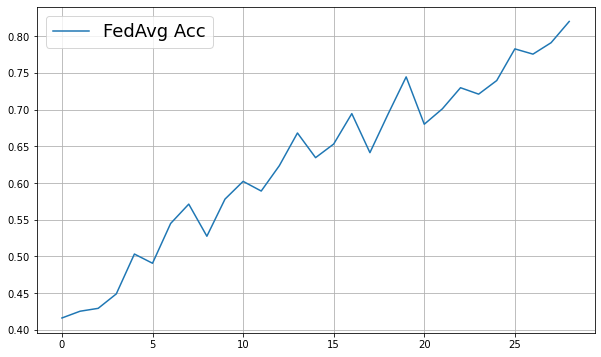

In [9]:
std_lst, average_acc_list = [], []


for i in range(30):
    sum, tmp = 0, []
    for j in range(20):
        sum = np.mean(globals()['acc{}'.format(j)][i]) + sum
        tmp.append(np.std(globals()['acc{}'.format(j)][i]))

    average_acc_list.append(sum/20)  
    std_lst.append(np.mean(tmp))

plt.figure(figsize=(10,6))
plt.plot(average_acc_list[1:], label='FedAvg Acc')

plt.grid(True)
plt.legend(fontsize=18)
plt.show()

In [10]:
np.mean(std_lst[1:])

0.17898963183900526

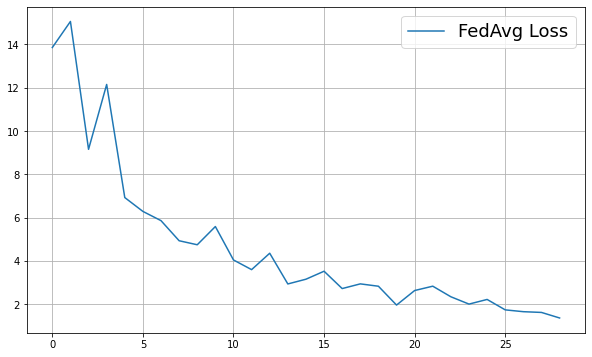

In [14]:
average_loss_list = []
std_lst_loss = []


for i in range(30):
    sum, tmp = 0, []
    for j in range(20):
        sum = np.mean(globals()['loss{}'.format(j)][i]) + sum
        tmp.append(np.std(globals()['loss{}'.format(j)][i]))

    average_loss_list.append(sum/20)
    std_lst_loss.append(np.mean(tmp))

plt.figure(figsize=(10,6))
plt.plot(average_loss_list[1:], label='FedAvg Loss')

plt.grid(True)
plt.legend(fontsize=18)
plt.show()

In [15]:
np.mean(std_lst_loss[1:])

5.672897070872368

In [6]:
for i in range(20):
    for j in range(30):
        if globals()['acc{}'.format(i)][-1][j] < 0.5:
            print(globals()['acc{}'.format(i)][-1][j])

0.38510000705718994
0.3813999891281128
0.4260999858379364
0.3325999975204468
0.34360000491142273
0.37459999322891235
0.48669999837875366
0.2915000021457672
0.21070000529289246
0.296999990940094
0.36579999327659607
0.48570001125335693
0.4650999903678894
0.3684999942779541


In [7]:
np.array(average_acc_list)

array([0.39499933, 0.4162465 , 0.42543133, 0.42935383, 0.449018  ,
       0.50330017, 0.490738  , 0.54492383, 0.57124767, 0.52754367,
       0.57805017, 0.60223633, 0.58906483, 0.6236015 , 0.668078  ,
       0.63450033, 0.65305467, 0.694452  , 0.64133033, 0.69374017,
       0.74444283, 0.68000767, 0.7010285 , 0.72971633, 0.720973  ,
       0.73949583, 0.78259383, 0.7754525 , 0.79100367, 0.819917  ])

In [8]:
np.array(average_loss_list)

array([38.62216063, 13.85963915, 15.06456663,  9.15530807, 12.15348279,
        6.92631247,  6.28619016,  5.85887551,  4.93037054,  4.74458901,
        5.58668356,  4.04190112,  3.59529786,  4.35310968,  2.93351395,
        3.15269571,  3.52117411,  2.72014331,  2.93687705,  2.82818754,
        1.95759787,  2.62980182,  2.83011801,  2.34079705,  2.00264682,
        2.21735499,  1.73569132,  1.65153669,  1.61719991,  1.36103327])

In [20]:
np.array(std_lst)

array([0.17657851, 0.1821557 , 0.20178058, 0.2043886 , 0.21563303,
       0.20682957, 0.22108719, 0.20304472, 0.1937129 , 0.22538907,
       0.20485402, 0.18392288, 0.2133674 , 0.18122129, 0.15876781,
       0.19774383, 0.17941505, 0.16368358, 0.20268835, 0.16931498,
       0.13263647, 0.20580017, 0.16815744, 0.15878699, 0.17325226,
       0.15407577, 0.12325173, 0.14256614, 0.12154998, 0.1016218 ])